# ACD MIP Gains and Pedestal Calibrations - Version 2

### Robert Cameron
### June 2020

In [23]:
#import numpy as np
import pandas as pd
#import datetime as dt
import time
import matplotlib.pyplot as plt
#from matplotlib.dates import (MONTHLY, YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
%matplotlib notebook
plt.rc('font', size = 16)

In [29]:






dir = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/ACD/"
dpedfile = dir+"sytpeds.dat"
dgainfile = dir+"sytgains.dat"

dp = pd.read_table(dpedfile, parse_dates=[0], delimiter=" ", index_col=[0,1])
dg = pd.read_table(dgainfile, parse_dates=[0], delimiter=" ", index_col=[0,1])
dp, dg

(                 Triggers  ValueA  WidthA  ValueB  WidthB
 Time       Tile                                          
 2008-06-26 0         7038  -3.173  -0.349   1.157  -0.548
            1         7038  -5.964  -0.731  -2.458  -0.251
            2         7038   0.183  -0.271  -0.364  -0.510
            3         7038  -2.666  -1.031   1.273  -1.419
            4         7038  -2.956   0.640  -3.851  -0.180
            10        7038   2.120  -1.008  -1.964  -0.396
            11        7038  -0.735  -0.934  -3.049  -1.325
            12        7038   1.343  -0.746   0.702  -0.676
            13        7038  -3.107   0.821  -2.378   0.298
            14        7038  -1.419   0.709  -0.270  -0.169
            20        7038   1.365   0.185  -1.229   0.043
            21        7038   3.148  -0.603   1.143  -0.995
            22        7038  -0.464   0.002  -2.872  -0.262
            23        7038  -3.037   0.156   2.893  -0.082
            24        7038   0.128  -0.818   0.731   0.2

In [38]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30846 entries, (2008-06-26 00:00:00, 0) to (2020-03-29 00:00:00, 603)
Data columns (total 5 columns):
Triggers    30846 non-null int64
ValueA      30846 non-null float64
WidthA      30846 non-null float64
ValueB      30846 non-null float64
WidthB      30846 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.3 MB


In [42]:
times = dp.index.get_level_values('Time')
times

DatetimeIndex(['2008-06-26', '2008-06-26', '2008-06-26', '2008-06-26',
               '2008-06-26', '2008-06-26', '2008-06-26', '2008-06-26',
               '2008-06-26', '2008-06-26',
               ...
               '2020-03-29', '2020-03-29', '2020-03-29', '2020-03-29',
               '2020-03-29', '2020-03-29', '2020-03-29', '2020-03-29',
               '2020-03-29', '2020-03-29'],
              dtype='datetime64[ns]', name='Time', length=30846, freq=None)

In [25]:
def ACDmainplot(var,param,title,mylim,ylab):
    times = var.index.get_level_values('Time')
    pa = param+"A"
    pb = param+"B"
    va = var[pa]
    vb = var[pb]
    f,ax = plt.subplots(1, 1, figsize=(20,12))
    plt.setp(ax, ylim=mylim)
    plt.plot(times,va,'.',color='b')
    plt.plot(times,vb,'.',color='b')
    plt.title(title)
    plt.ylabel(ylab)
    plt.tick_params(which='both', length=10, width=1, direction='in',top=True,right=True)
    plt.grid(True)
    plt.savefig(dir+title+".png")
#    time.sleep(1)
    plt.close()

<IPython.core.display.Javascript object>


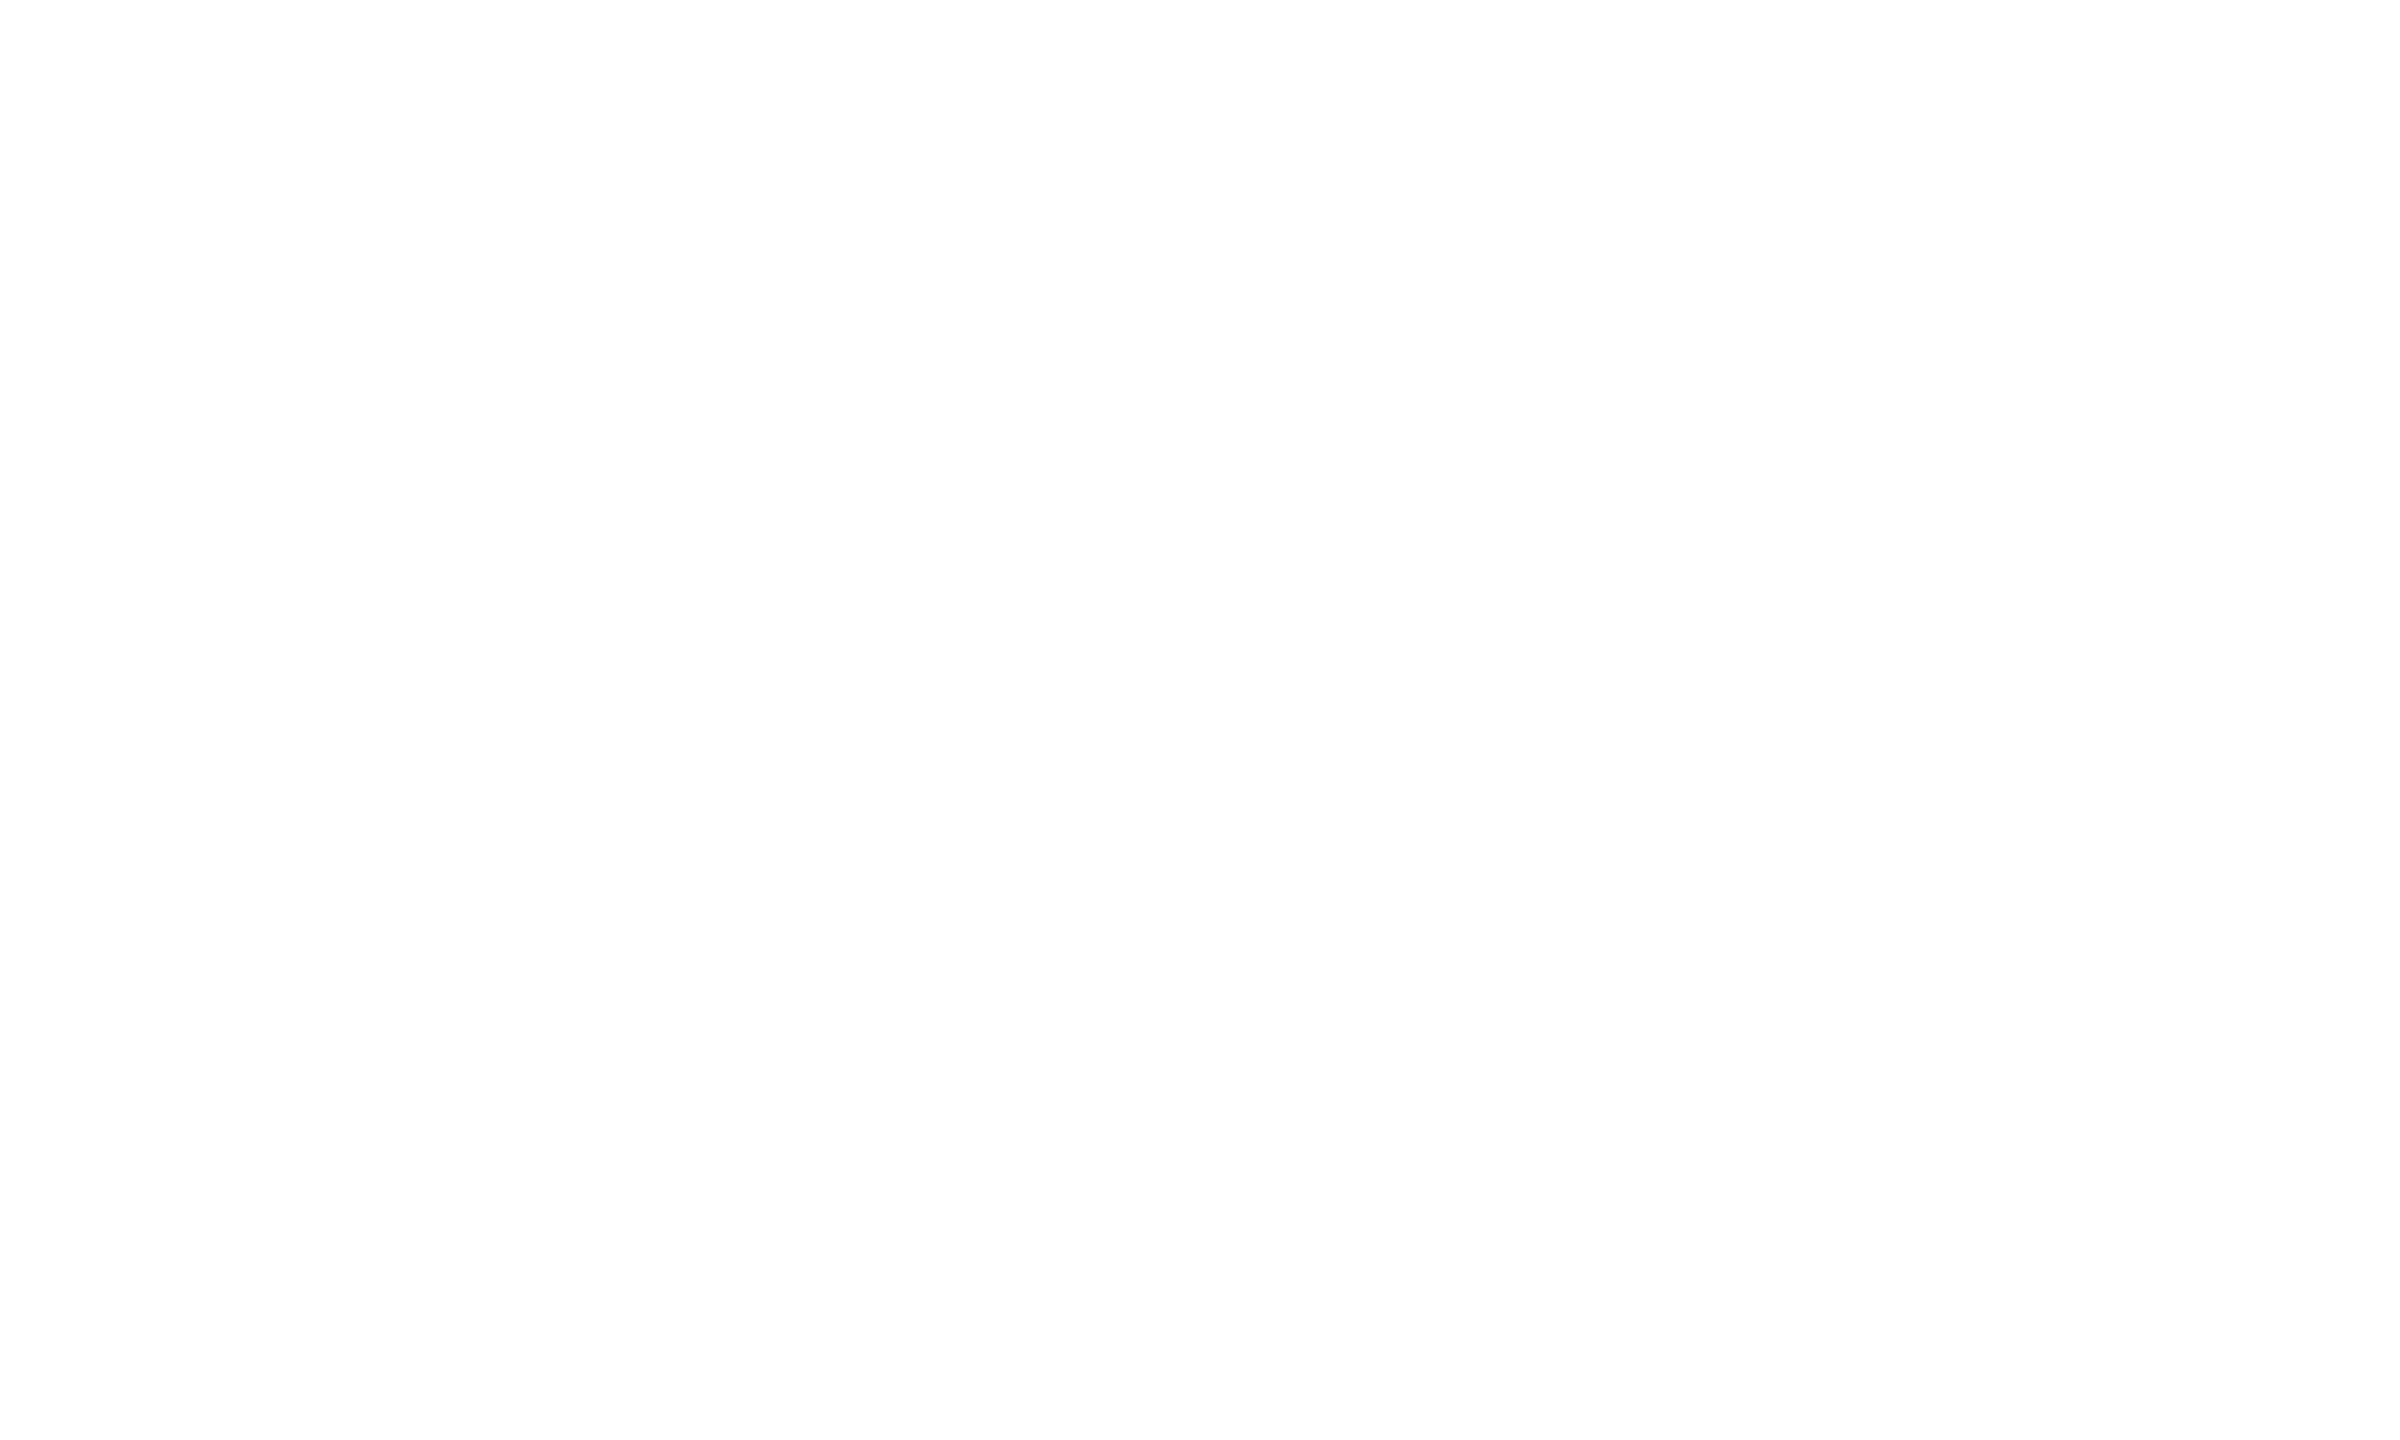

<IPython.core.display.Javascript object>


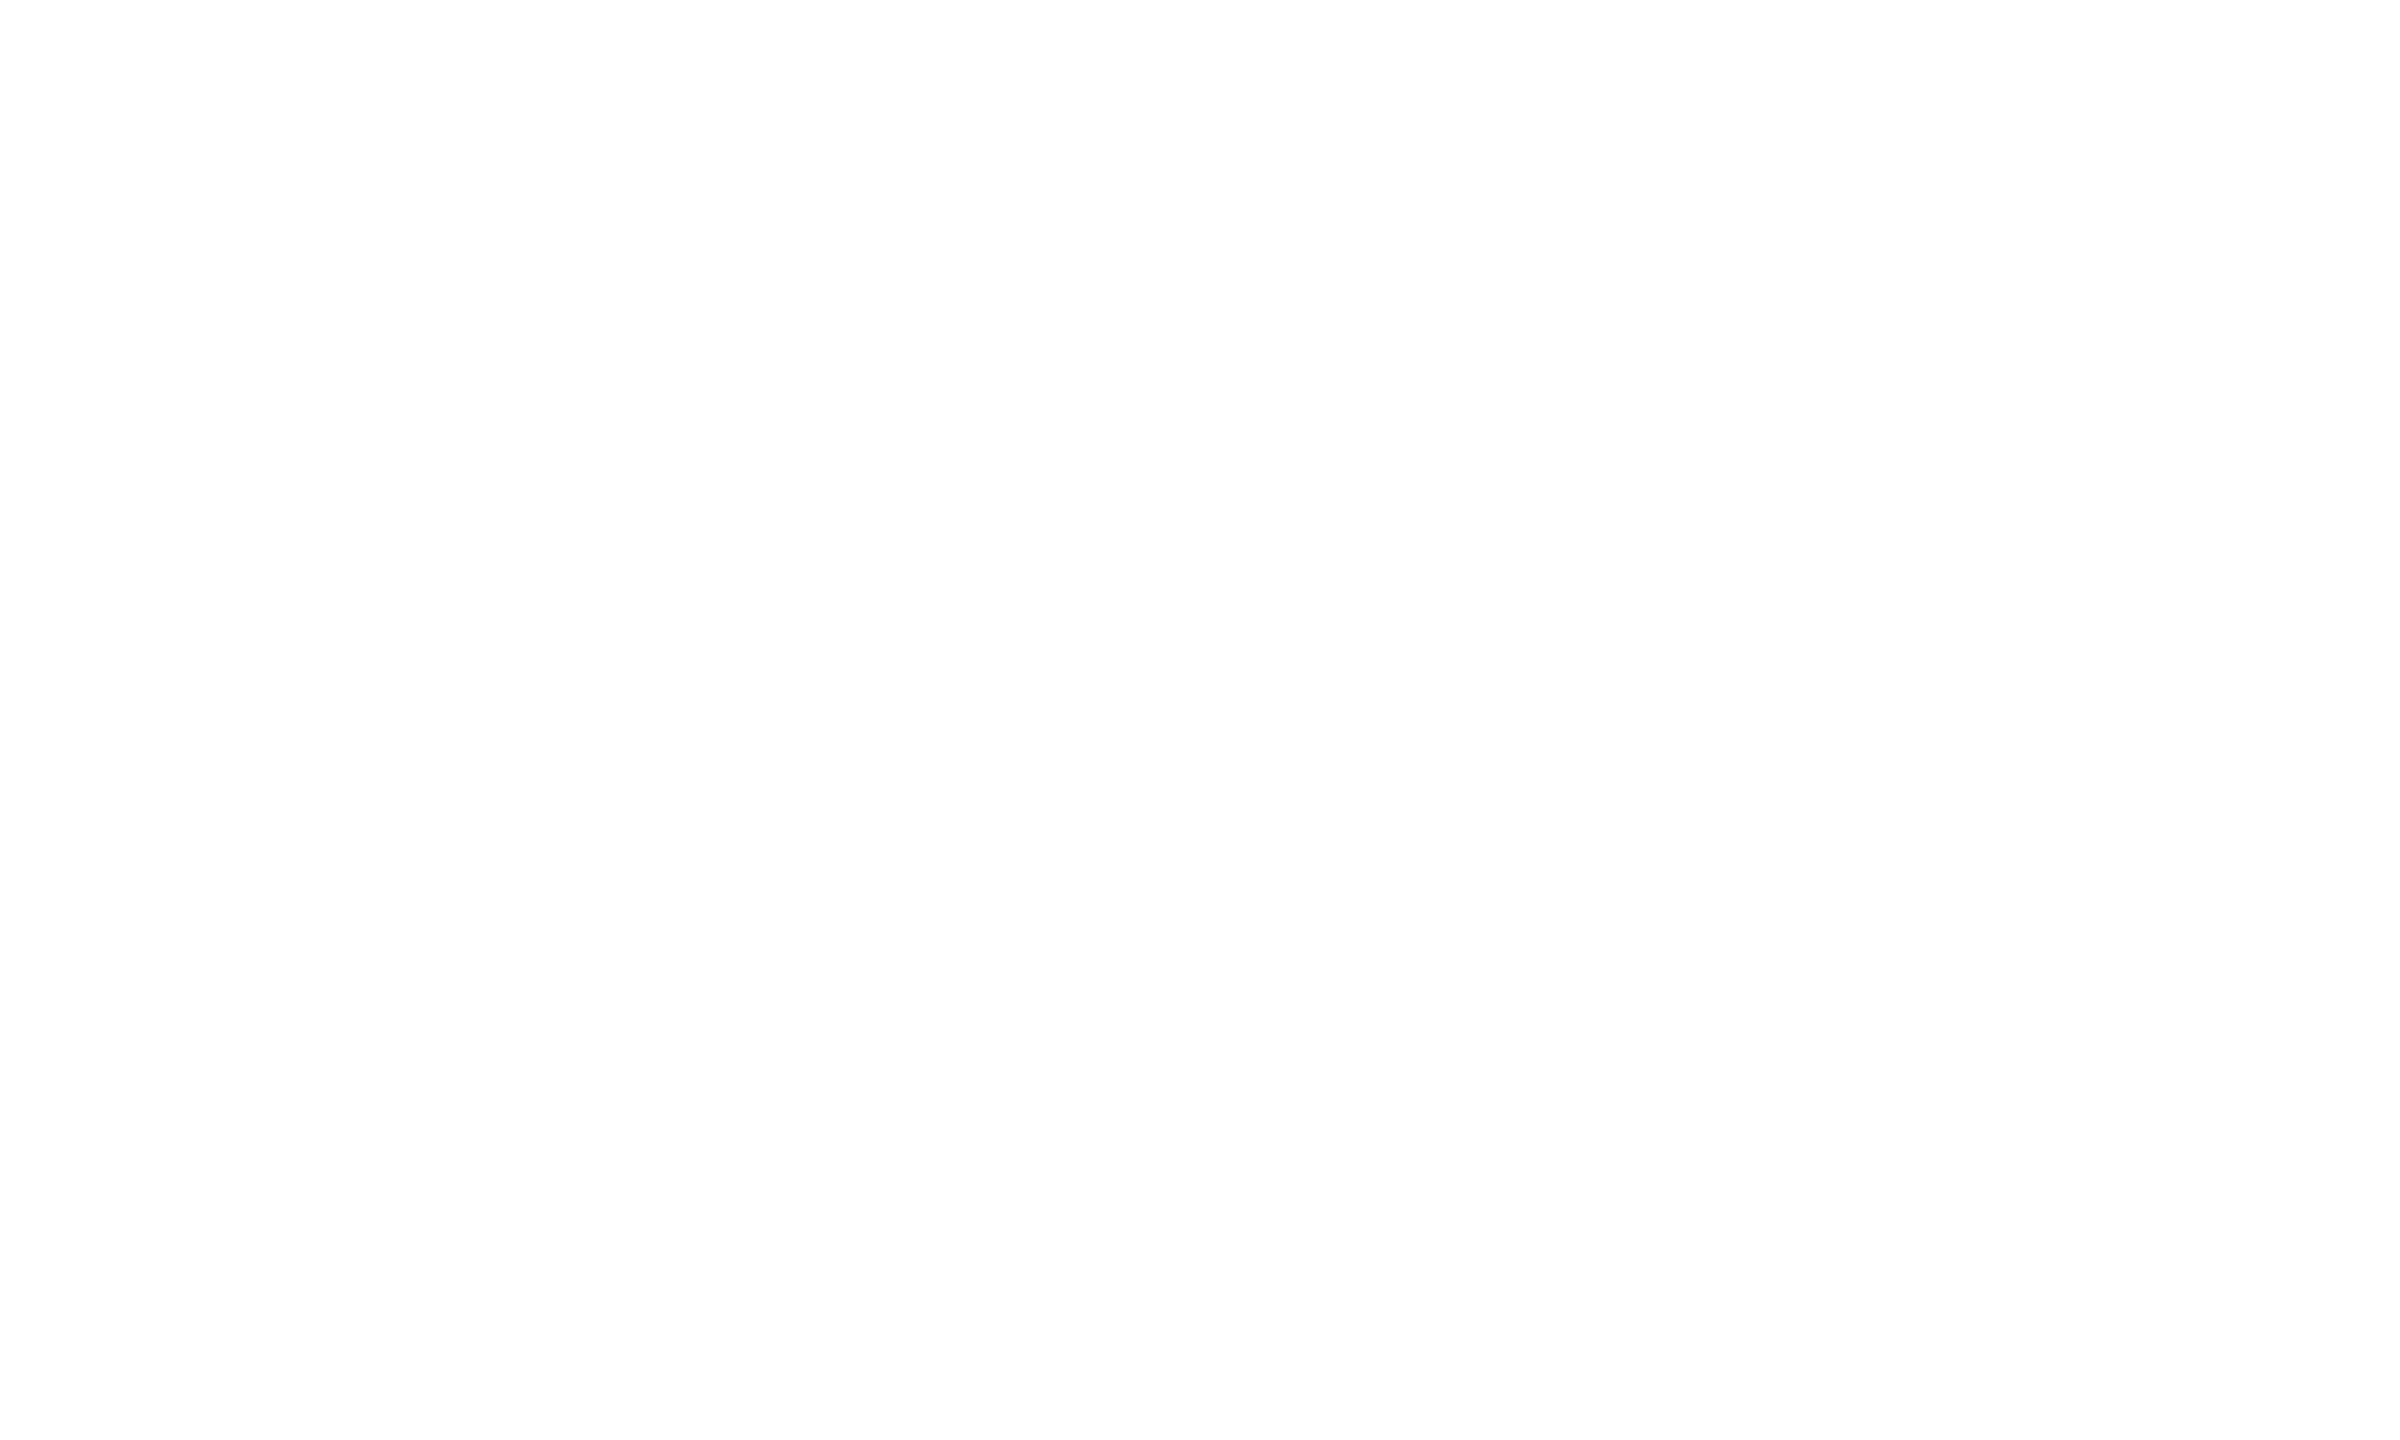

<IPython.core.display.Javascript object>


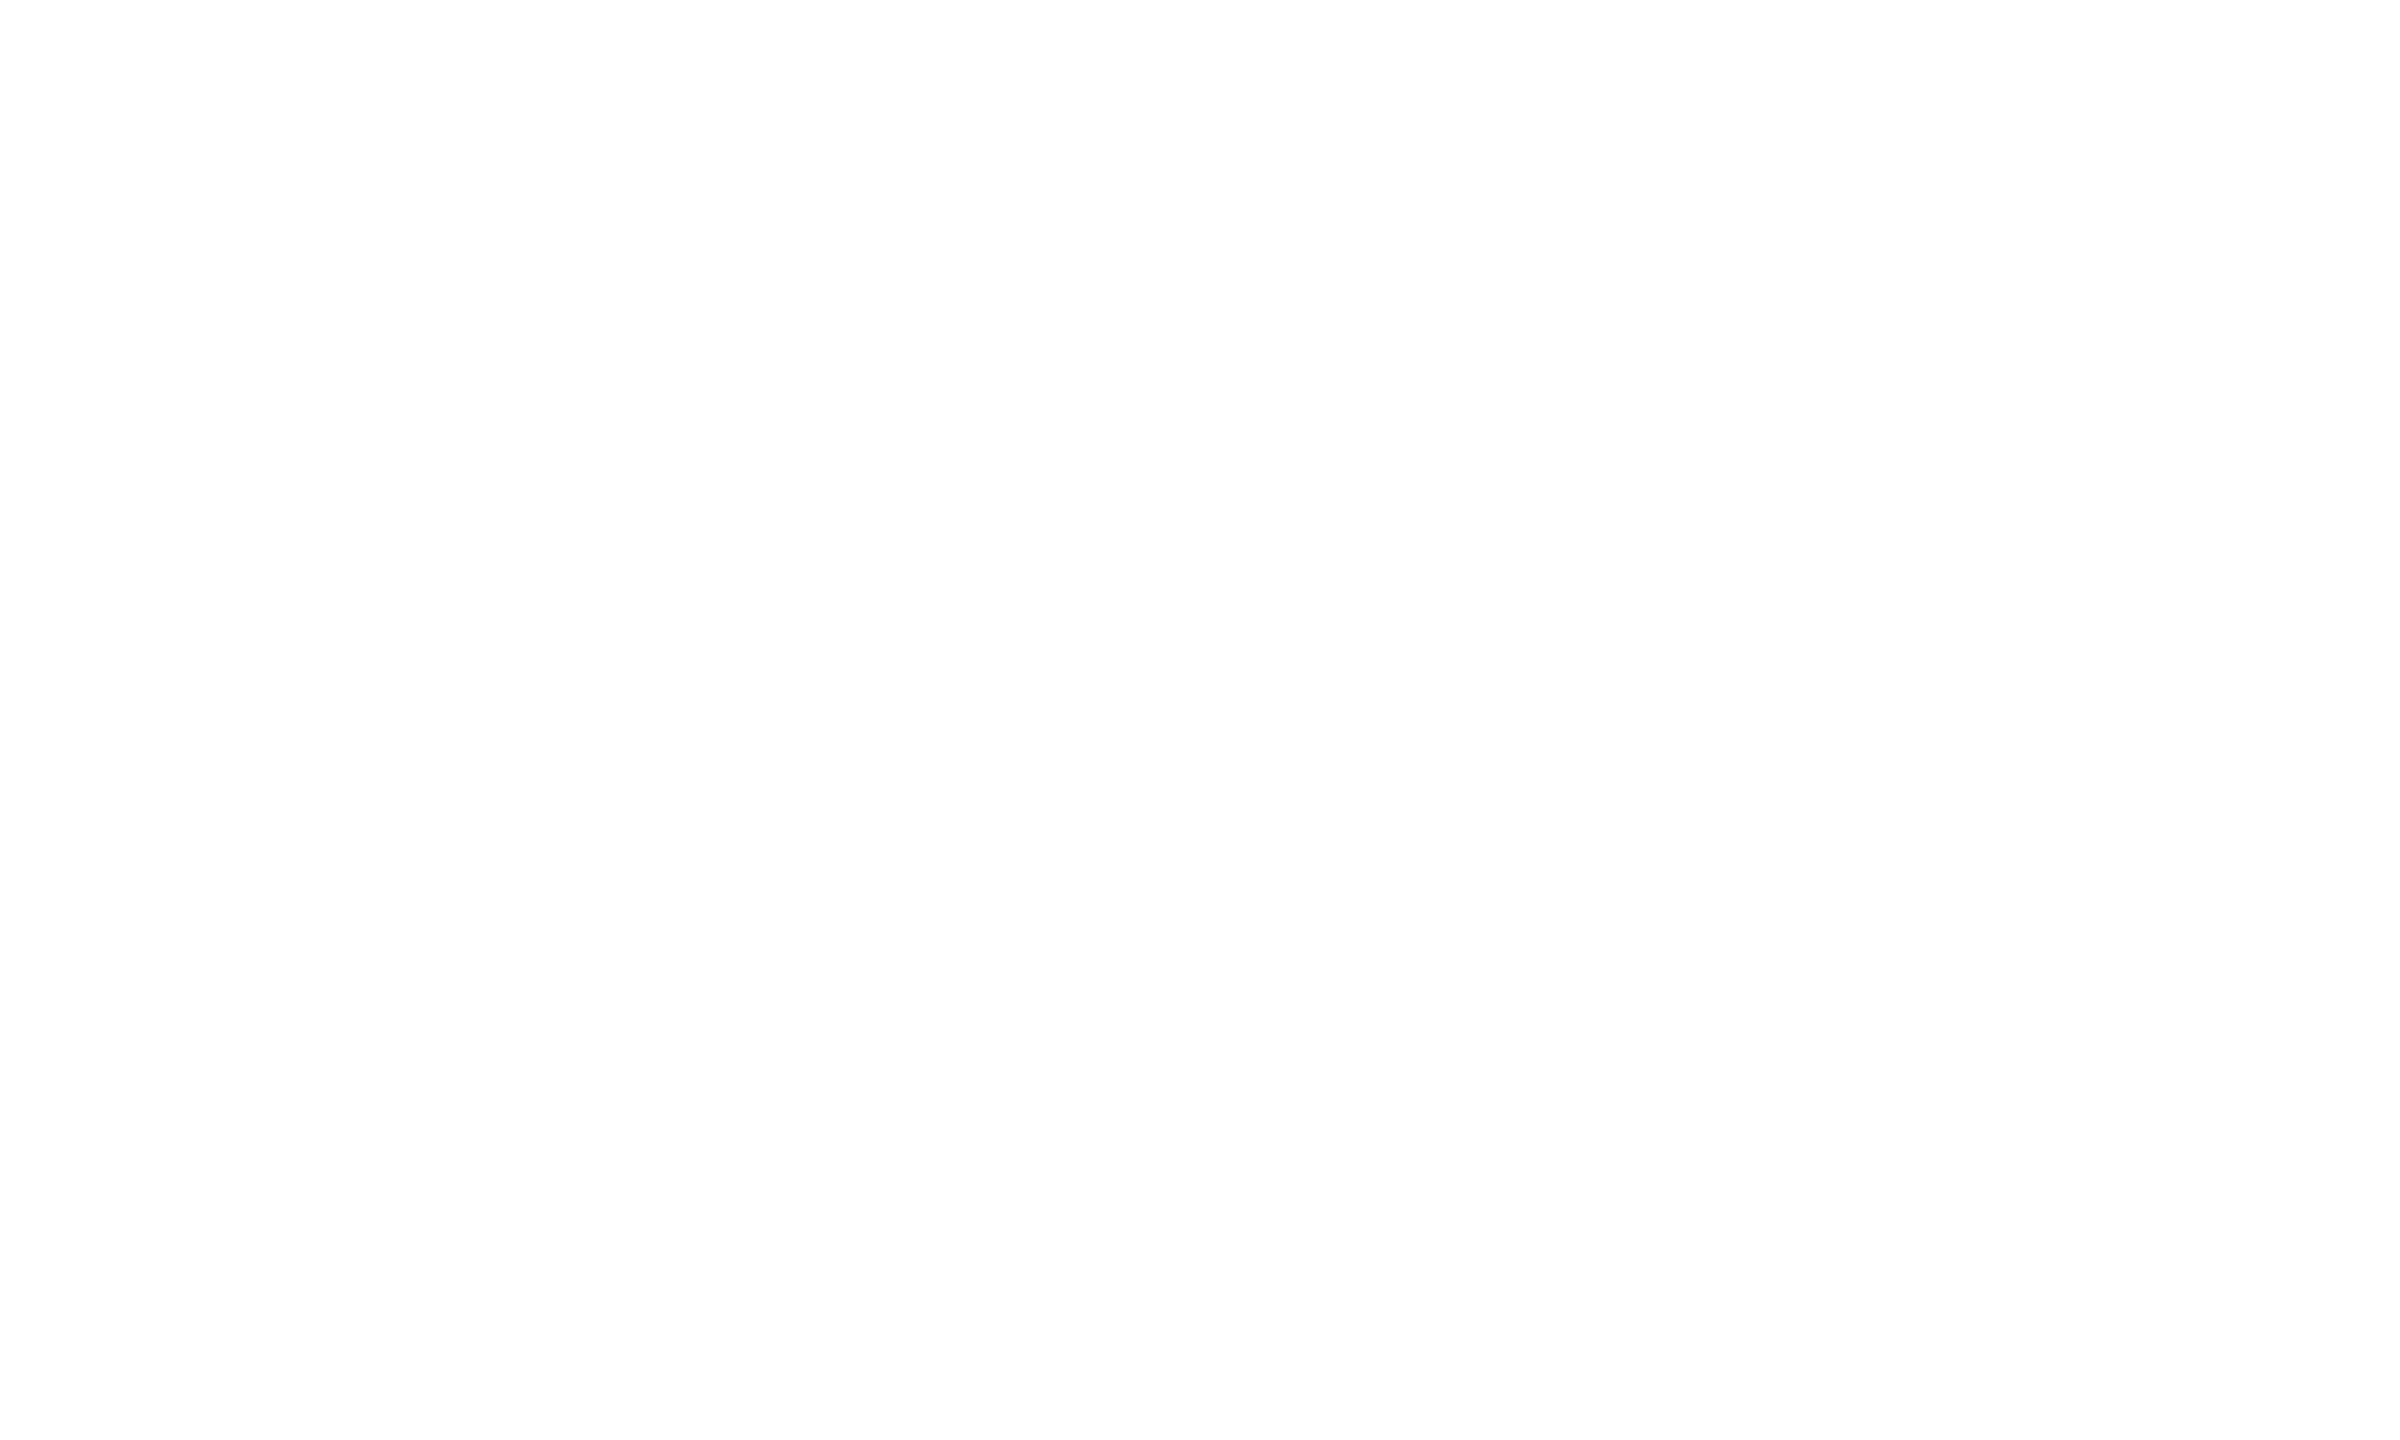

<IPython.core.display.Javascript object>


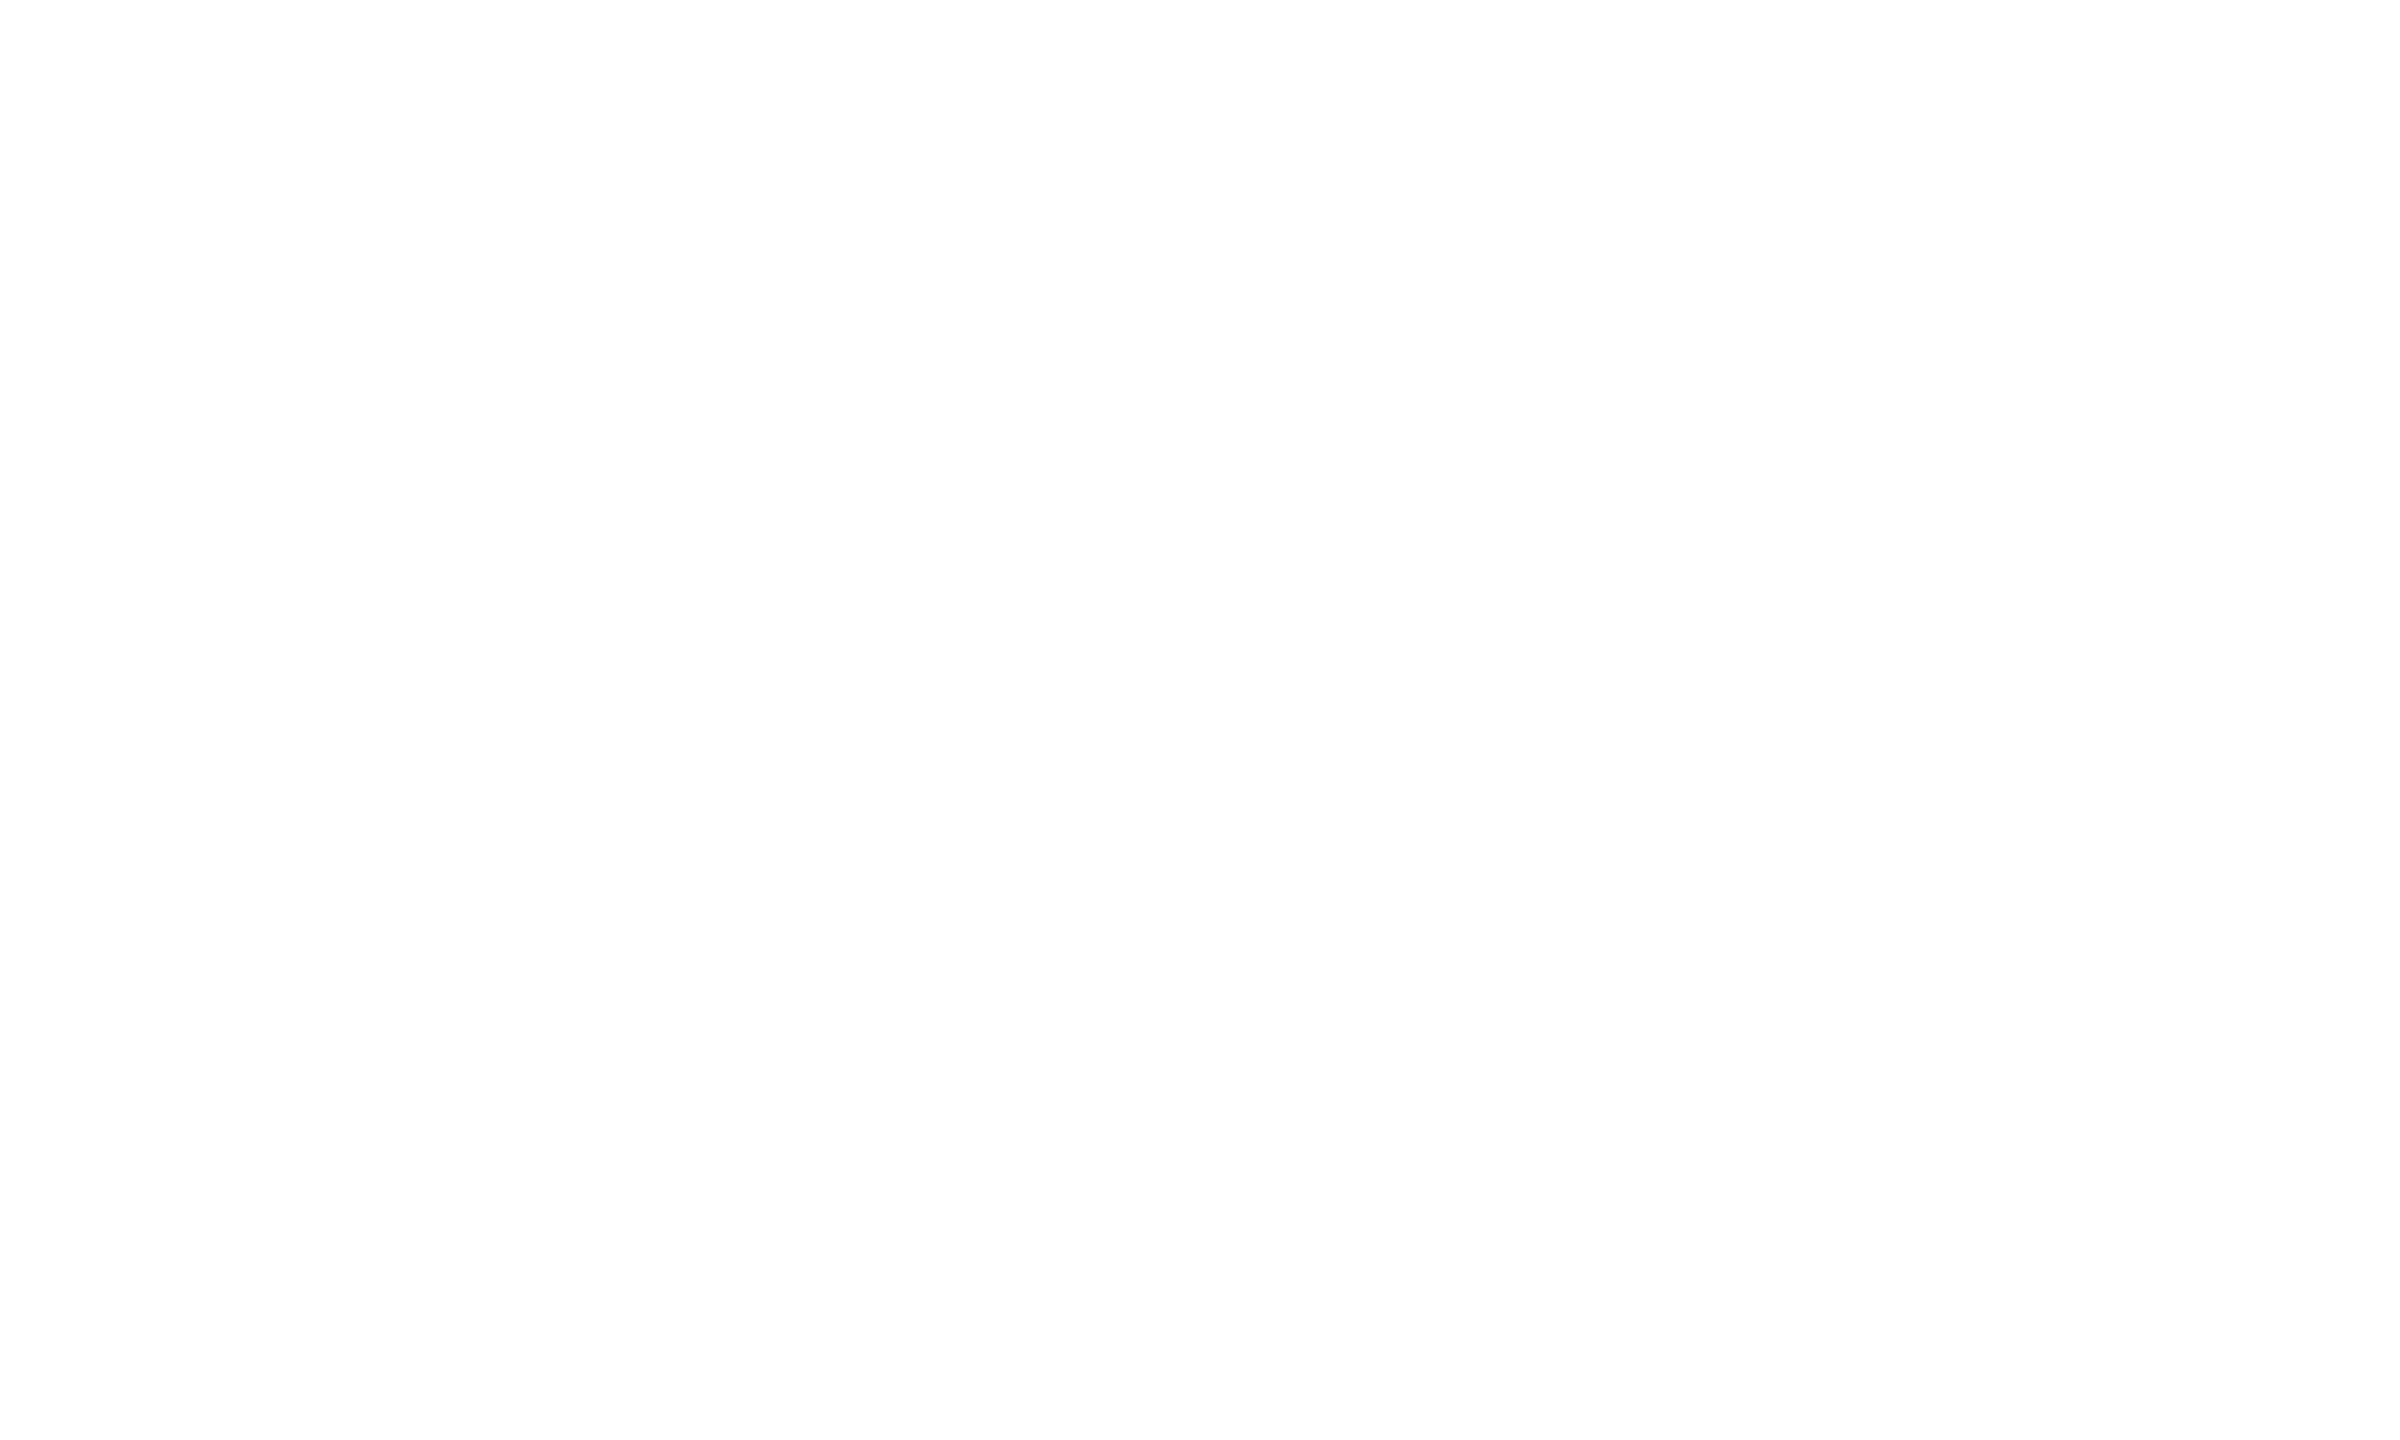

In [26]:
# Main plots of Gain and Pedestal
mylim = (-250,250); 
par='Value';title="Trend_of_ACD_MIP_Peak";ylab="Change in PHA MIP Fit Peak (ADU)";ACDmainplot(dg,par,title,mylim,ylab)
par='Width';title="Trend_of_ACD_MIP_Width";ylab="Change in PHA MIP Fit Width (ADU)";ACDmainplot(dg,par,title,mylim,ylab)
mylim = (-20,20); 
par='Value';title="Trend_of_ACD_Pedestal_Mean";ylab="Change in Pedestal Mean (ADU)";ACDmainplot(dp,par,title,mylim,ylab)
par='Width';title="Trend_of_ACD_Pedestal_Width";ylab="Change in Pedestal Width (ADU)";ACDmainplot(dp,par,title,mylim,ylab)

In [15]:
def ACDplot(var,tn,param,title,mylim):
    nx = len(tn)
    ny = len(tn[0])
    pltsizex = 25
    pltsizey = 3*ny
    f,ax = plt.subplots(nx, ny, figsize=(pltsizex,pltsizey), sharex=True, sharey=True)
    f.suptitle(title, fontsize=30, fontweight='bold',y = 0.95)
    plt.setp(ax, ylim=mylim)
    plt.rcParams.update({'font.size': 12})
    plt.tight_layout()

    for i in range(nx):
        for j in range(ny):
            ax[i,j].plot(var.xs(tn[i][j], level='Tile')[param],'.',color='b',markersize=14,label=tn[i][j])
            ax[i,j].legend(loc="upper right",fontsize=16)
            ax[i,j].tick_params(which='both', length=10, width=1, direction='in',top=True,right=True)
            
    plt.savefig(dir+title+".png")
#    time.sleep(1)
    plt.close()

In [16]:
# Collect tiles by ACD geometry
tpz = [[40,41,42,43,44],
      [30,31,32,33,34],
      [20,21,22,23,24],
      [10,11,12,13,14],
      [0,1,2,3,4]]
tnx = [[104,103,102,101,100],
      [114,113,112,111,110],
      [124,123,122,121,120],
      [130,130,130,130,130]]
tny = [[200,201,202,203,204],
      [210,211,212,213,214],
      [220,221,222,223,224],
      [230,230,230,230,230]]
tpx = [[300,301,302,303,304],
      [310,311,312,313,314],
      [320,321,322,323,324],
      [330,330,330,330,330]]
tpy = [[404,403,402,401,400],
      [414,413,412,411,410],
      [424,423,422,421,420],
      [430,430,430,430,430]]
trib = [[500,501,502,503],
       [600,601,602,603]]
# Collect Tiles and Ribbons by FREE board
f1la = [[120,502,121,111],
       [101,122,112,102],
       [103,113,123,503],
       [104,114,124,130]]
f2ra = [[222,602,212,202],
       [12,13,3,203],
       [213,223,14,4],
       [204,214,224,230]]
f2la = [[110,100,220,210],
       [600,600,600,600],
        [200,0,10,20],
       [221,211,201,1],
       [11,21,22,2]]
f3la = [[324,501,323,313],
       [303,322,312,302],
       [301,311,321,500],
       [300,310,320,330]]
f4la = [[314,304,424,603],
       [414,404,44,34],
       [24,423,413,403],
       [43,33,23,42]]
f4ra = [[422,601,412,402],
       [32,31,41,401],
       [411,421,30,40],
       [400,410,420,430]]
f1rb = [[130,120,110,100],
       [500,121,111,101],
       [102,112,122,103],
       [113,123,501,124]]
f2rb = [[310,300,224,214],
       [603,603,603,603],
       [204,4,14,223,],
       [213,203,3,13],
       [12,202,212,222]]
f2lb = [[2,601,22,21],
       [11,1,201,211],
       [221,20,10,0],
       [200,210,220,230]]
f3rb = [[330,324,314,304],
       [503,323,313,303],
       [302,312,322,301],
       [311,321,502,320]]
f4lb = [[42,602,602,23],
       [33,43,403,413],
       [423,24,34,44],
       [404,414,424,430]]
f4rb = [[114,104,420,410],
       [600,600,600,600],
       [400,40,30,421],
       [411,401,41,31],
       [32,402,412,422]]

In [17]:
def doplots(dat,param,title2,mylim):
# ACD Geometry plots
    tn=tpz; title = 'ACD_posZ_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=tnx; title = 'ACD_negX_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=tny; title = 'ACD_negY_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=tpx; title = 'ACD_posX_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=tpy; title = 'ACD_posY_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=trib; title = 'ACD_Ribbons_'+title2; ACDplot(dat,tn,param,title,mylim)
# FREE board plots
    tn=f1la; title = 'FREE_1LA_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f2ra; title = 'FREE_2RA_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f2la; title = 'FREE_2LA_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f3la; title = 'FREE_3LA_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f4la; title = 'FREE_4LA_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f4ra; title = 'FREE_4RA_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f1rb; title = 'FREE_1RB_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f2rb; title = 'FREE_2RB_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f2lb; title = 'FREE_2LB_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f3rb; title = 'FREE_3RB_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f4lb; title = 'FREE_4LB_'+title2; ACDplot(dat,tn,param,title,mylim)
    tn=f4rb; title = 'FREE_4RB_'+title2; ACDplot(dat,tn,param,title,mylim)

<IPython.core.display.Javascript object>


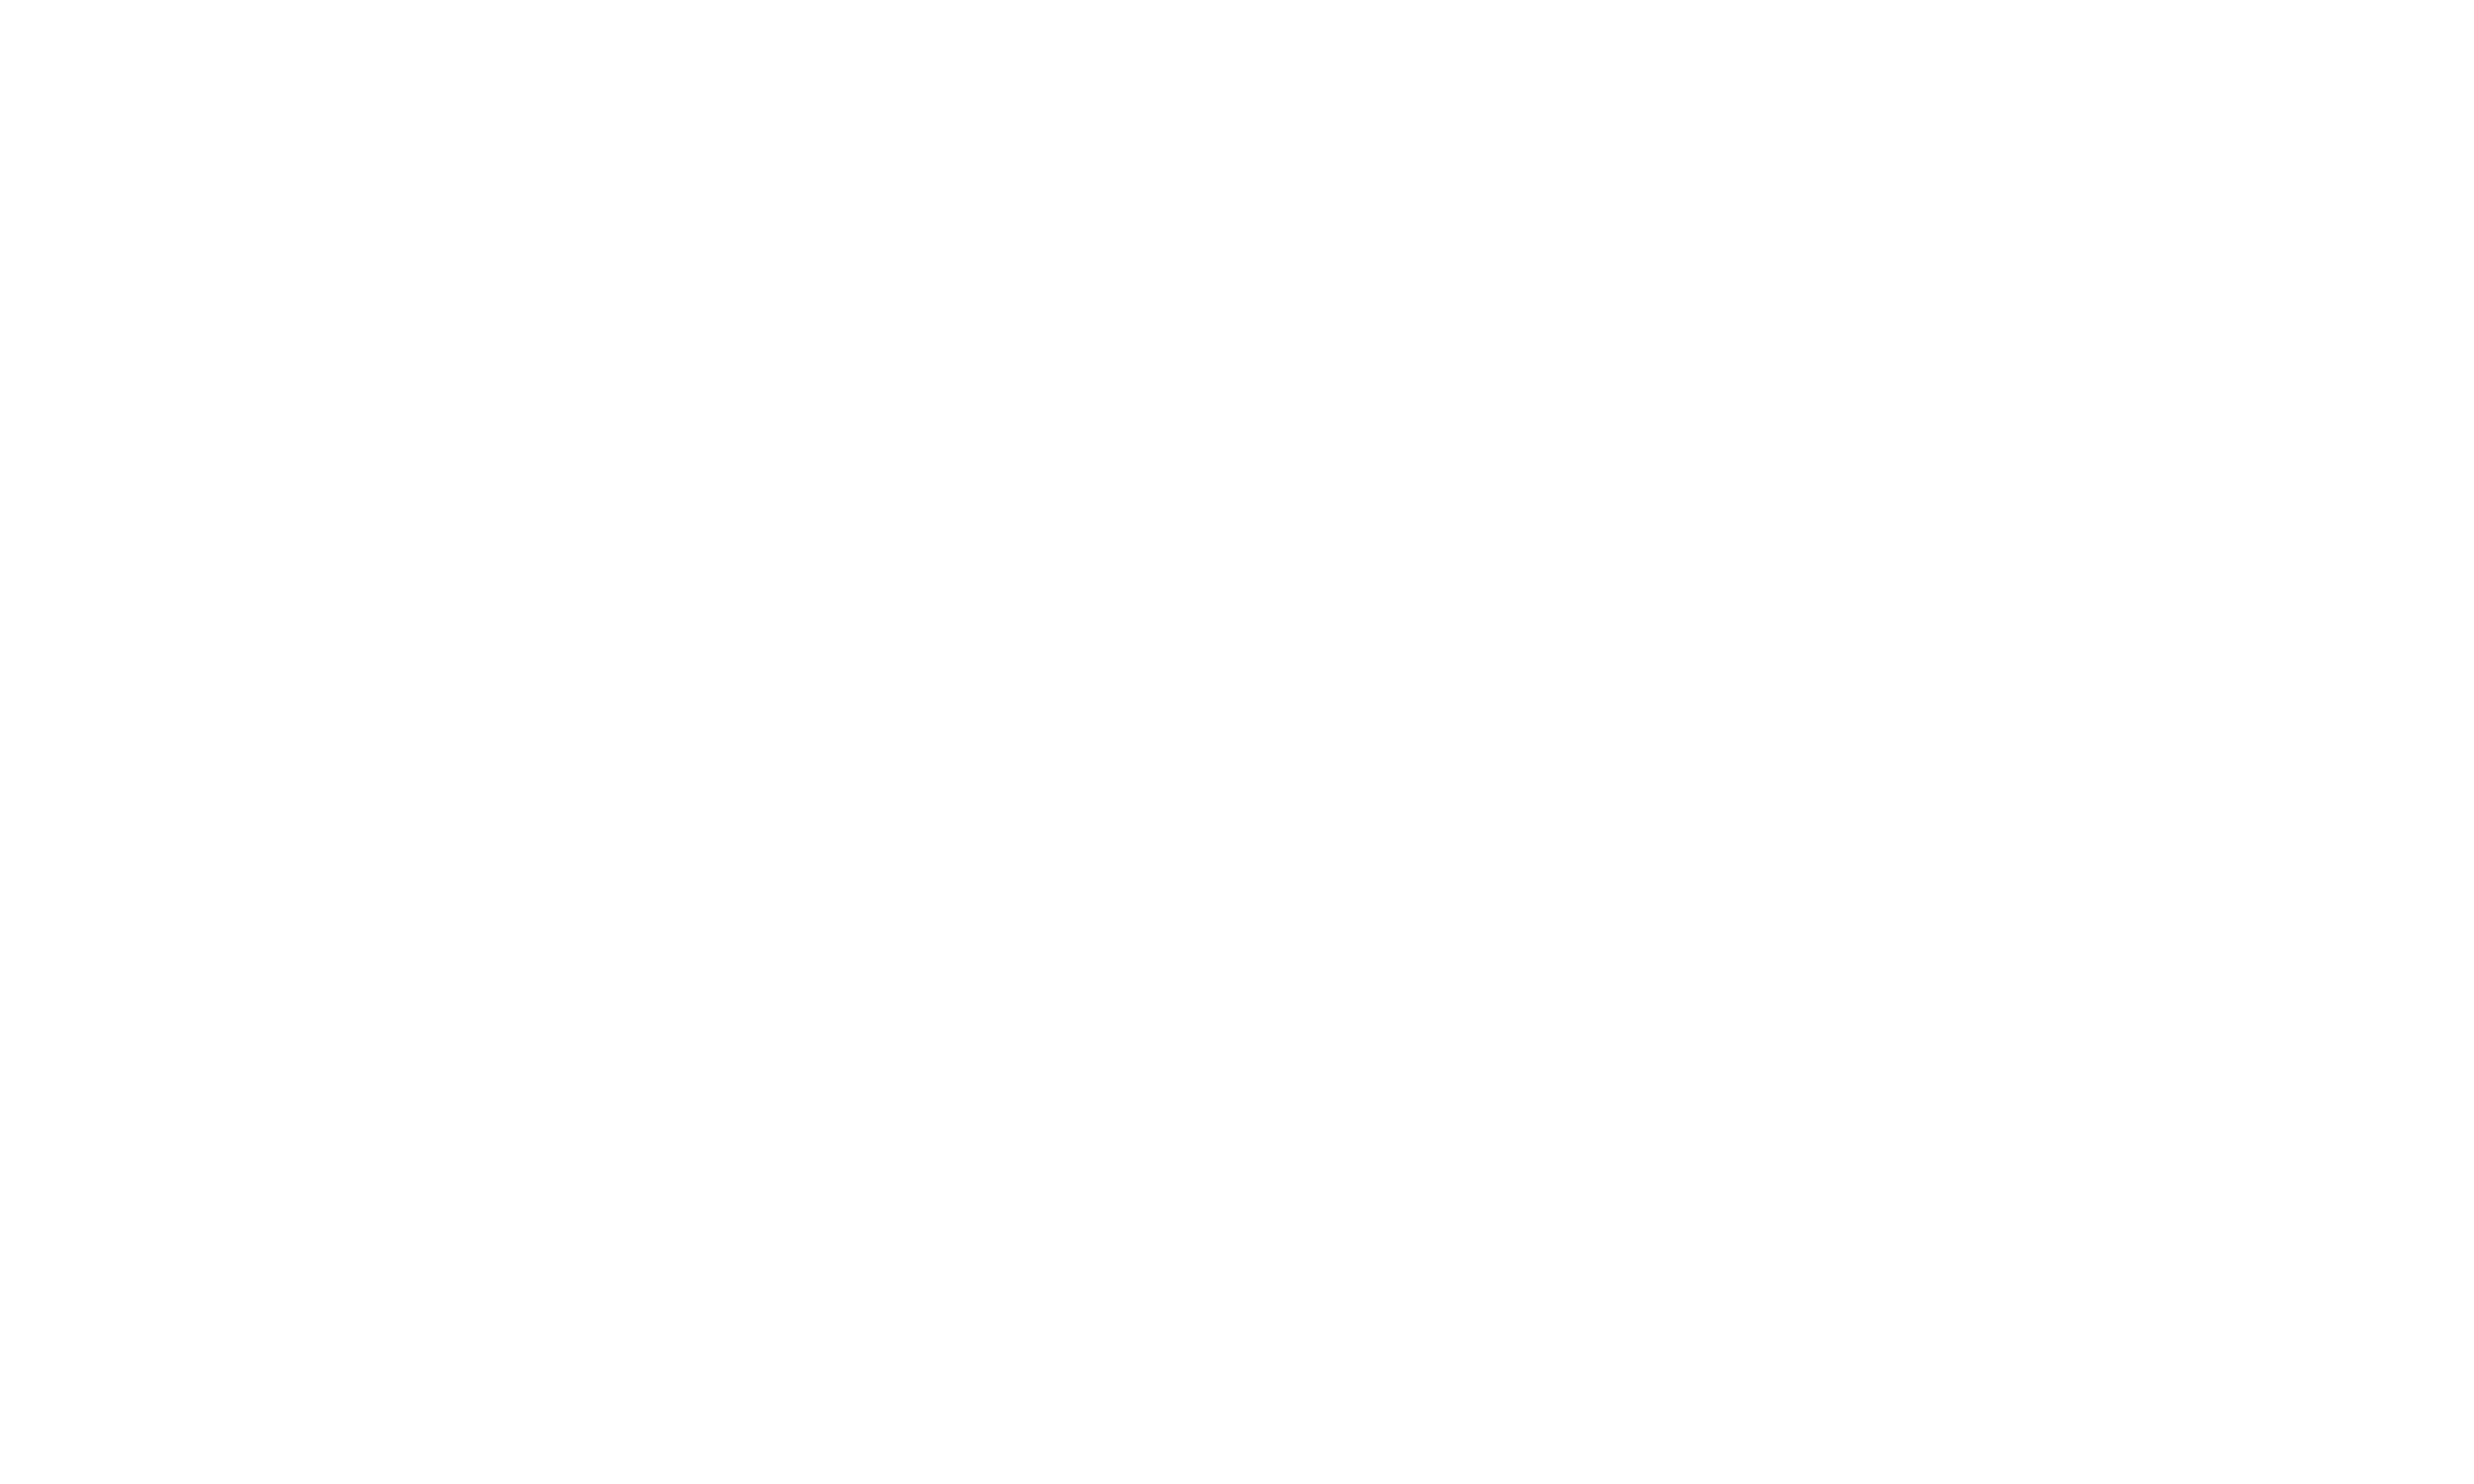

<IPython.core.display.Javascript object>


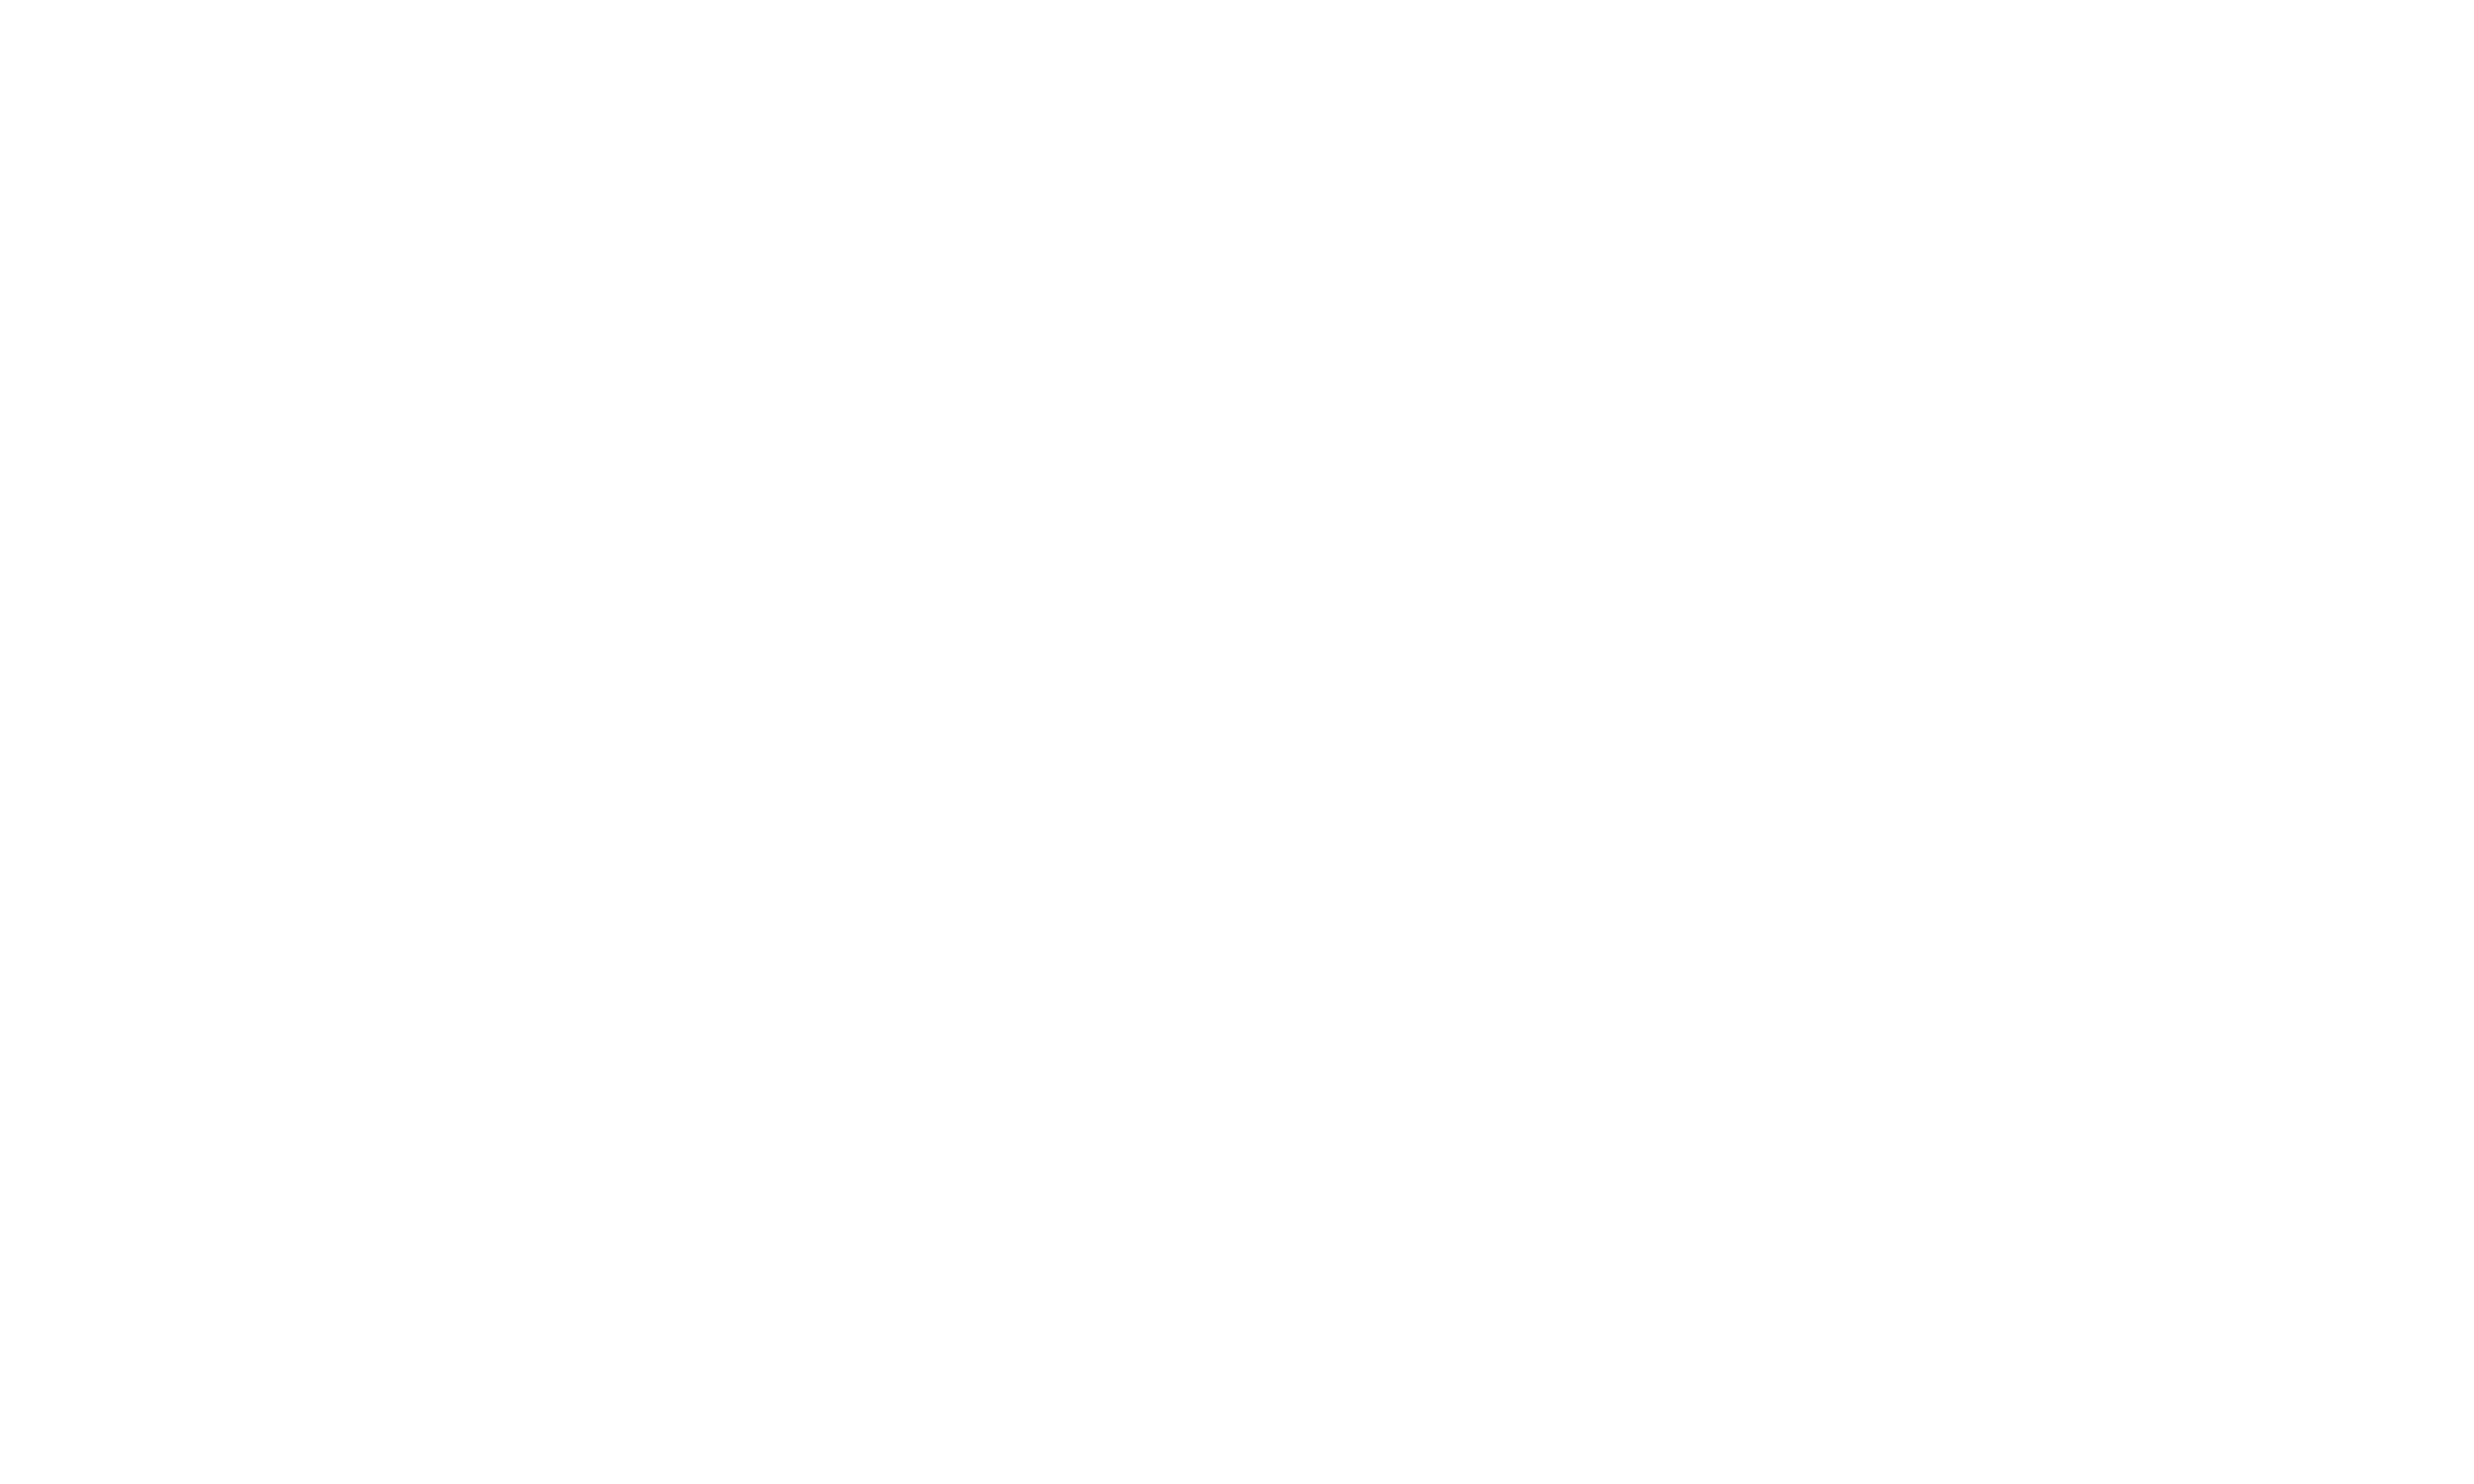

<IPython.core.display.Javascript object>


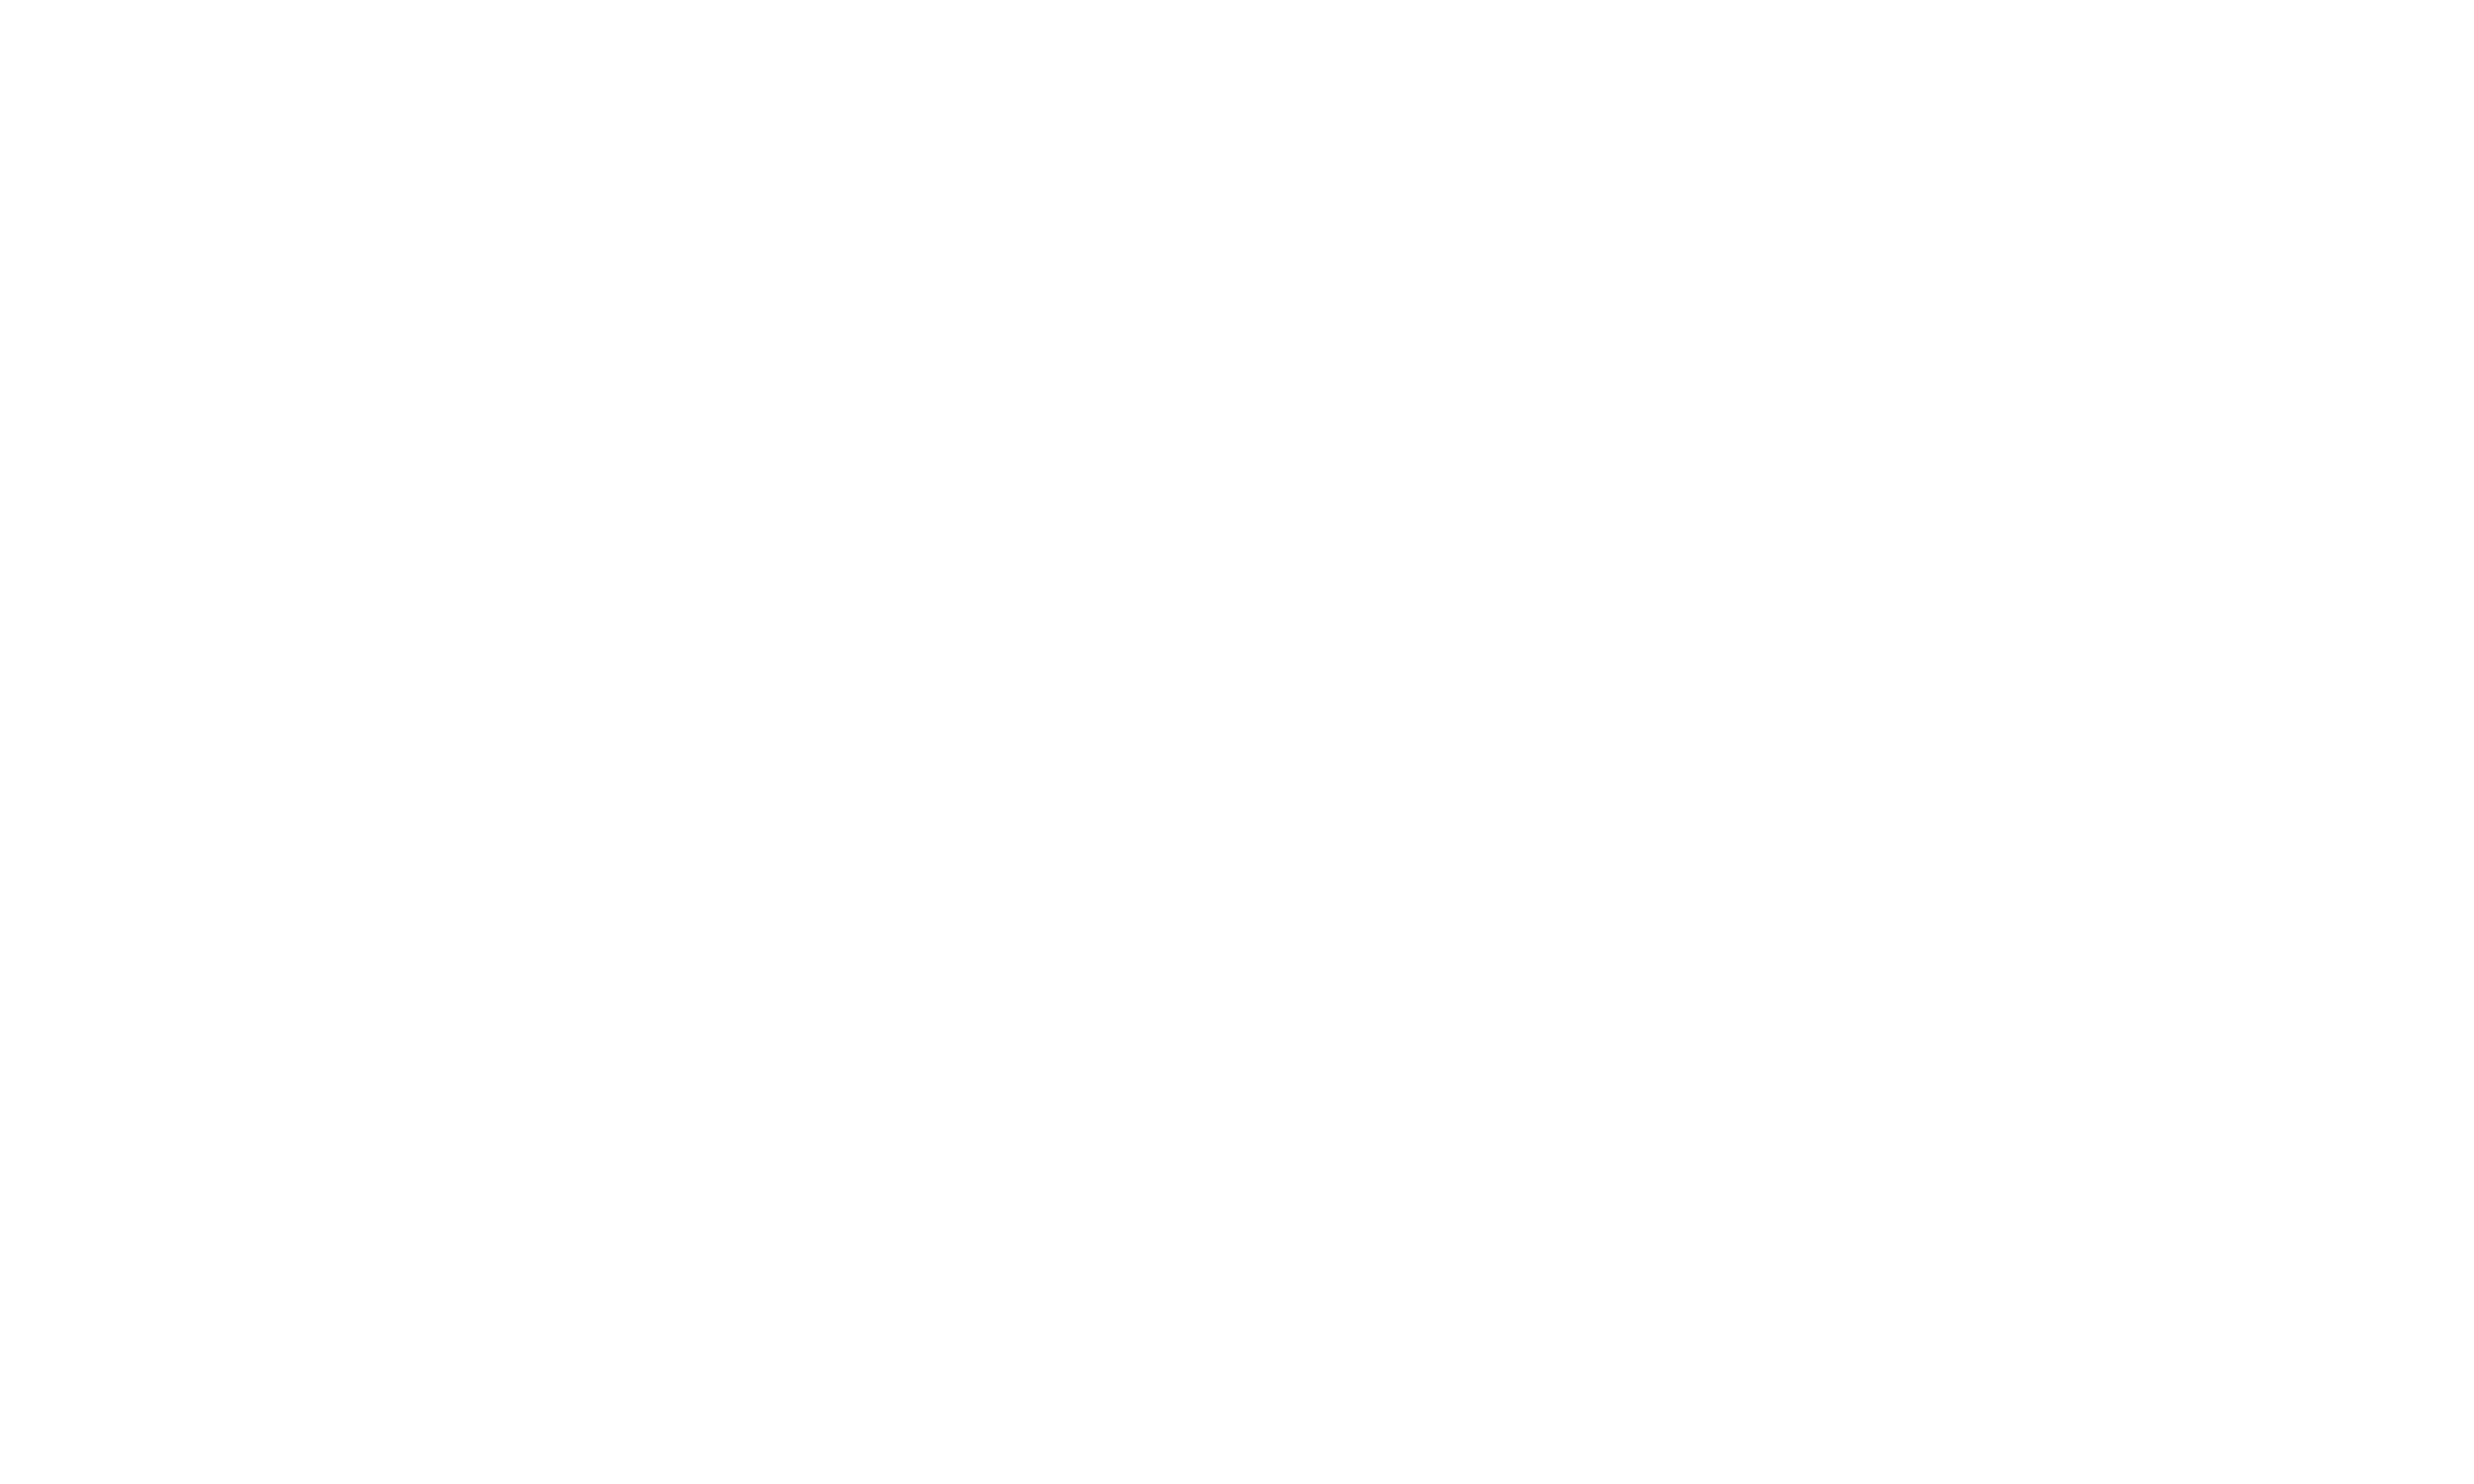

<IPython.core.display.Javascript object>


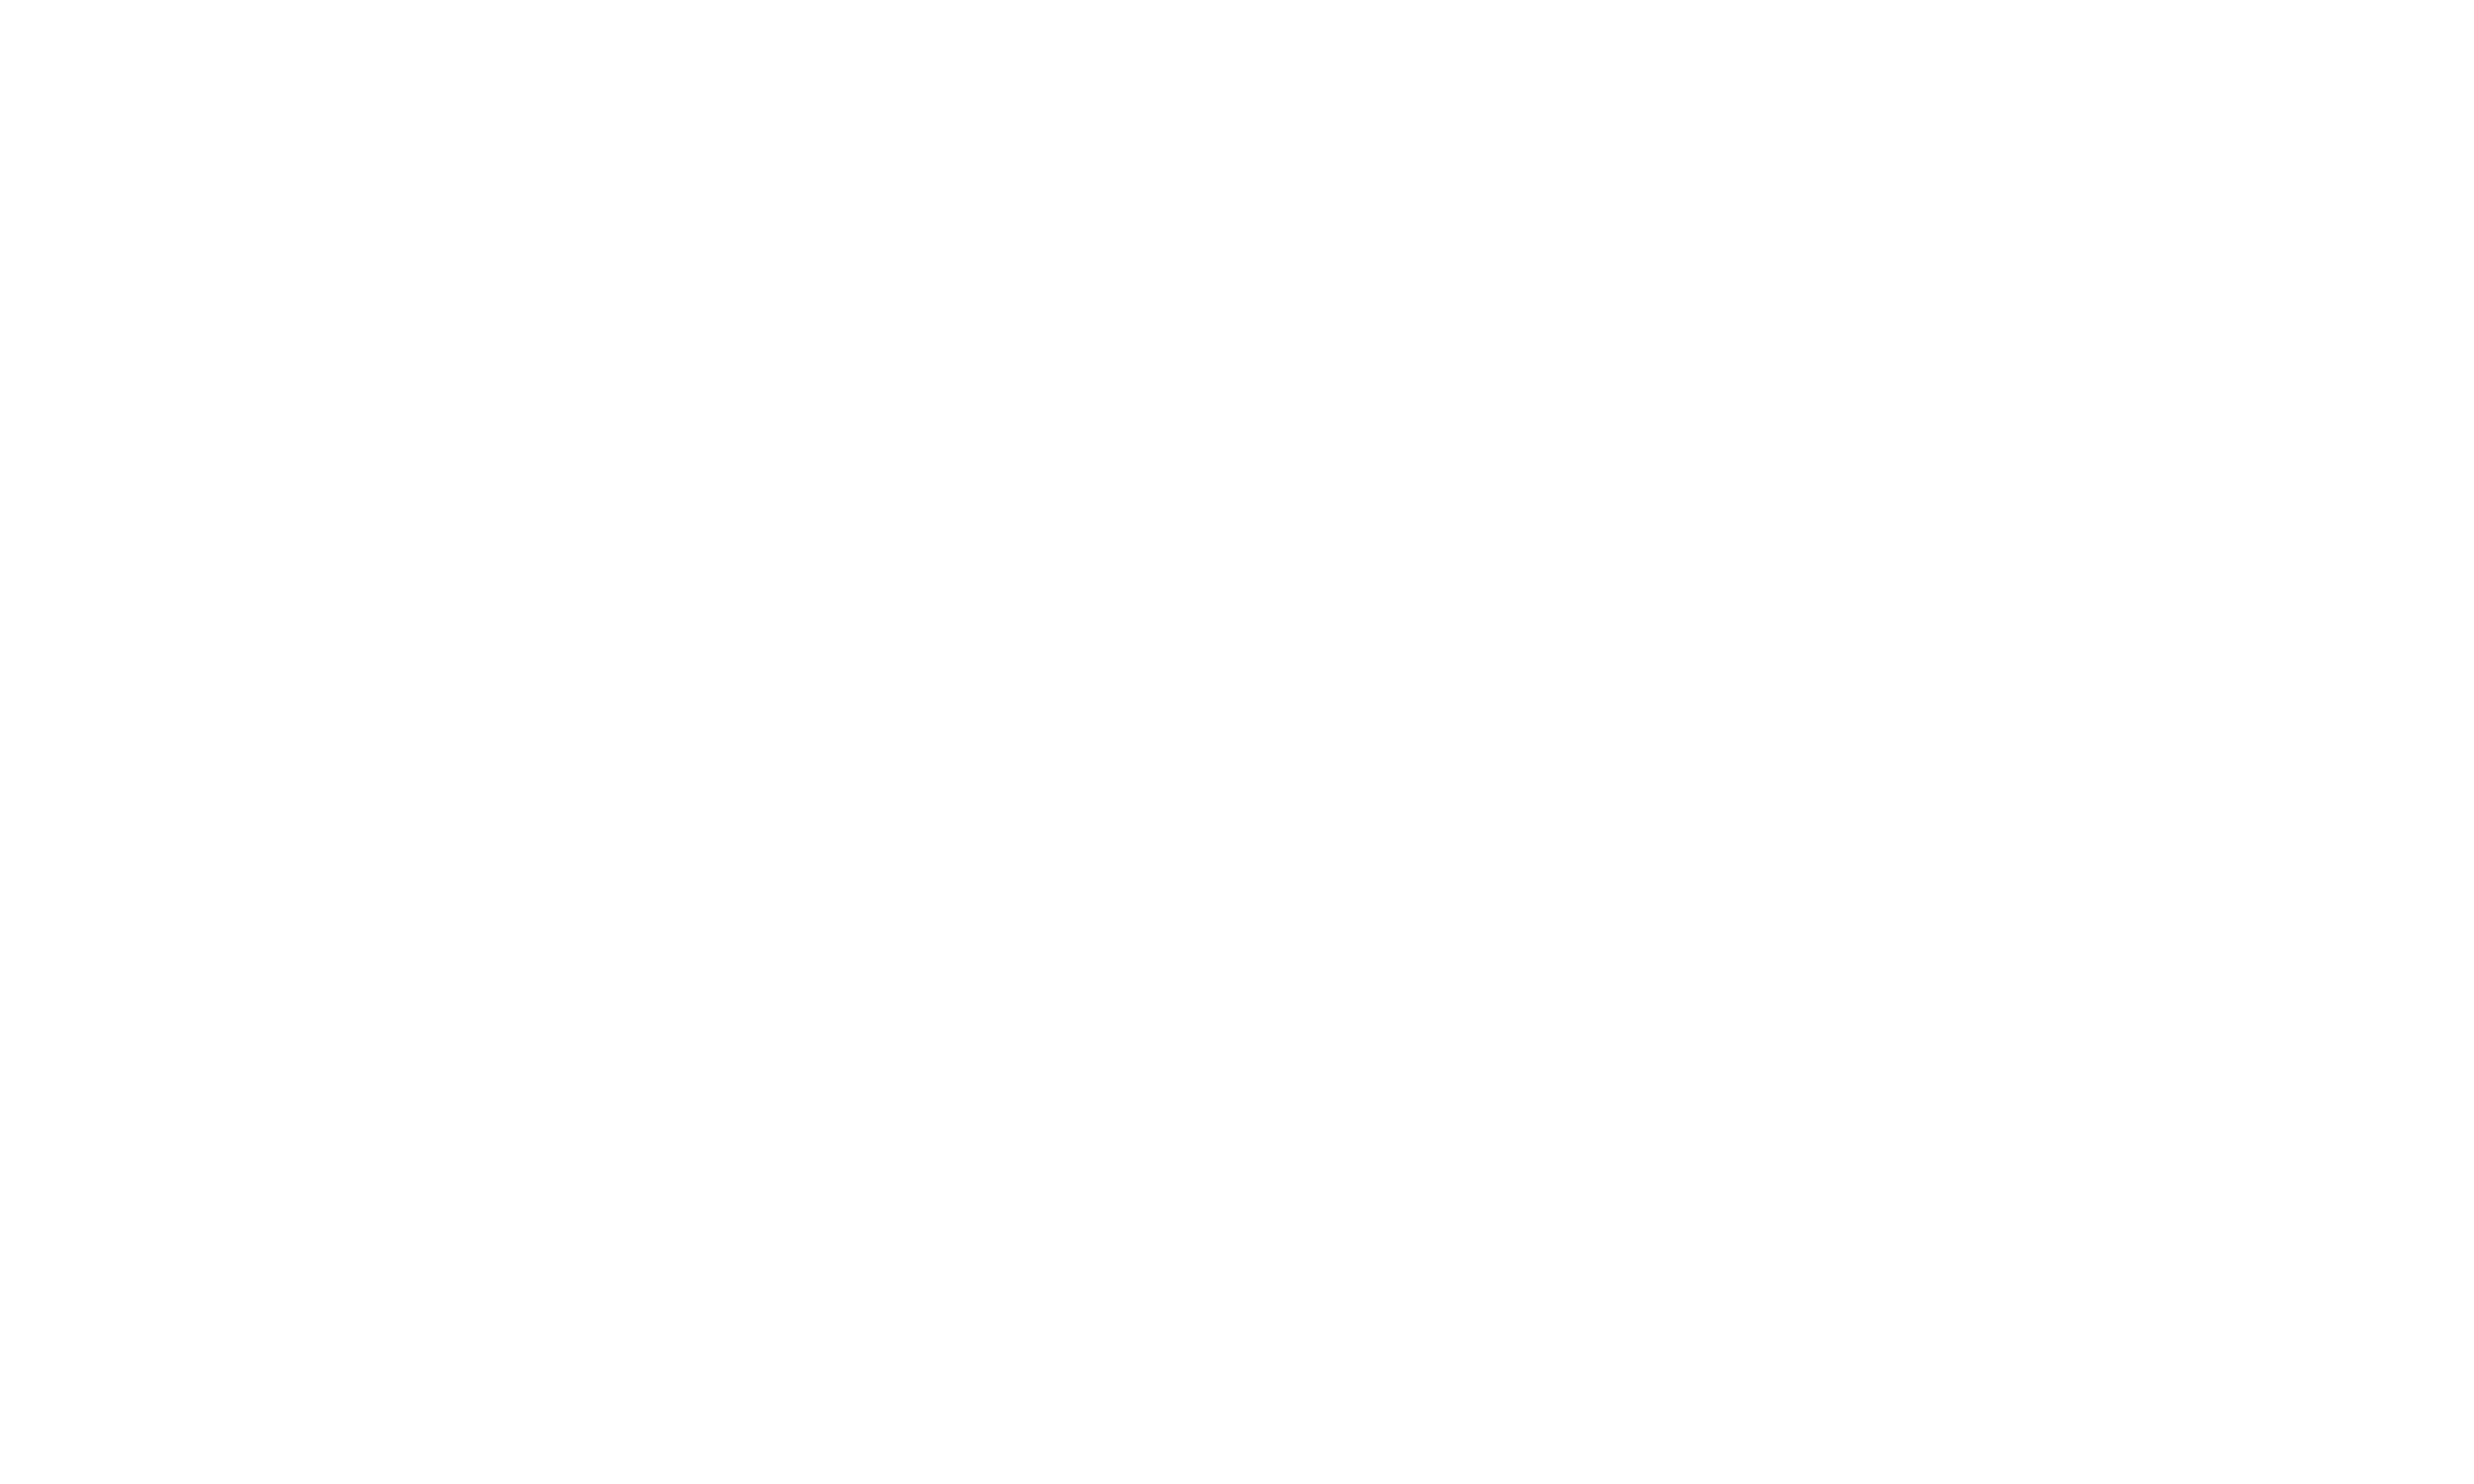

<IPython.core.display.Javascript object>


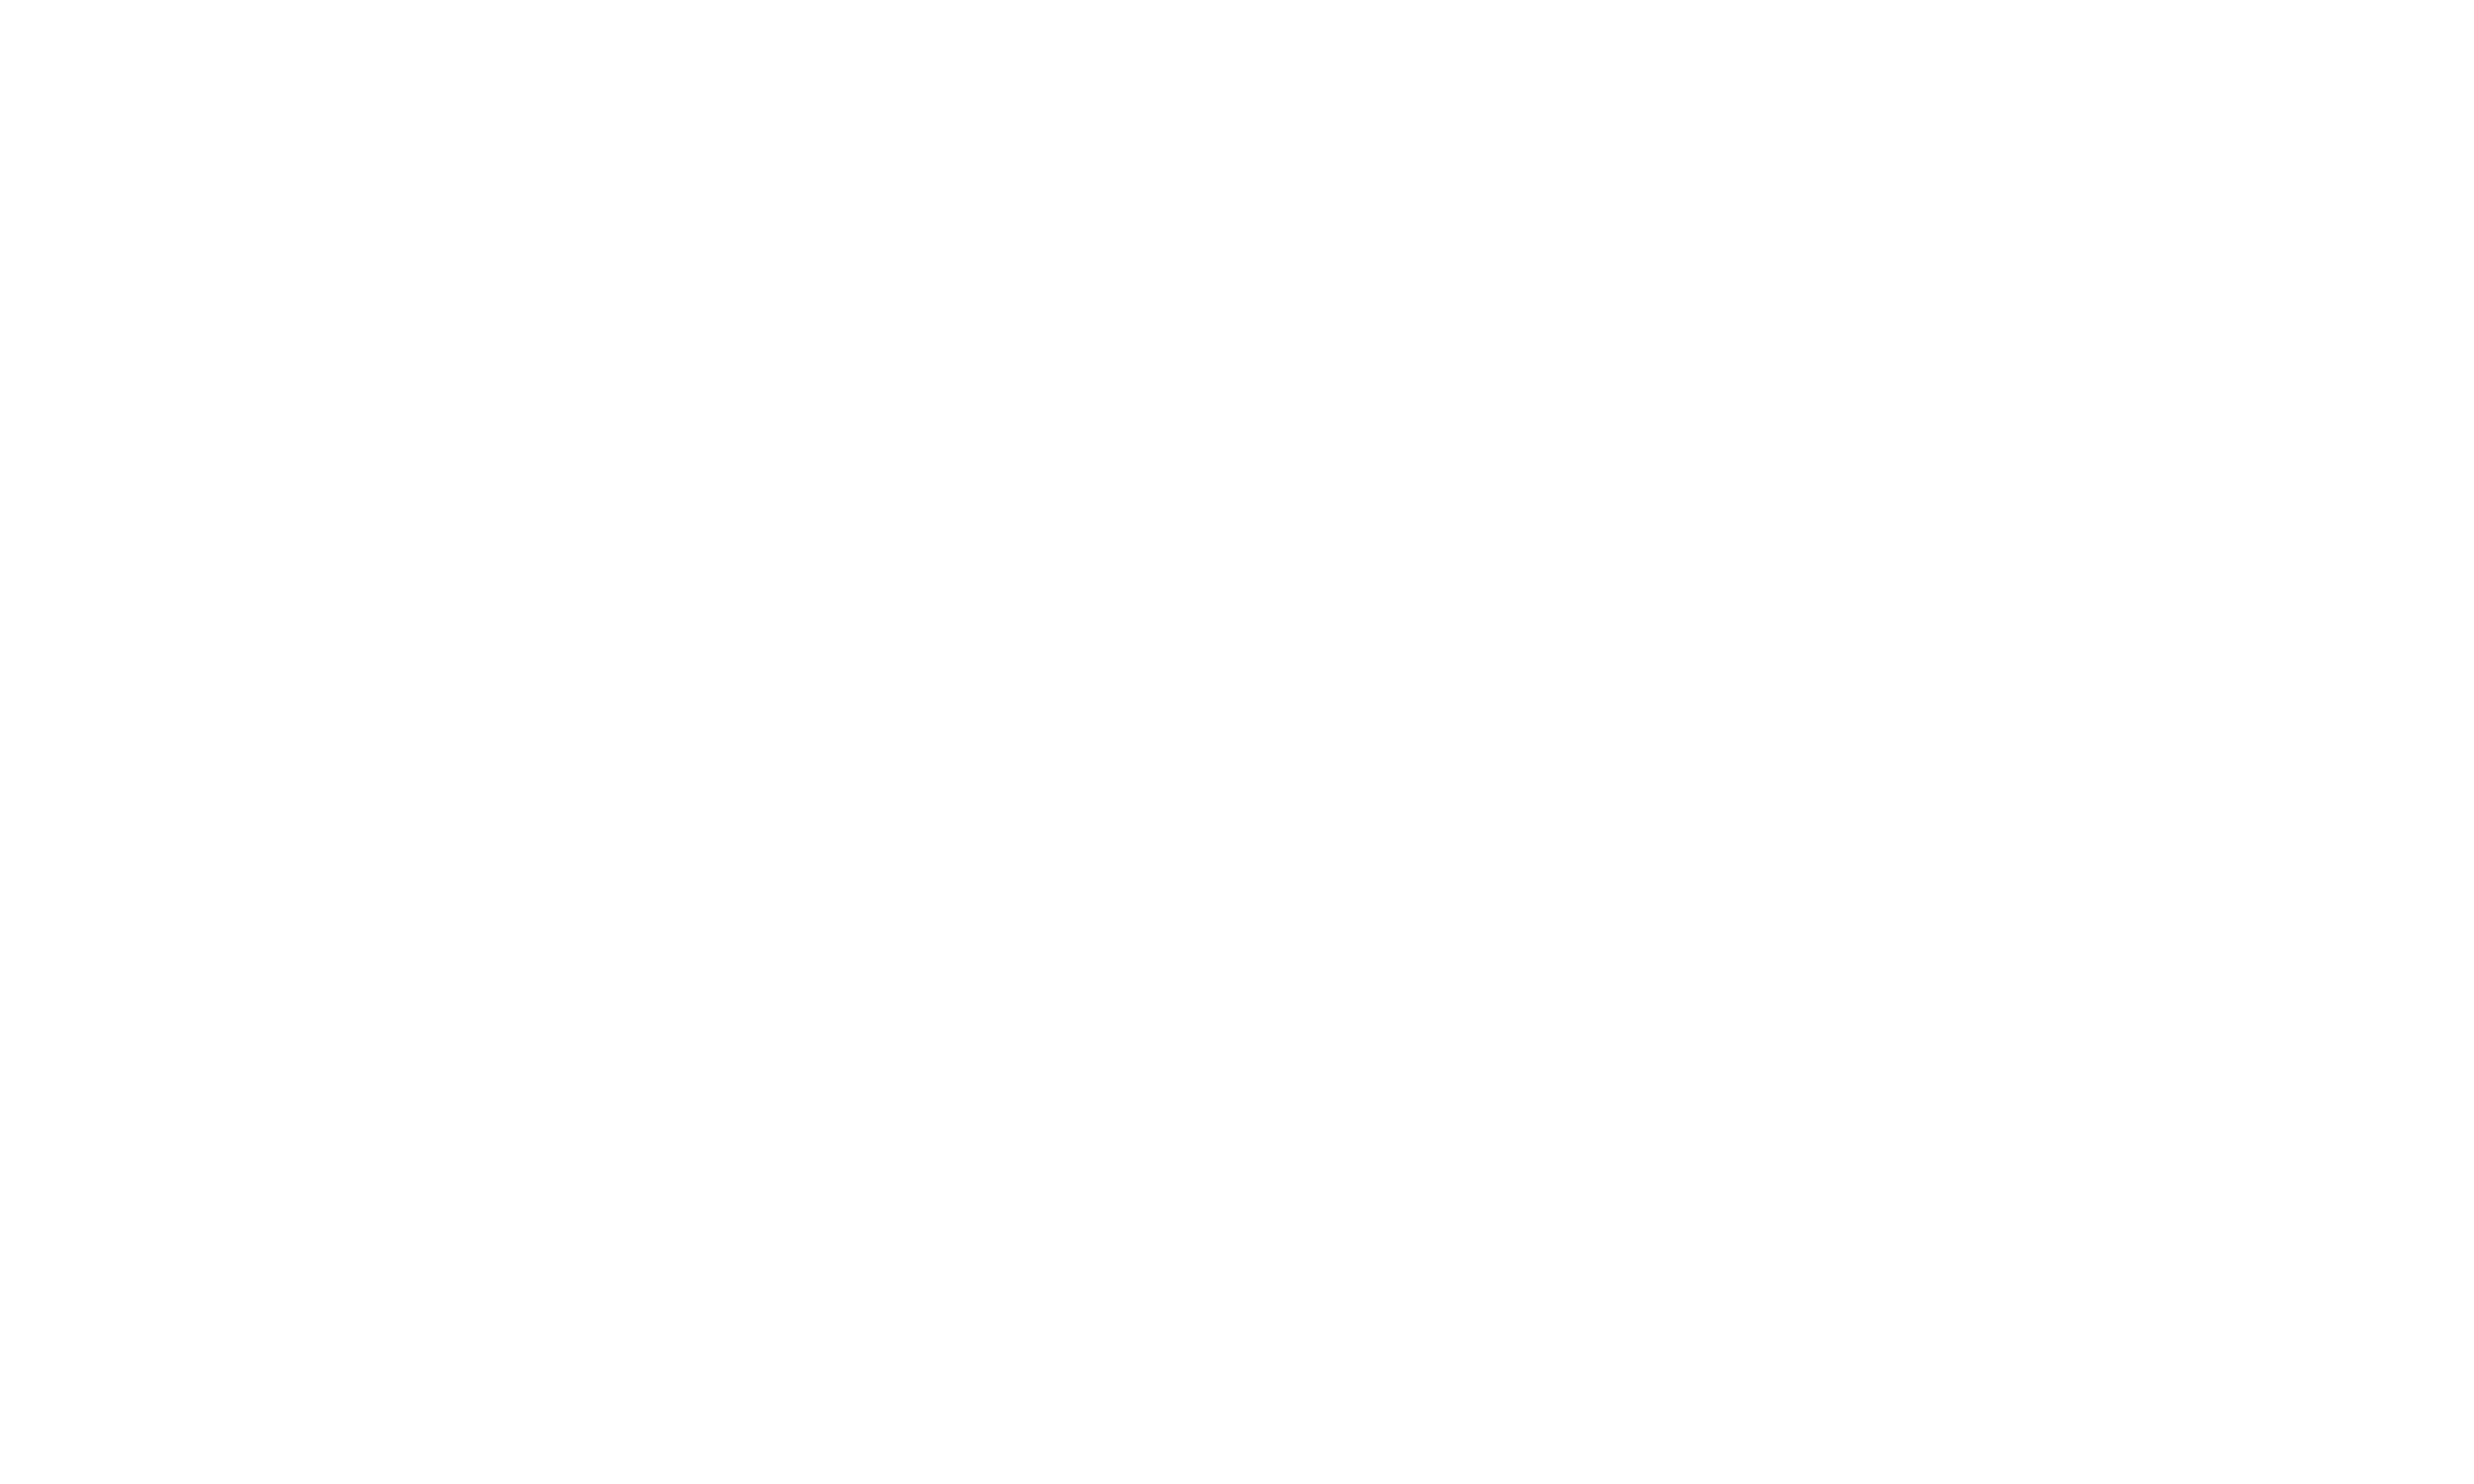

<IPython.core.display.Javascript object>


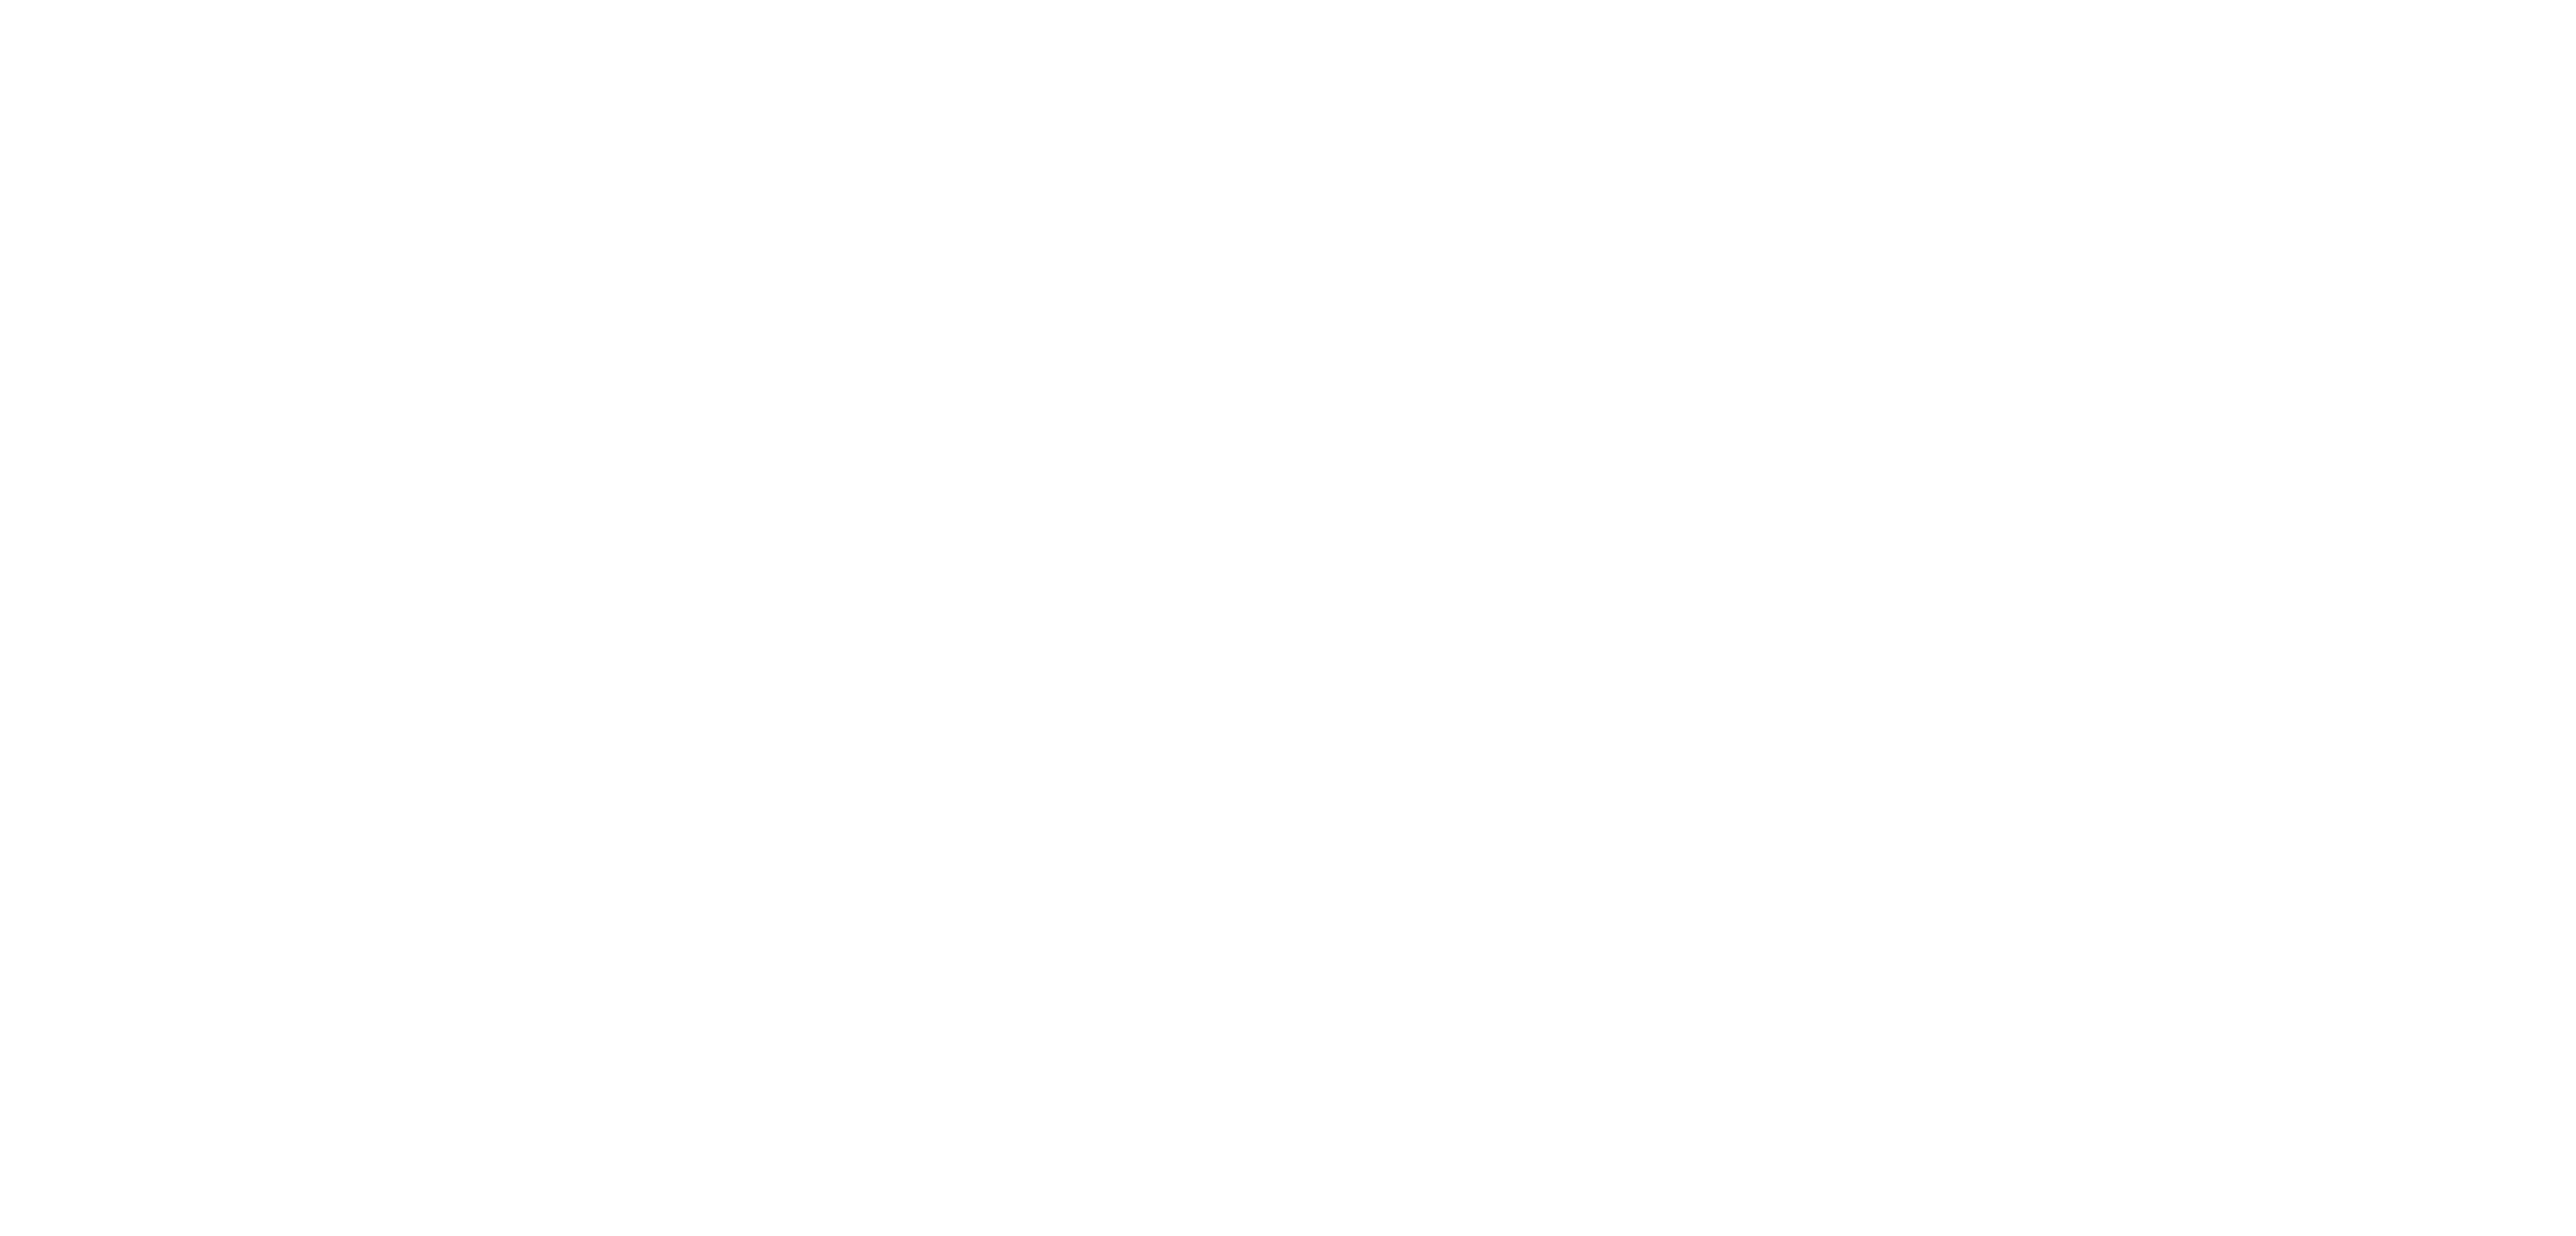

<IPython.core.display.Javascript object>


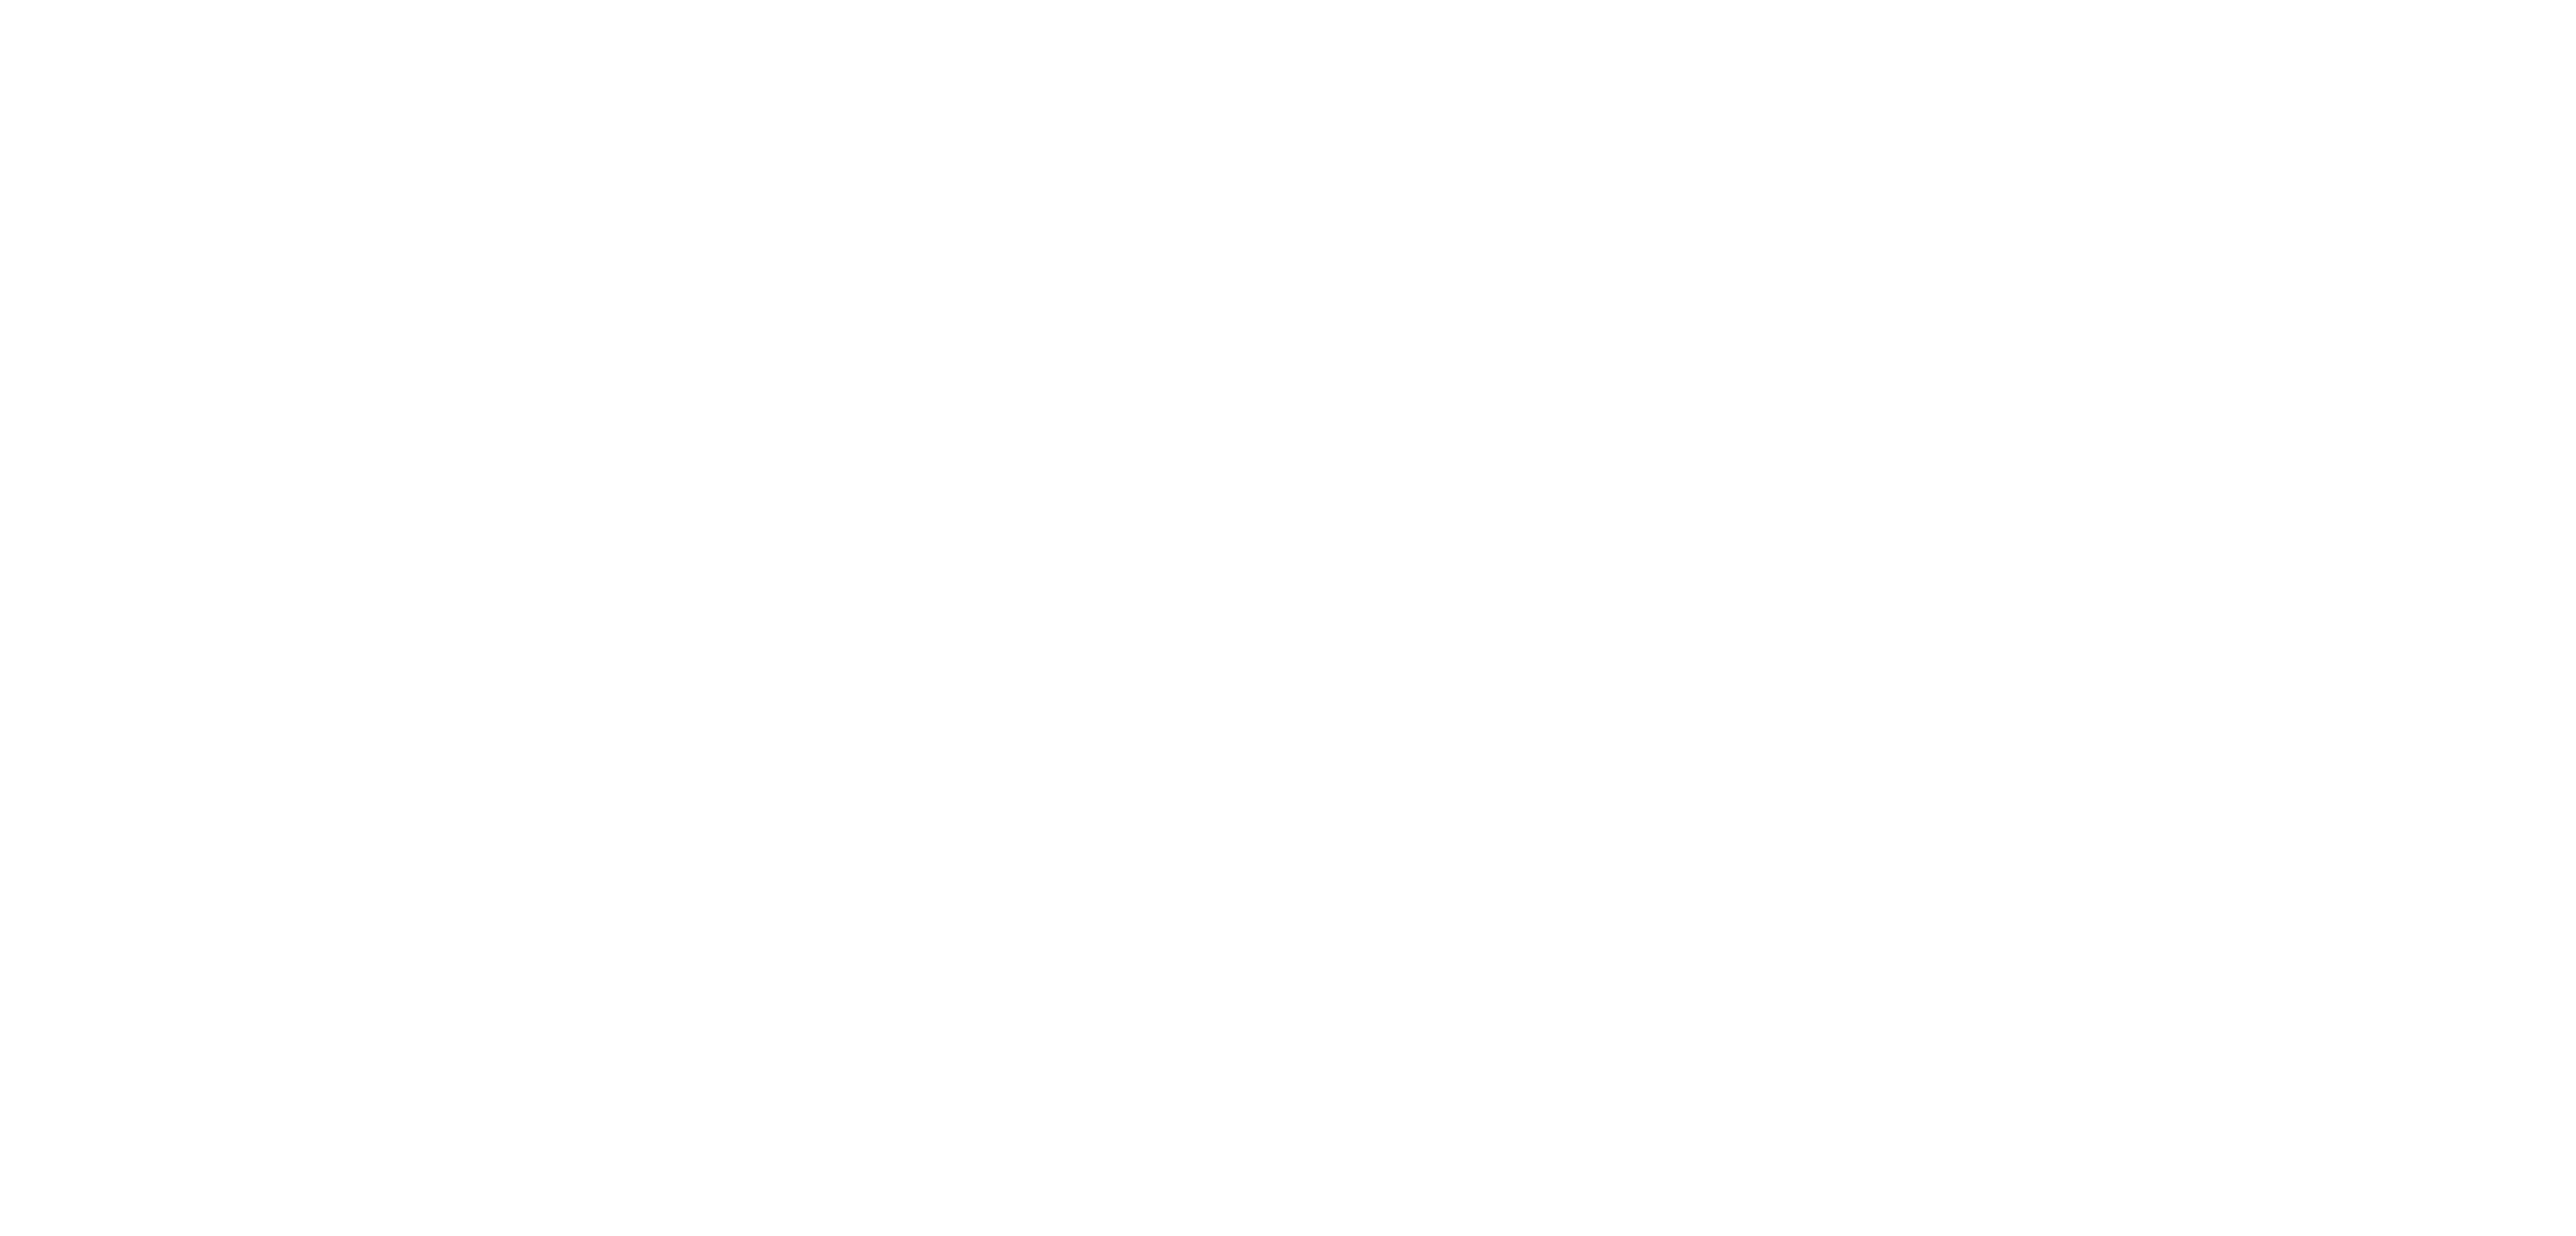

<IPython.core.display.Javascript object>


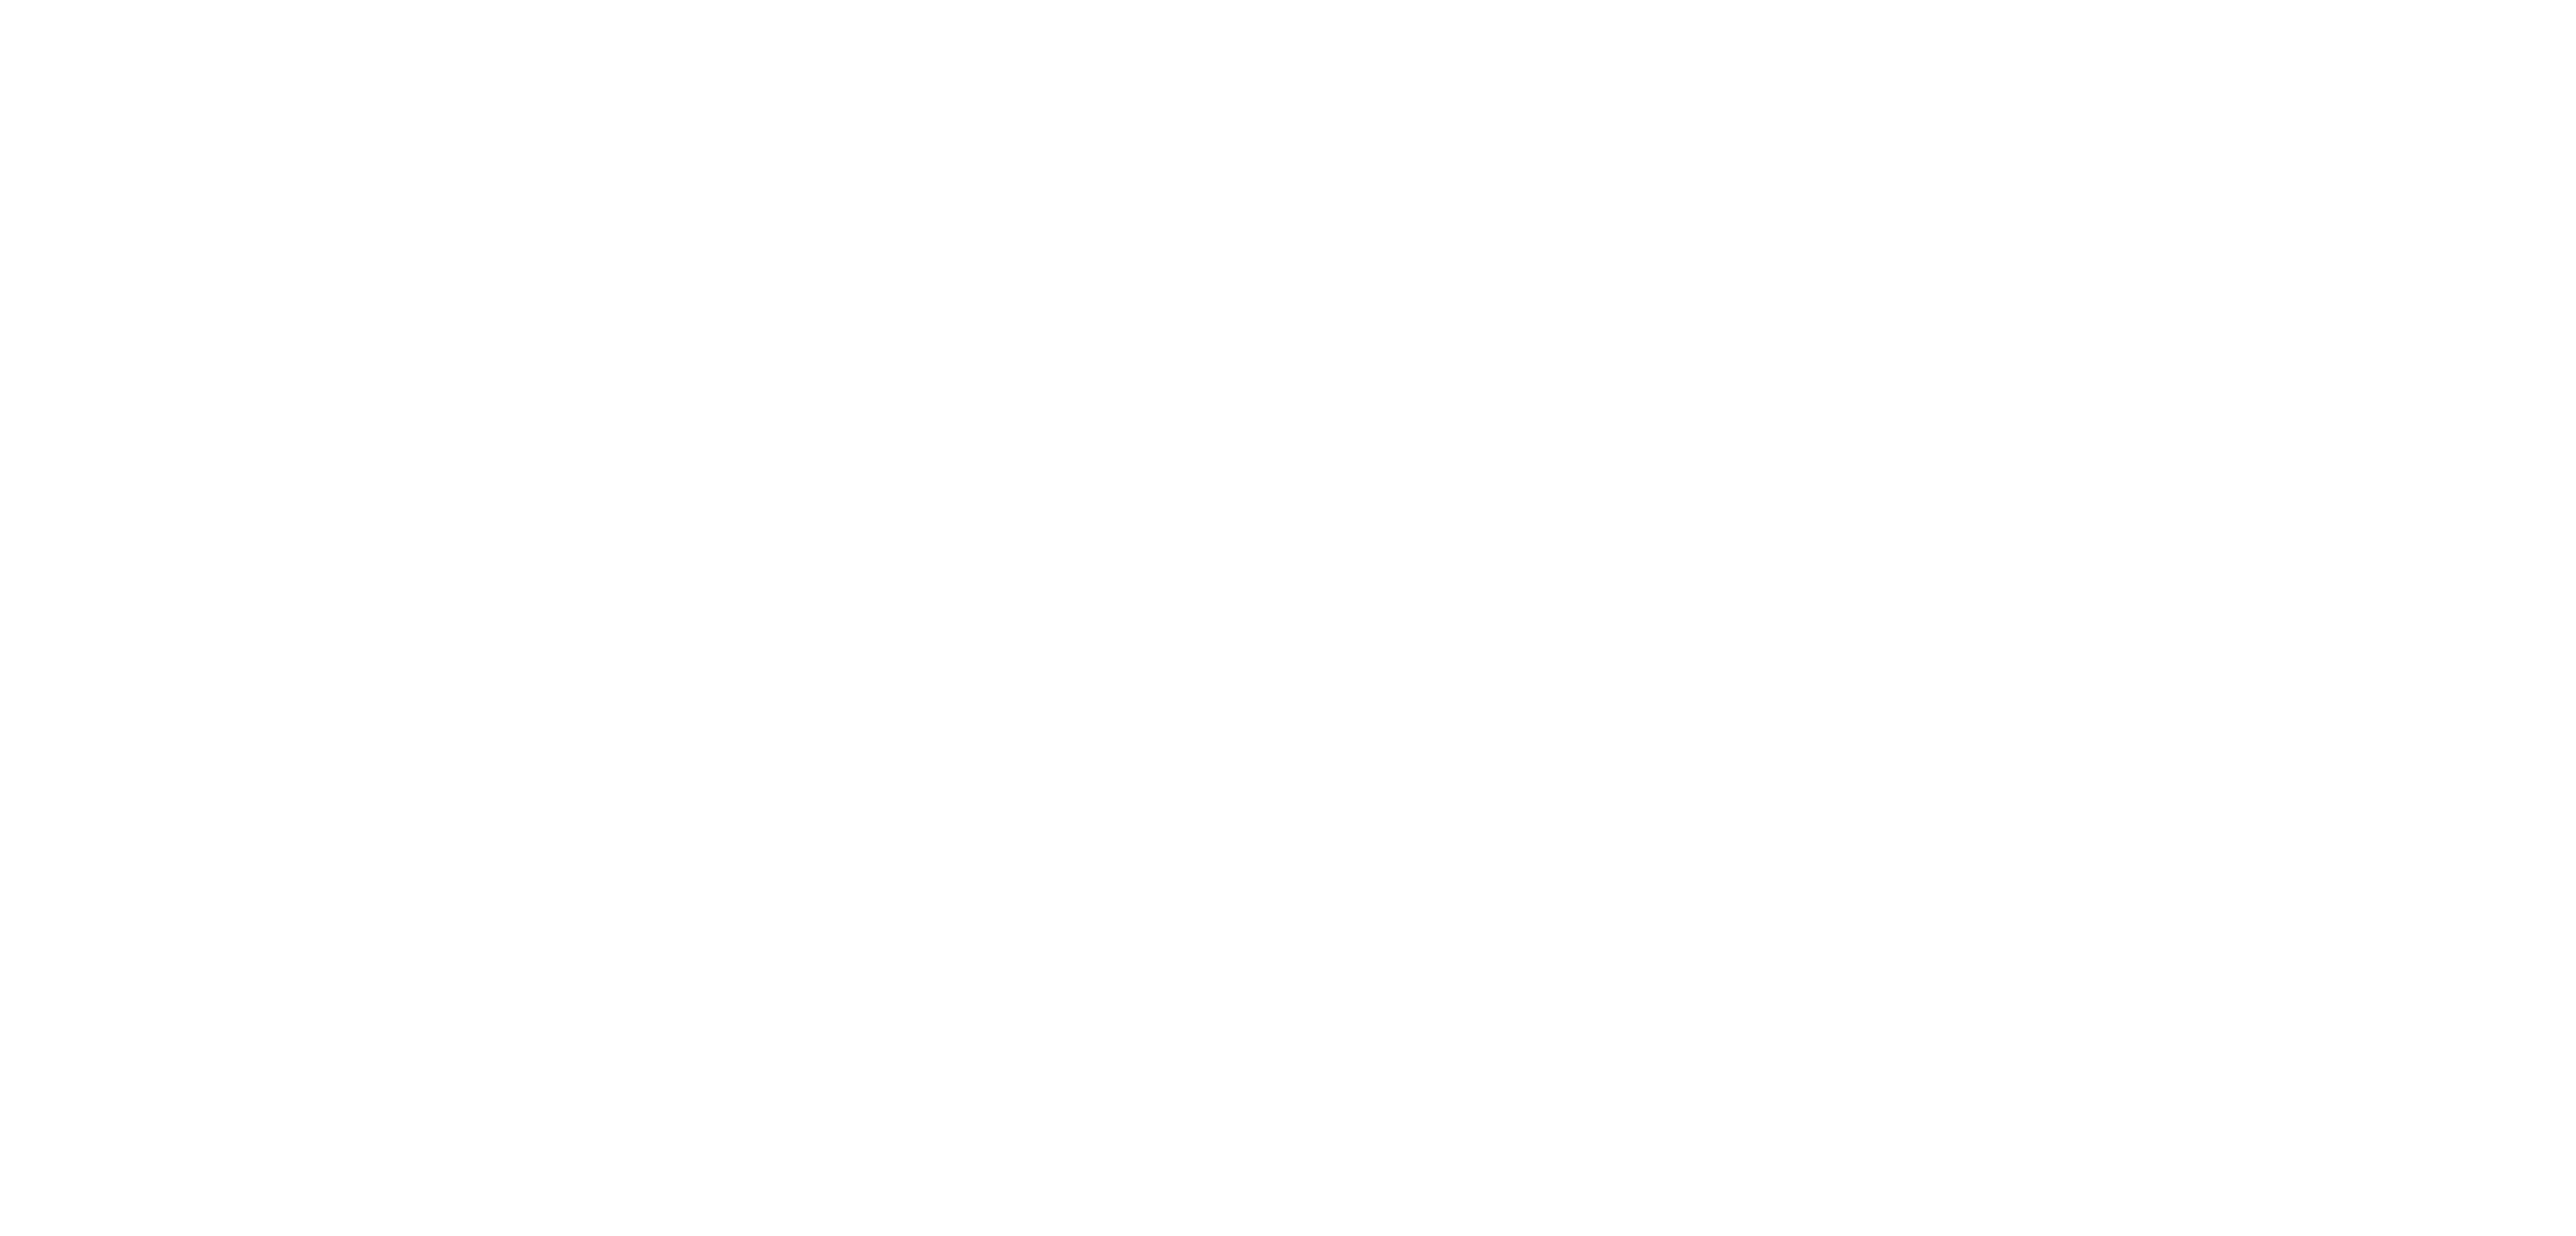

<IPython.core.display.Javascript object>


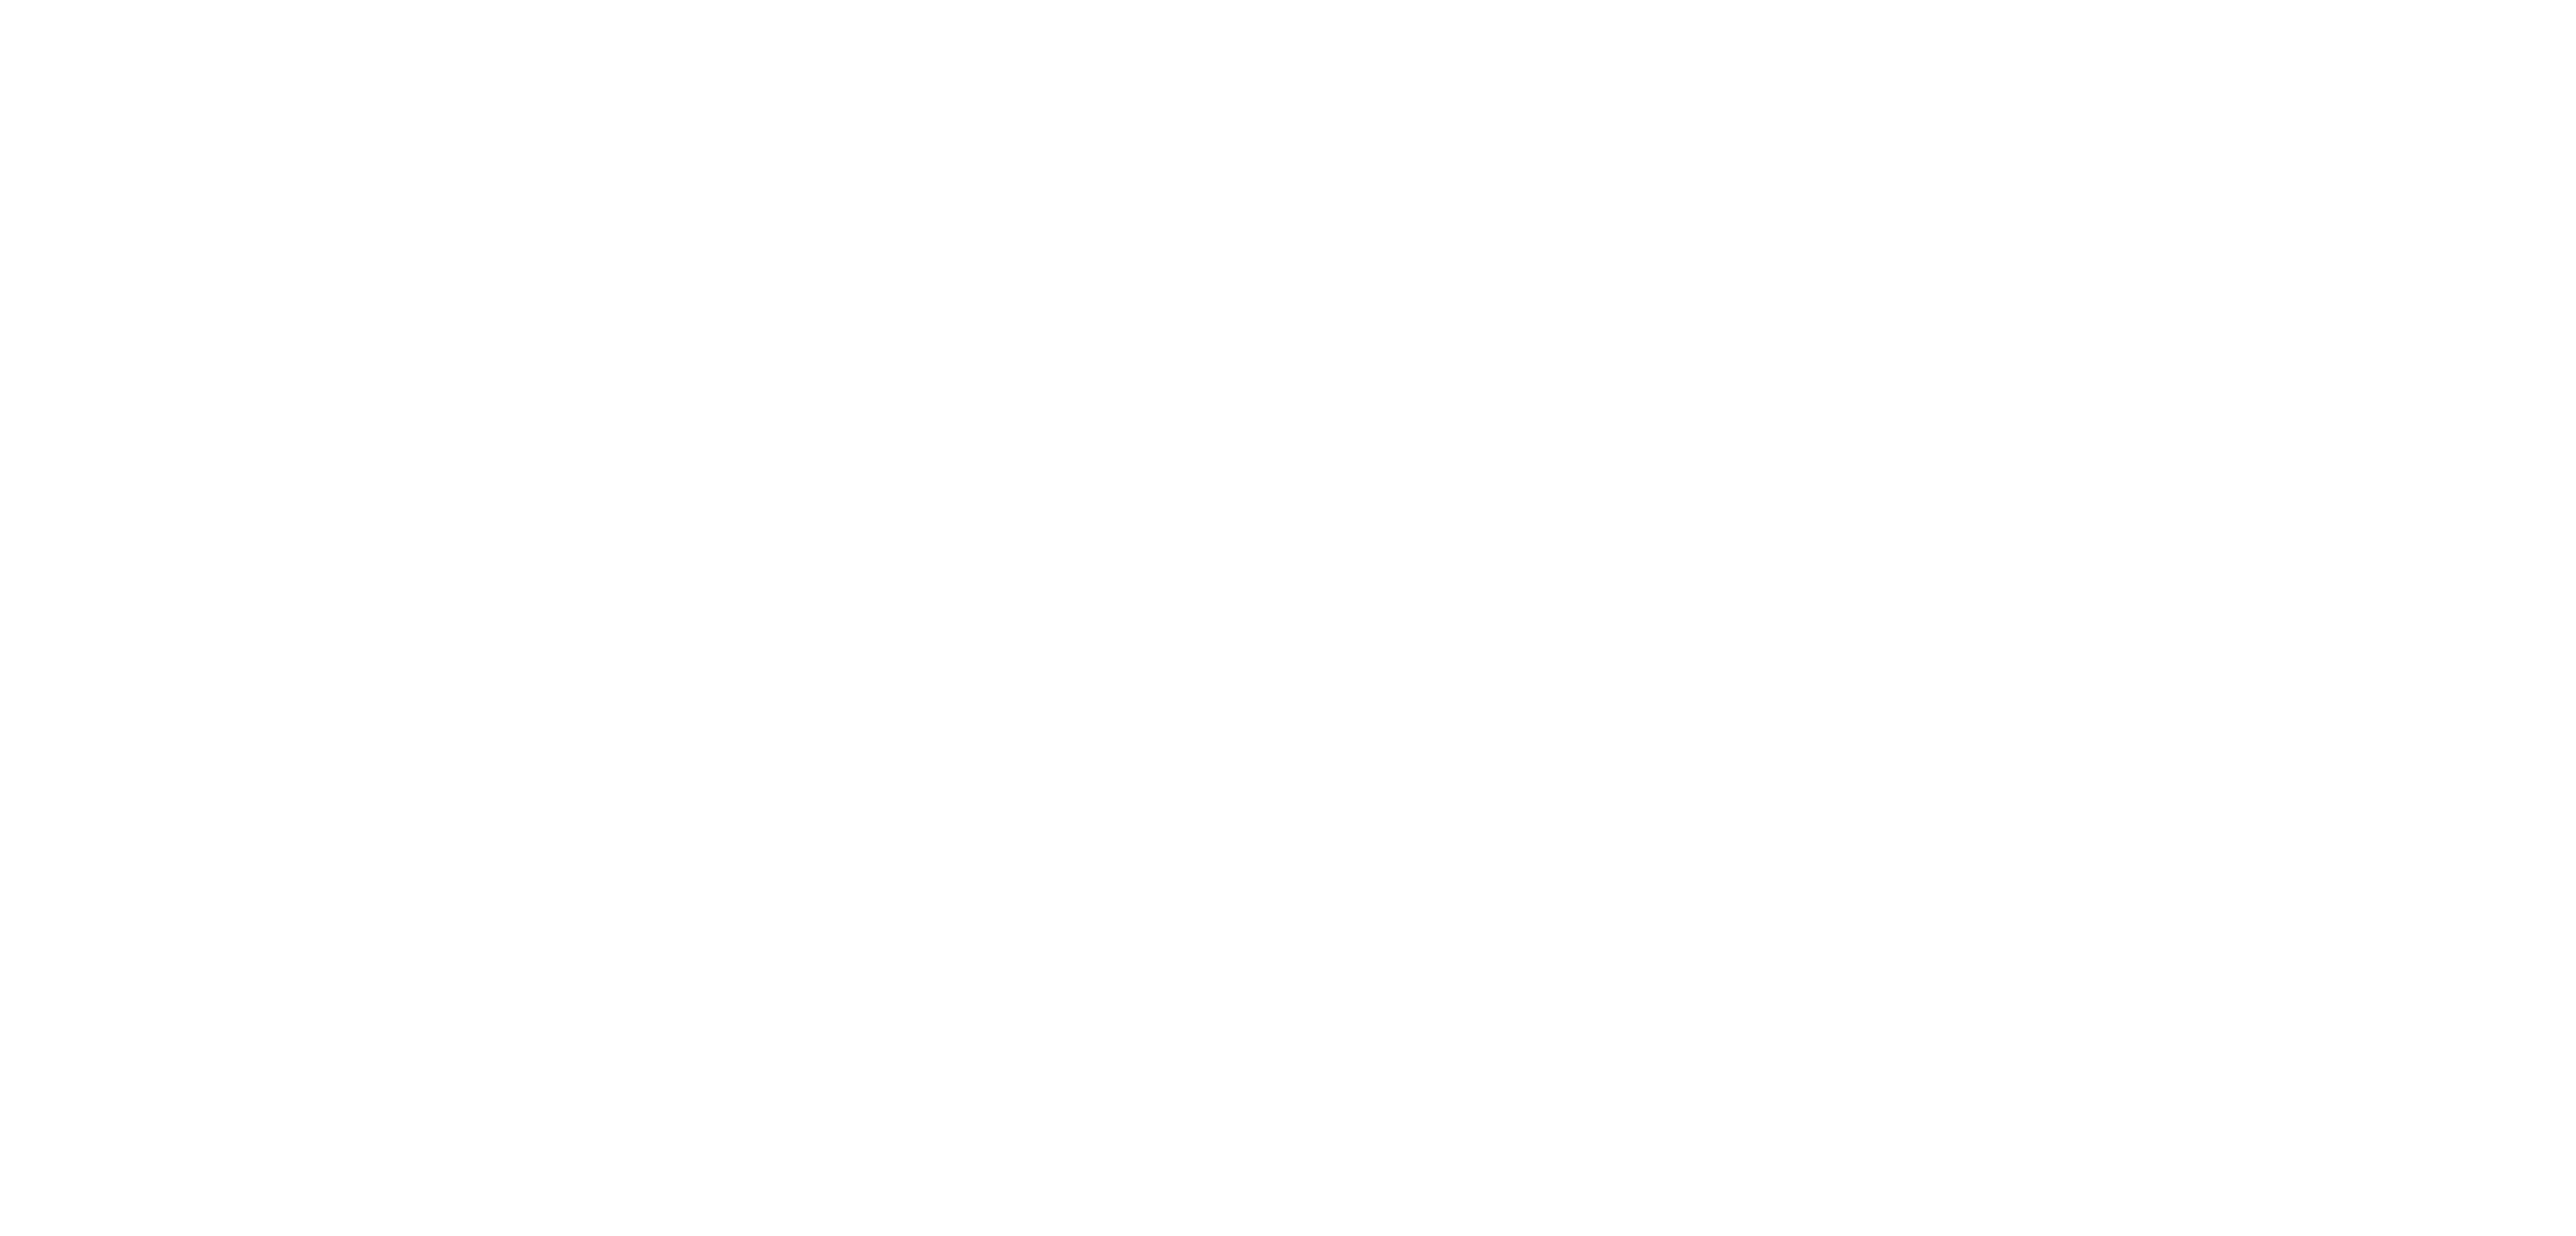

<IPython.core.display.Javascript object>


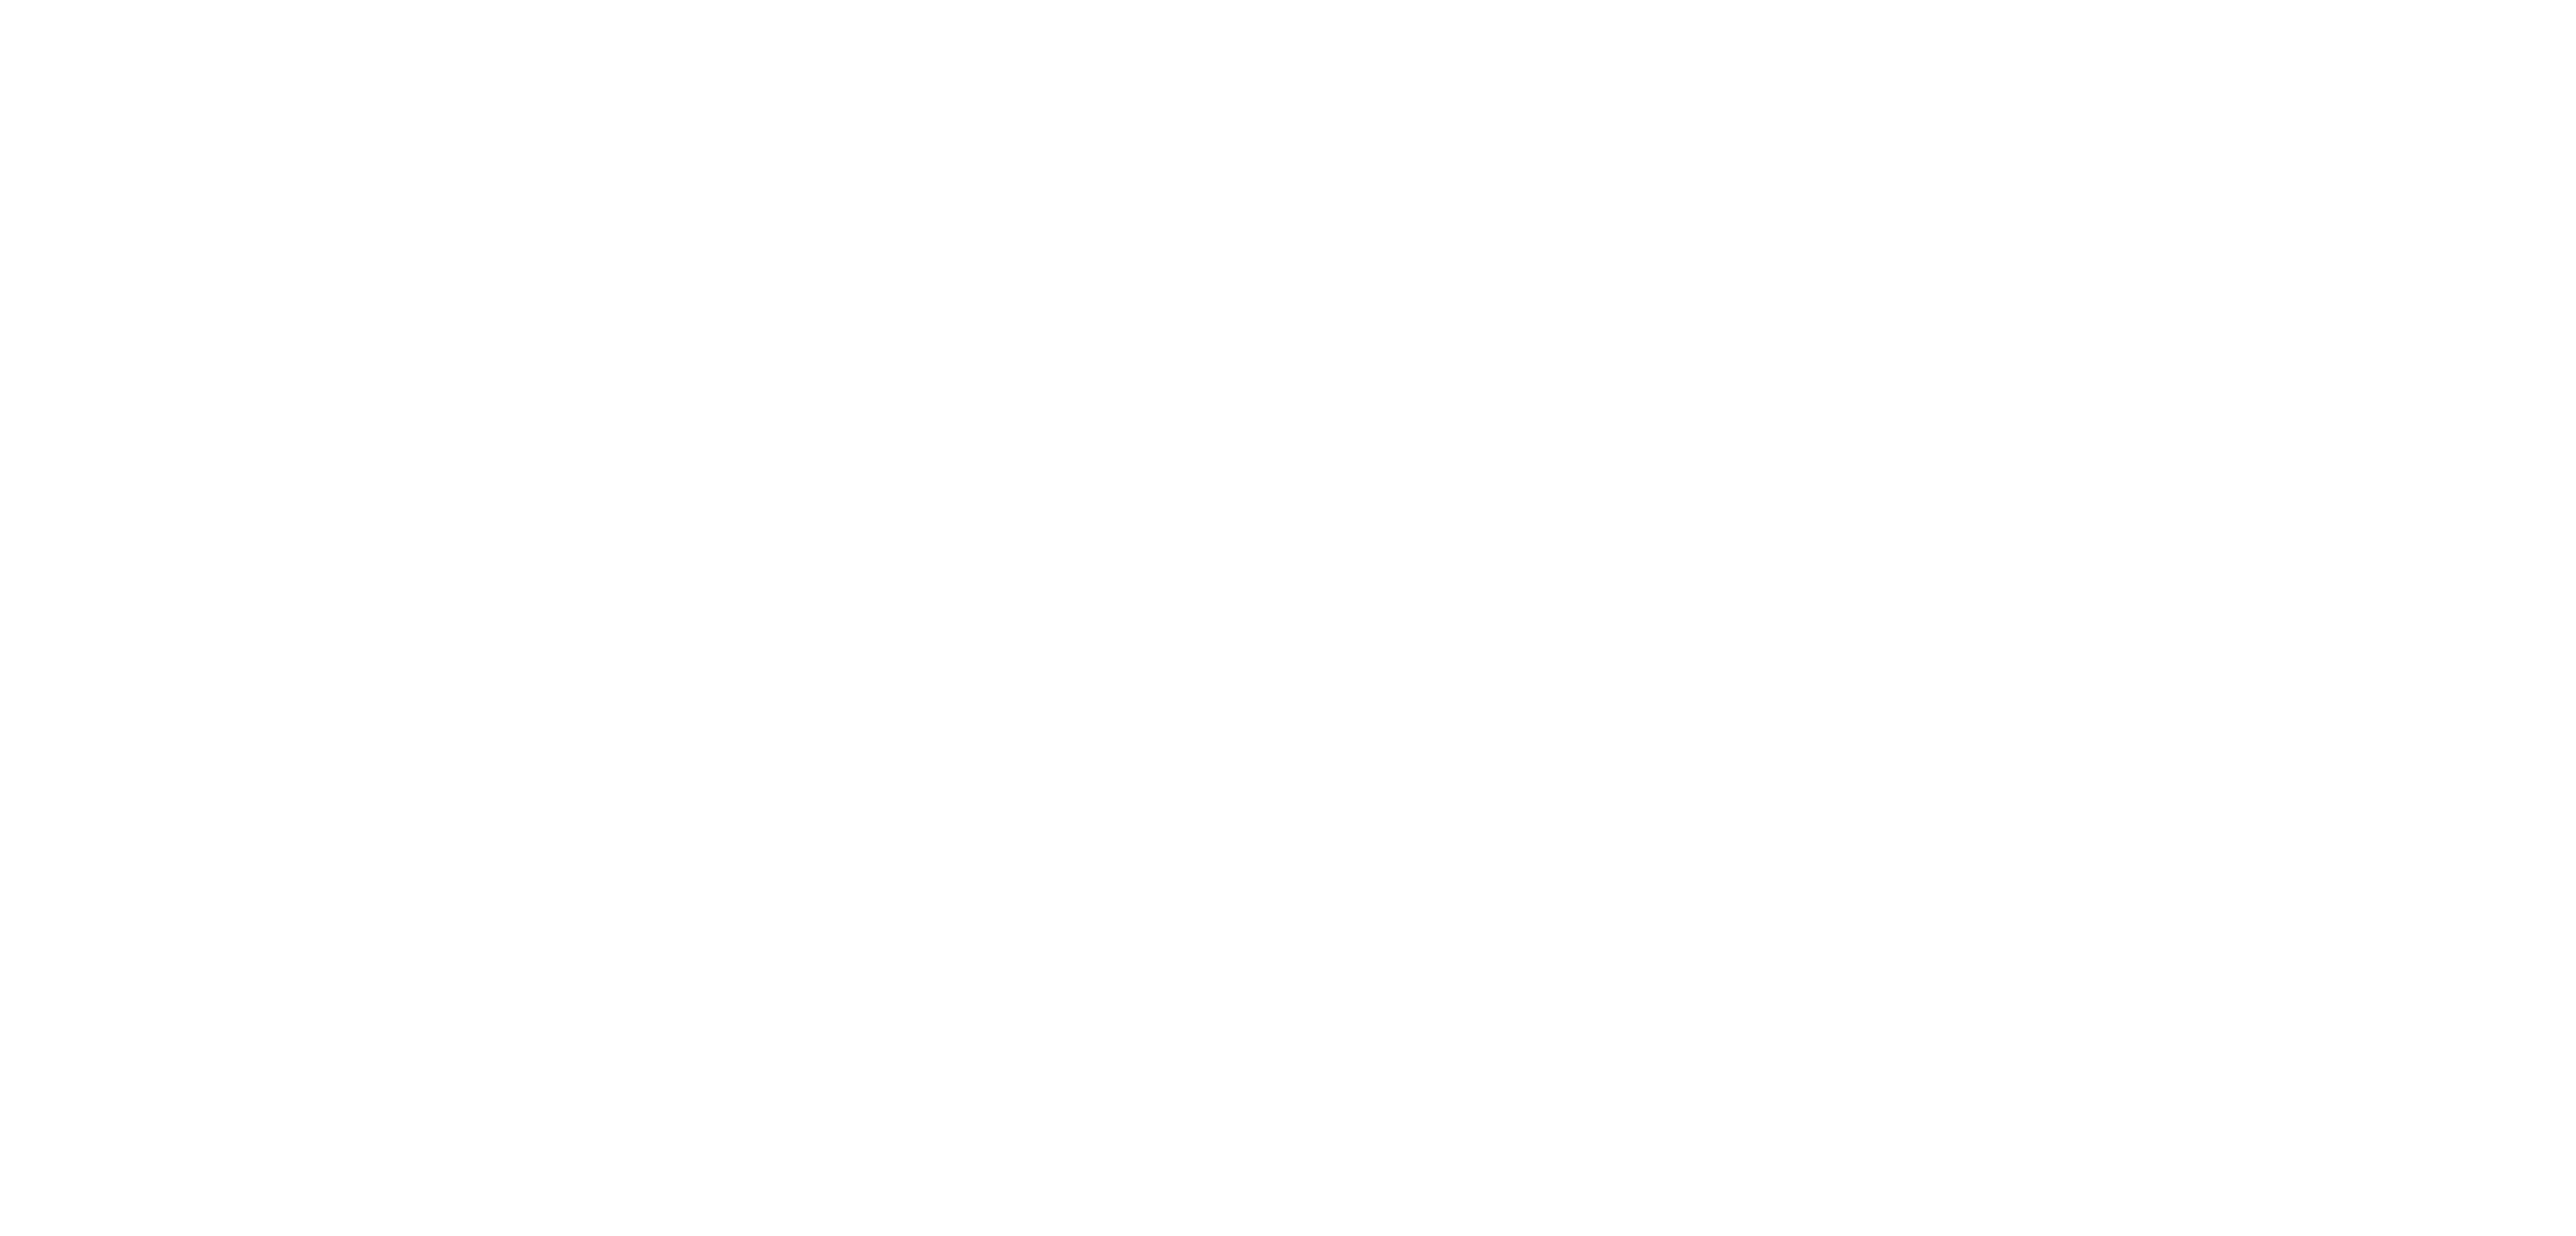

<IPython.core.display.Javascript object>


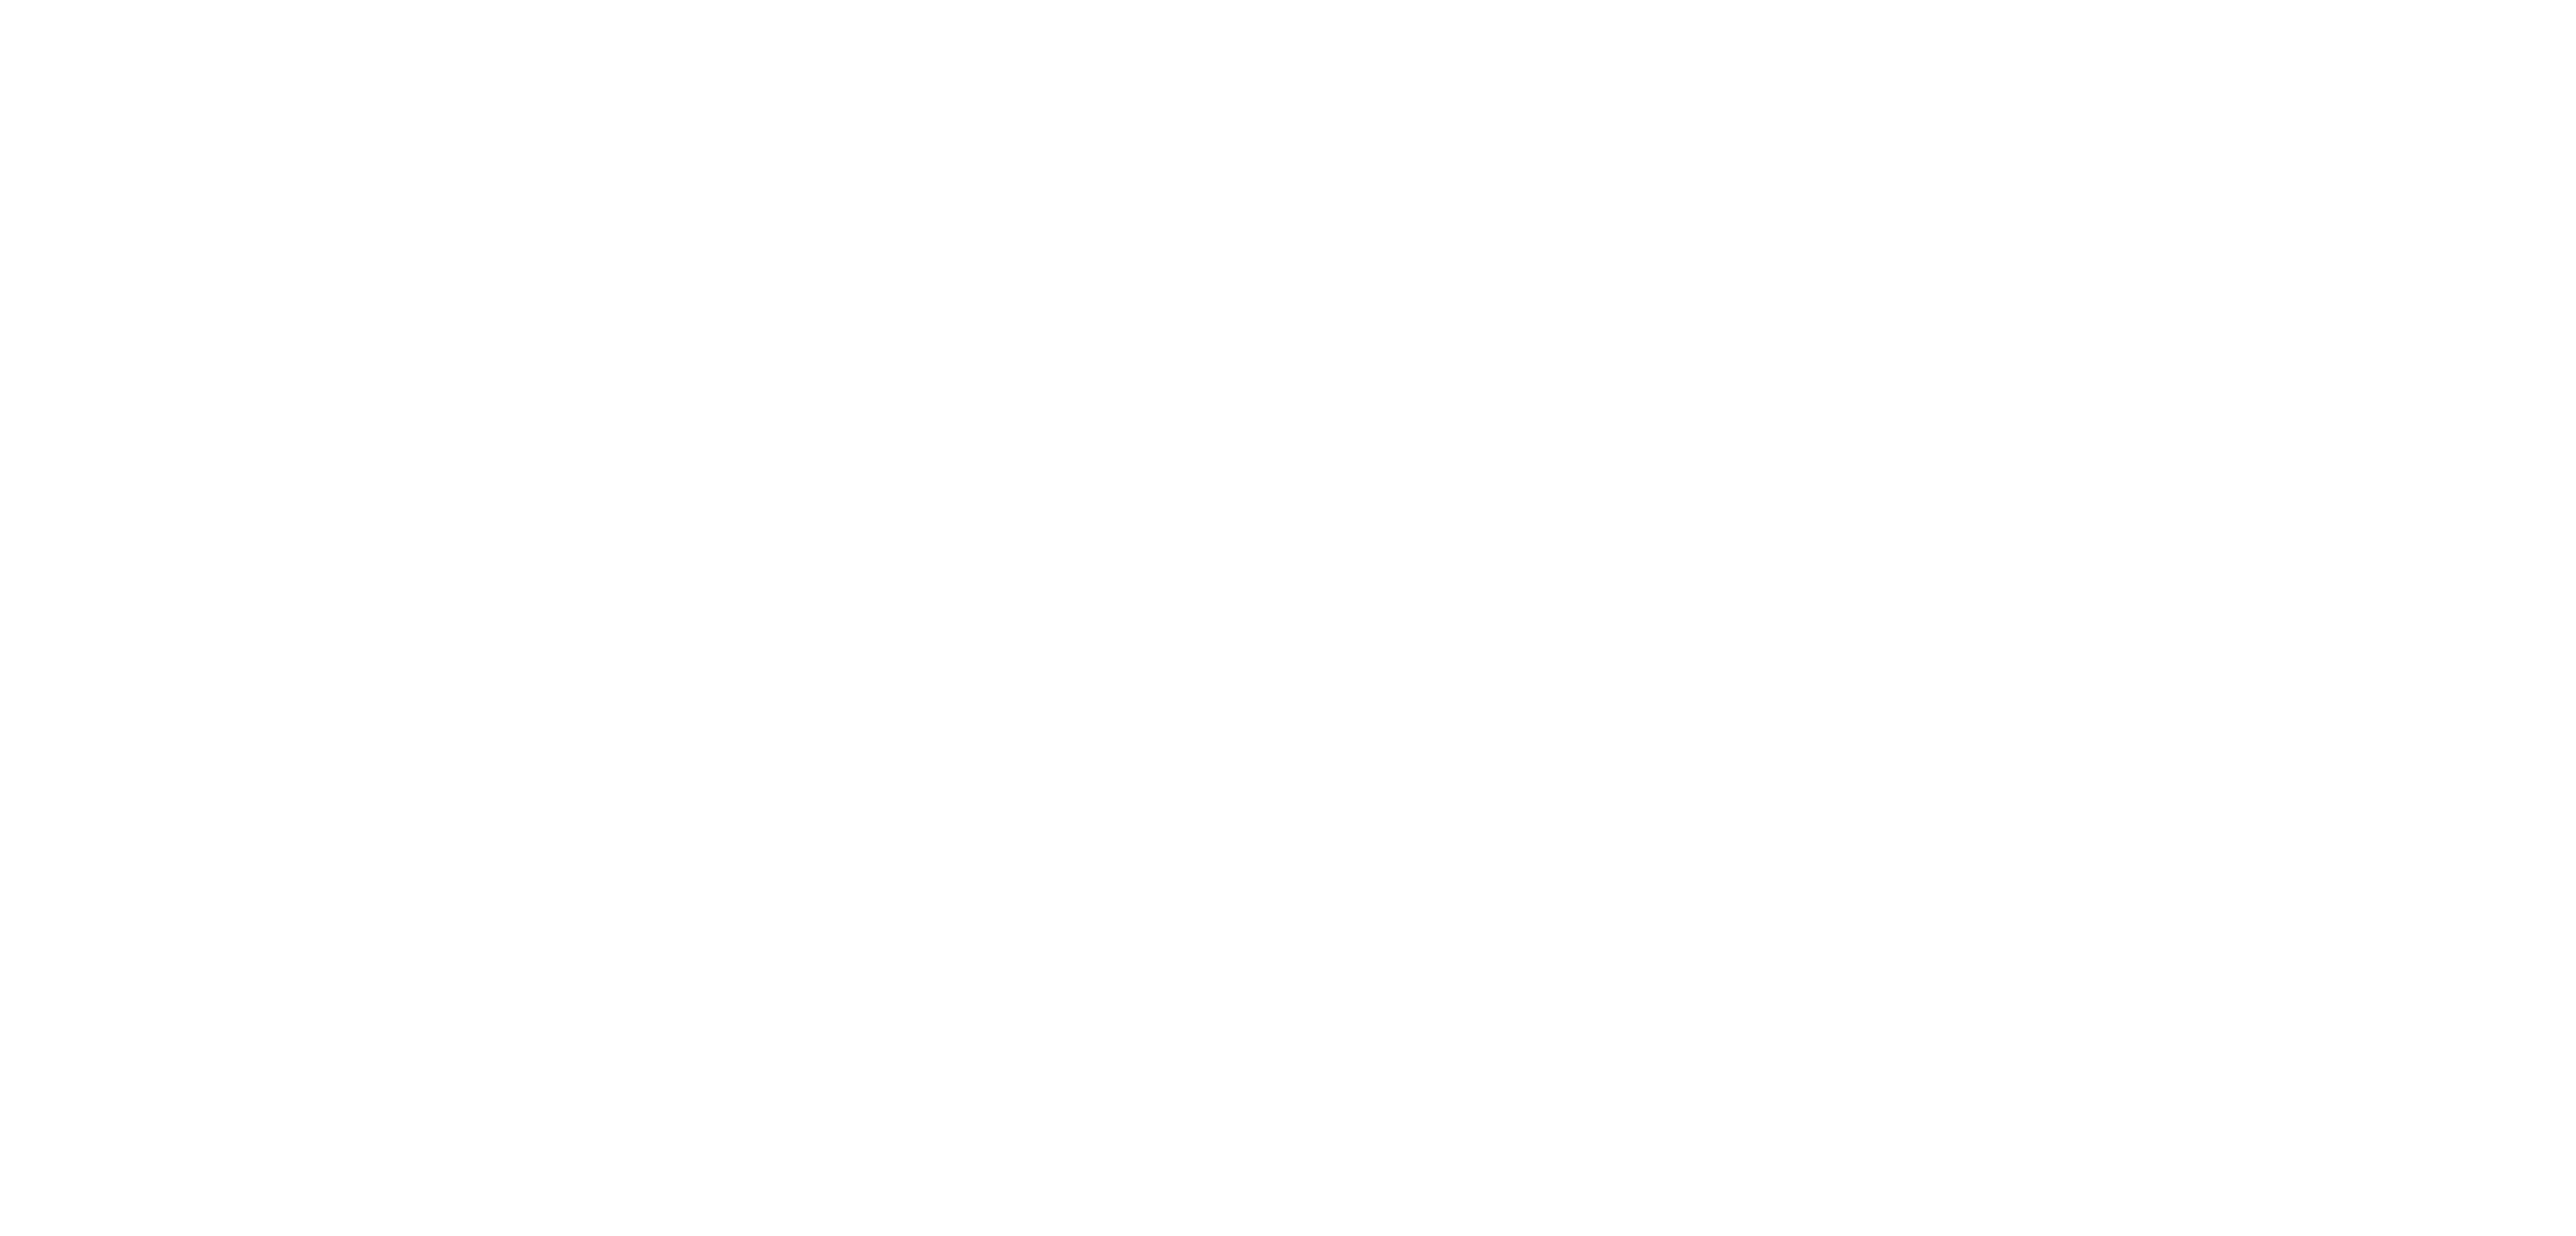

<IPython.core.display.Javascript object>


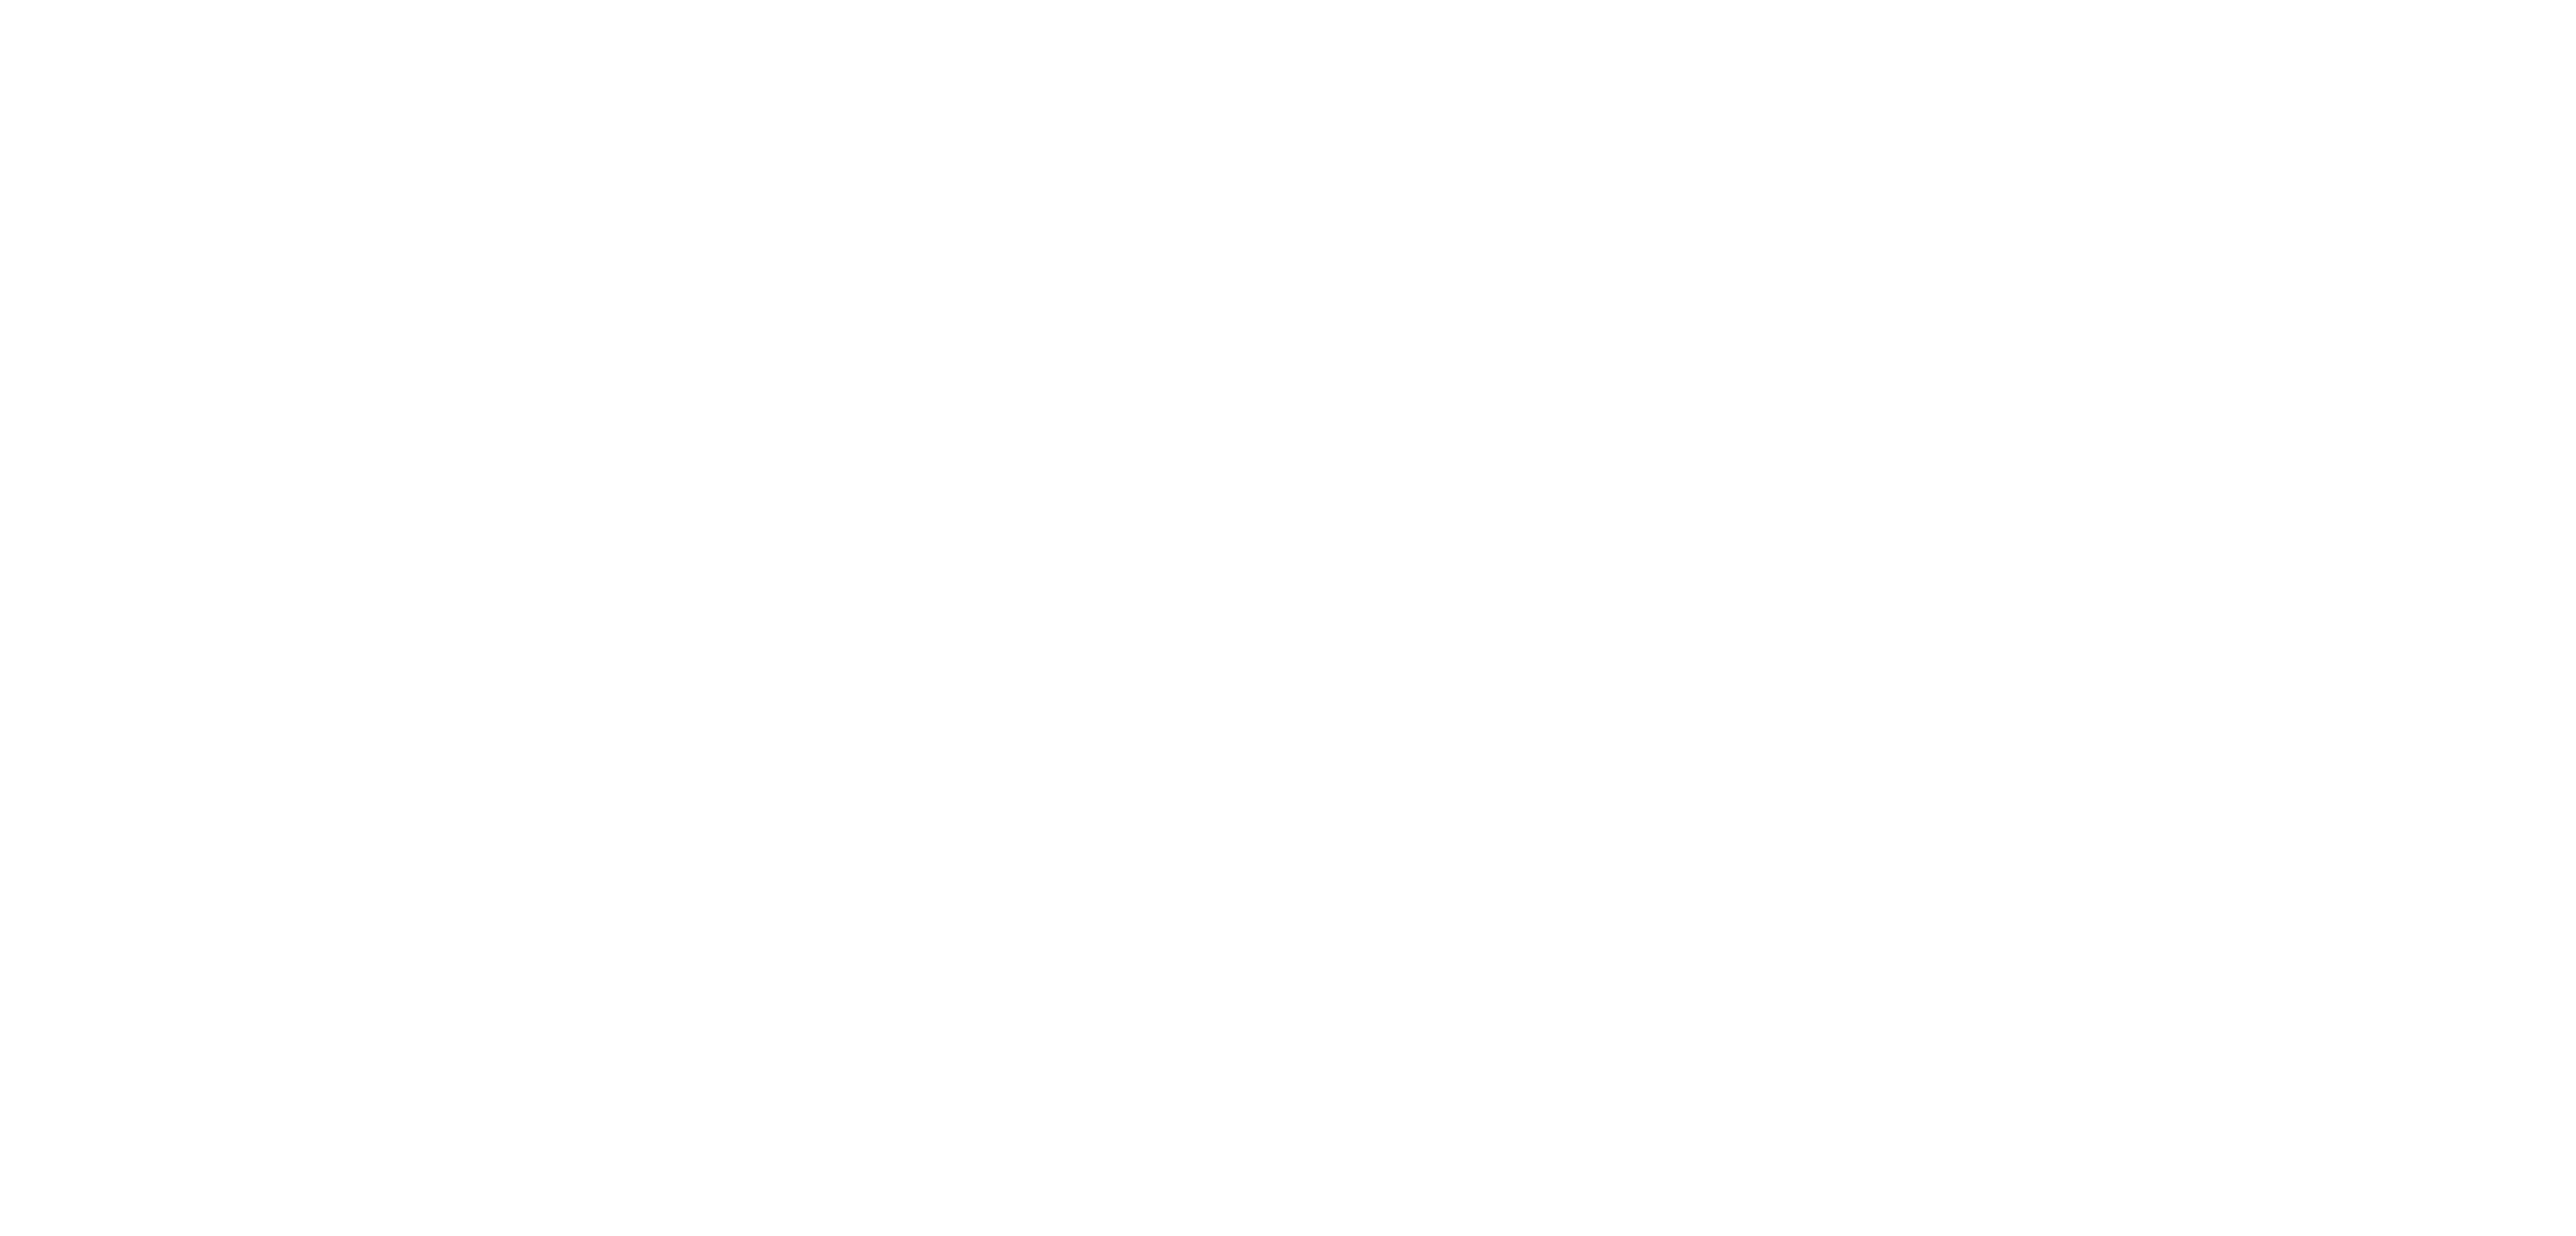

<IPython.core.display.Javascript object>


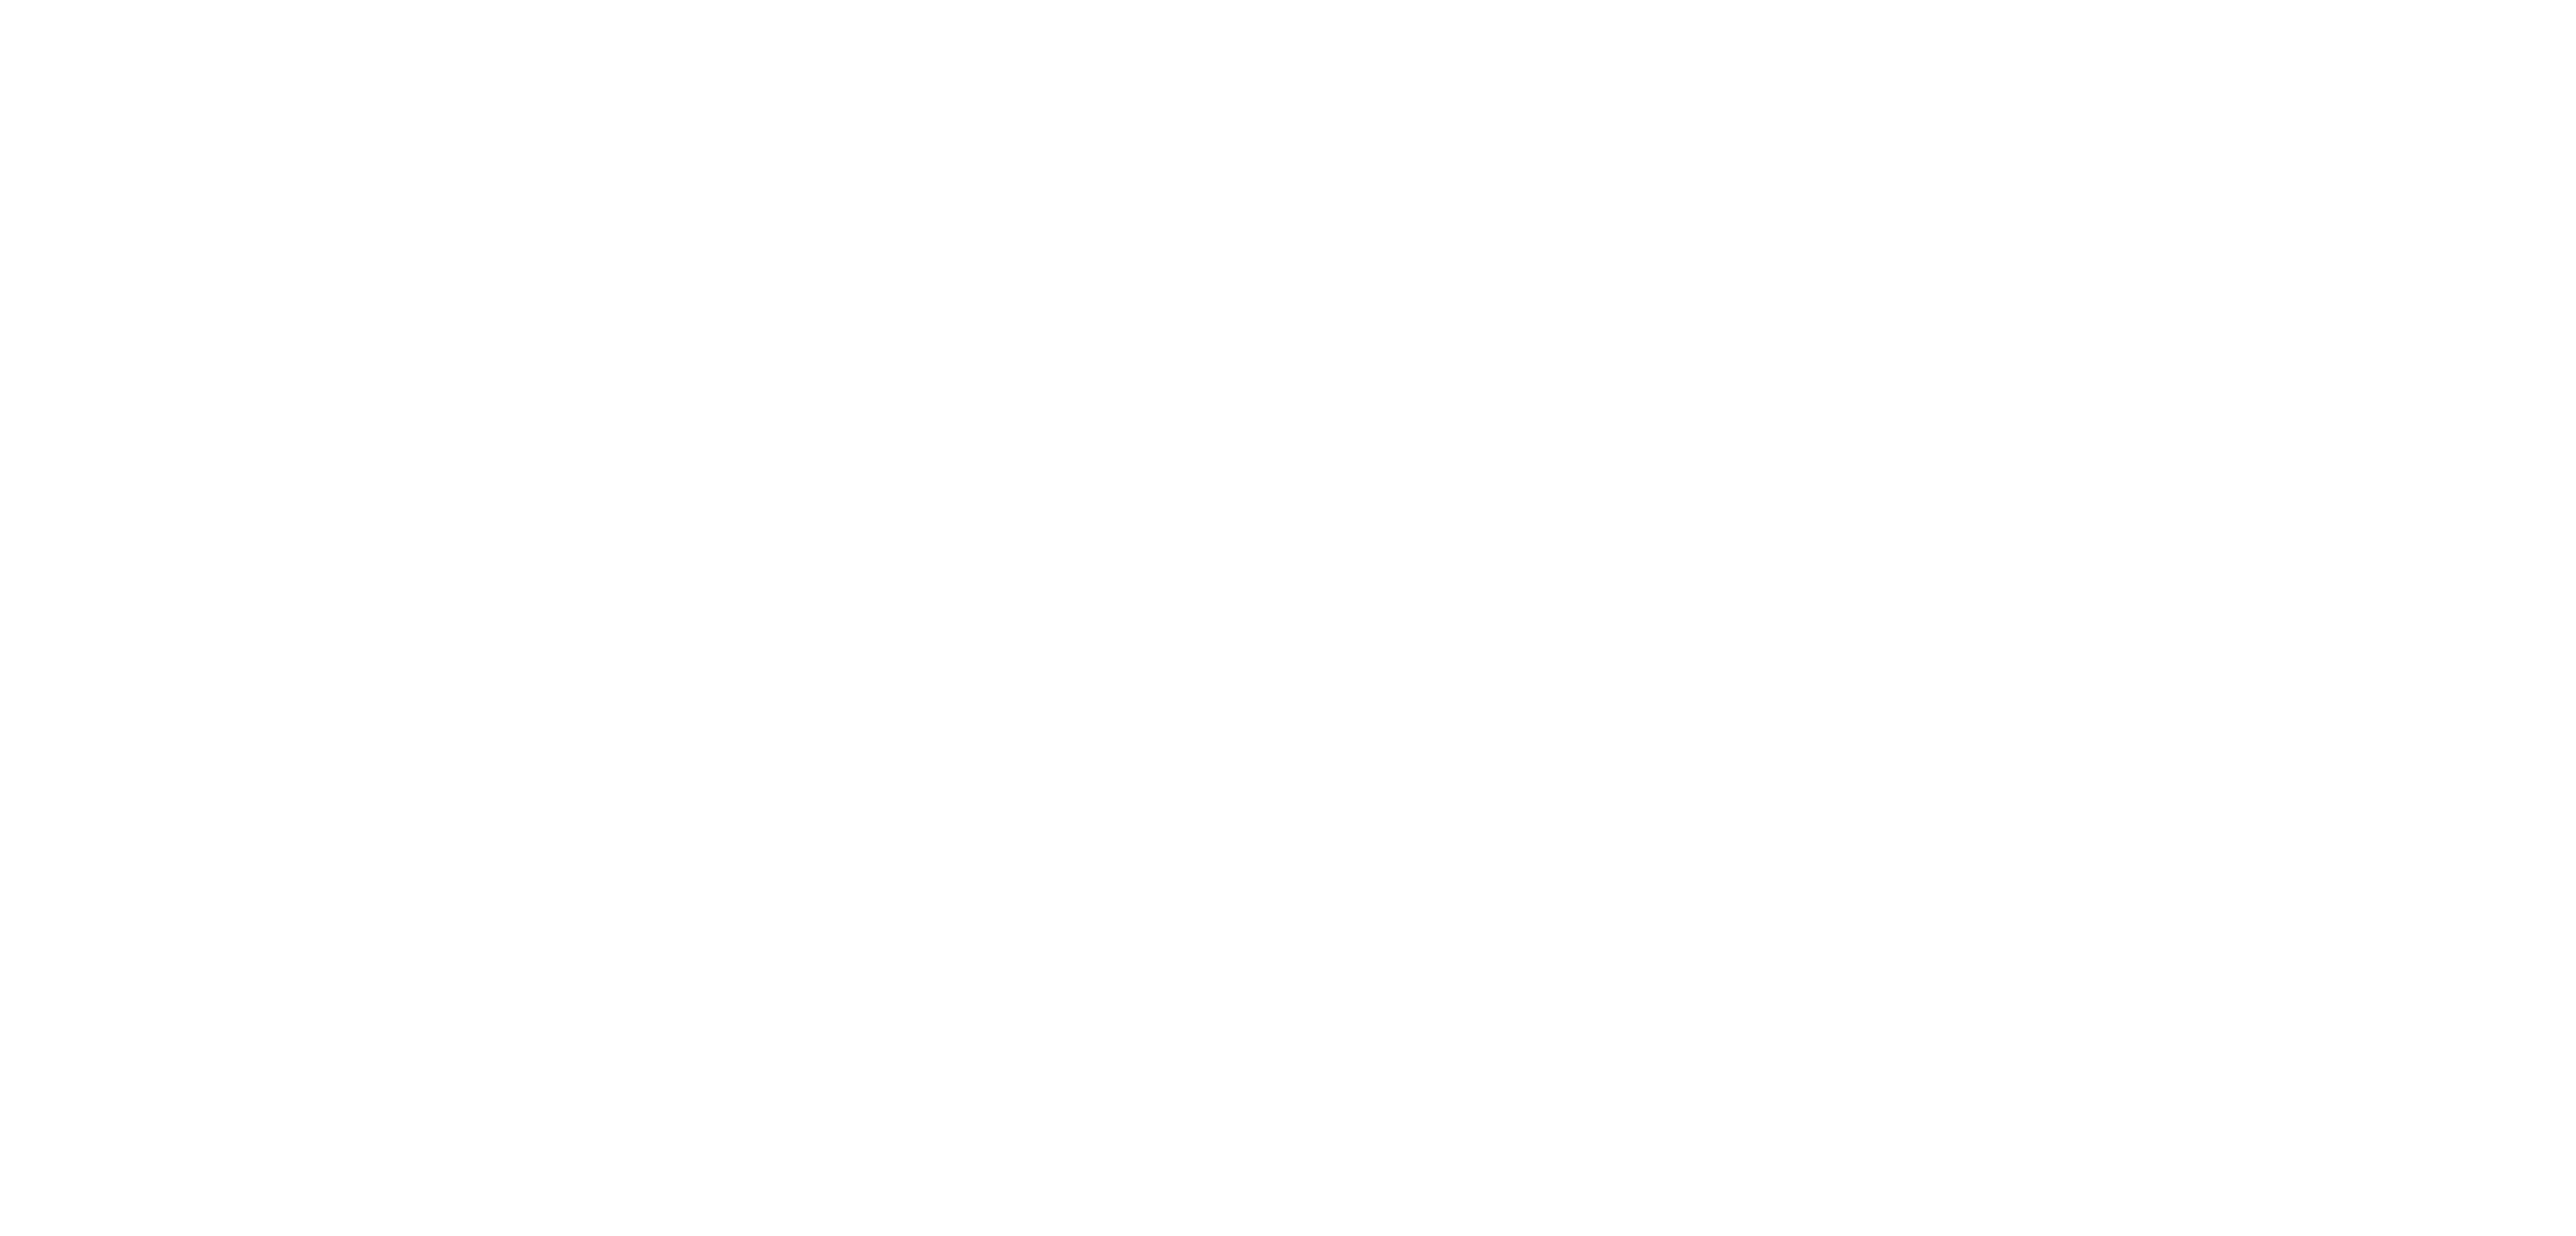

<IPython.core.display.Javascript object>


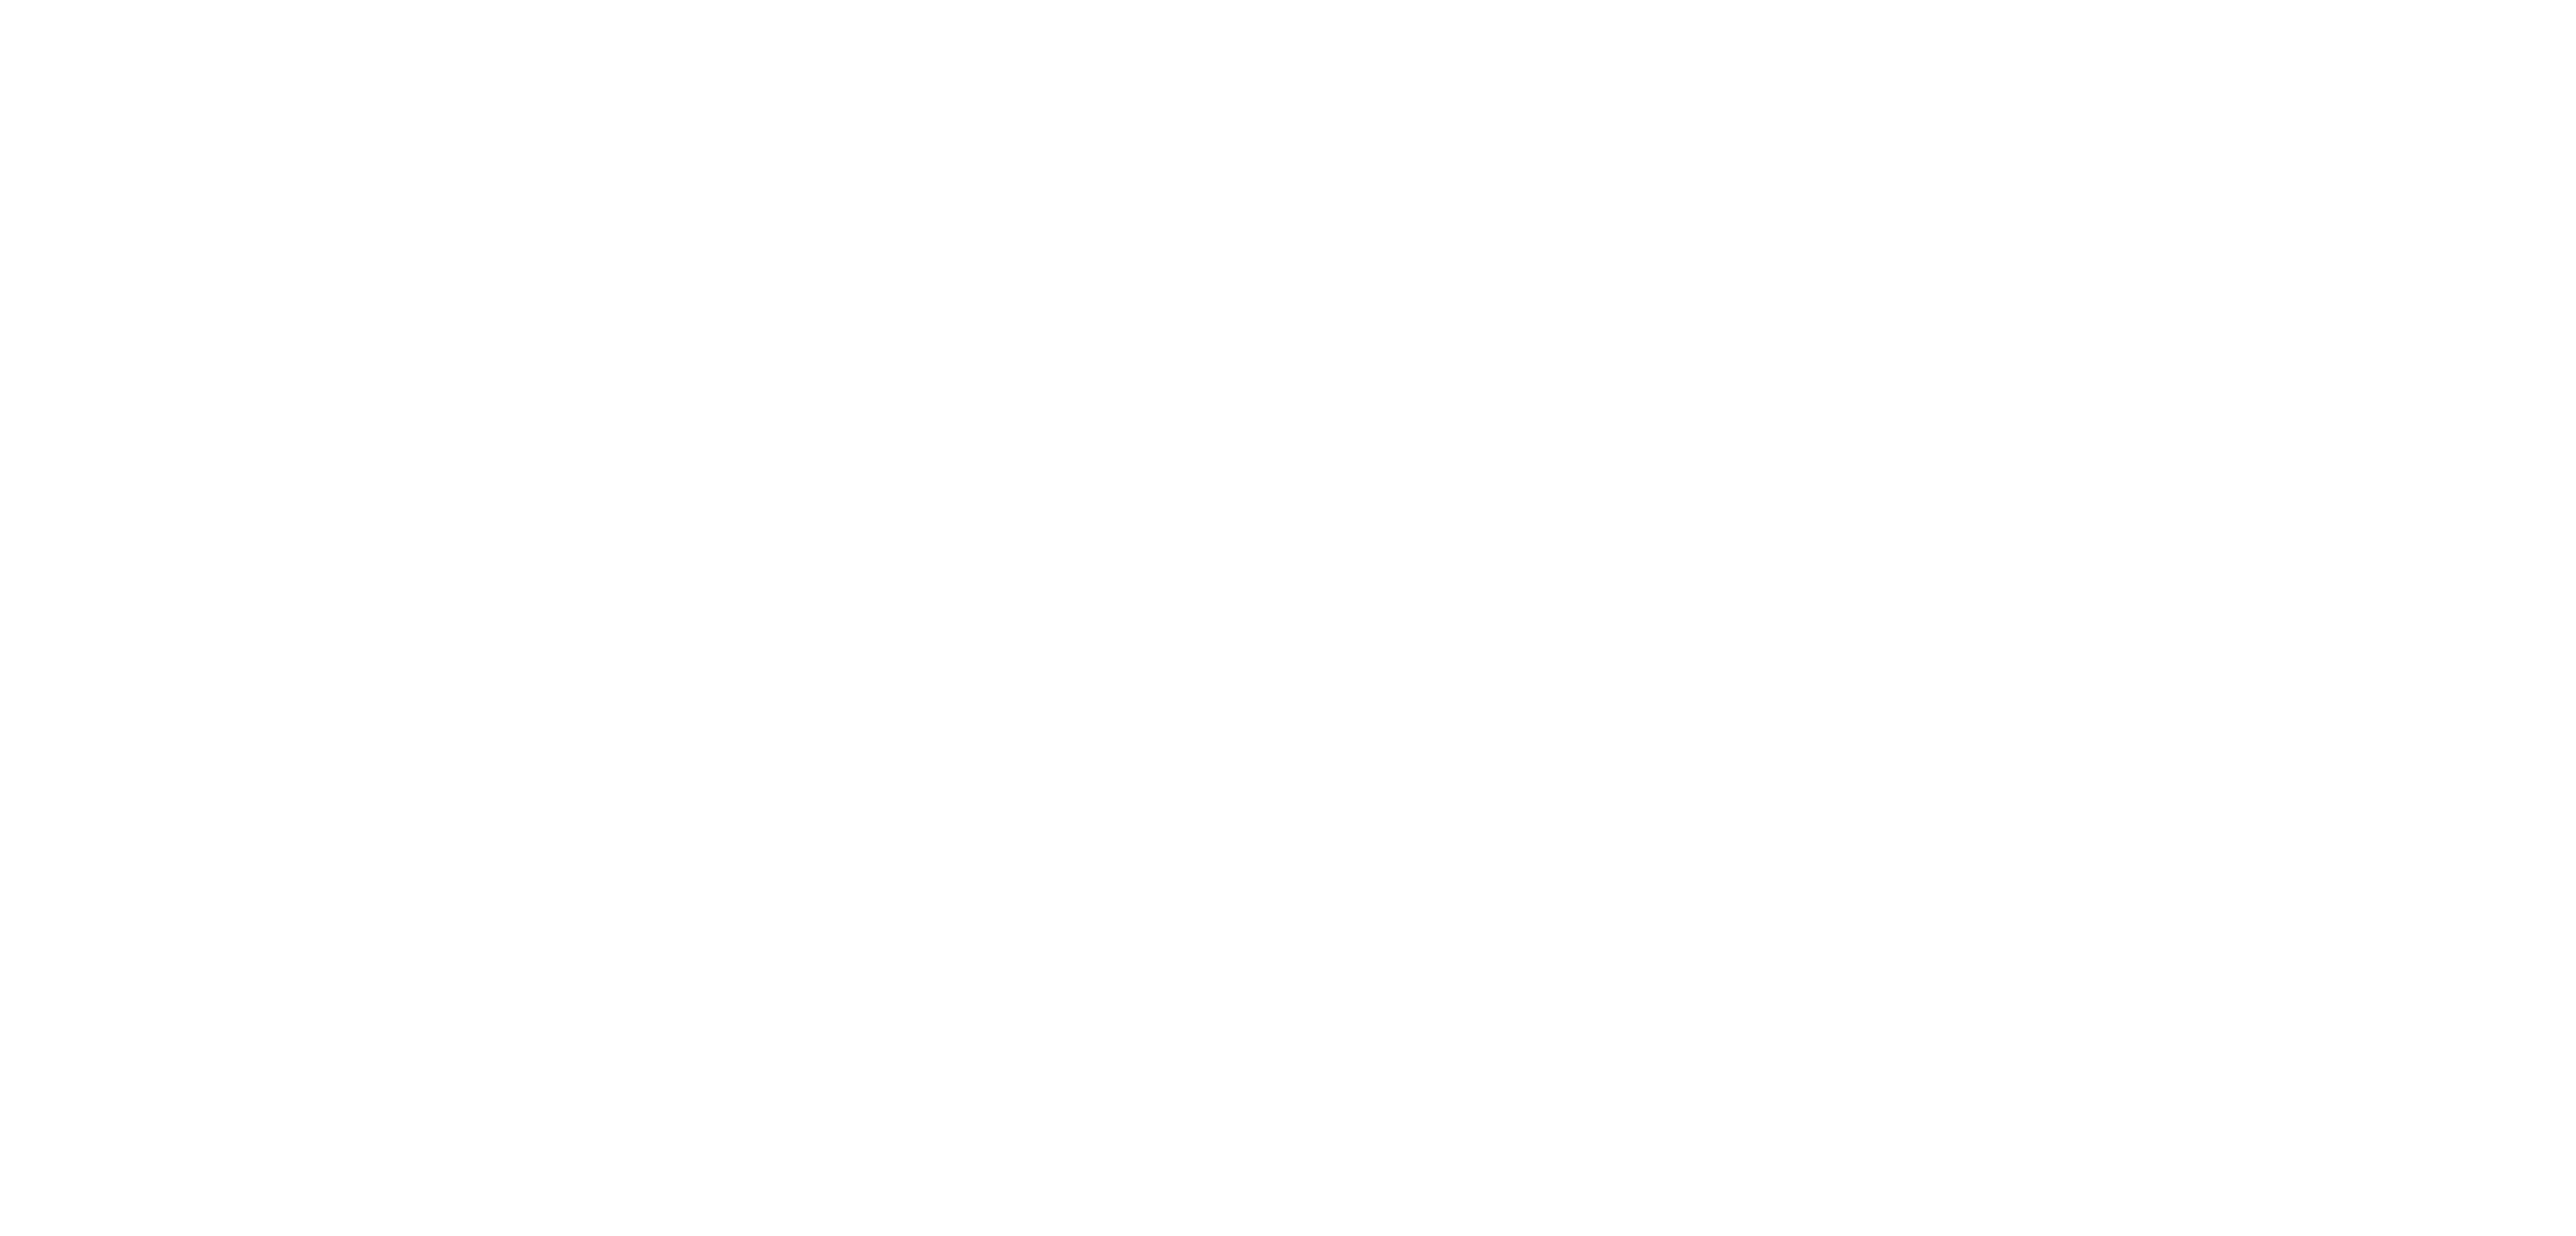

<IPython.core.display.Javascript object>


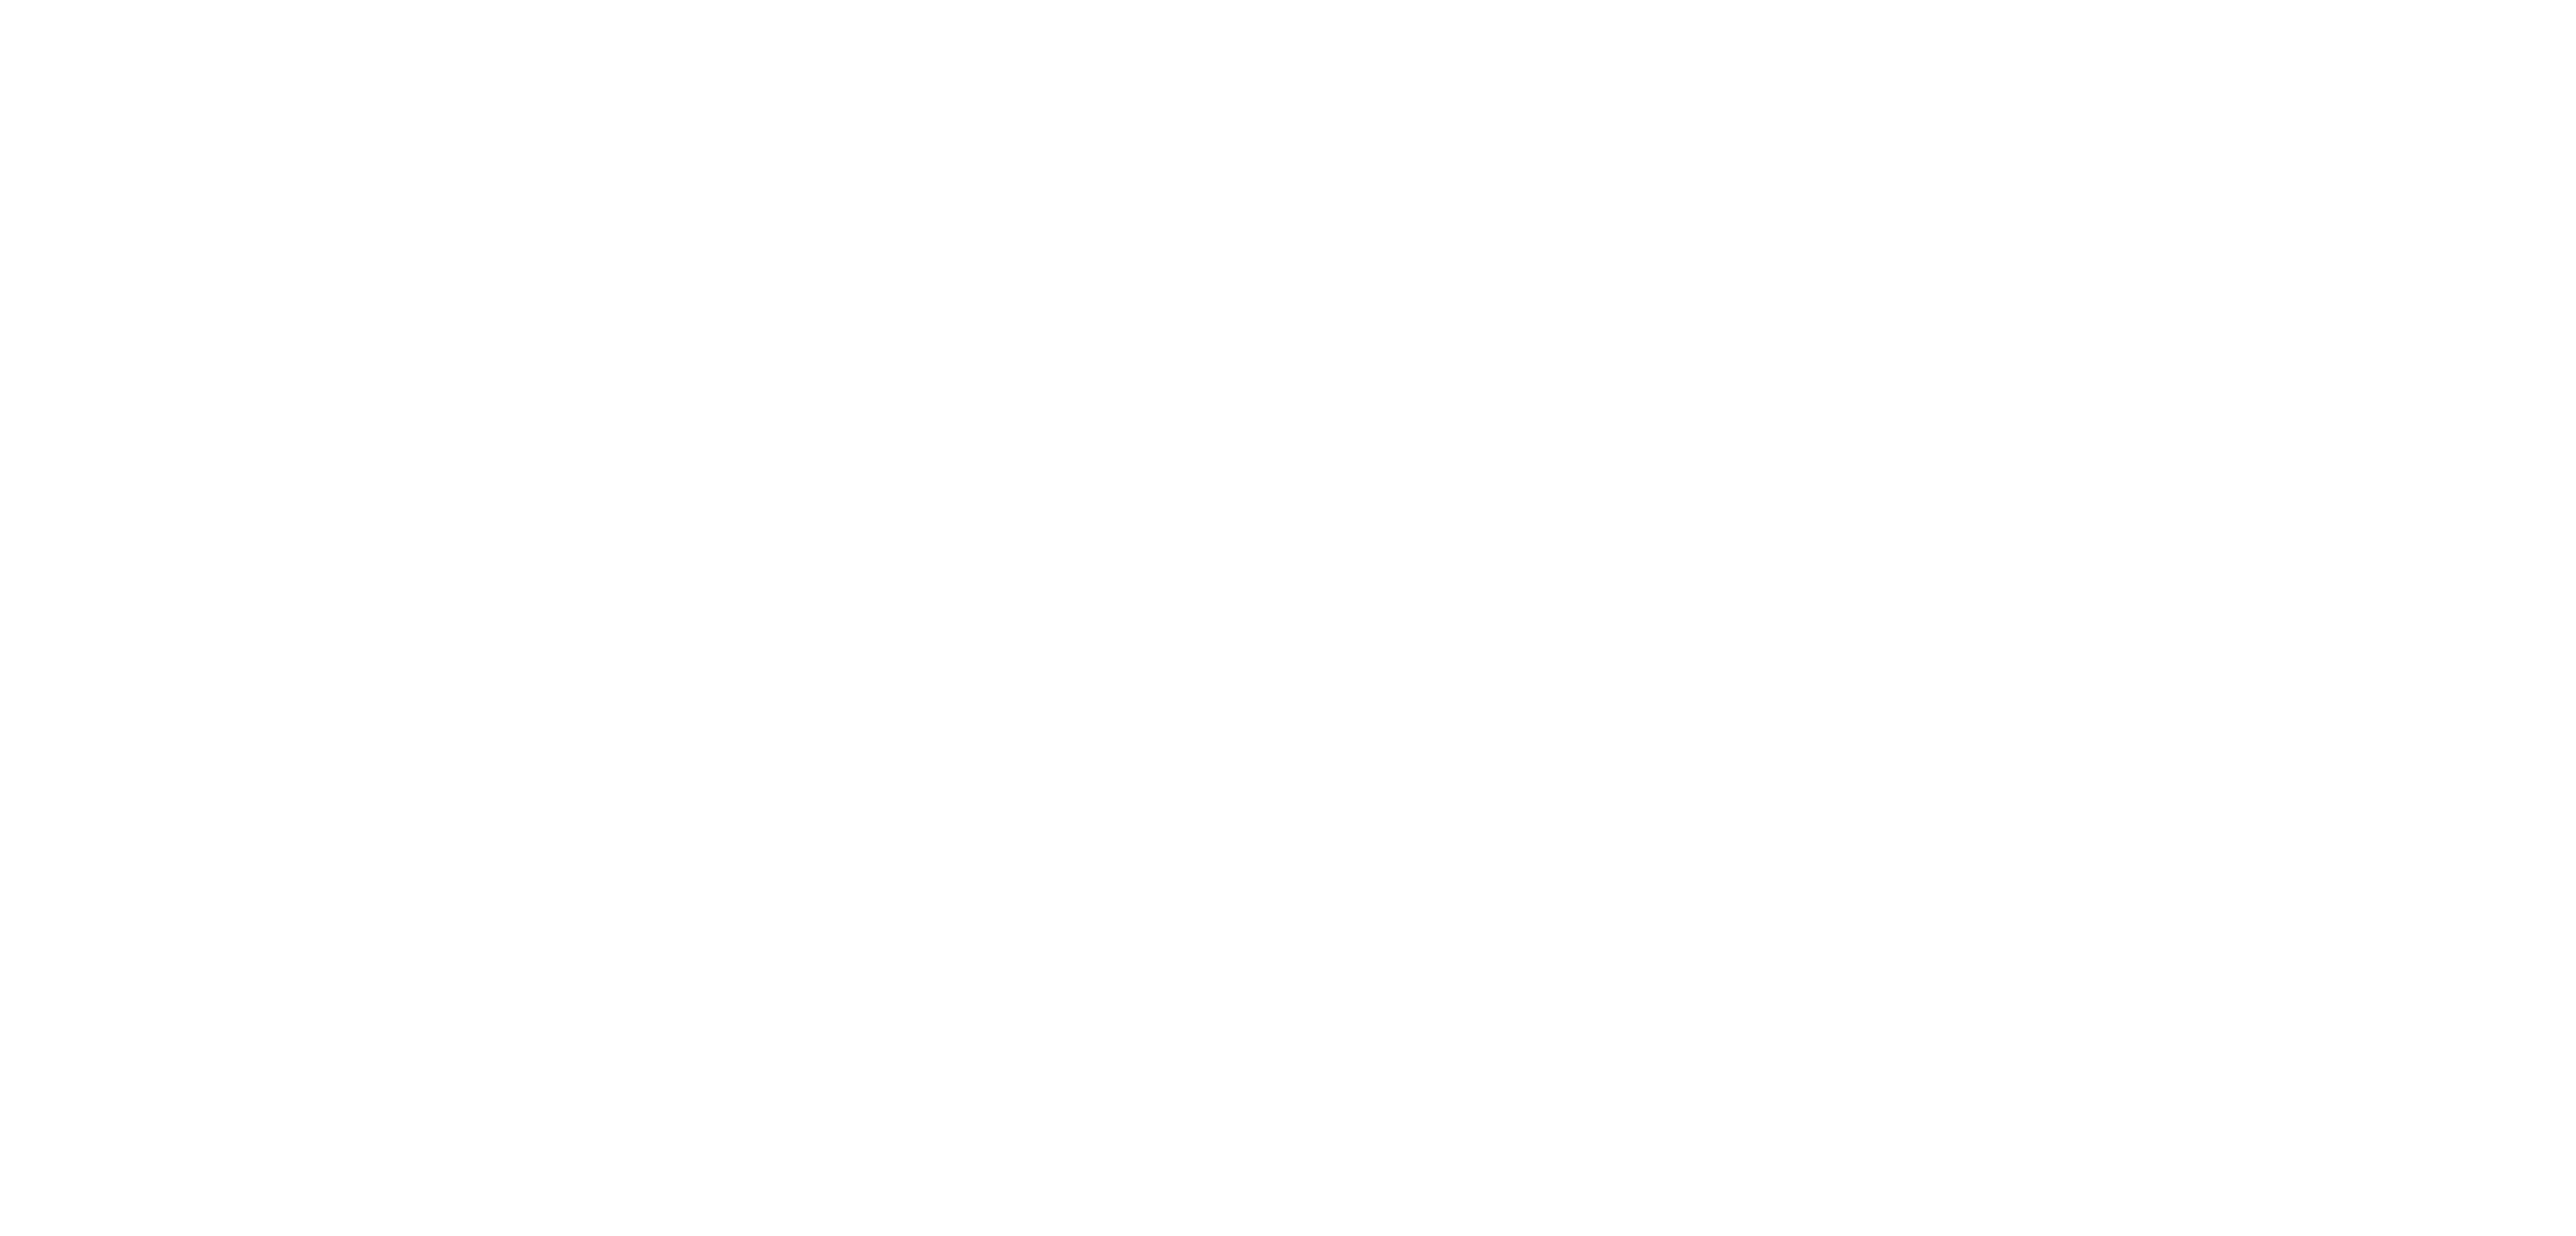

<IPython.core.display.Javascript object>


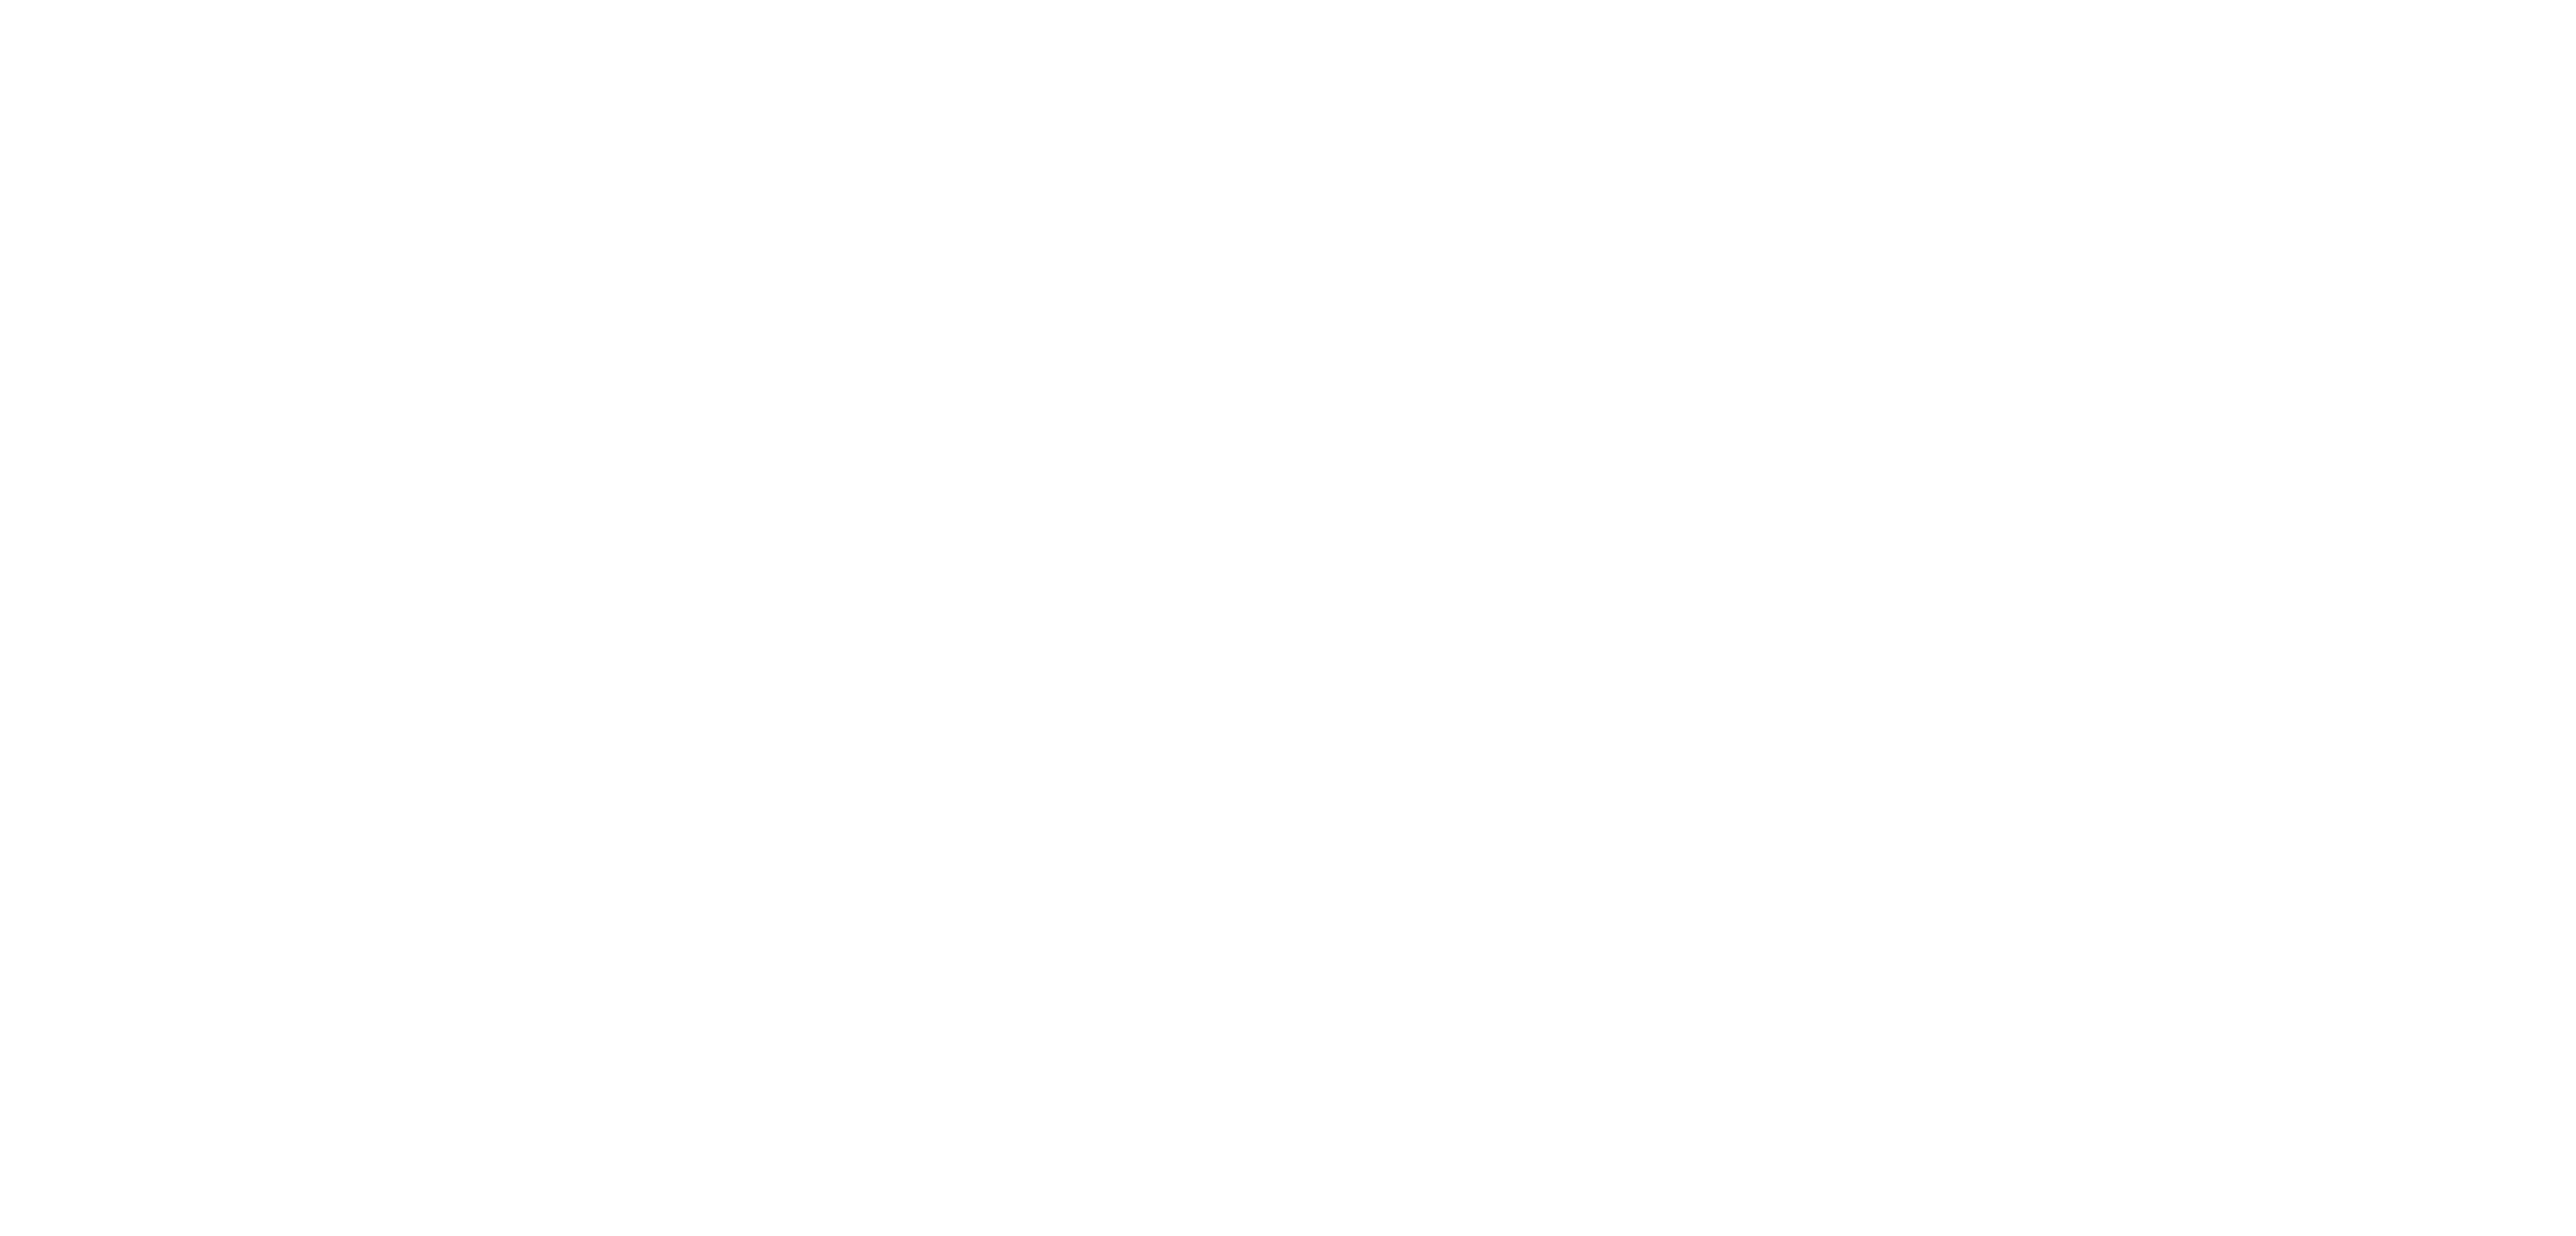

<IPython.core.display.Javascript object>


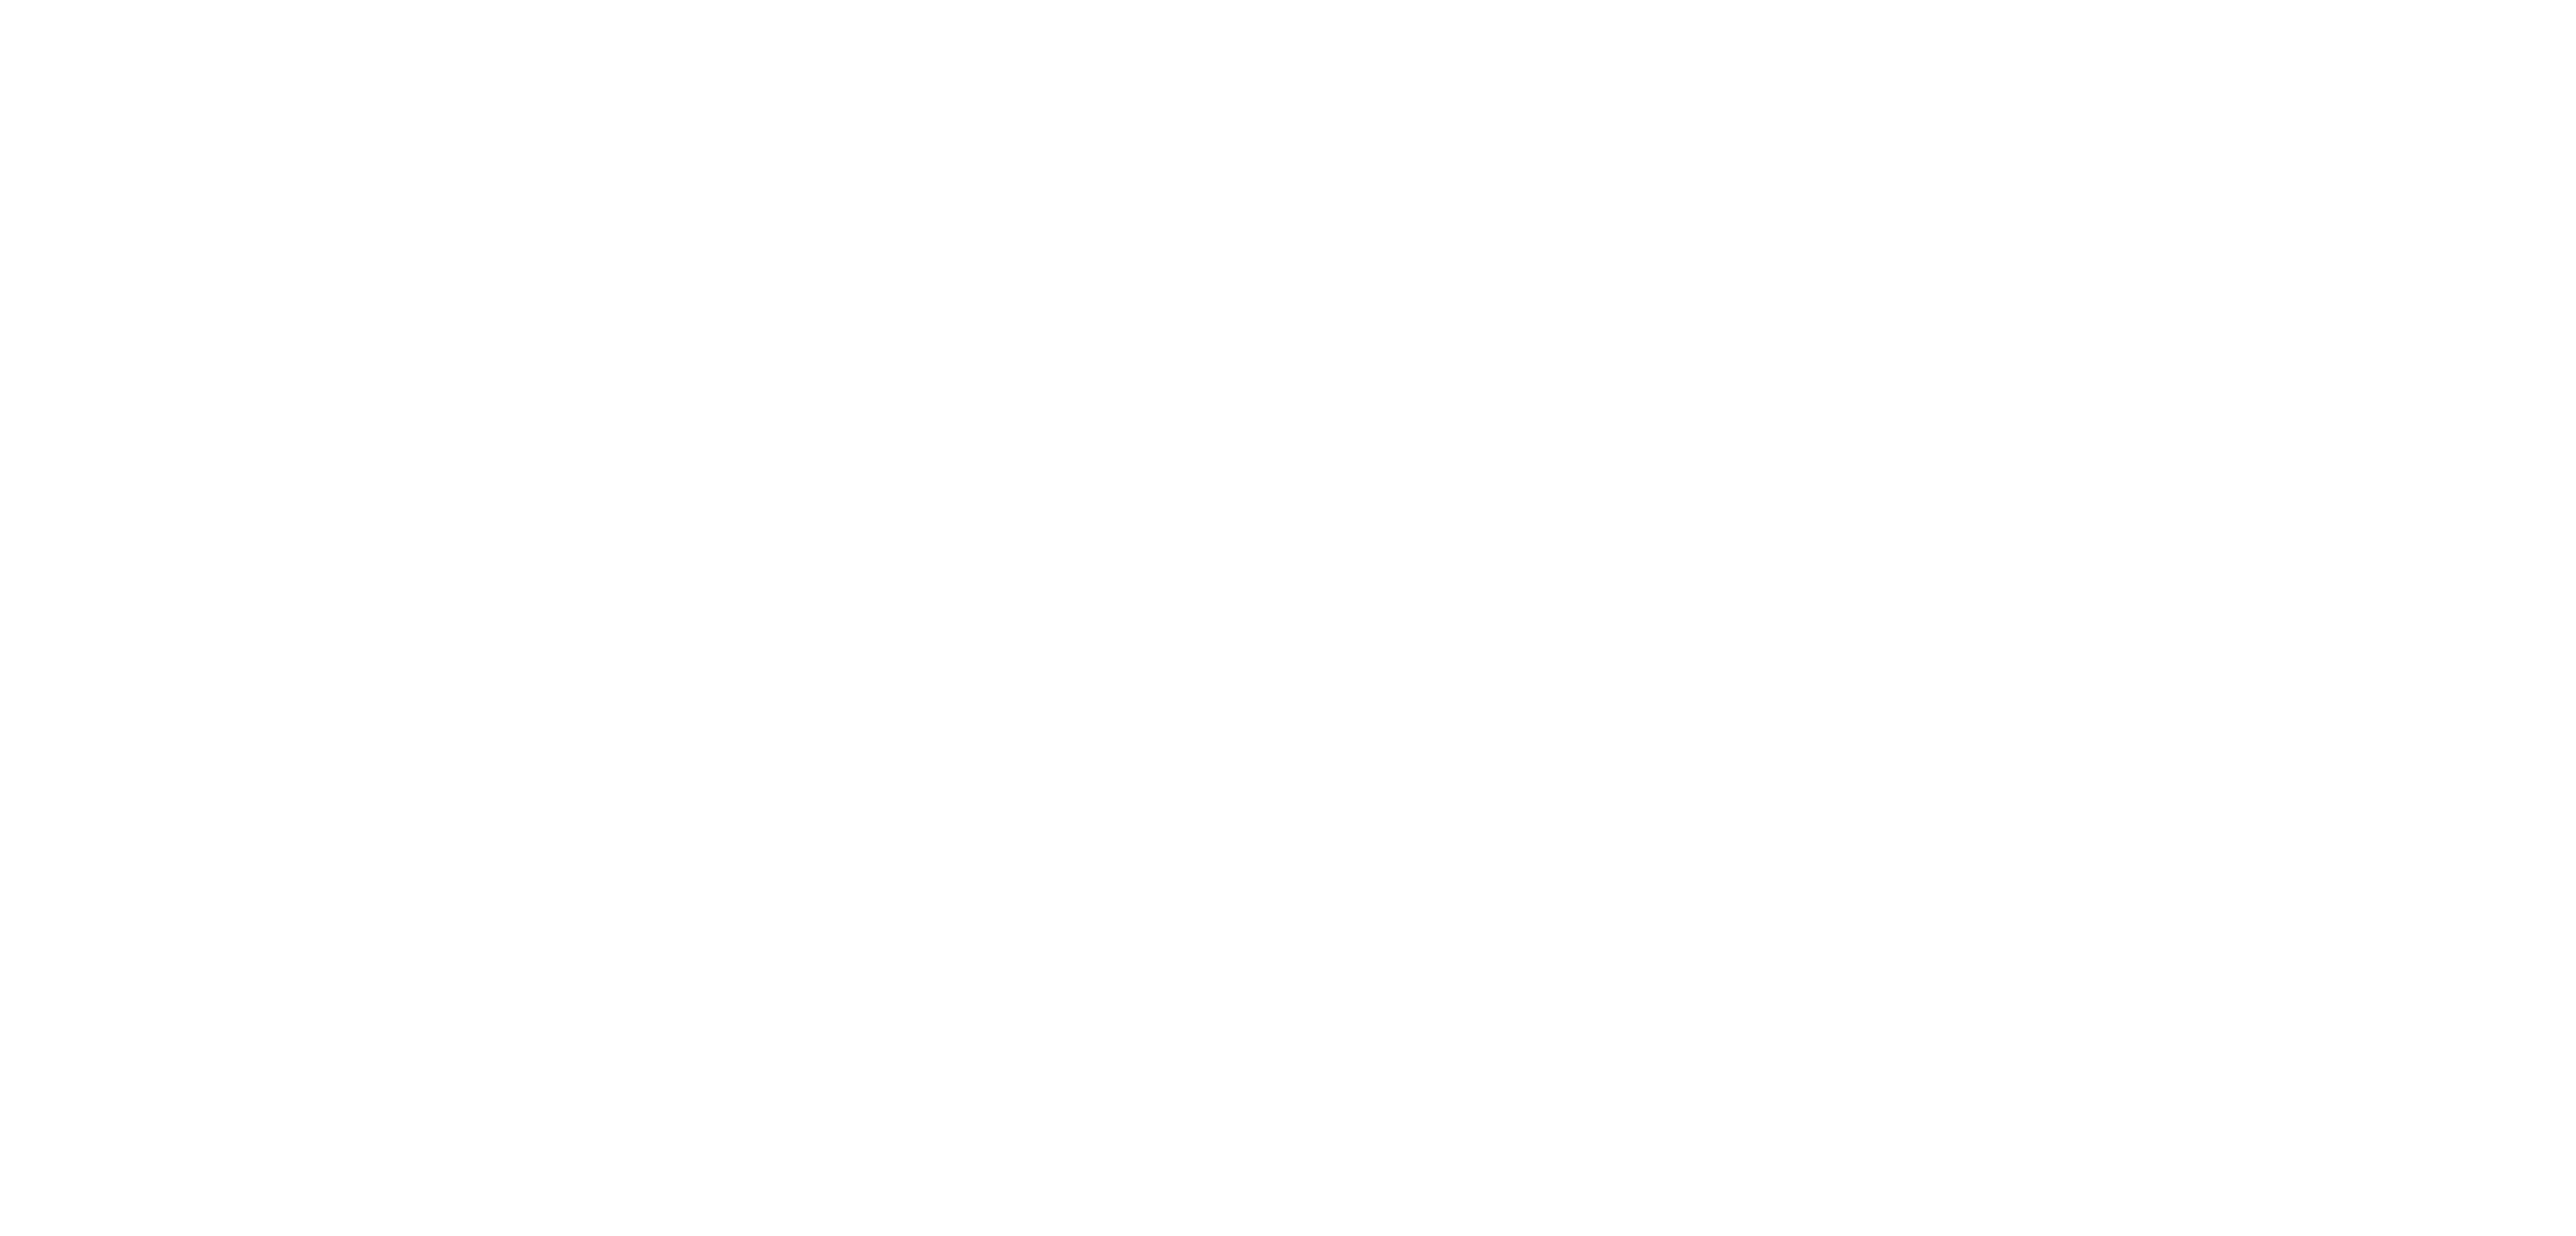

<IPython.core.display.Javascript object>


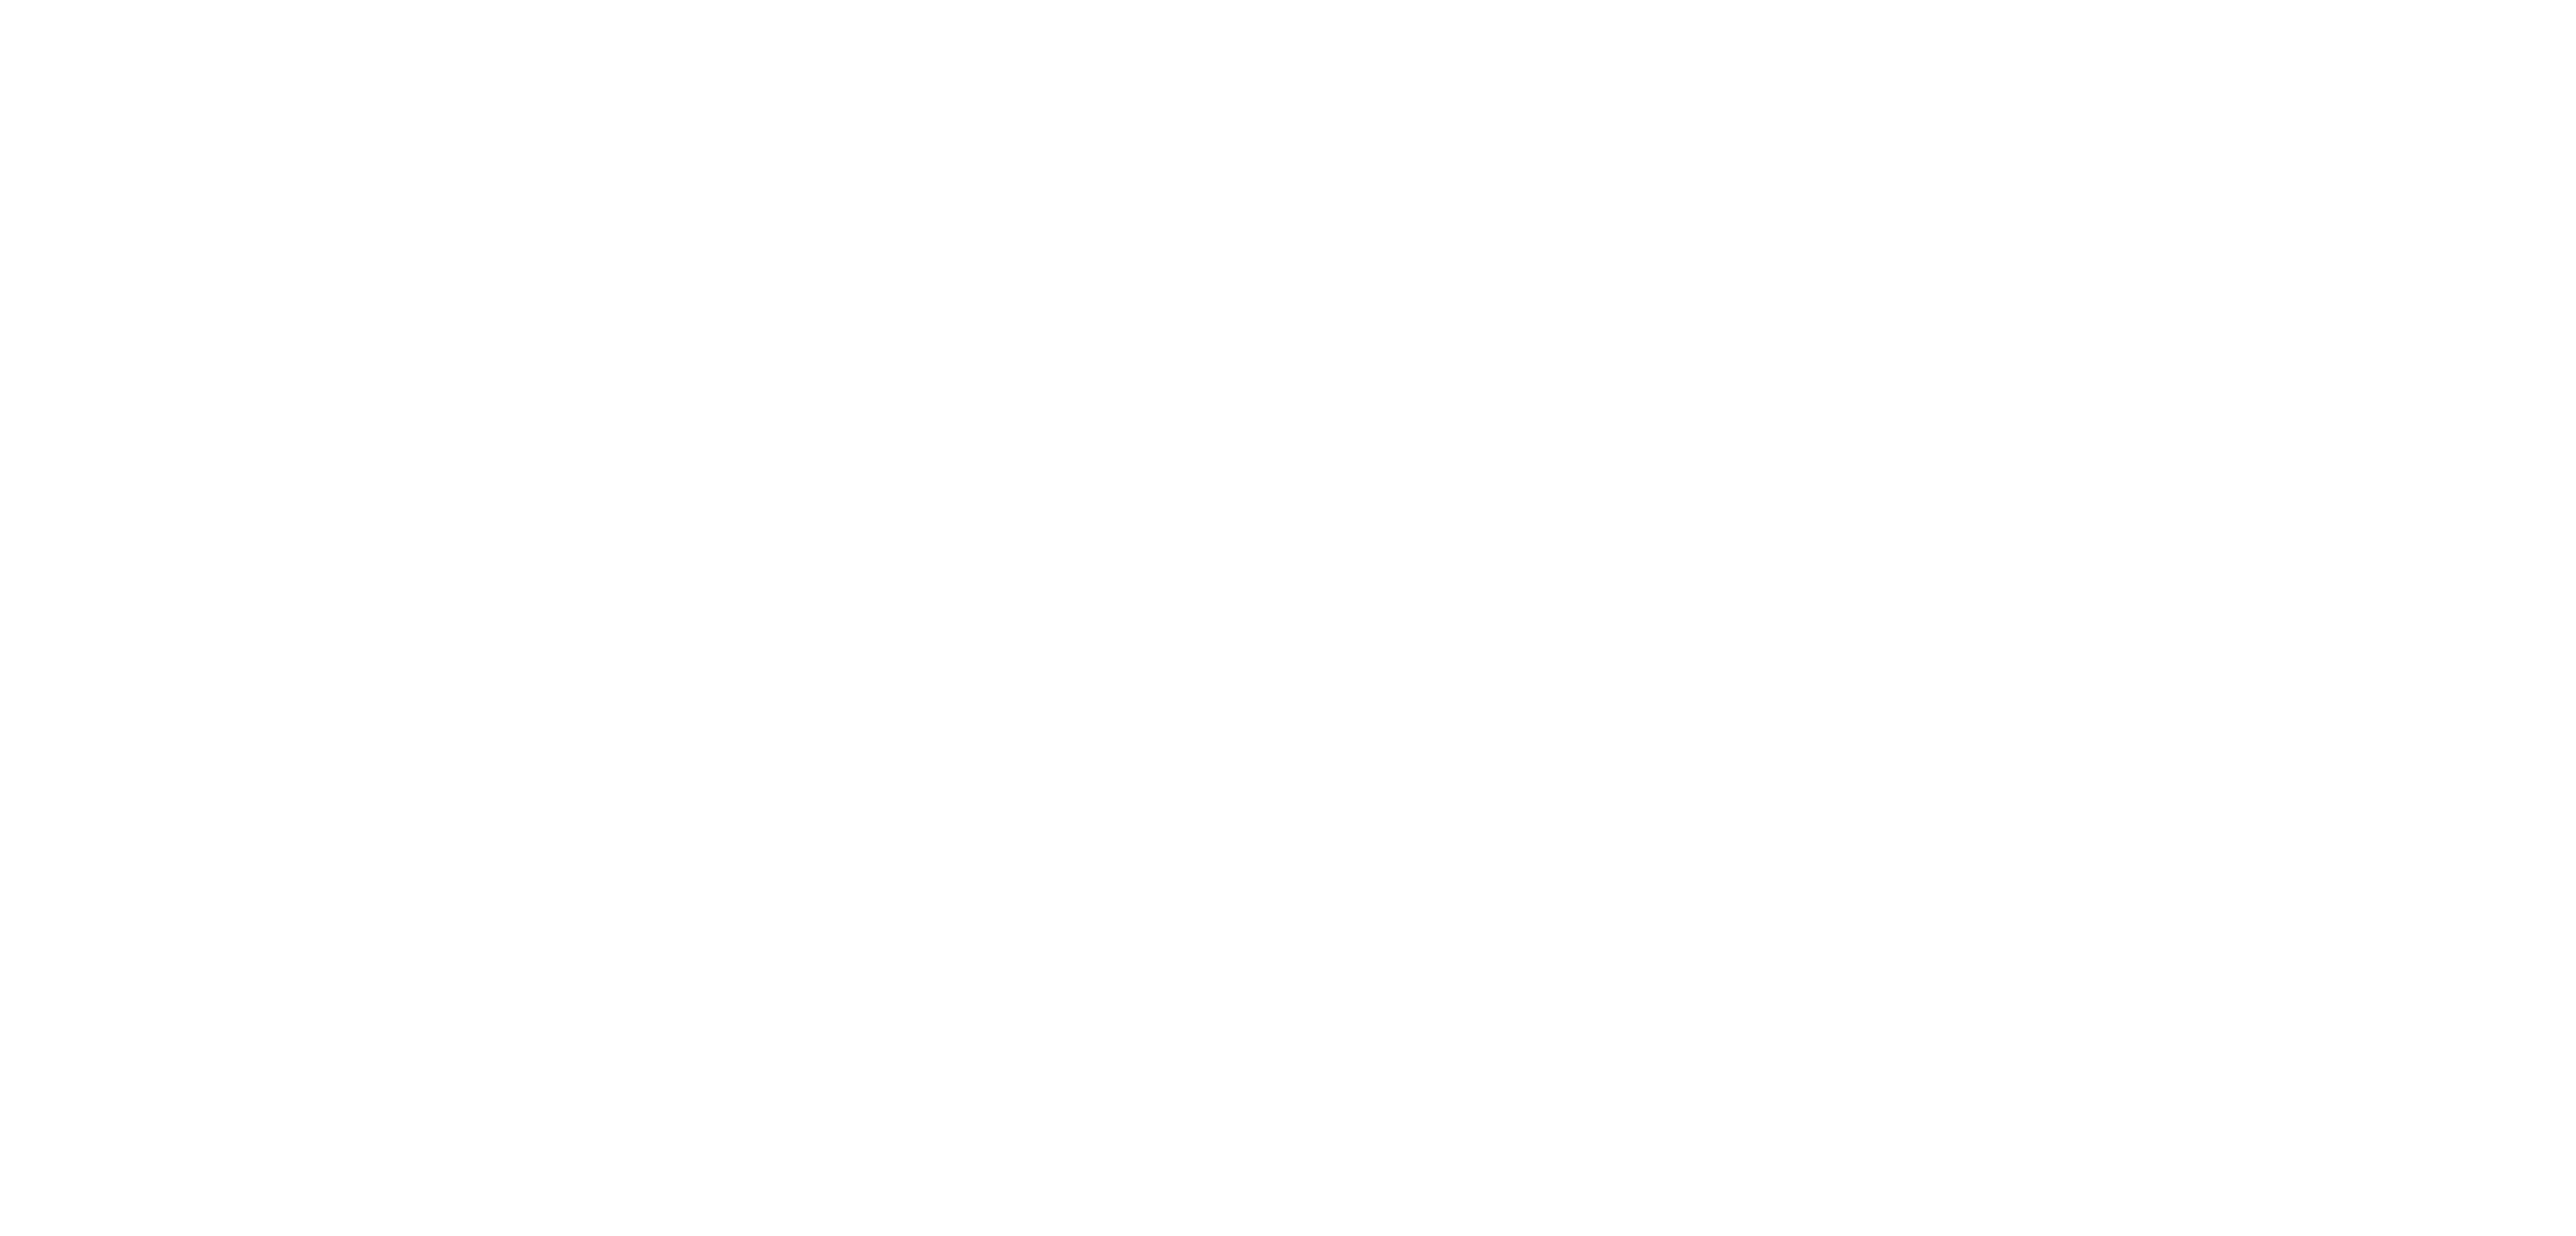

<IPython.core.display.Javascript object>


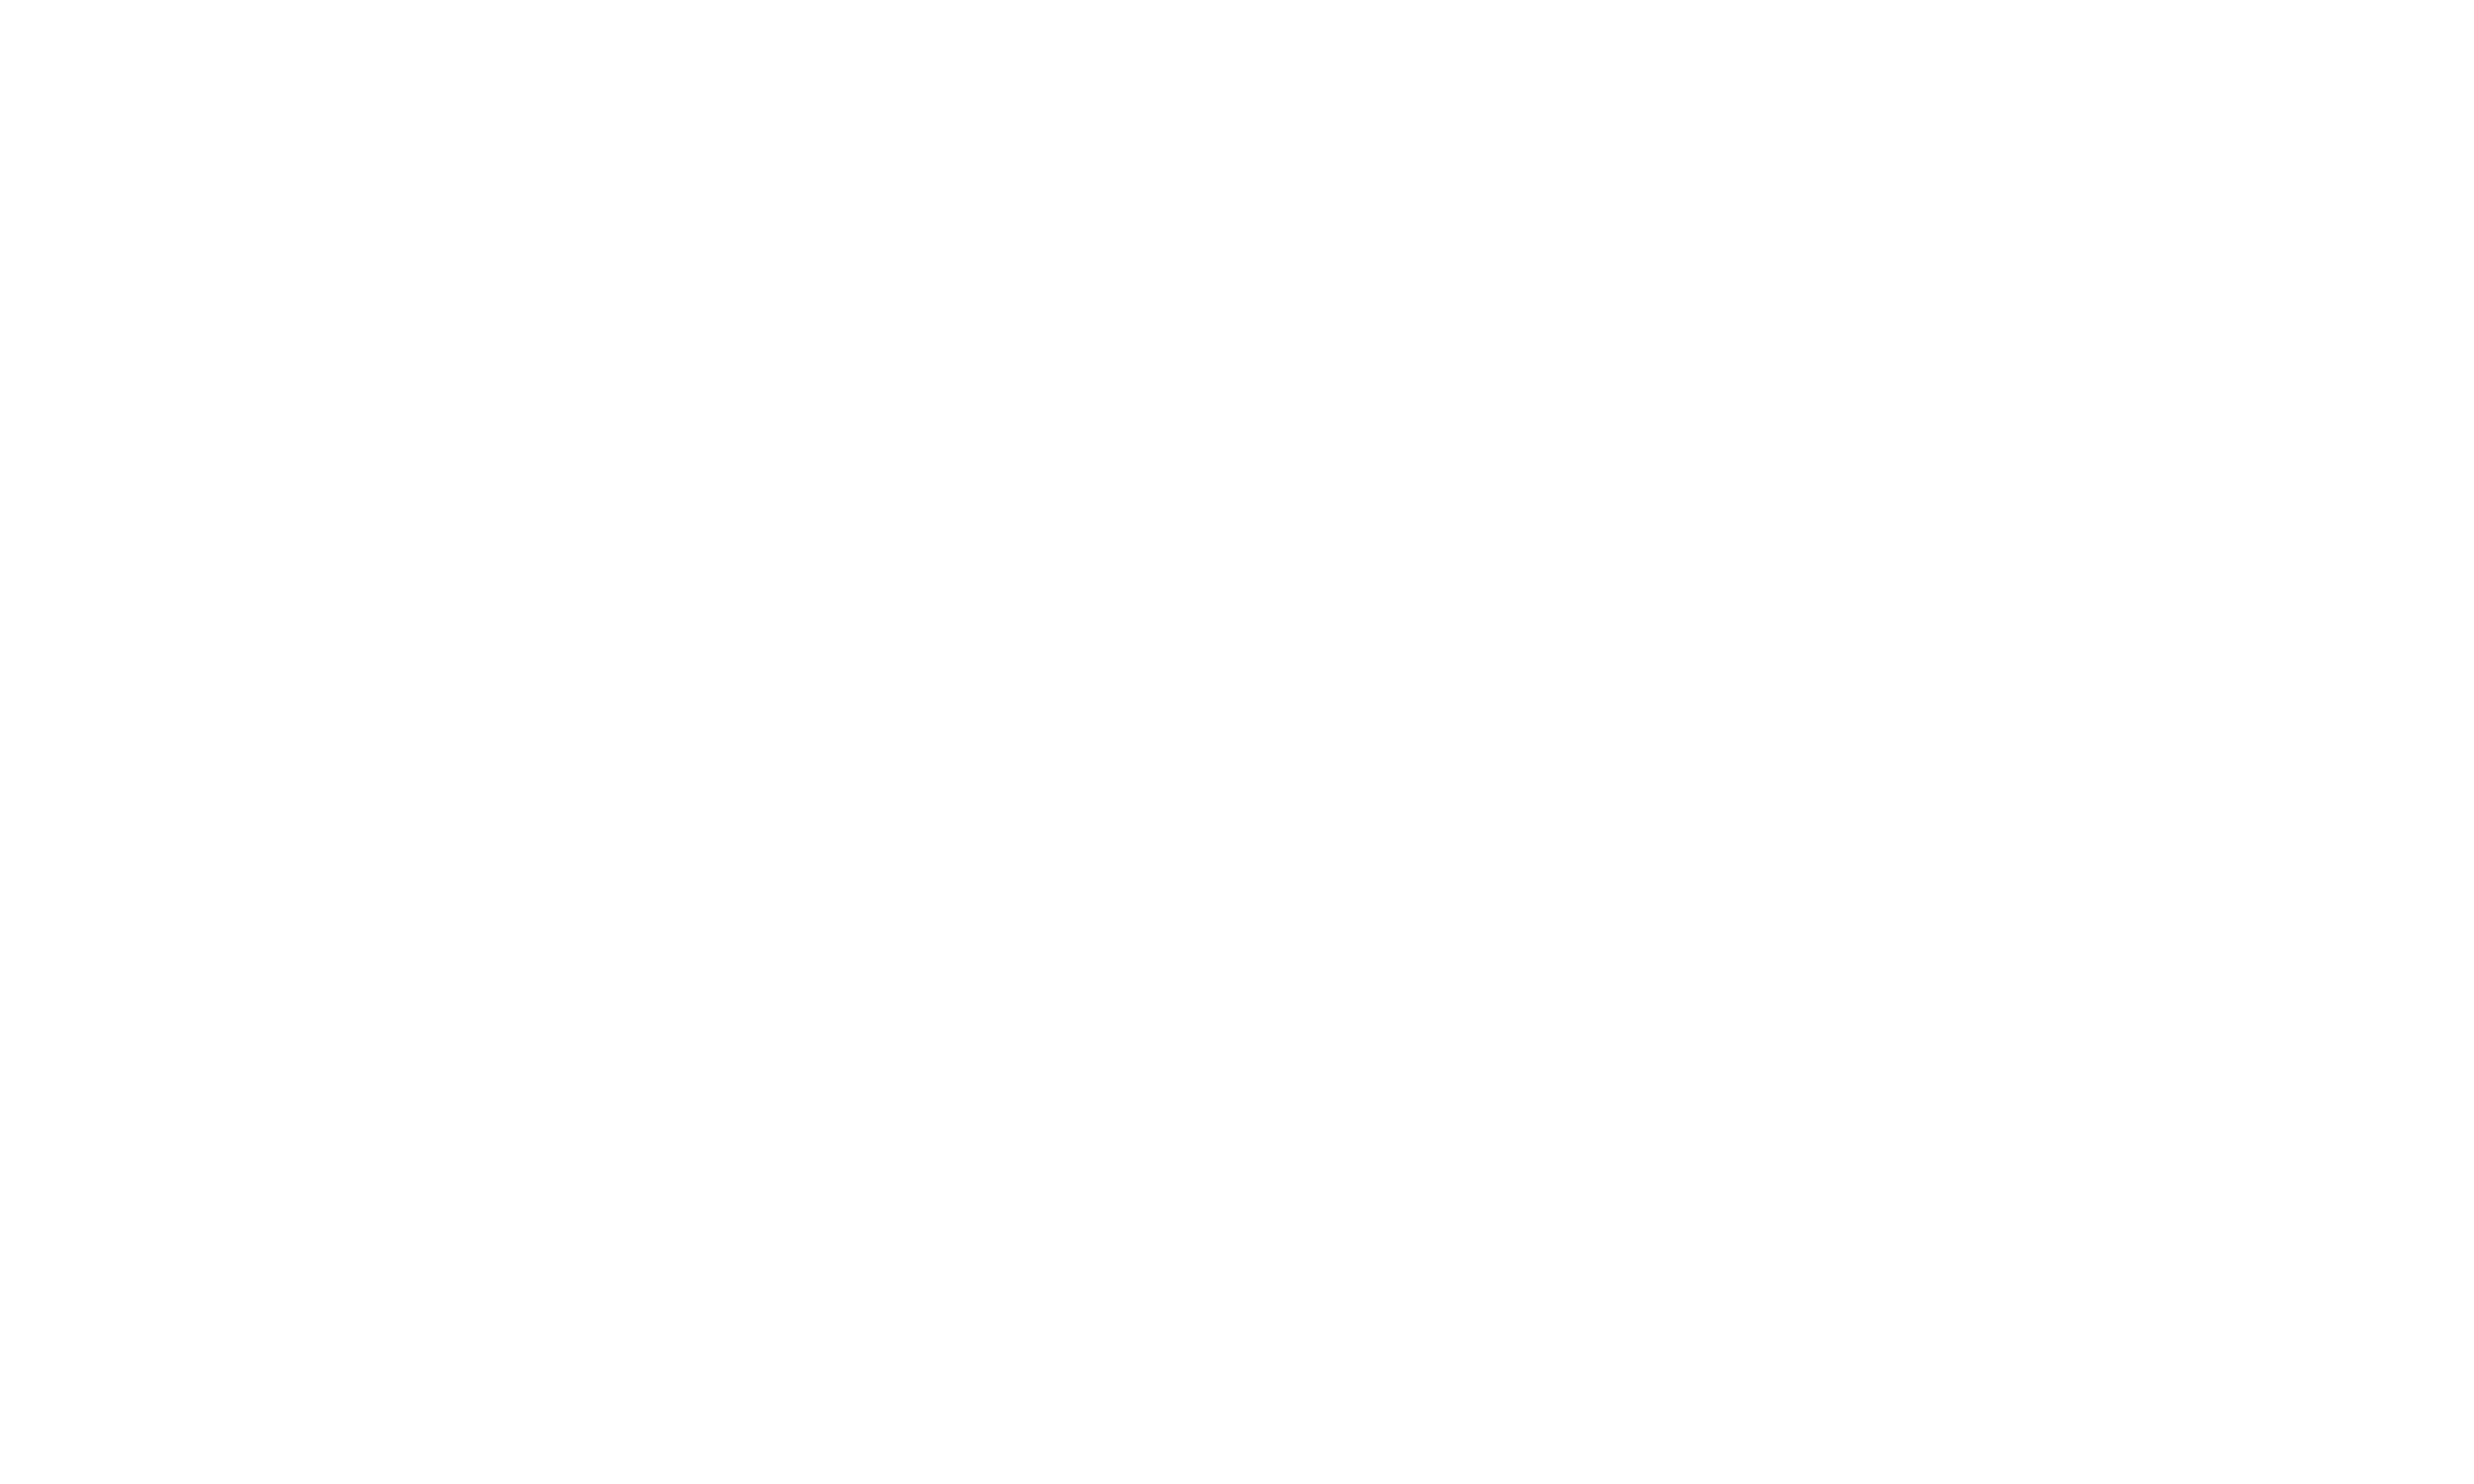

<IPython.core.display.Javascript object>


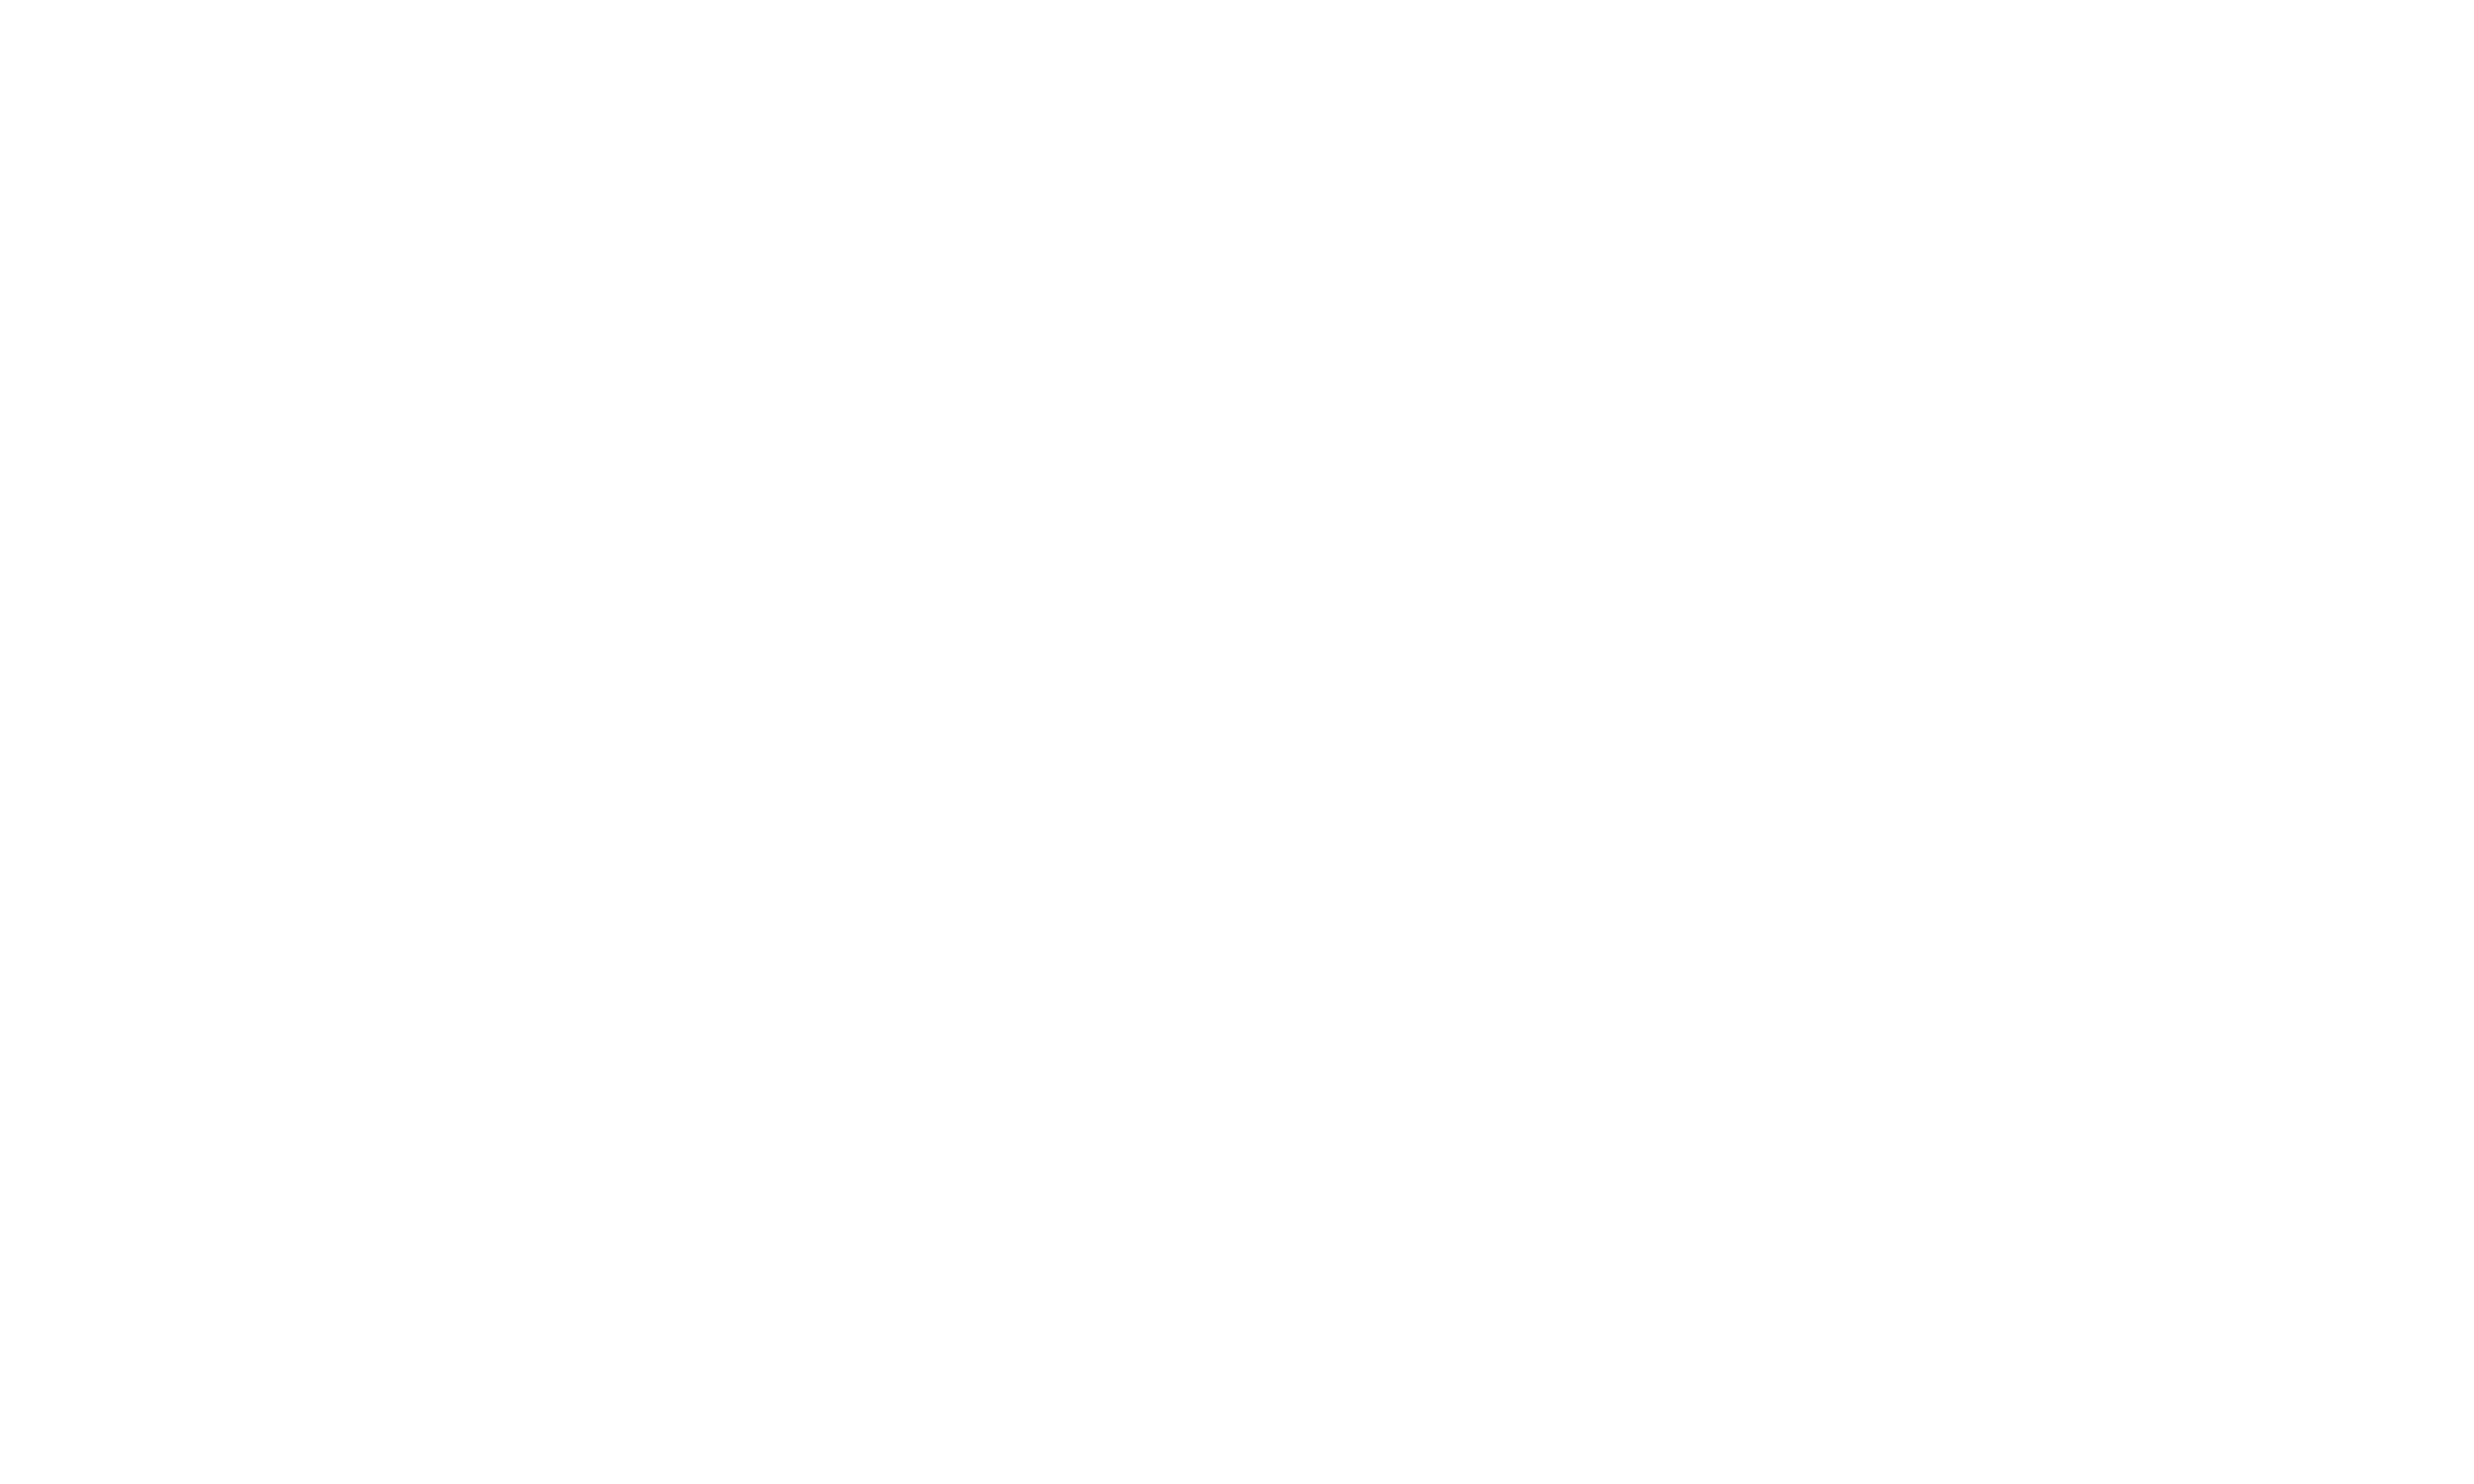

<IPython.core.display.Javascript object>


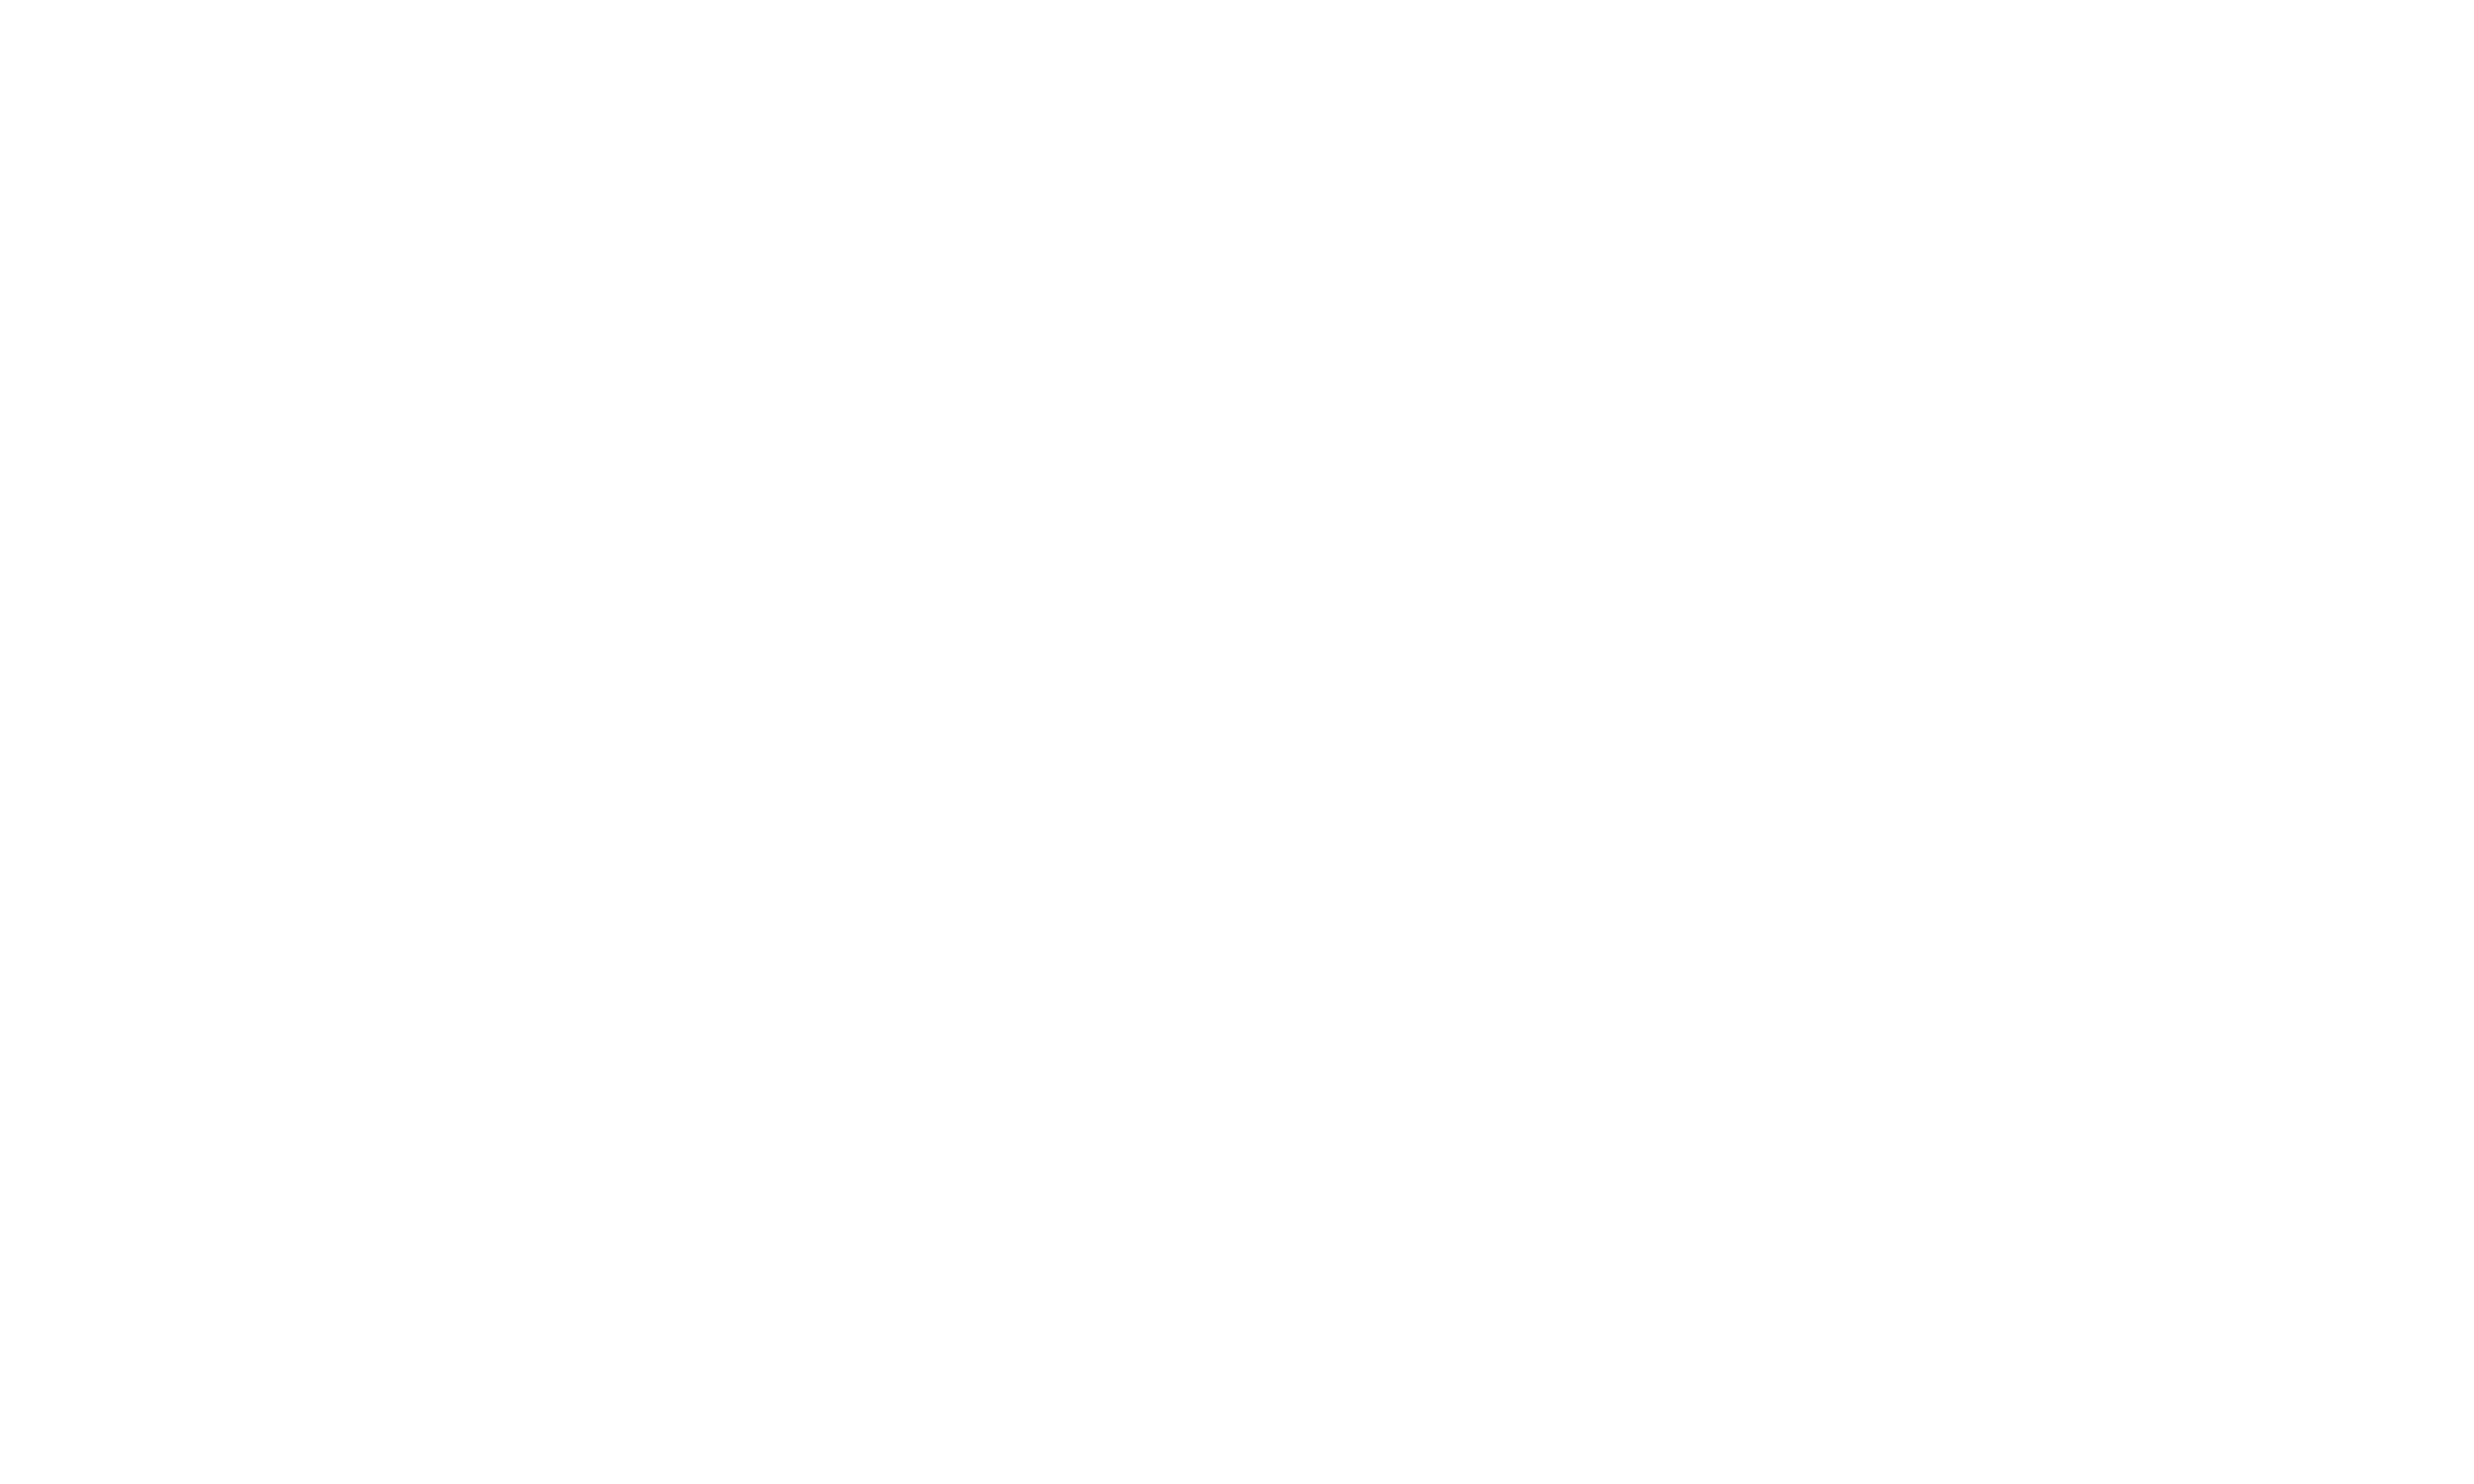

<IPython.core.display.Javascript object>


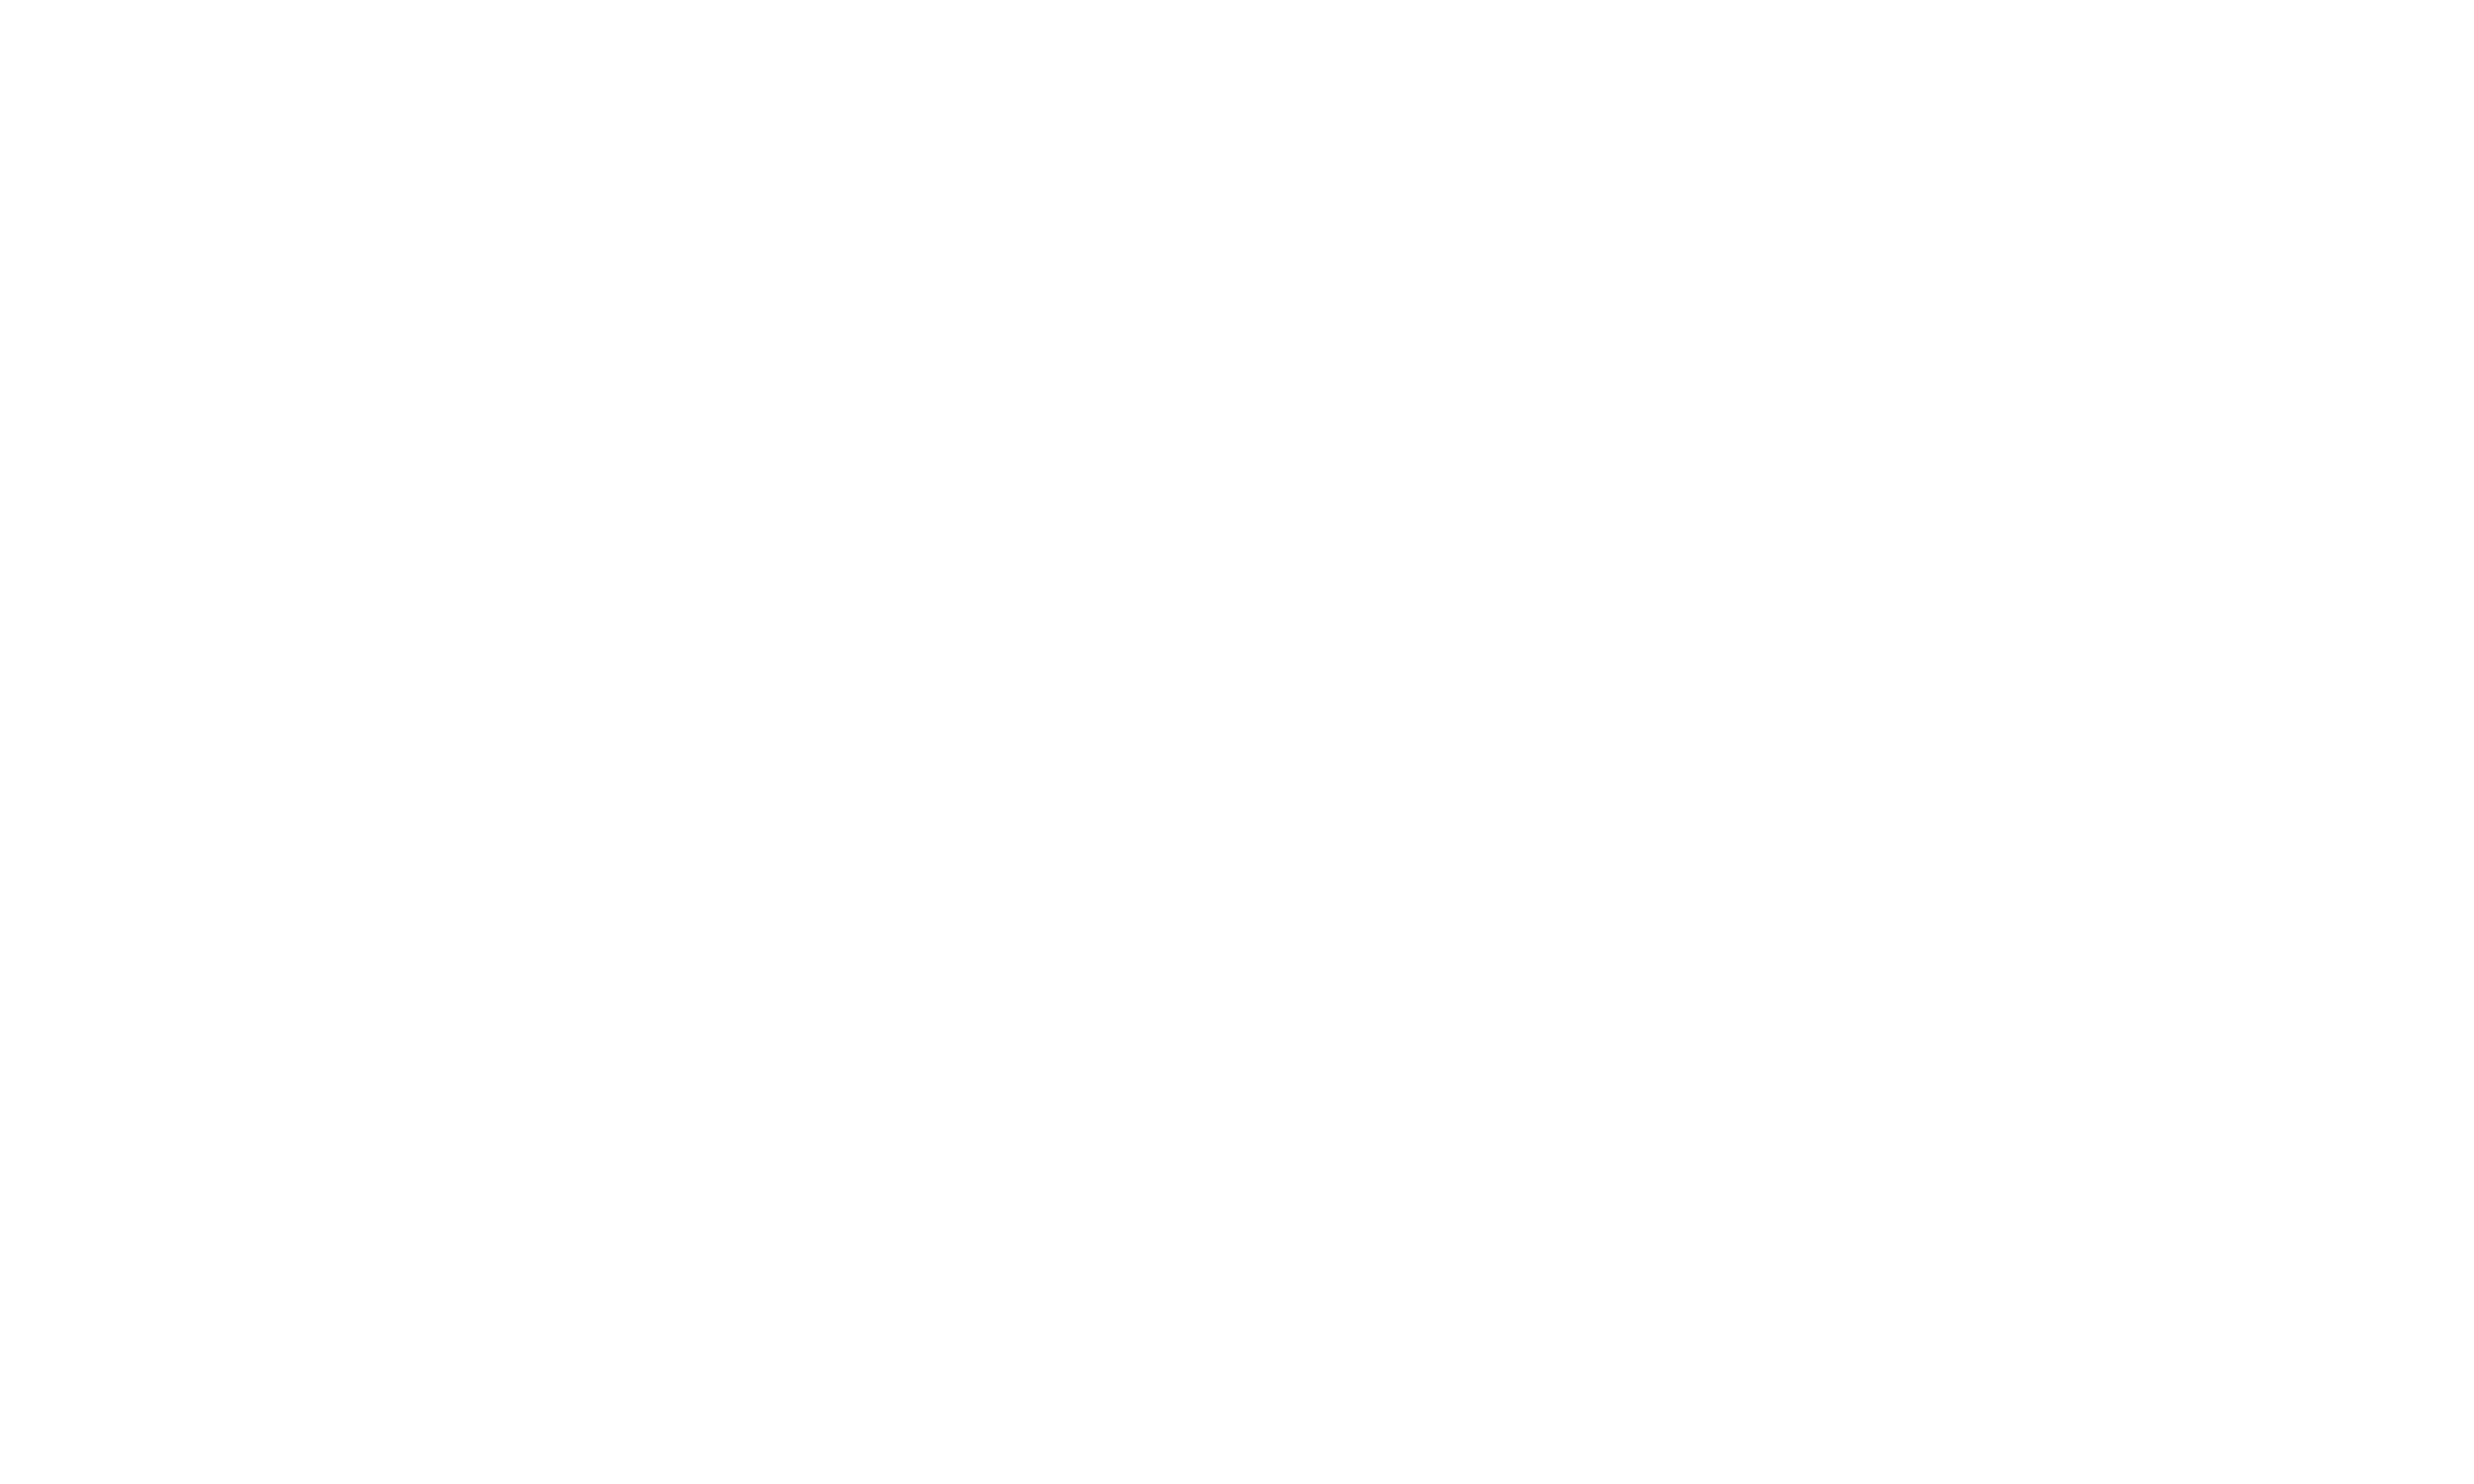

<IPython.core.display.Javascript object>


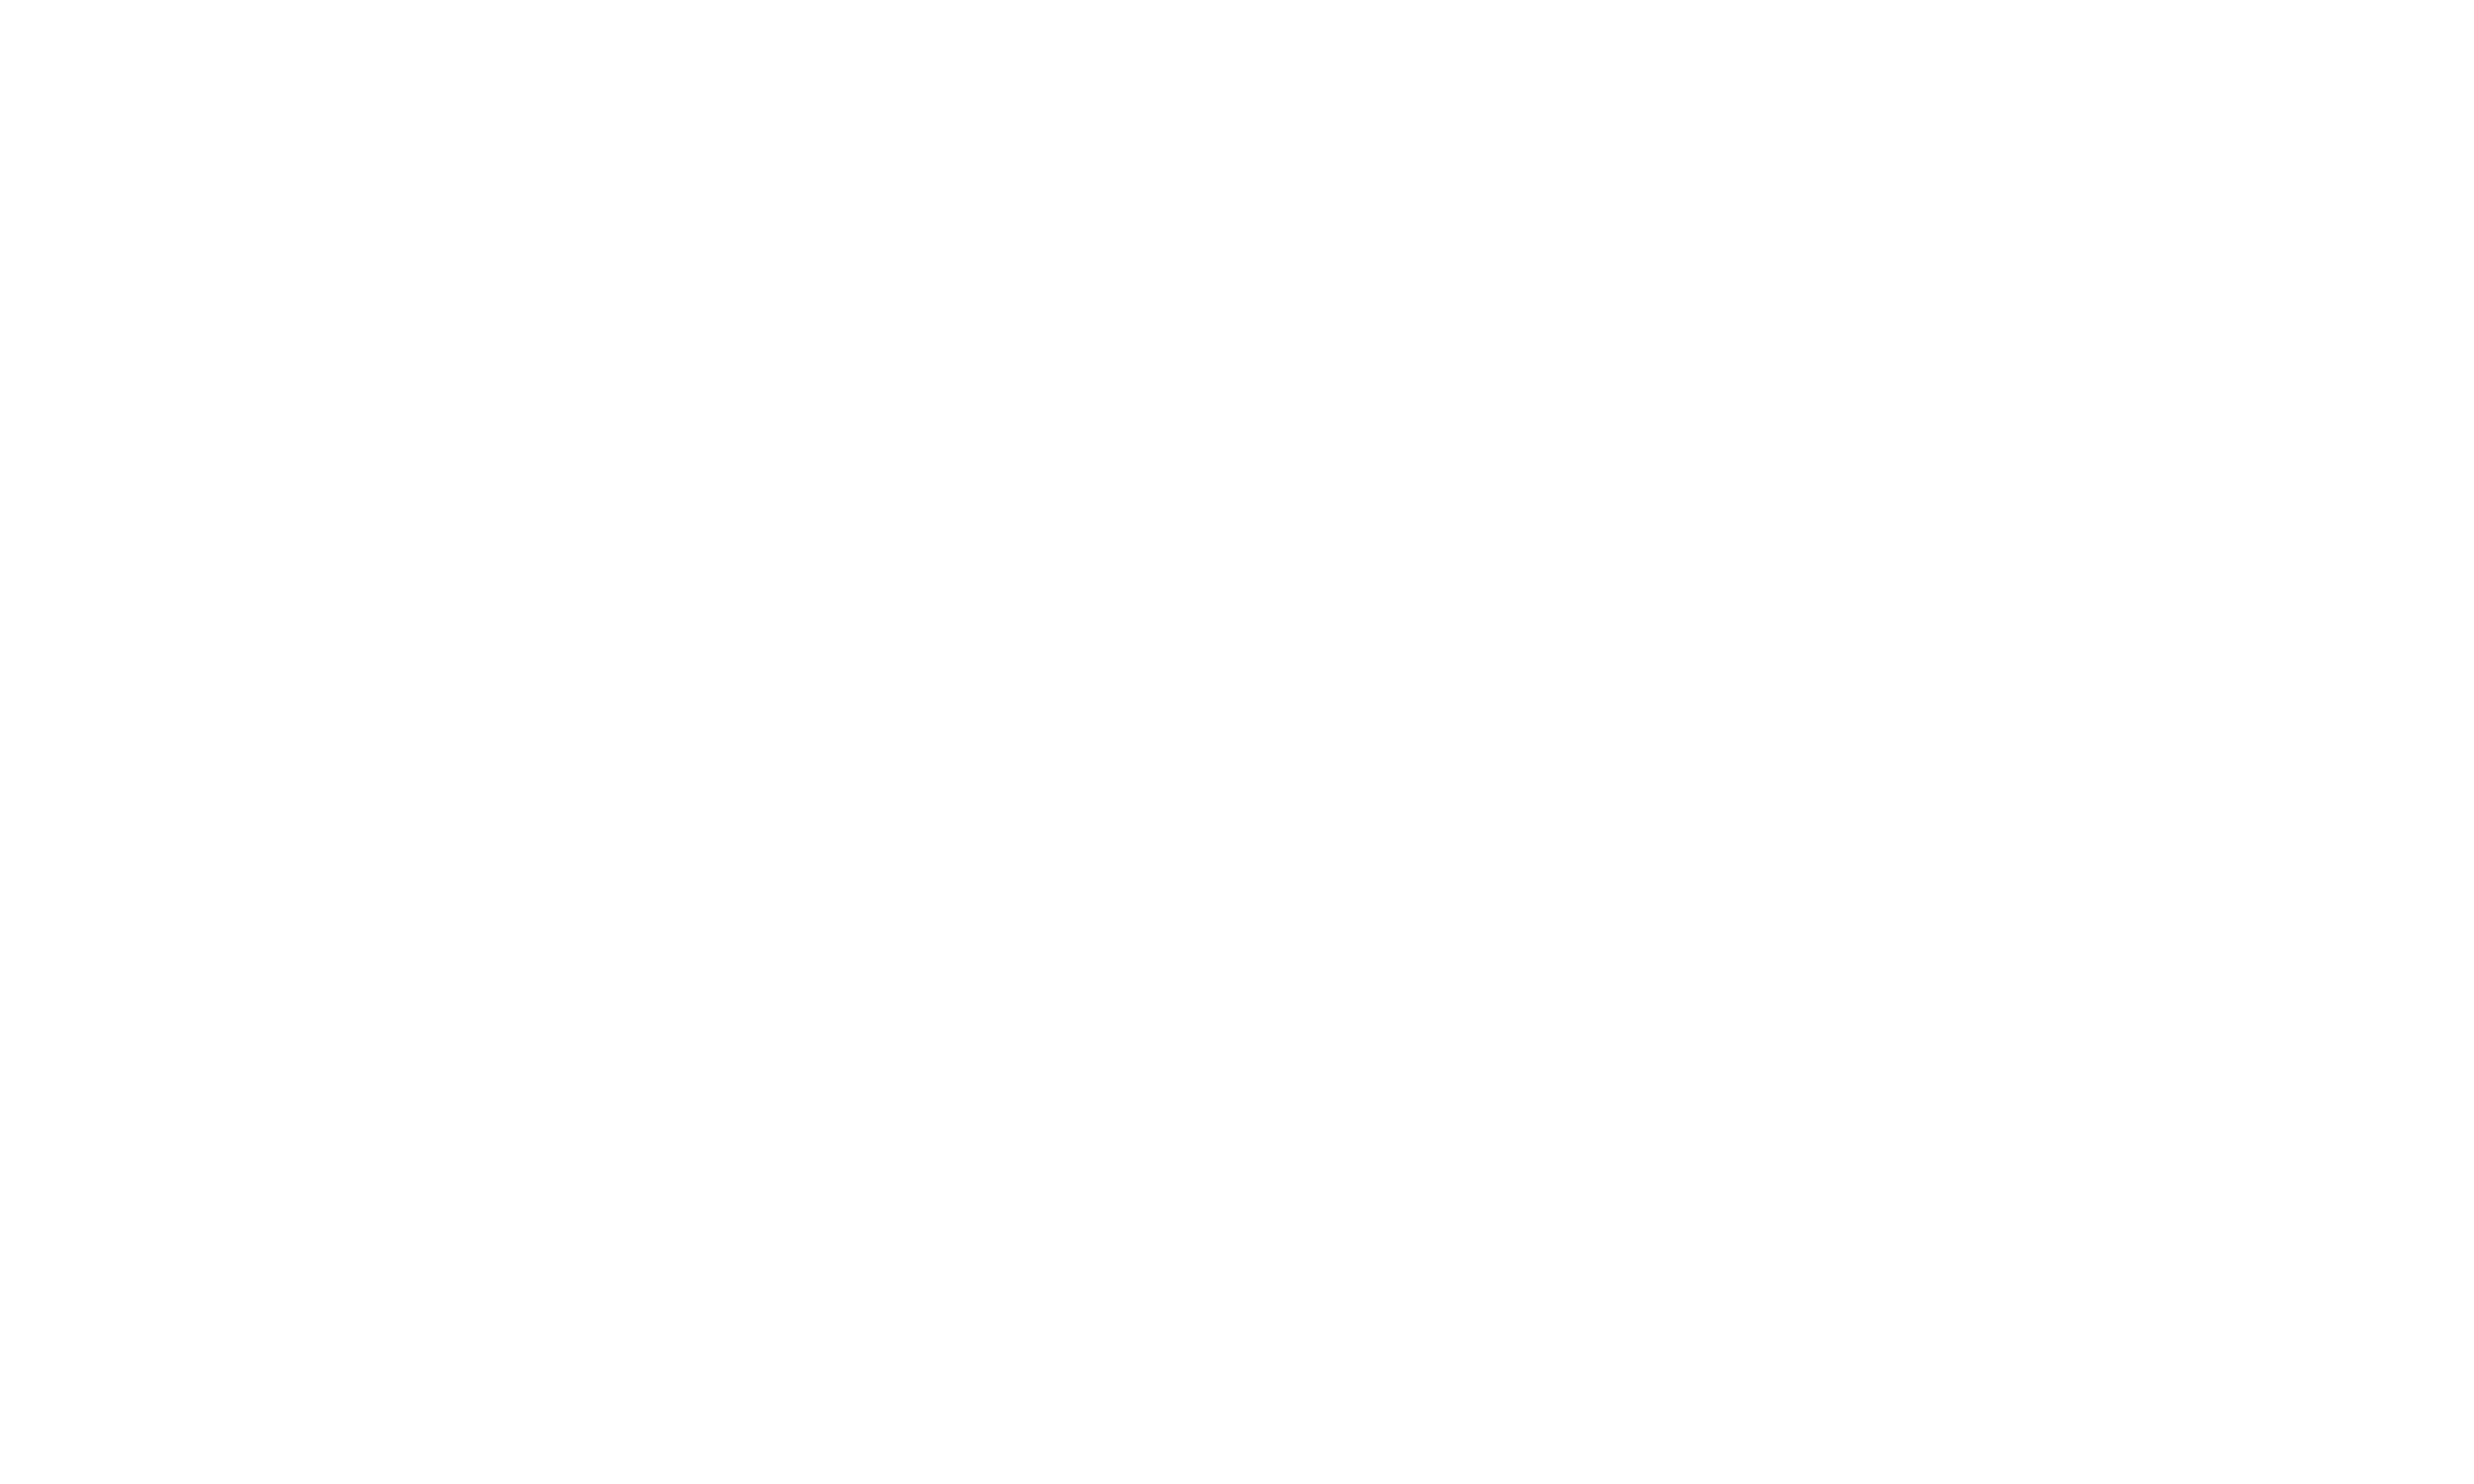

<IPython.core.display.Javascript object>


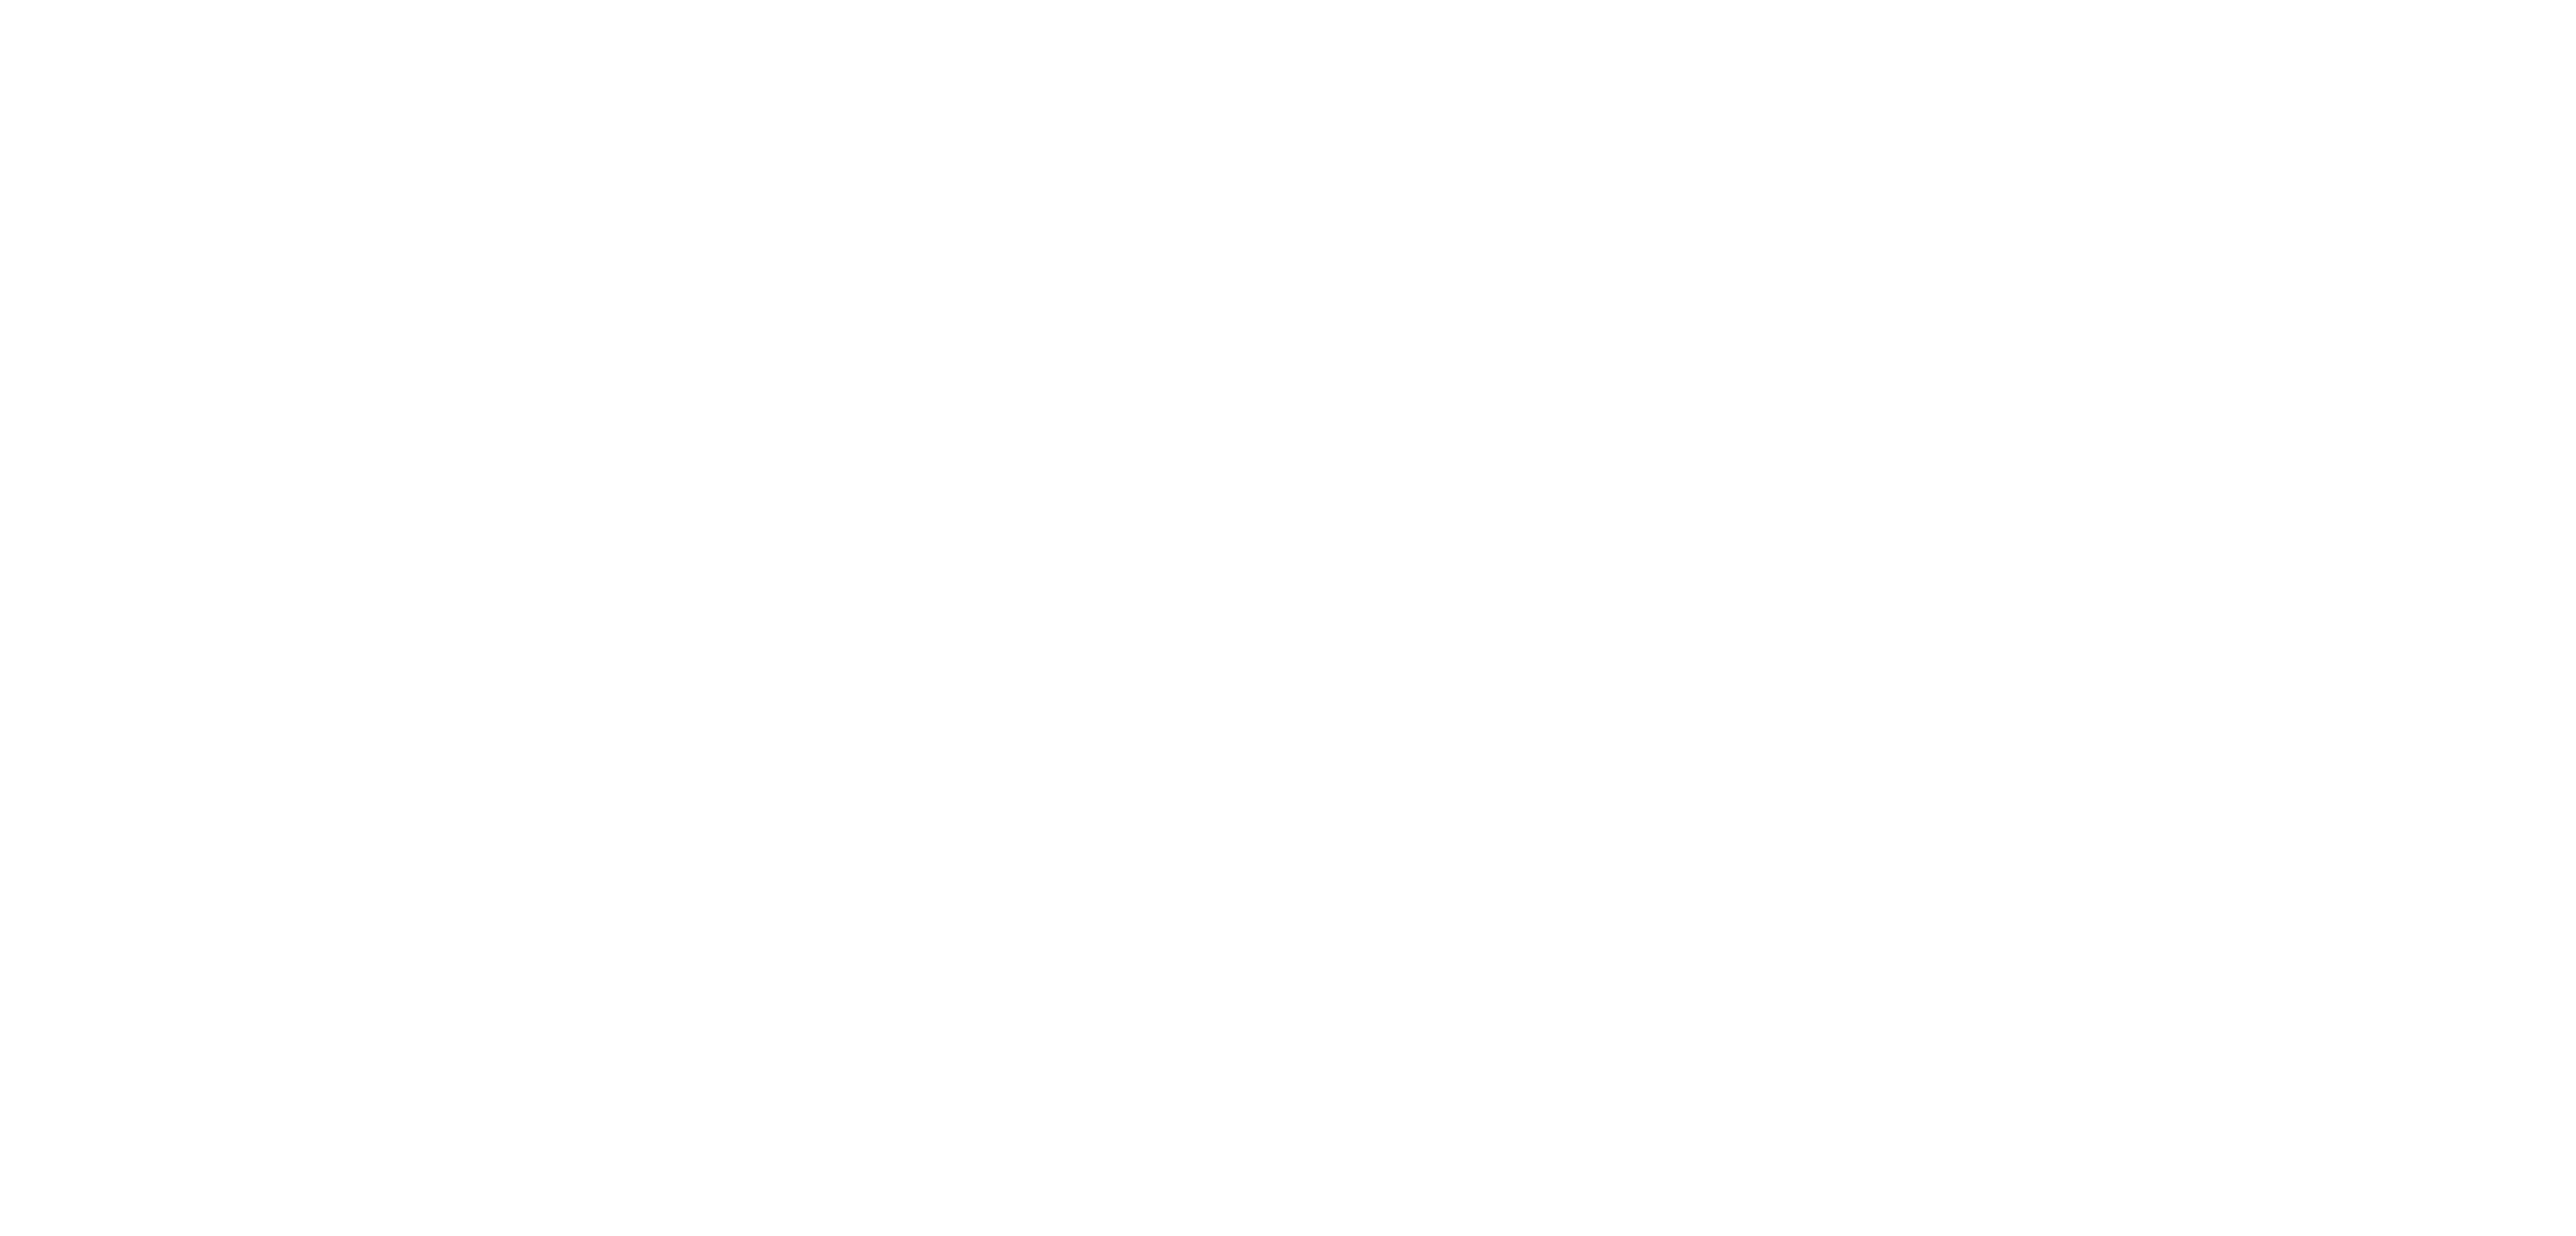

<IPython.core.display.Javascript object>


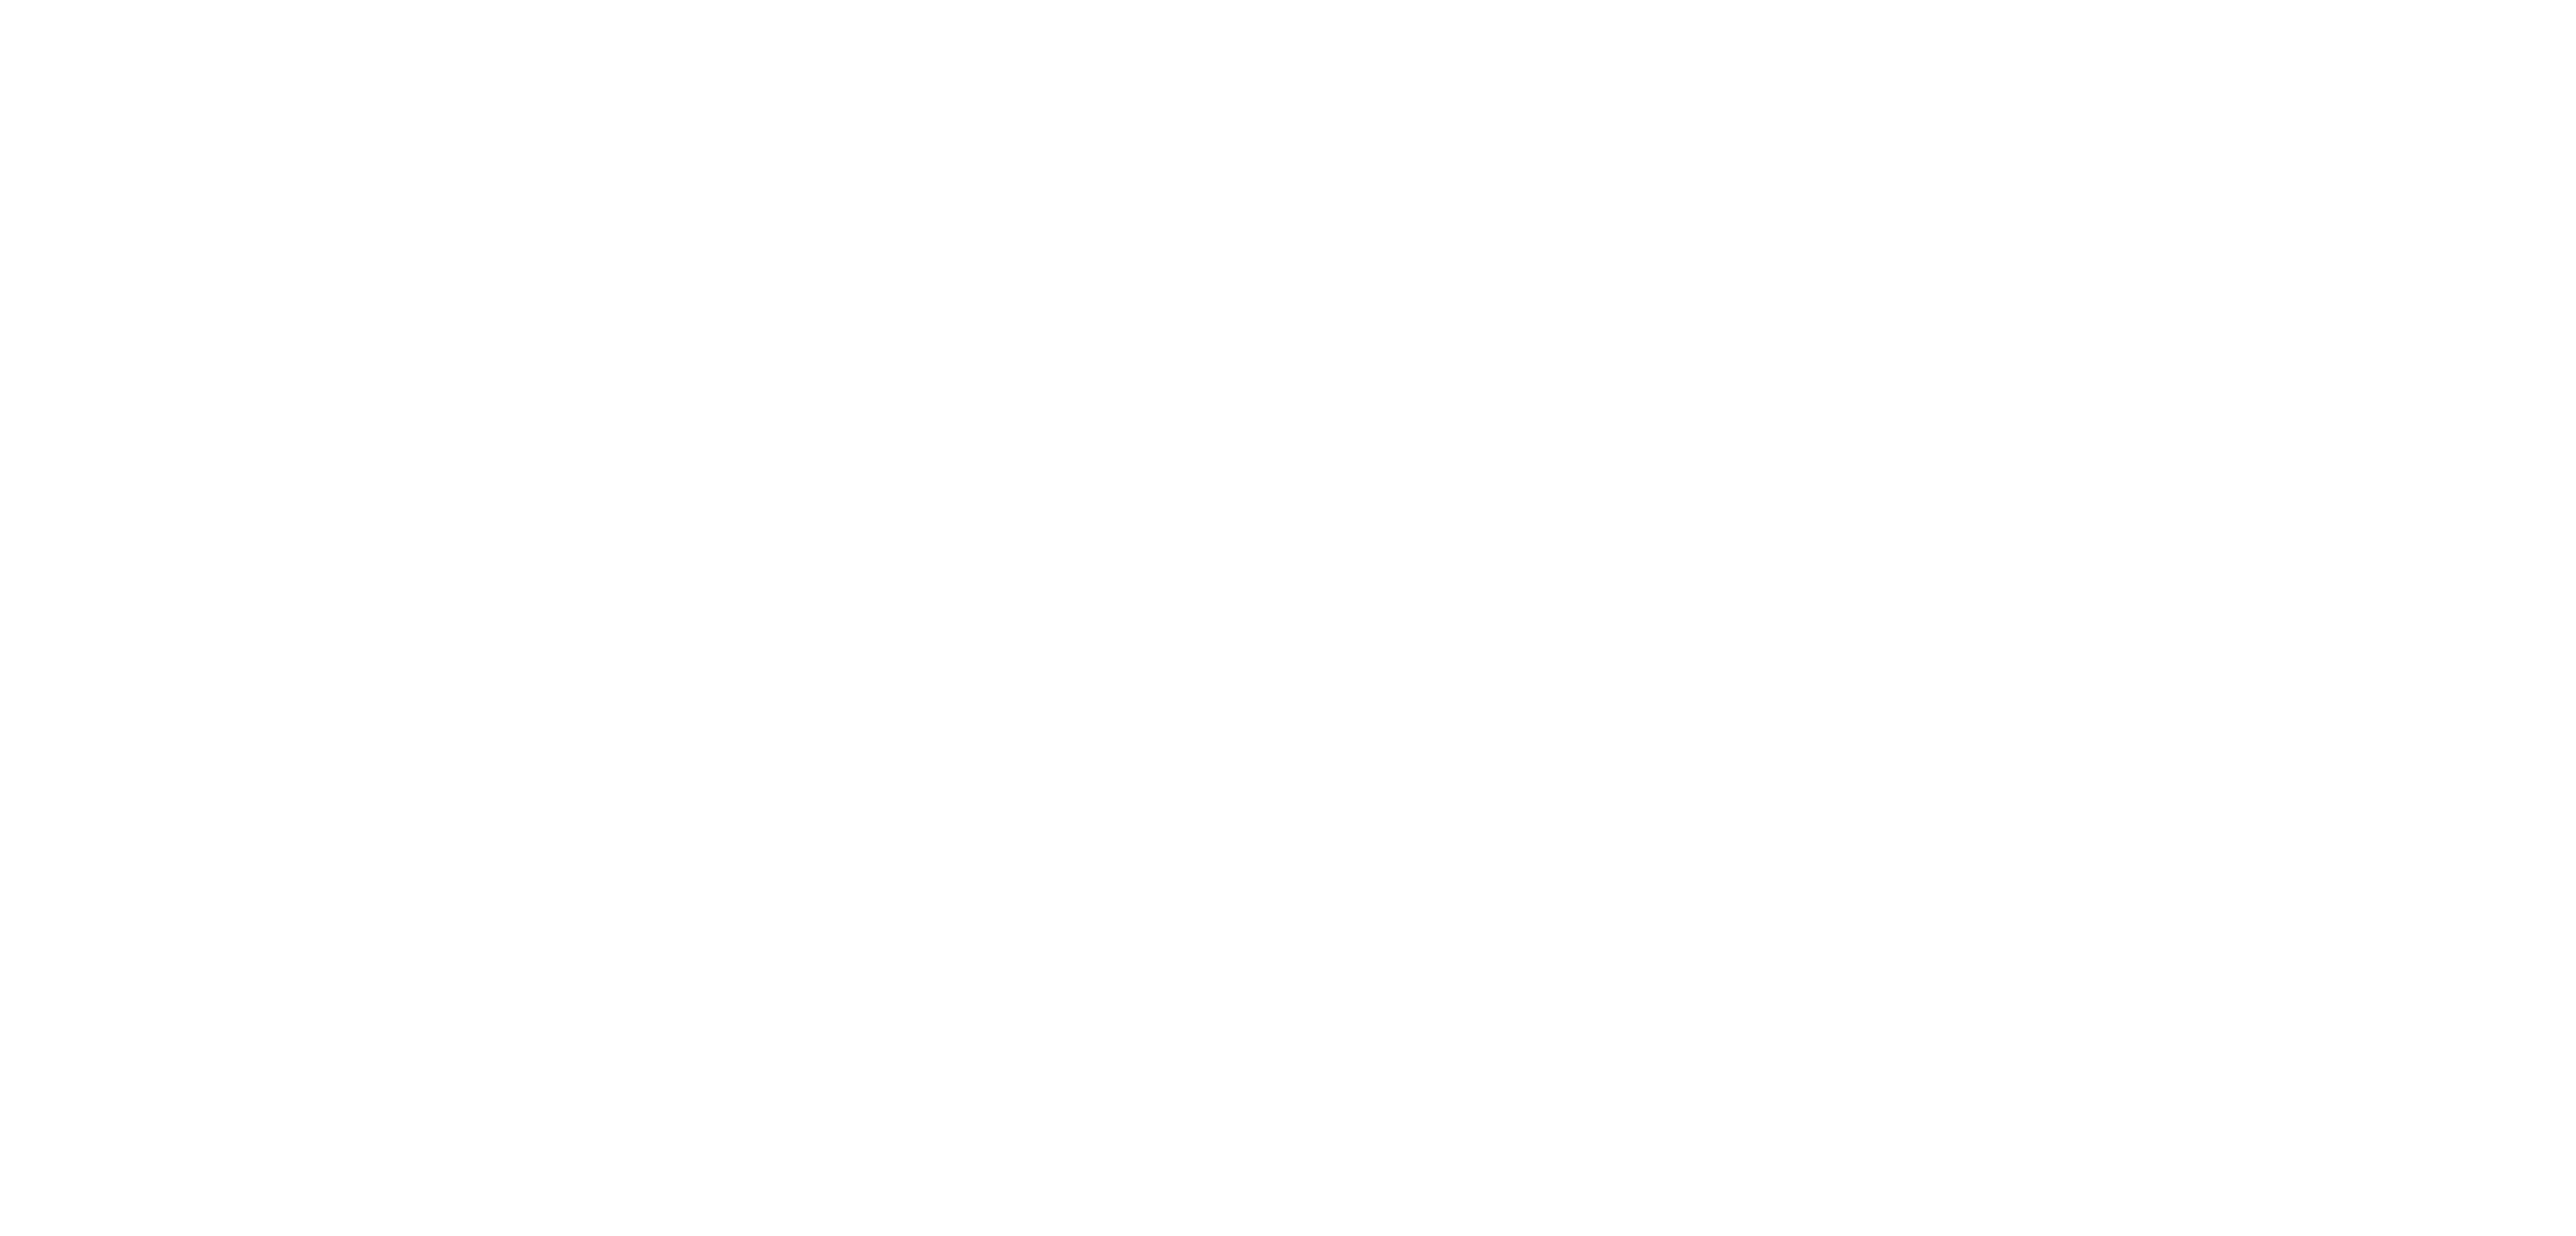

<IPython.core.display.Javascript object>


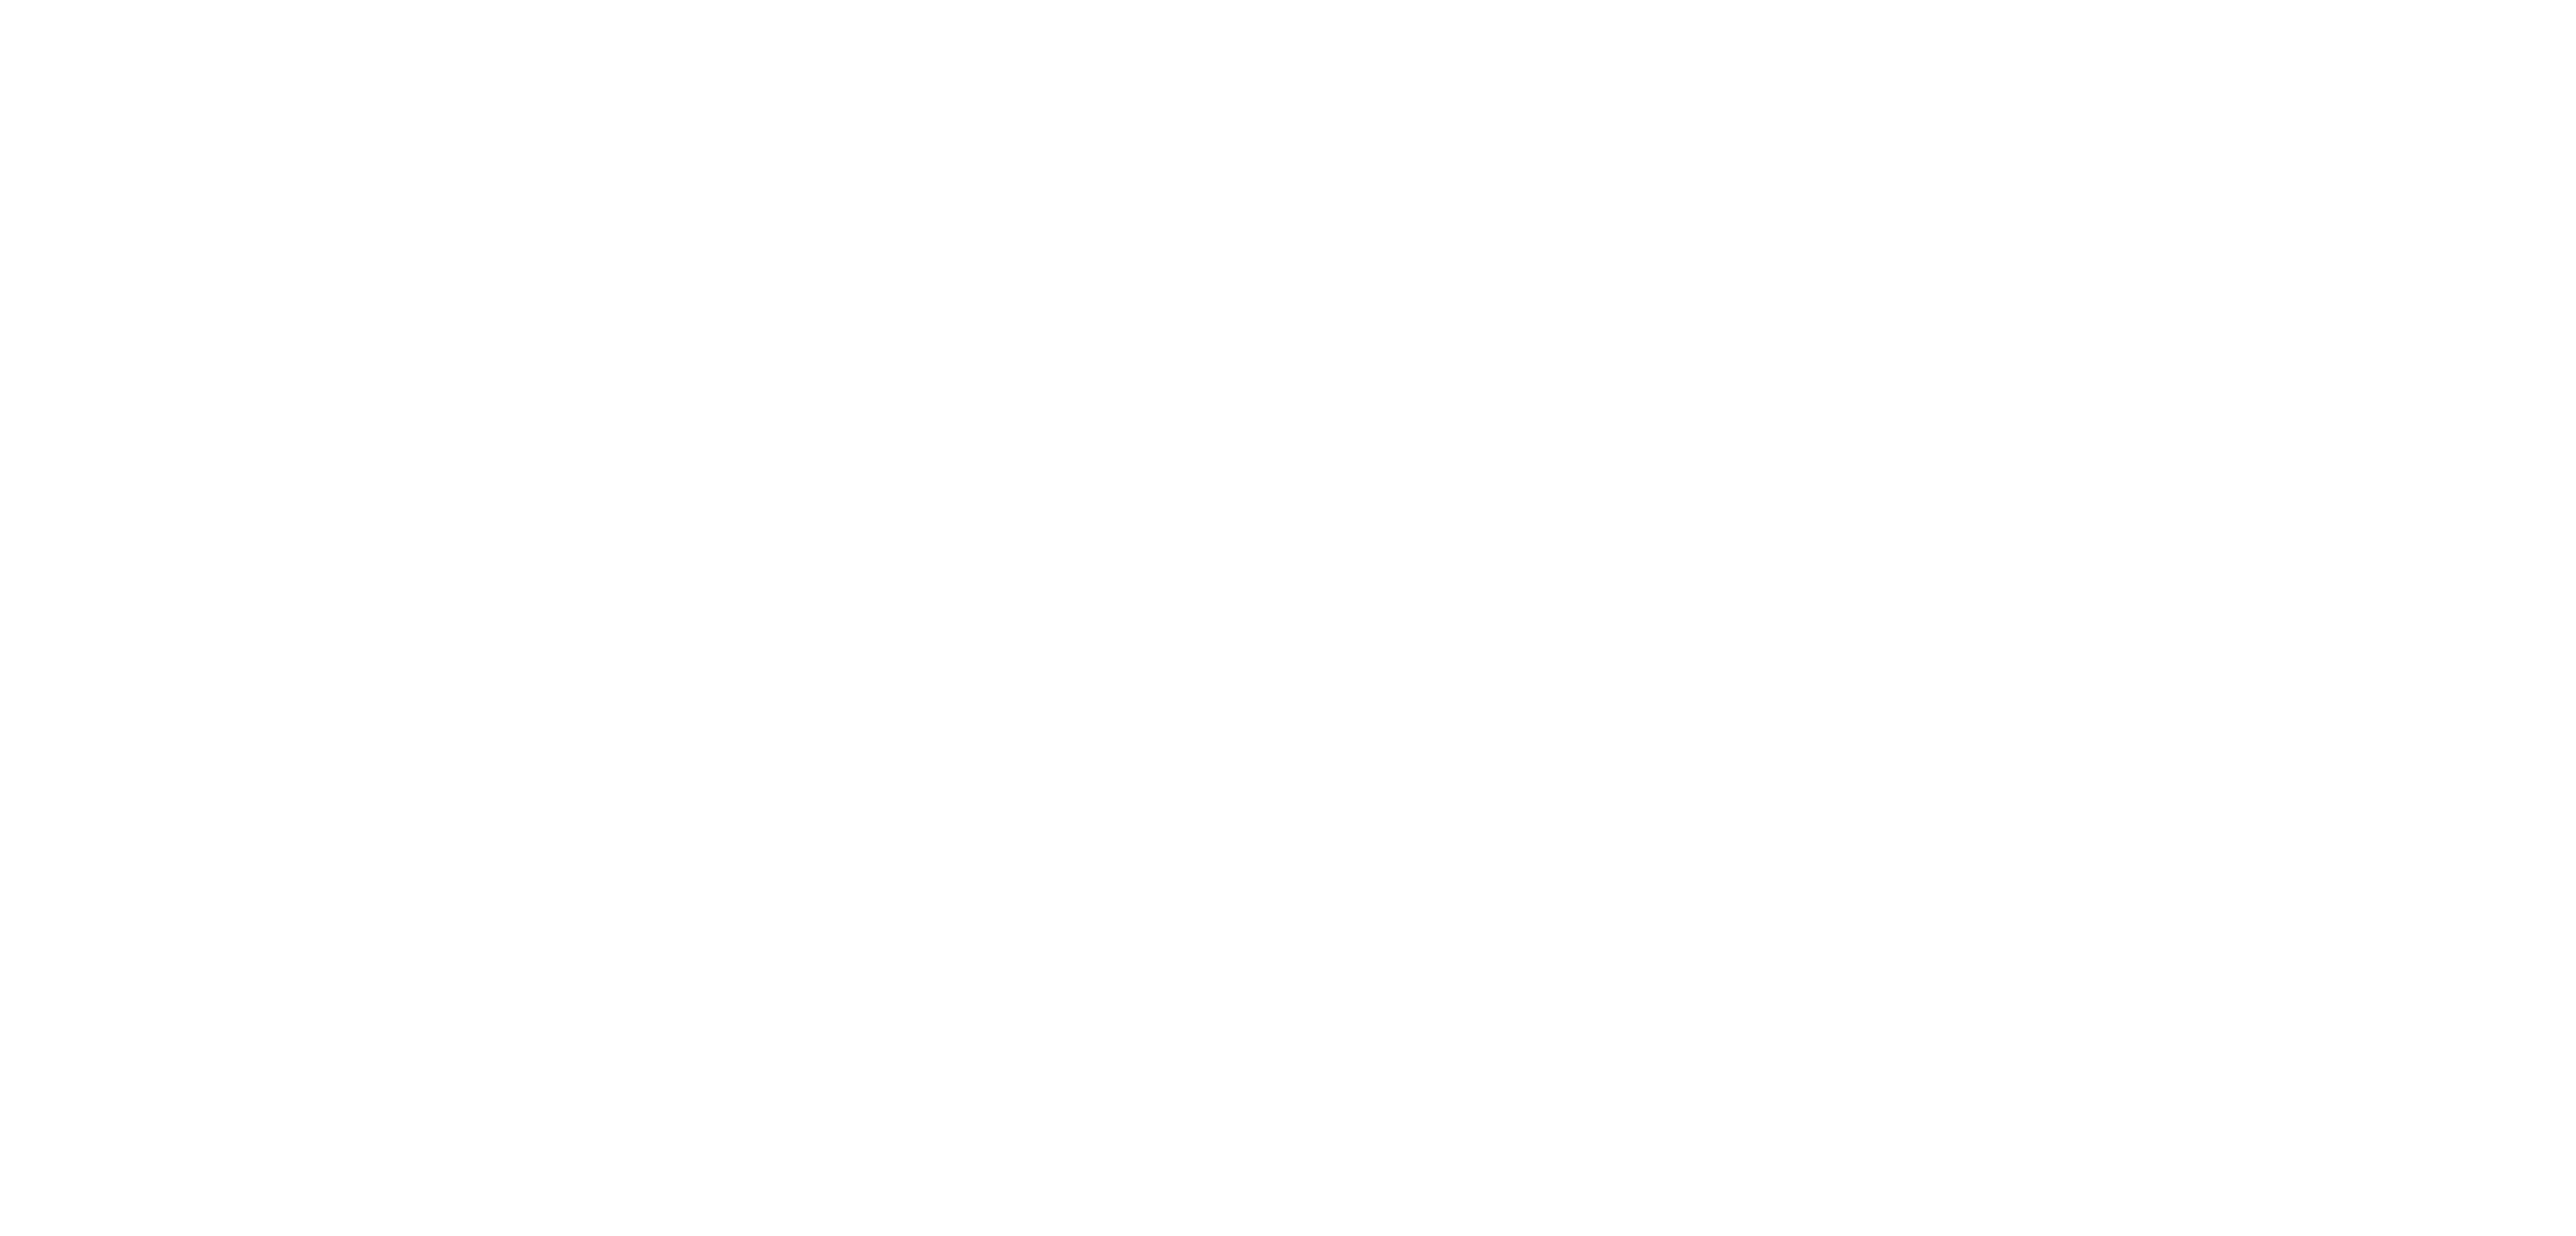

<IPython.core.display.Javascript object>


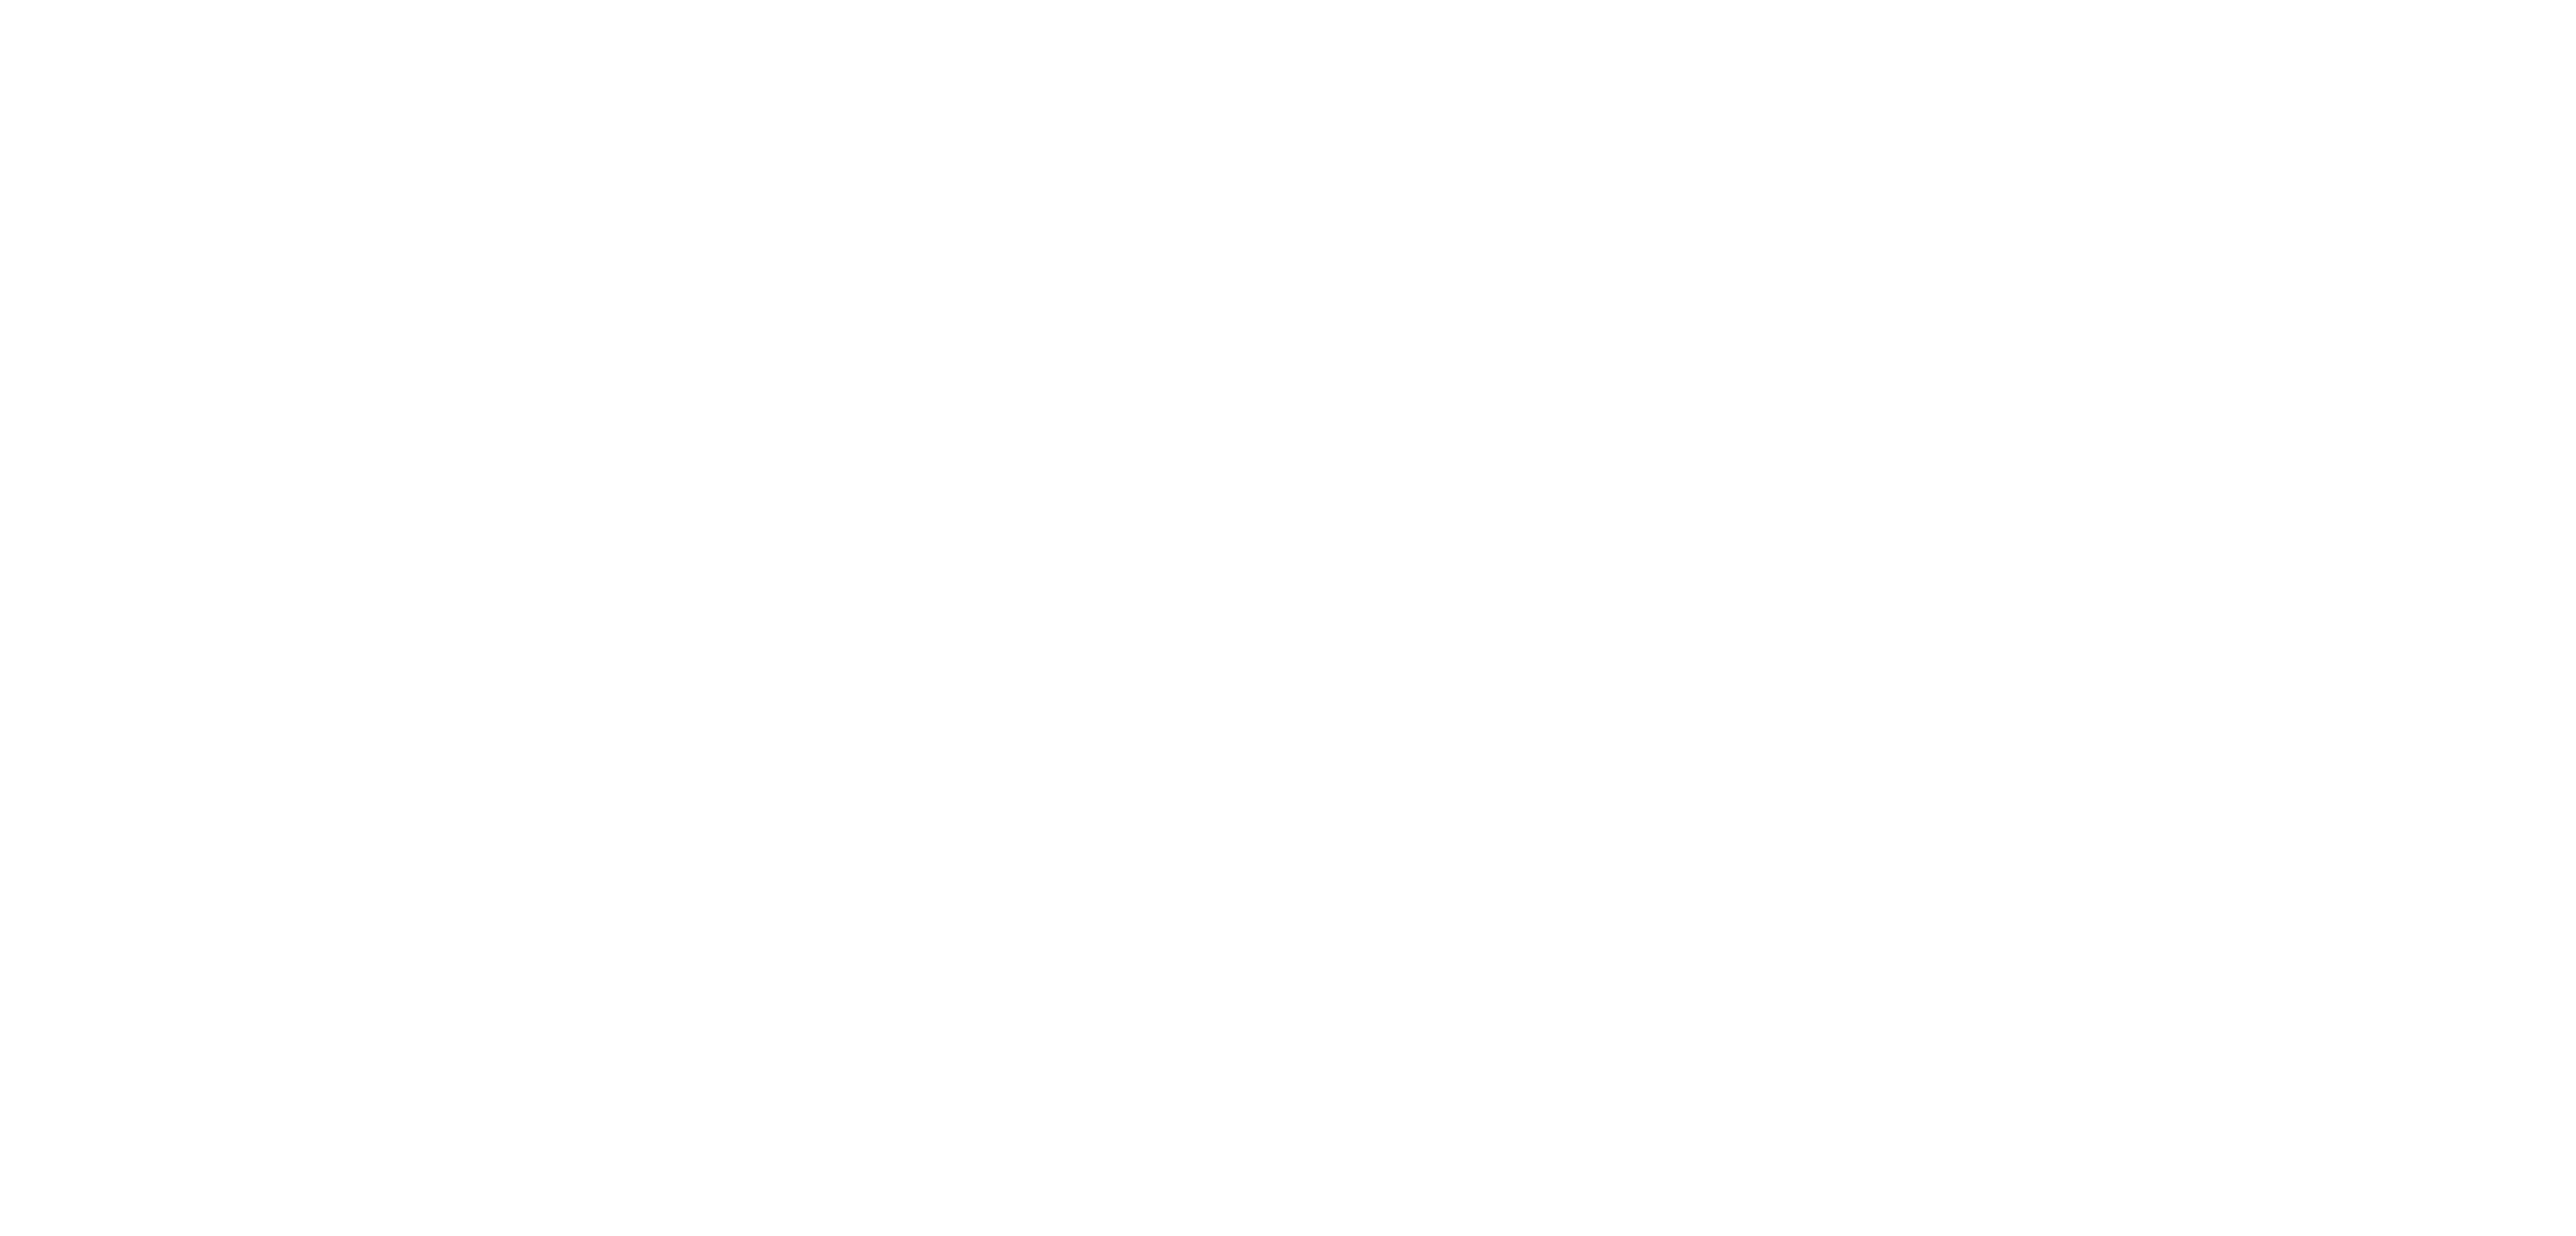

<IPython.core.display.Javascript object>


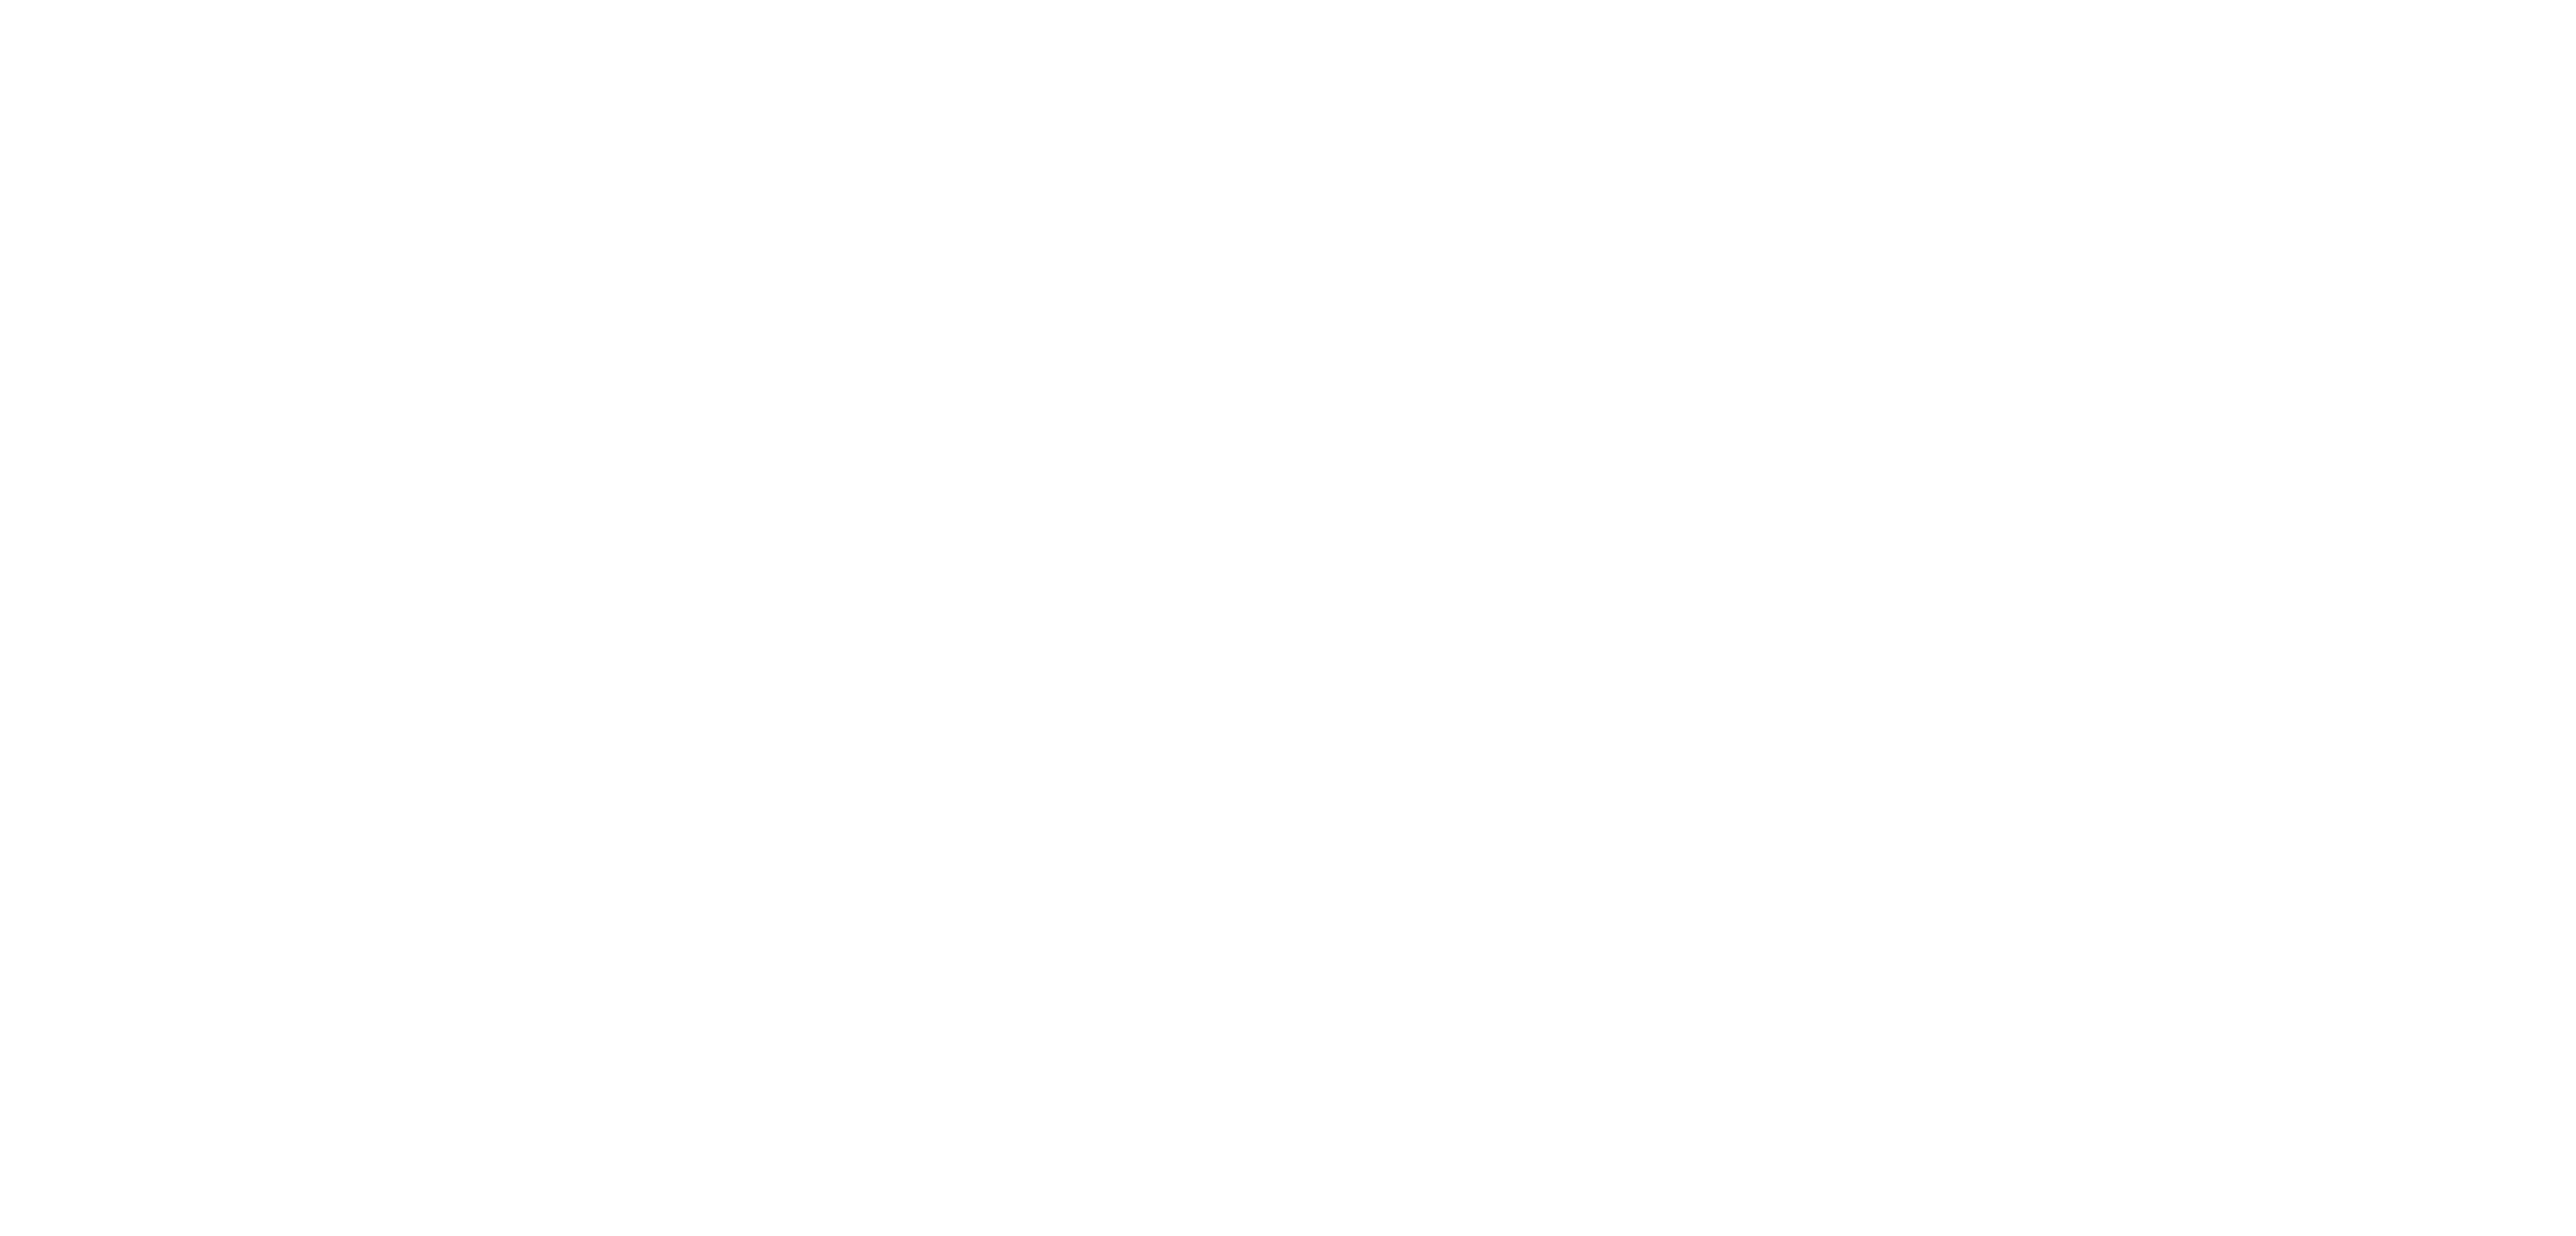

<IPython.core.display.Javascript object>


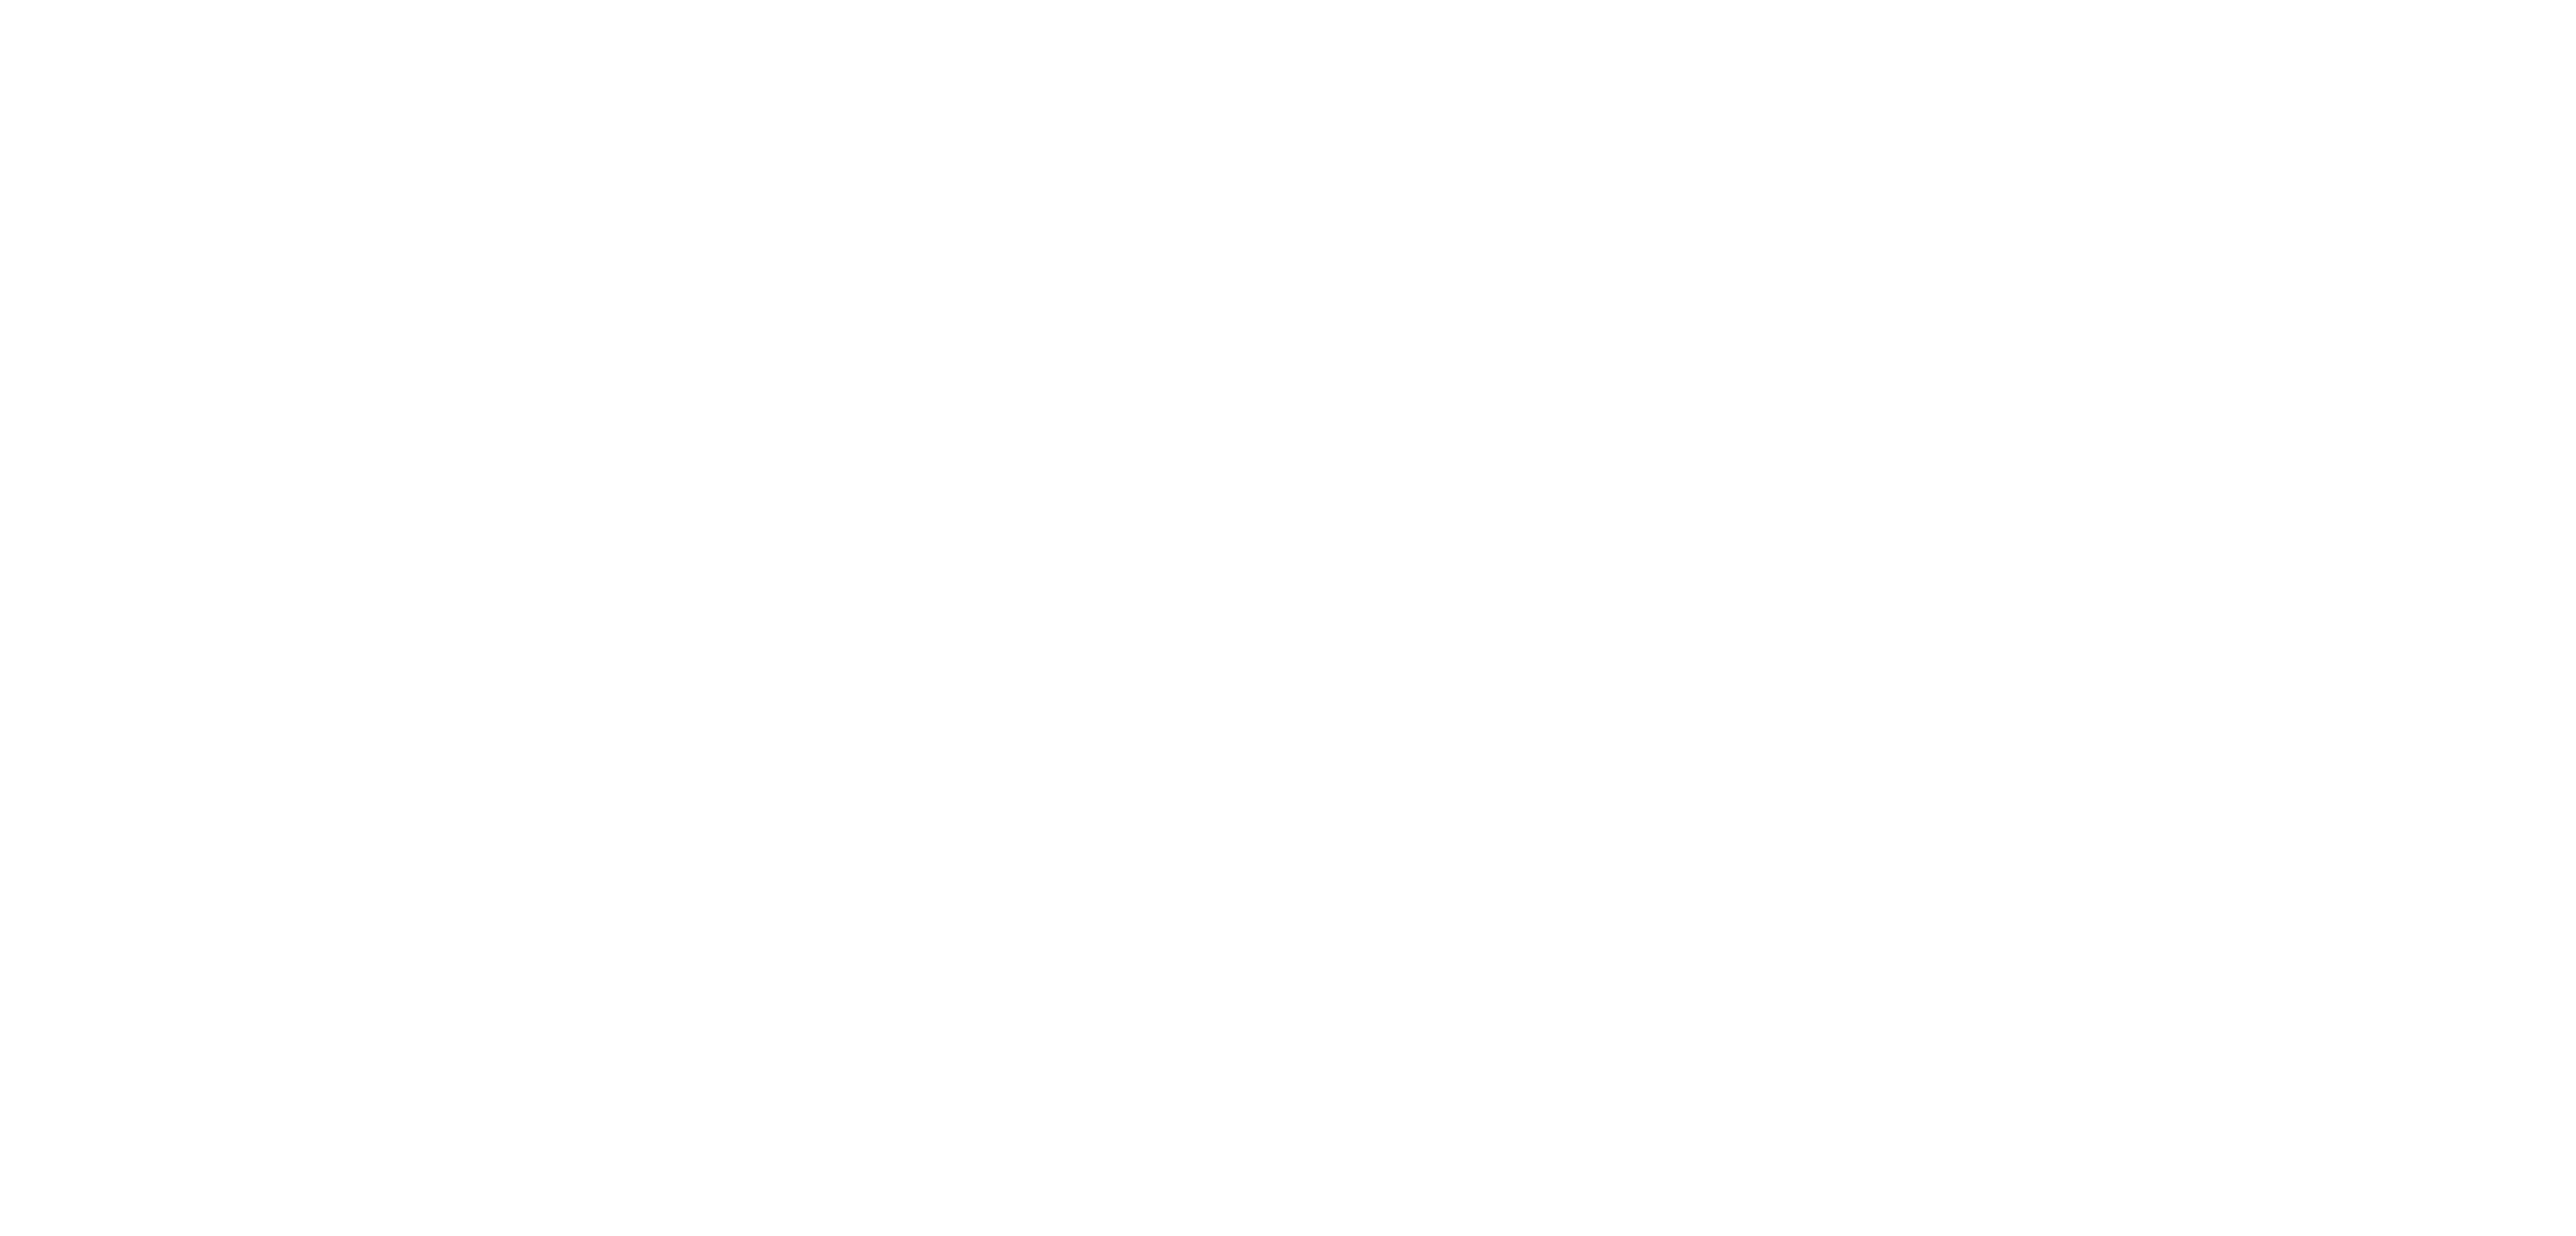

<IPython.core.display.Javascript object>


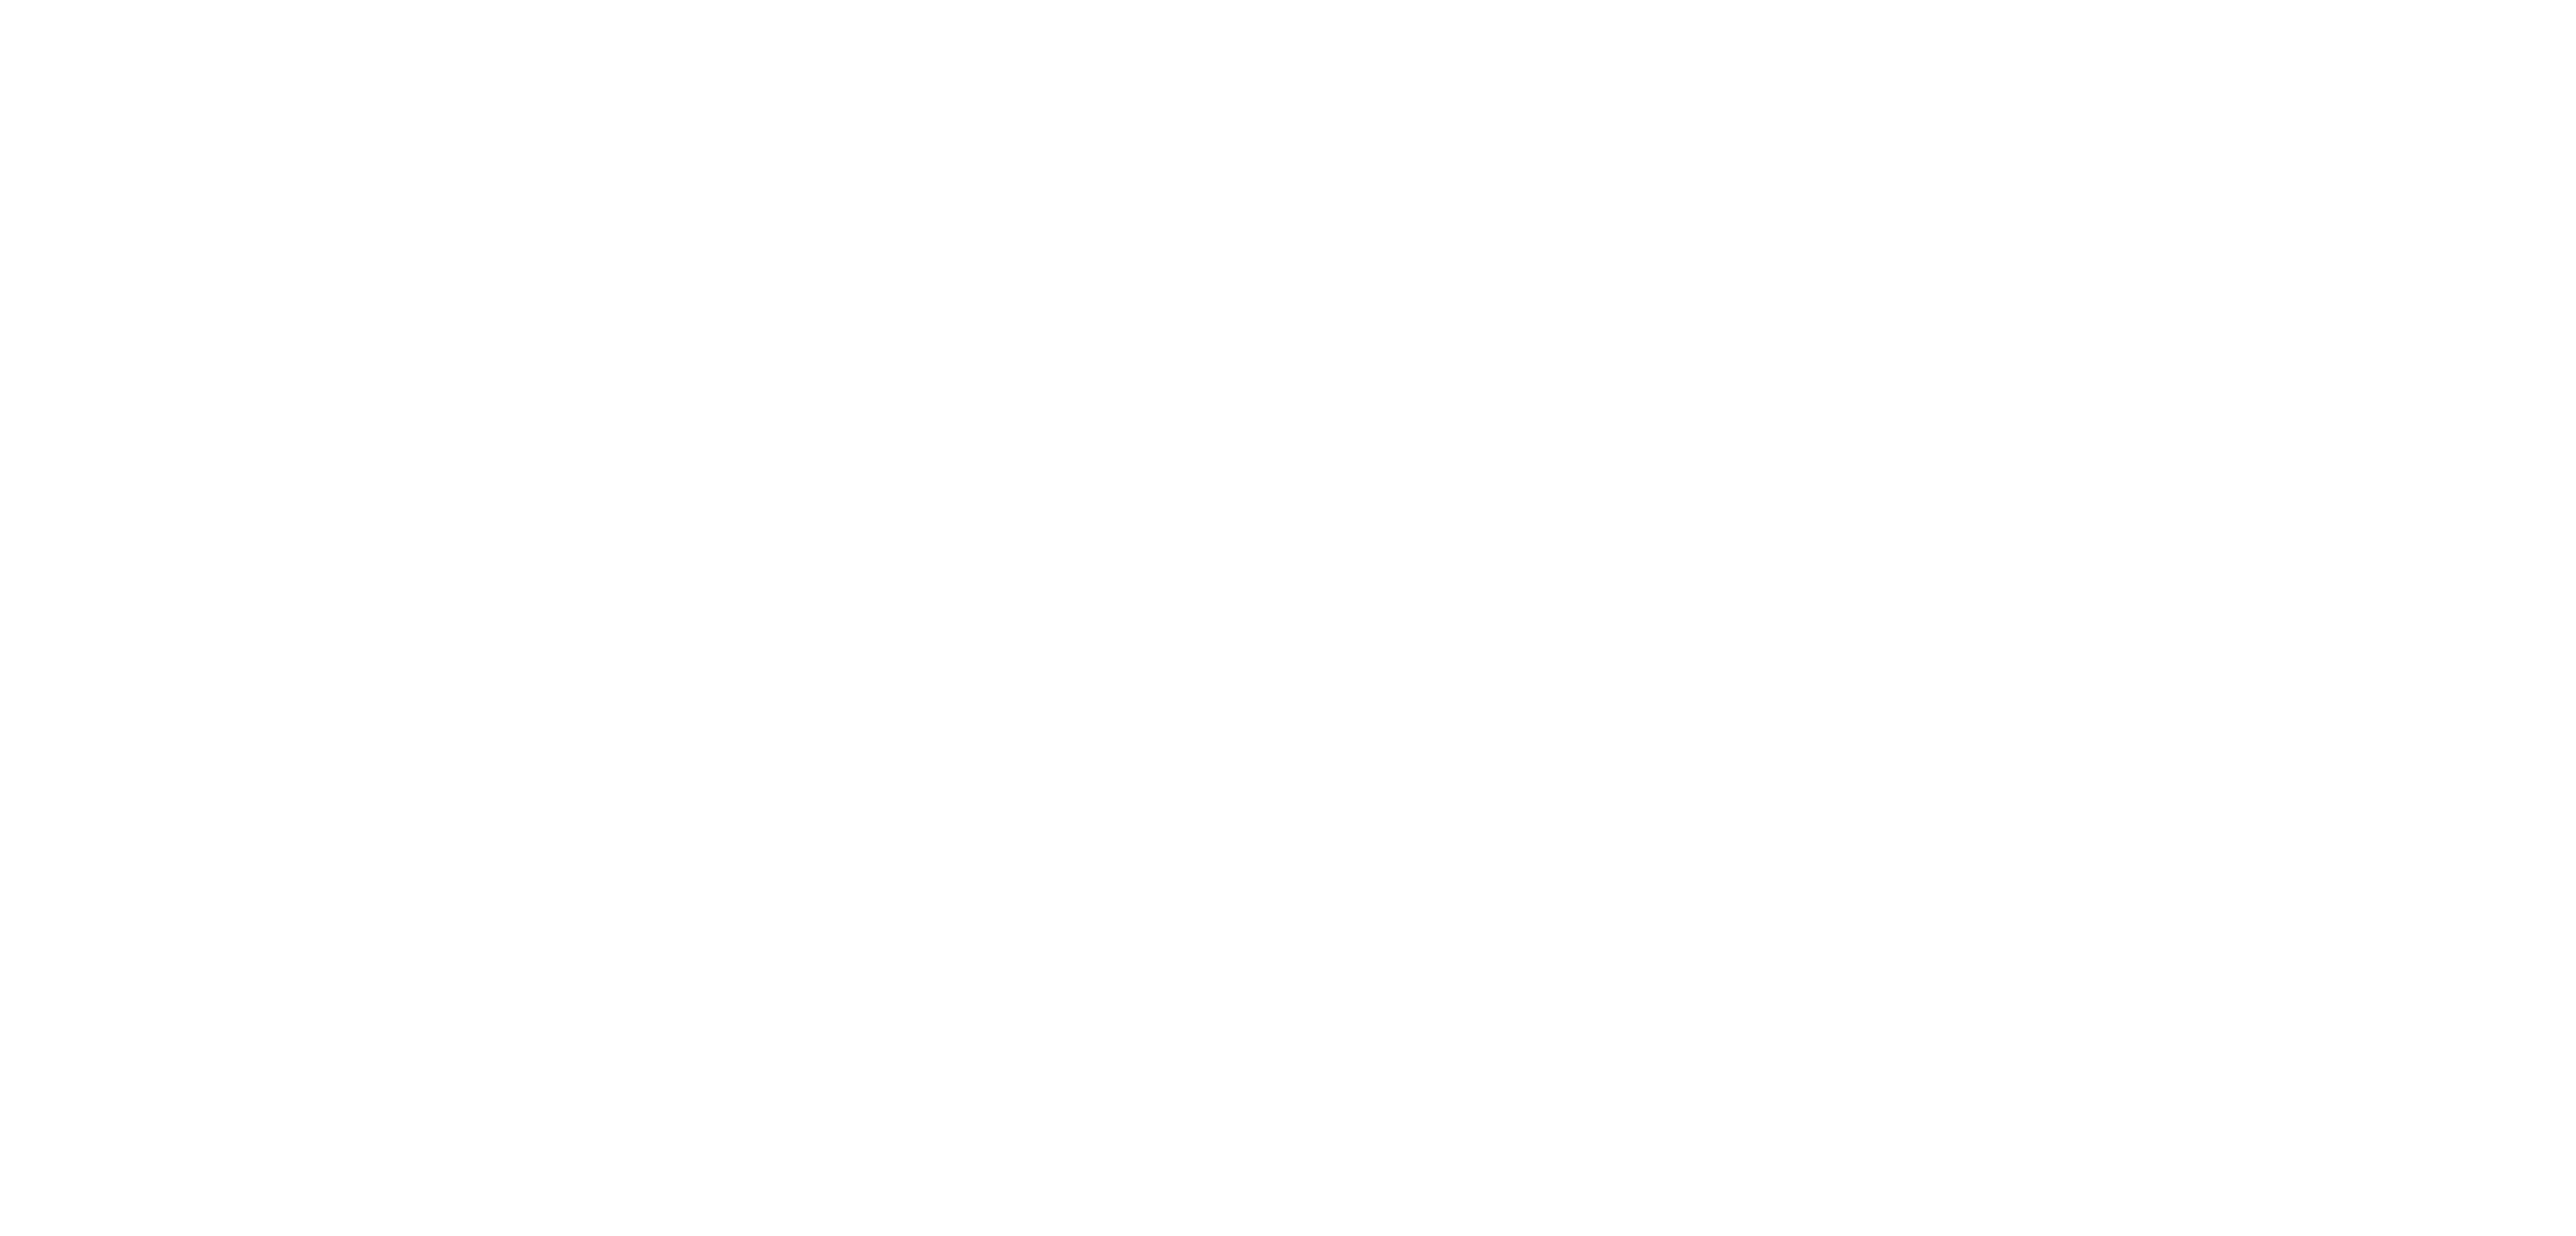

<IPython.core.display.Javascript object>


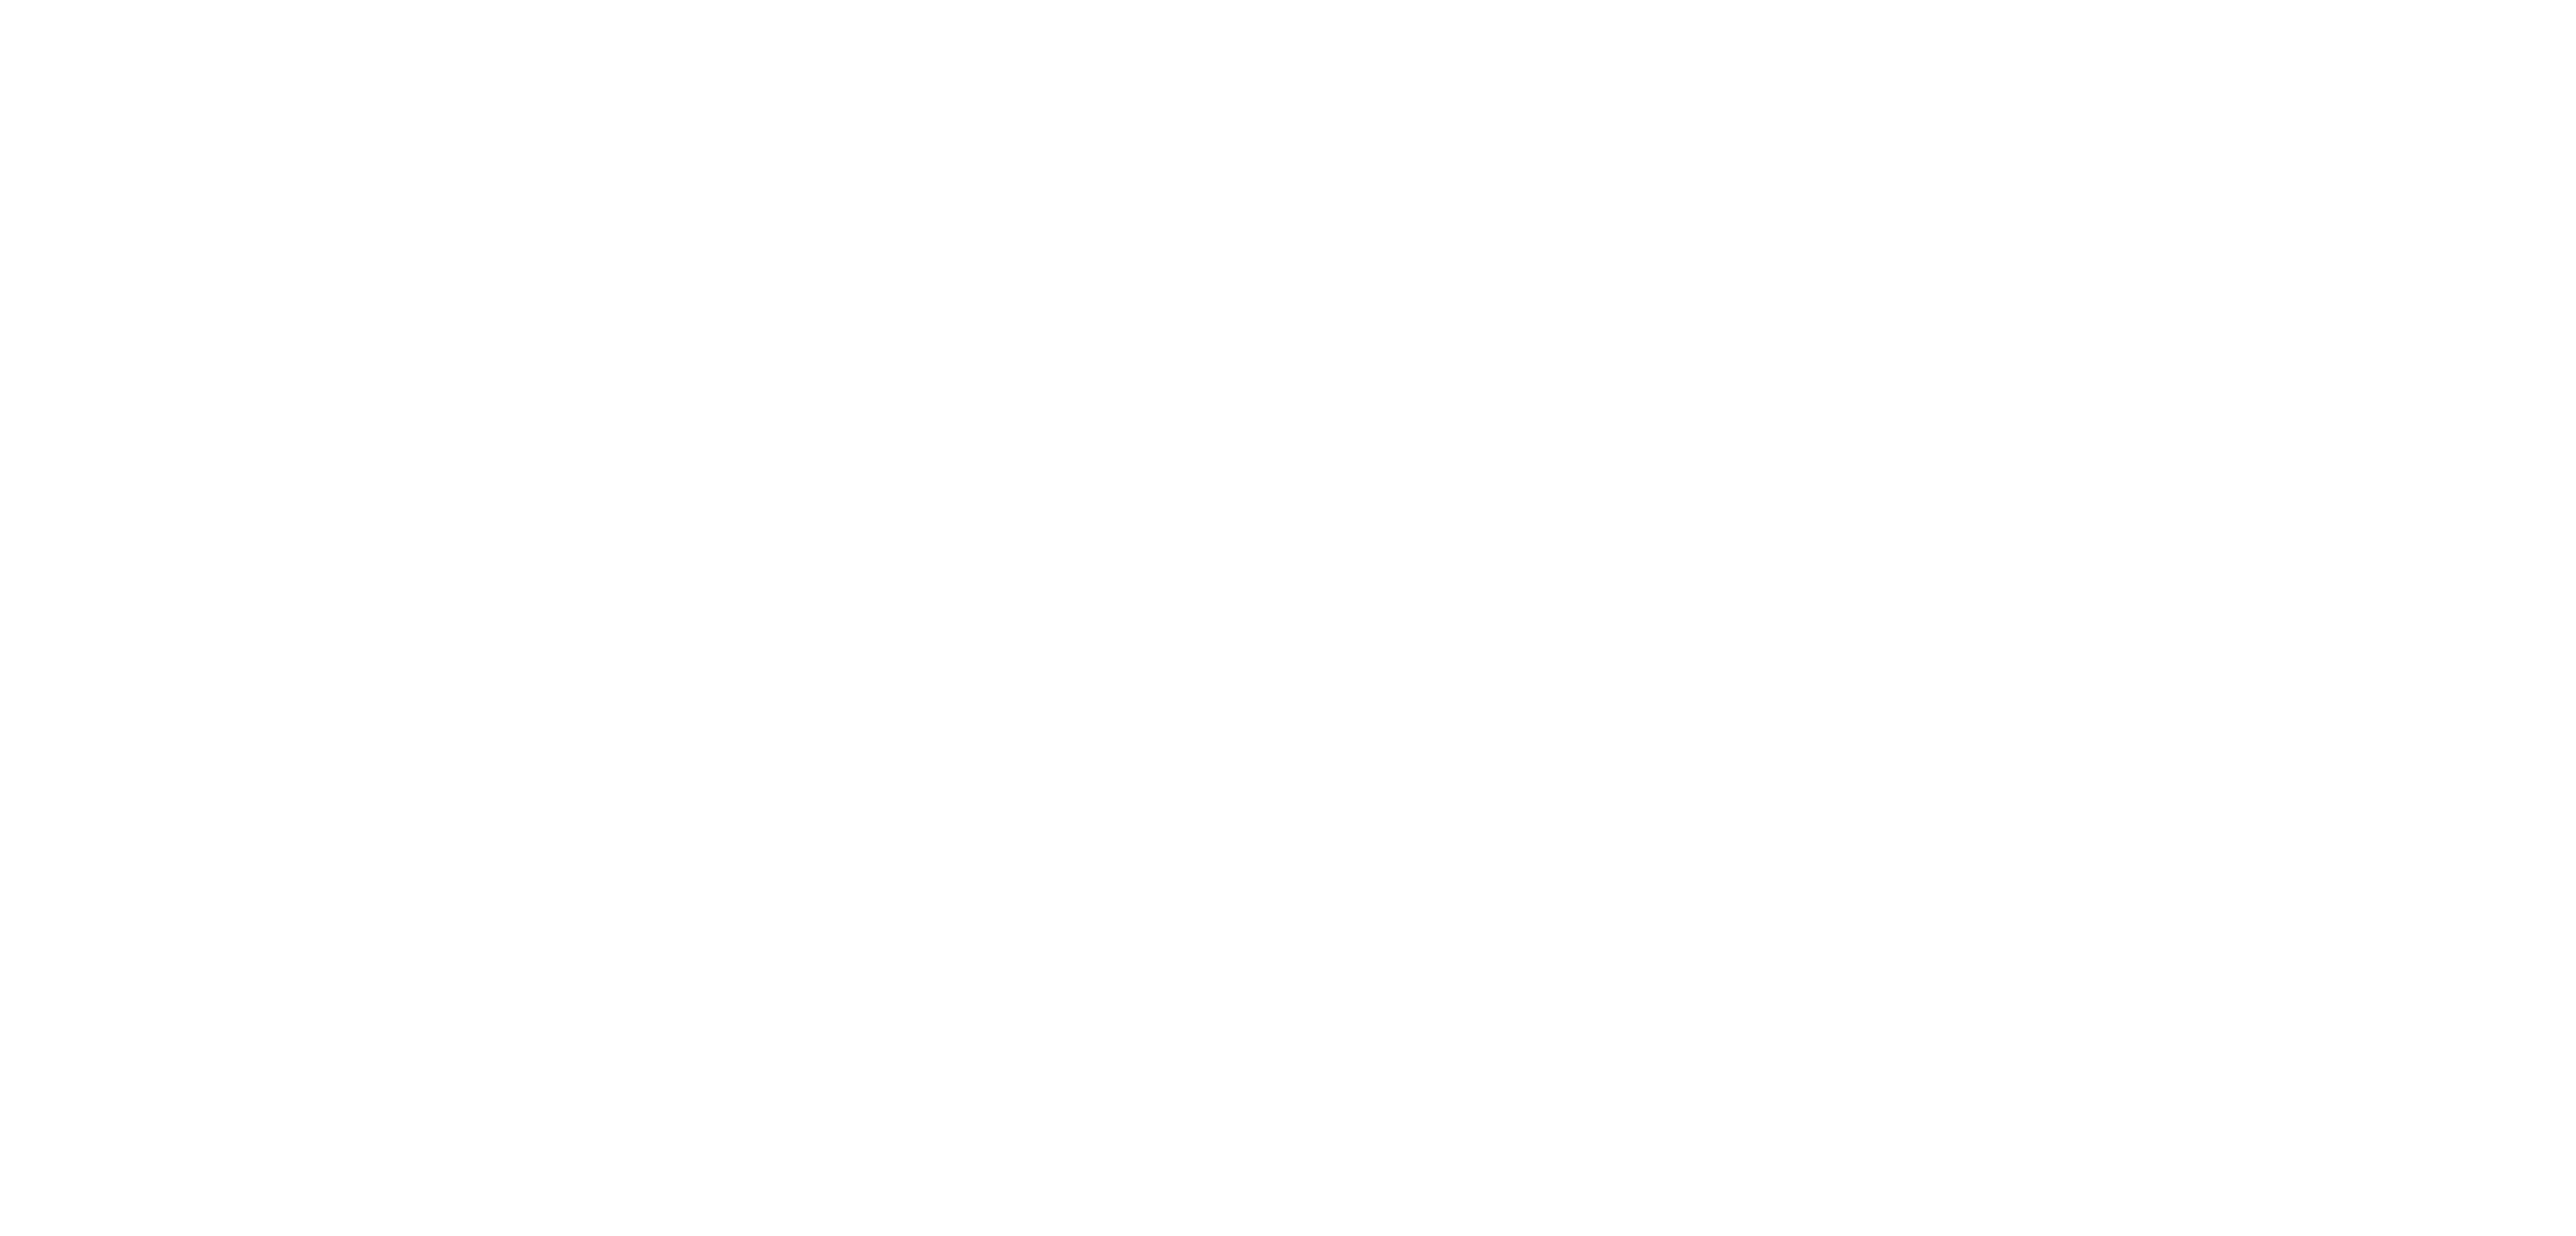

<IPython.core.display.Javascript object>


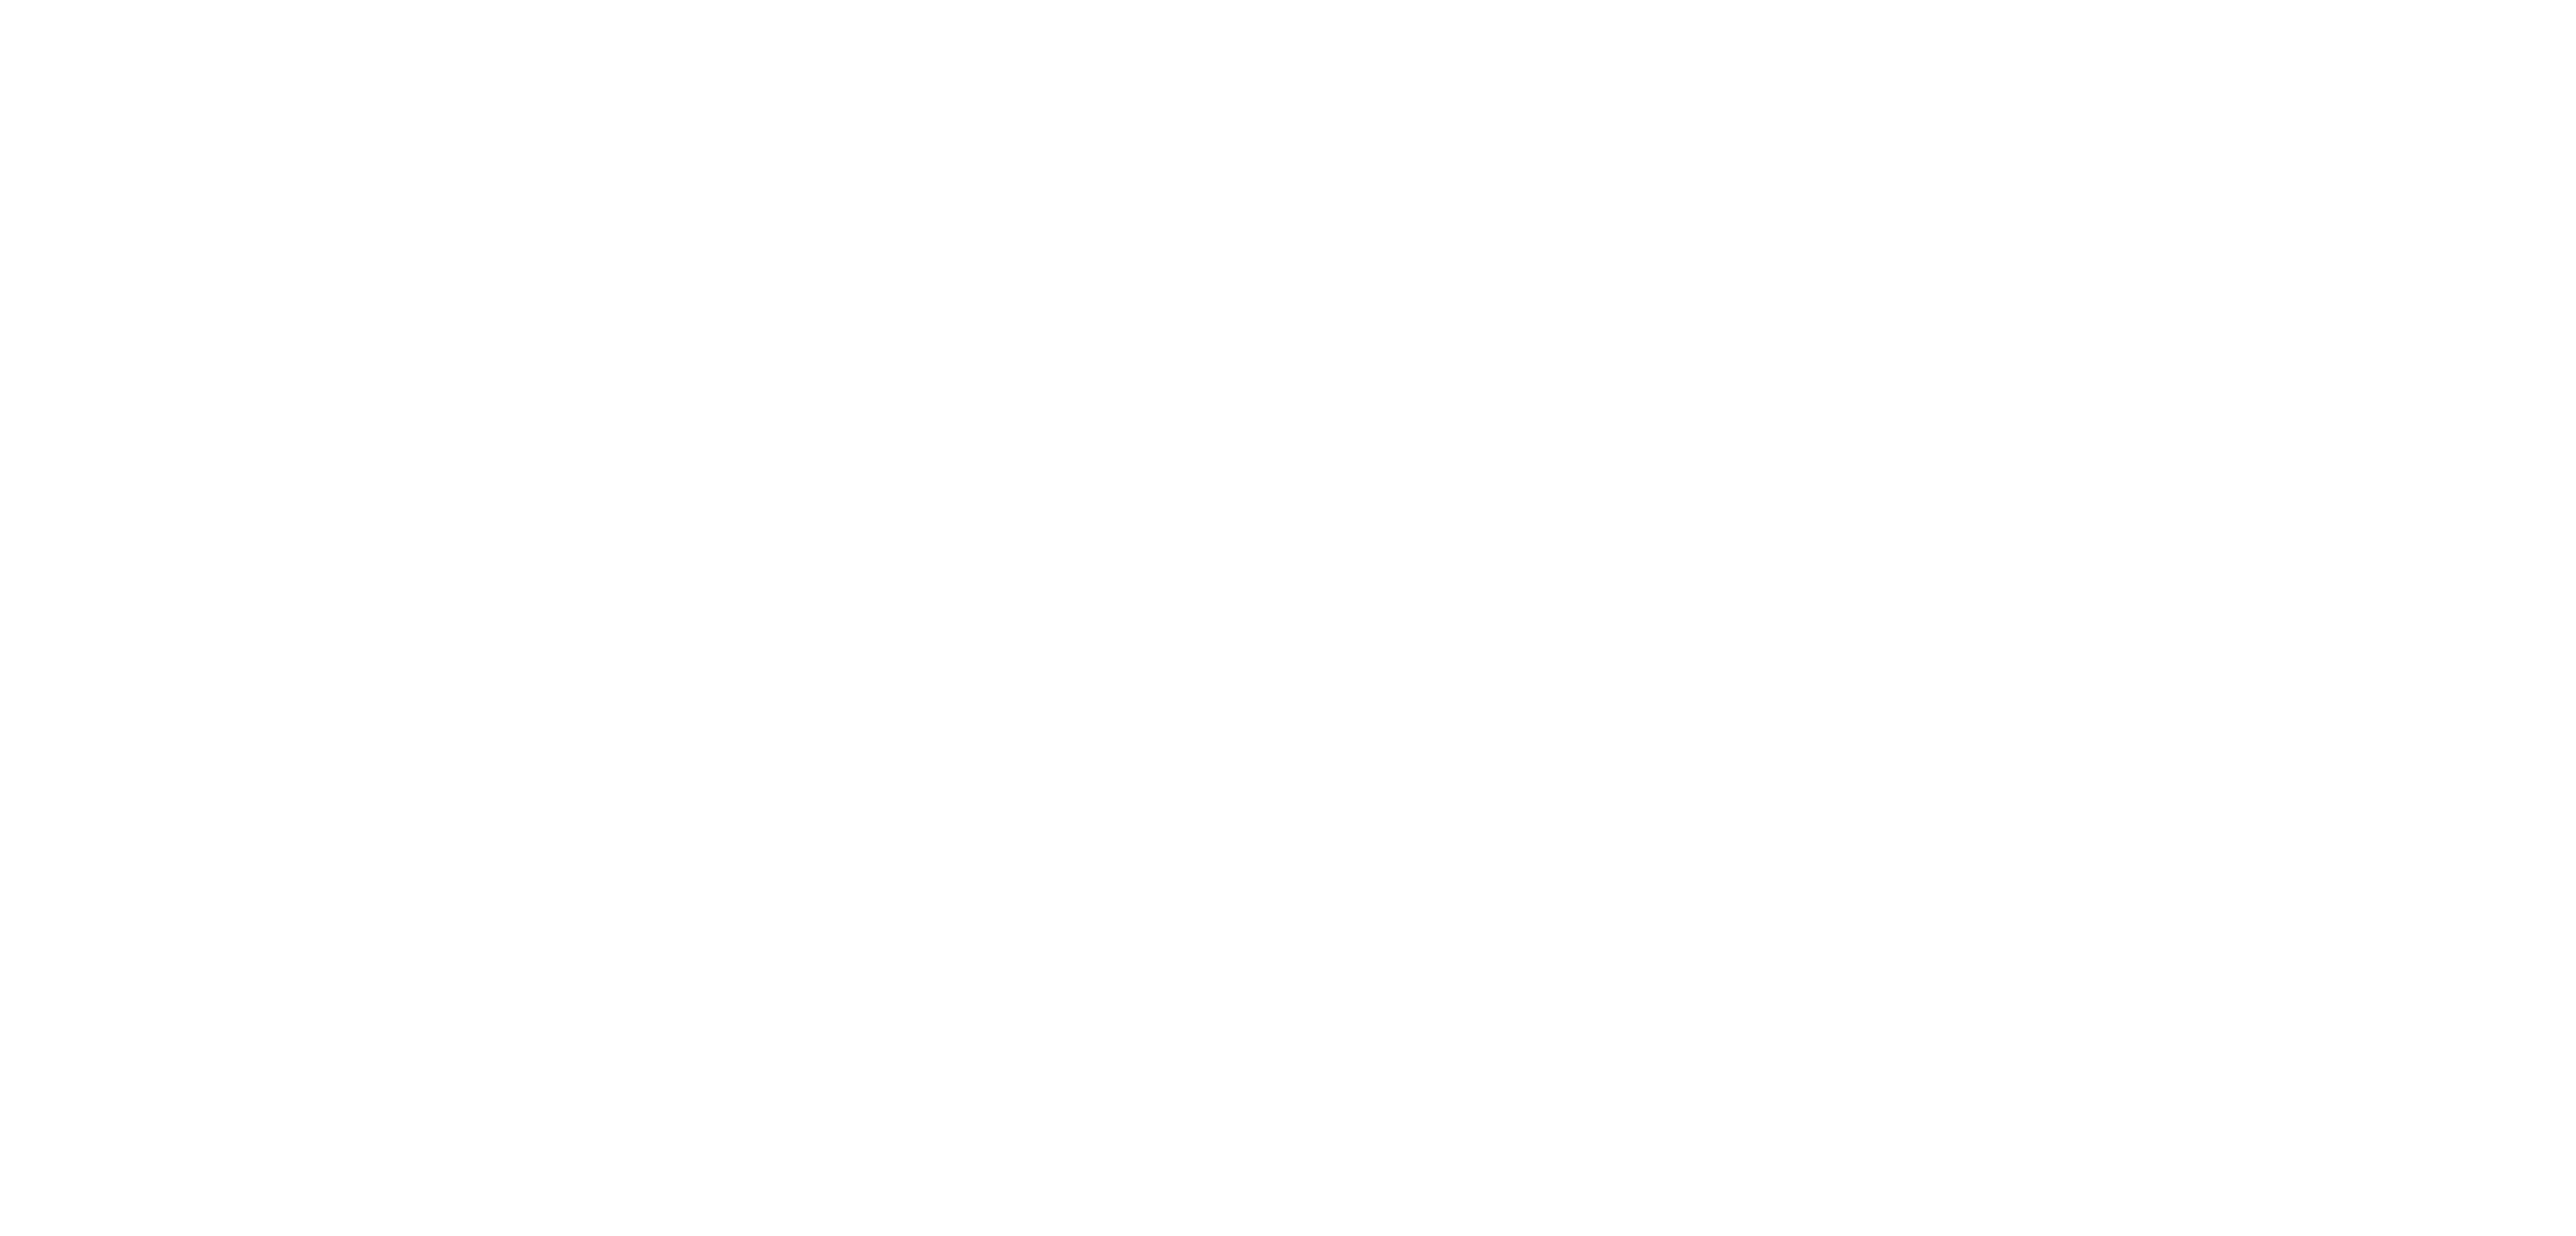

<IPython.core.display.Javascript object>


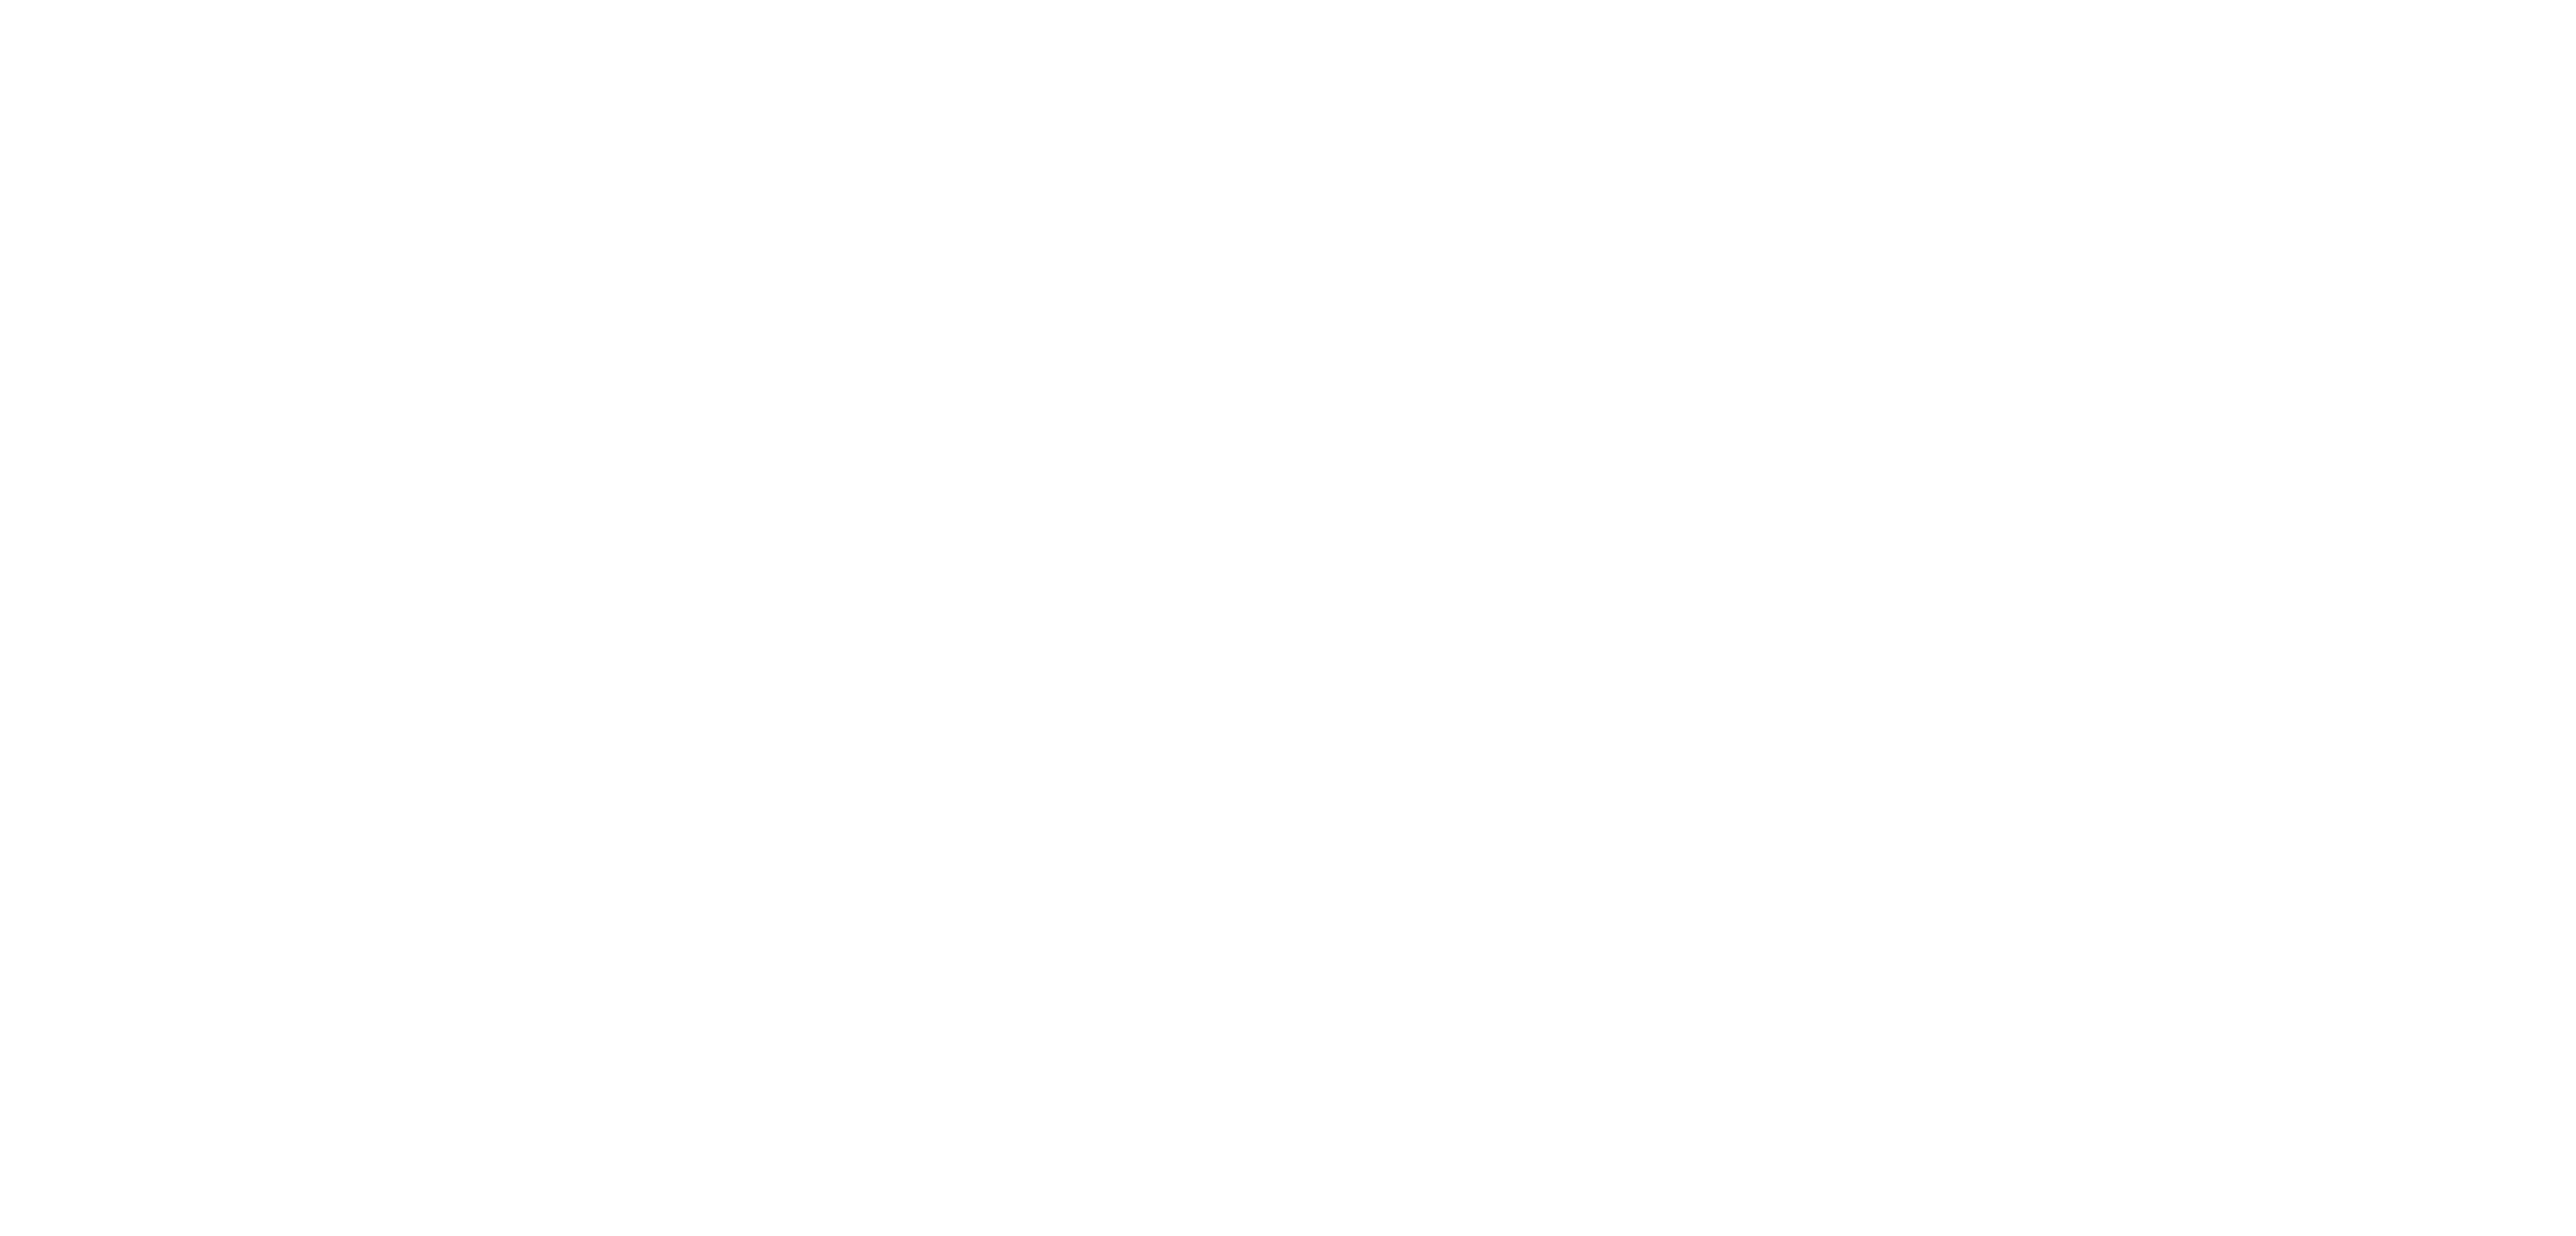

<IPython.core.display.Javascript object>


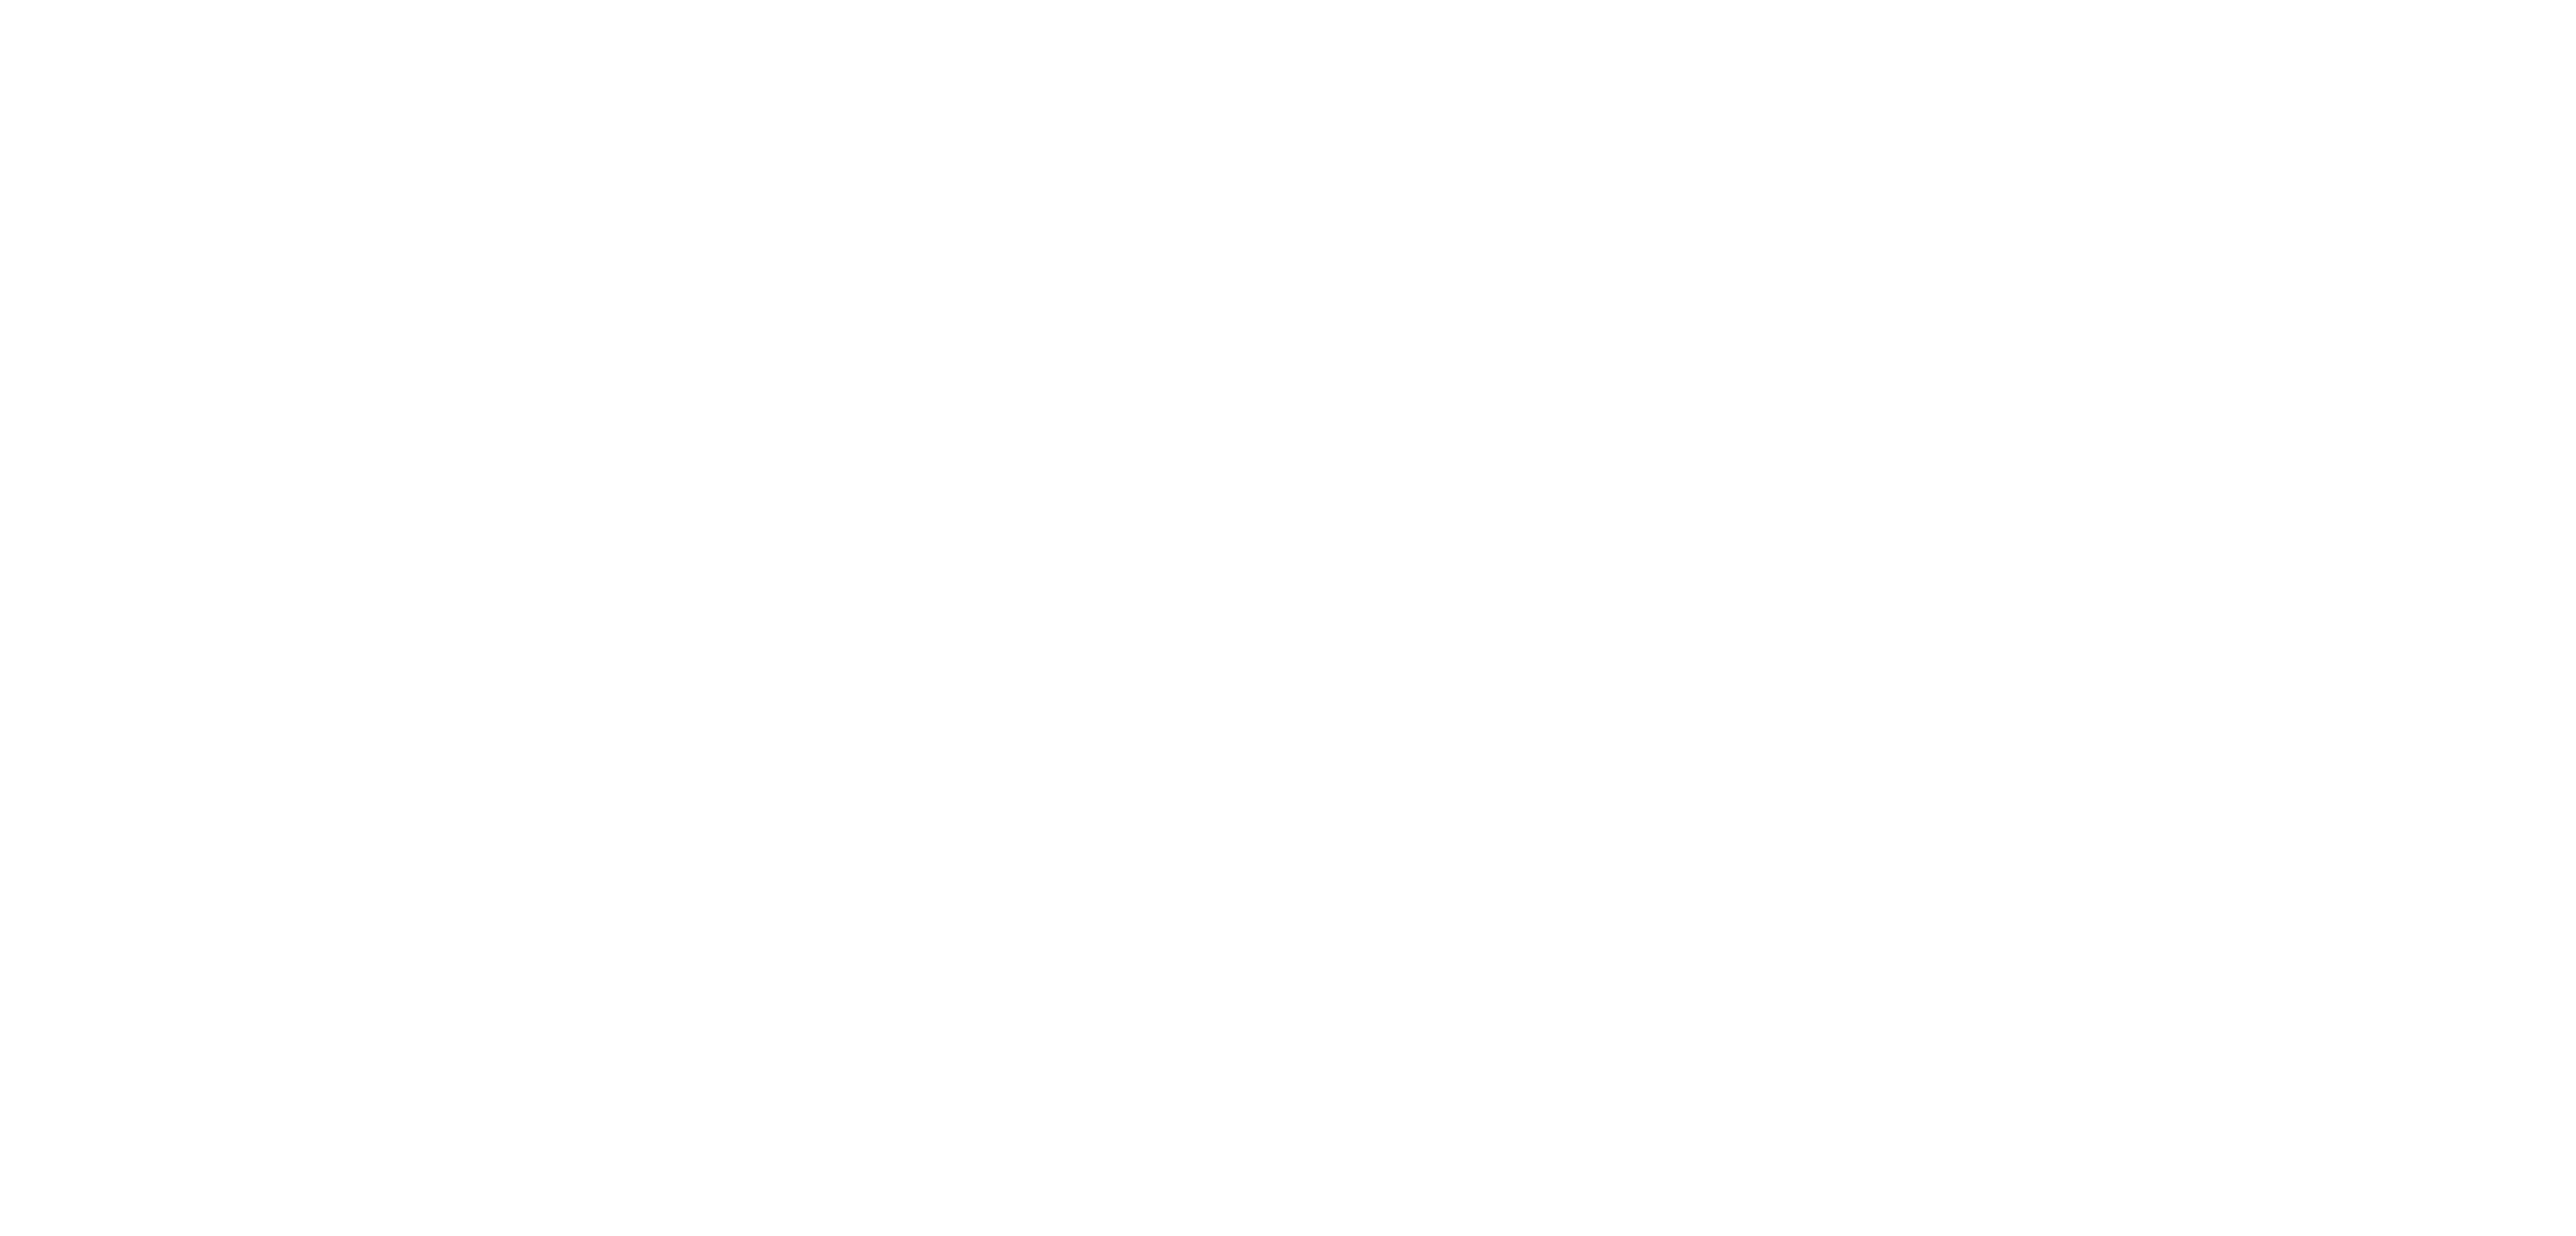

<IPython.core.display.Javascript object>


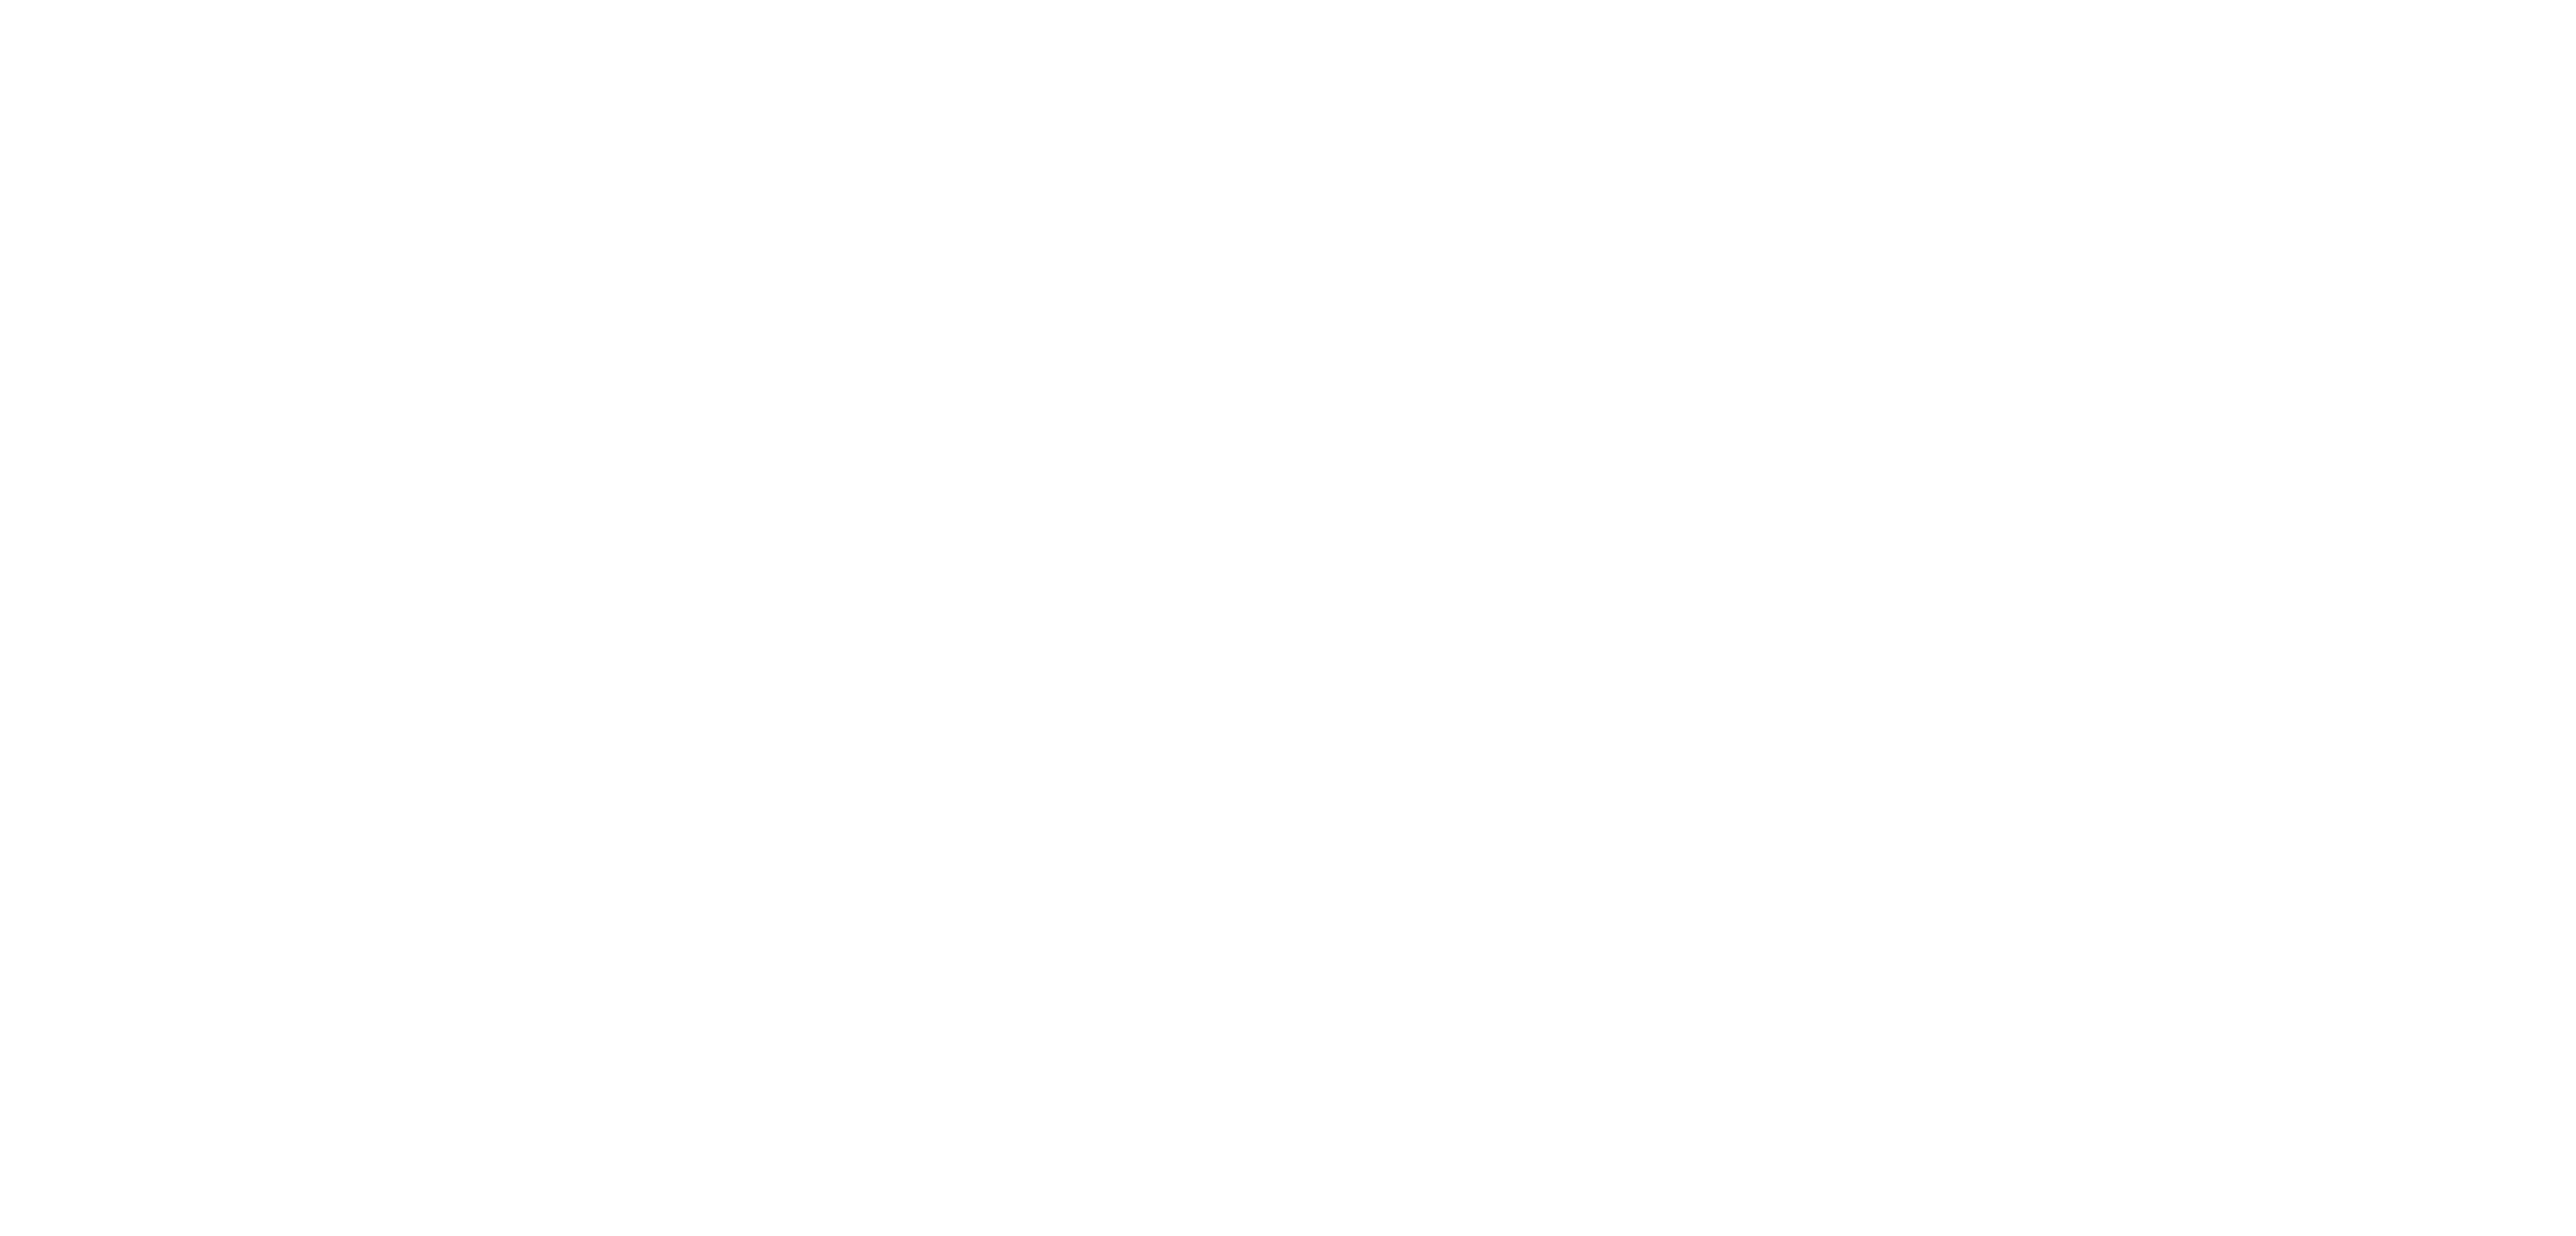

<IPython.core.display.Javascript object>


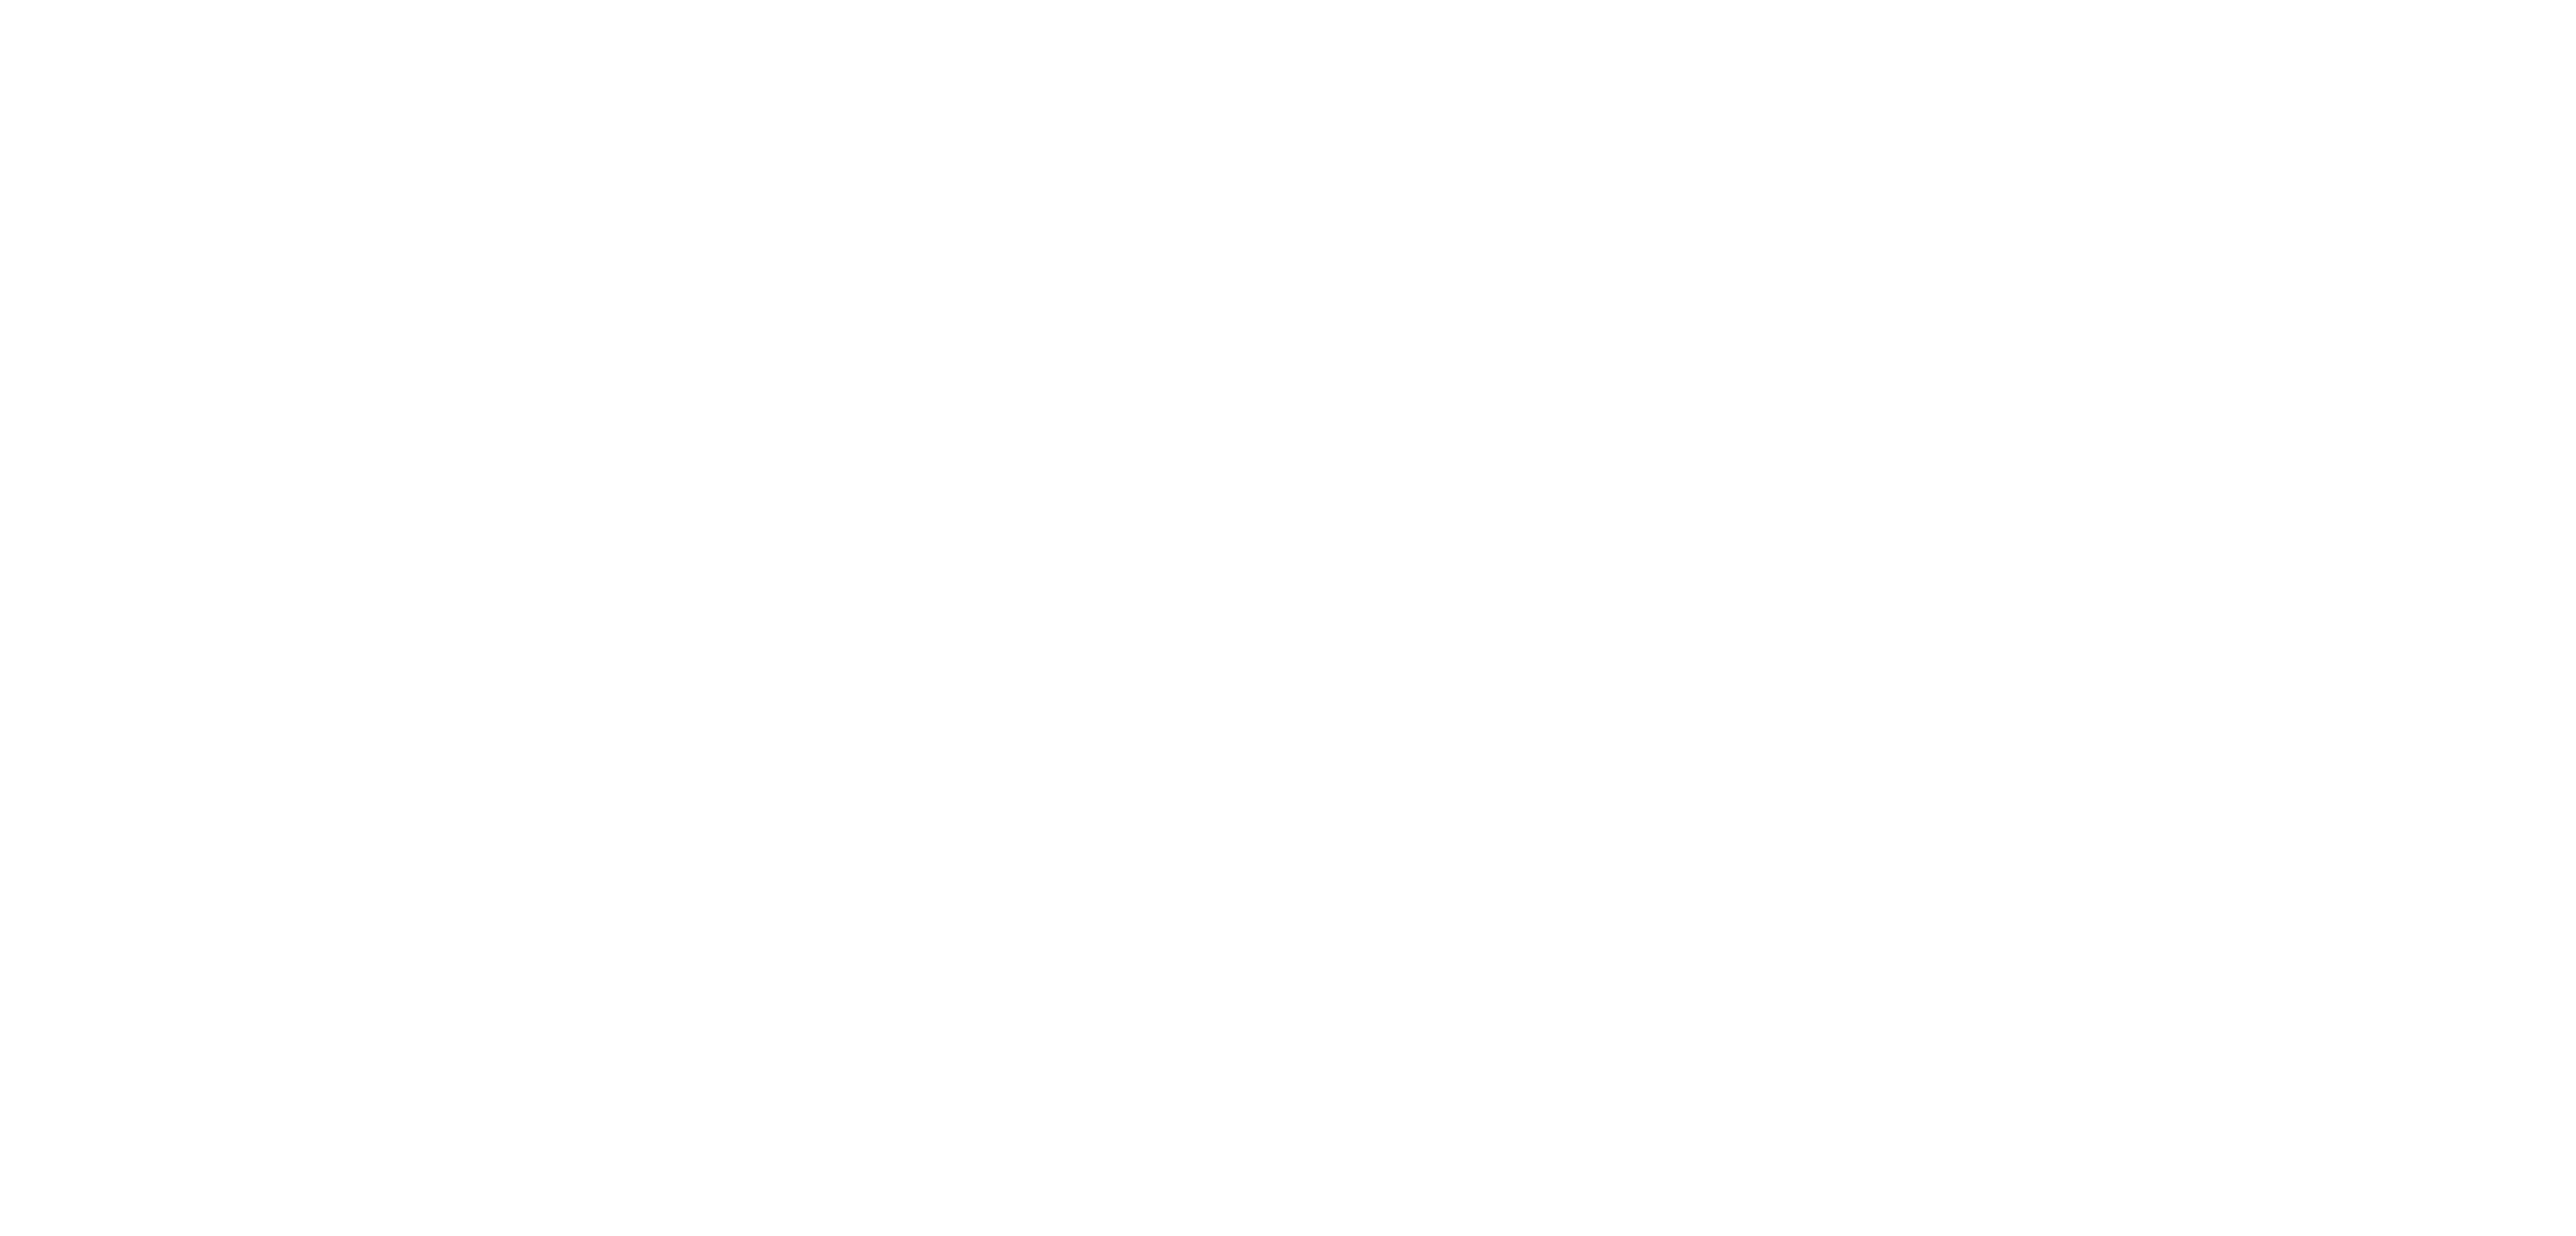

<IPython.core.display.Javascript object>


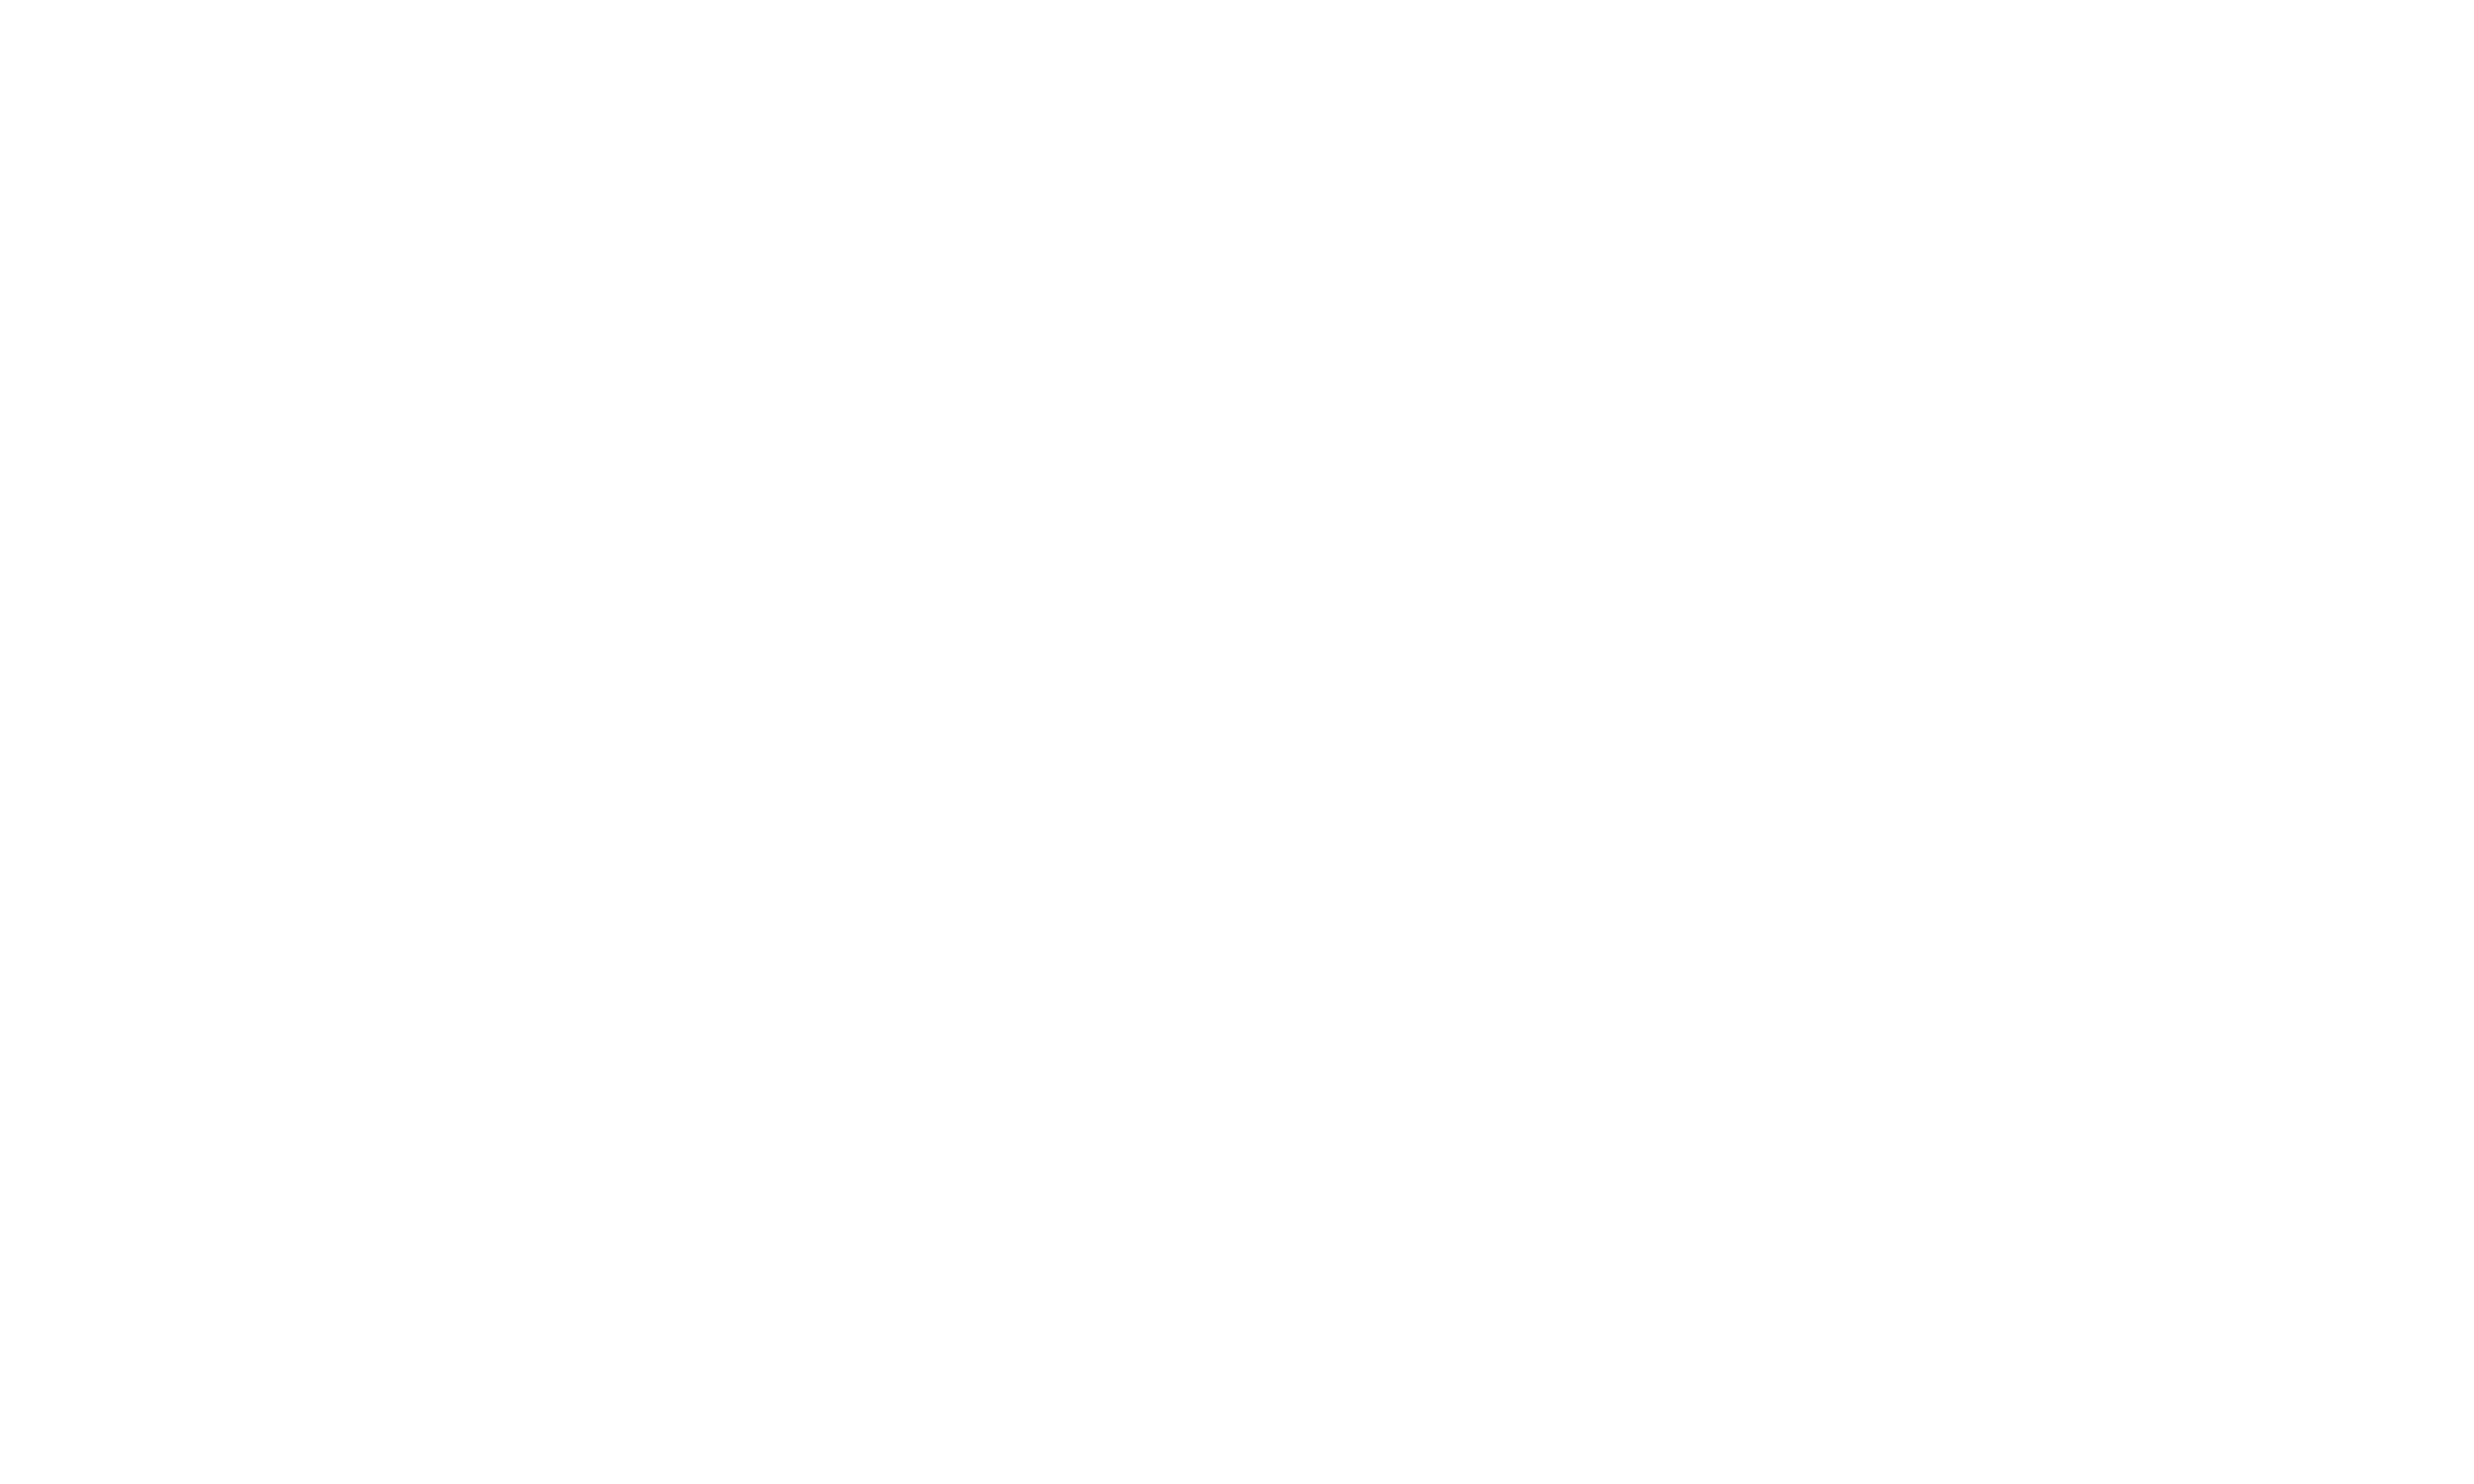

<IPython.core.display.Javascript object>


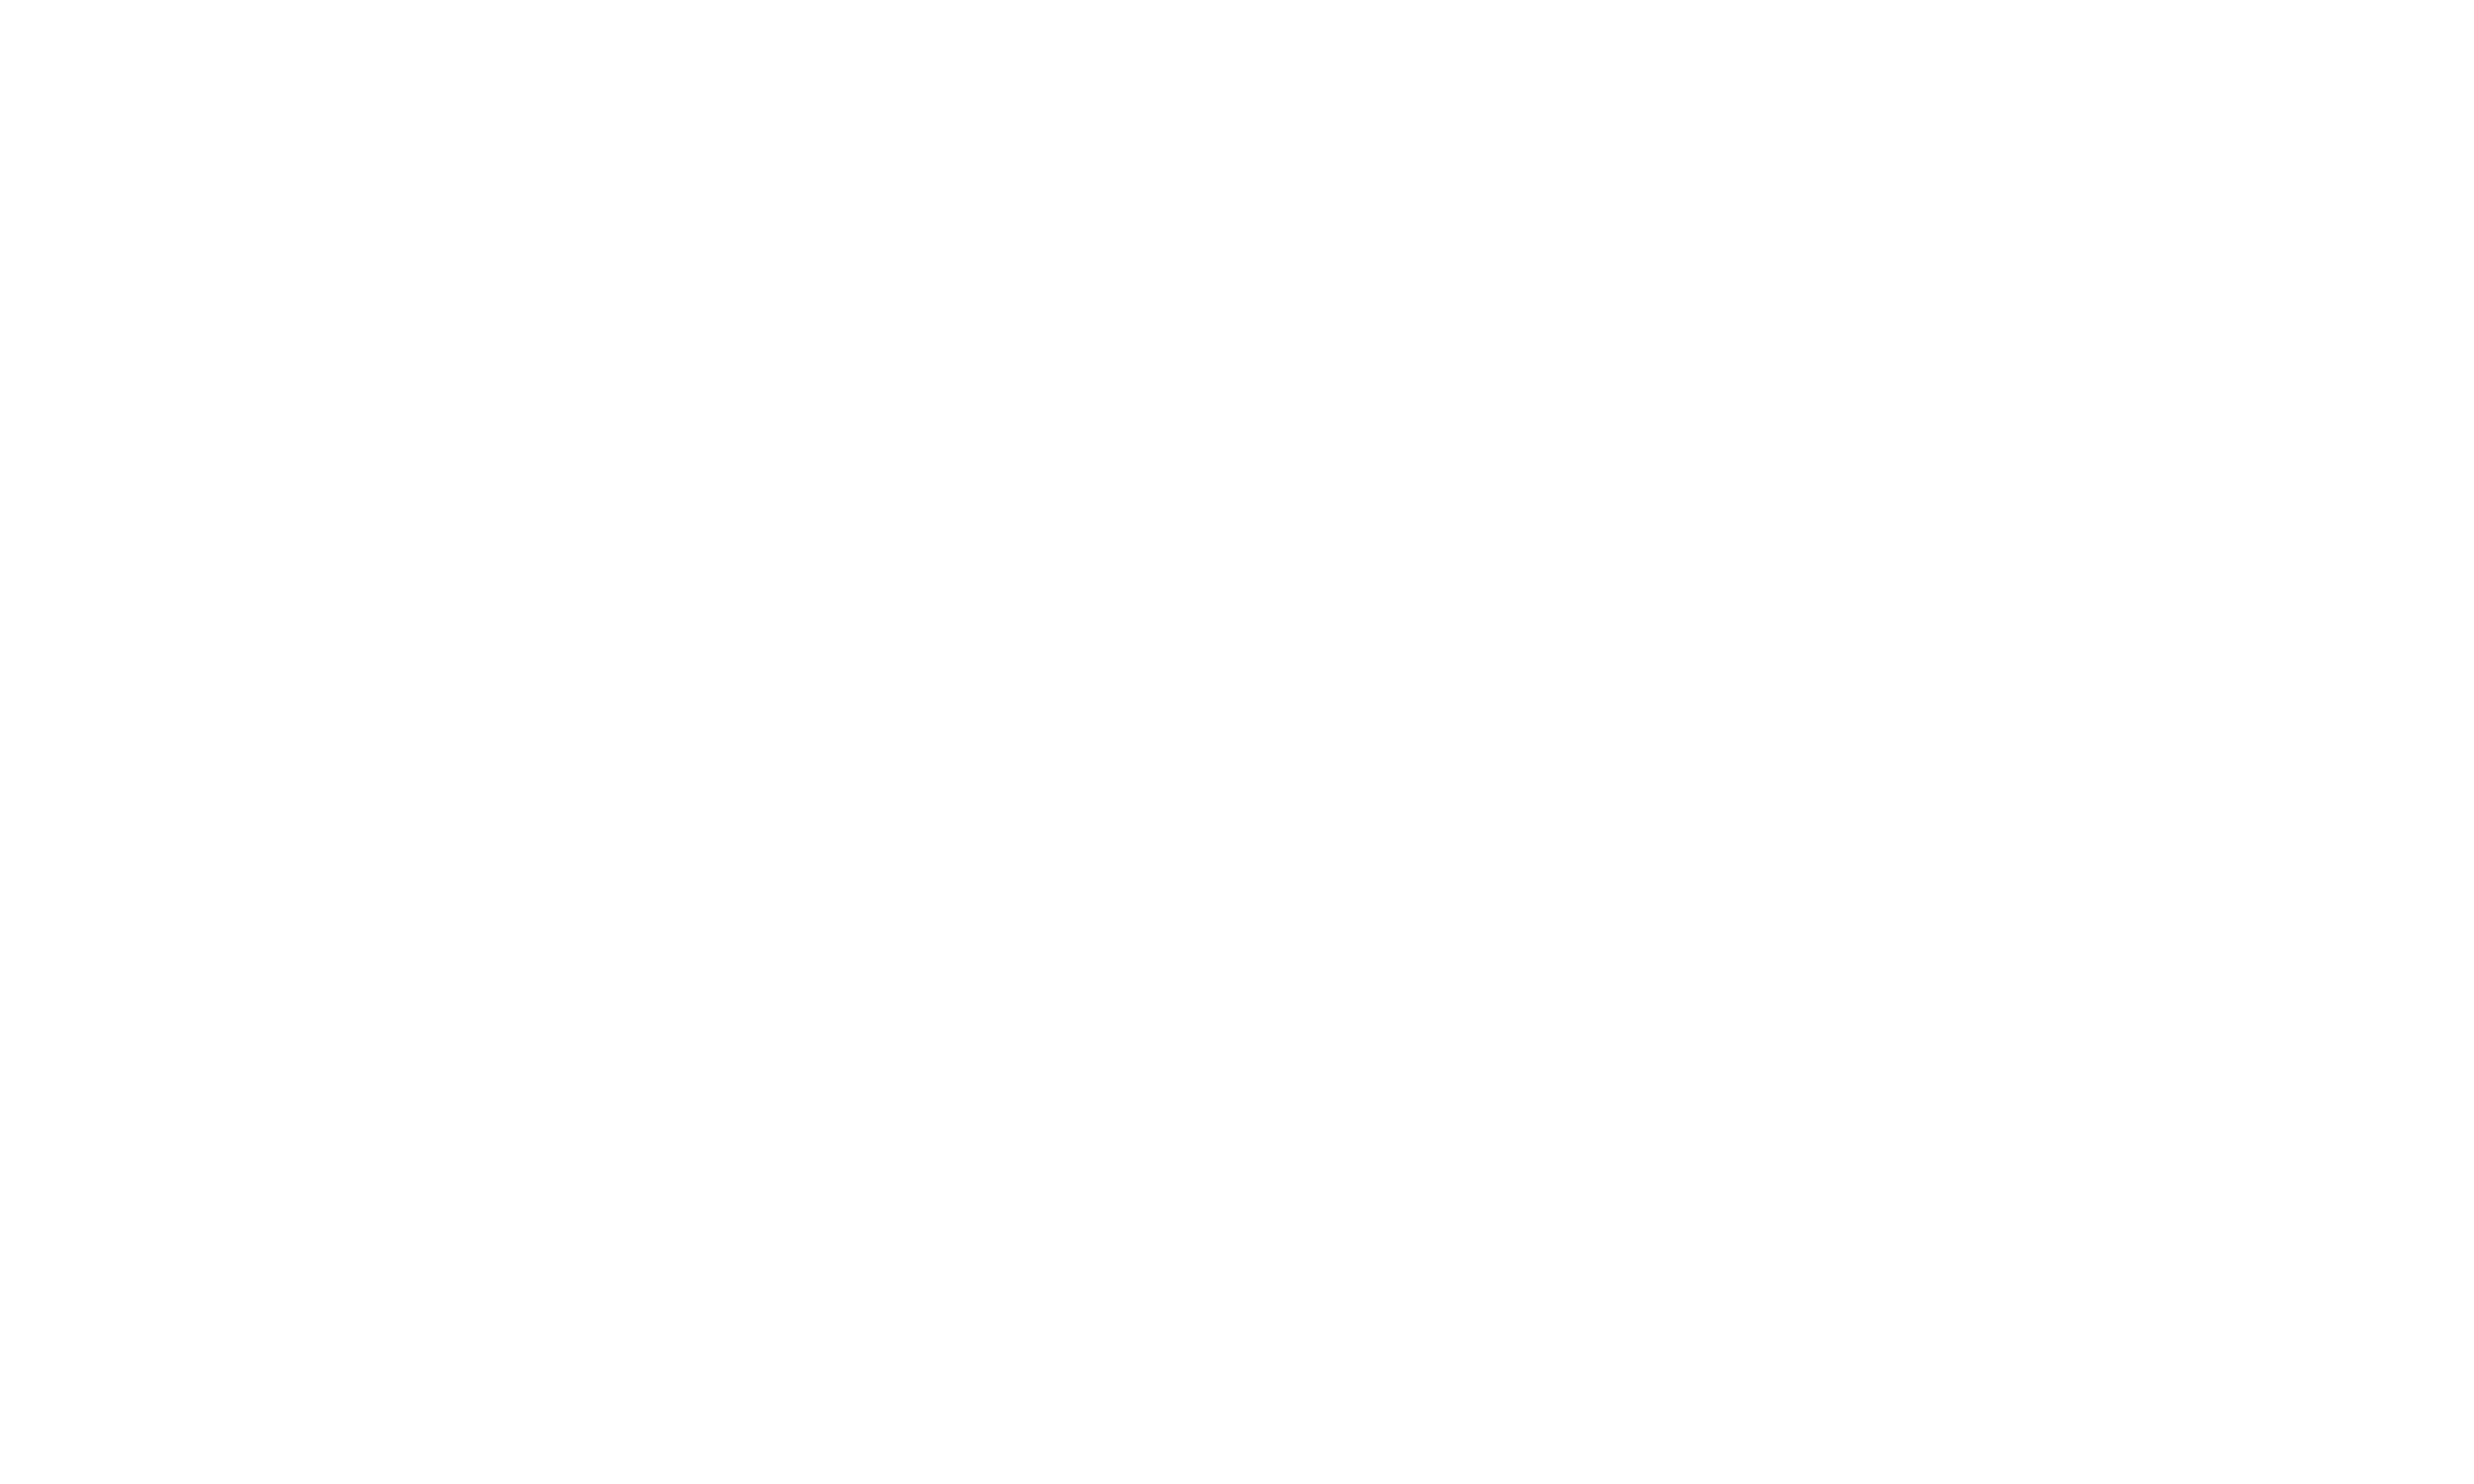

<IPython.core.display.Javascript object>


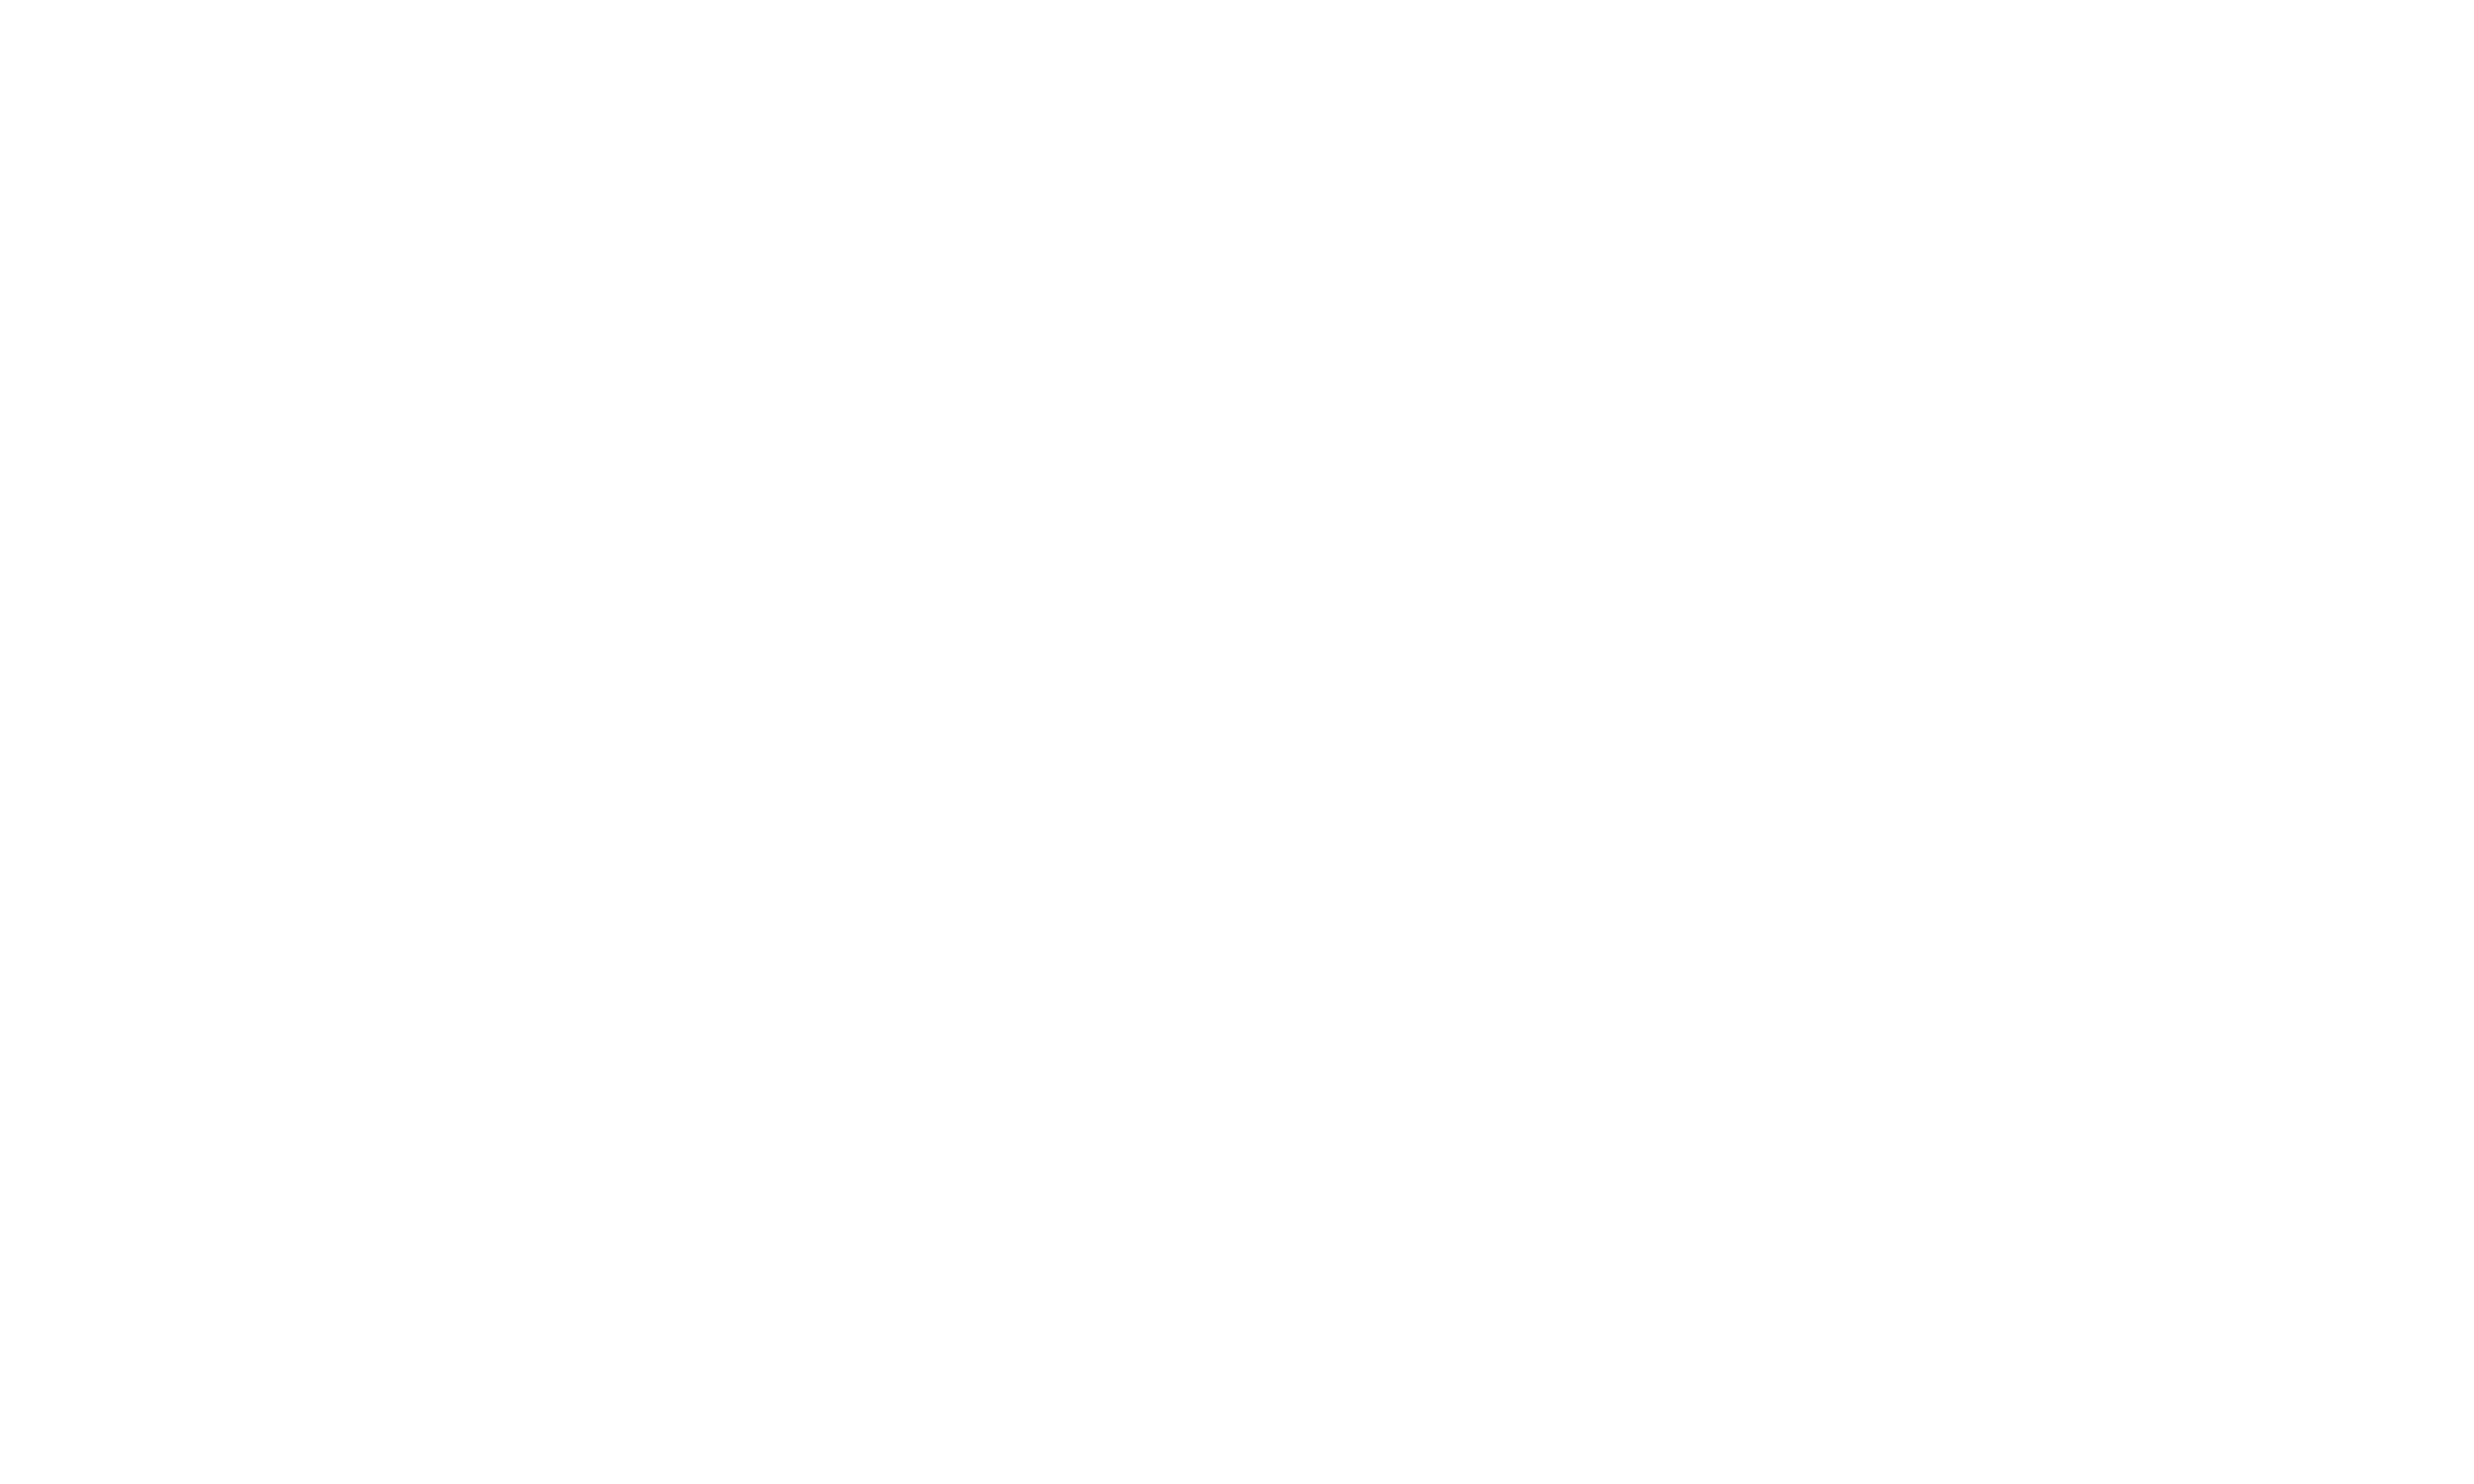

<IPython.core.display.Javascript object>


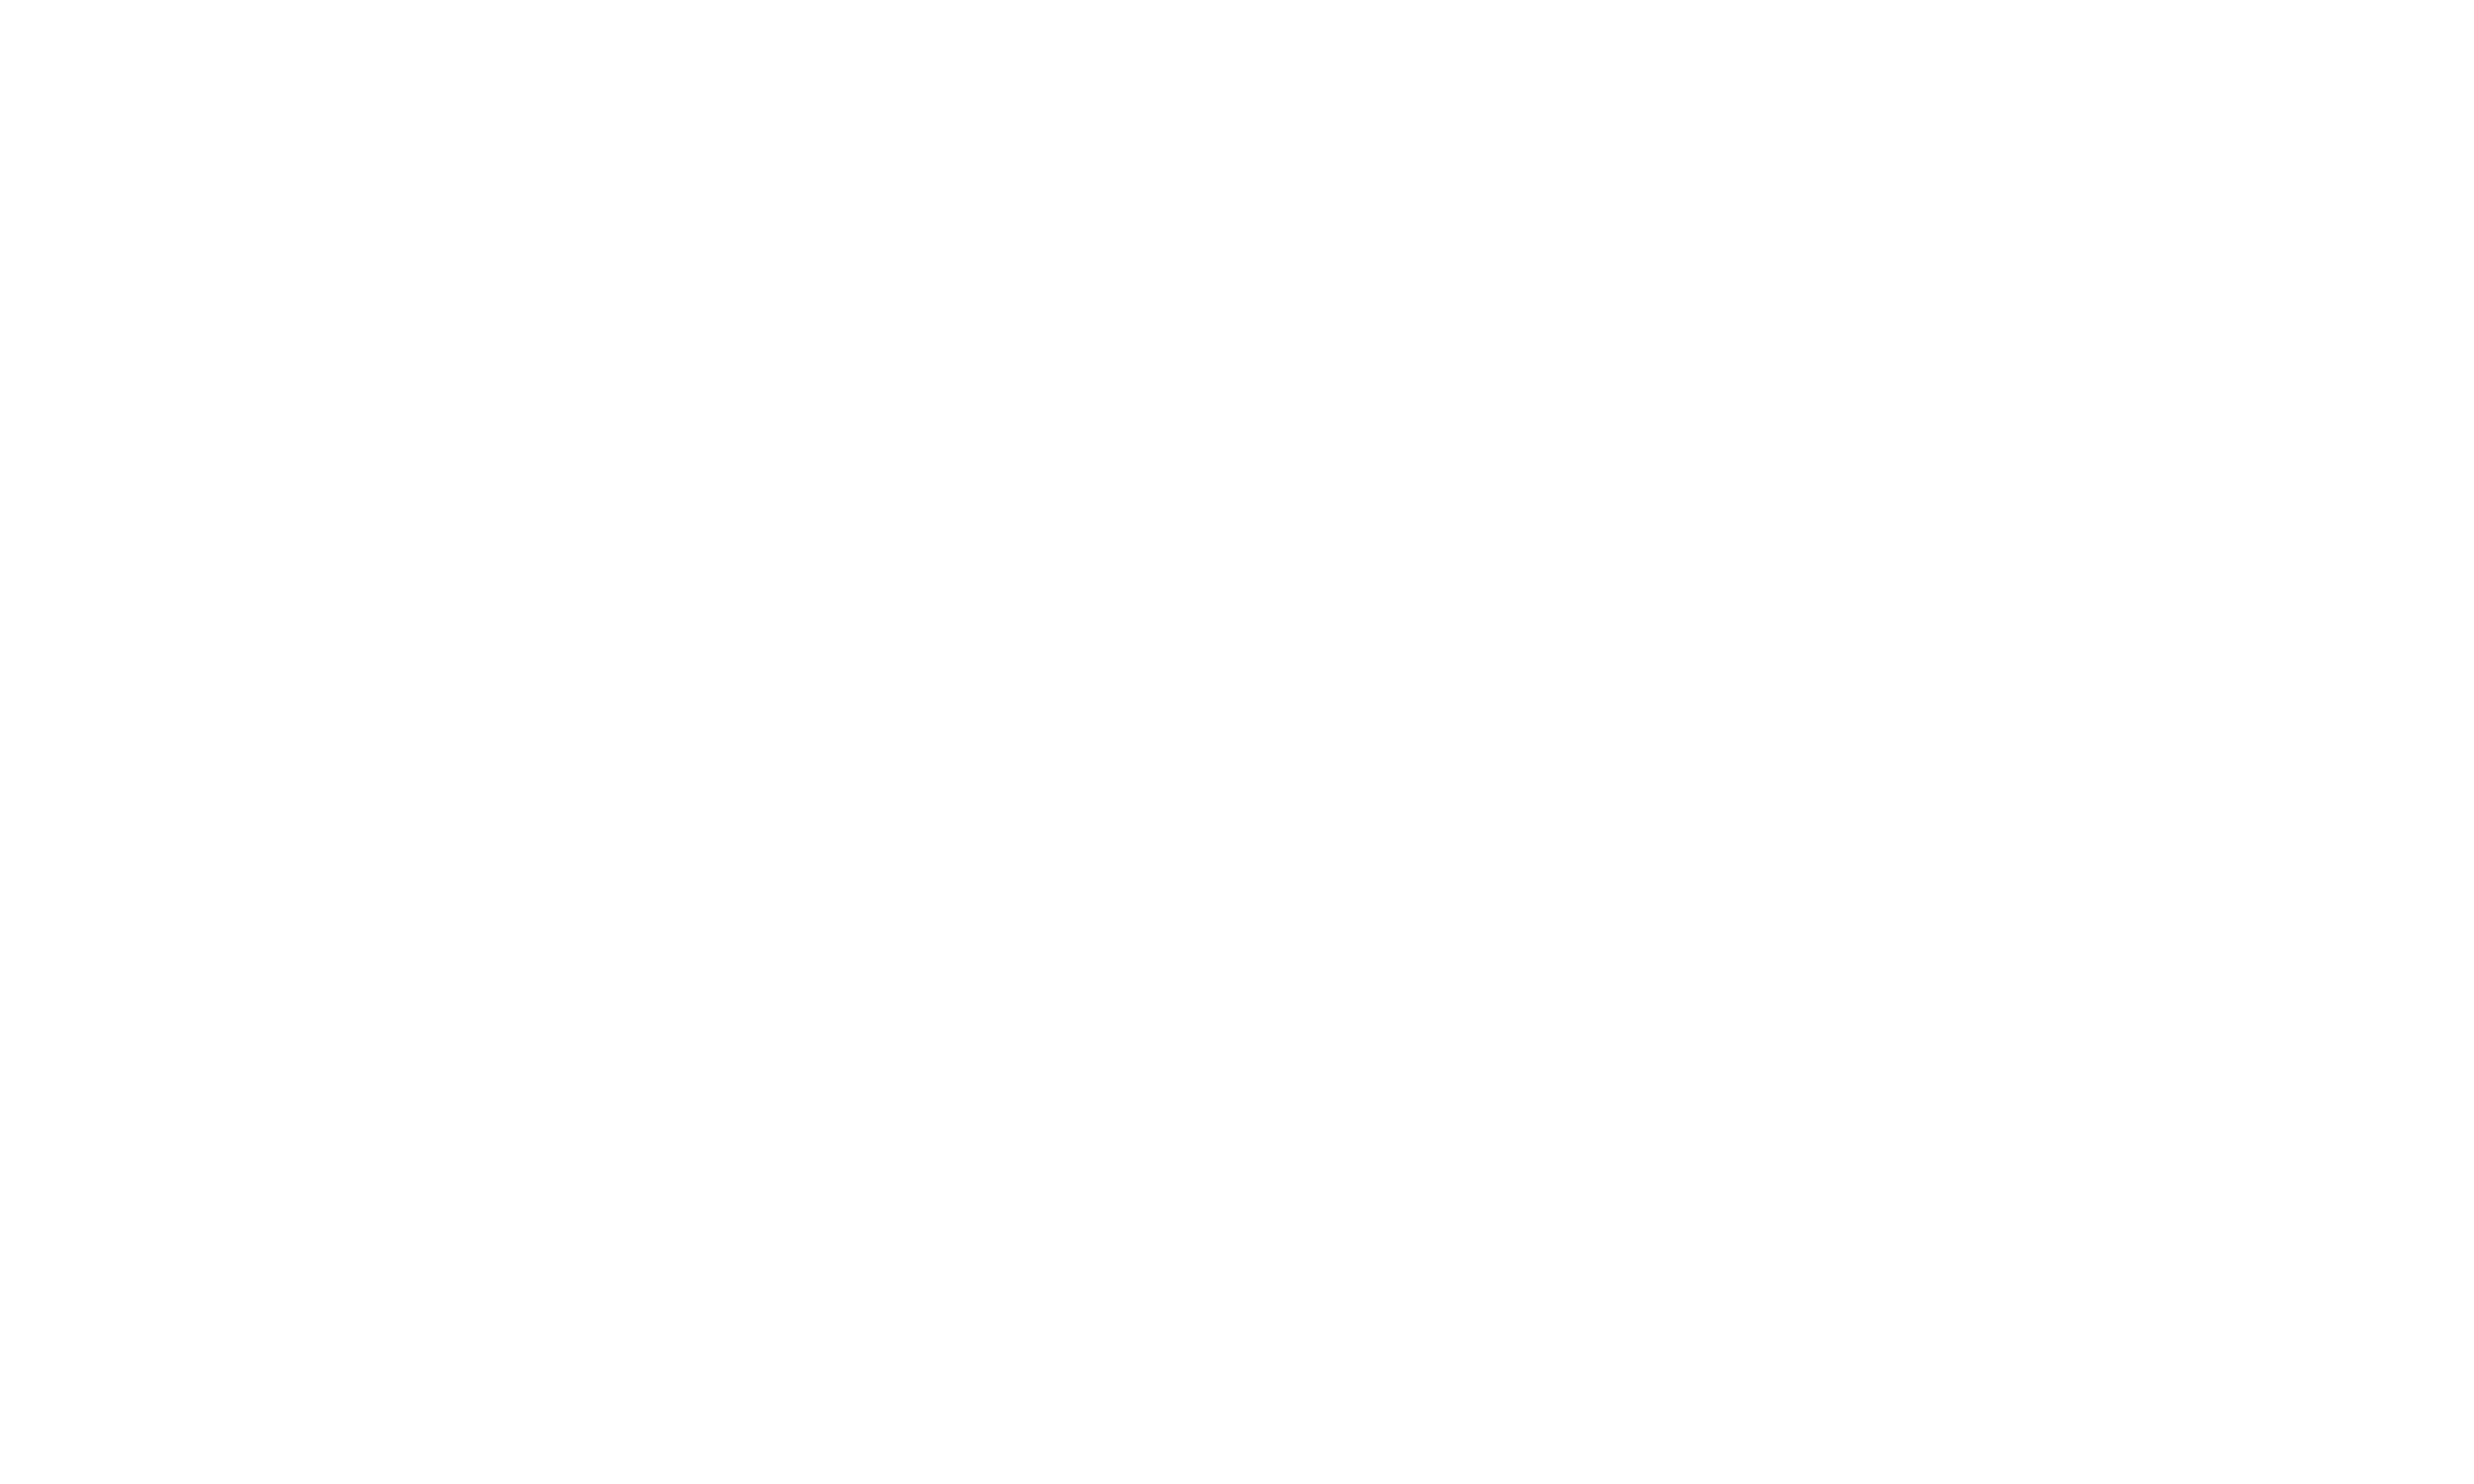

<IPython.core.display.Javascript object>


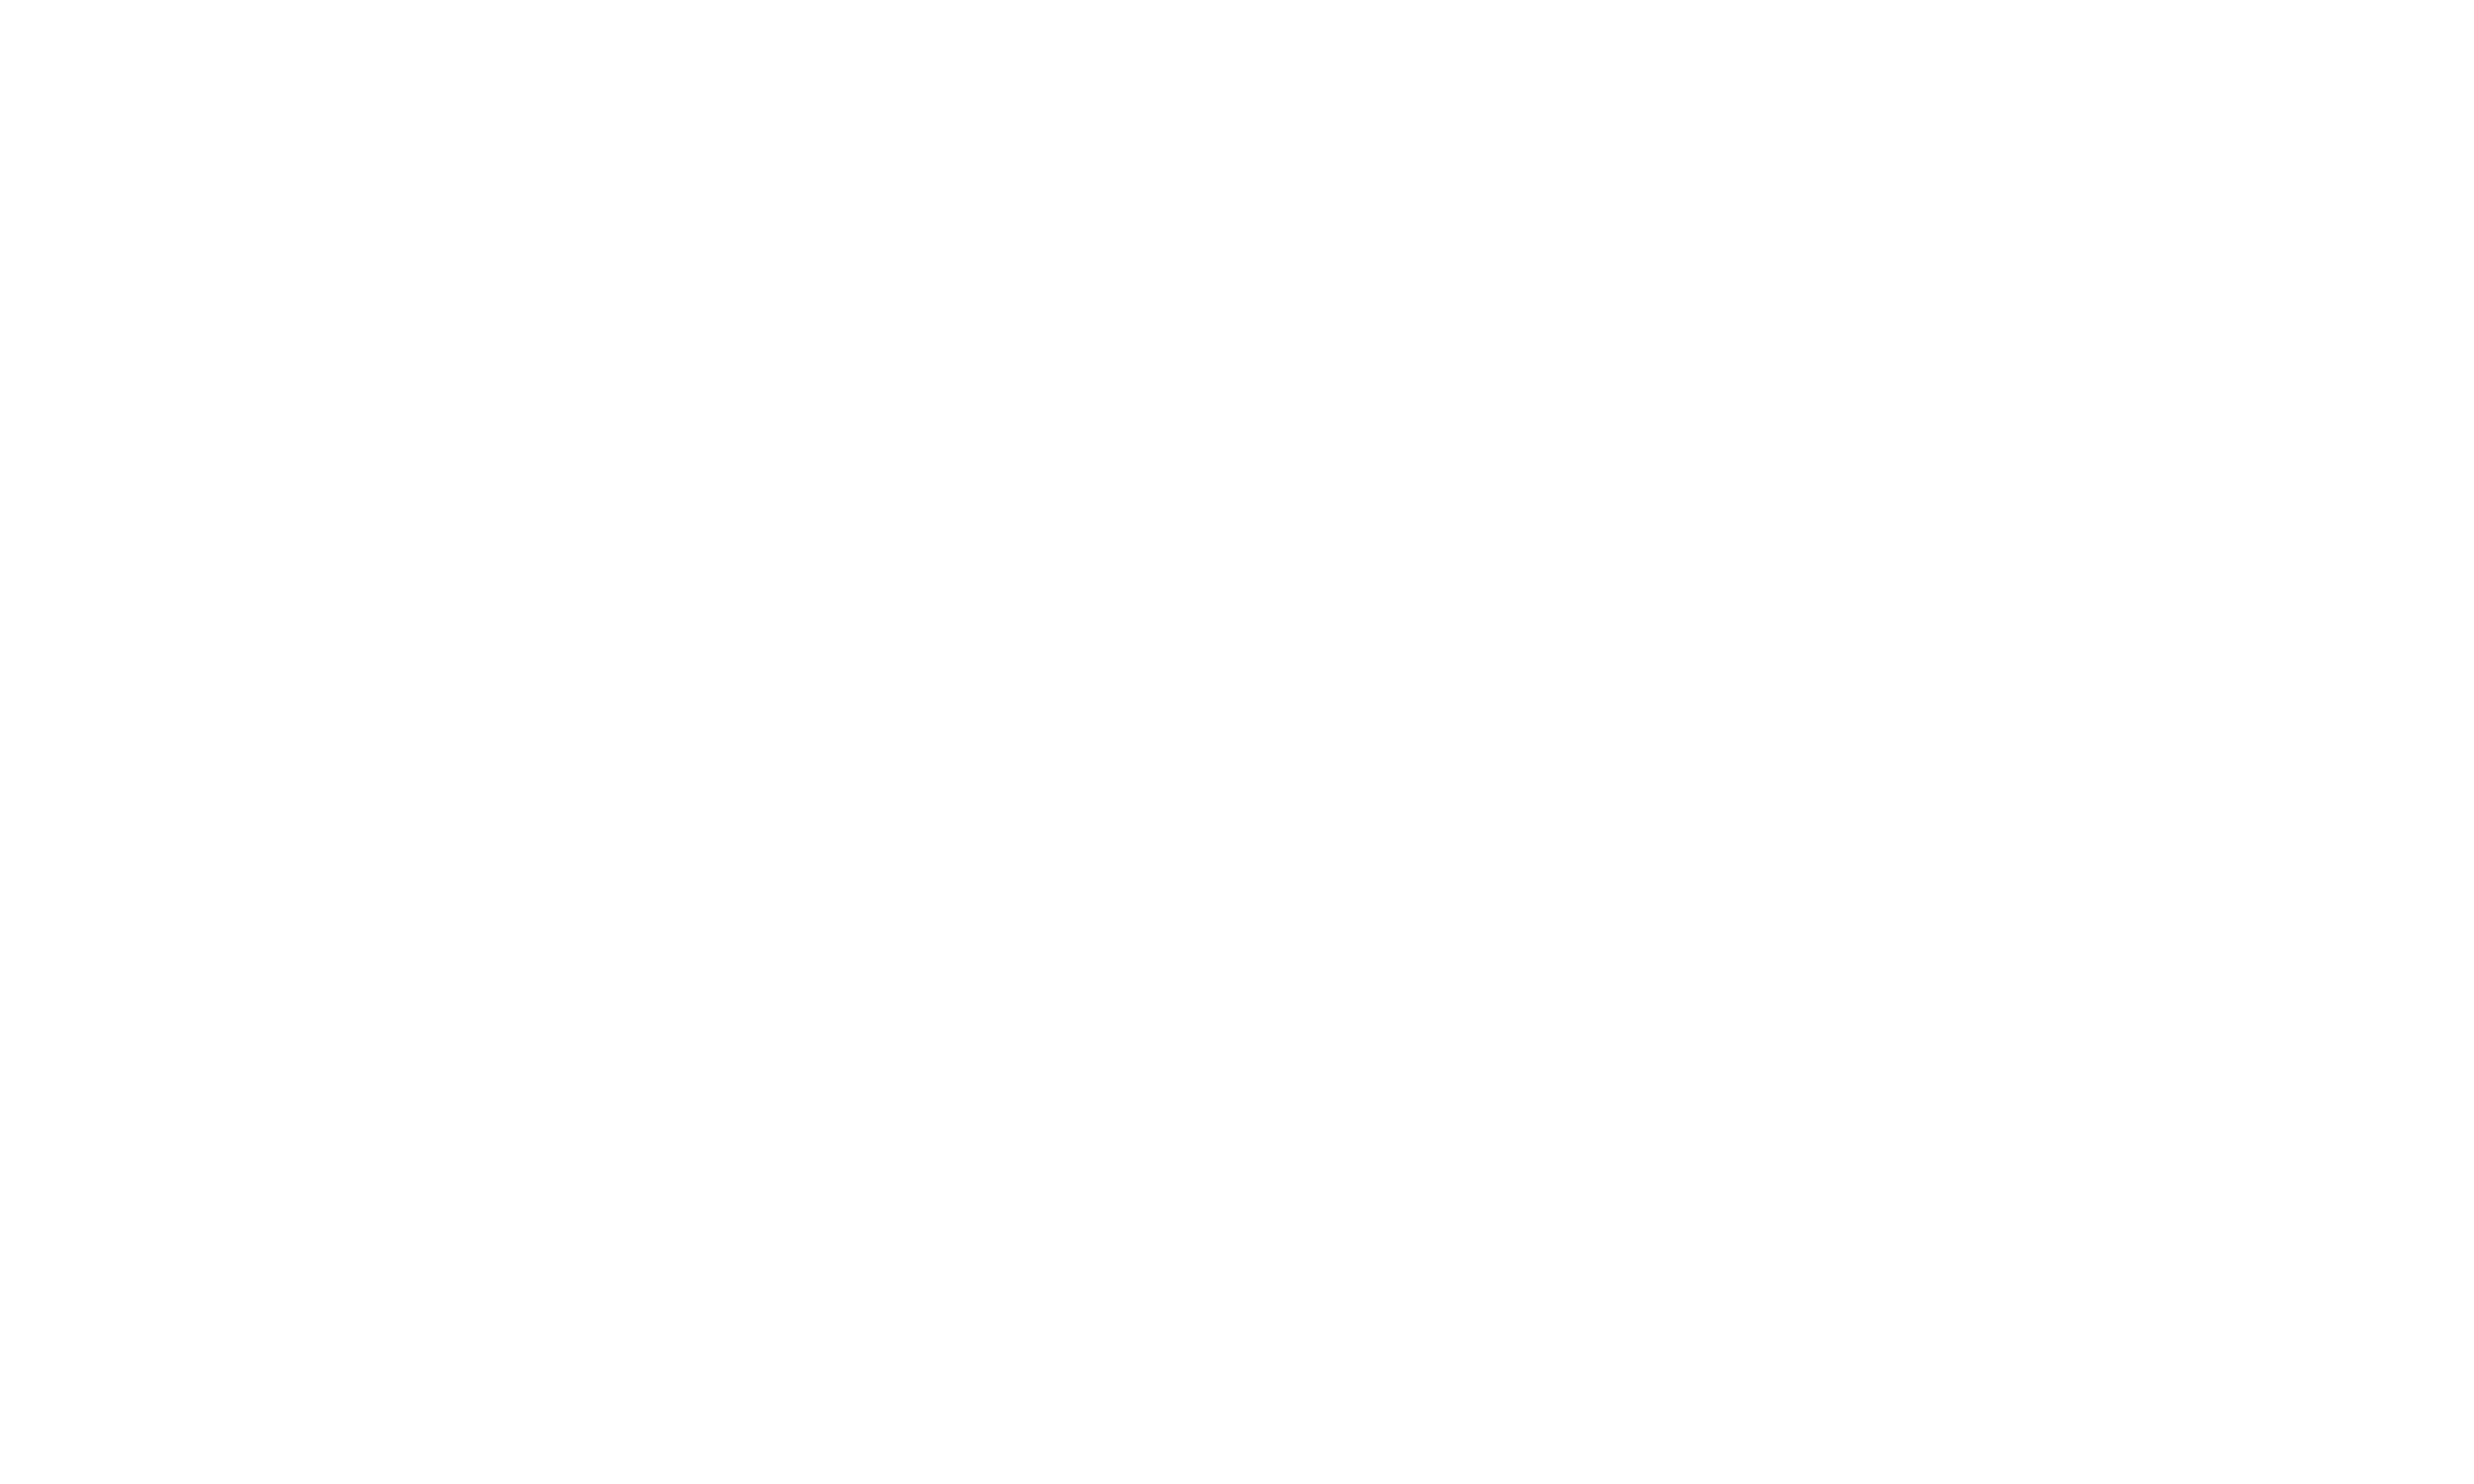

<IPython.core.display.Javascript object>


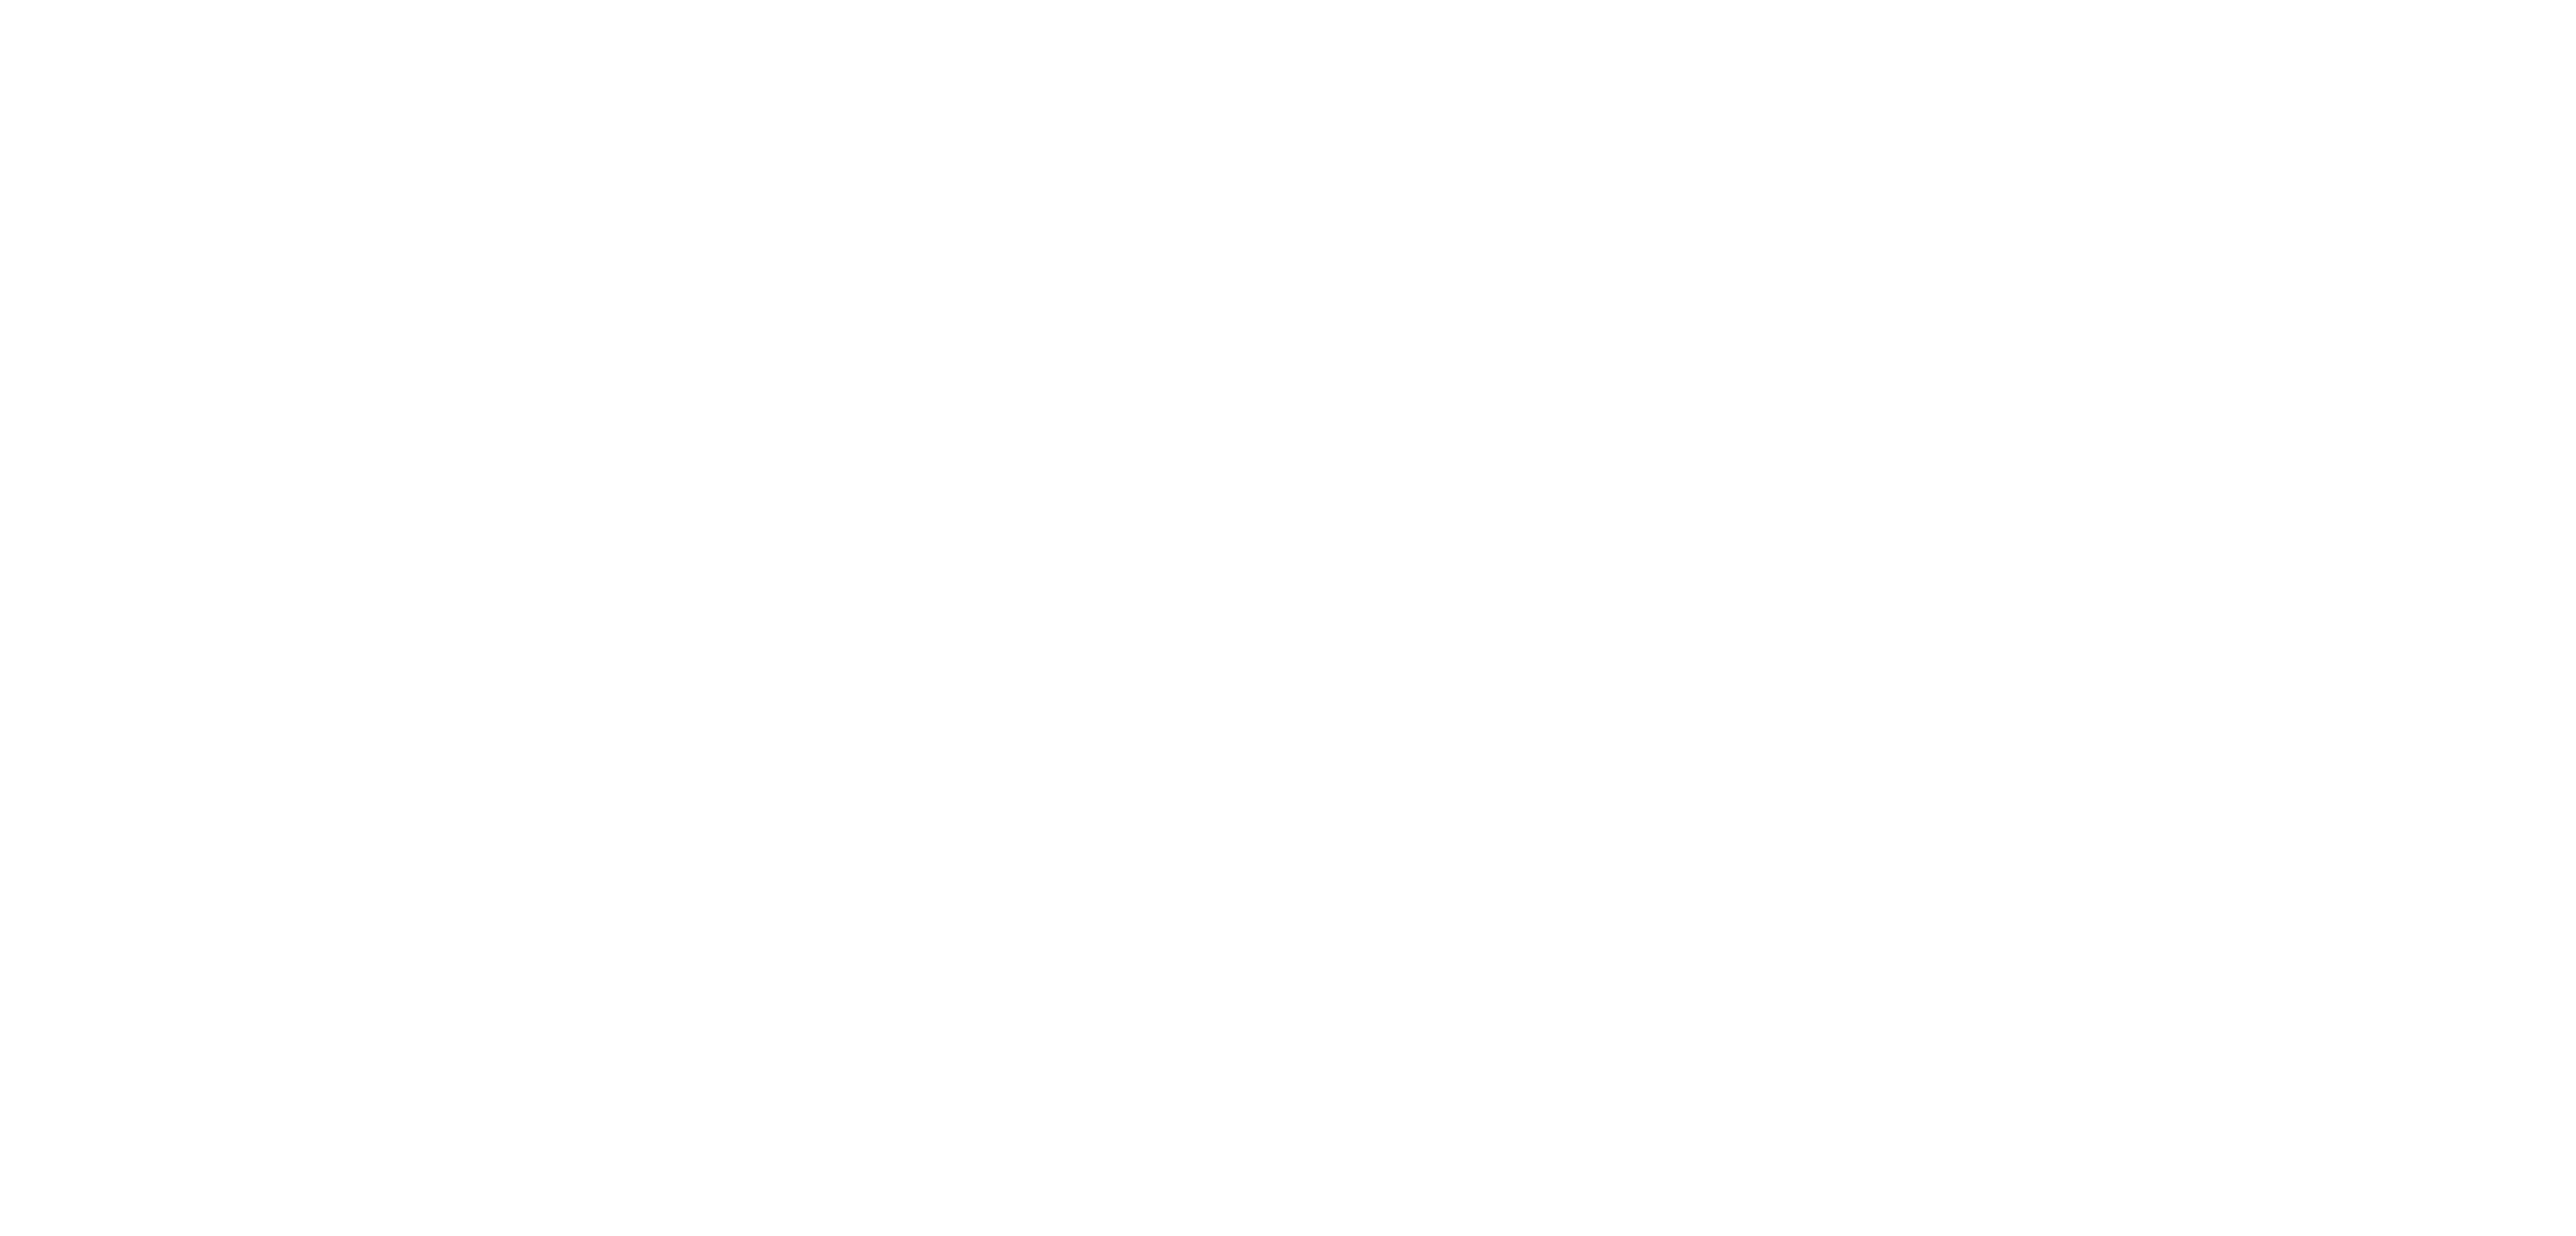

<IPython.core.display.Javascript object>


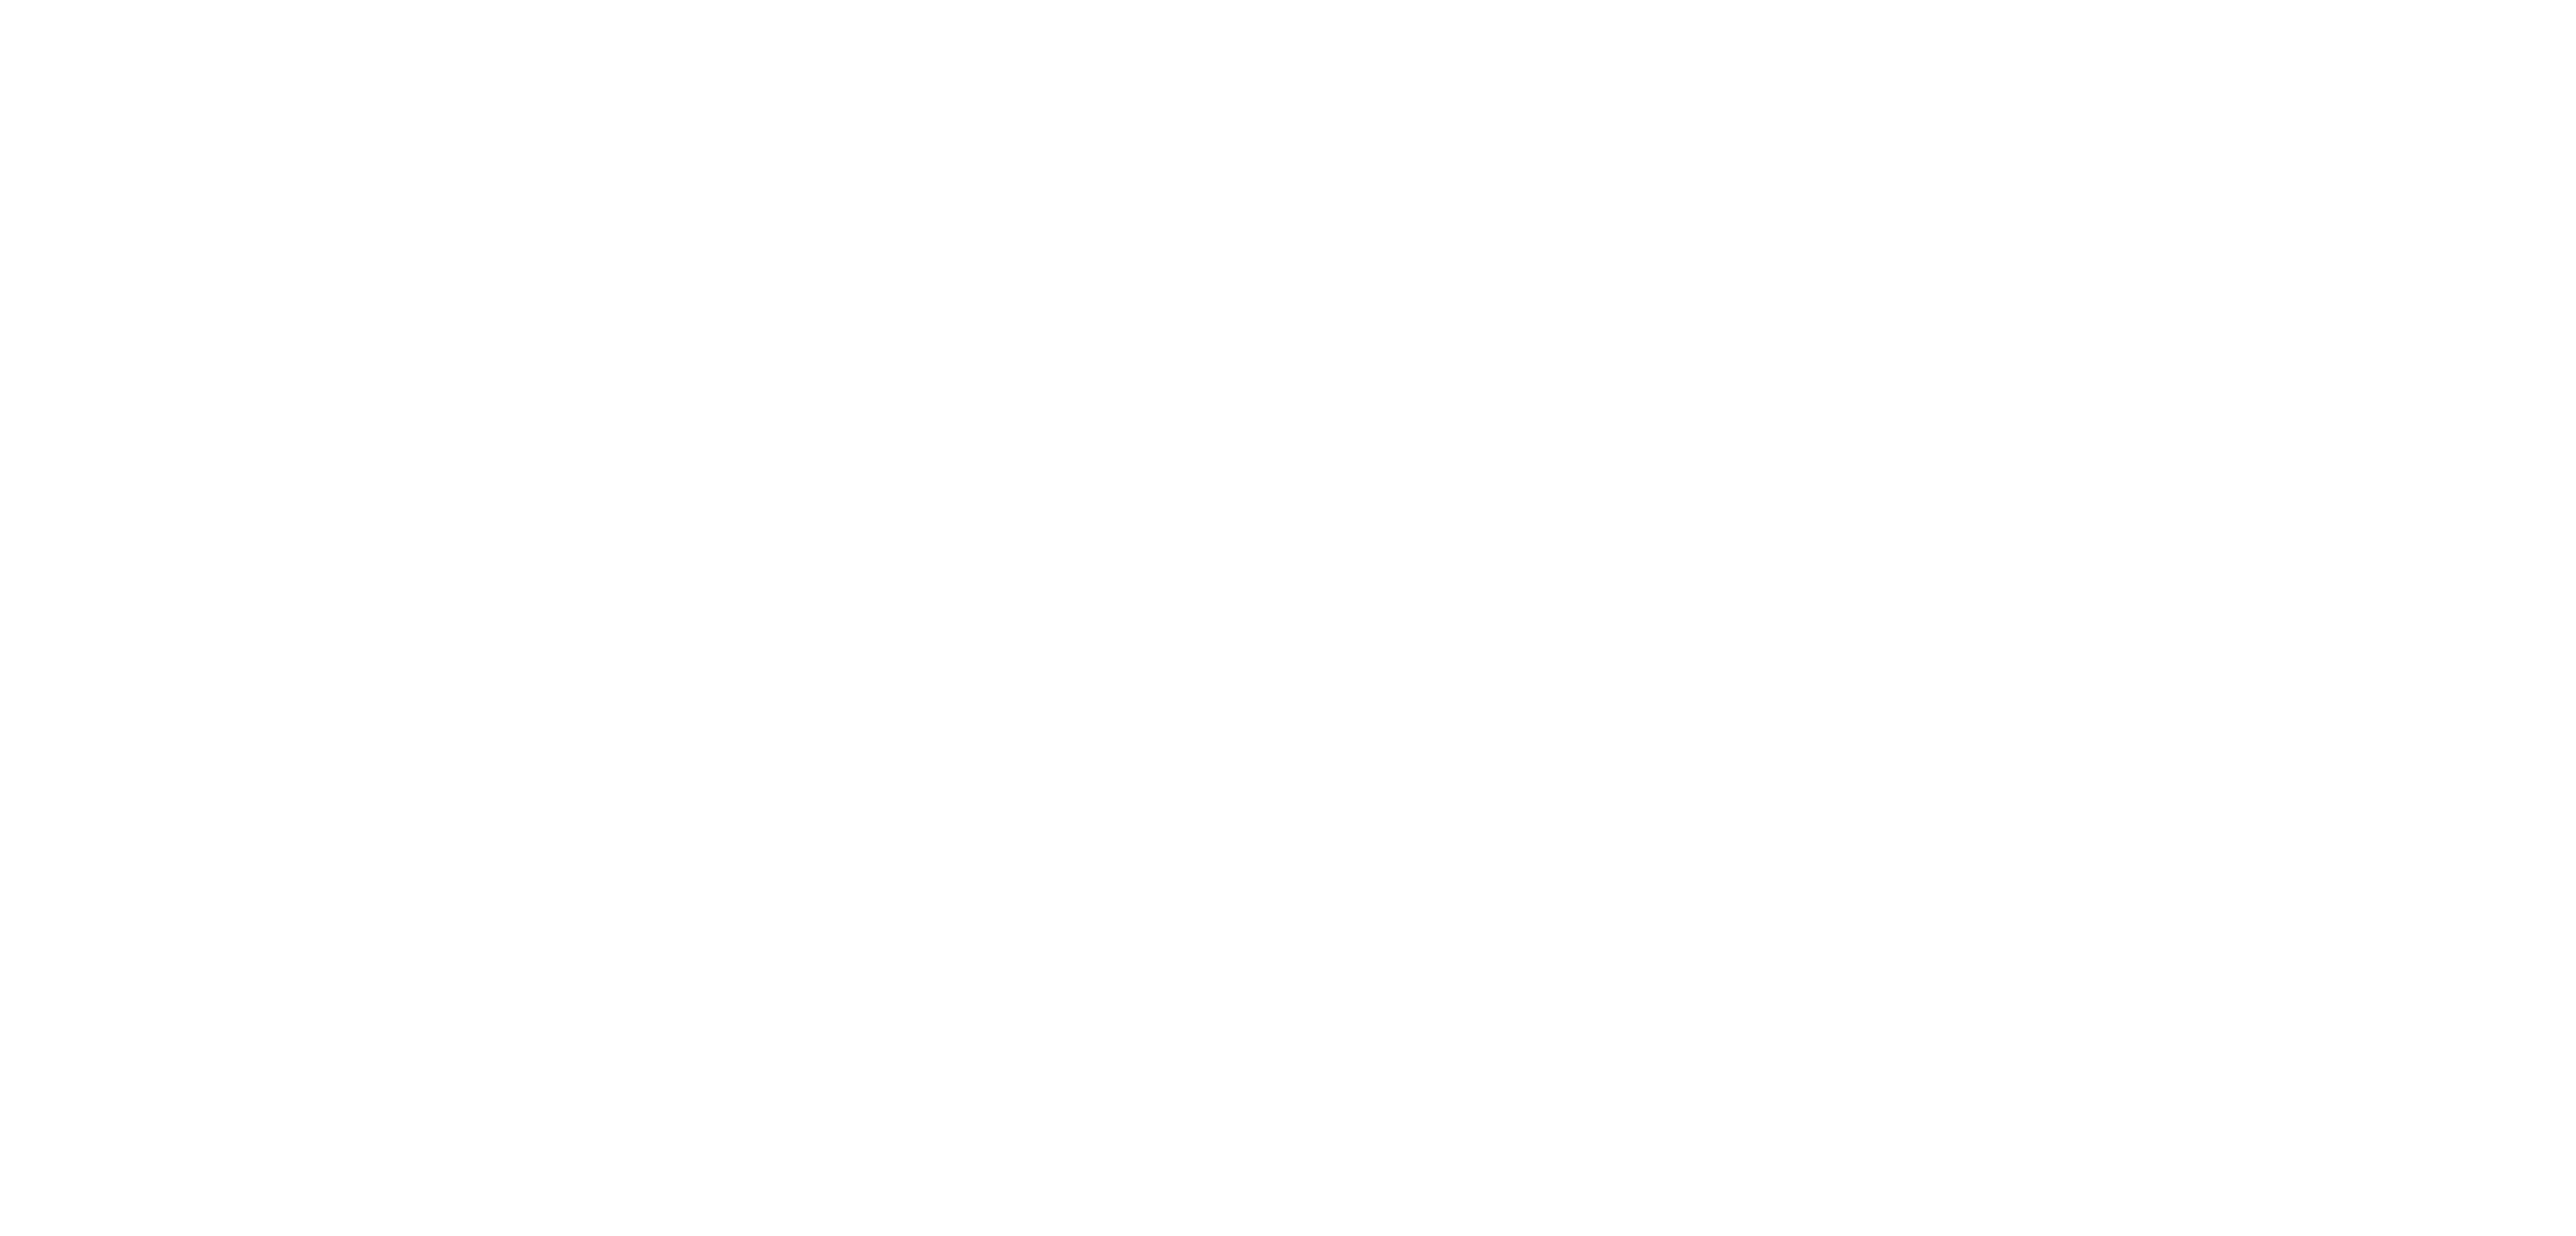

<IPython.core.display.Javascript object>


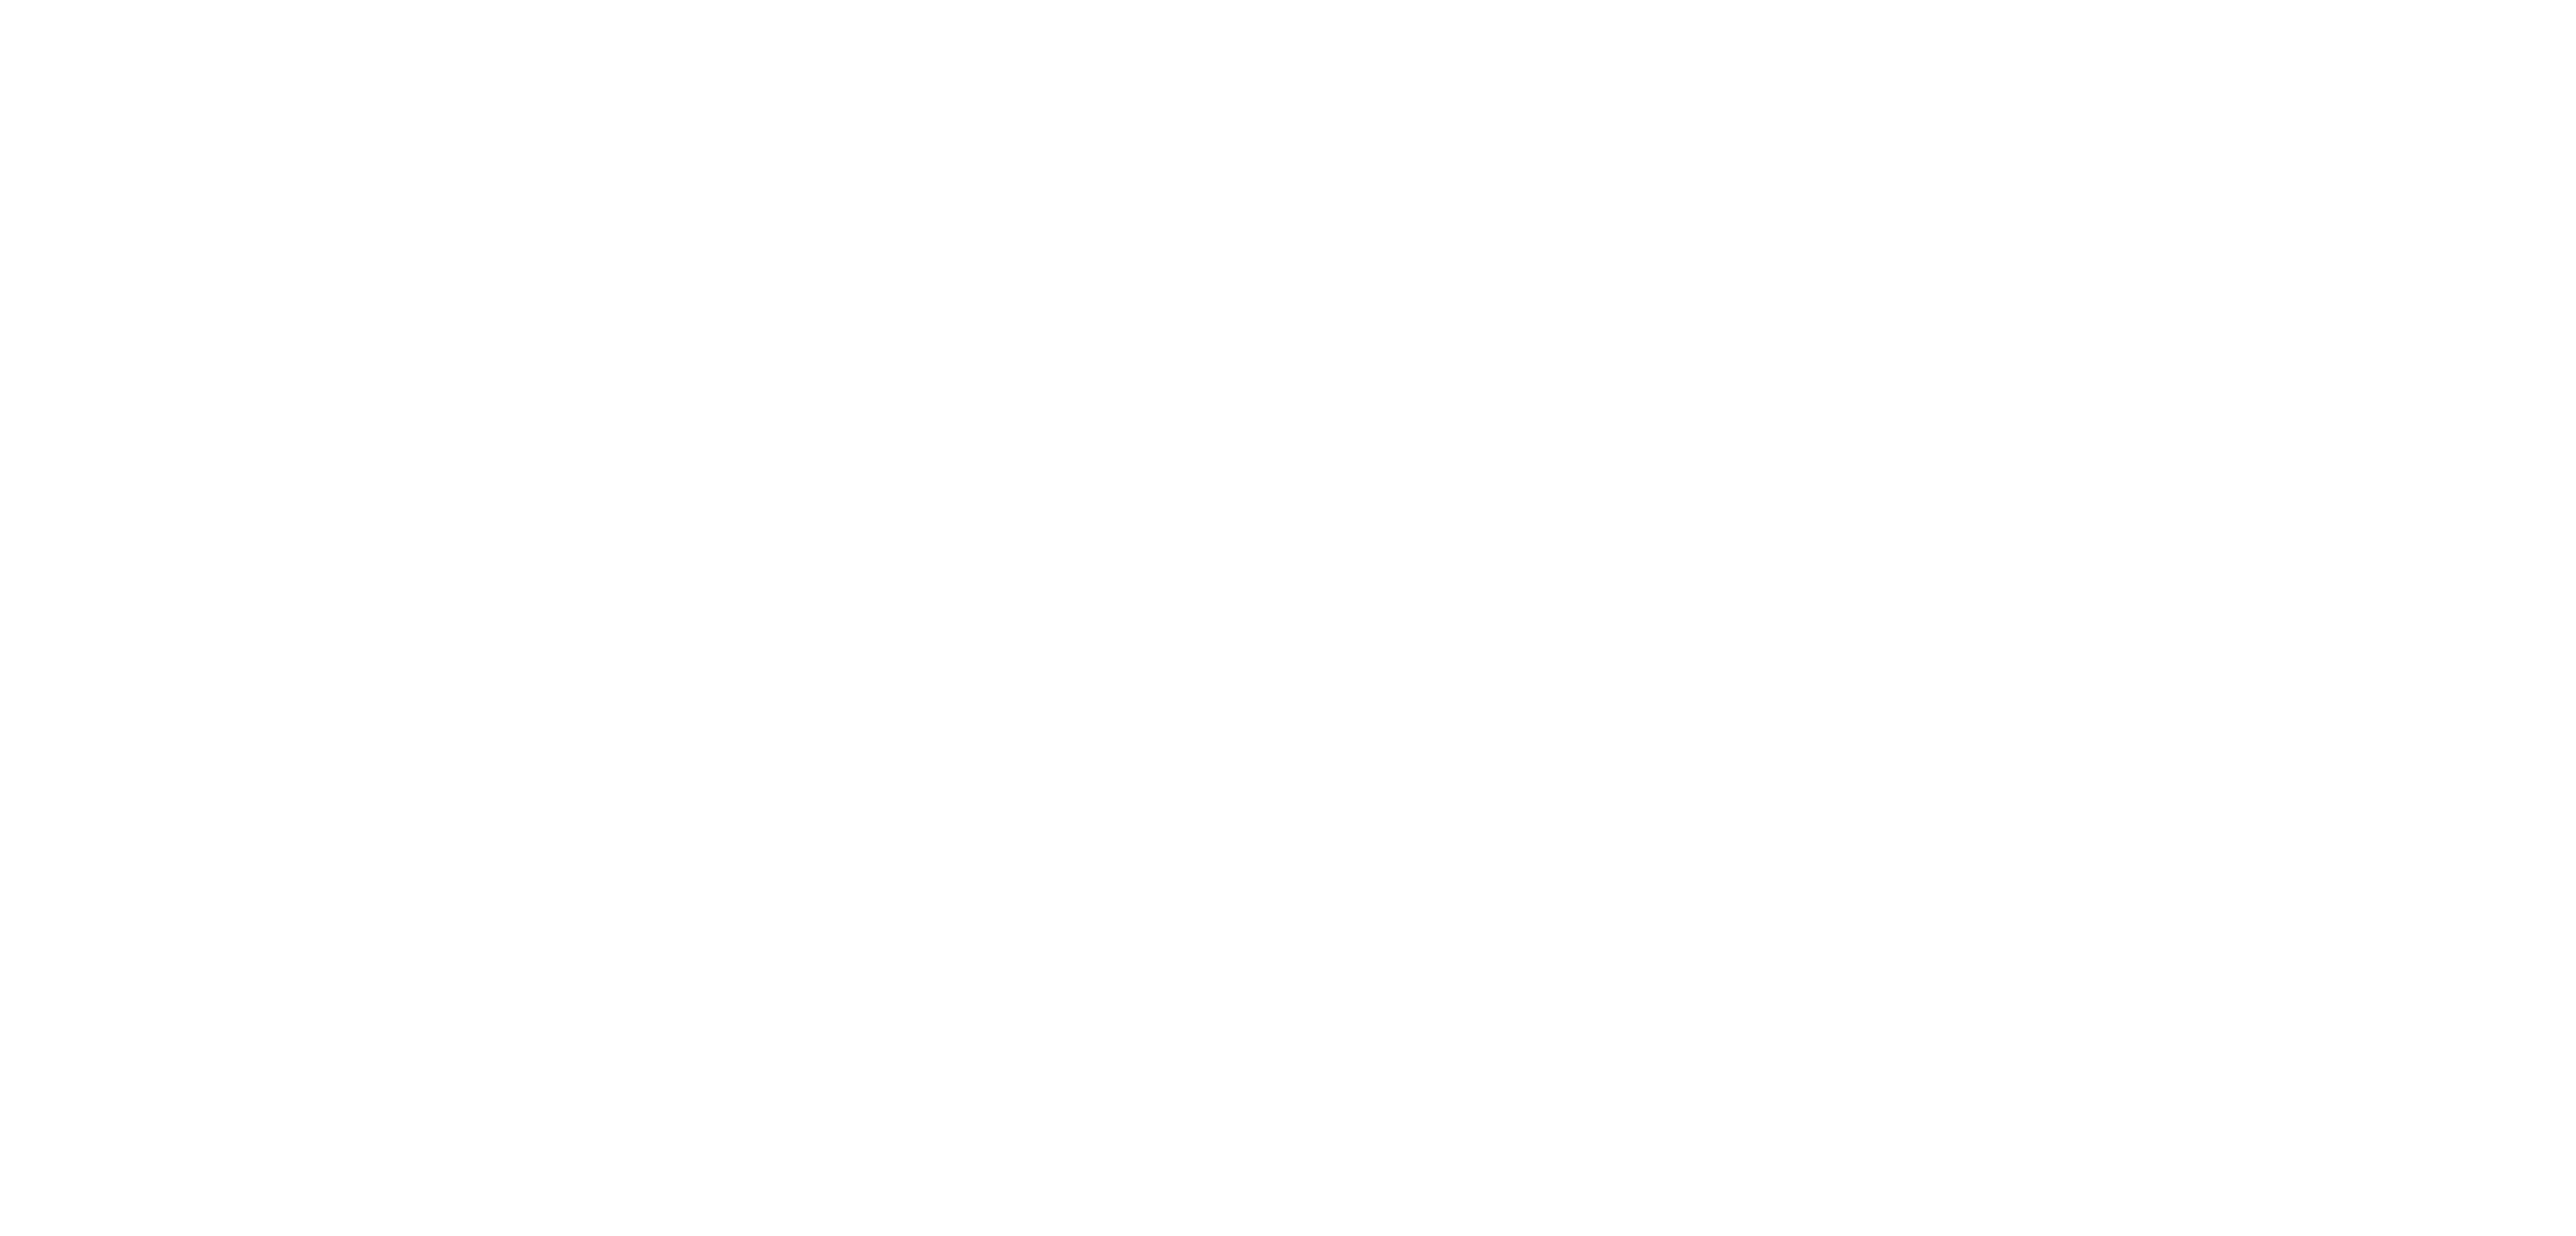

<IPython.core.display.Javascript object>


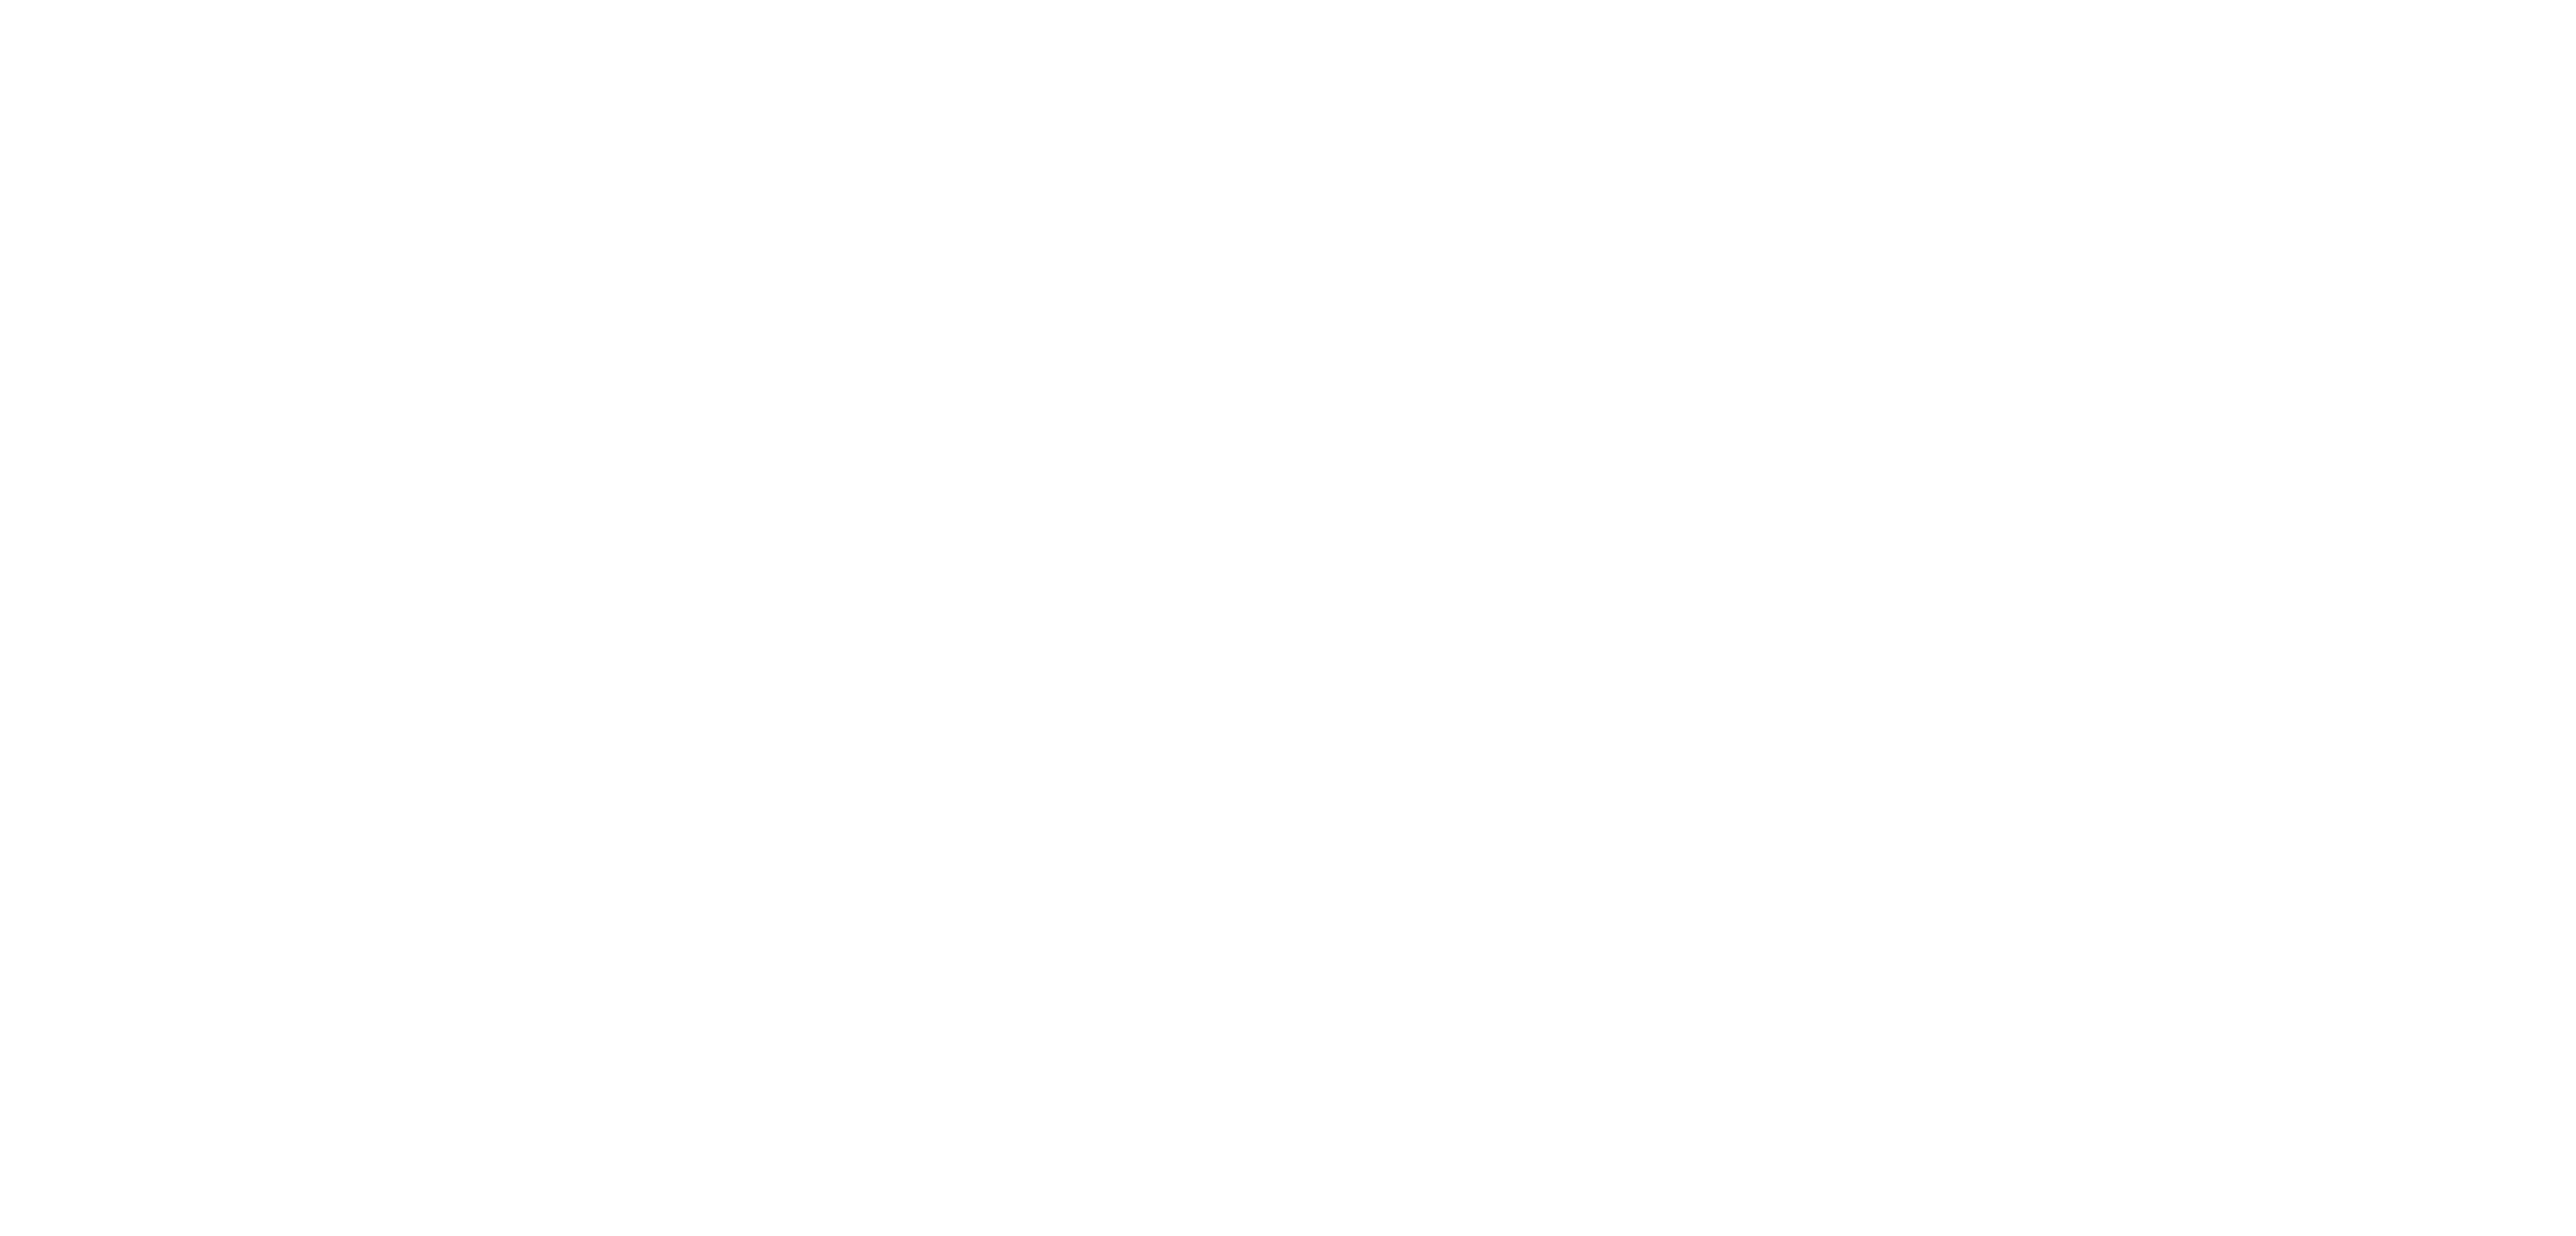

<IPython.core.display.Javascript object>


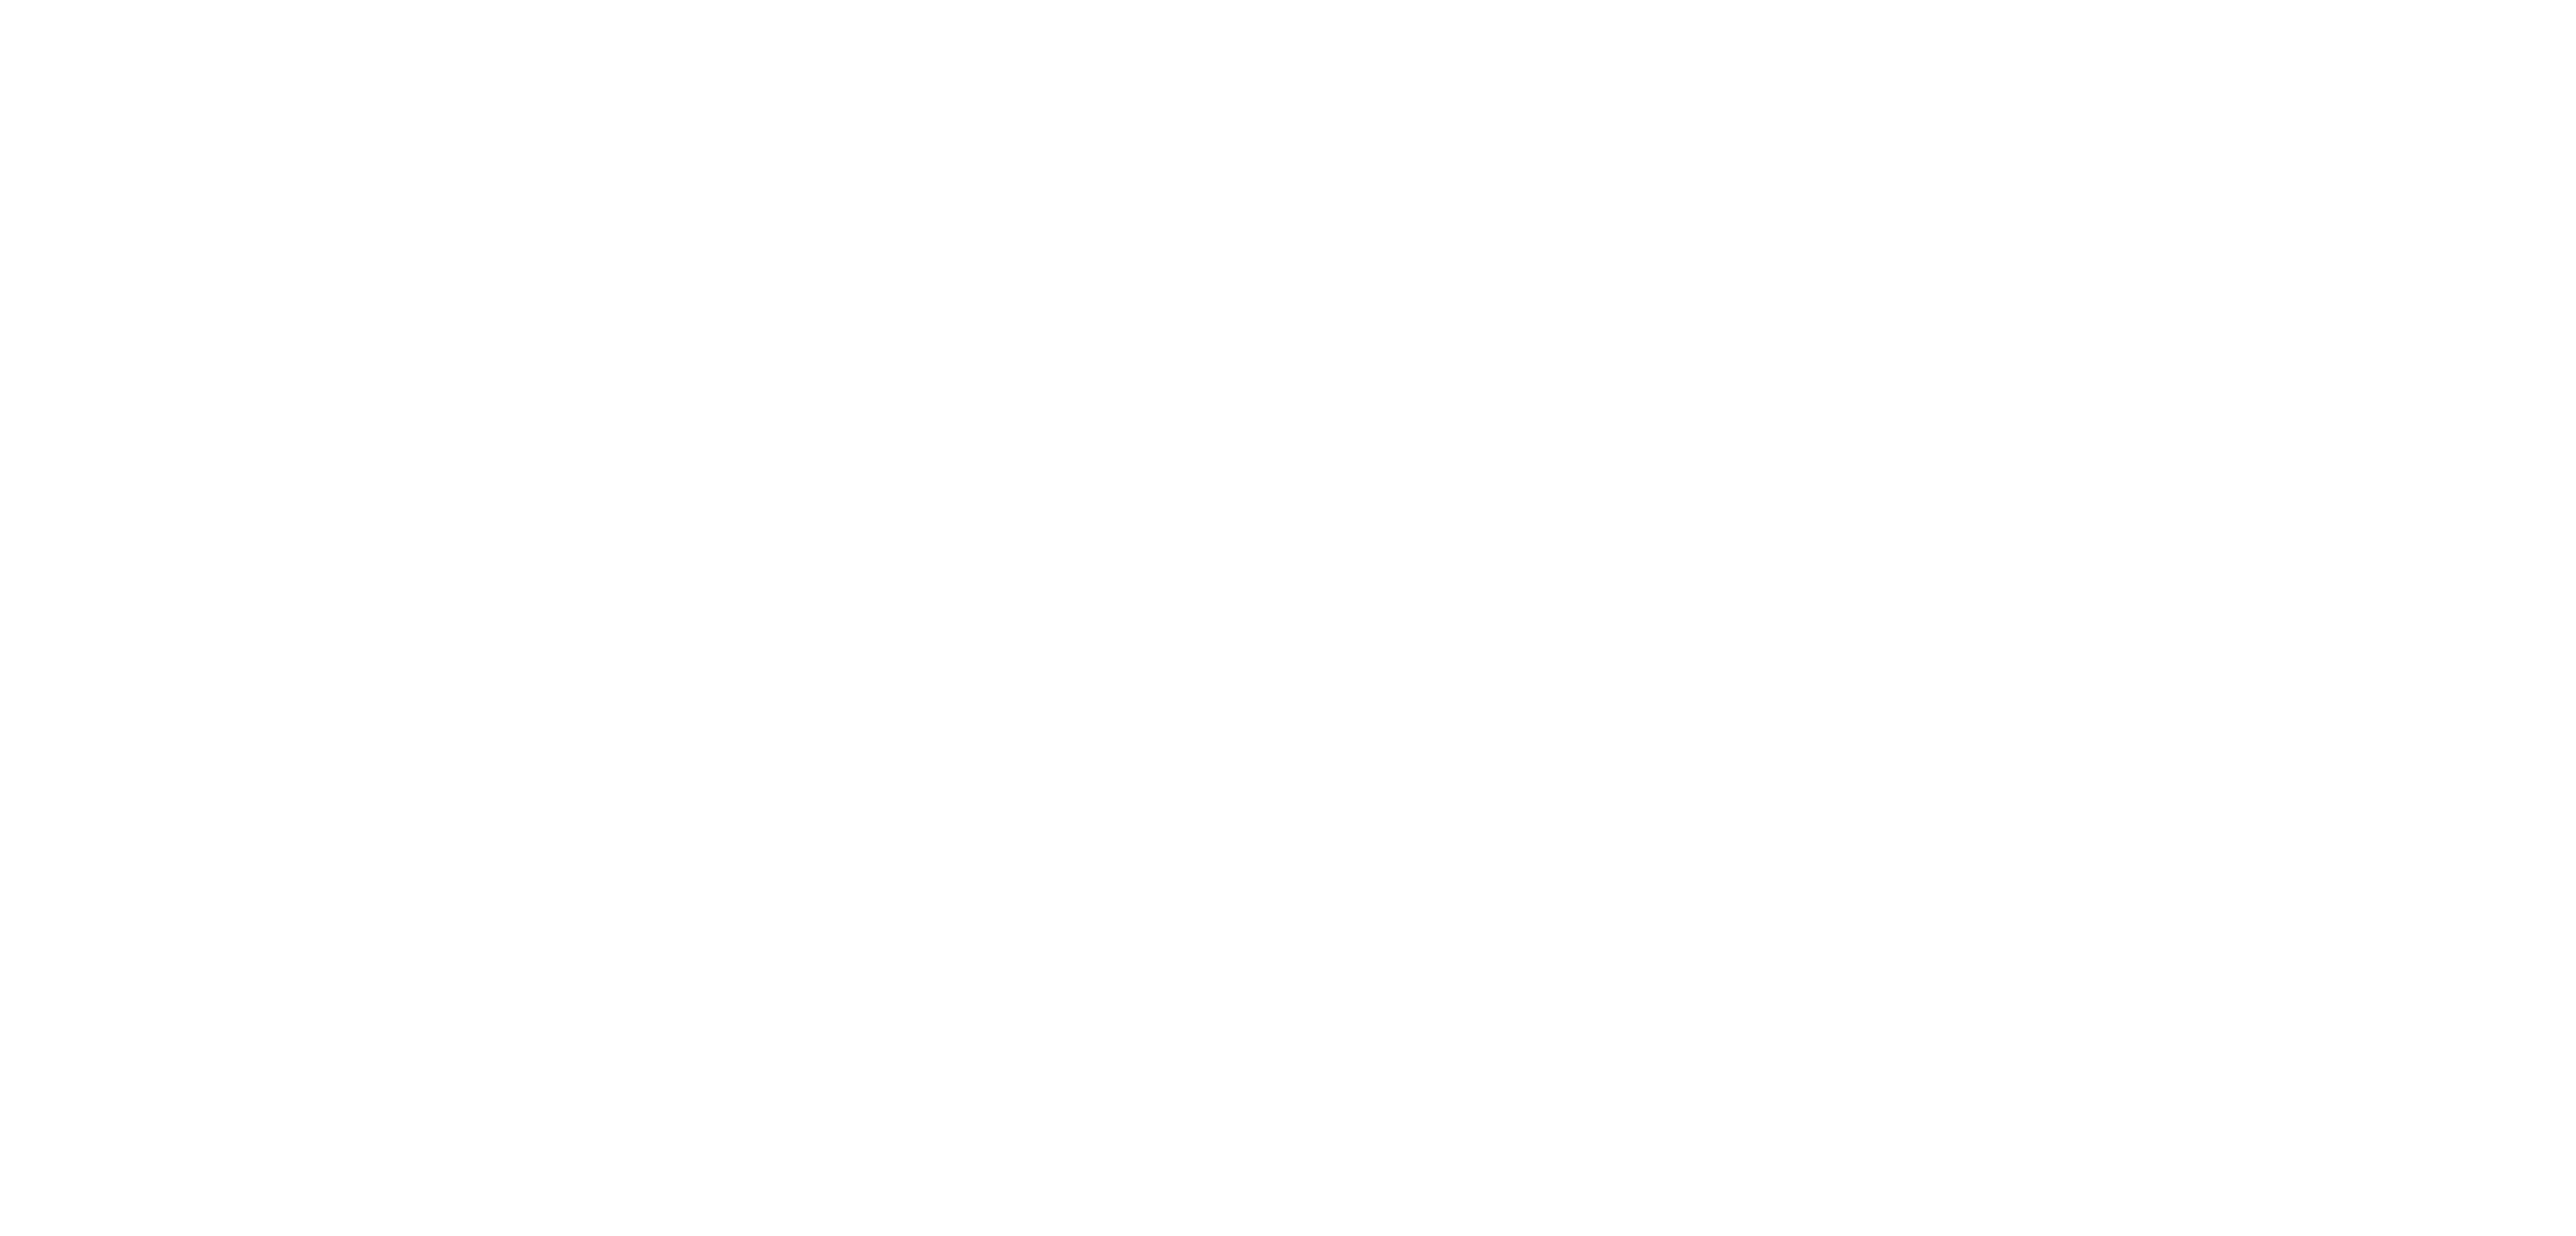

<IPython.core.display.Javascript object>


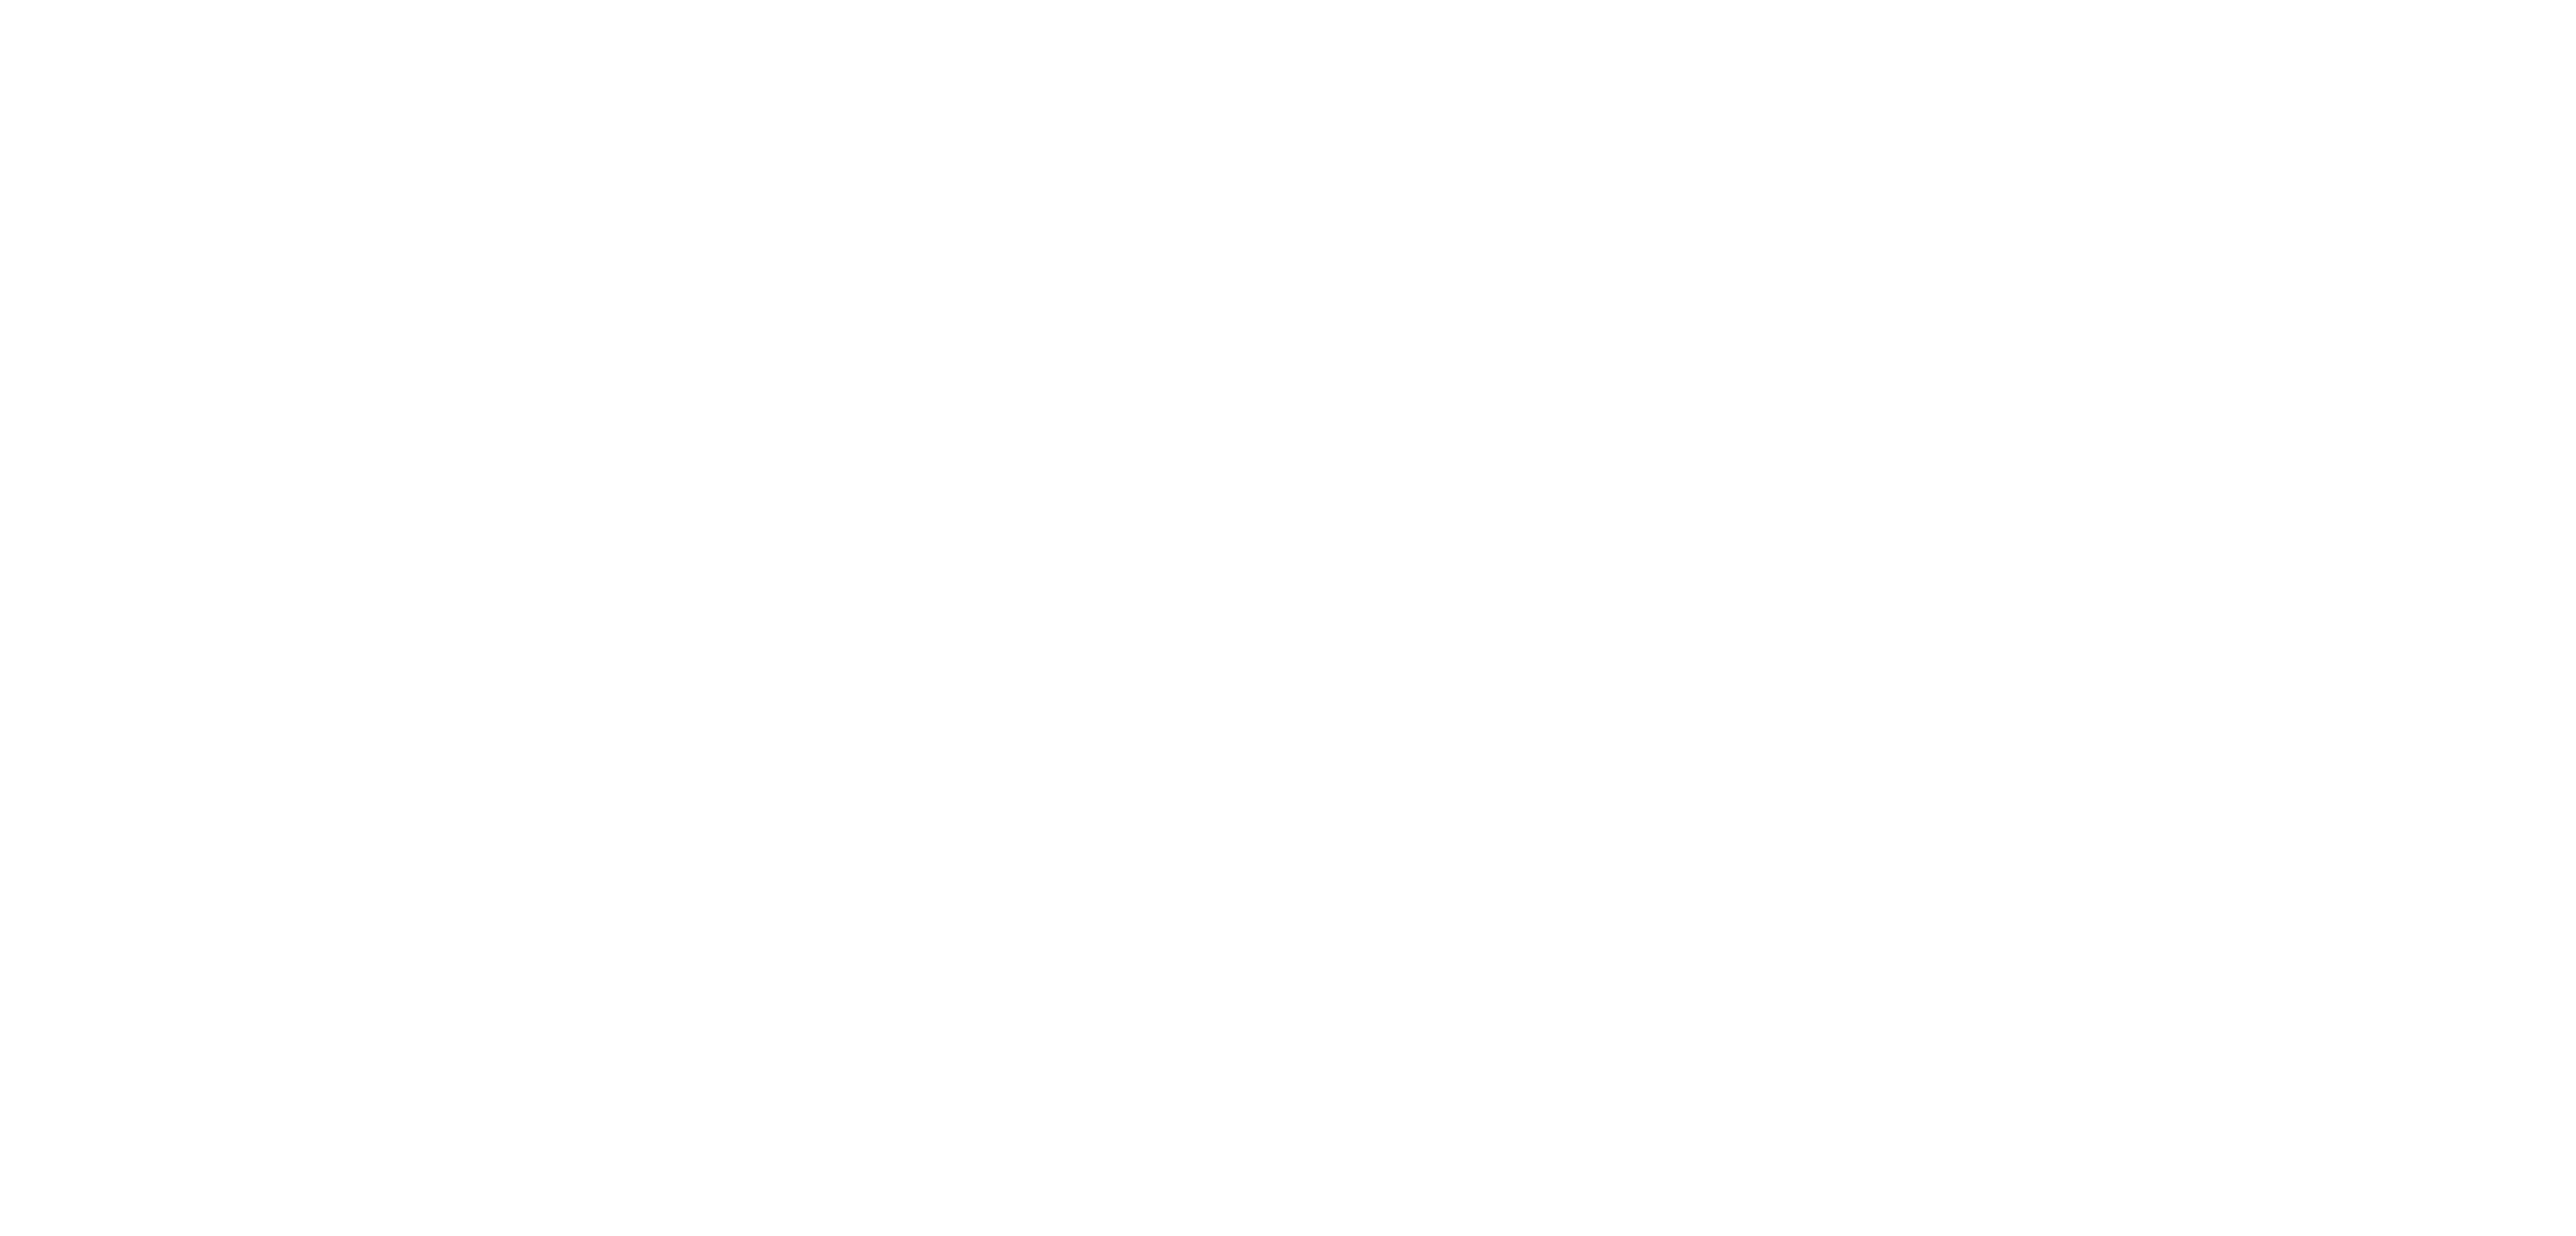

<IPython.core.display.Javascript object>


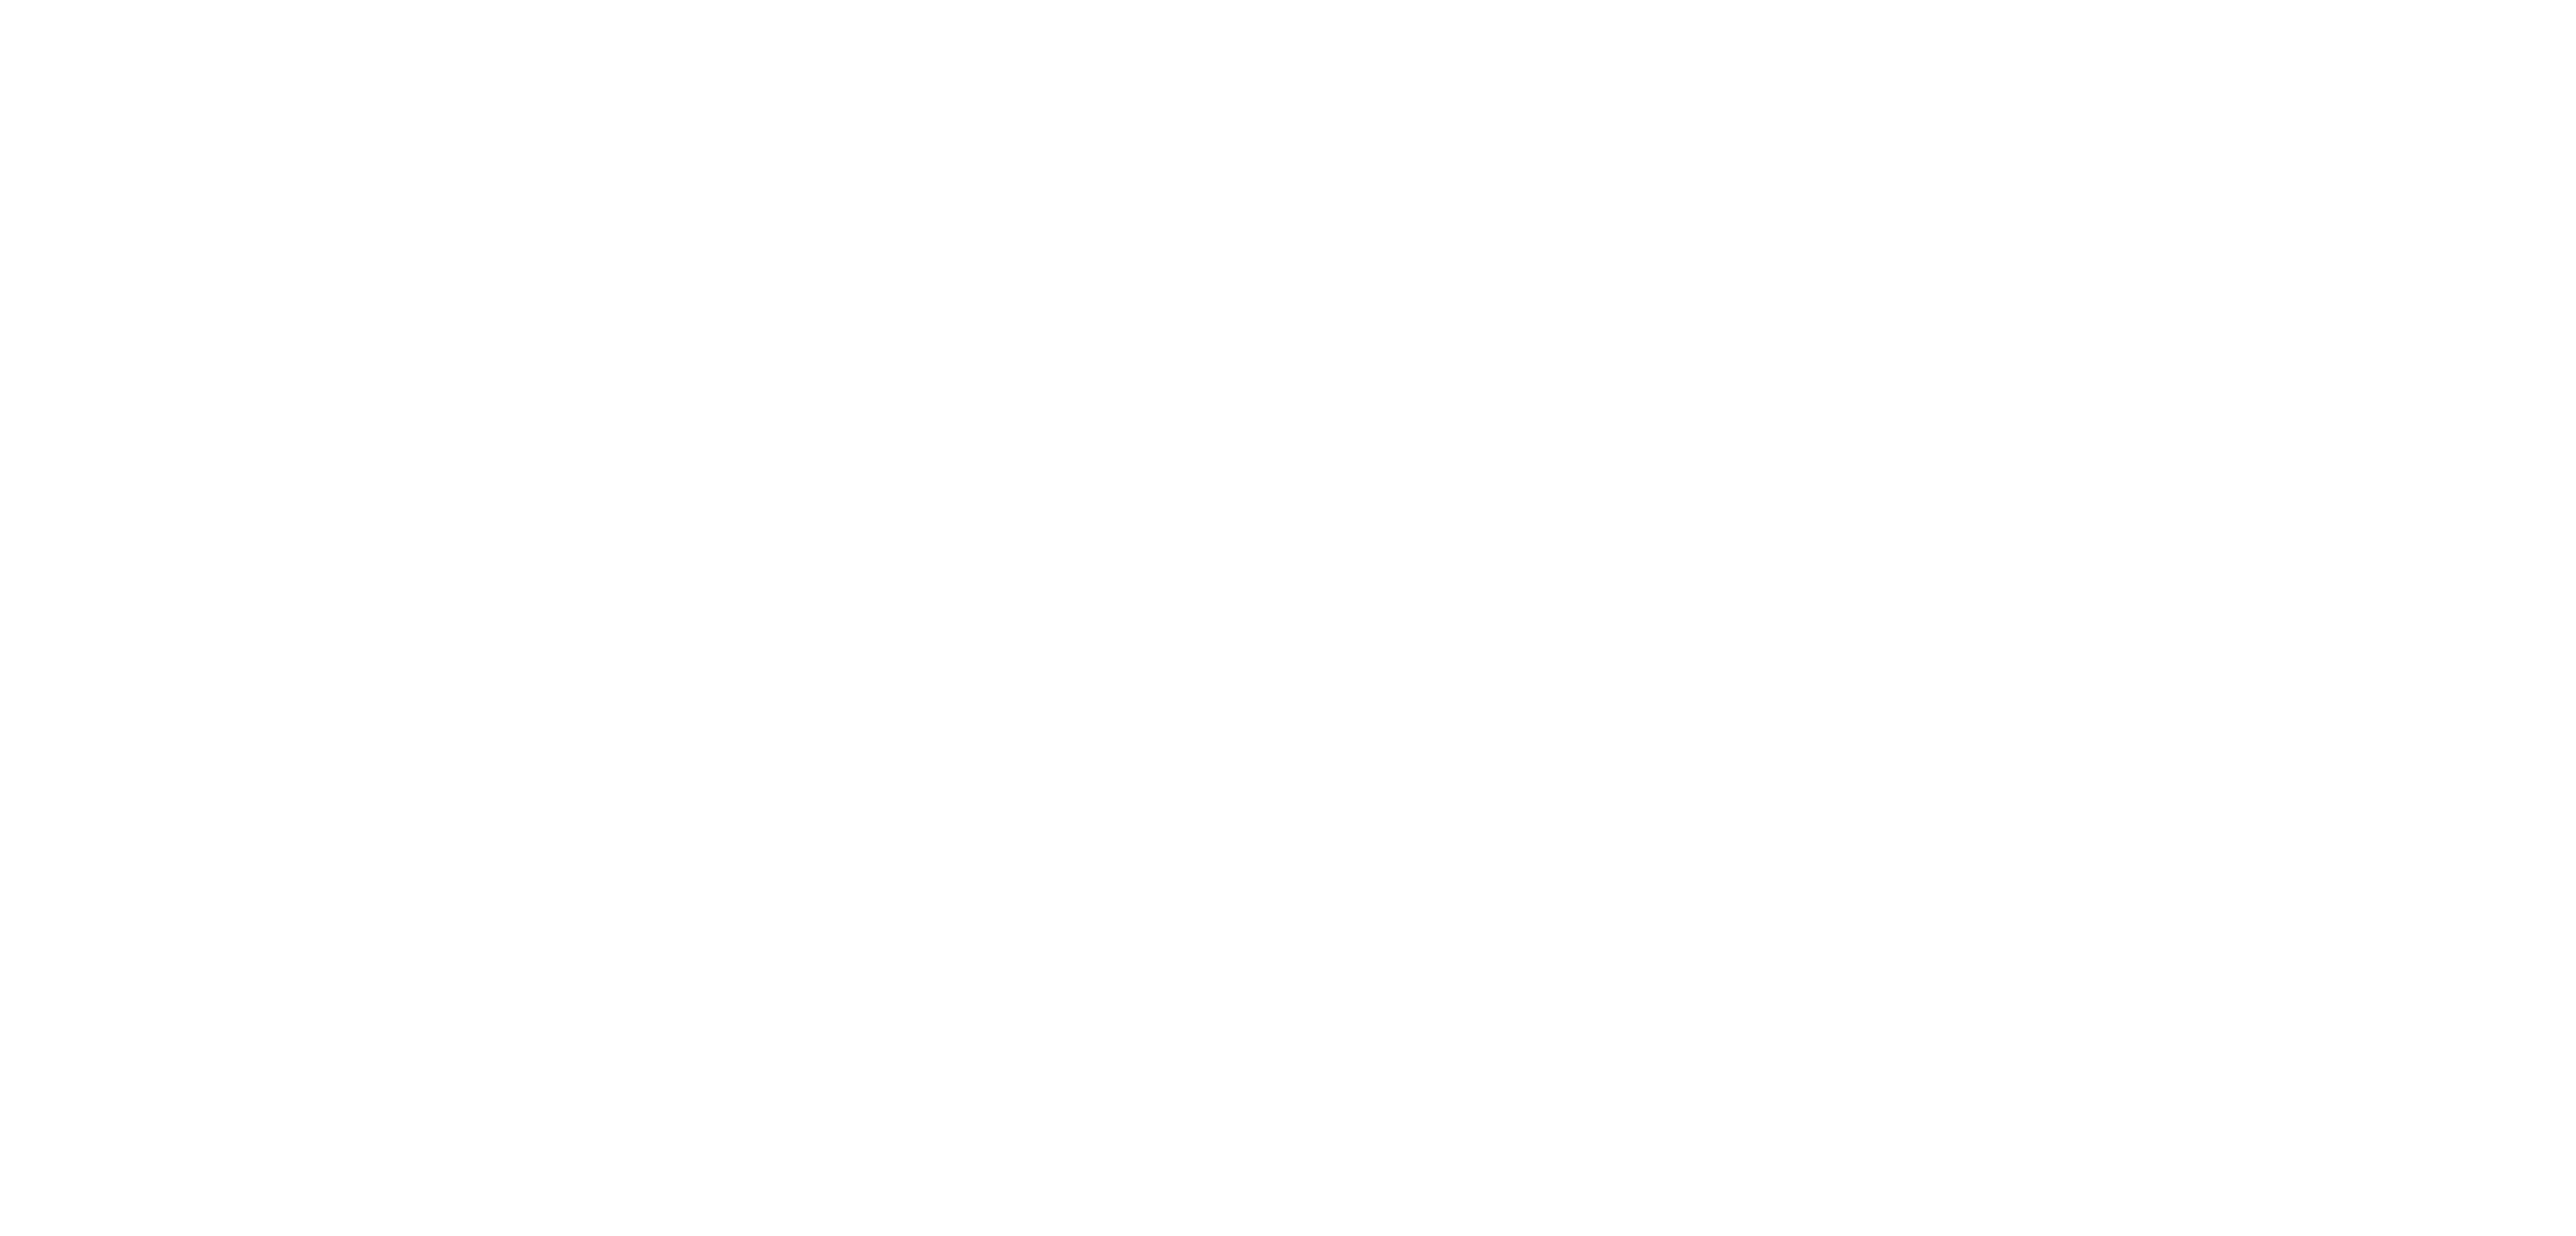

<IPython.core.display.Javascript object>


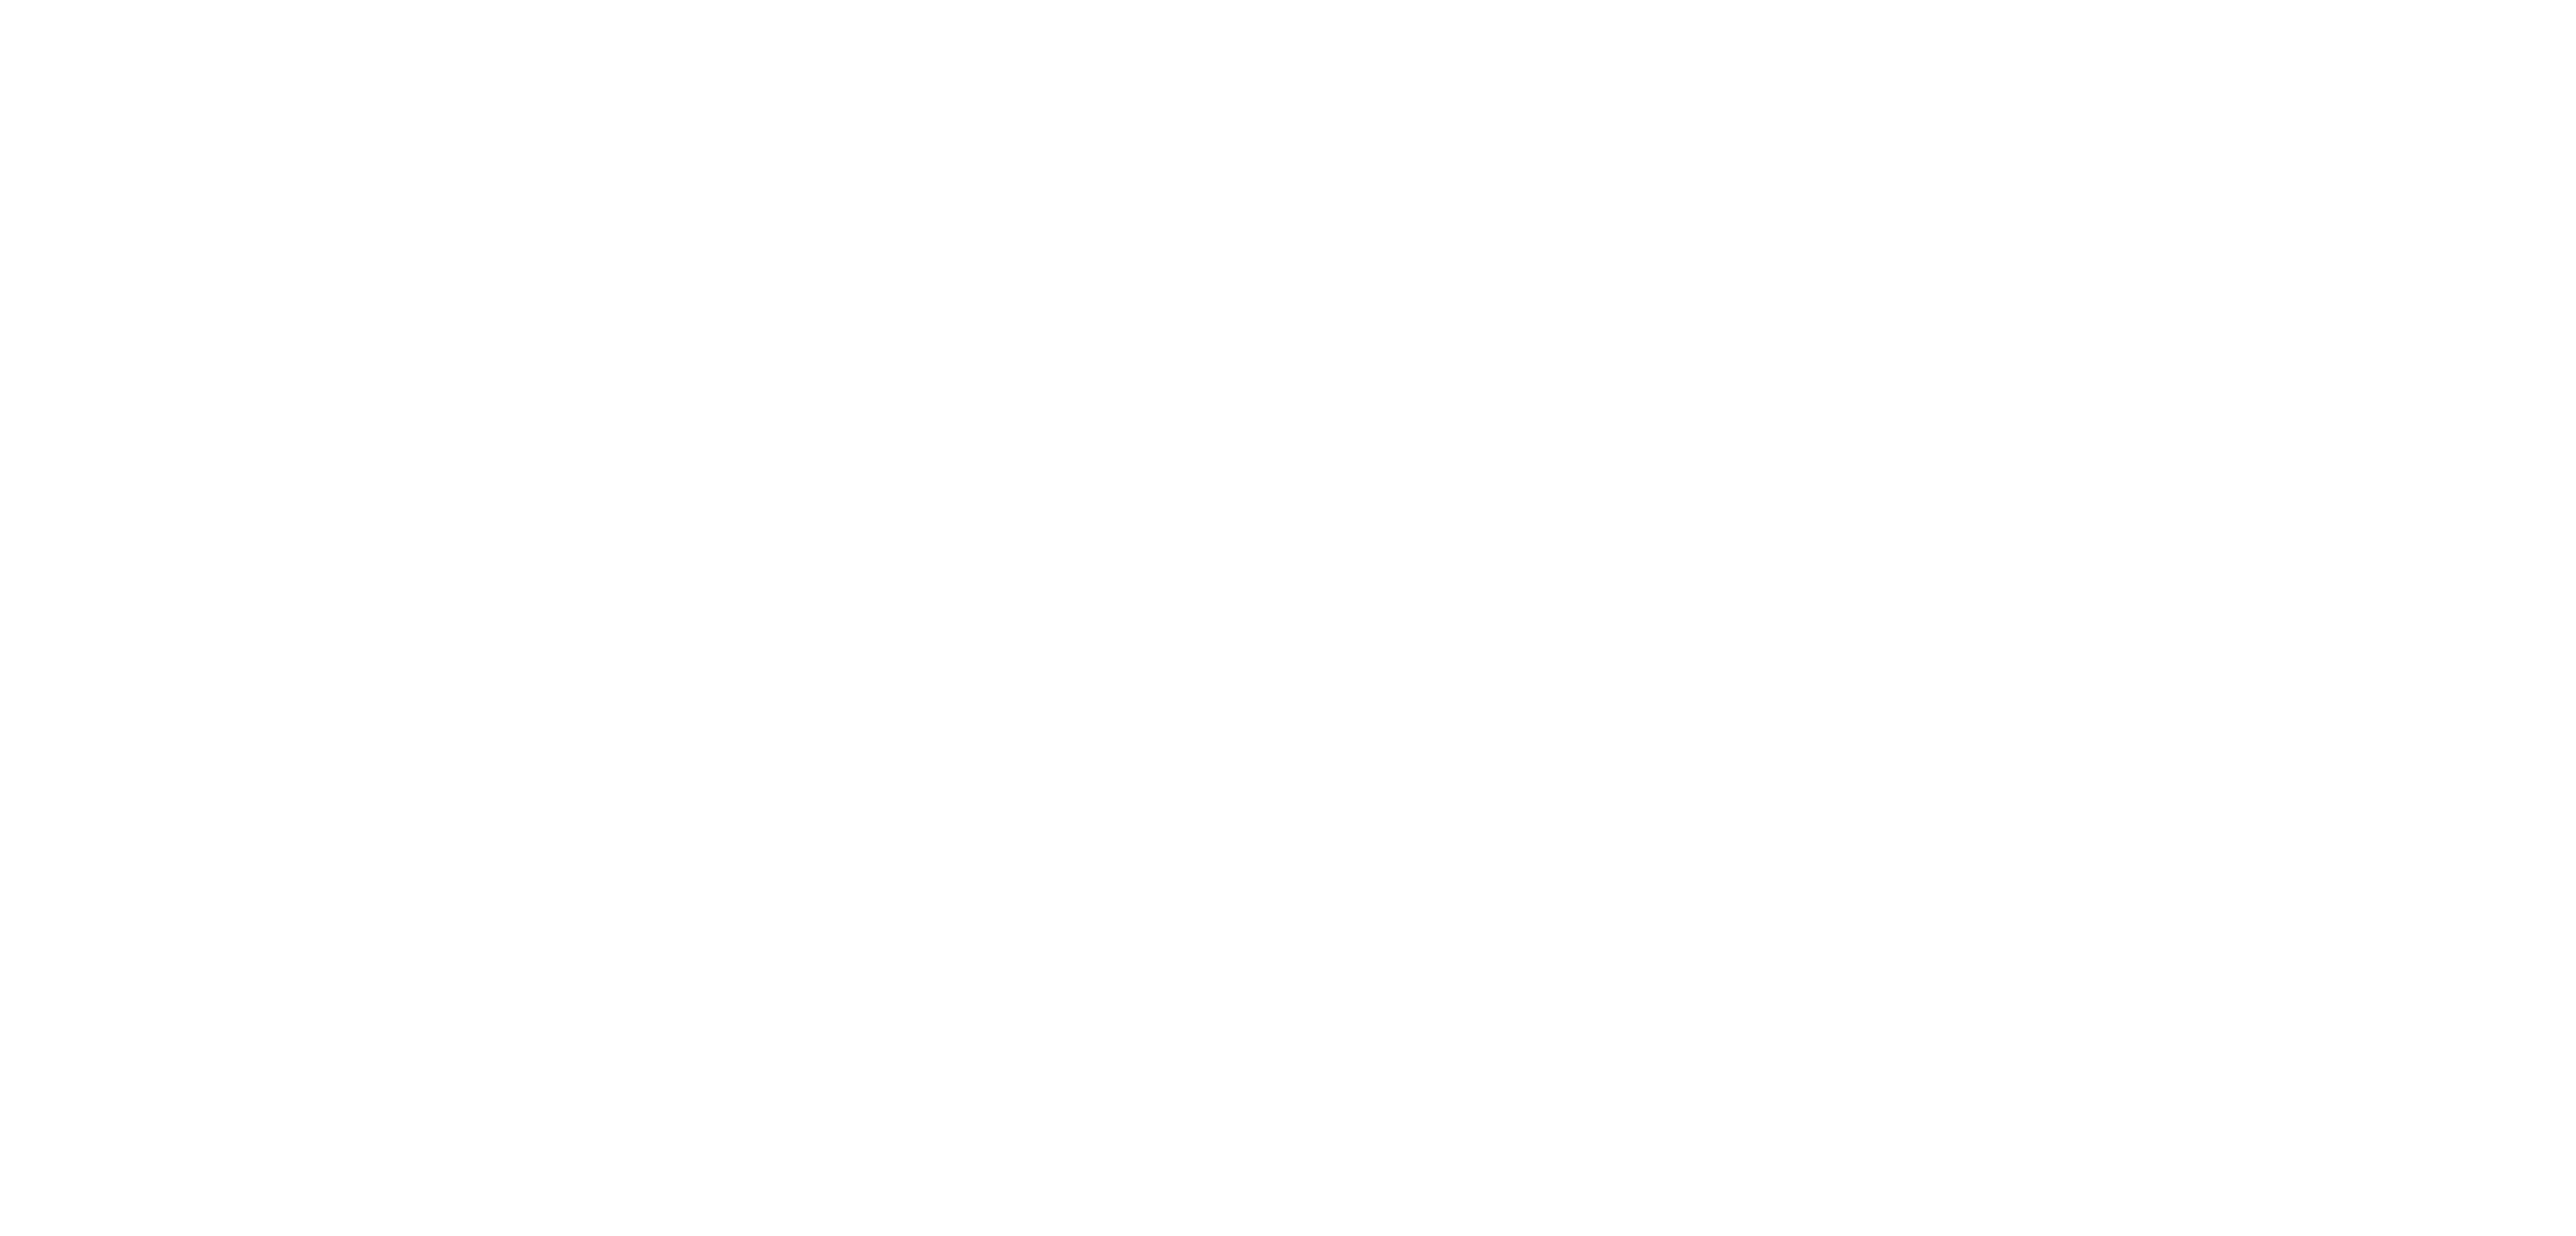

<IPython.core.display.Javascript object>


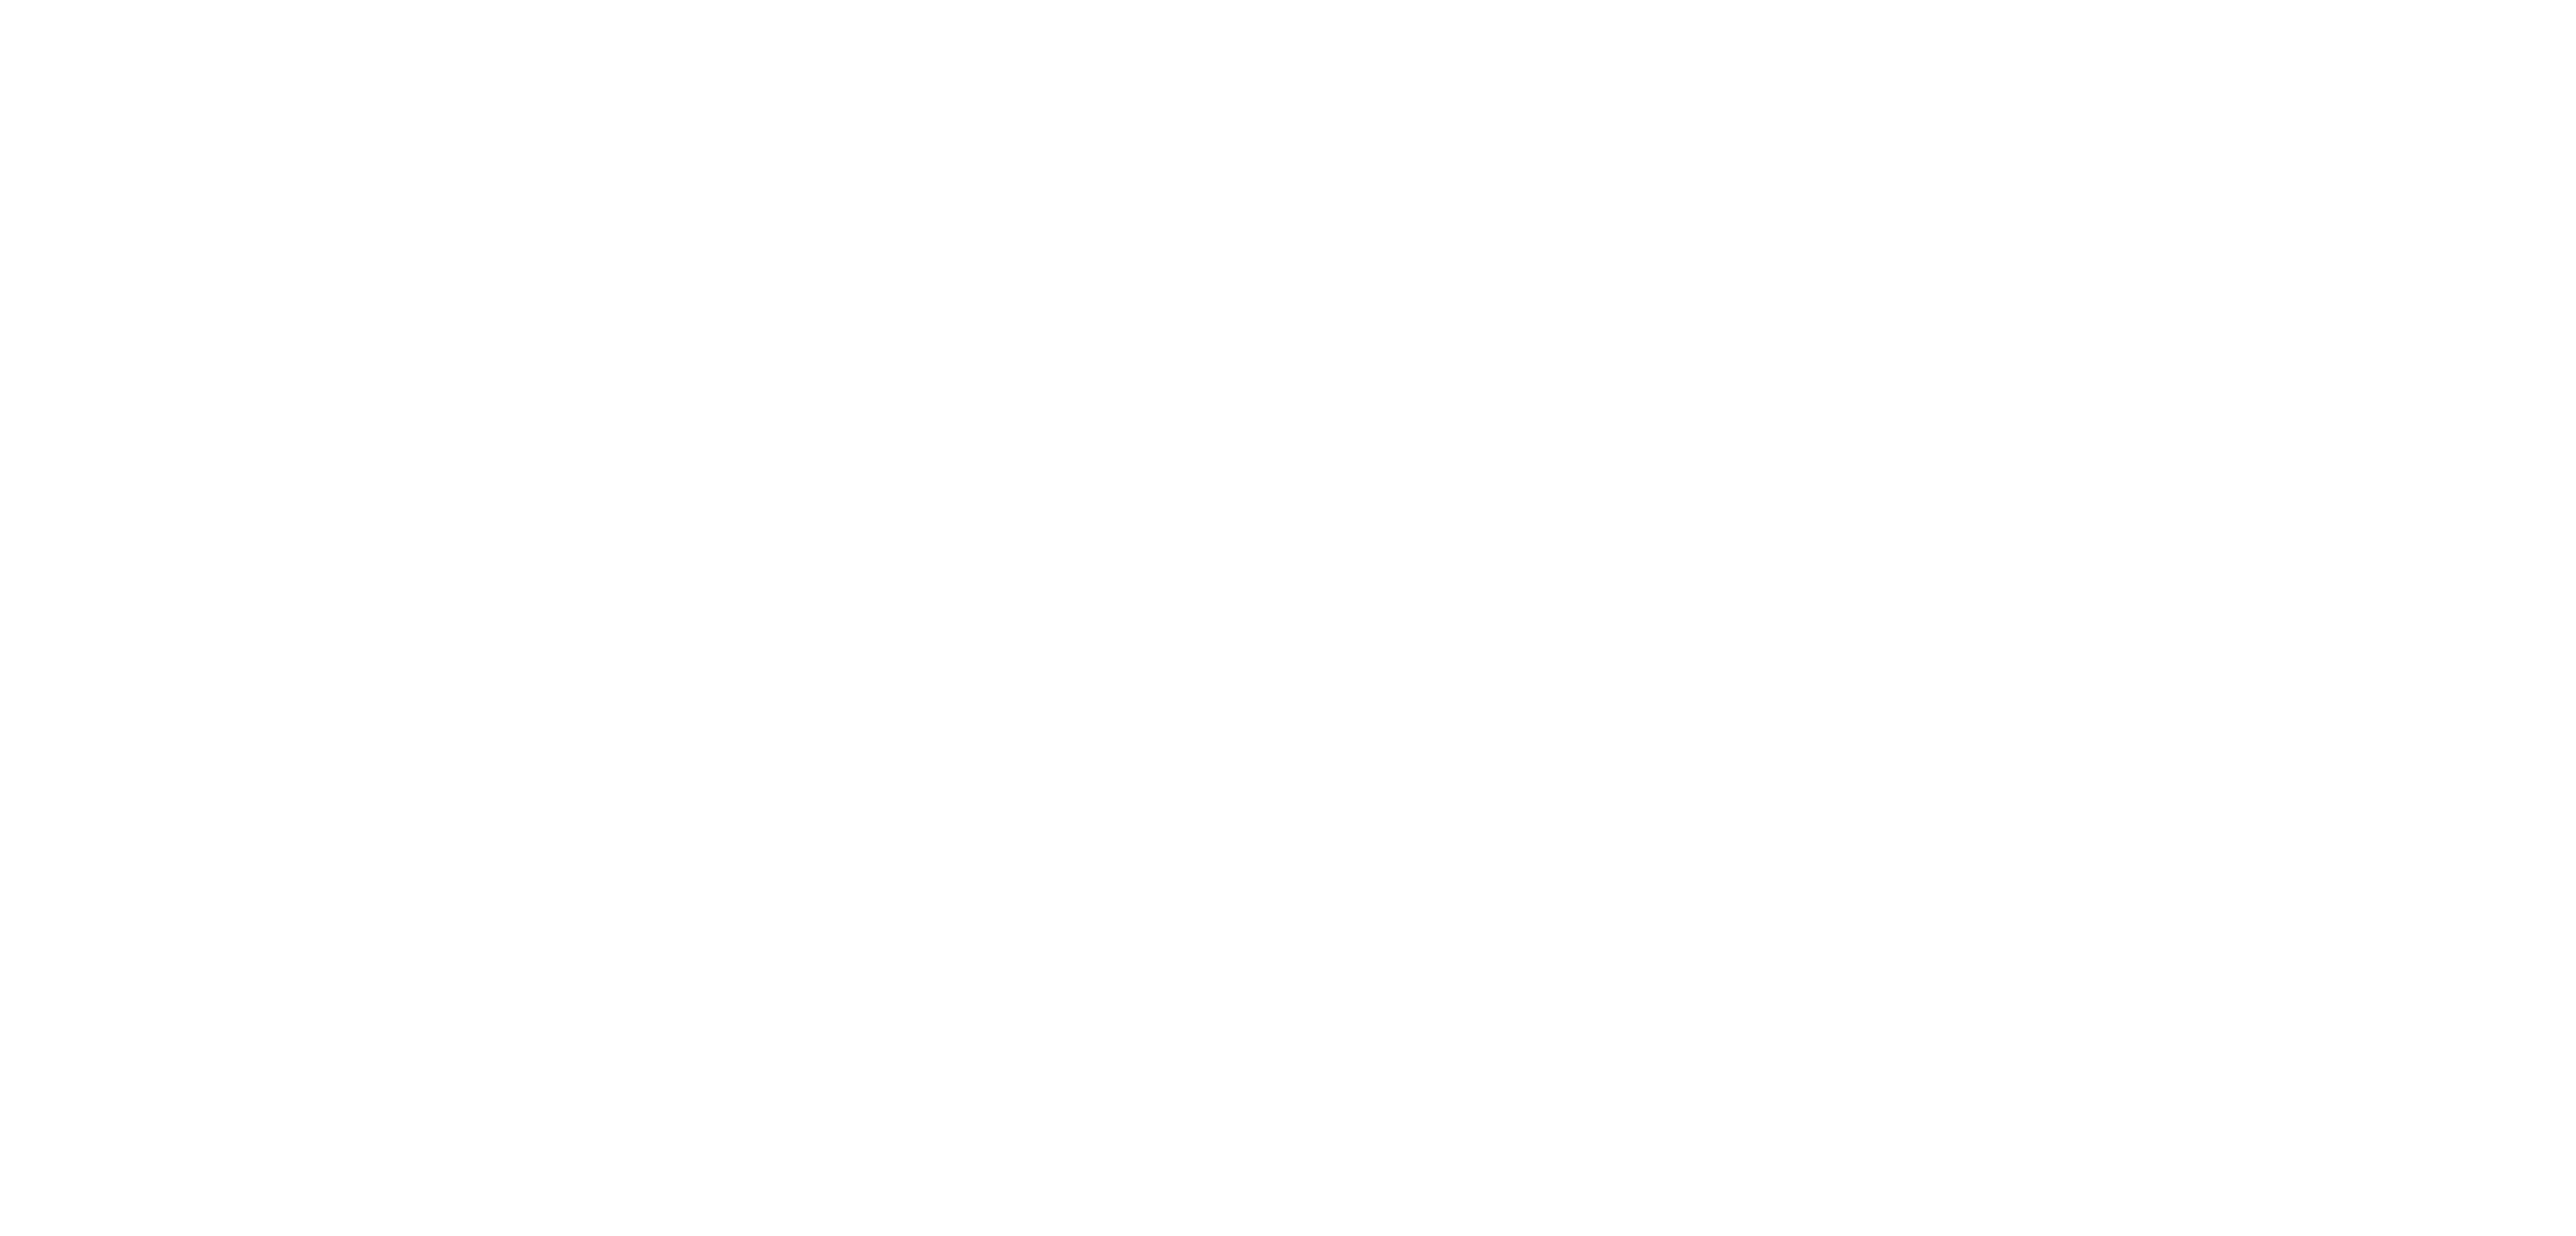

<IPython.core.display.Javascript object>


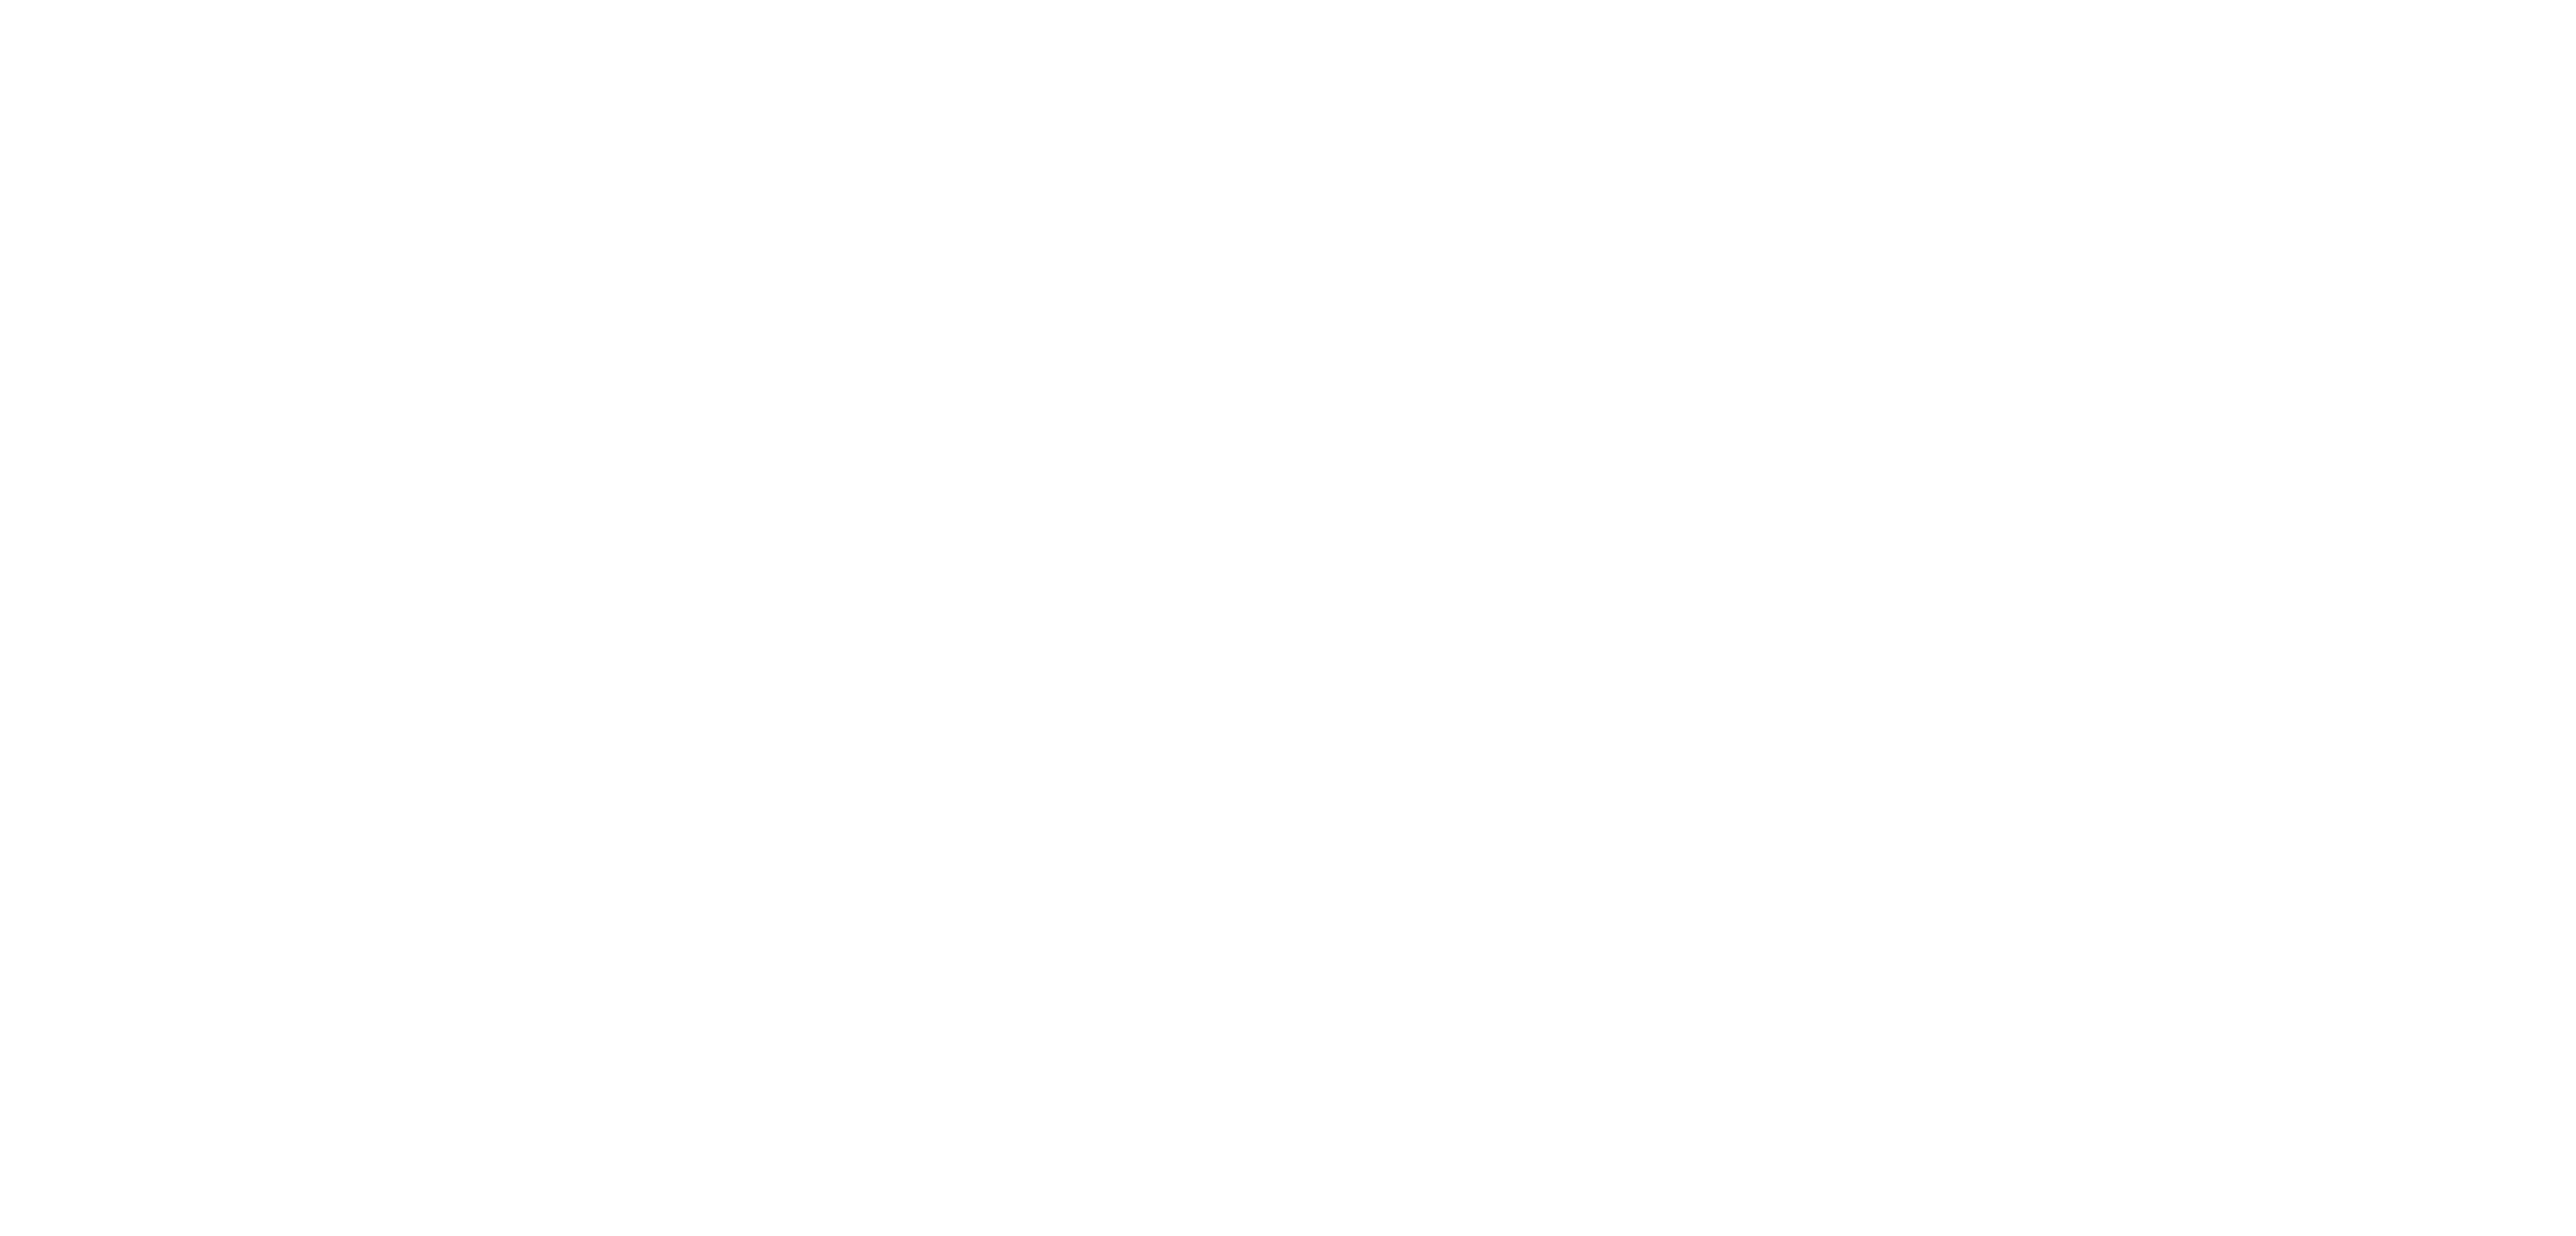

<IPython.core.display.Javascript object>


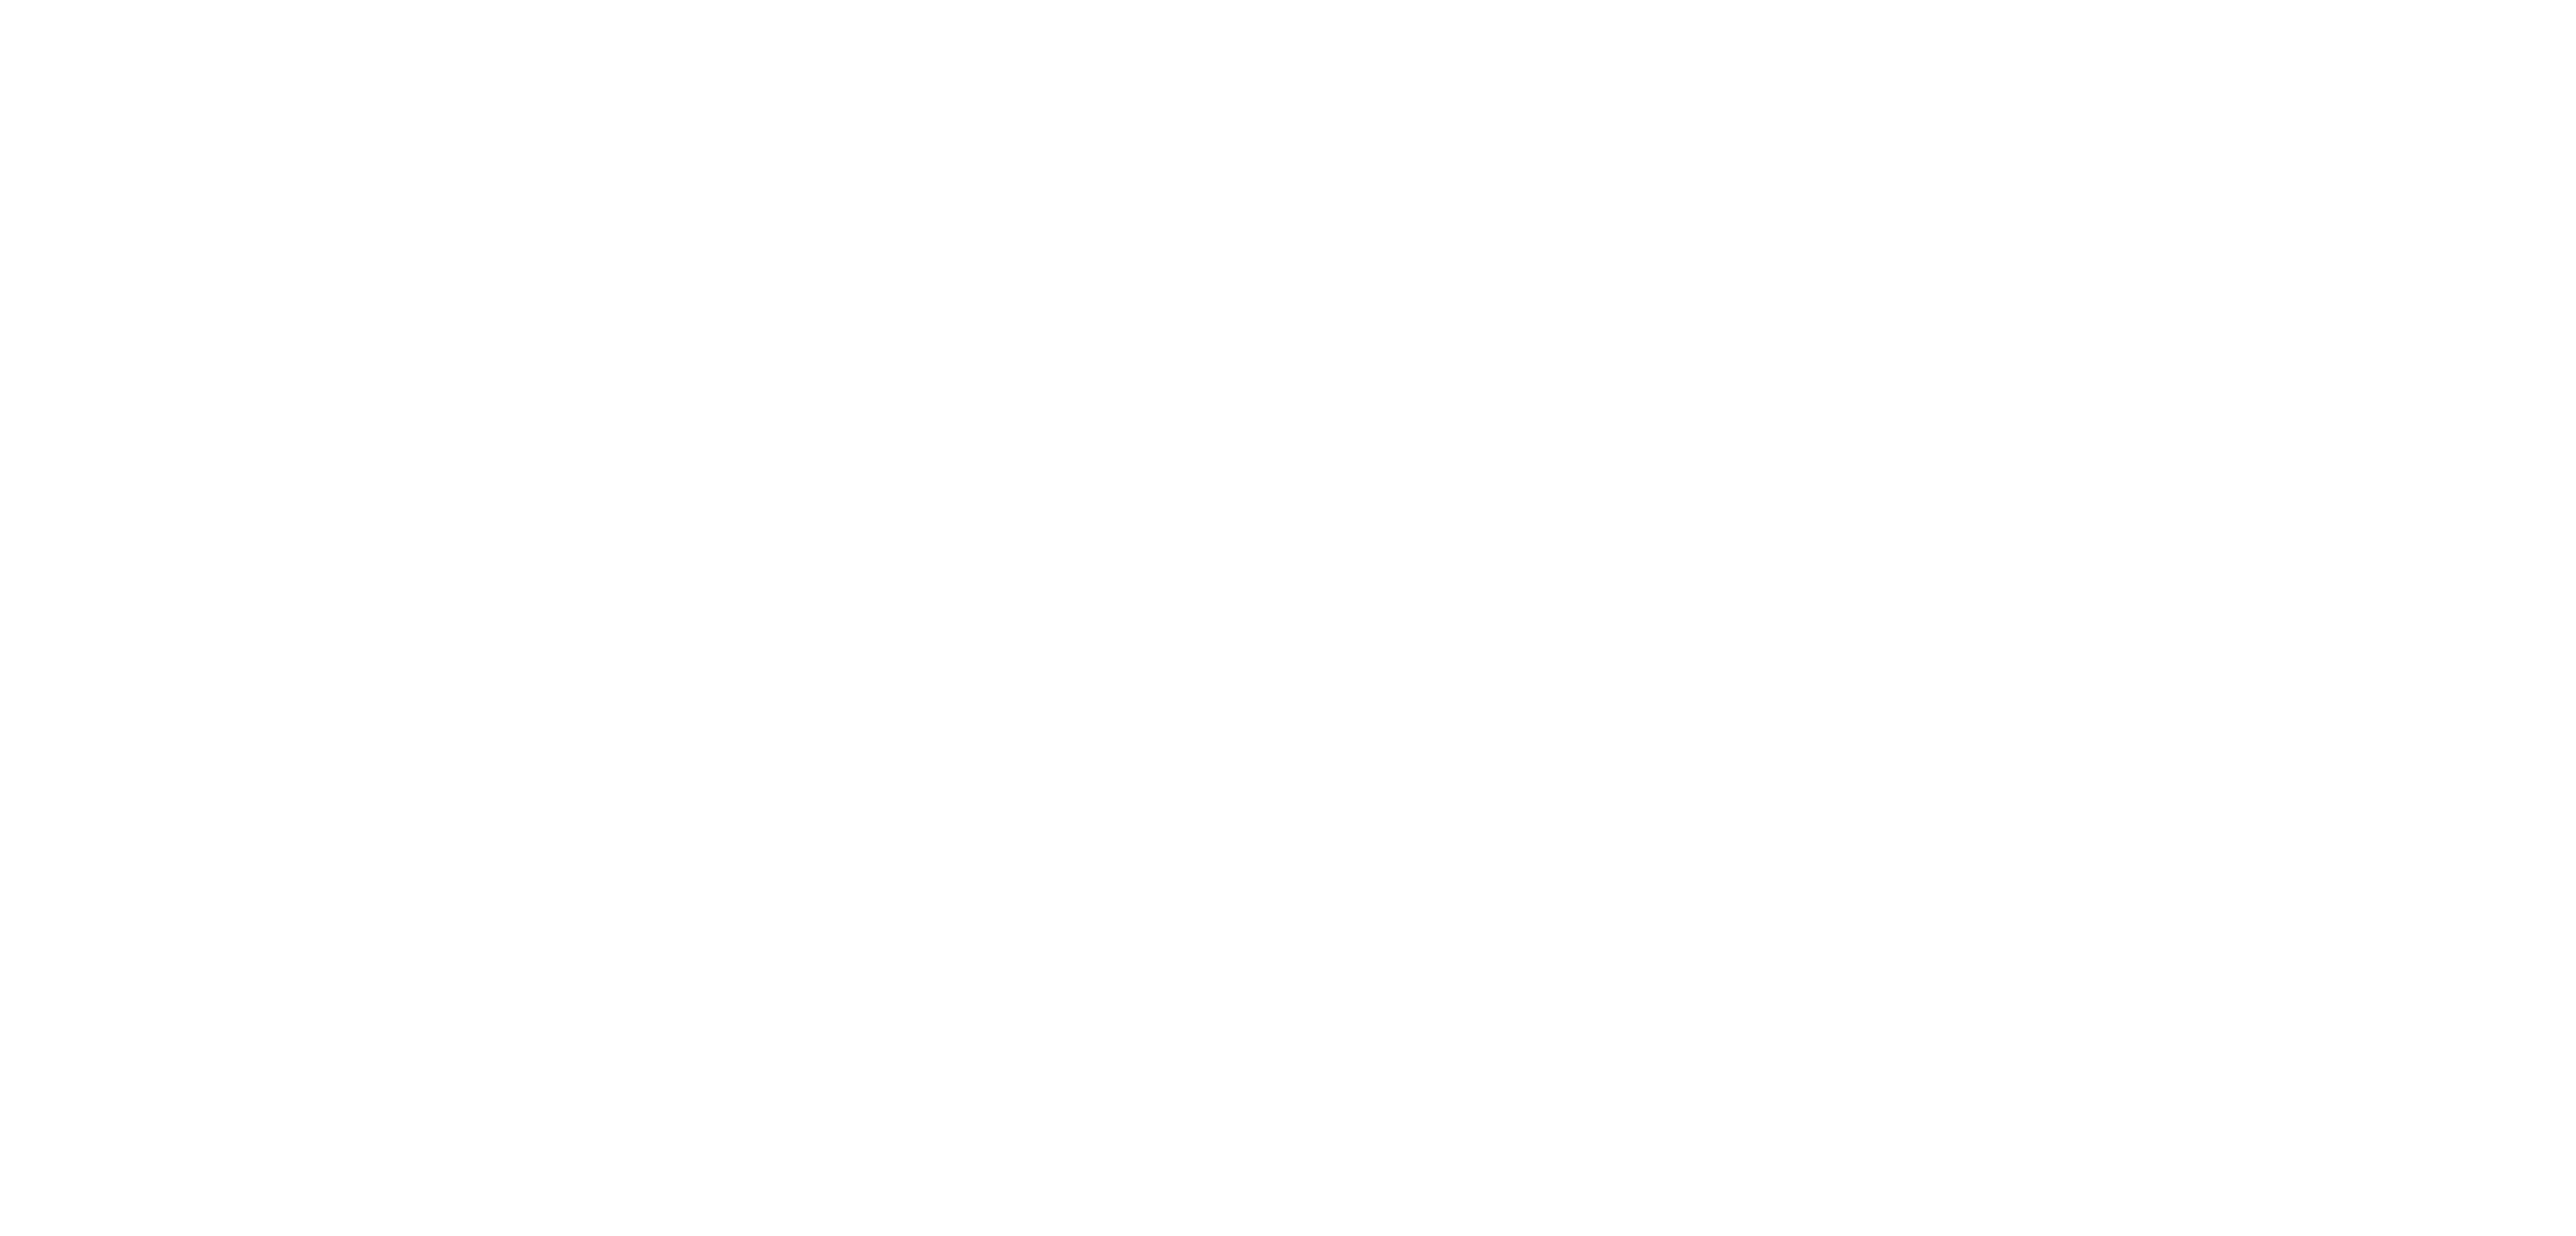

<IPython.core.display.Javascript object>


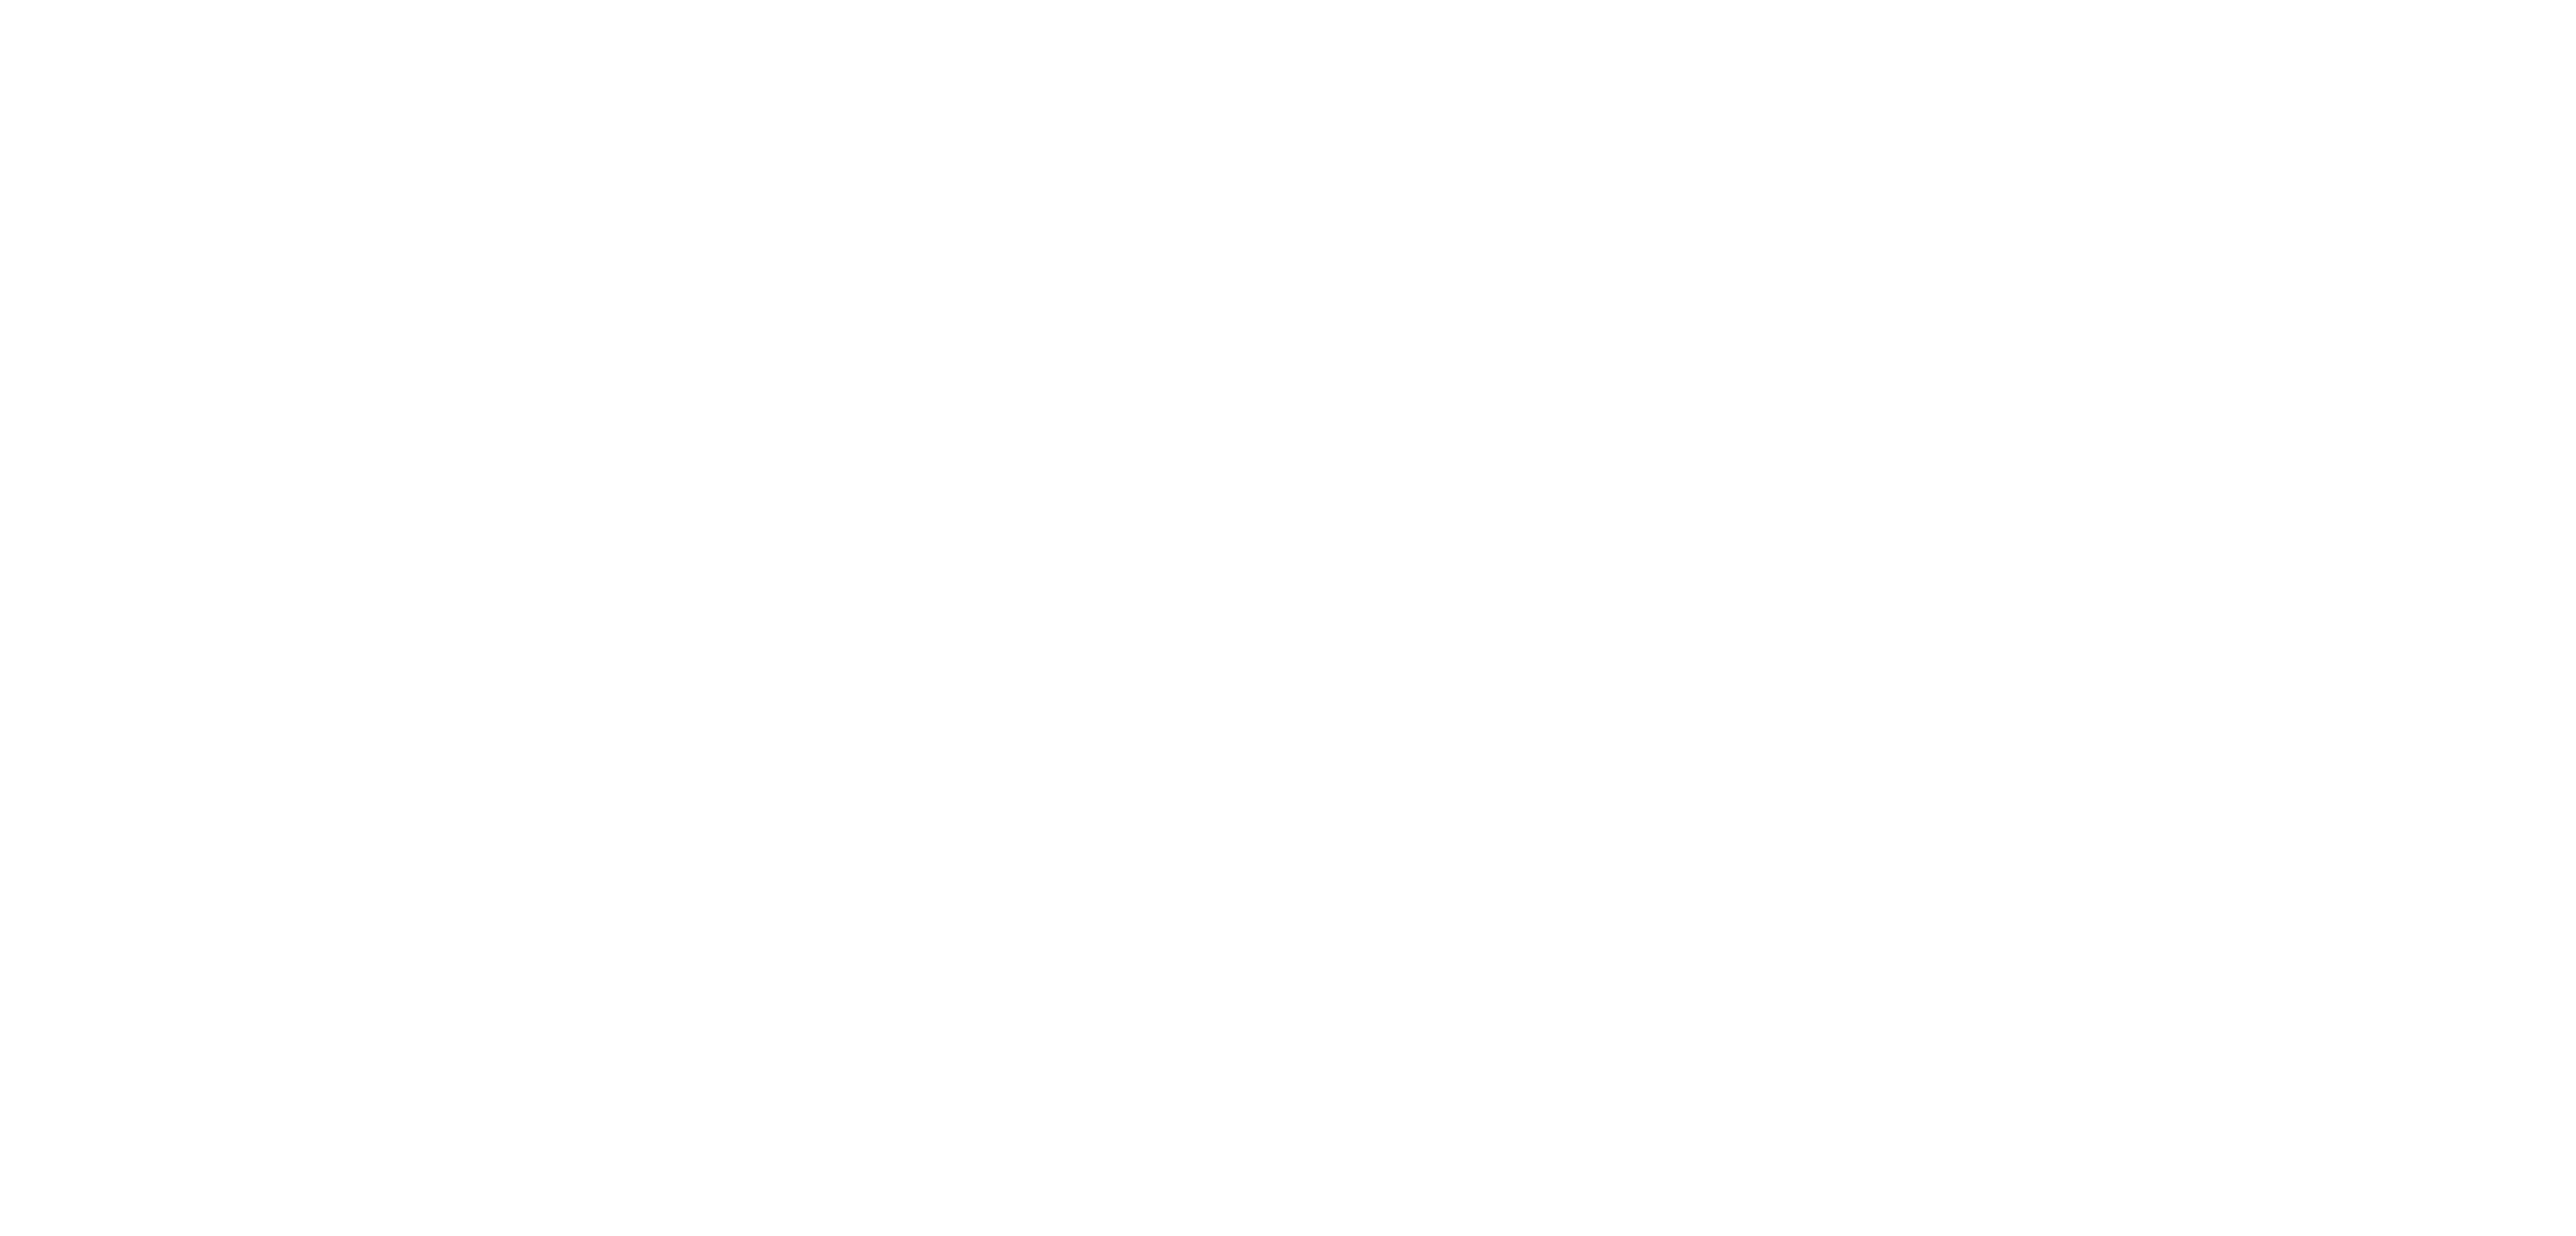

<IPython.core.display.Javascript object>


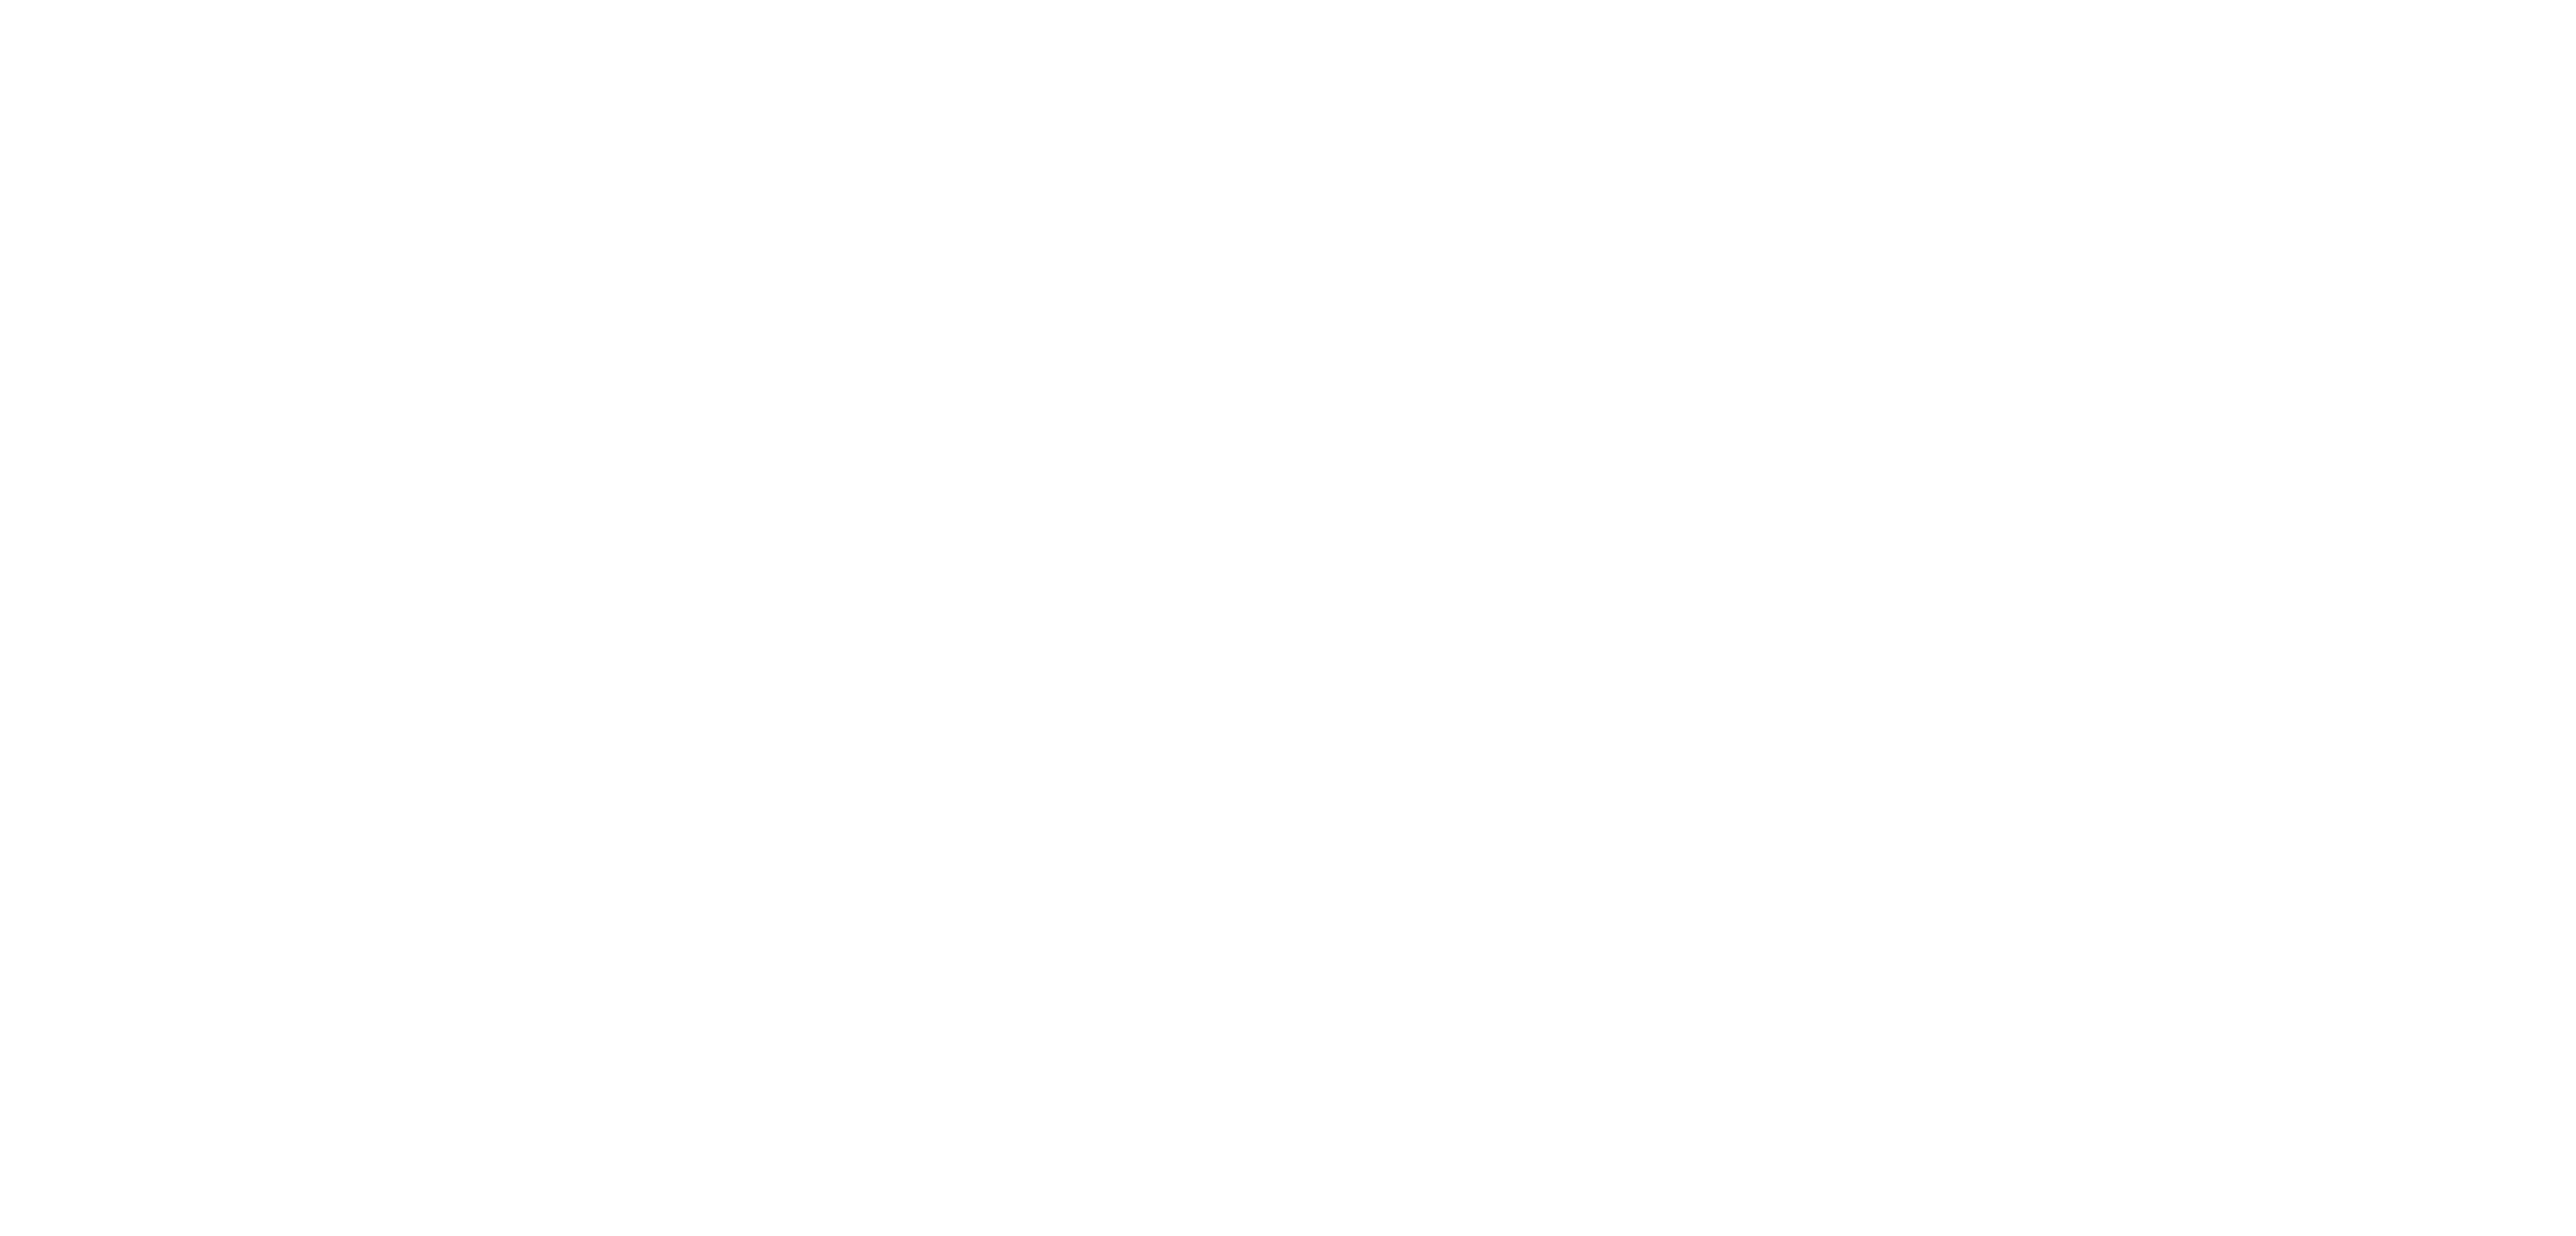

<IPython.core.display.Javascript object>


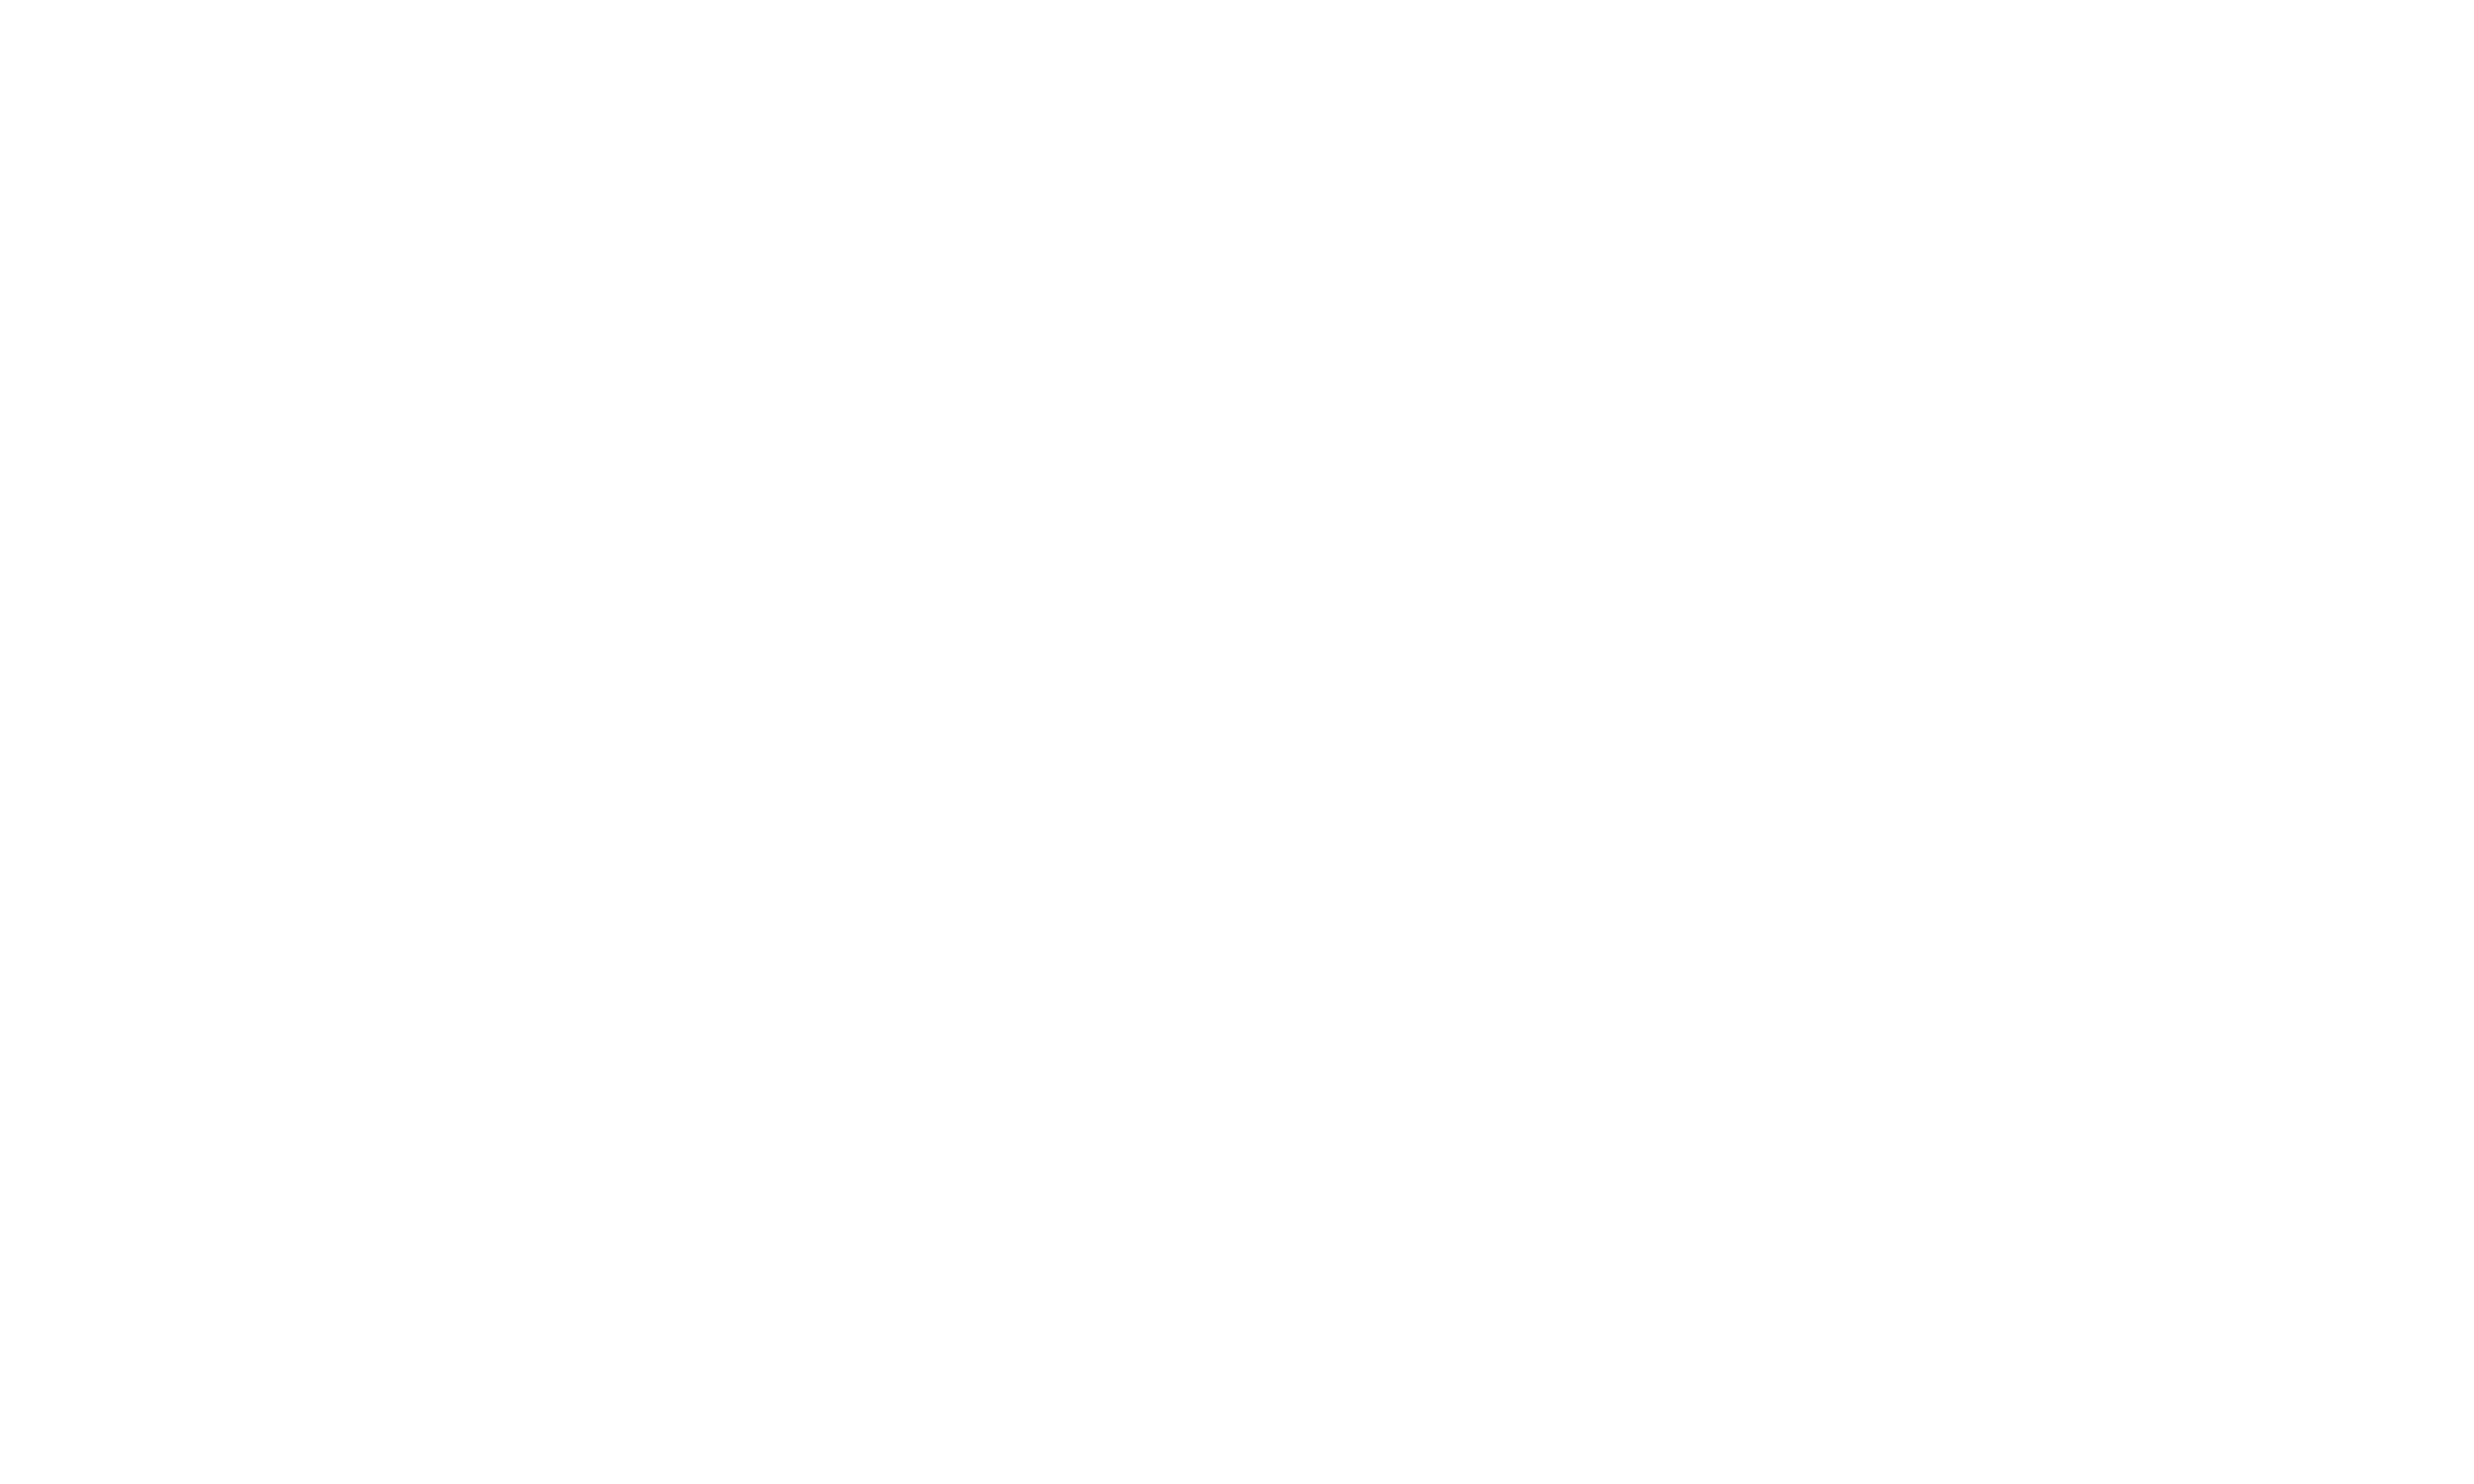

<IPython.core.display.Javascript object>


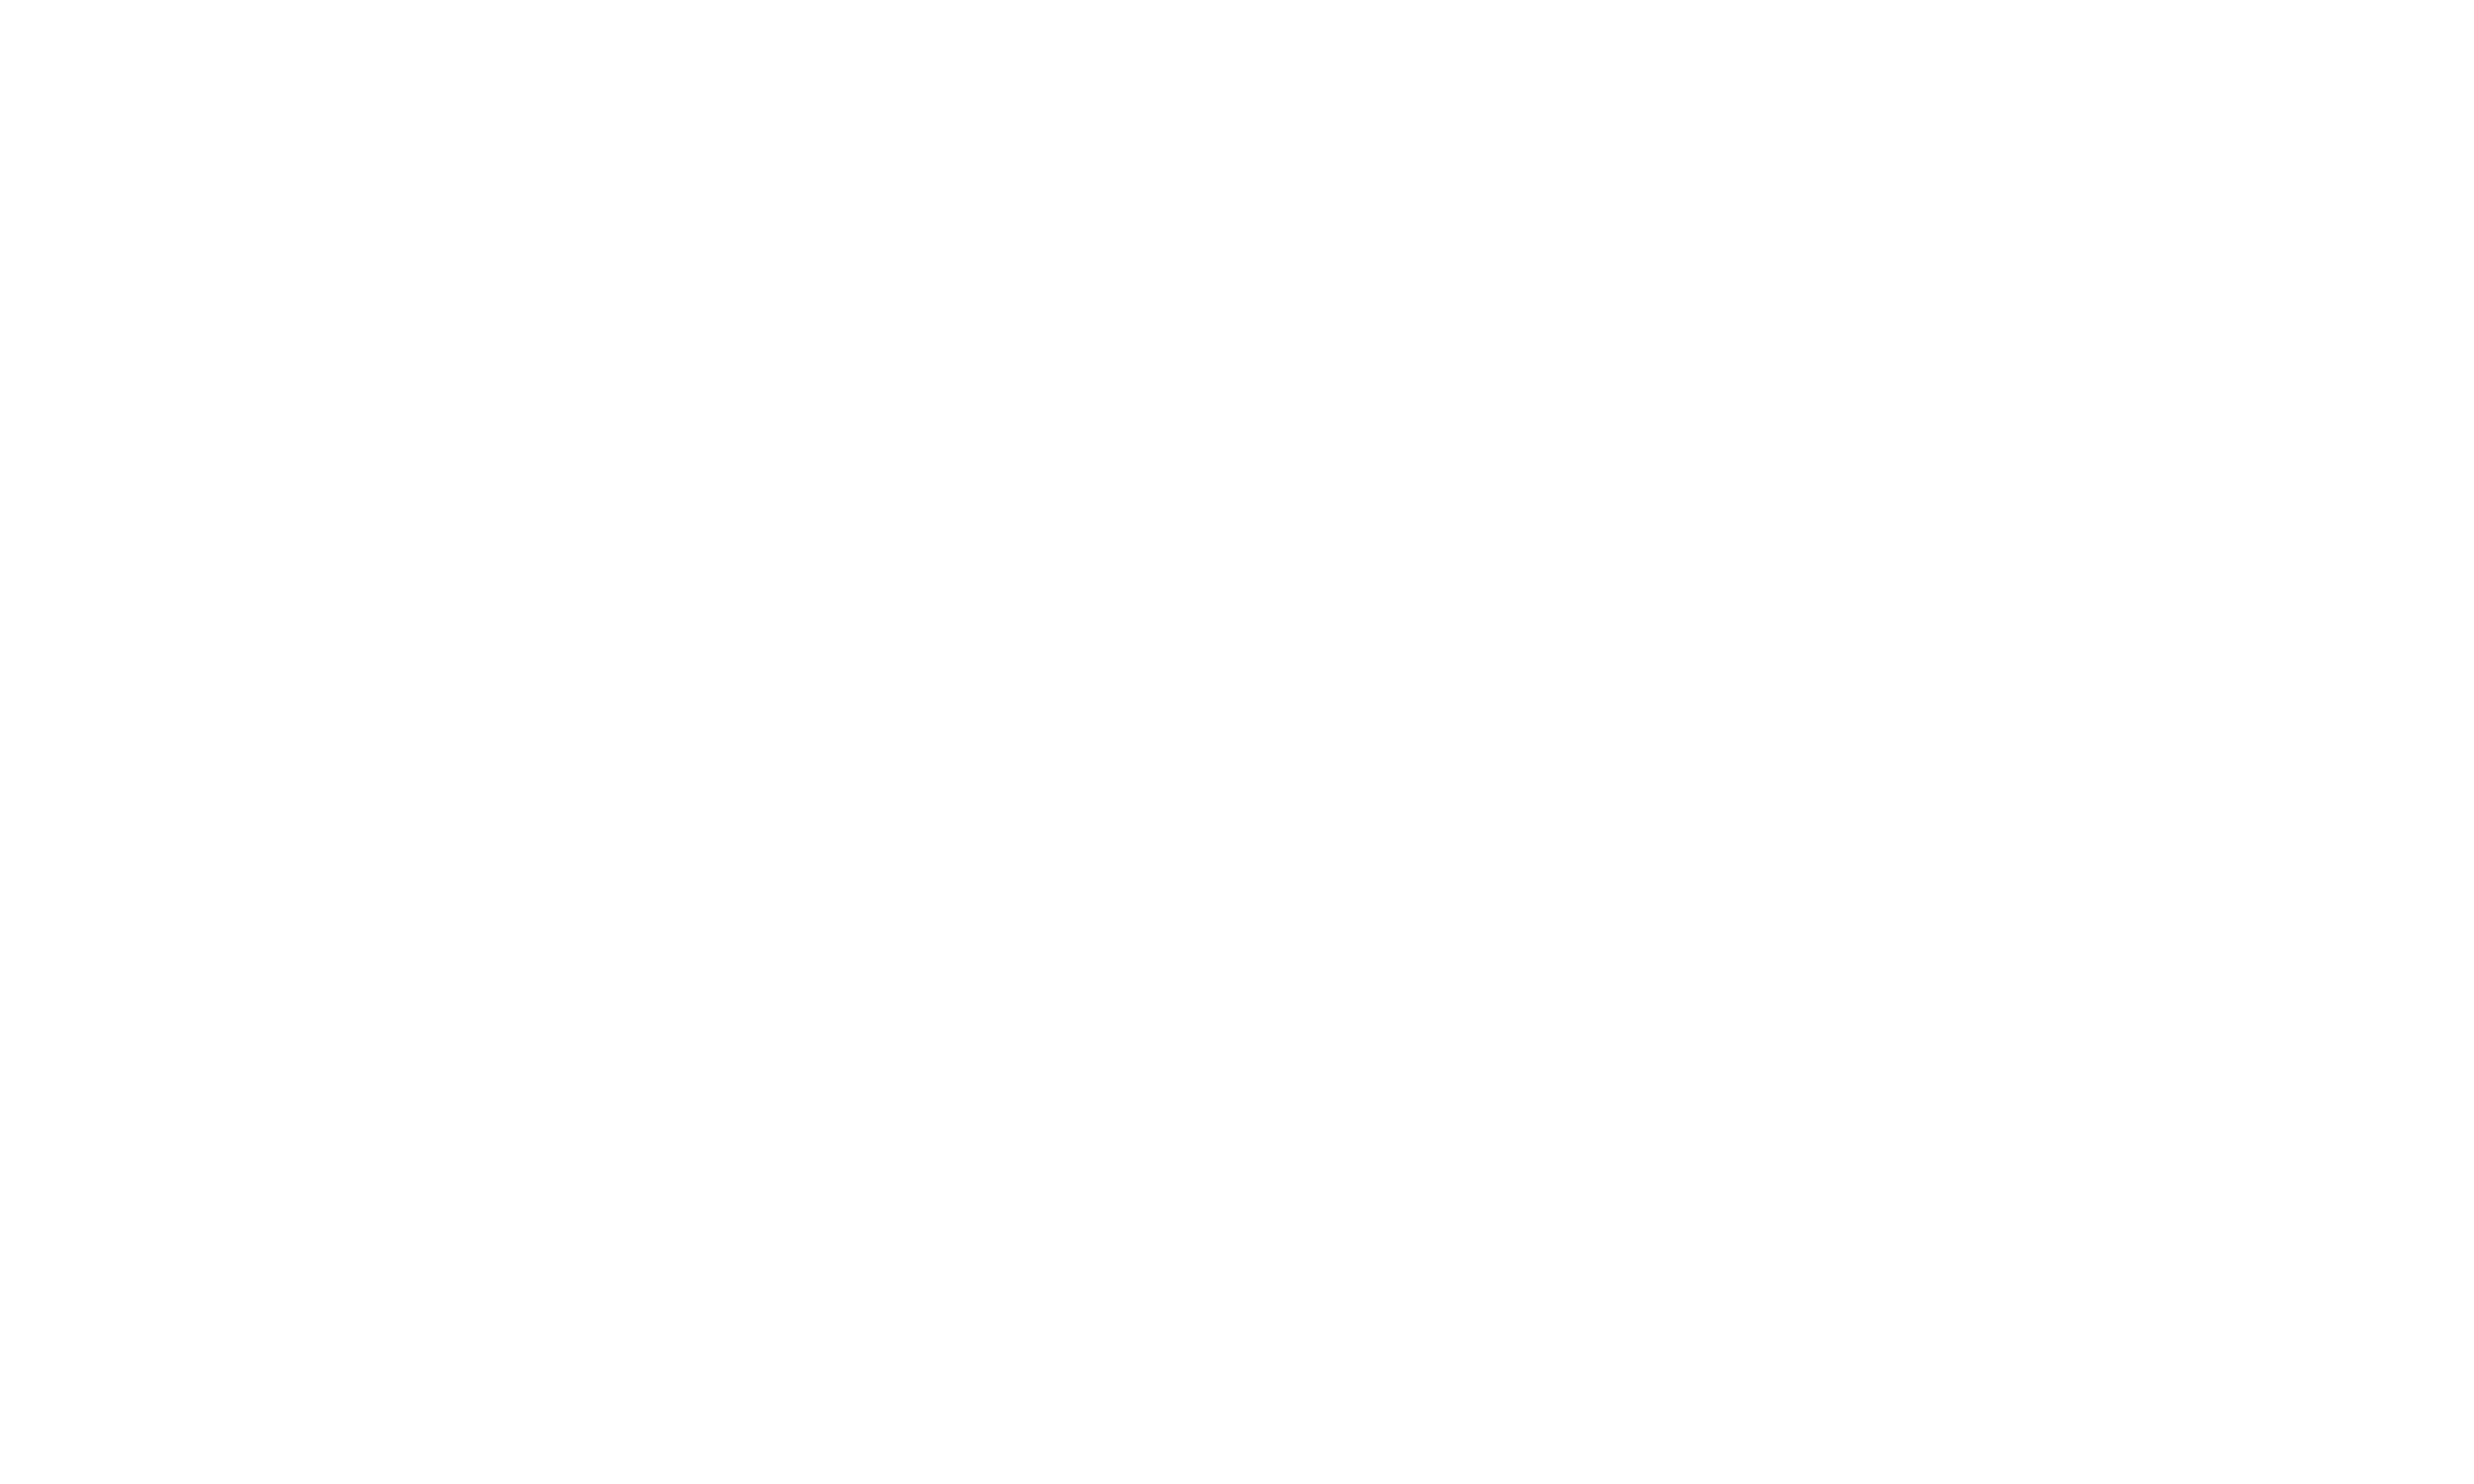

<IPython.core.display.Javascript object>


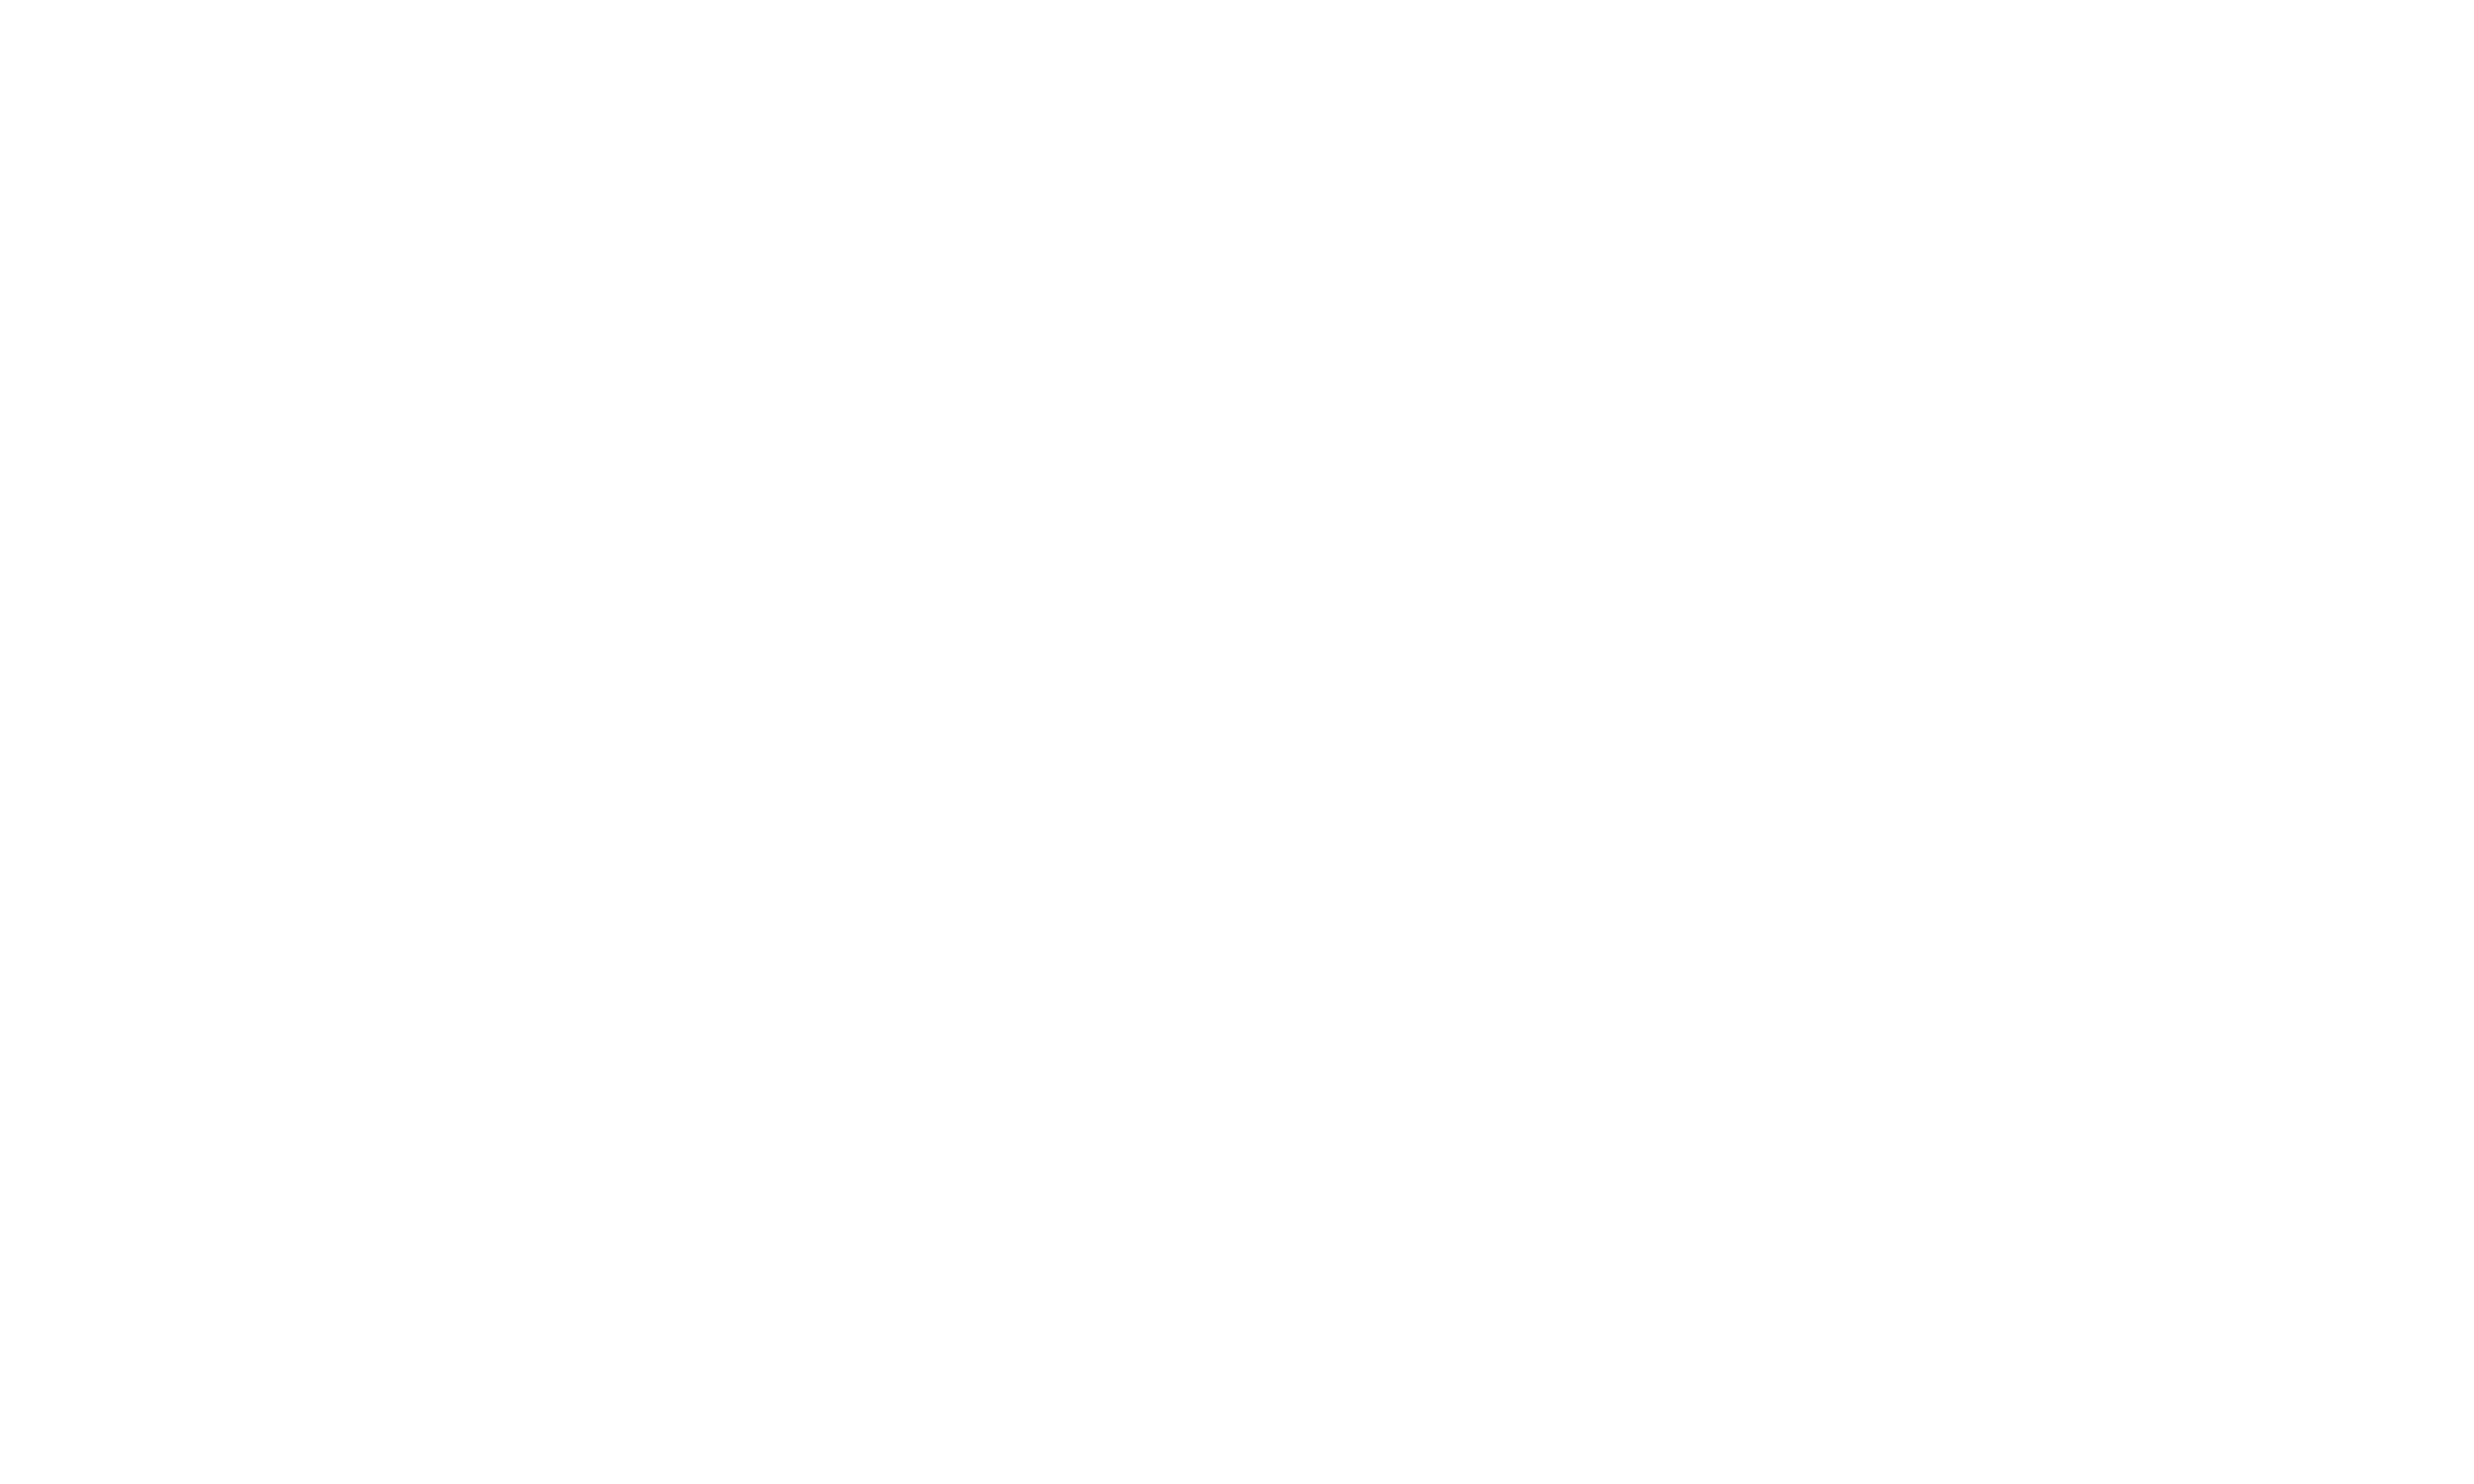

<IPython.core.display.Javascript object>


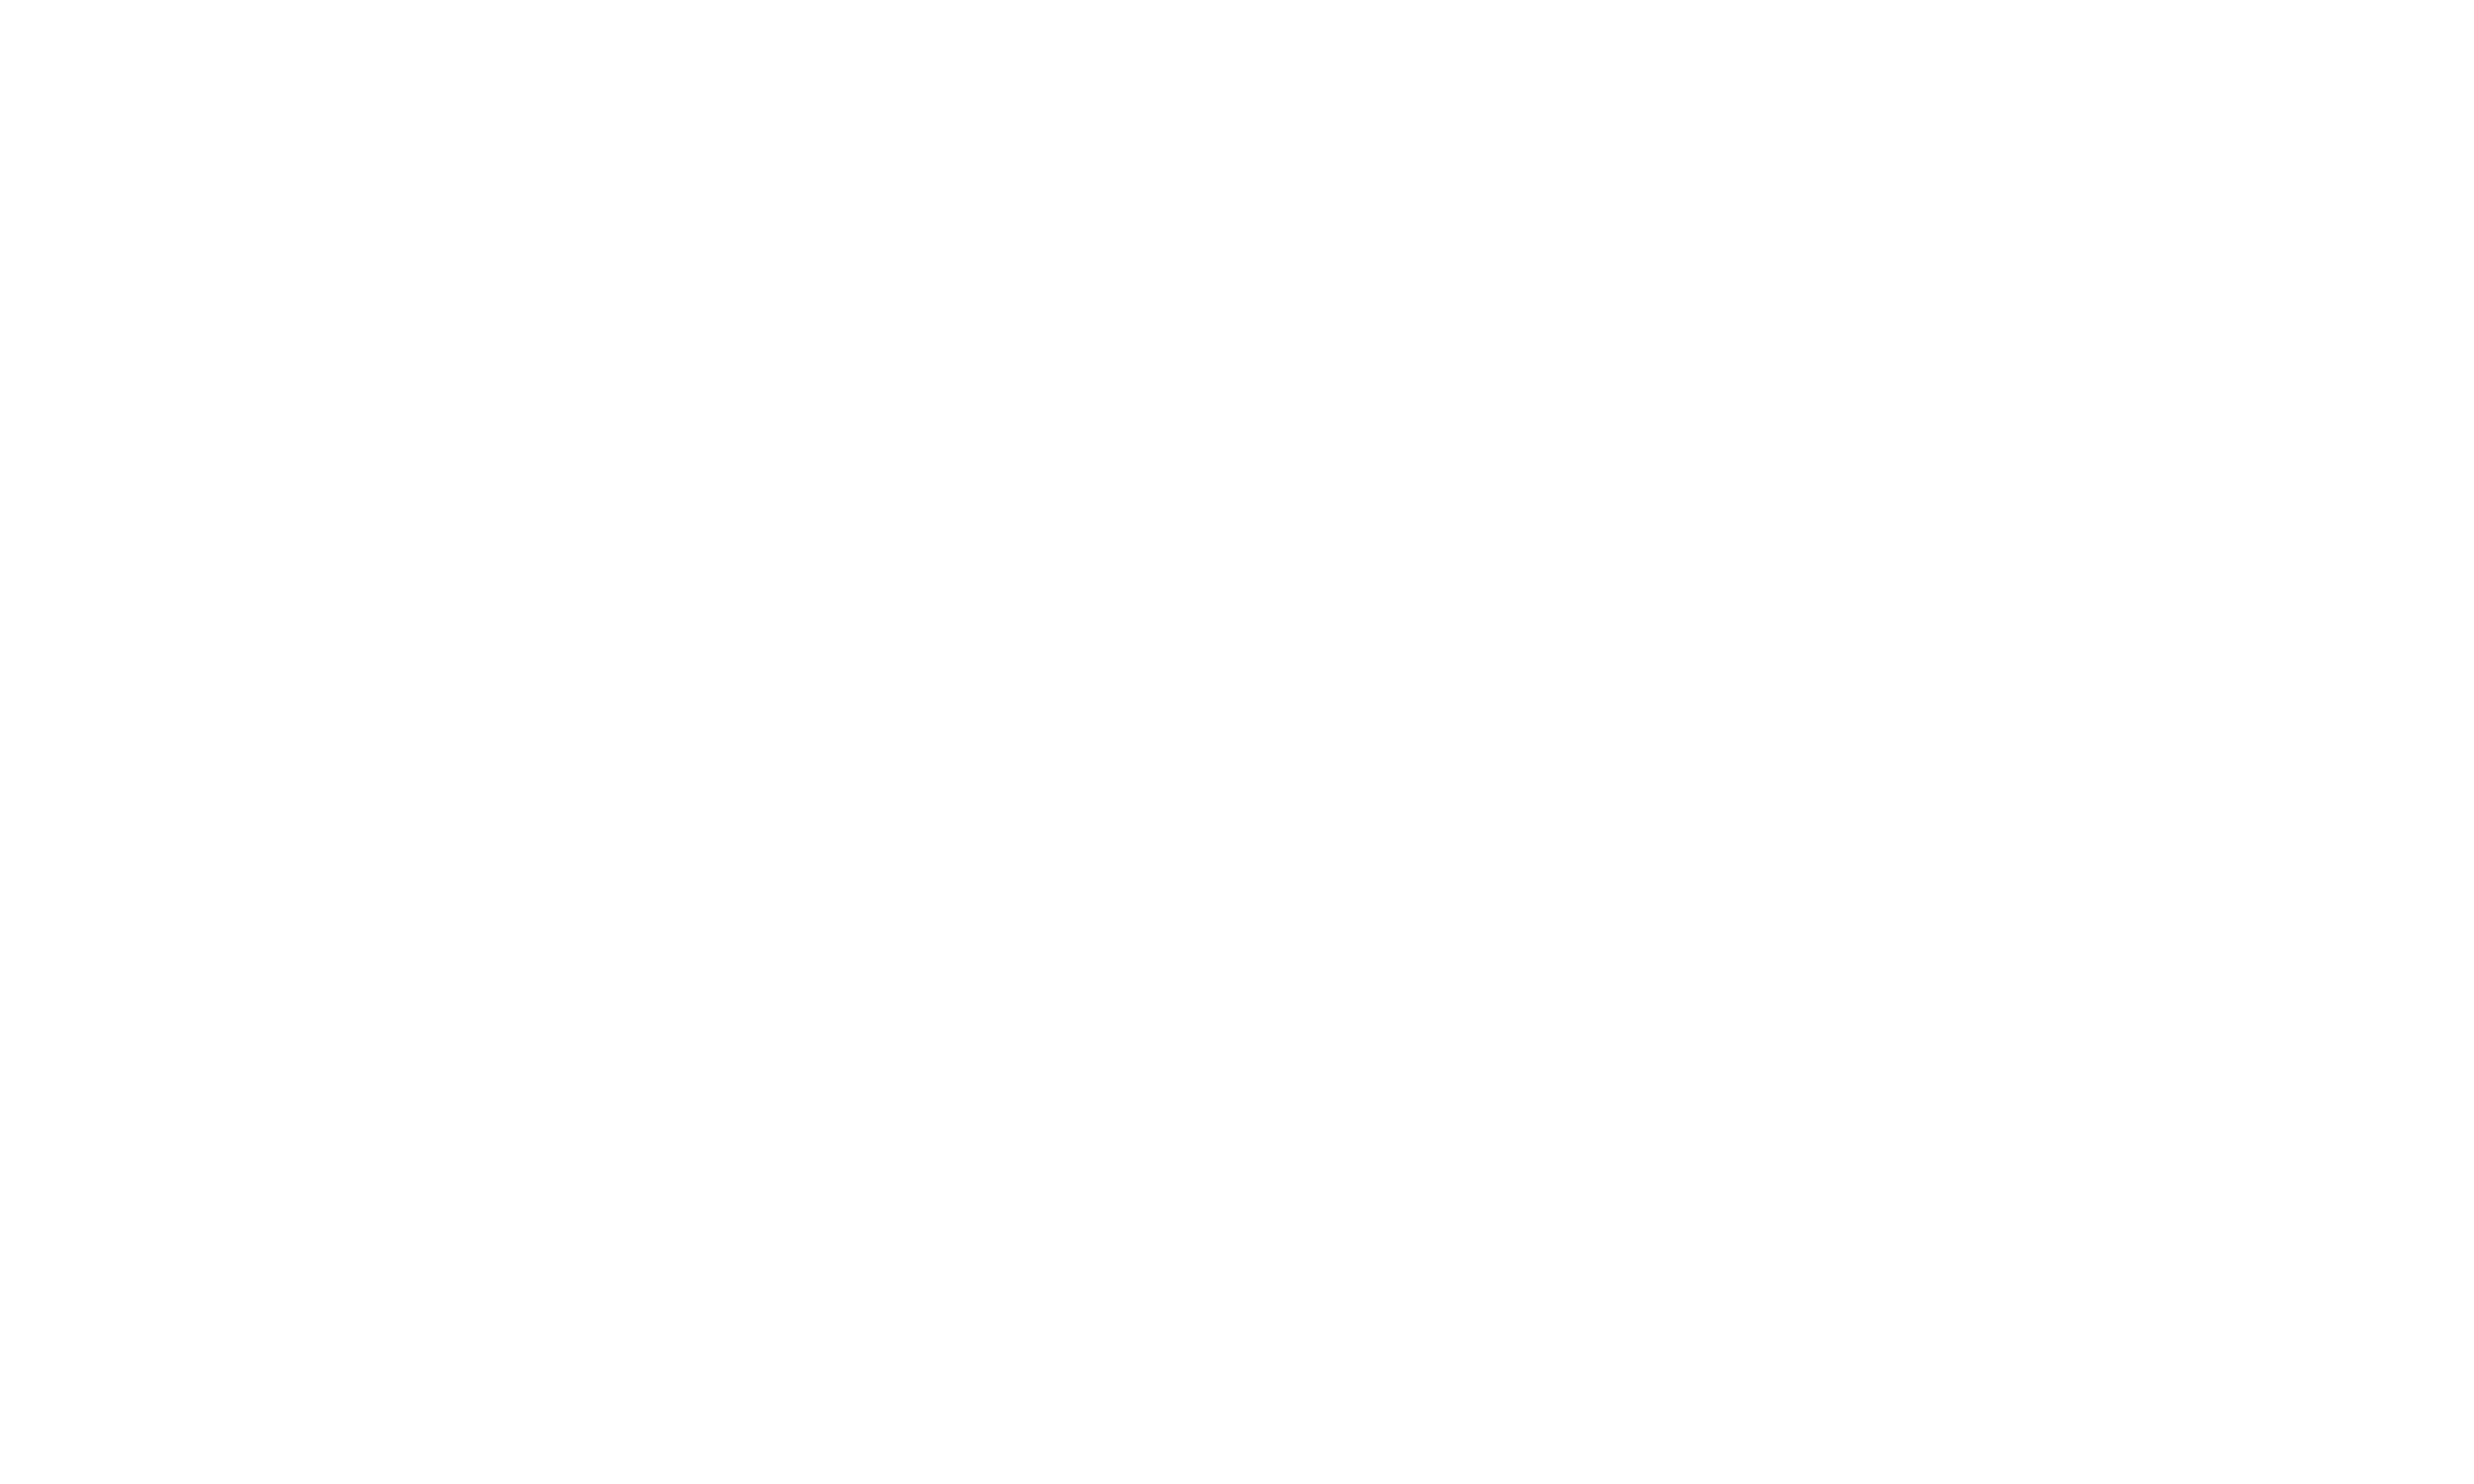

<IPython.core.display.Javascript object>


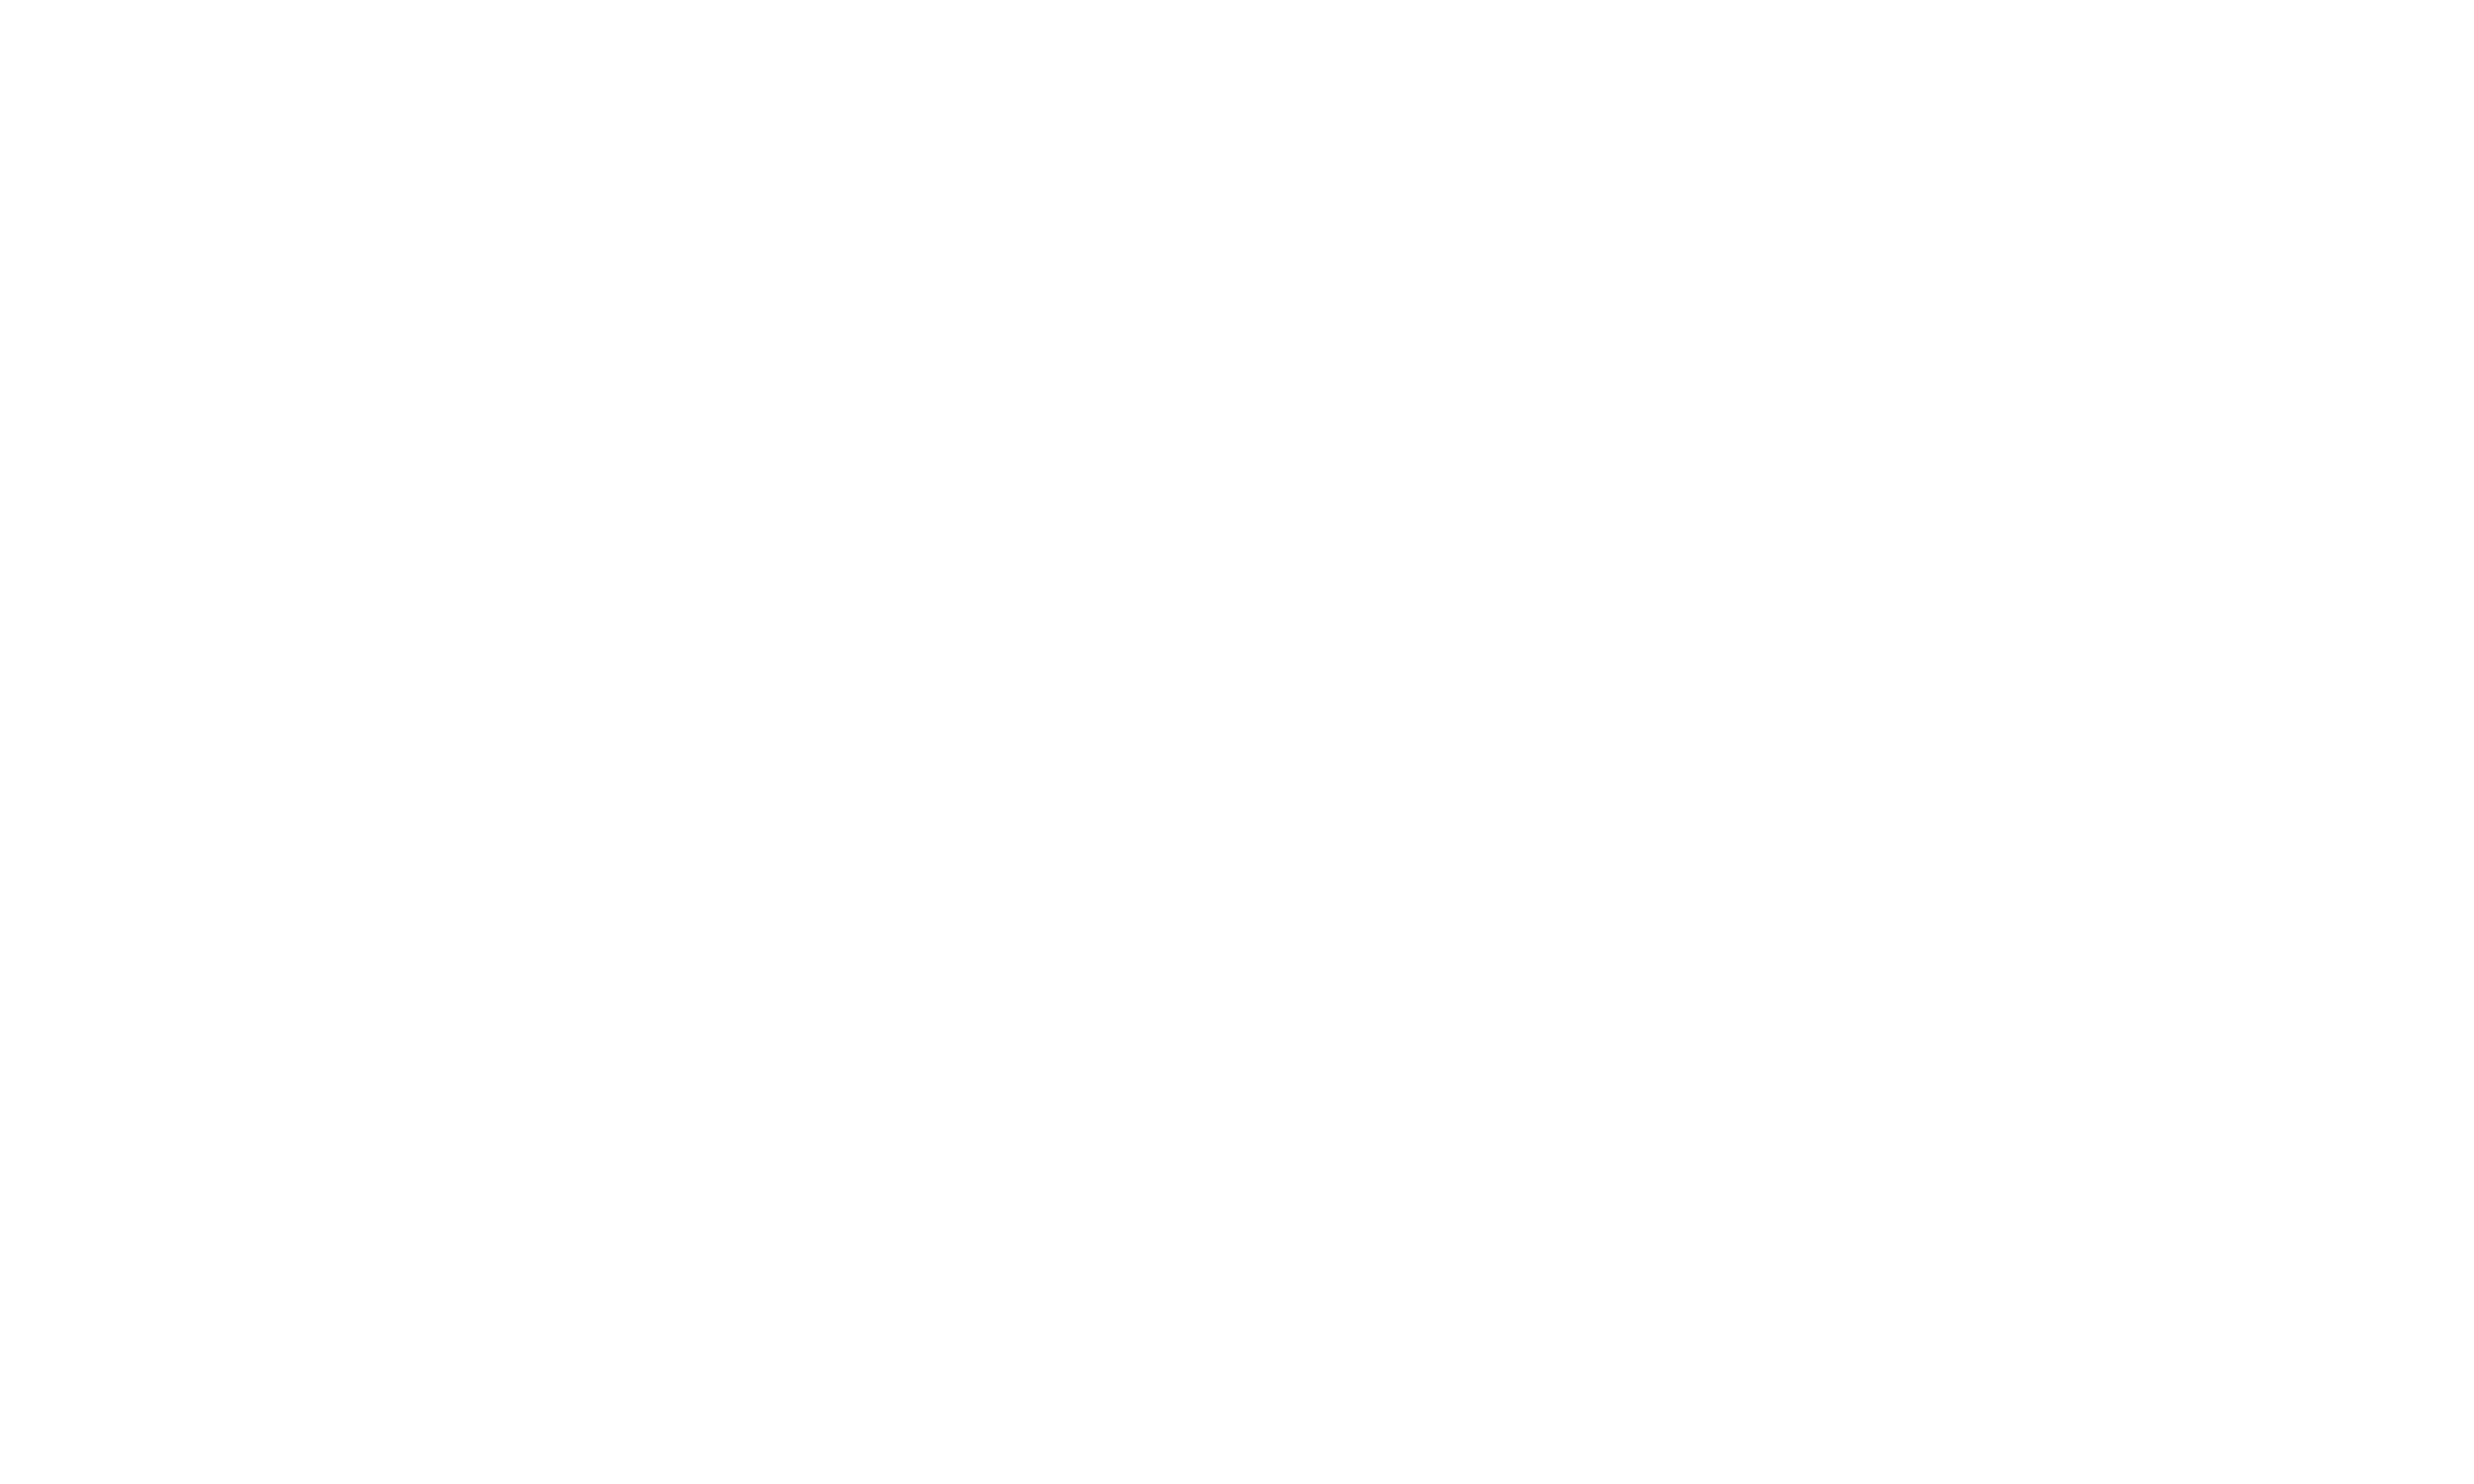

<IPython.core.display.Javascript object>


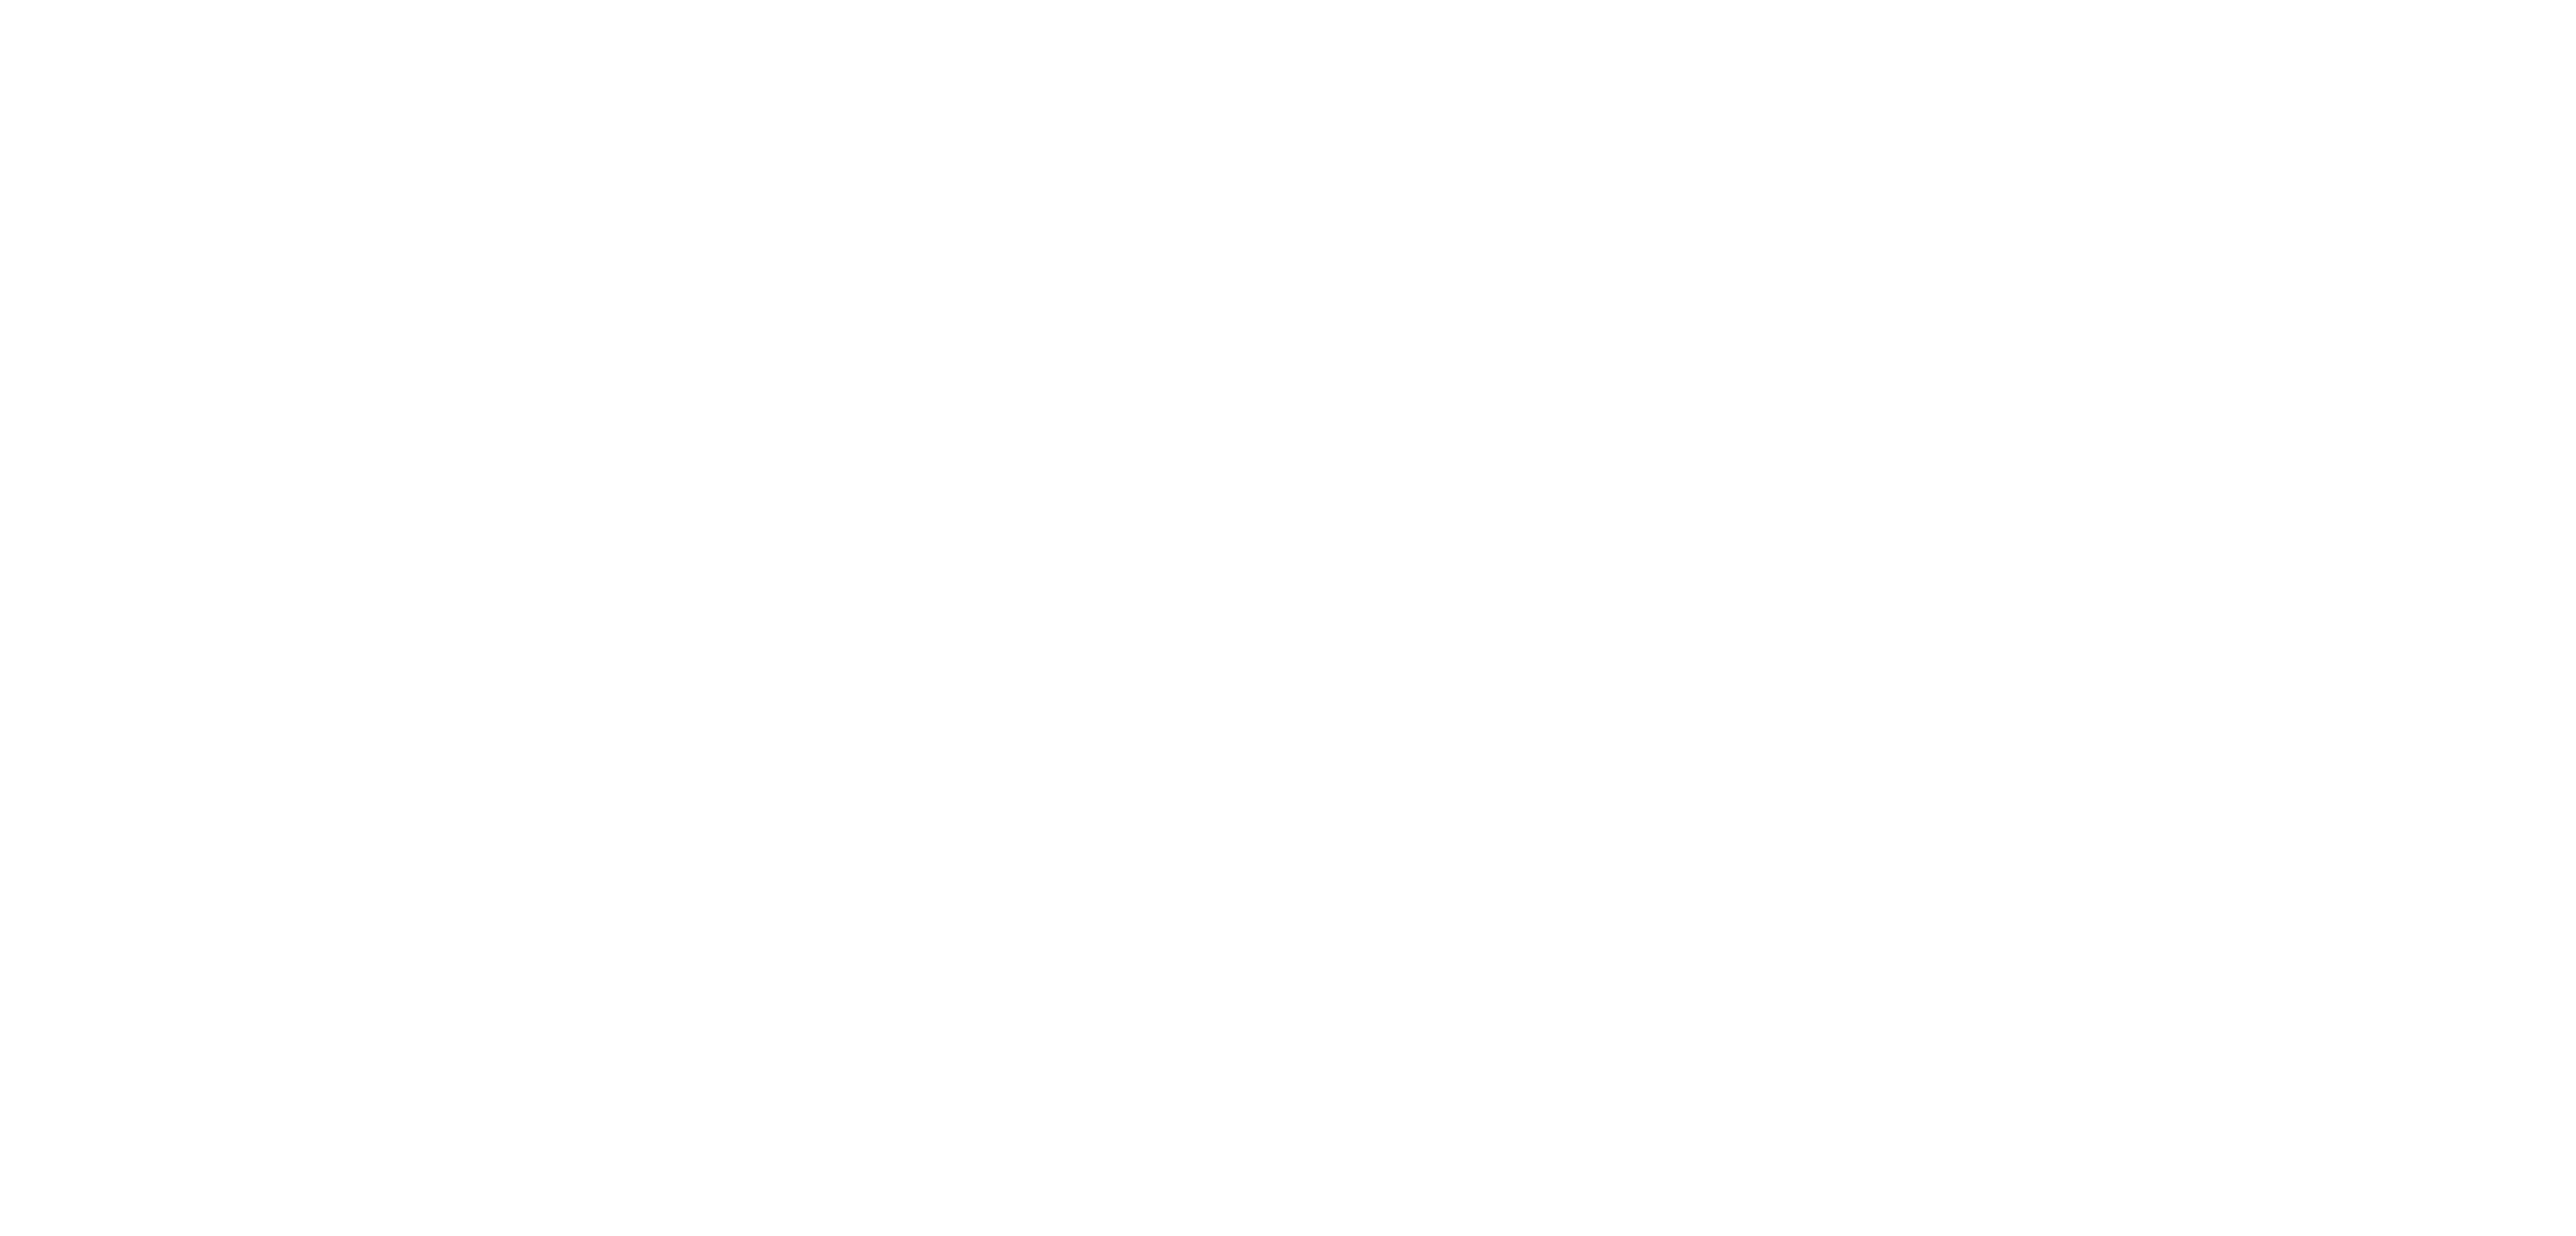

<IPython.core.display.Javascript object>


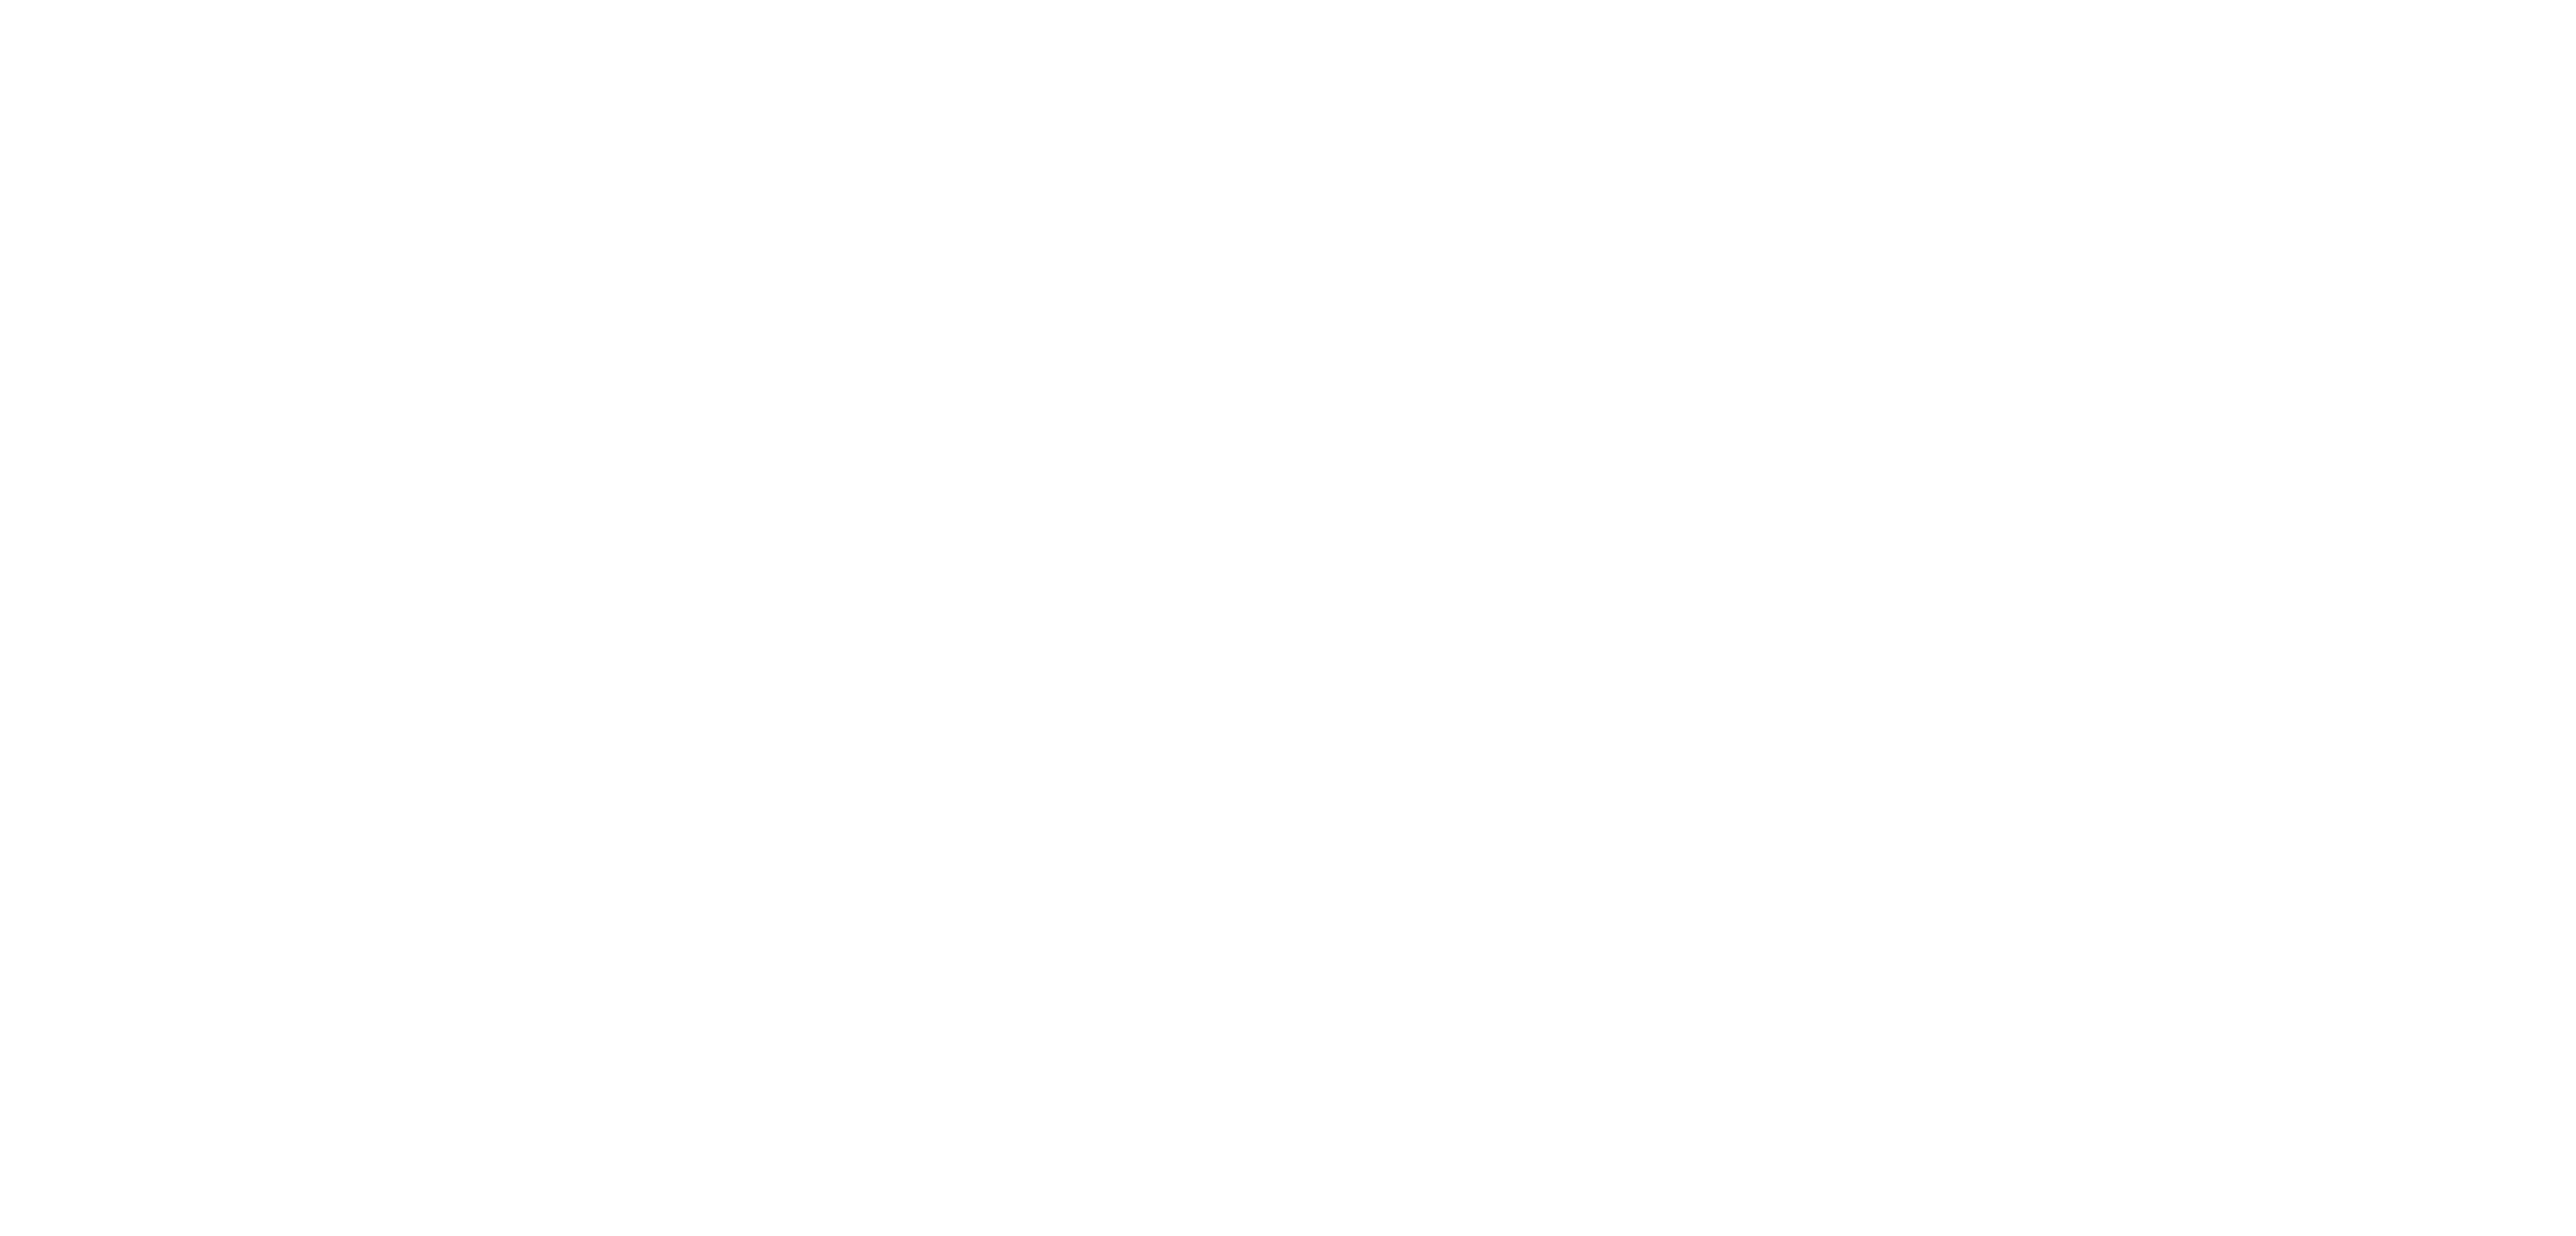

<IPython.core.display.Javascript object>


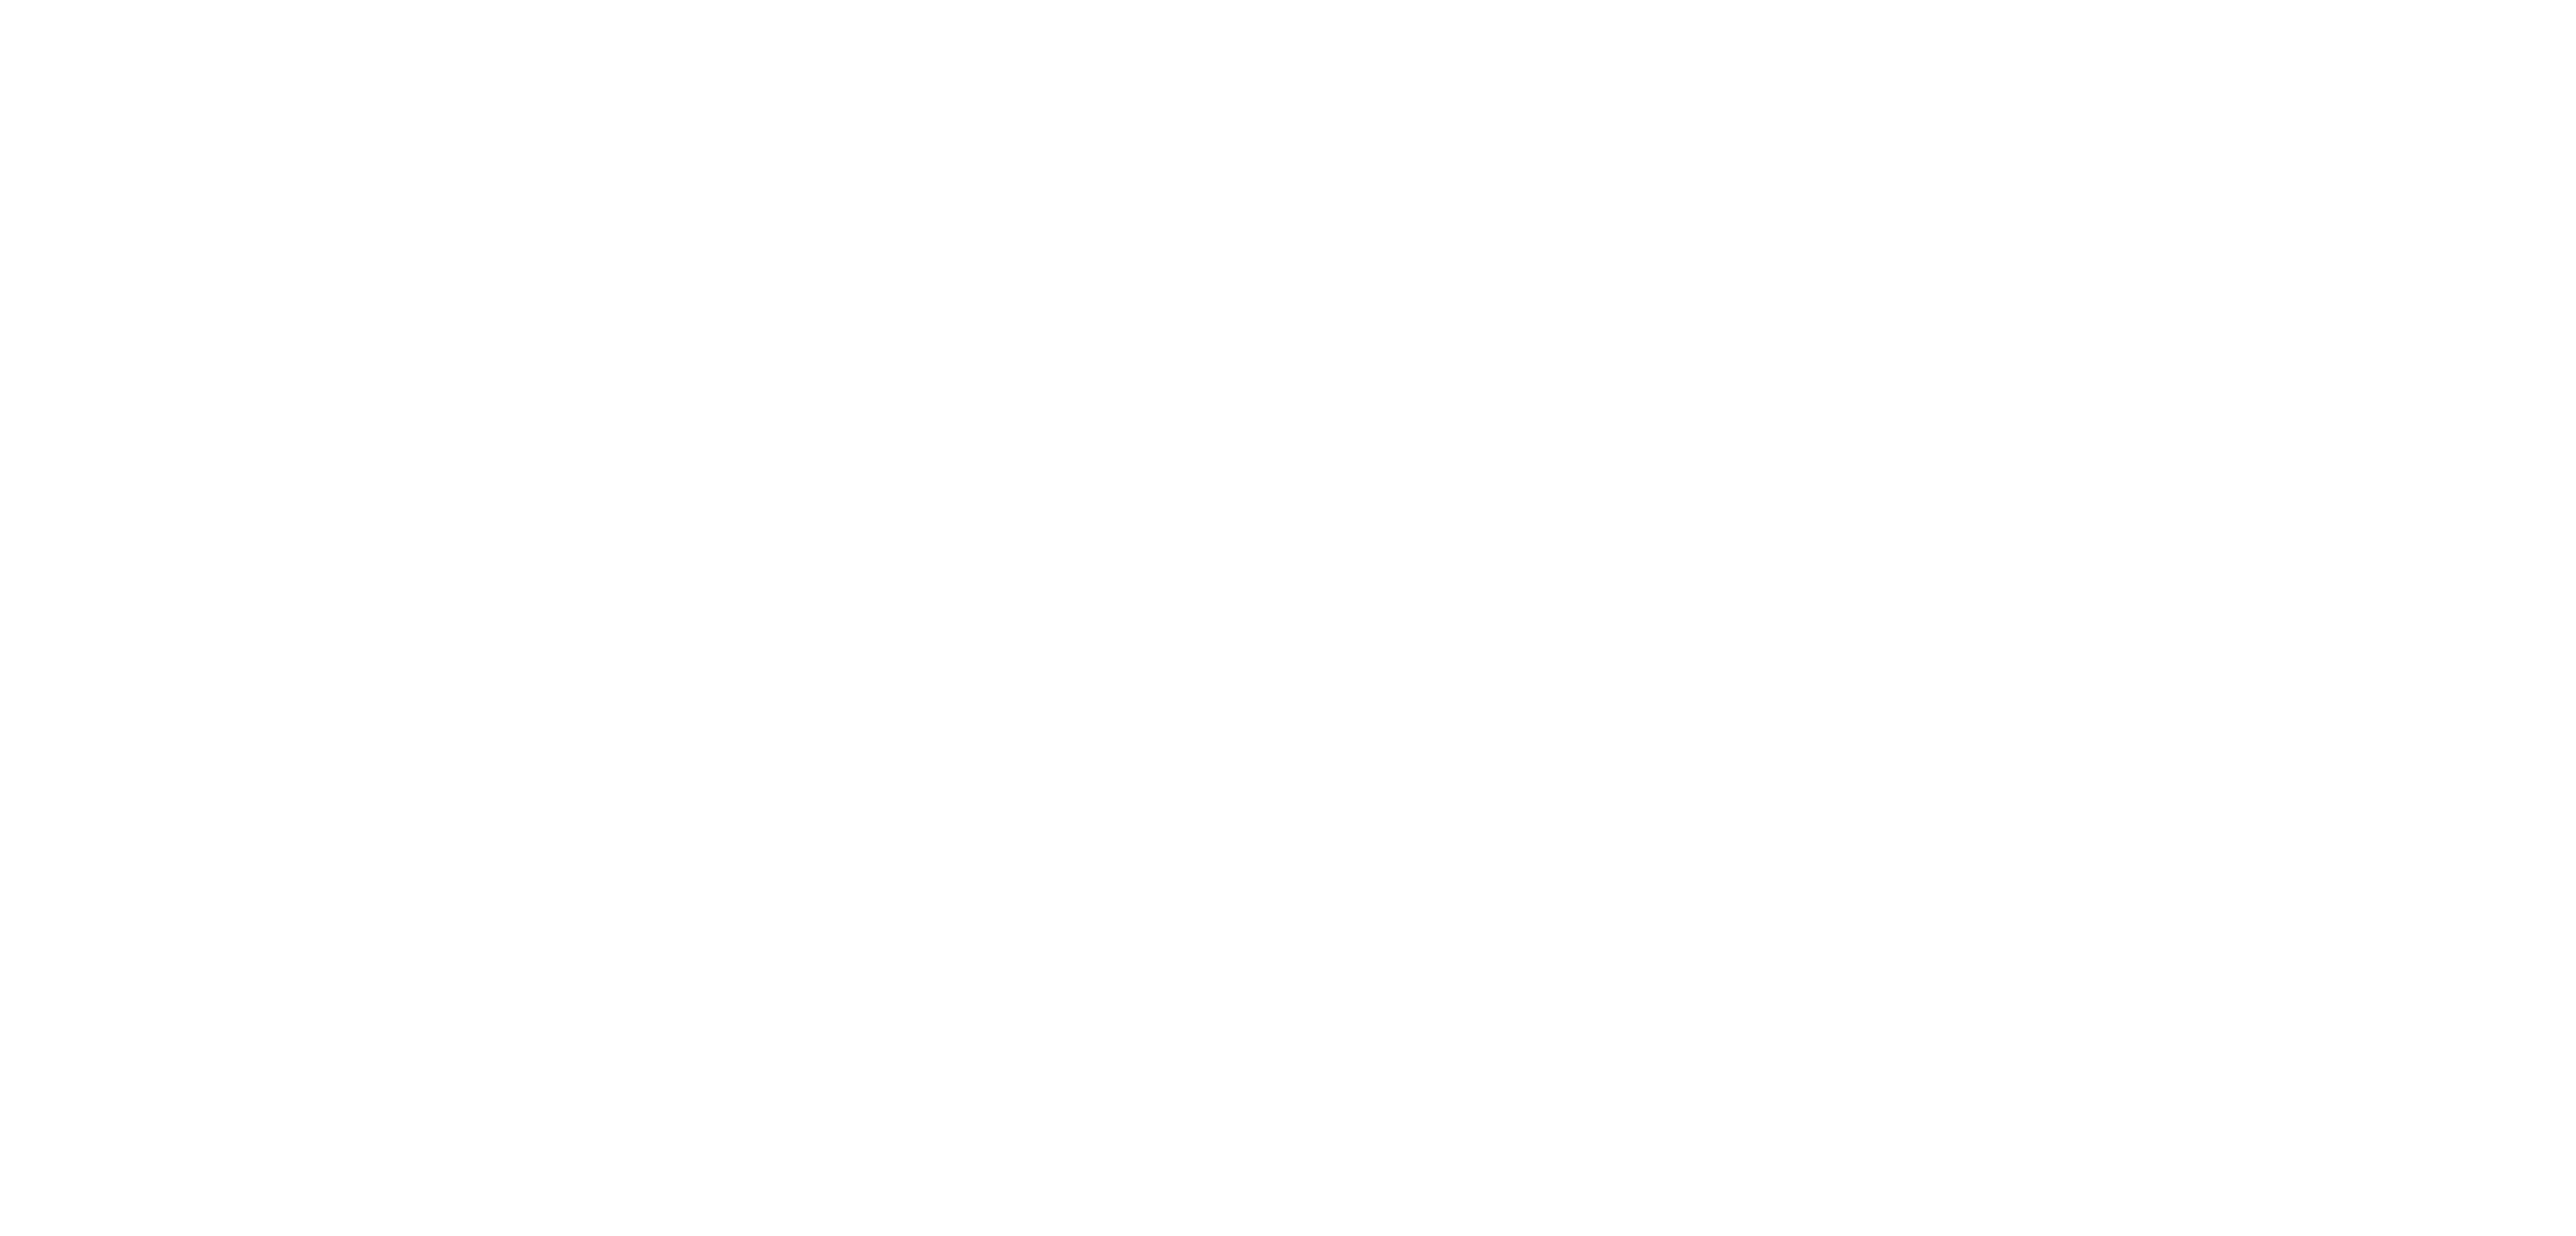

<IPython.core.display.Javascript object>


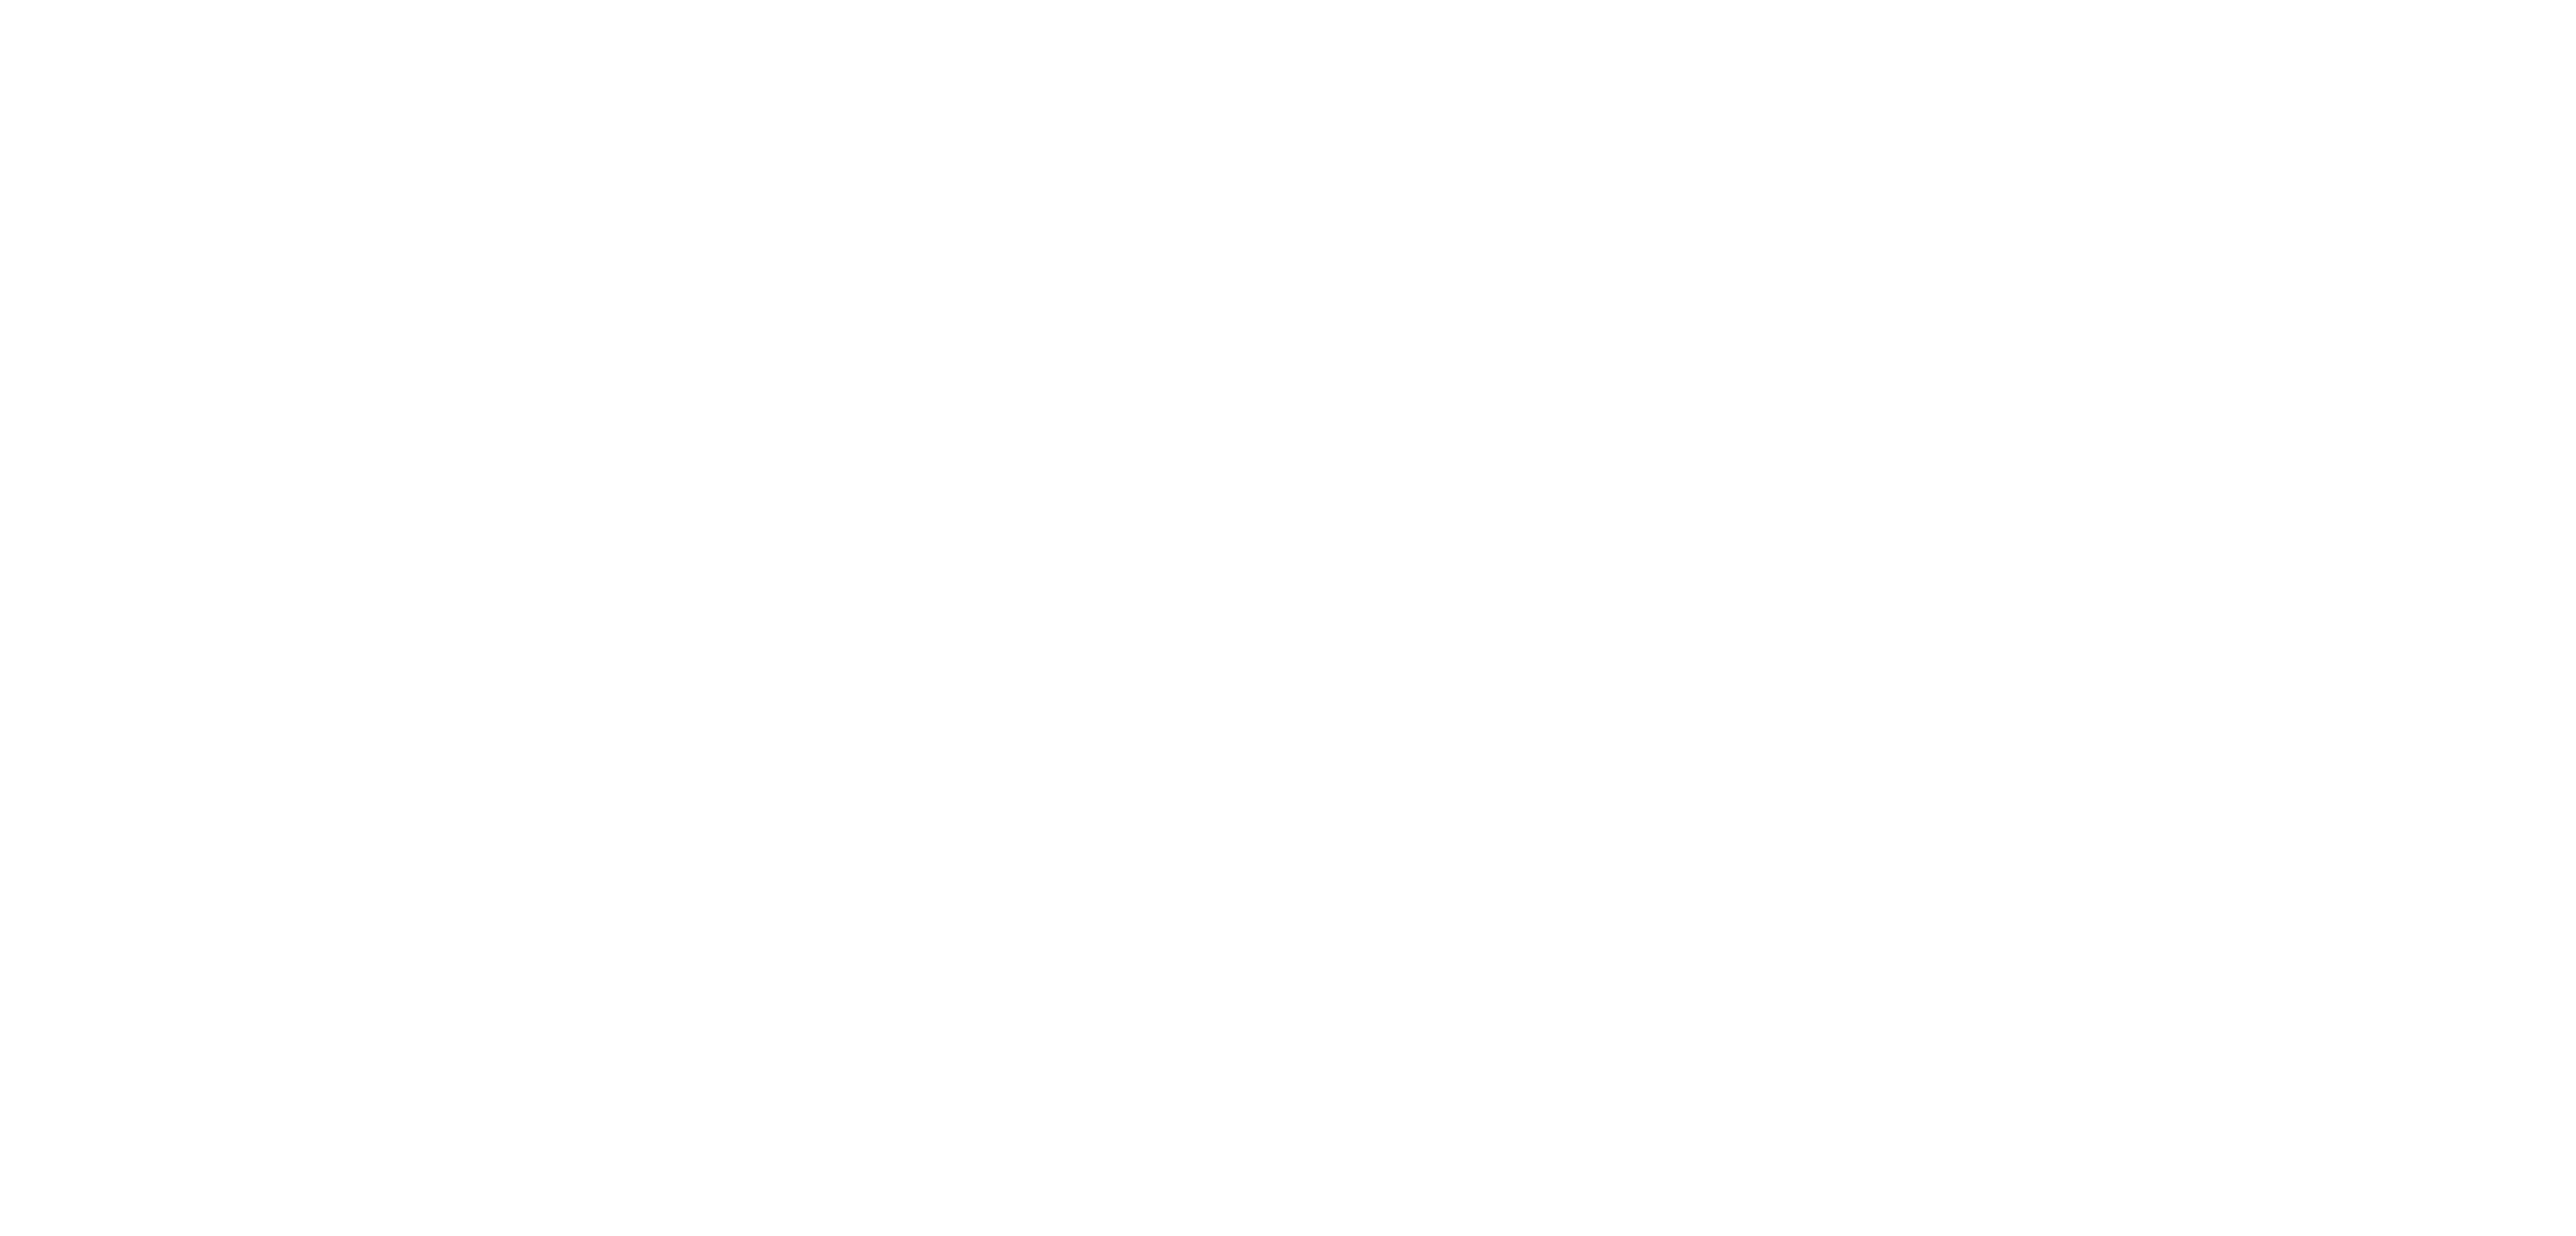

<IPython.core.display.Javascript object>


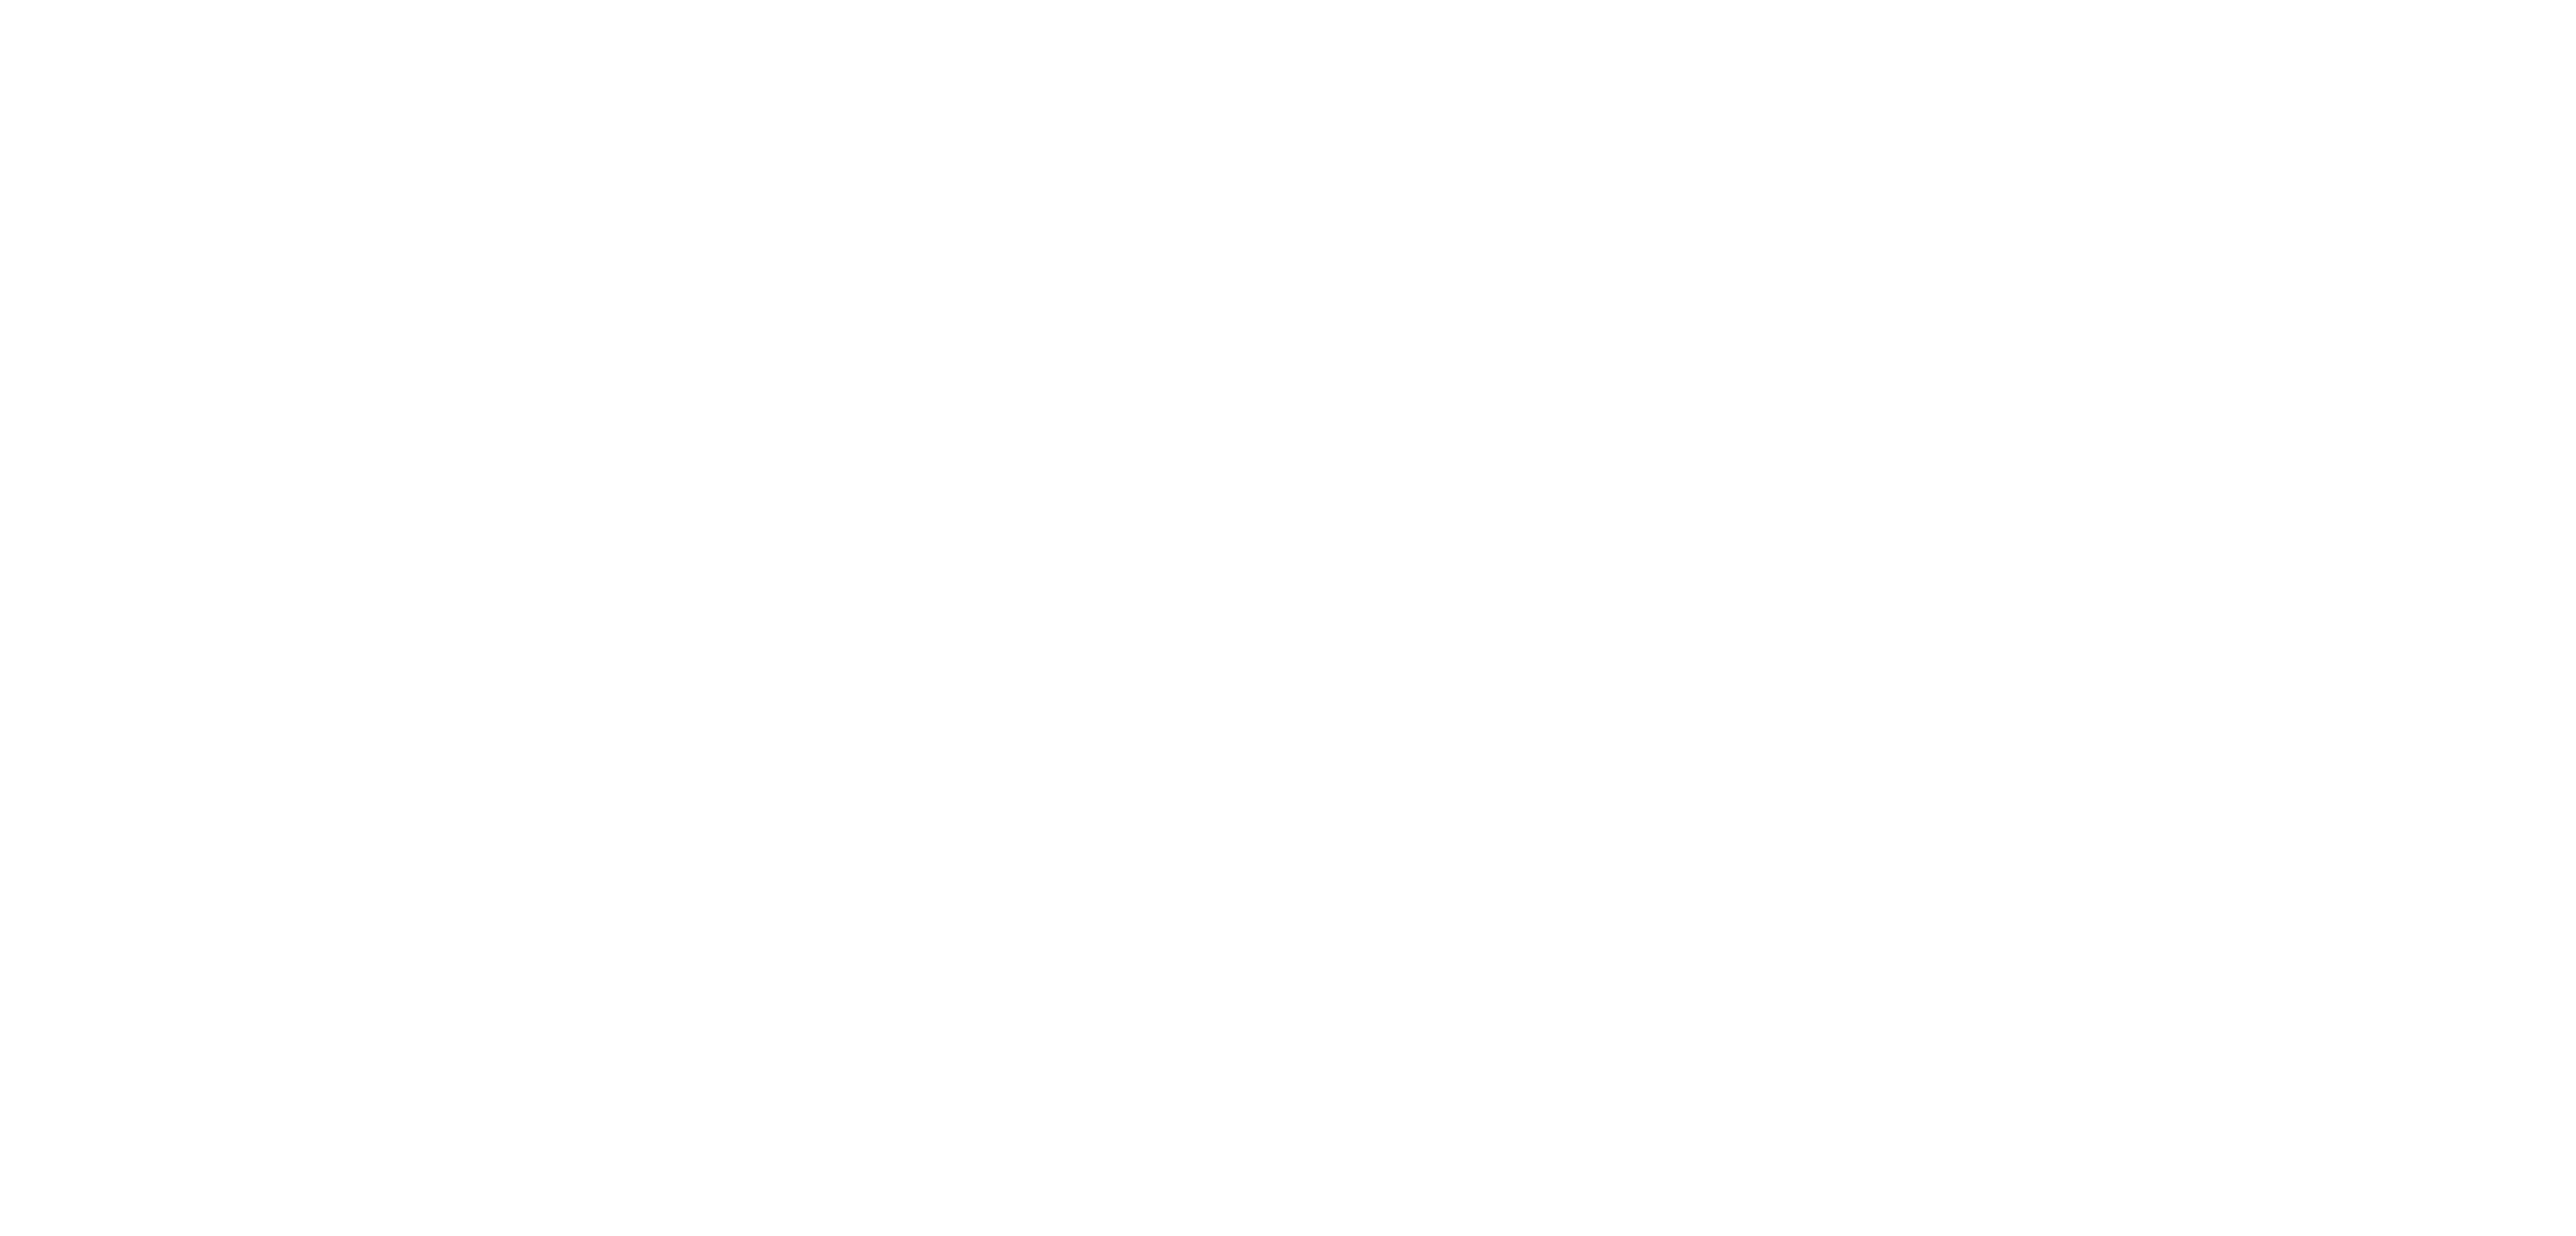

<IPython.core.display.Javascript object>


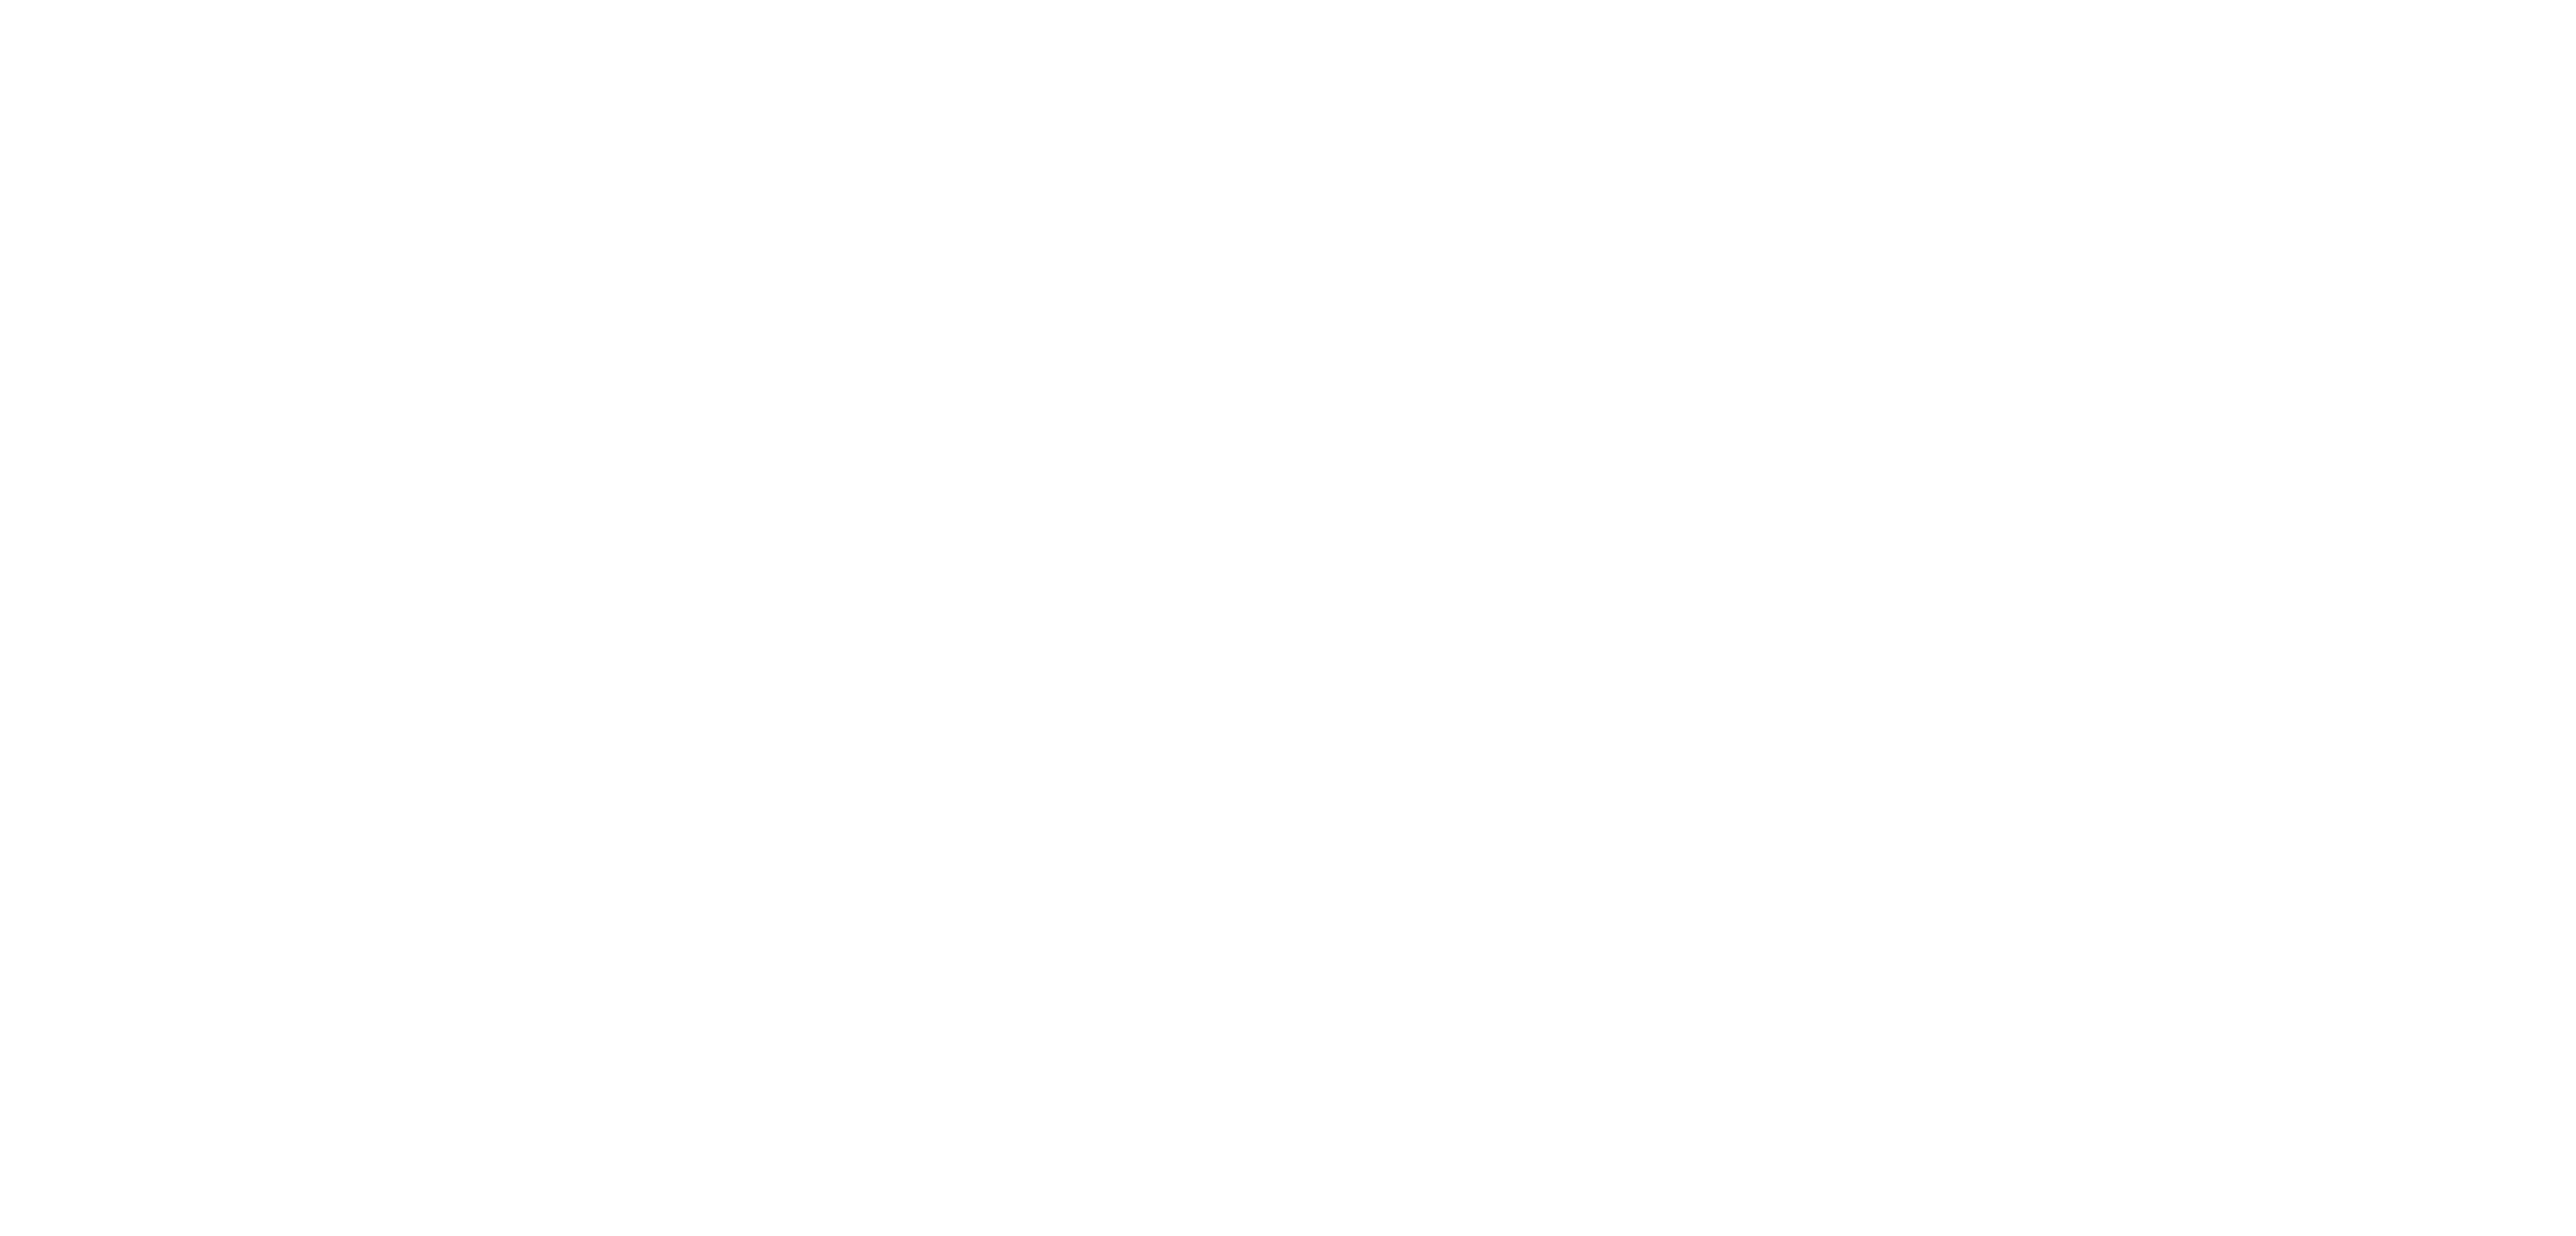

<IPython.core.display.Javascript object>


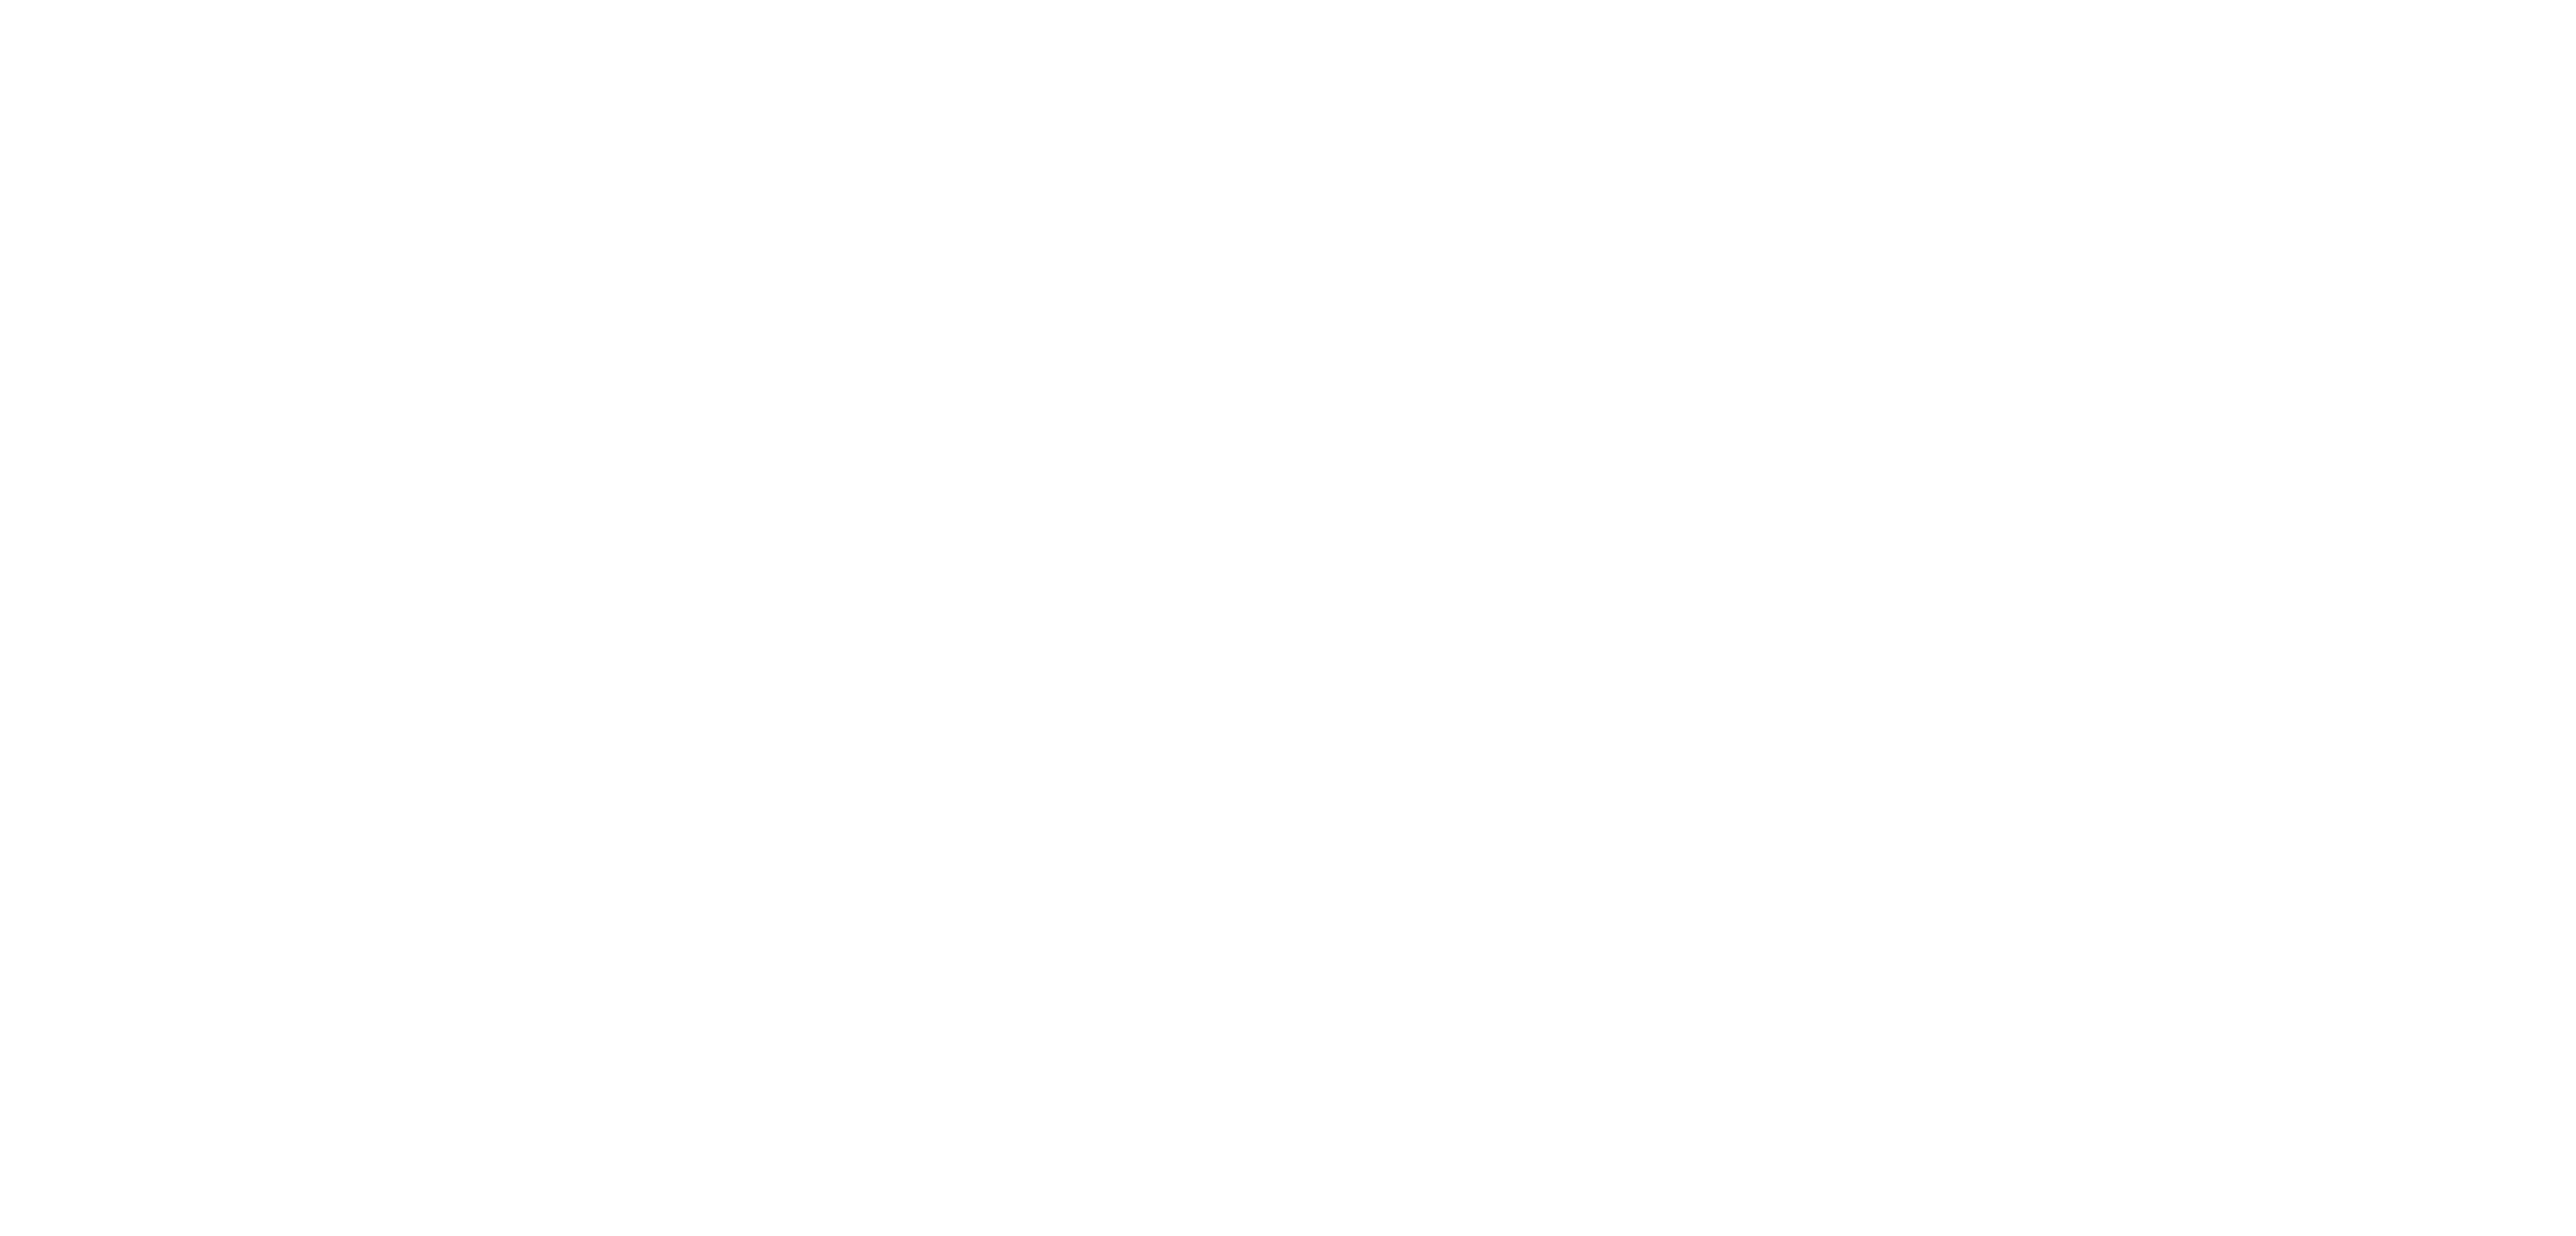

<IPython.core.display.Javascript object>


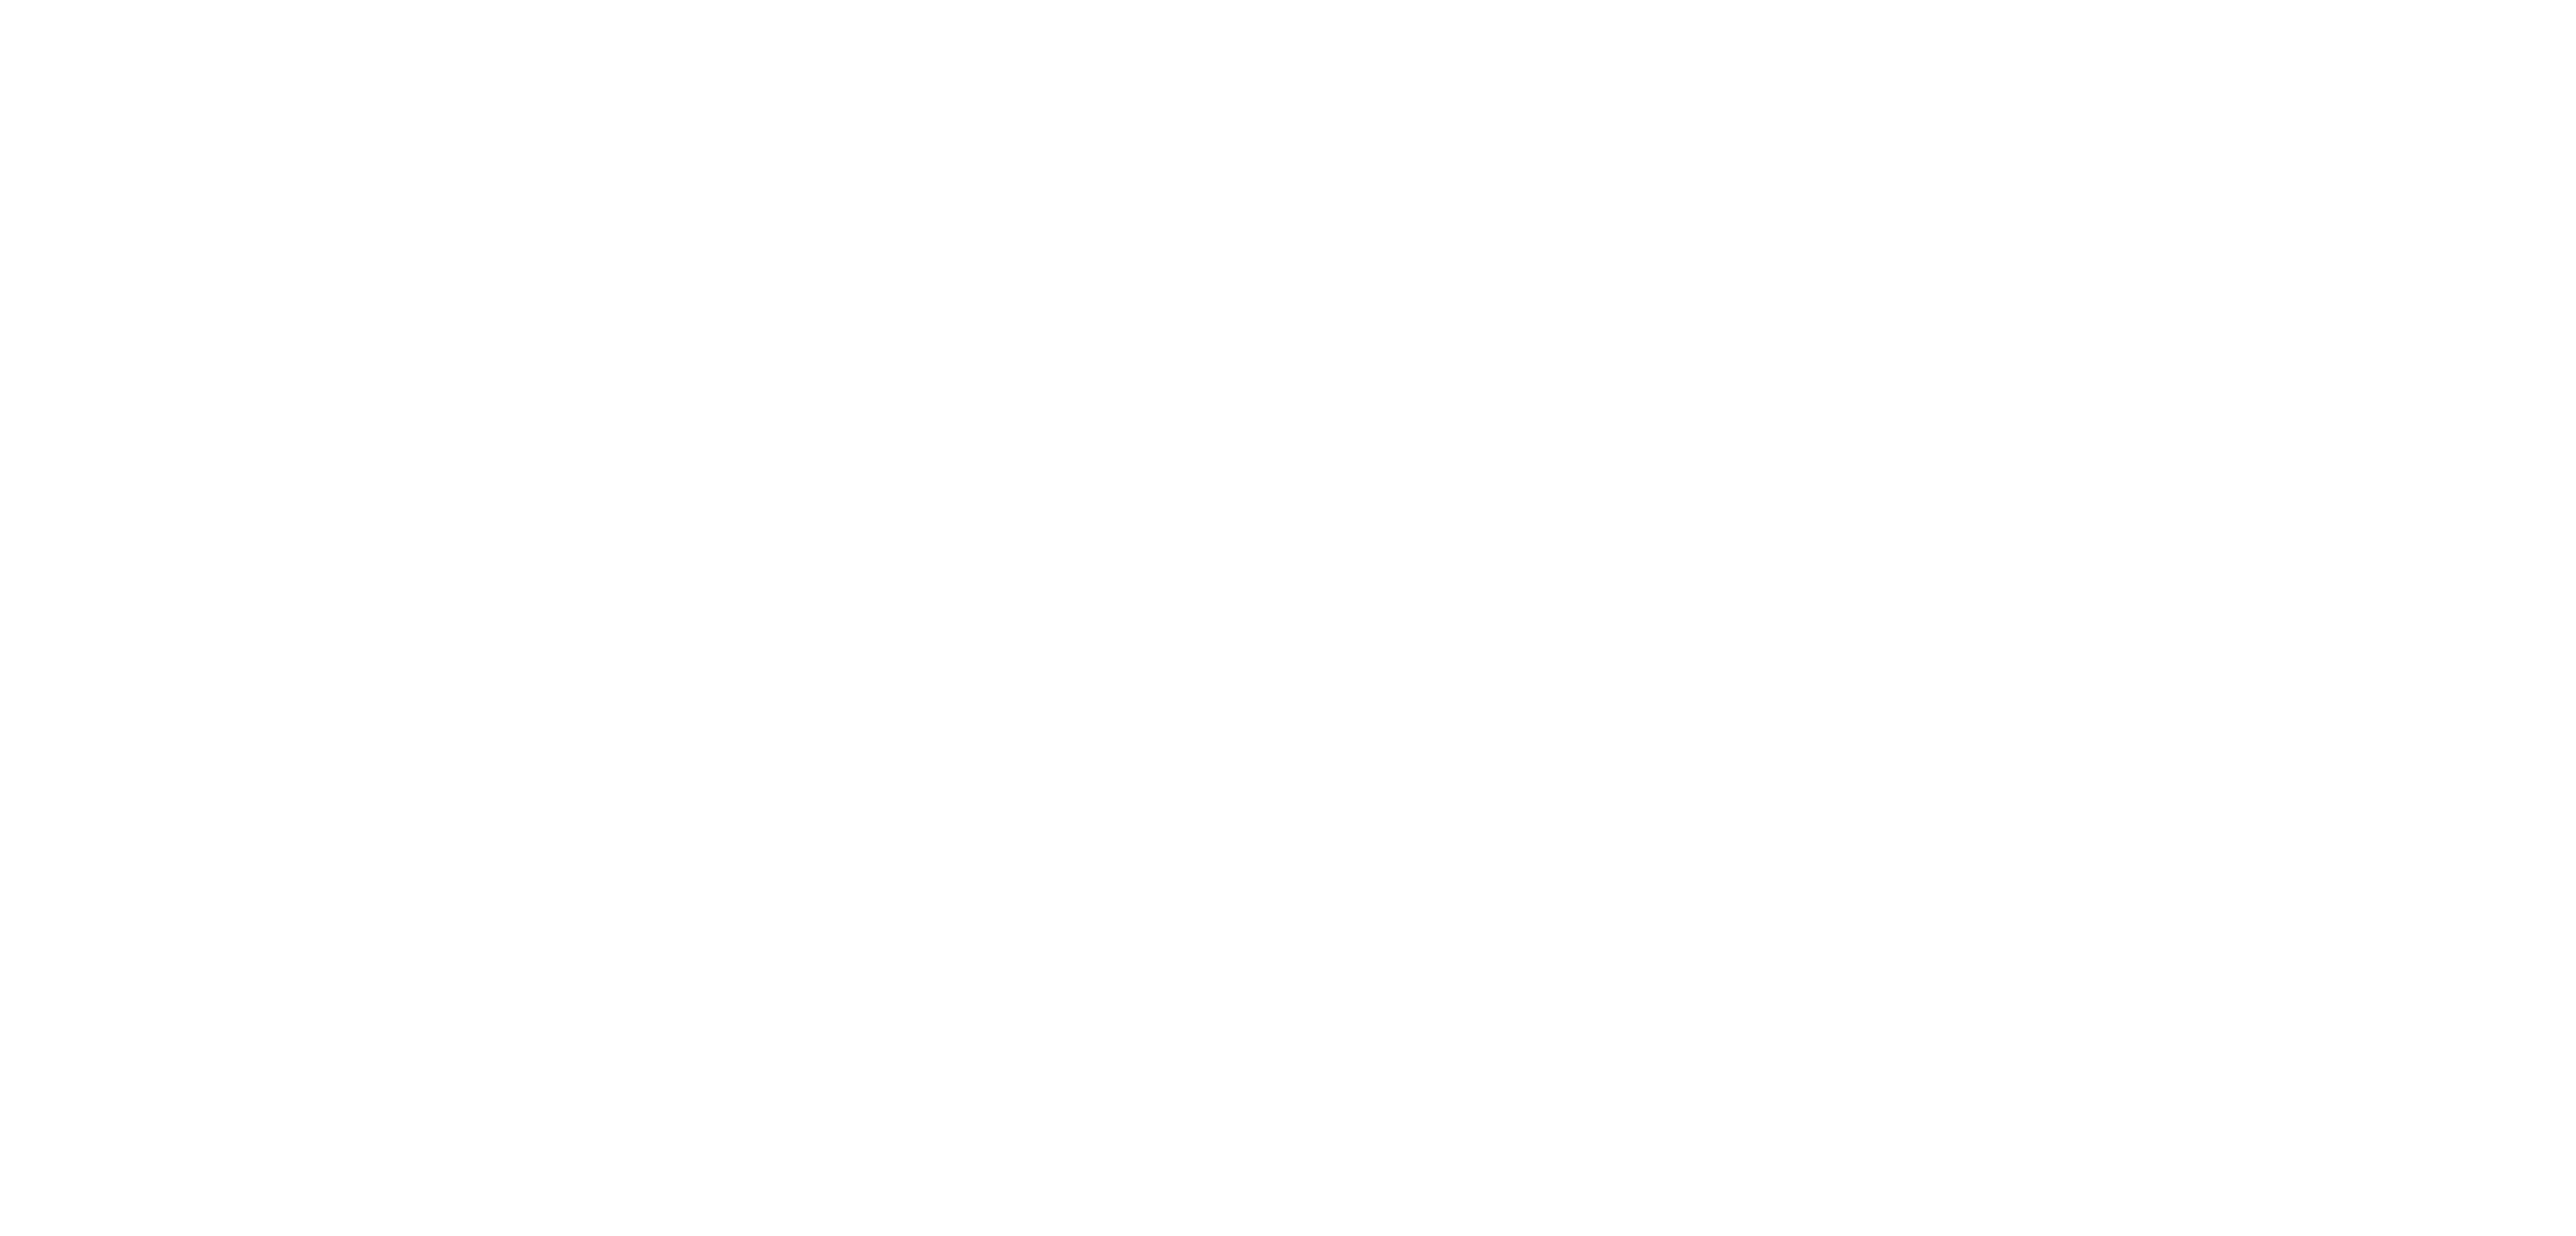

<IPython.core.display.Javascript object>


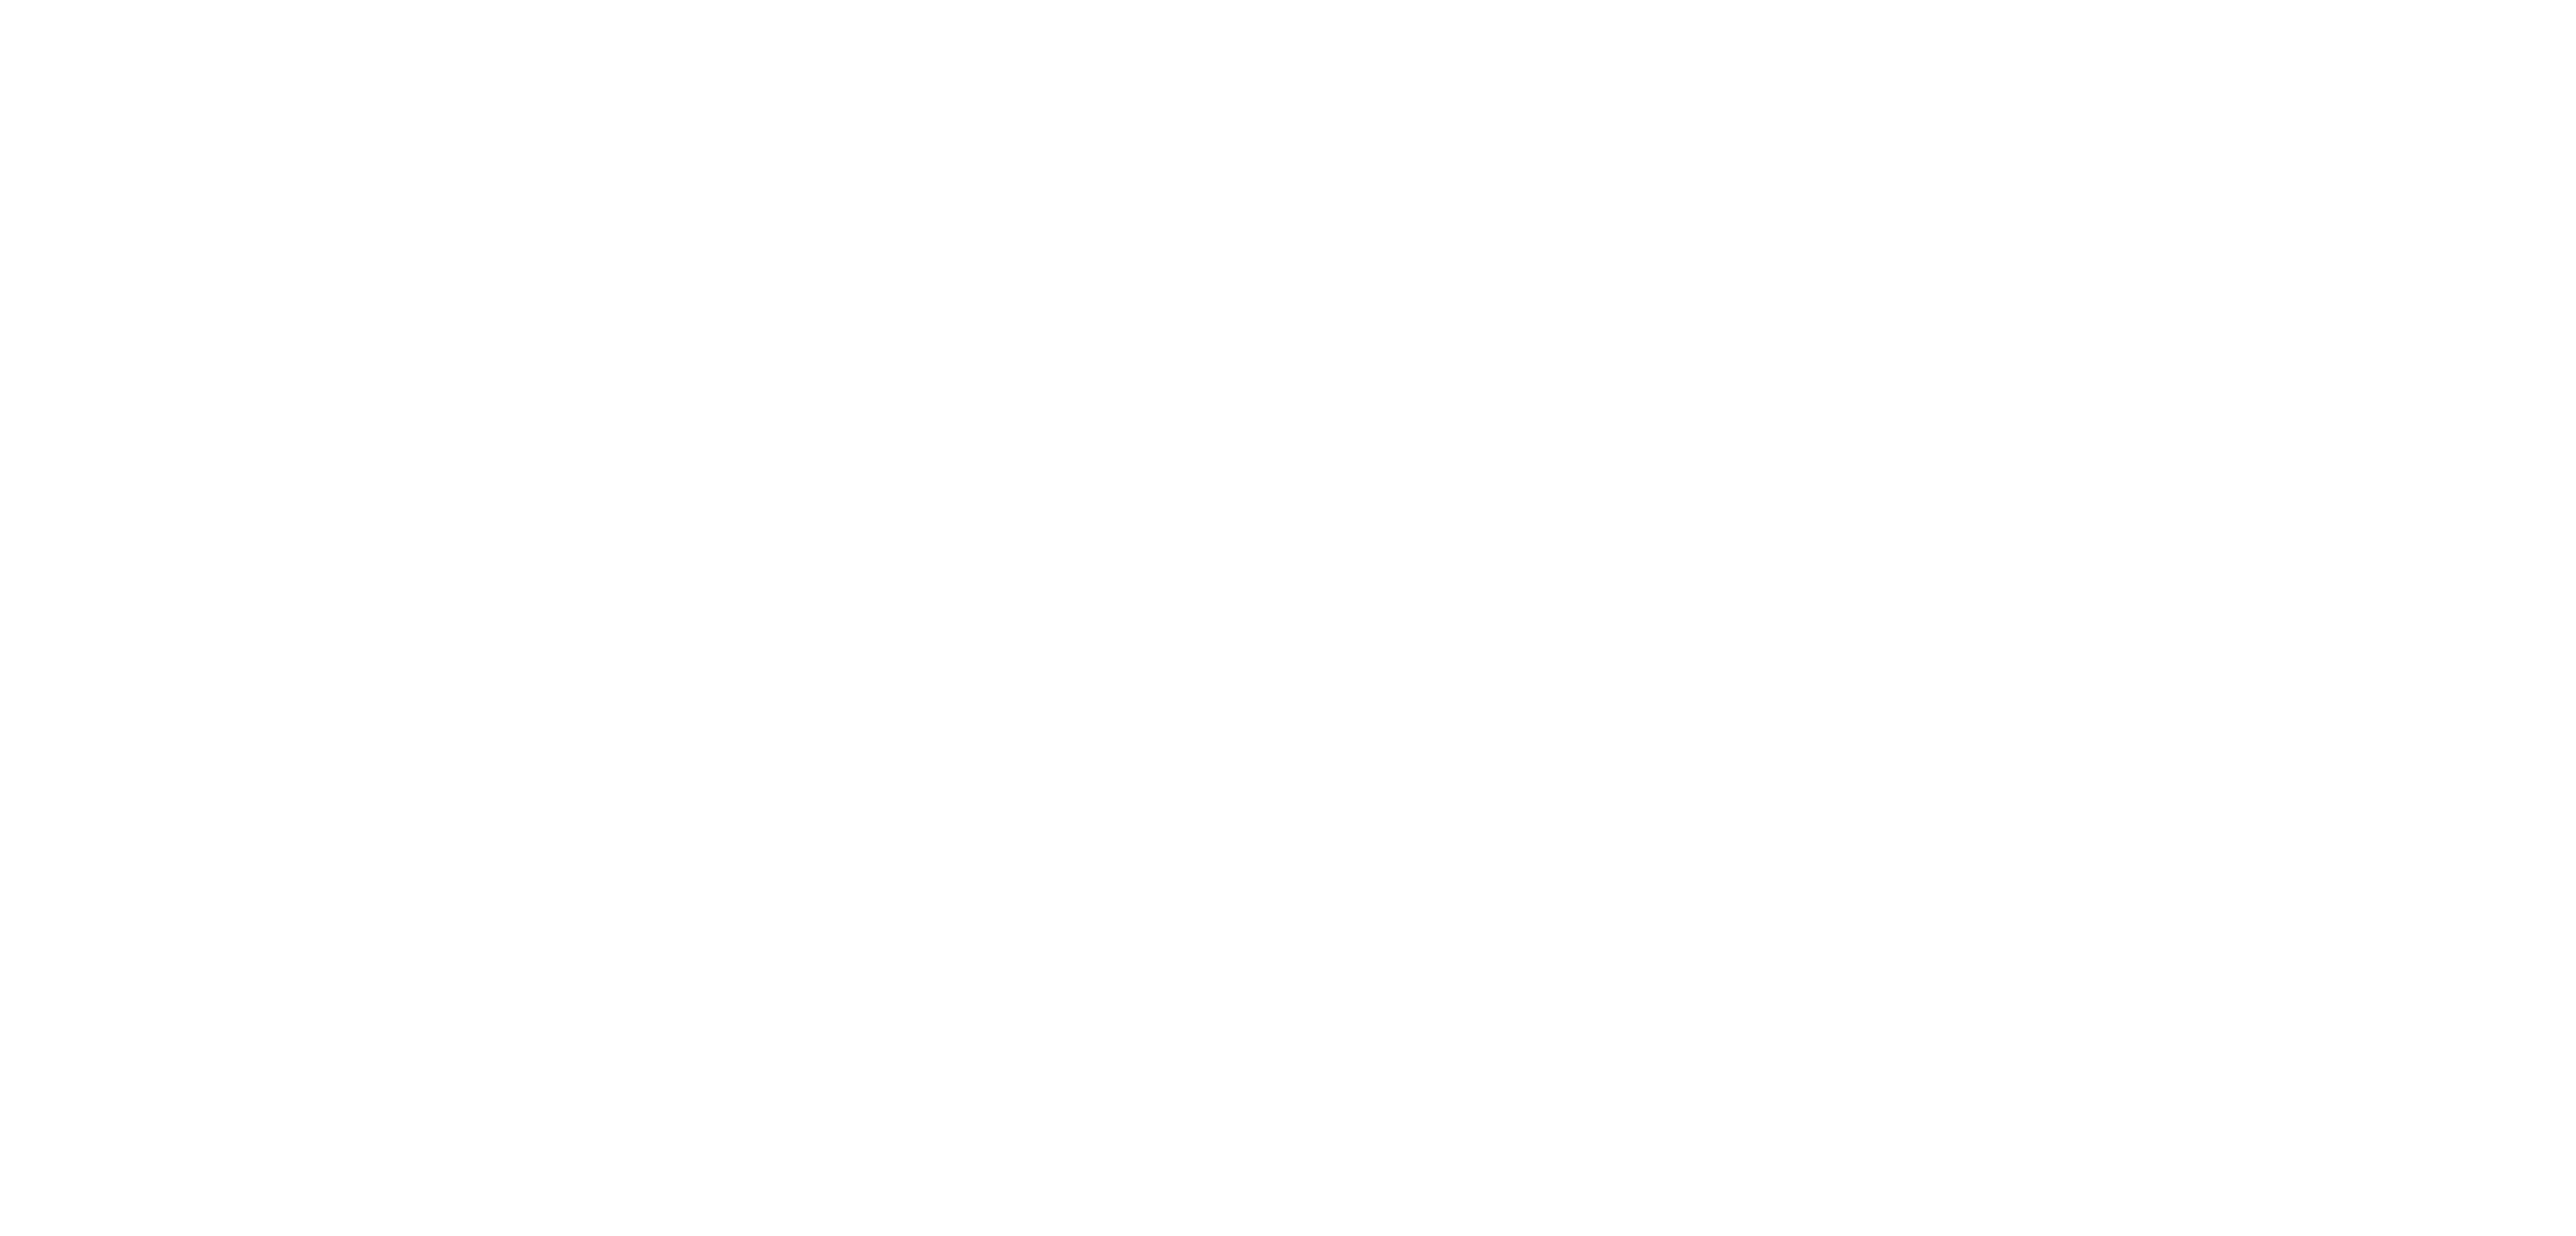

<IPython.core.display.Javascript object>


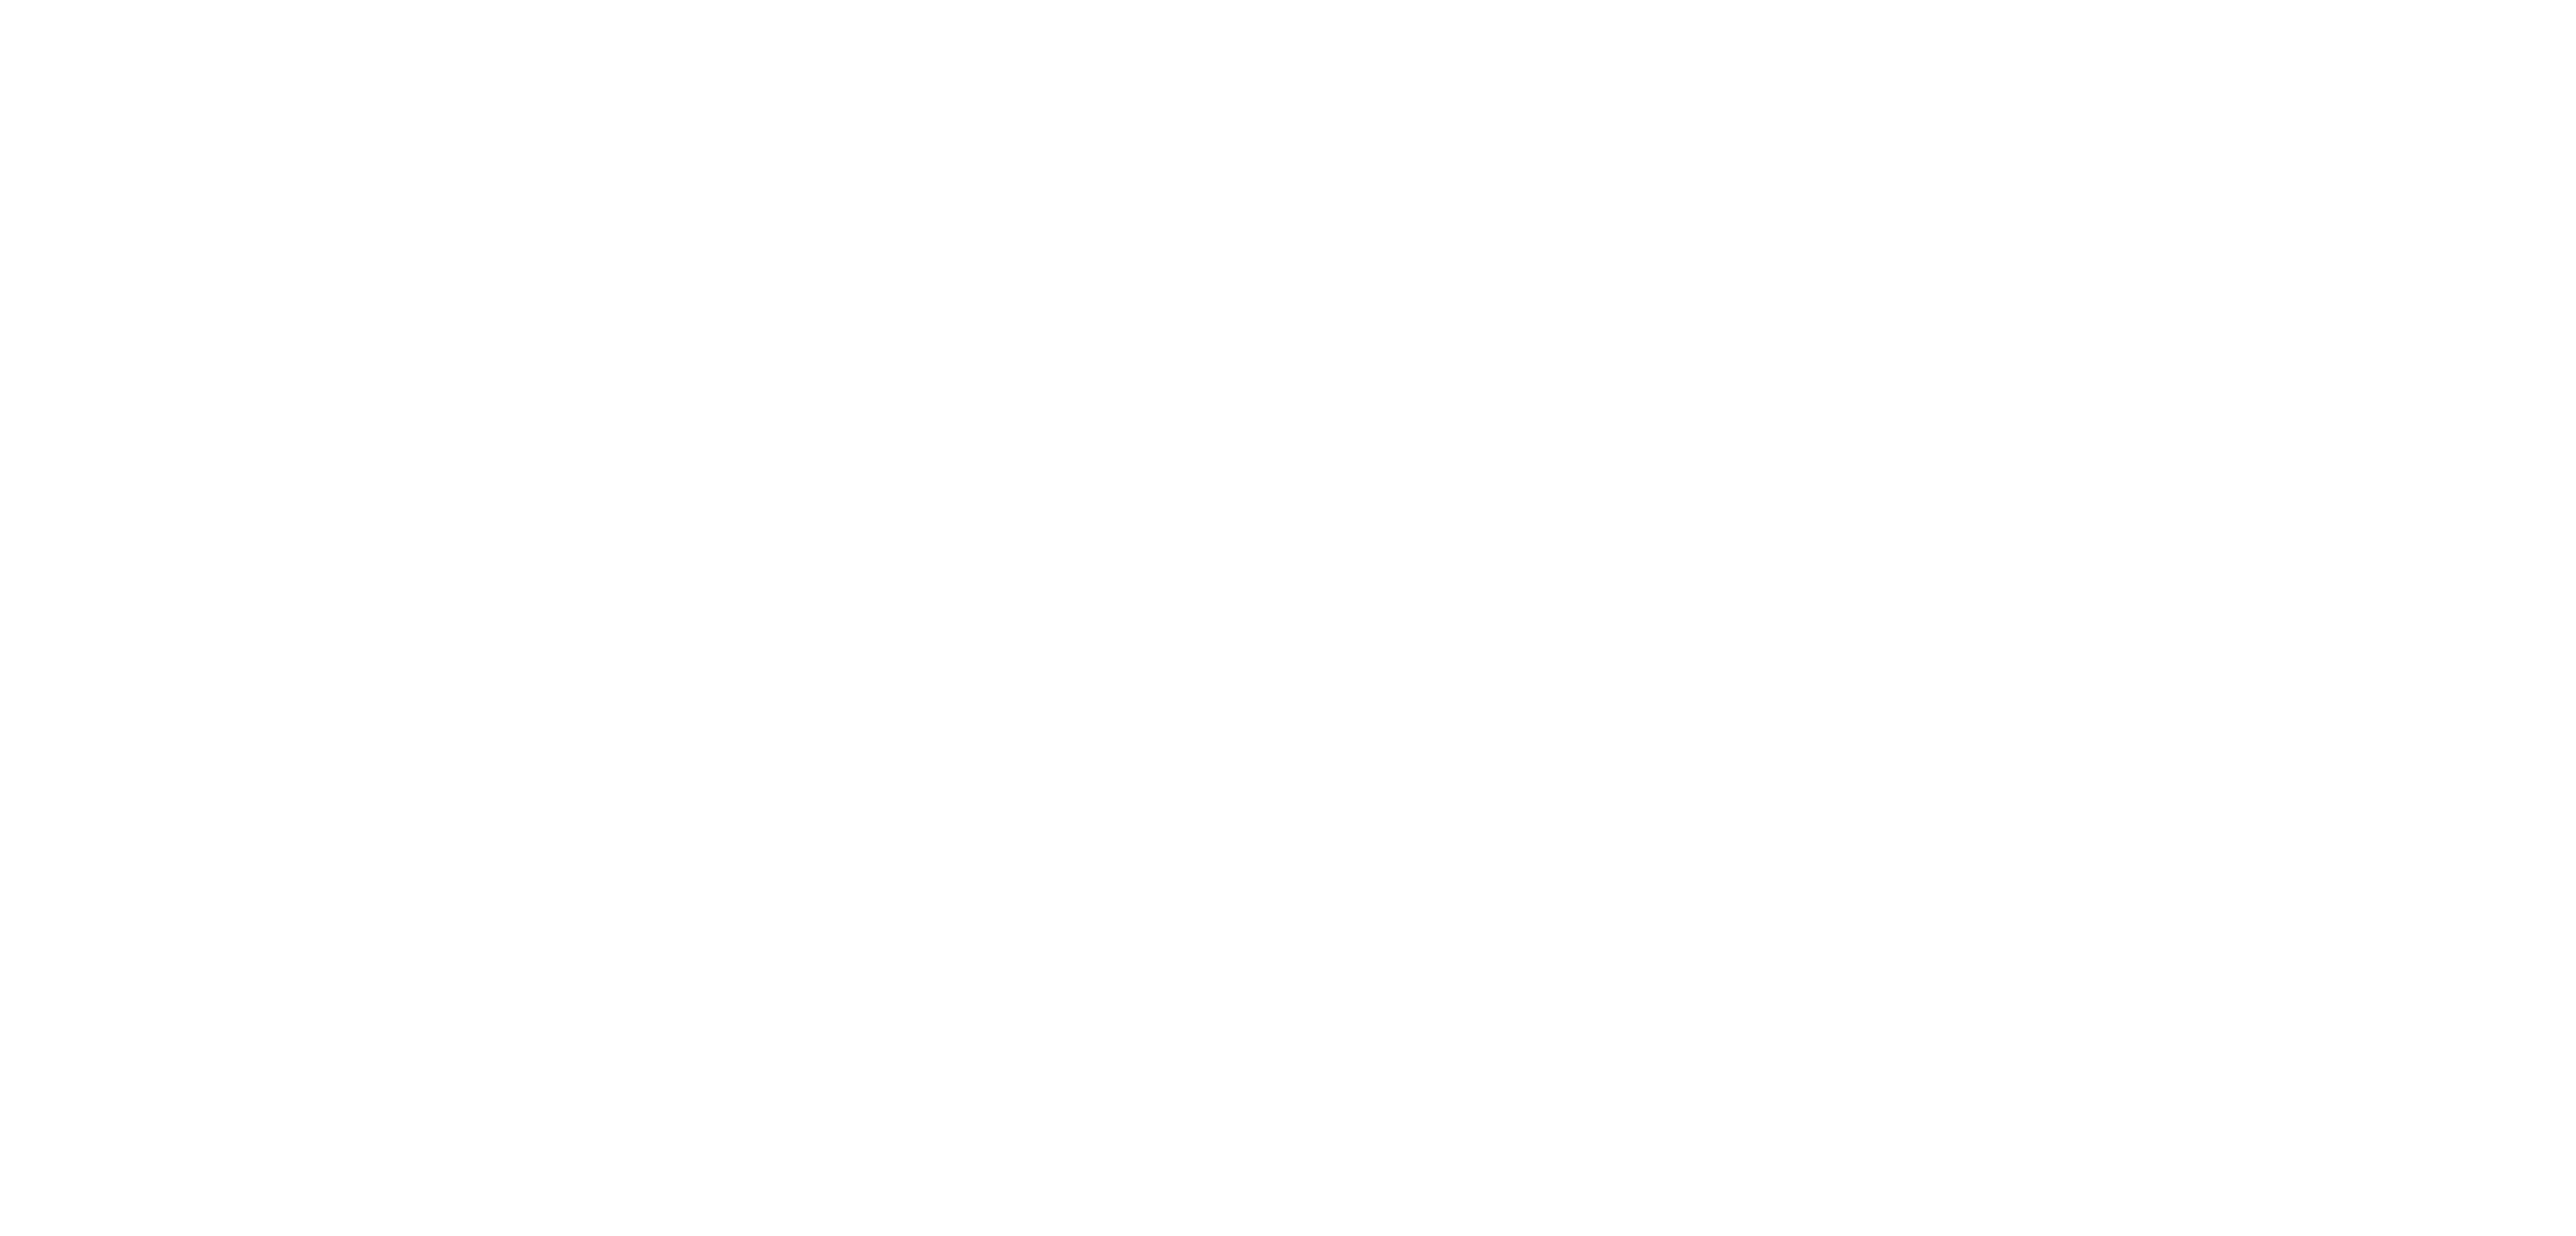

<IPython.core.display.Javascript object>


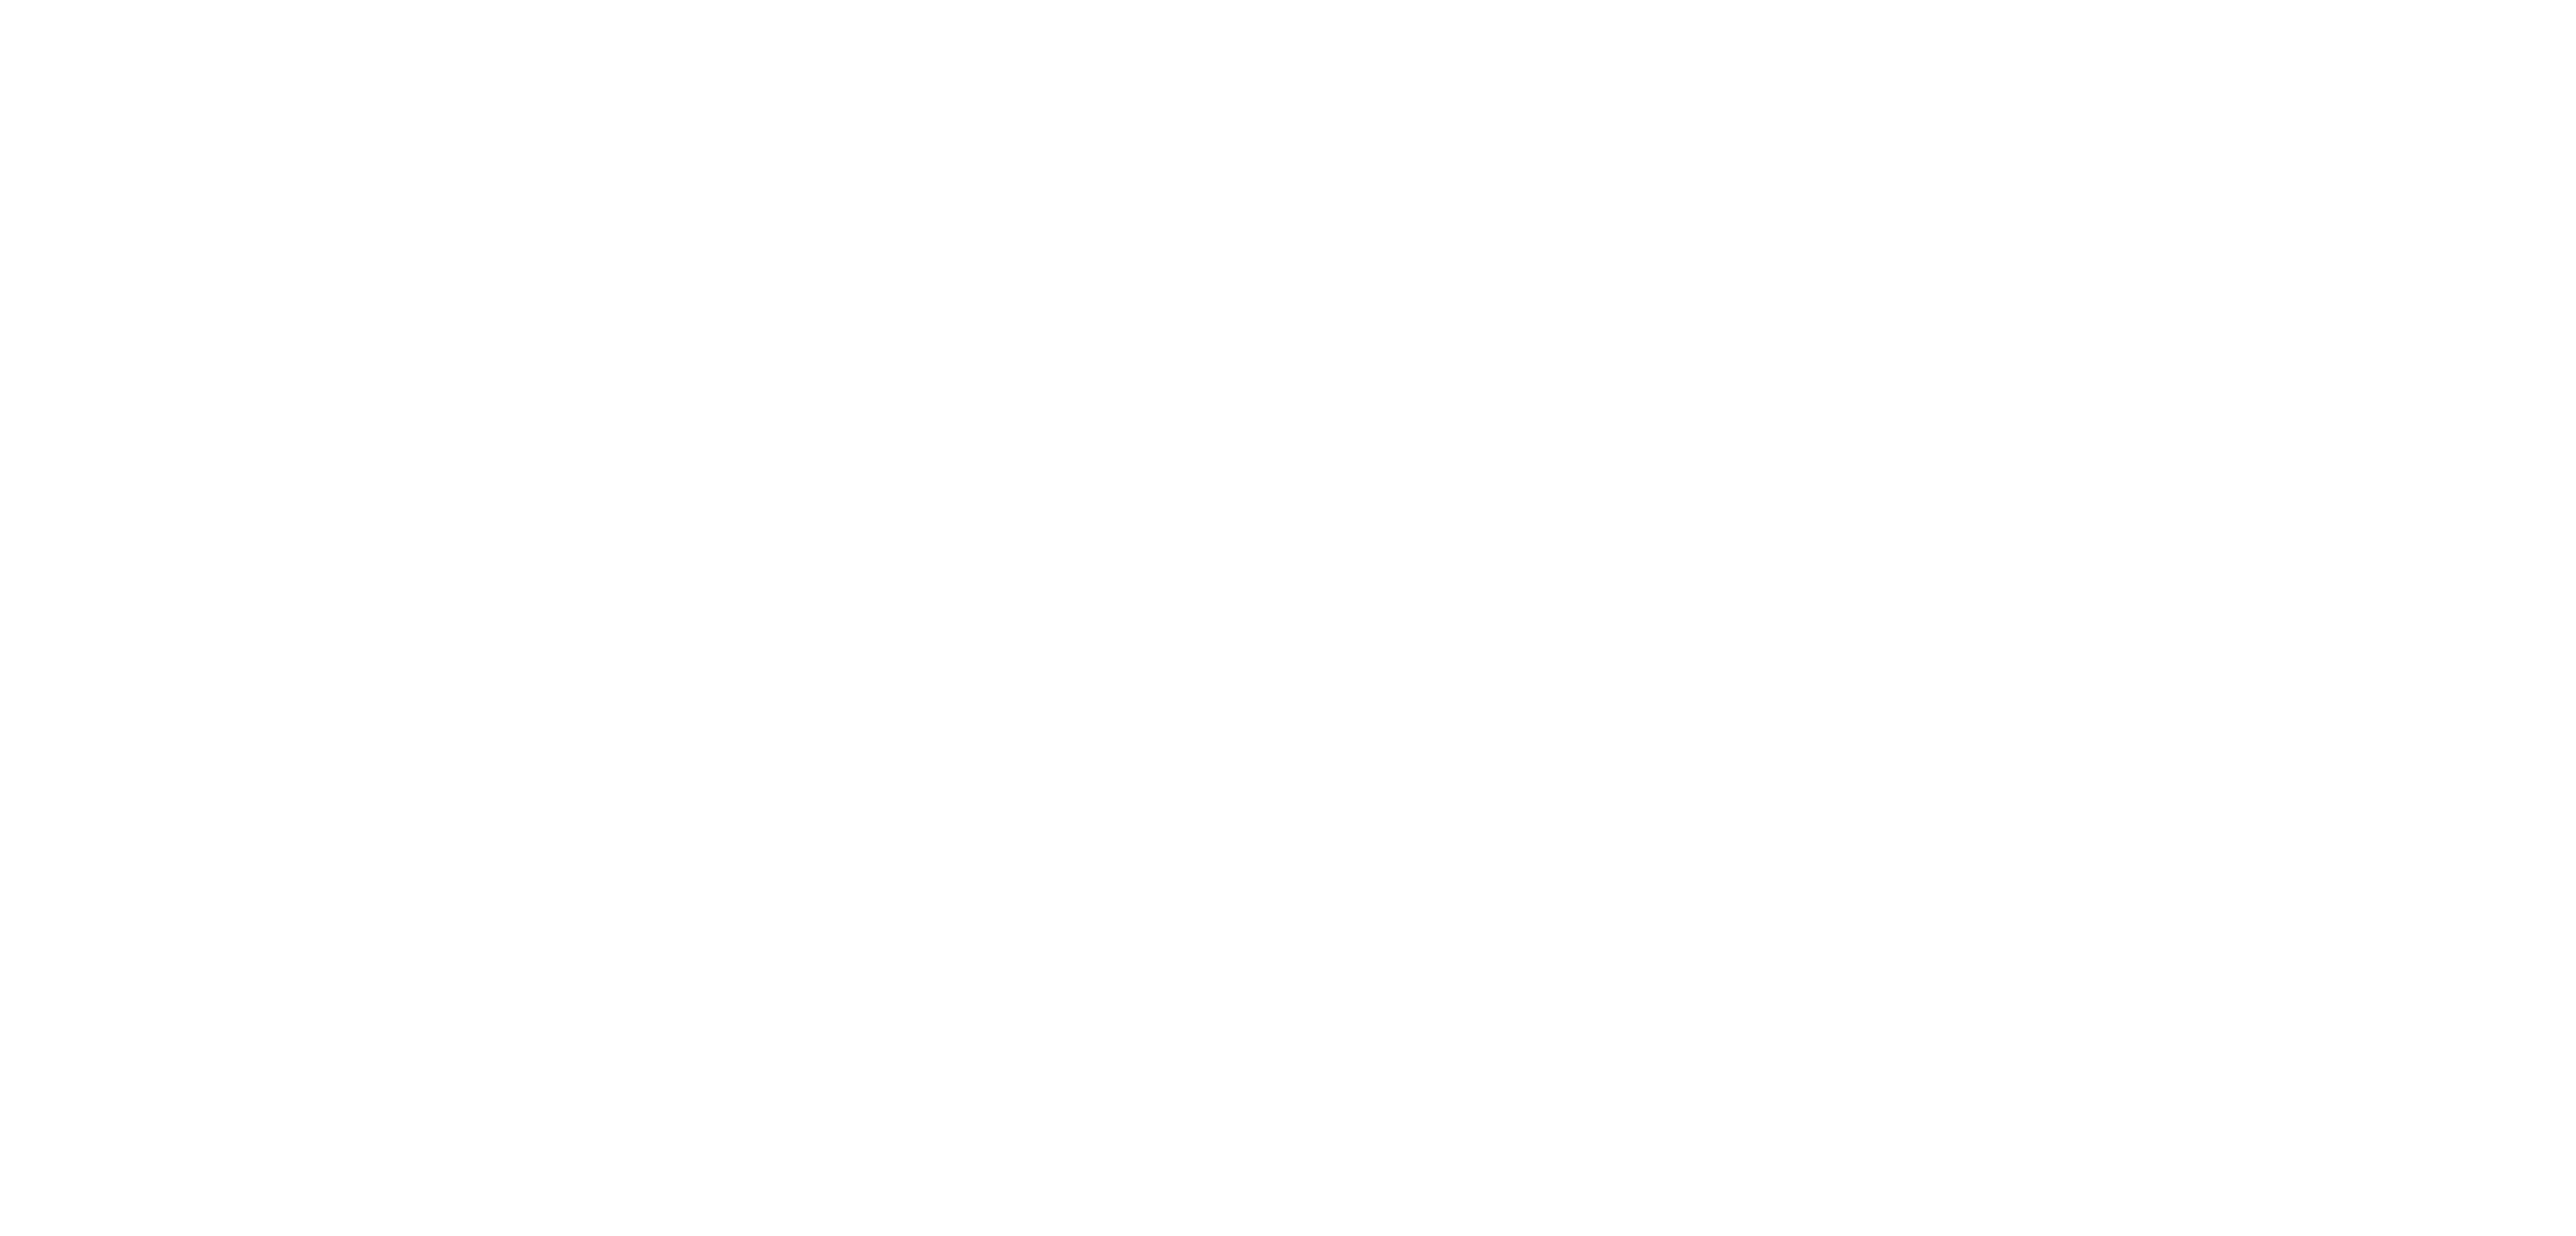

<IPython.core.display.Javascript object>


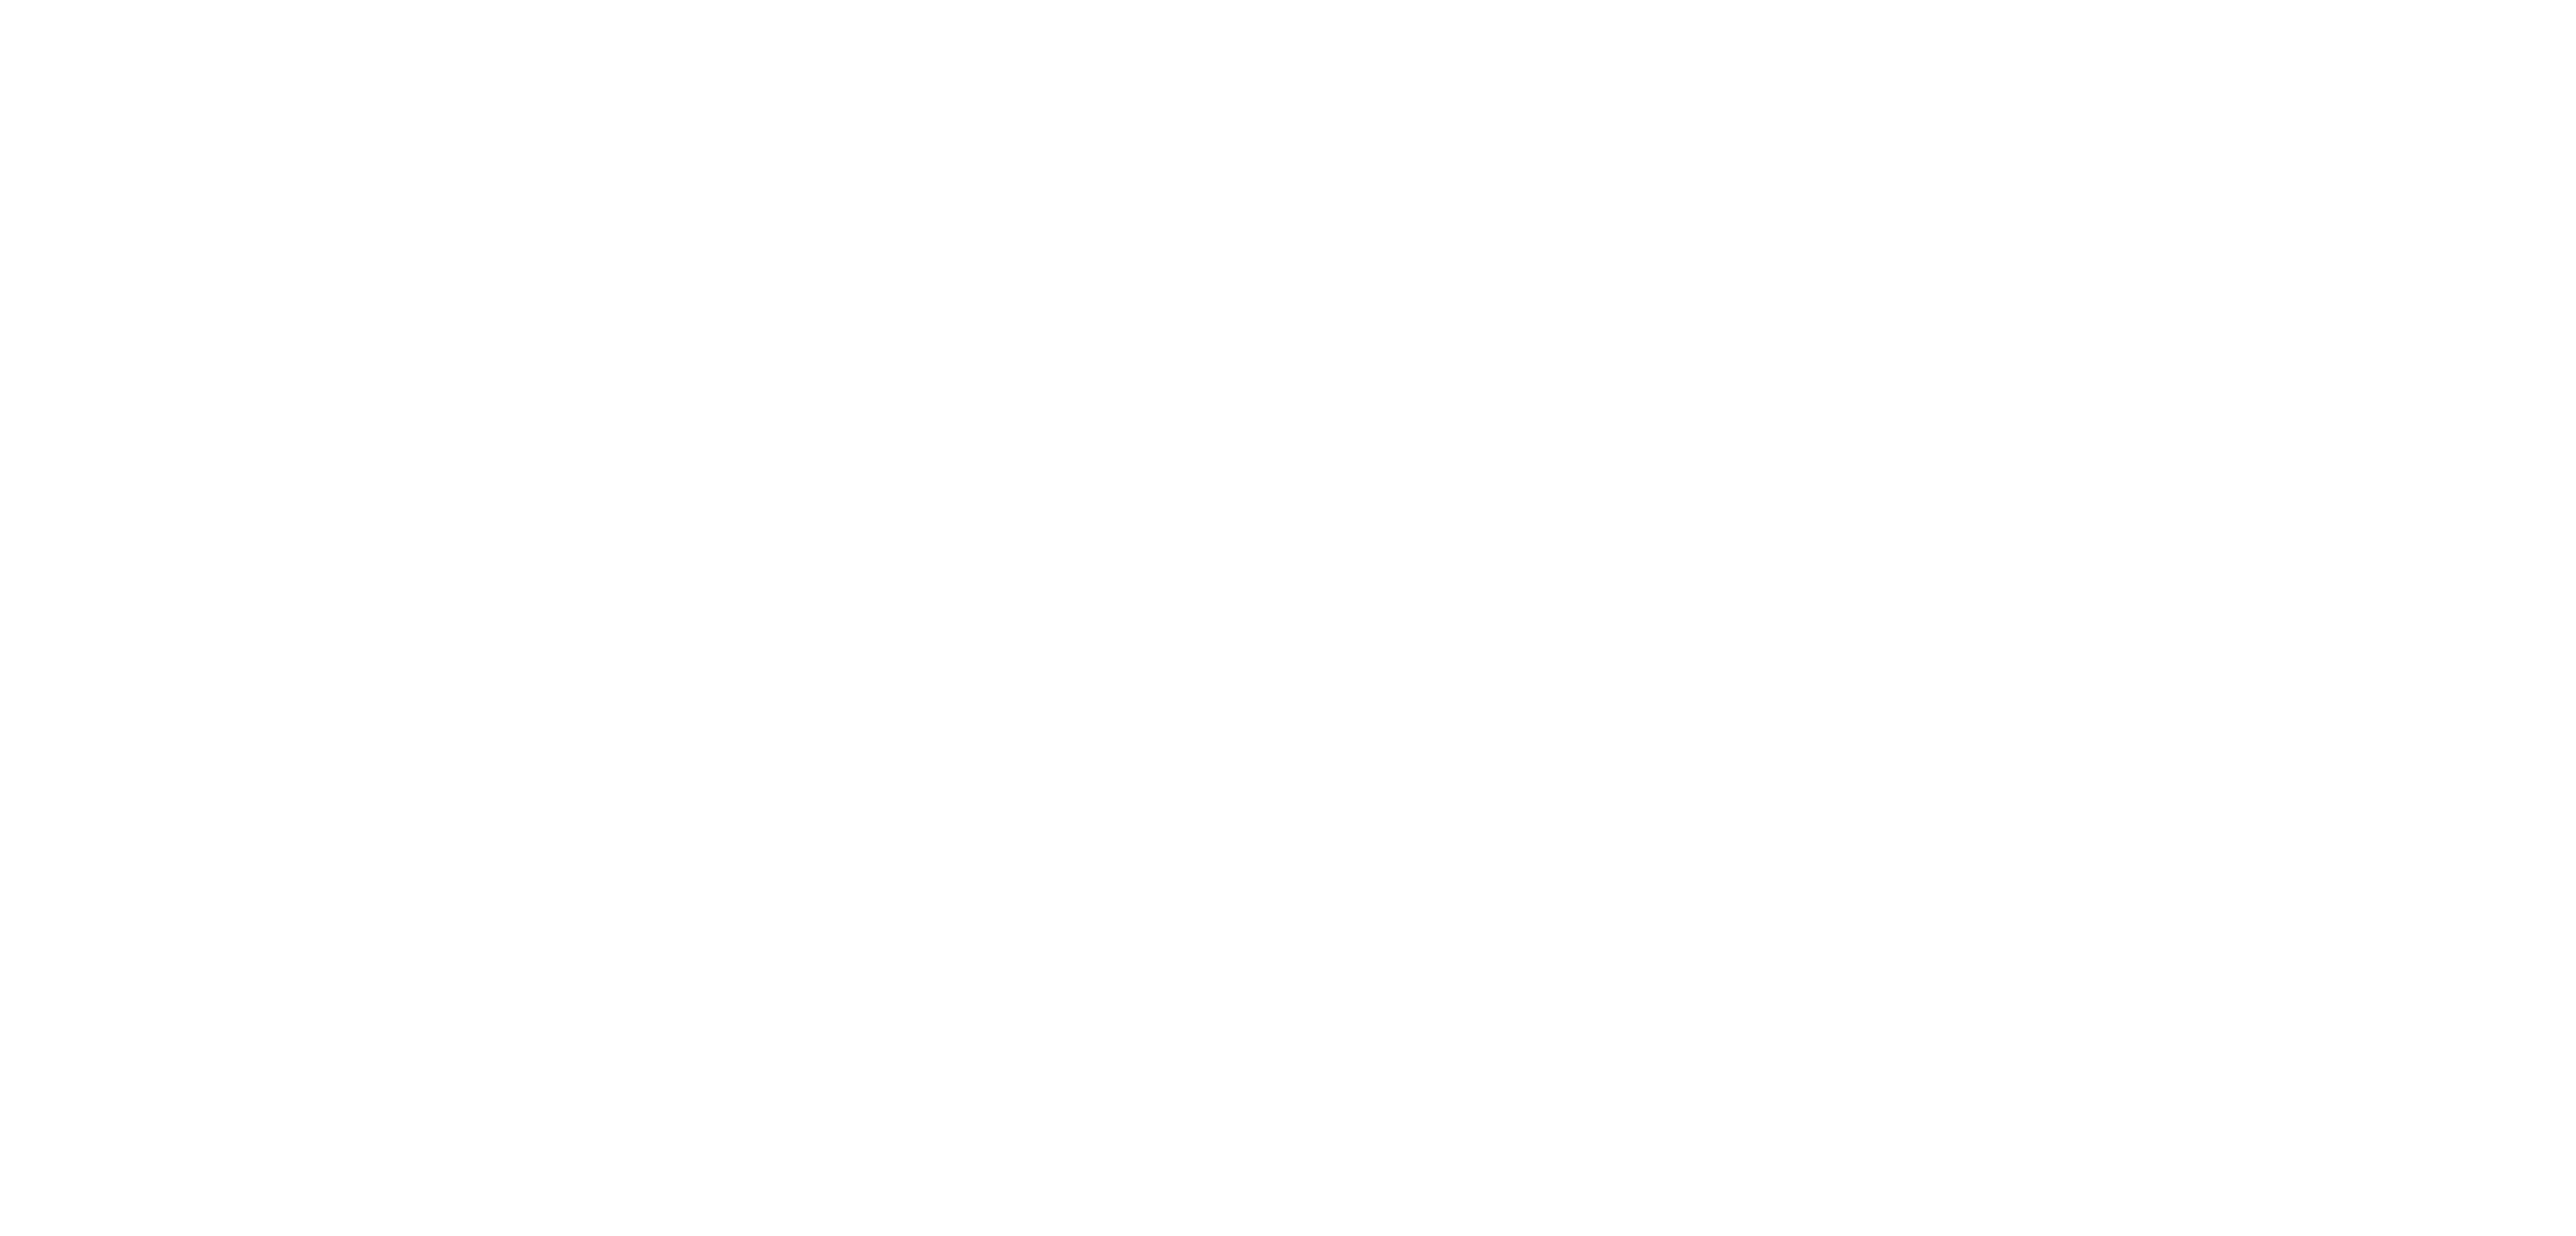

<IPython.core.display.Javascript object>


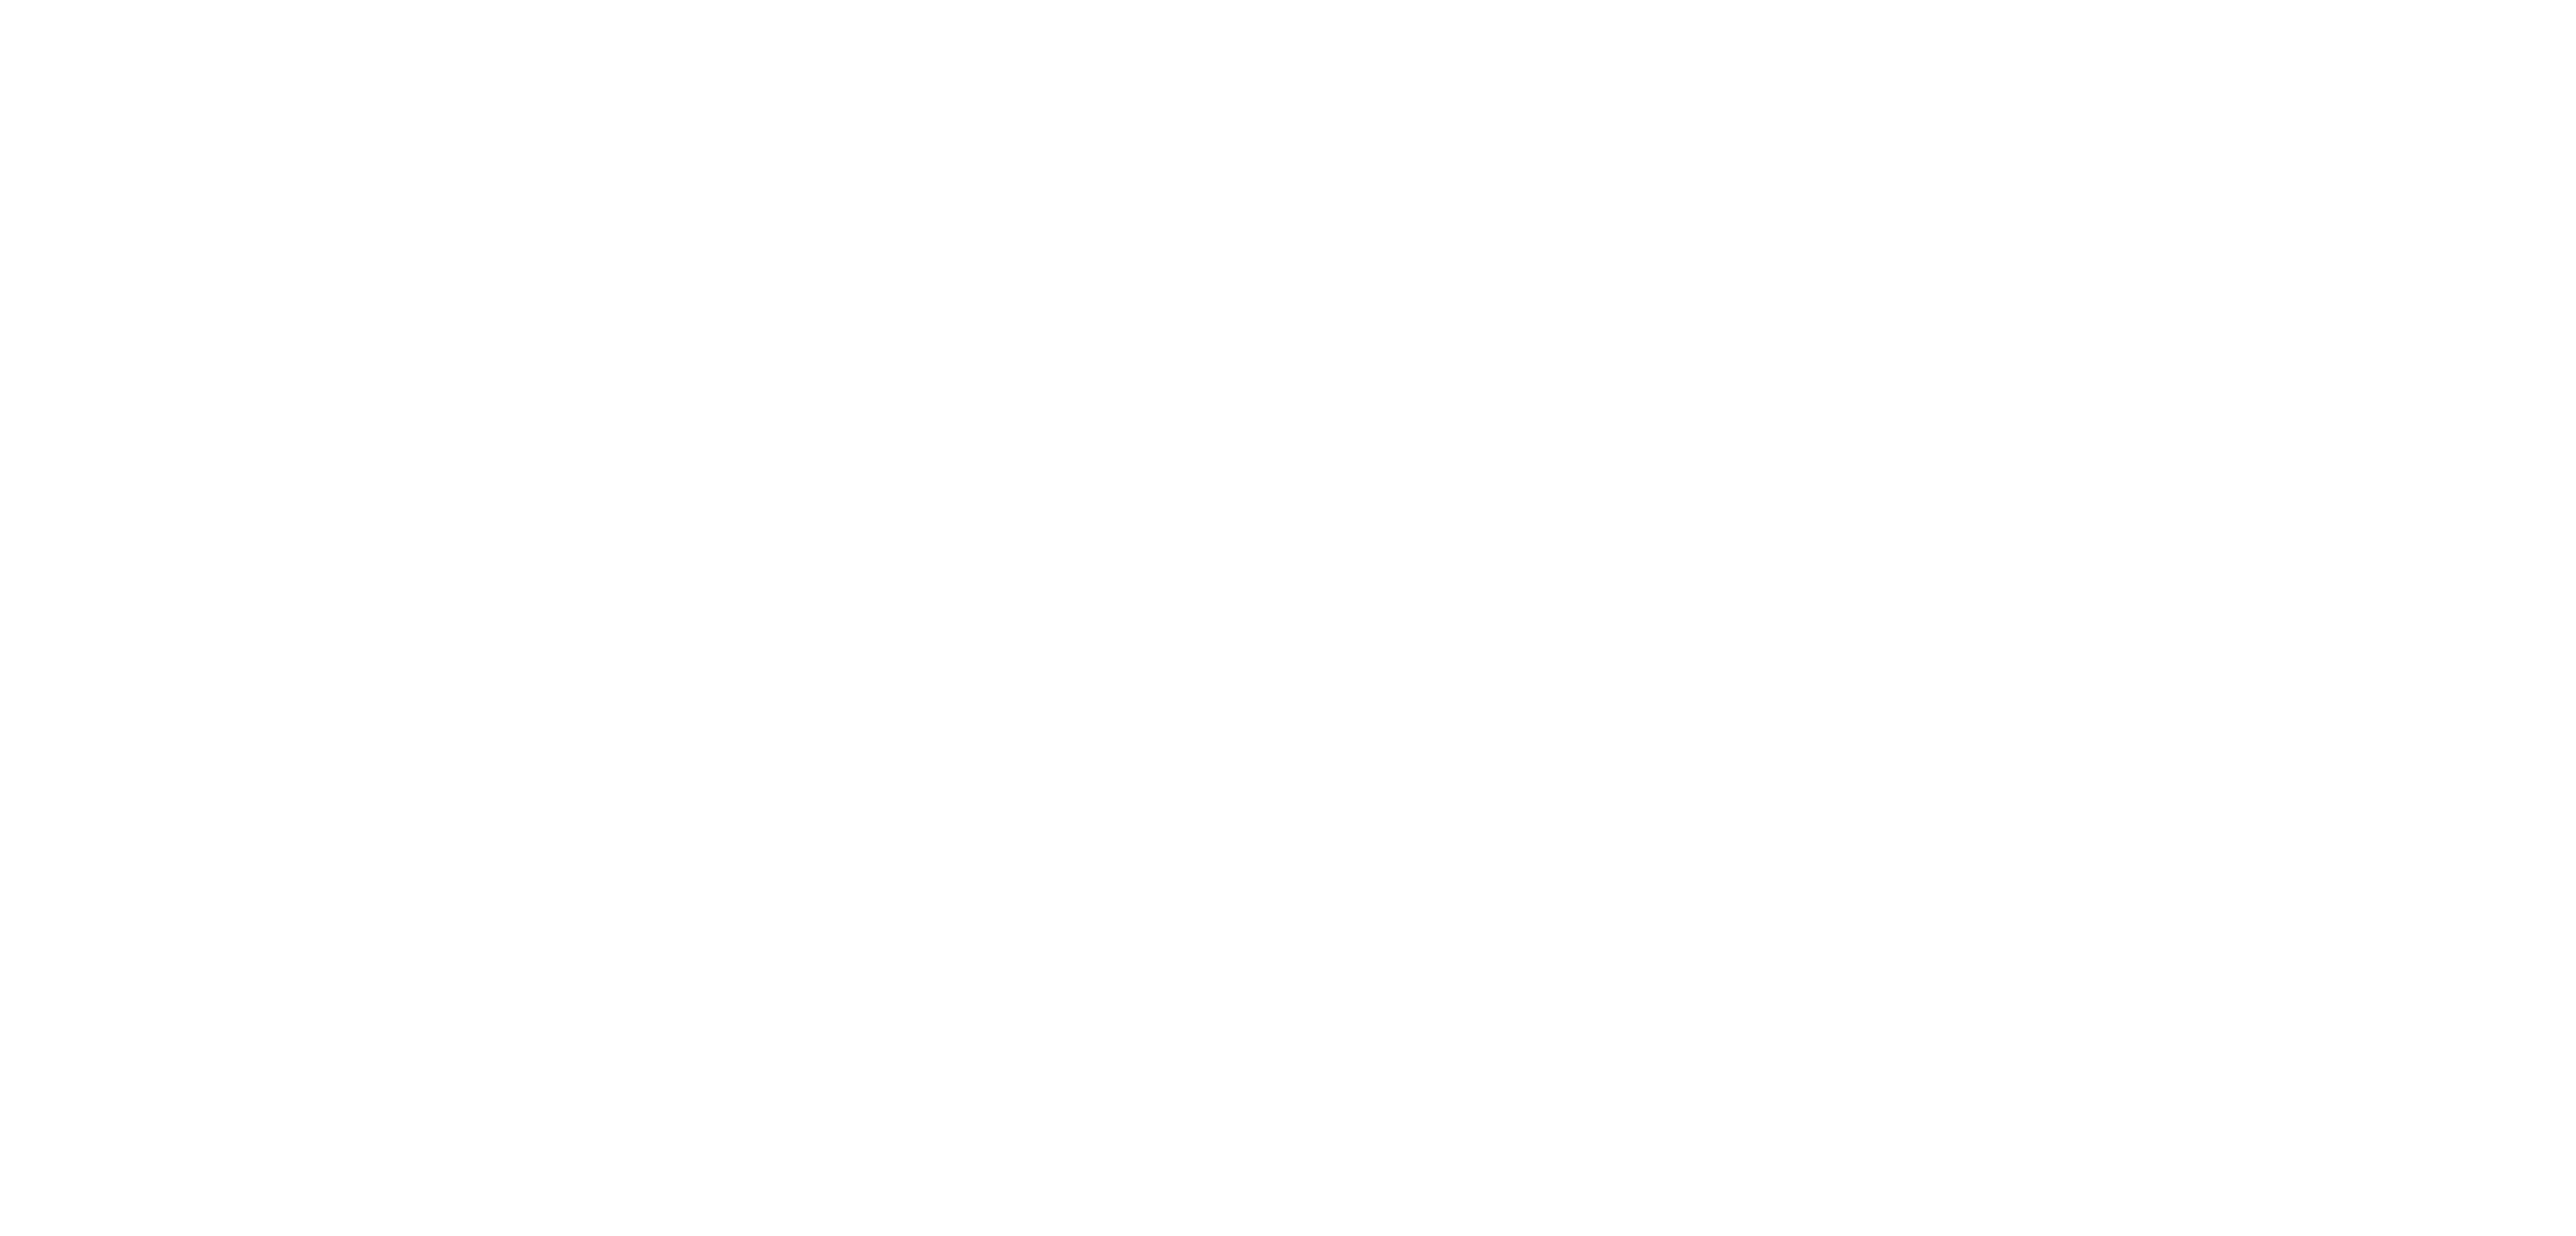

<IPython.core.display.Javascript object>


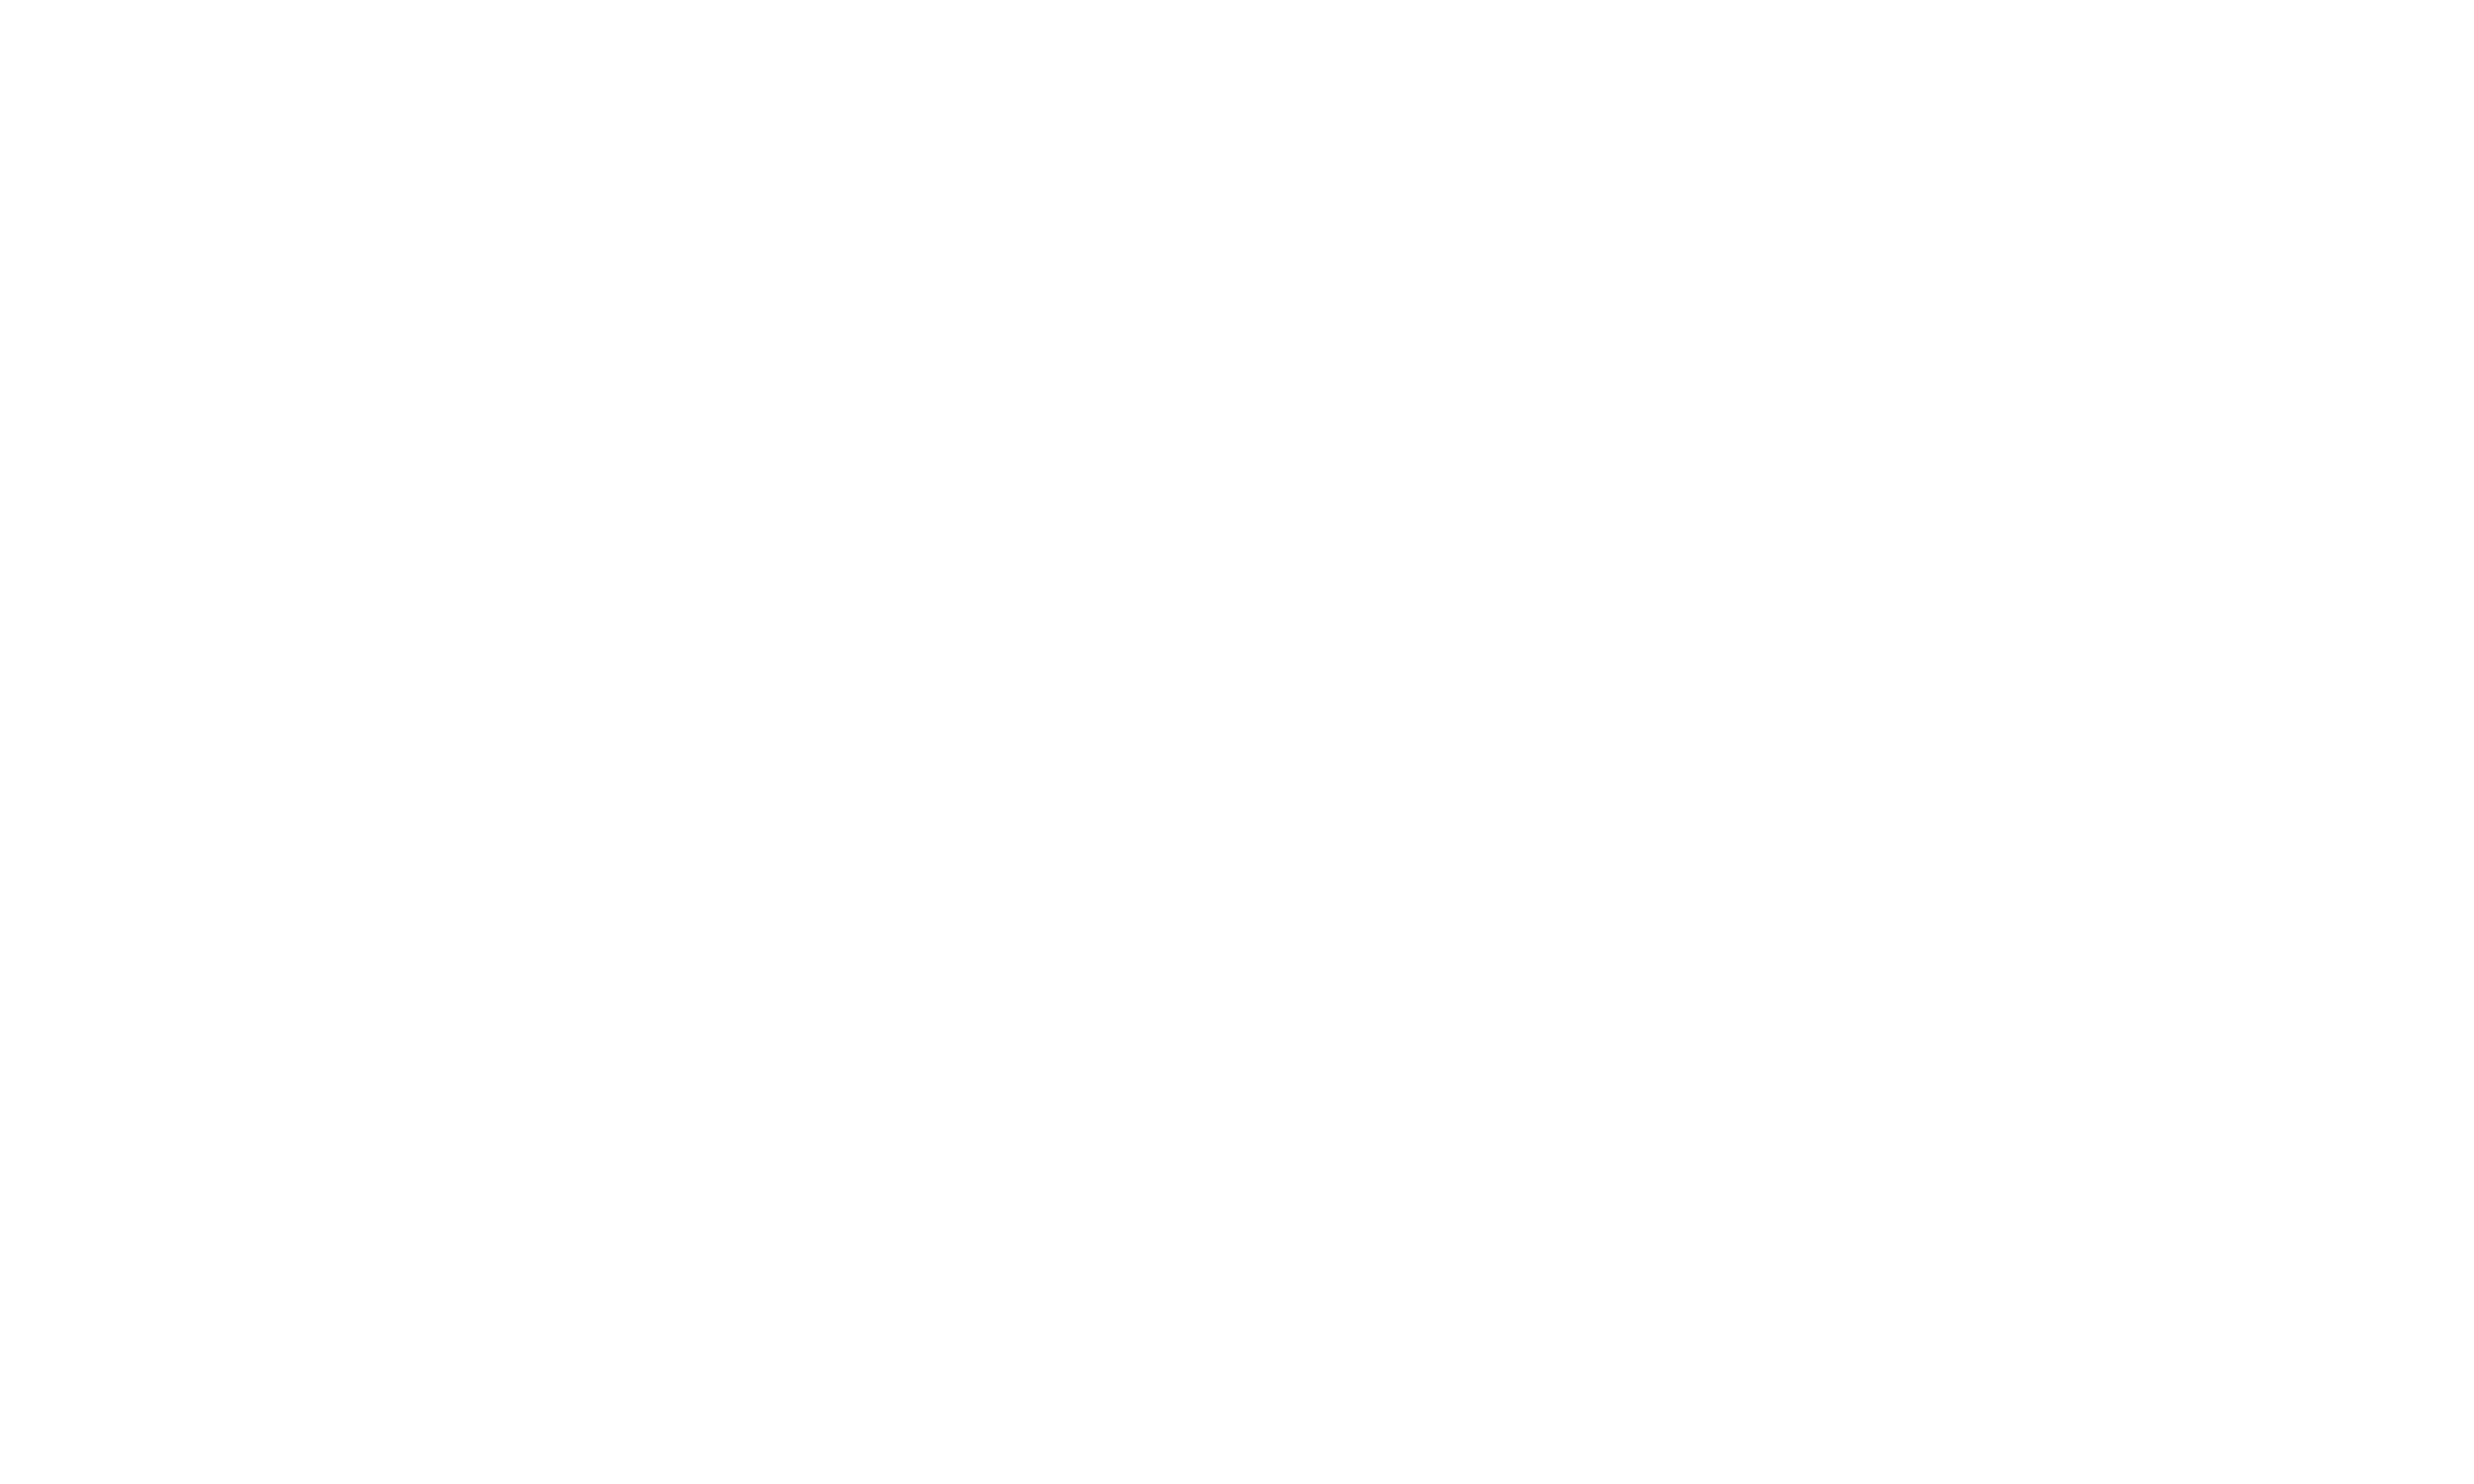

<IPython.core.display.Javascript object>


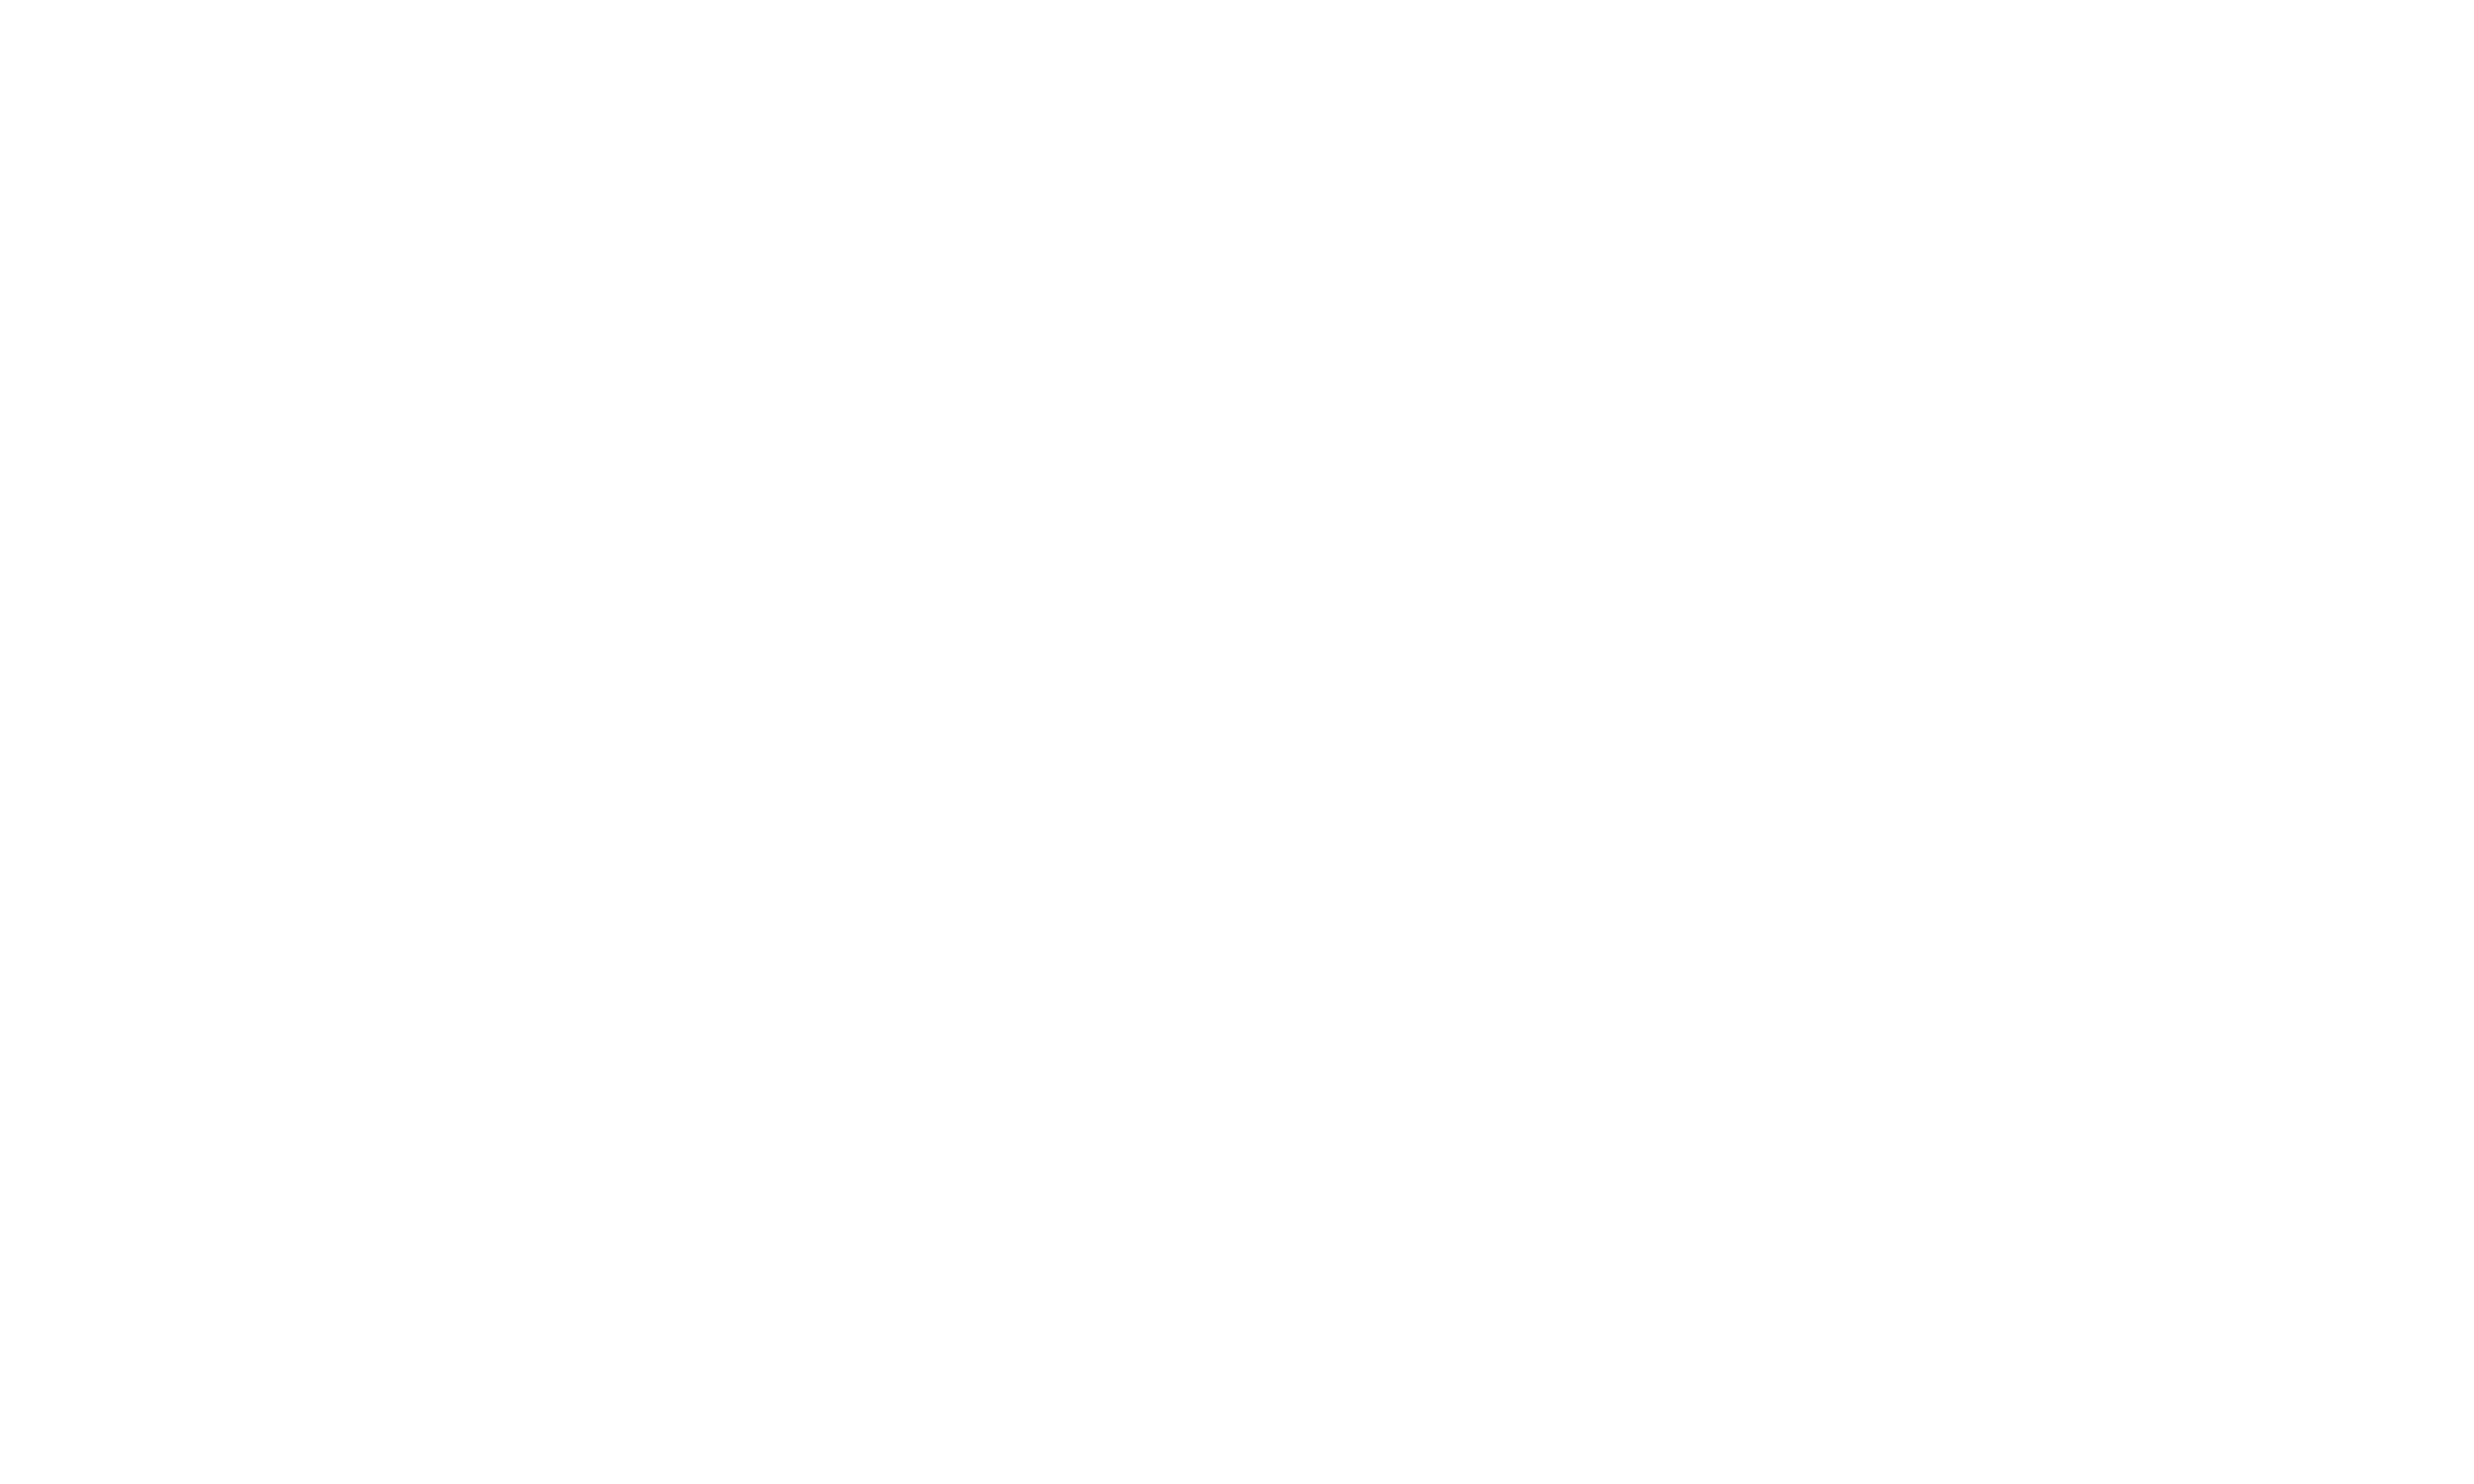

<IPython.core.display.Javascript object>


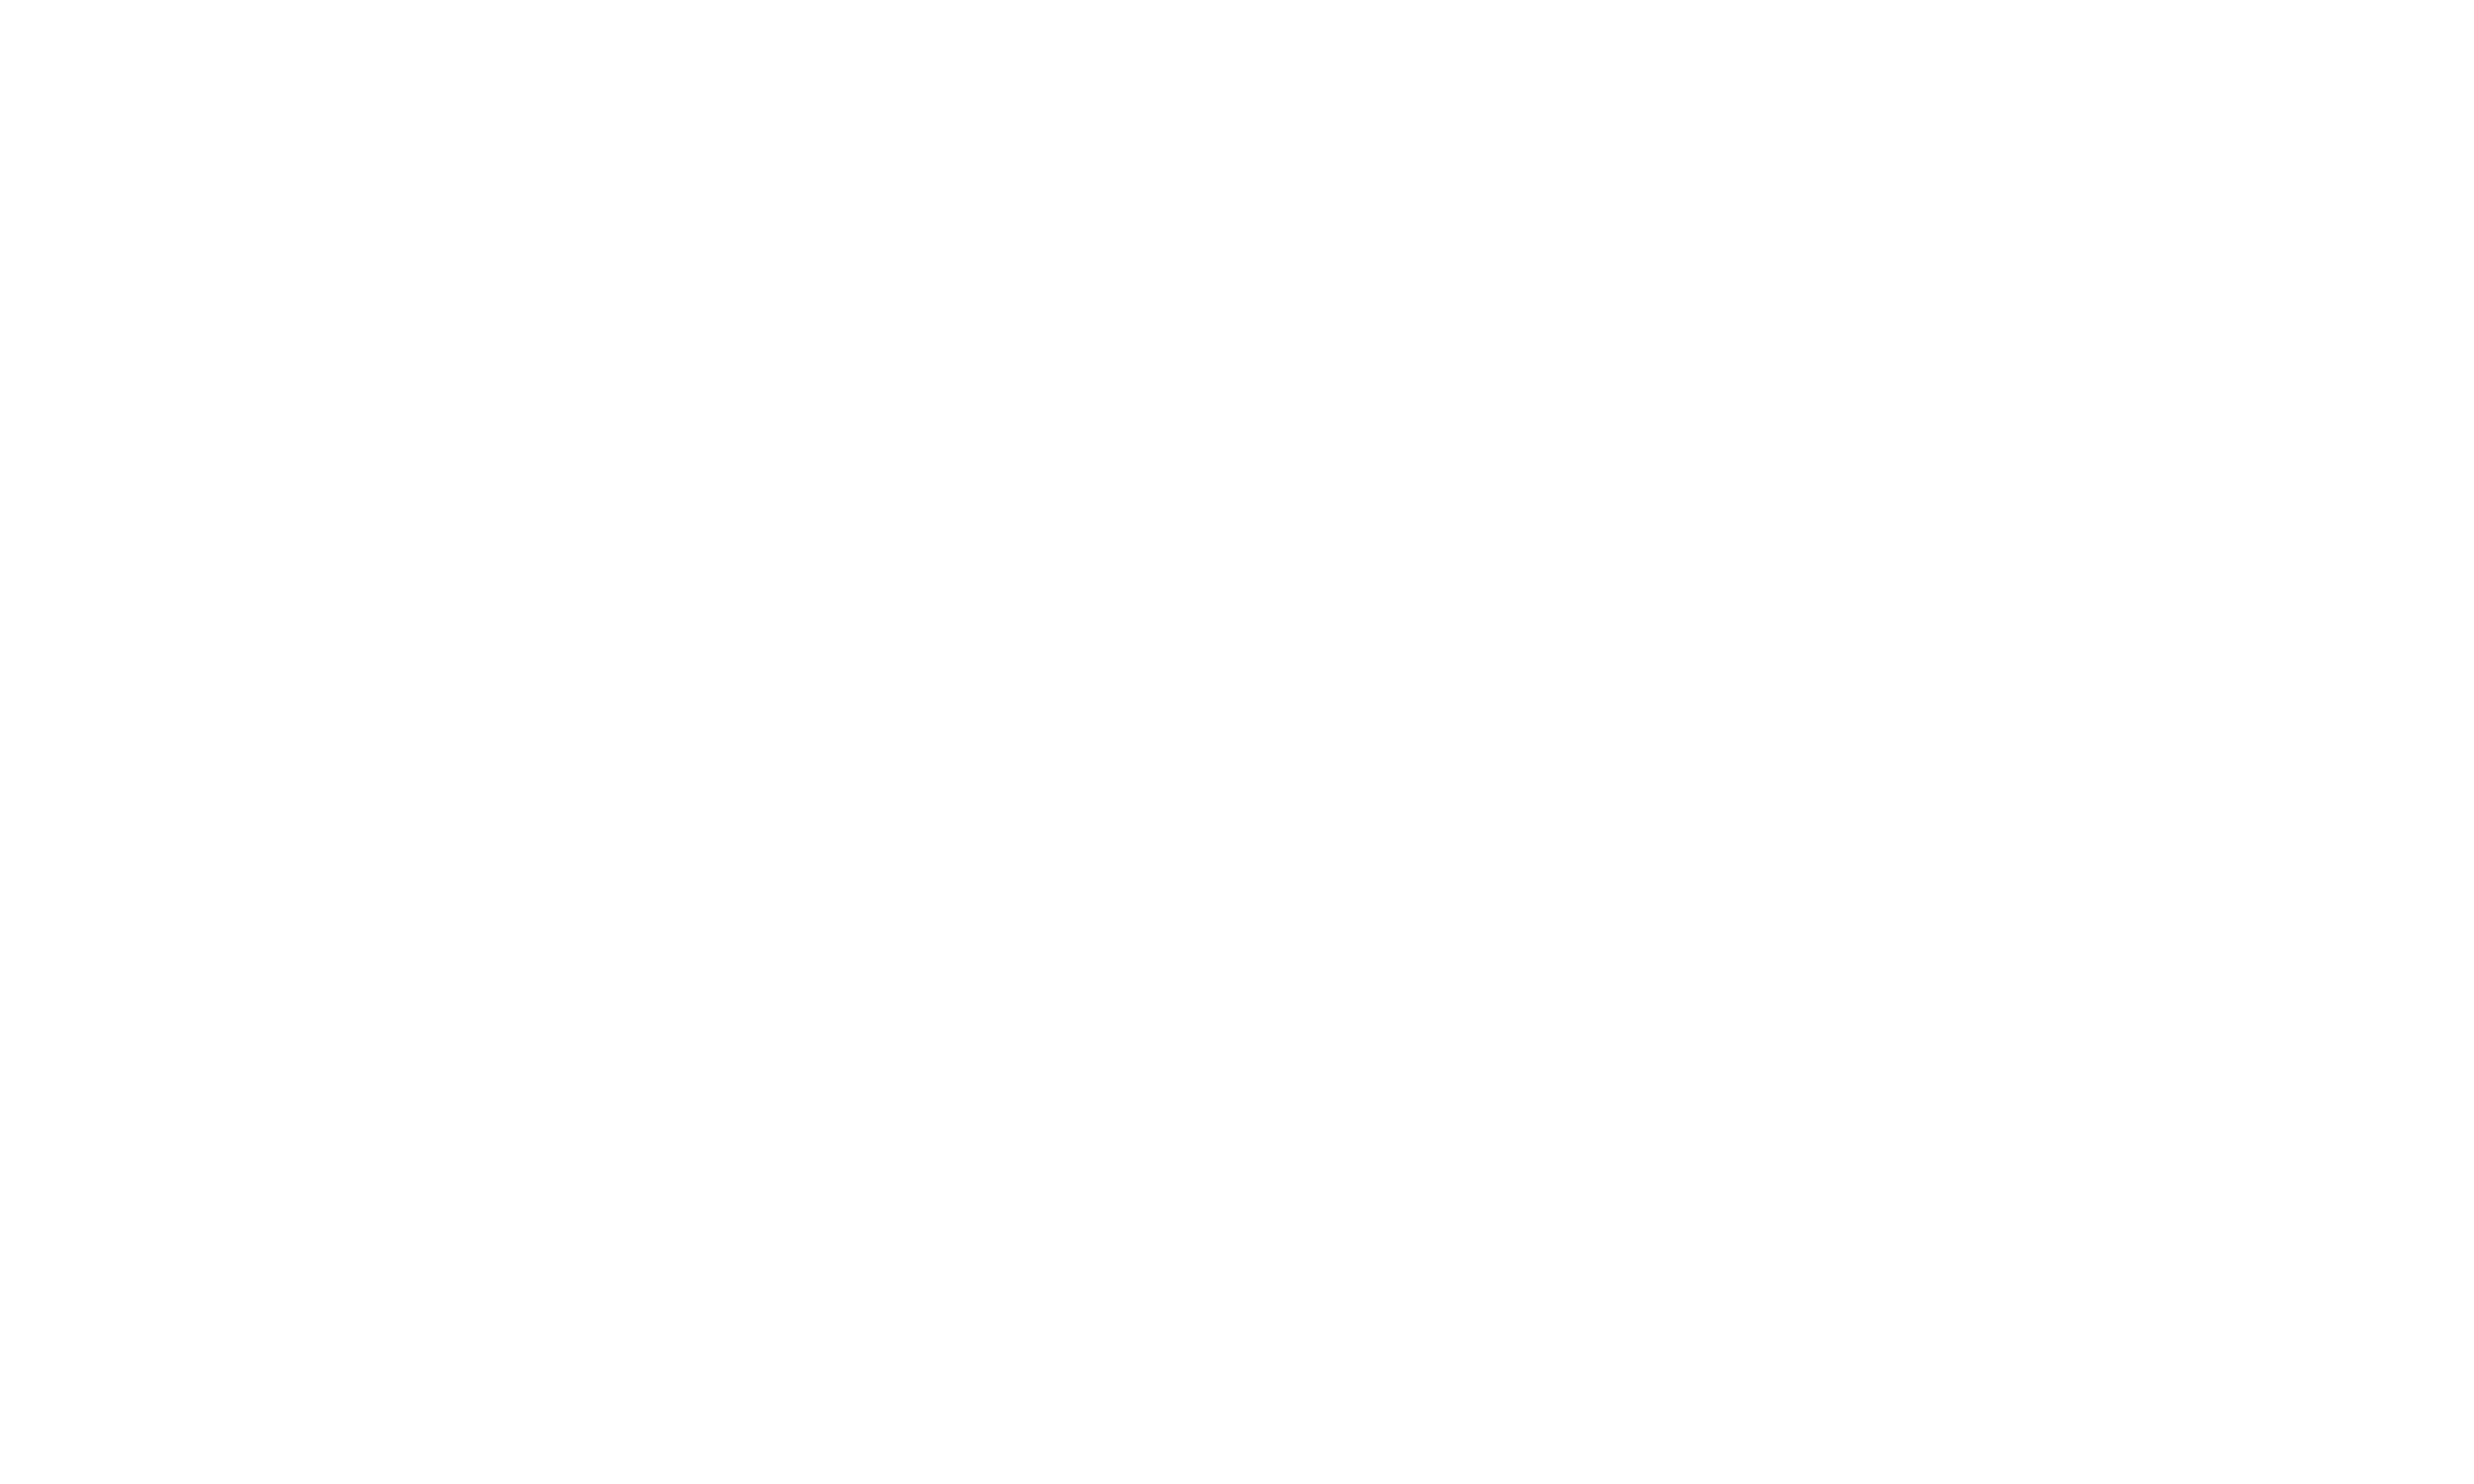

<IPython.core.display.Javascript object>


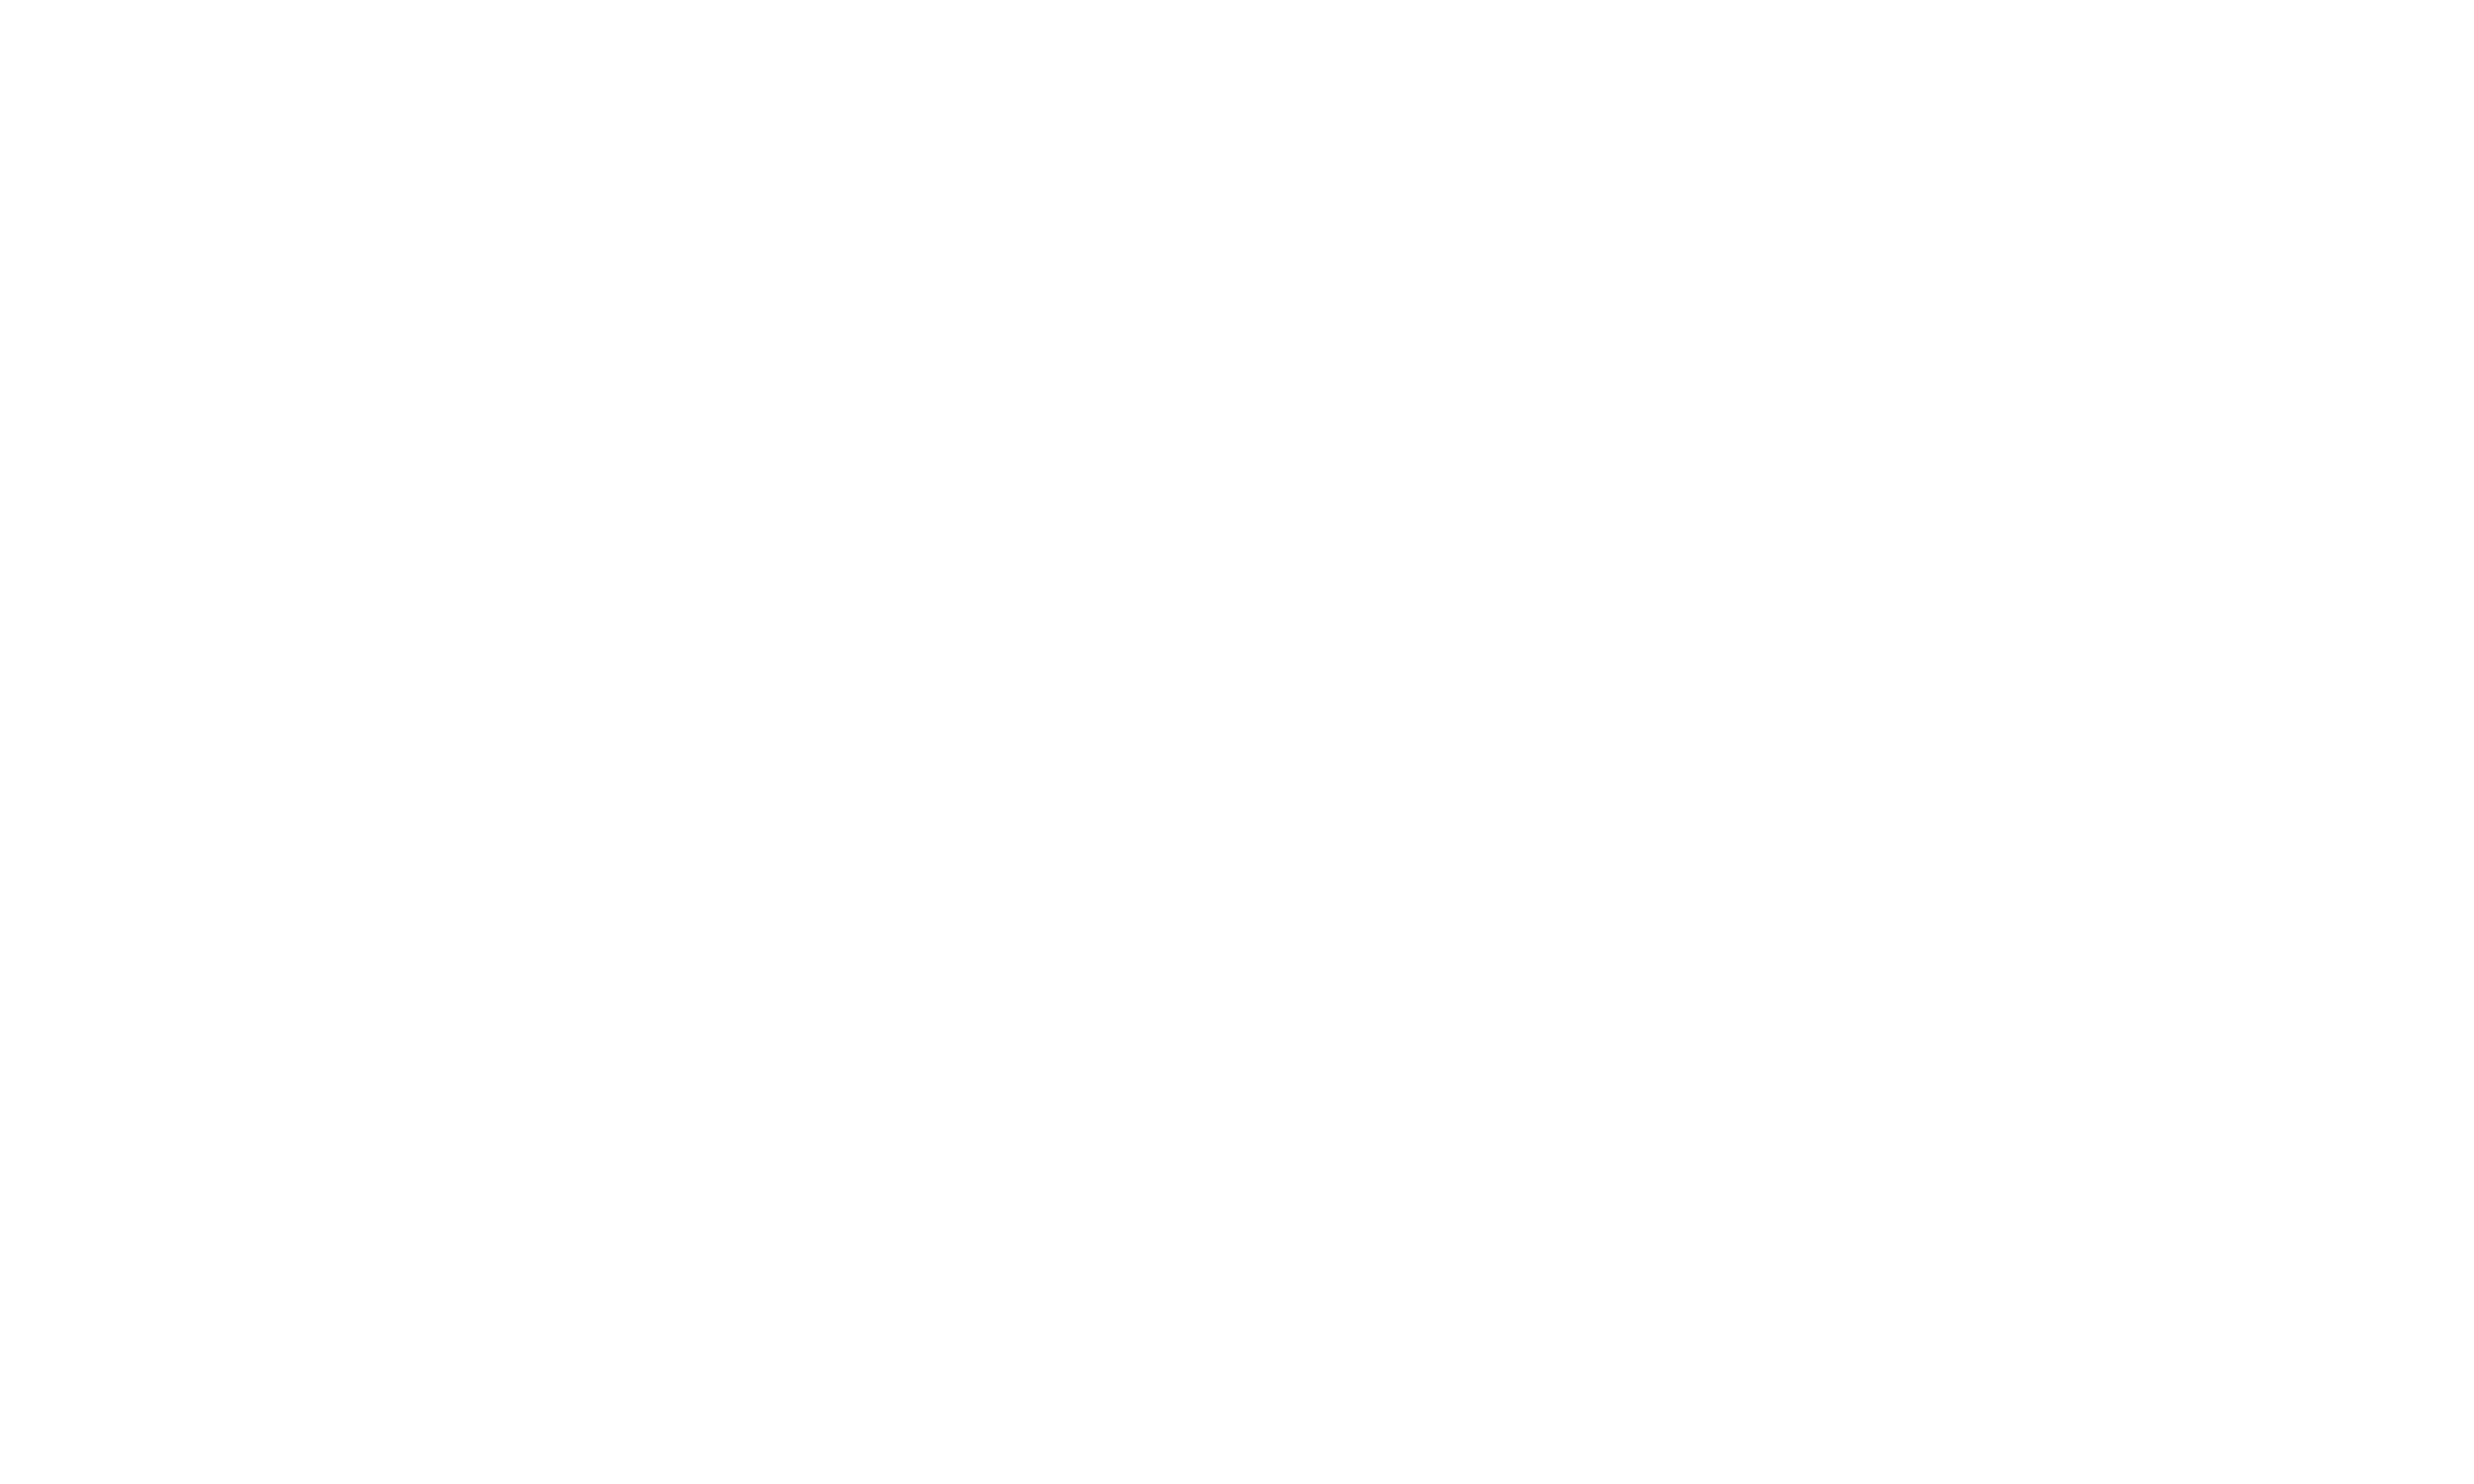

<IPython.core.display.Javascript object>


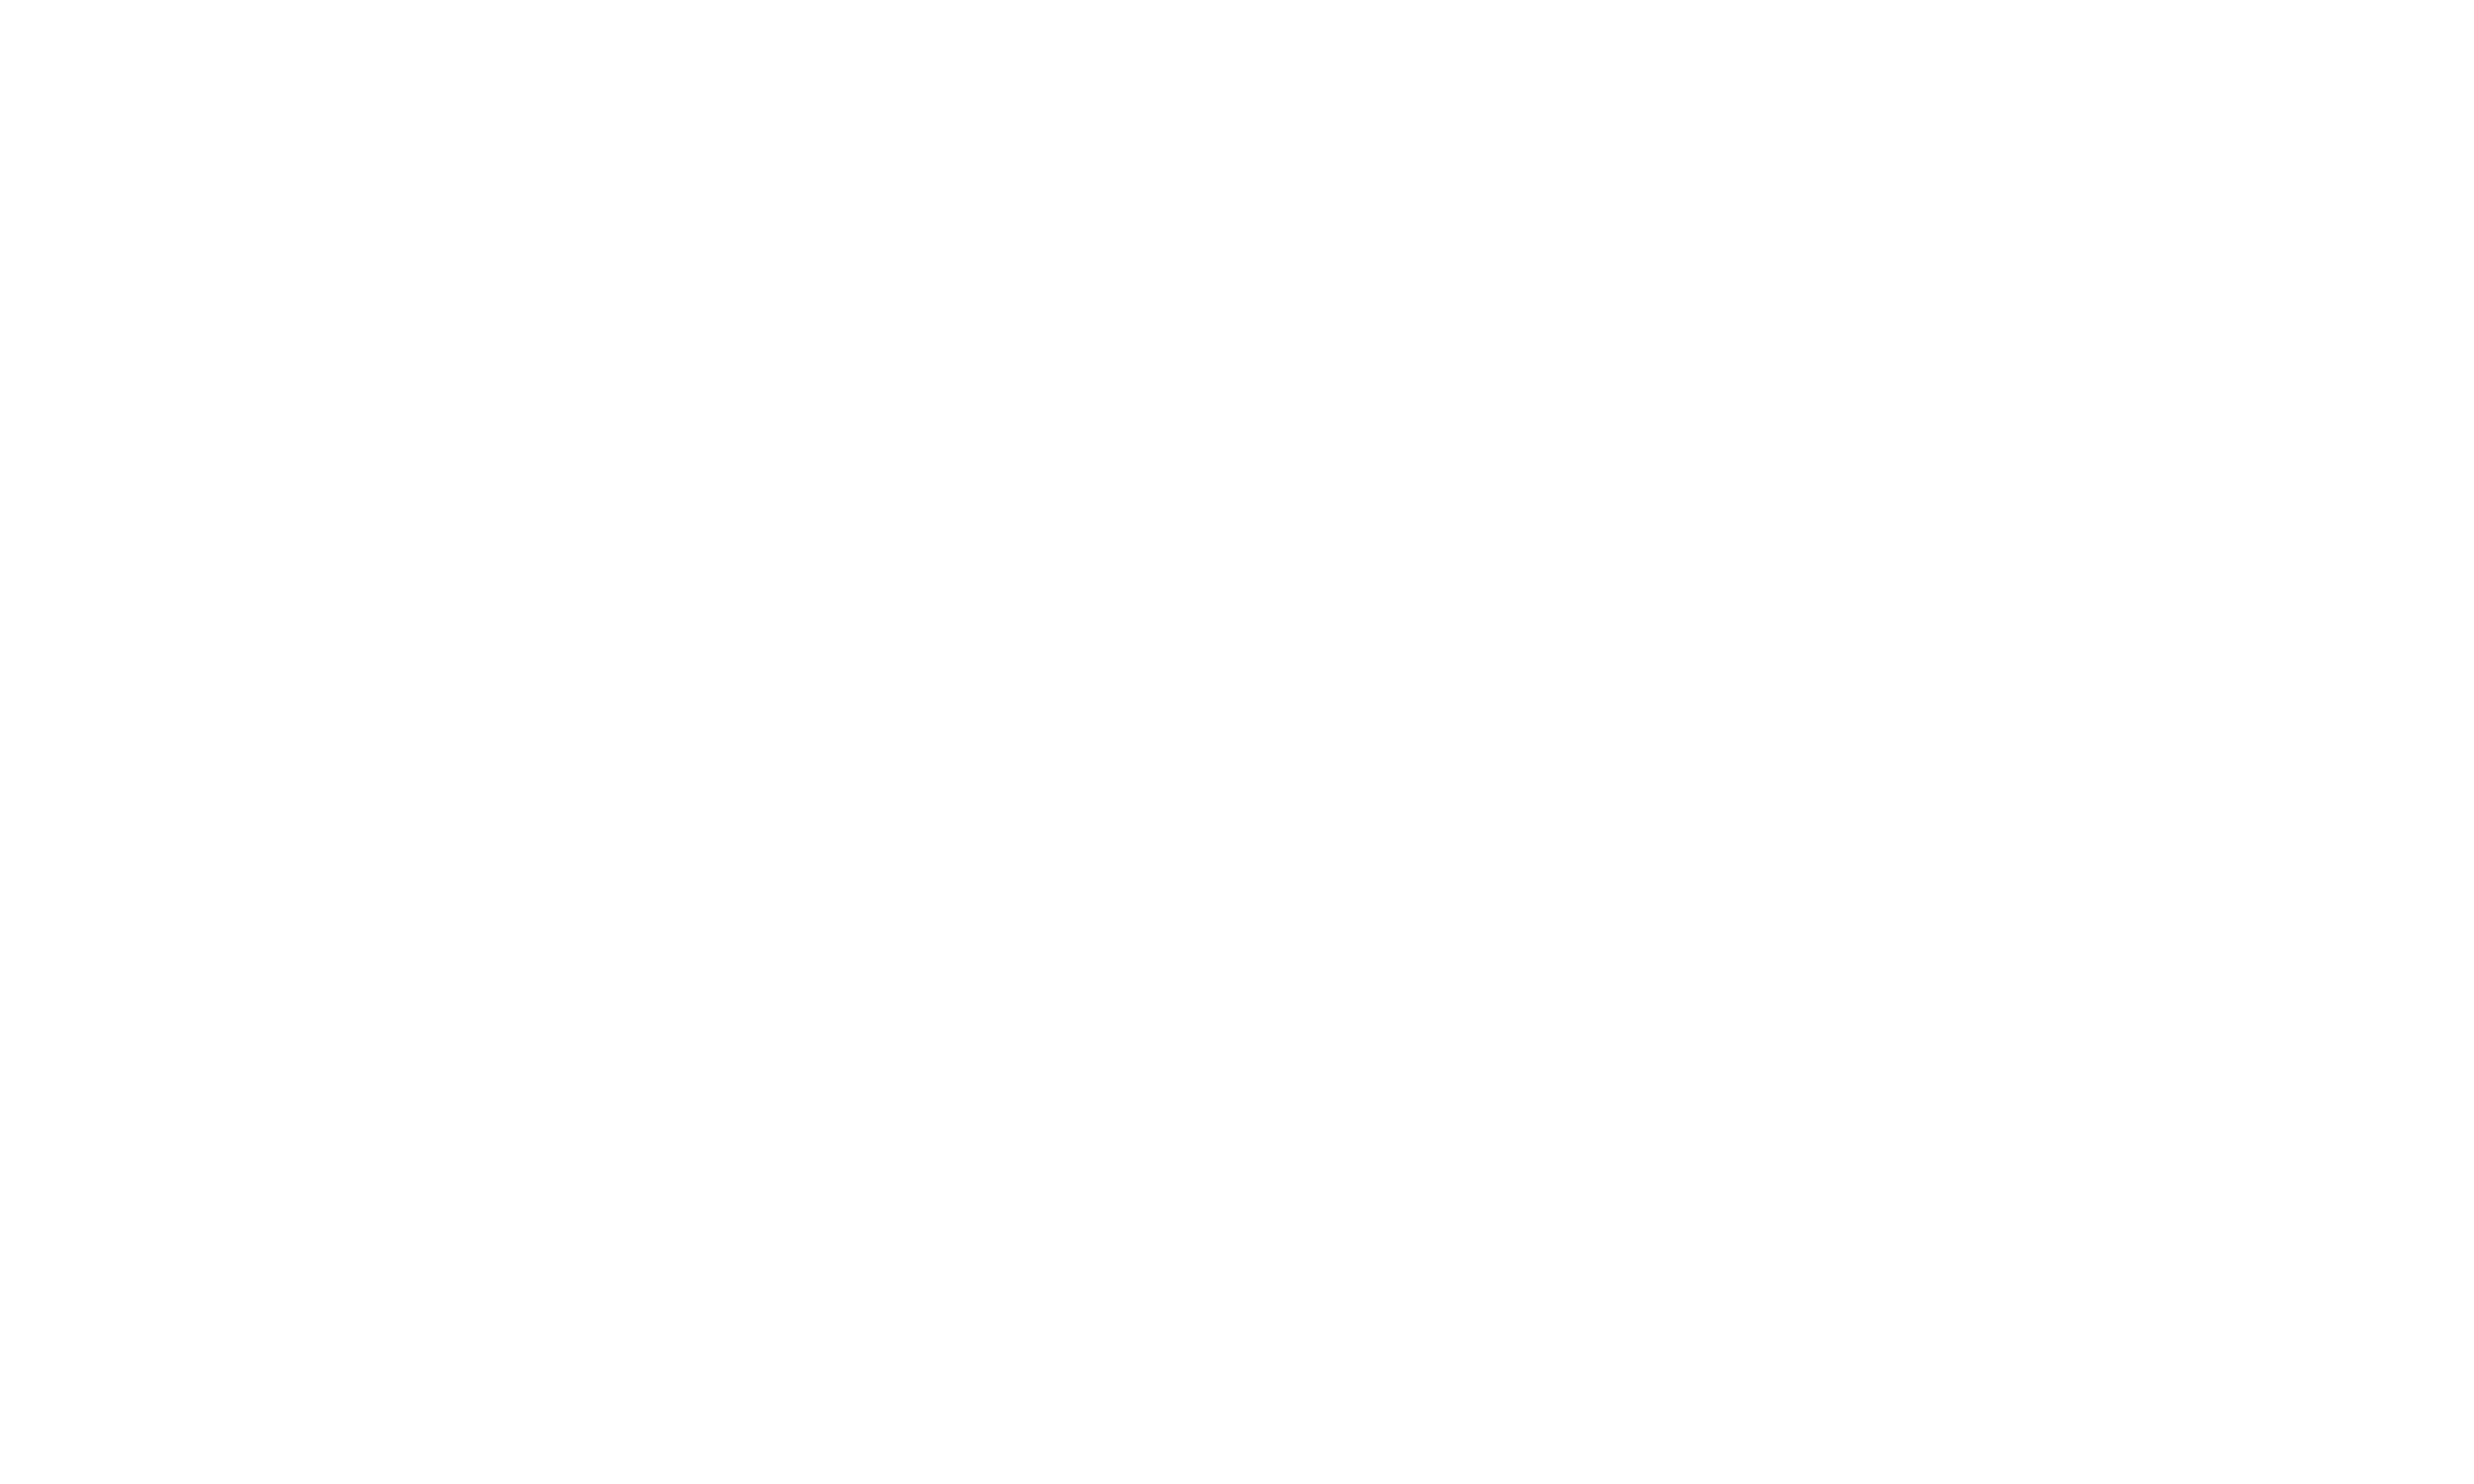

<IPython.core.display.Javascript object>


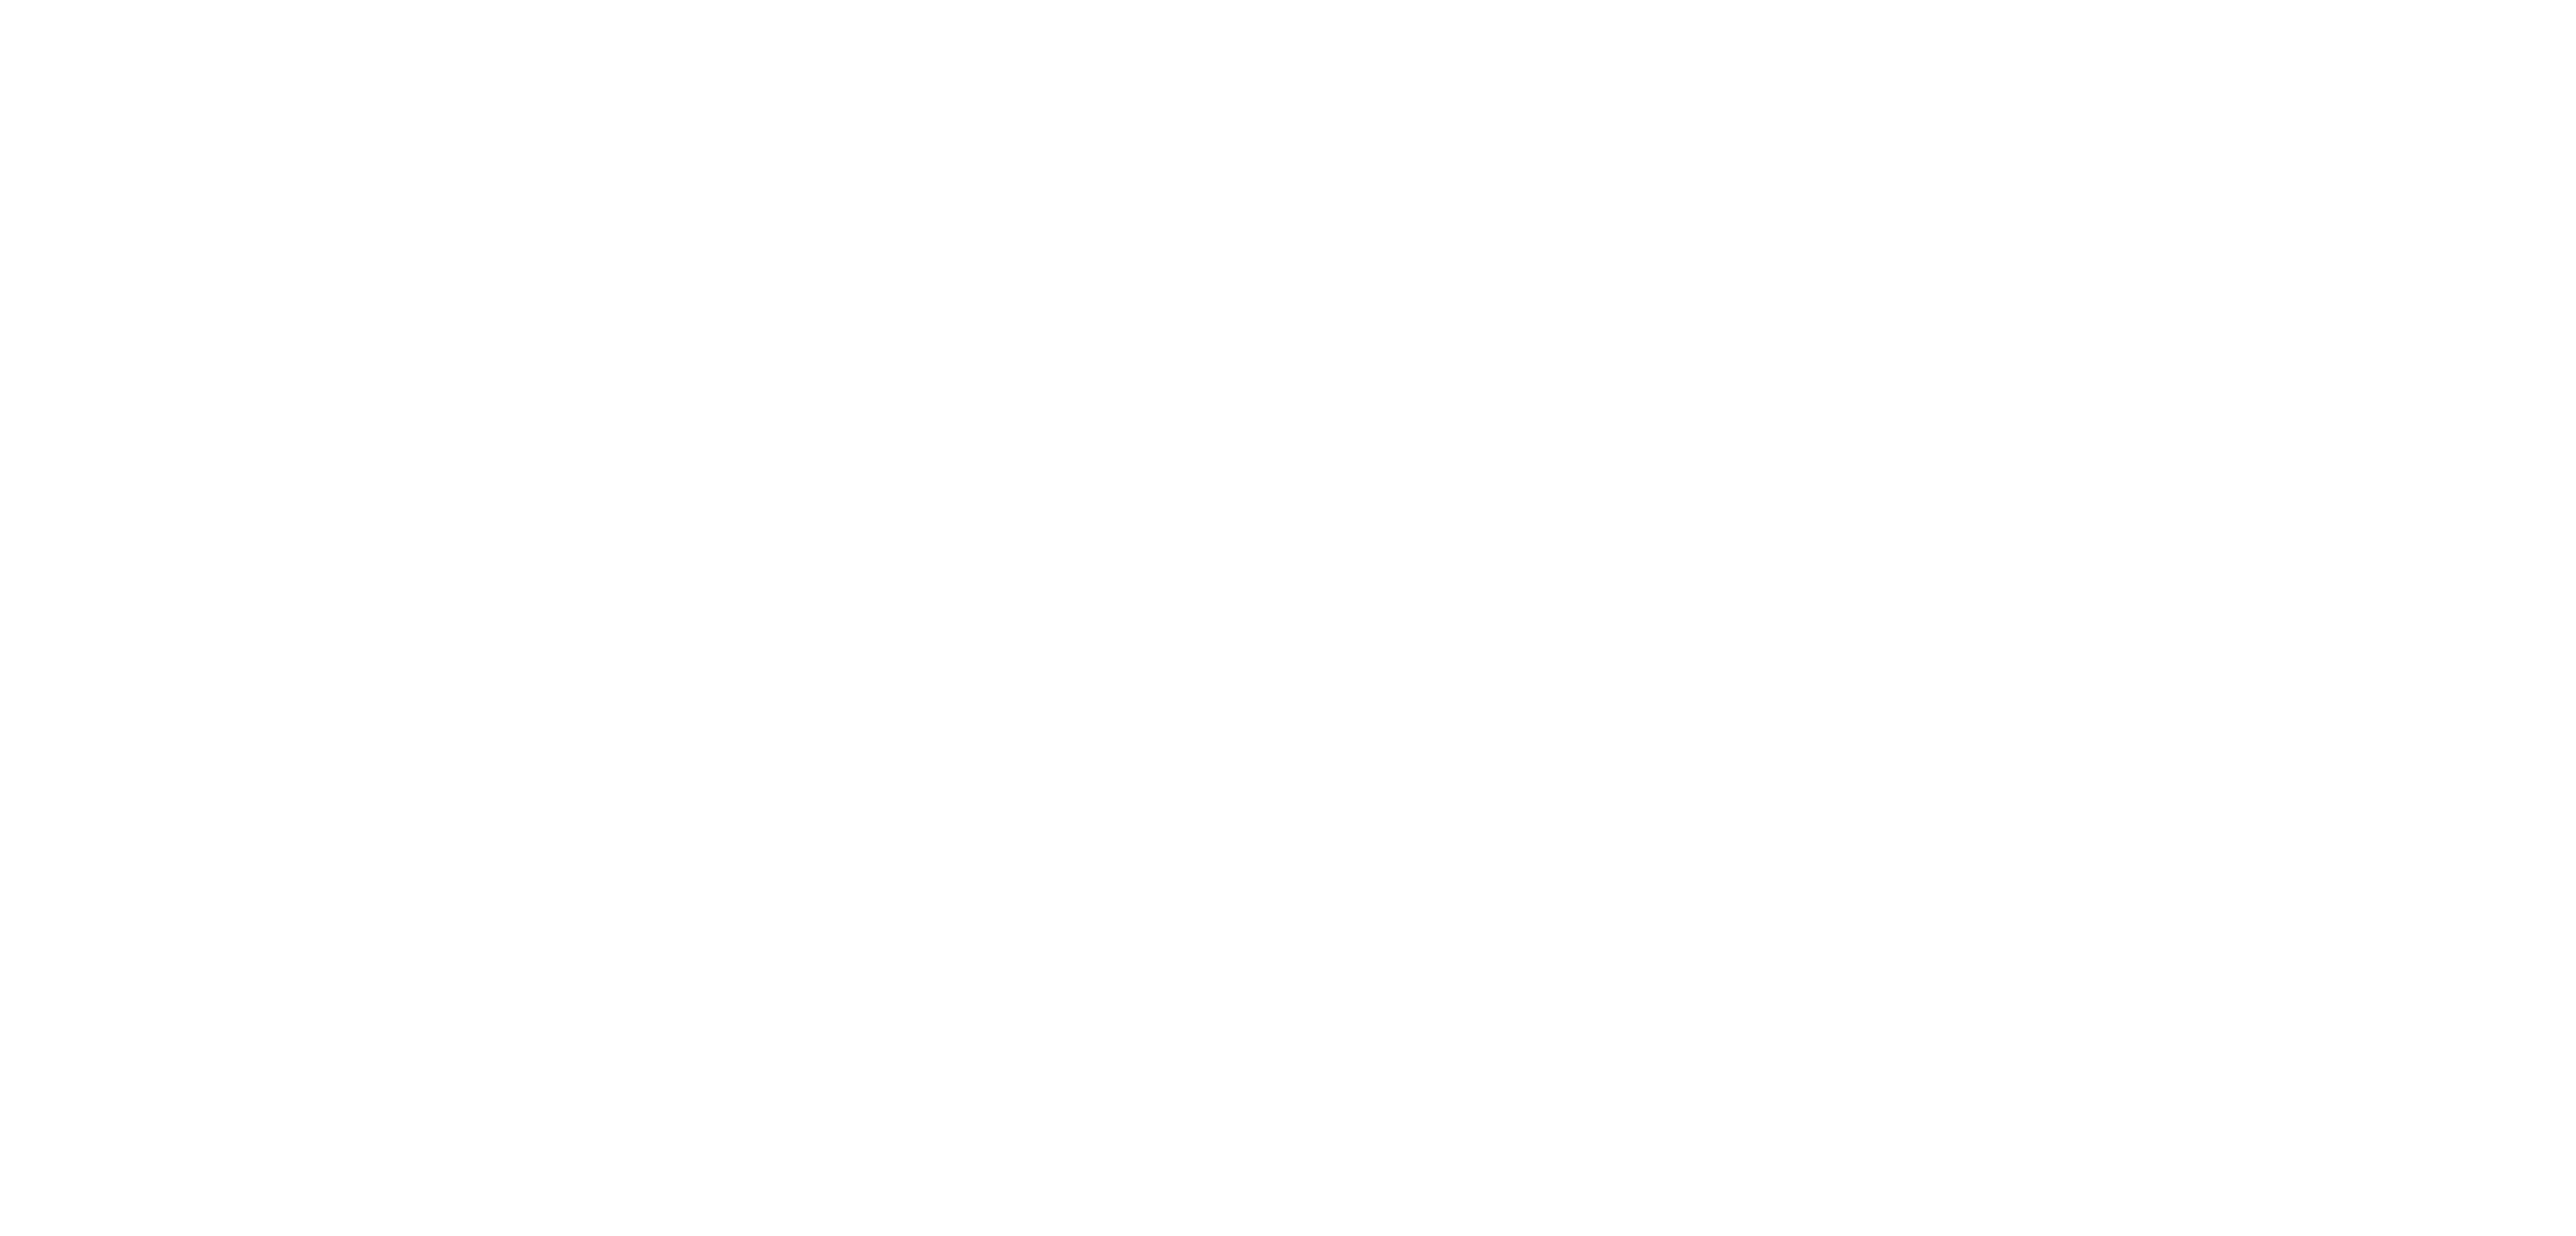

<IPython.core.display.Javascript object>


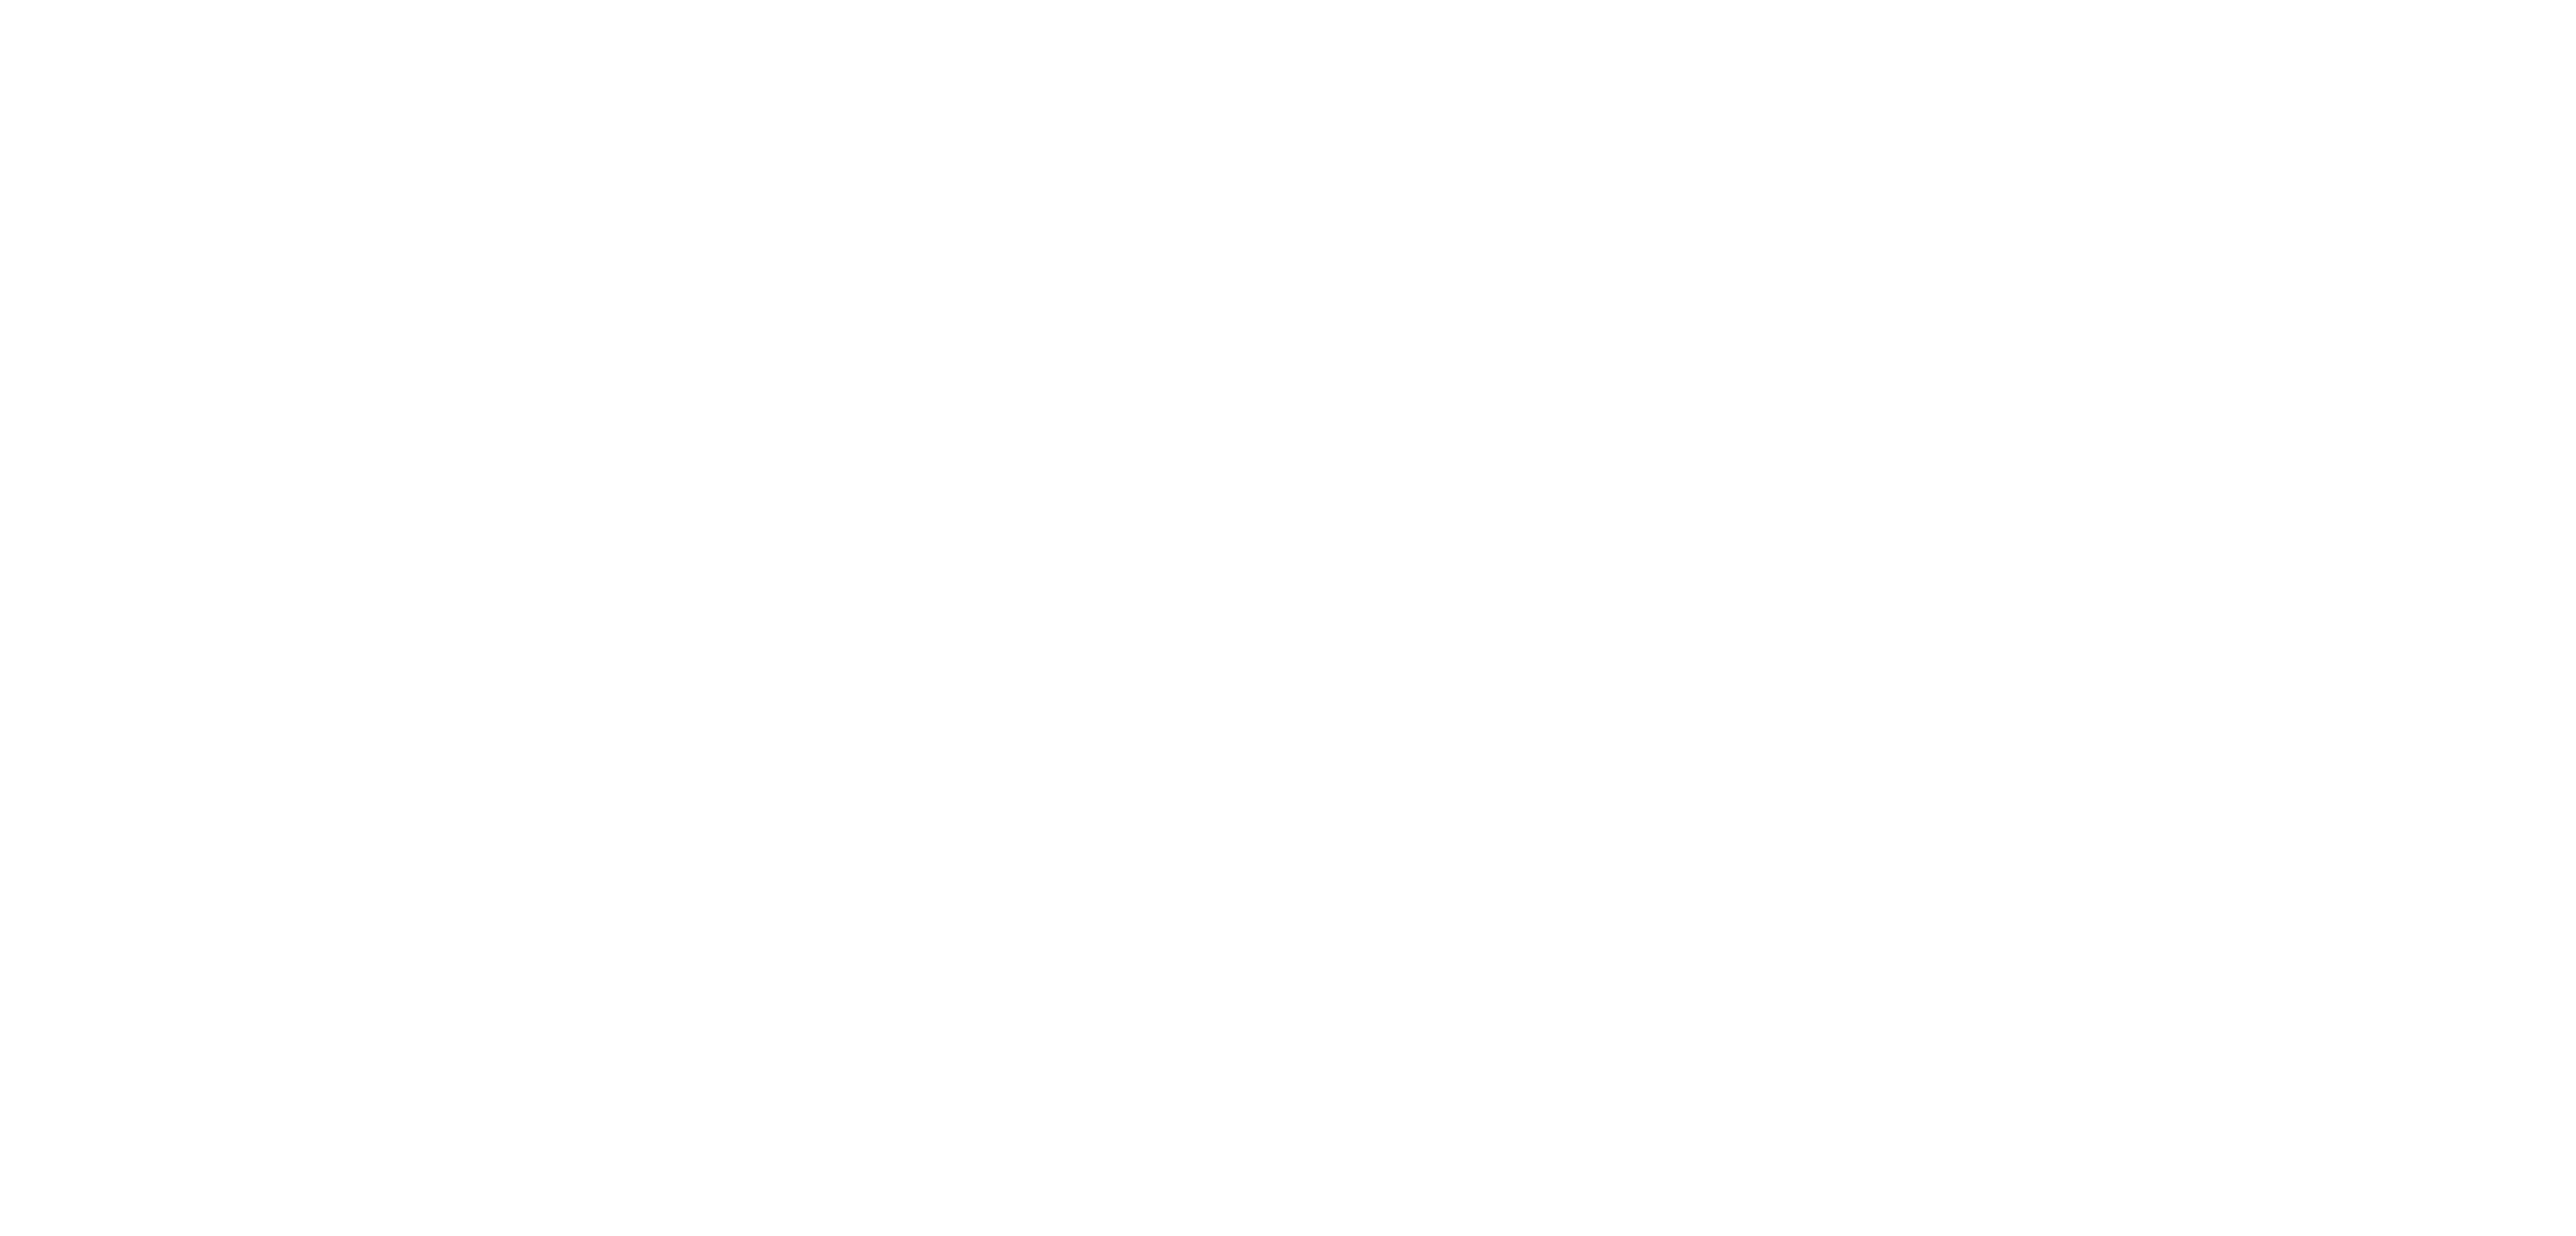

<IPython.core.display.Javascript object>


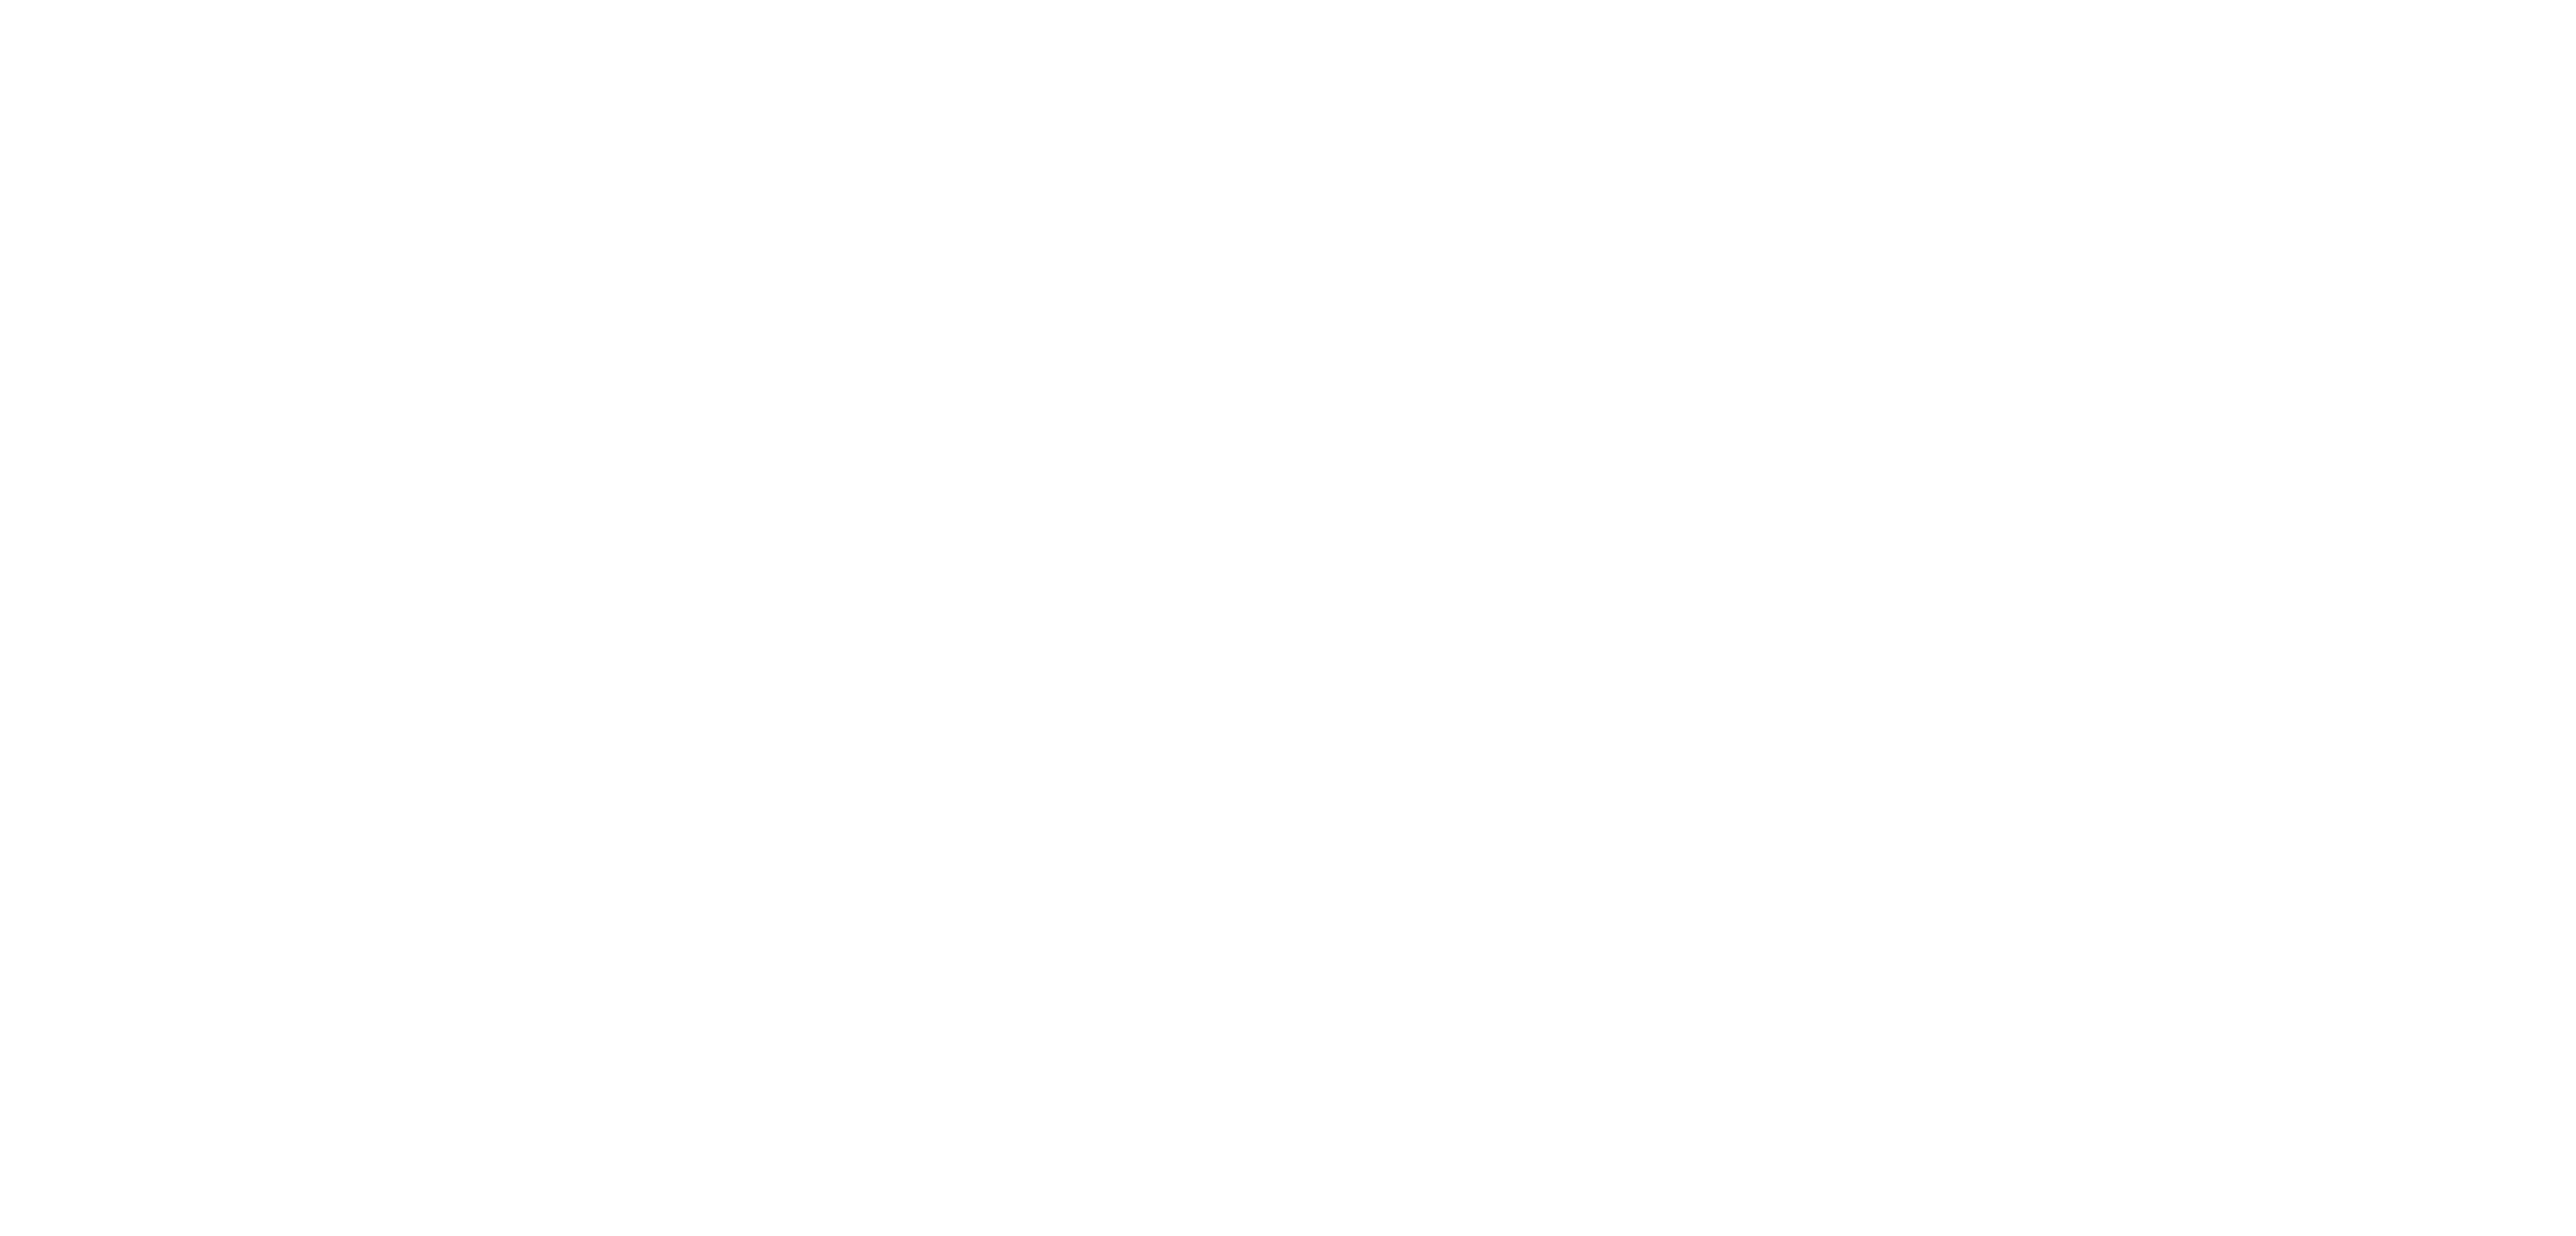

<IPython.core.display.Javascript object>


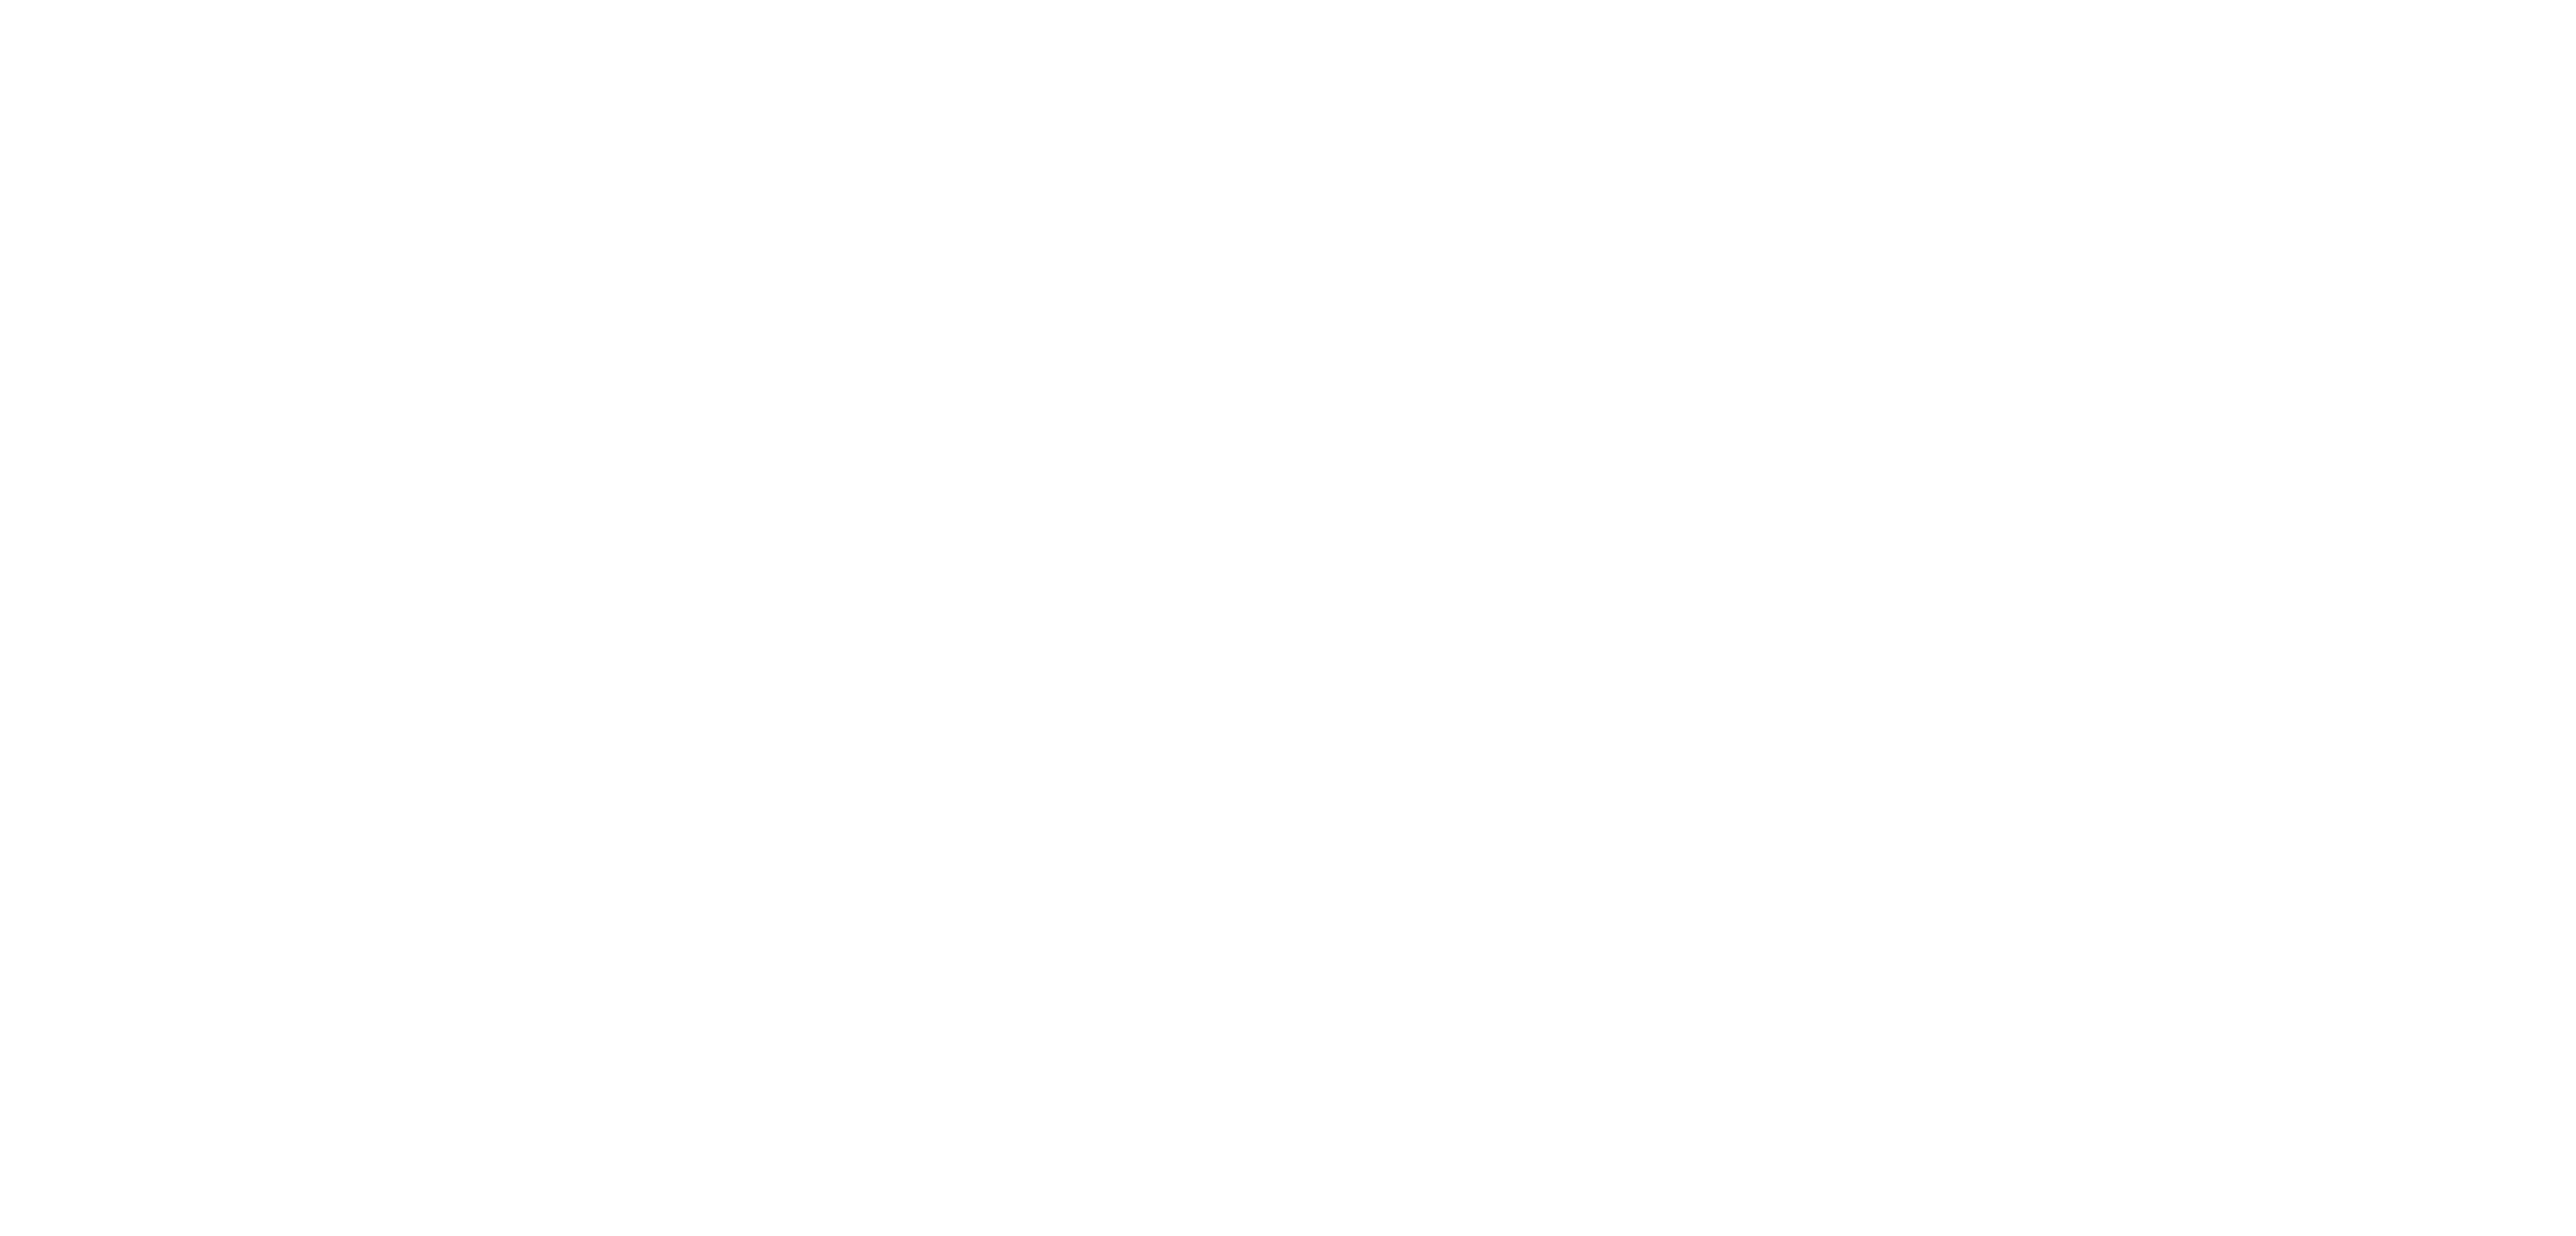

<IPython.core.display.Javascript object>


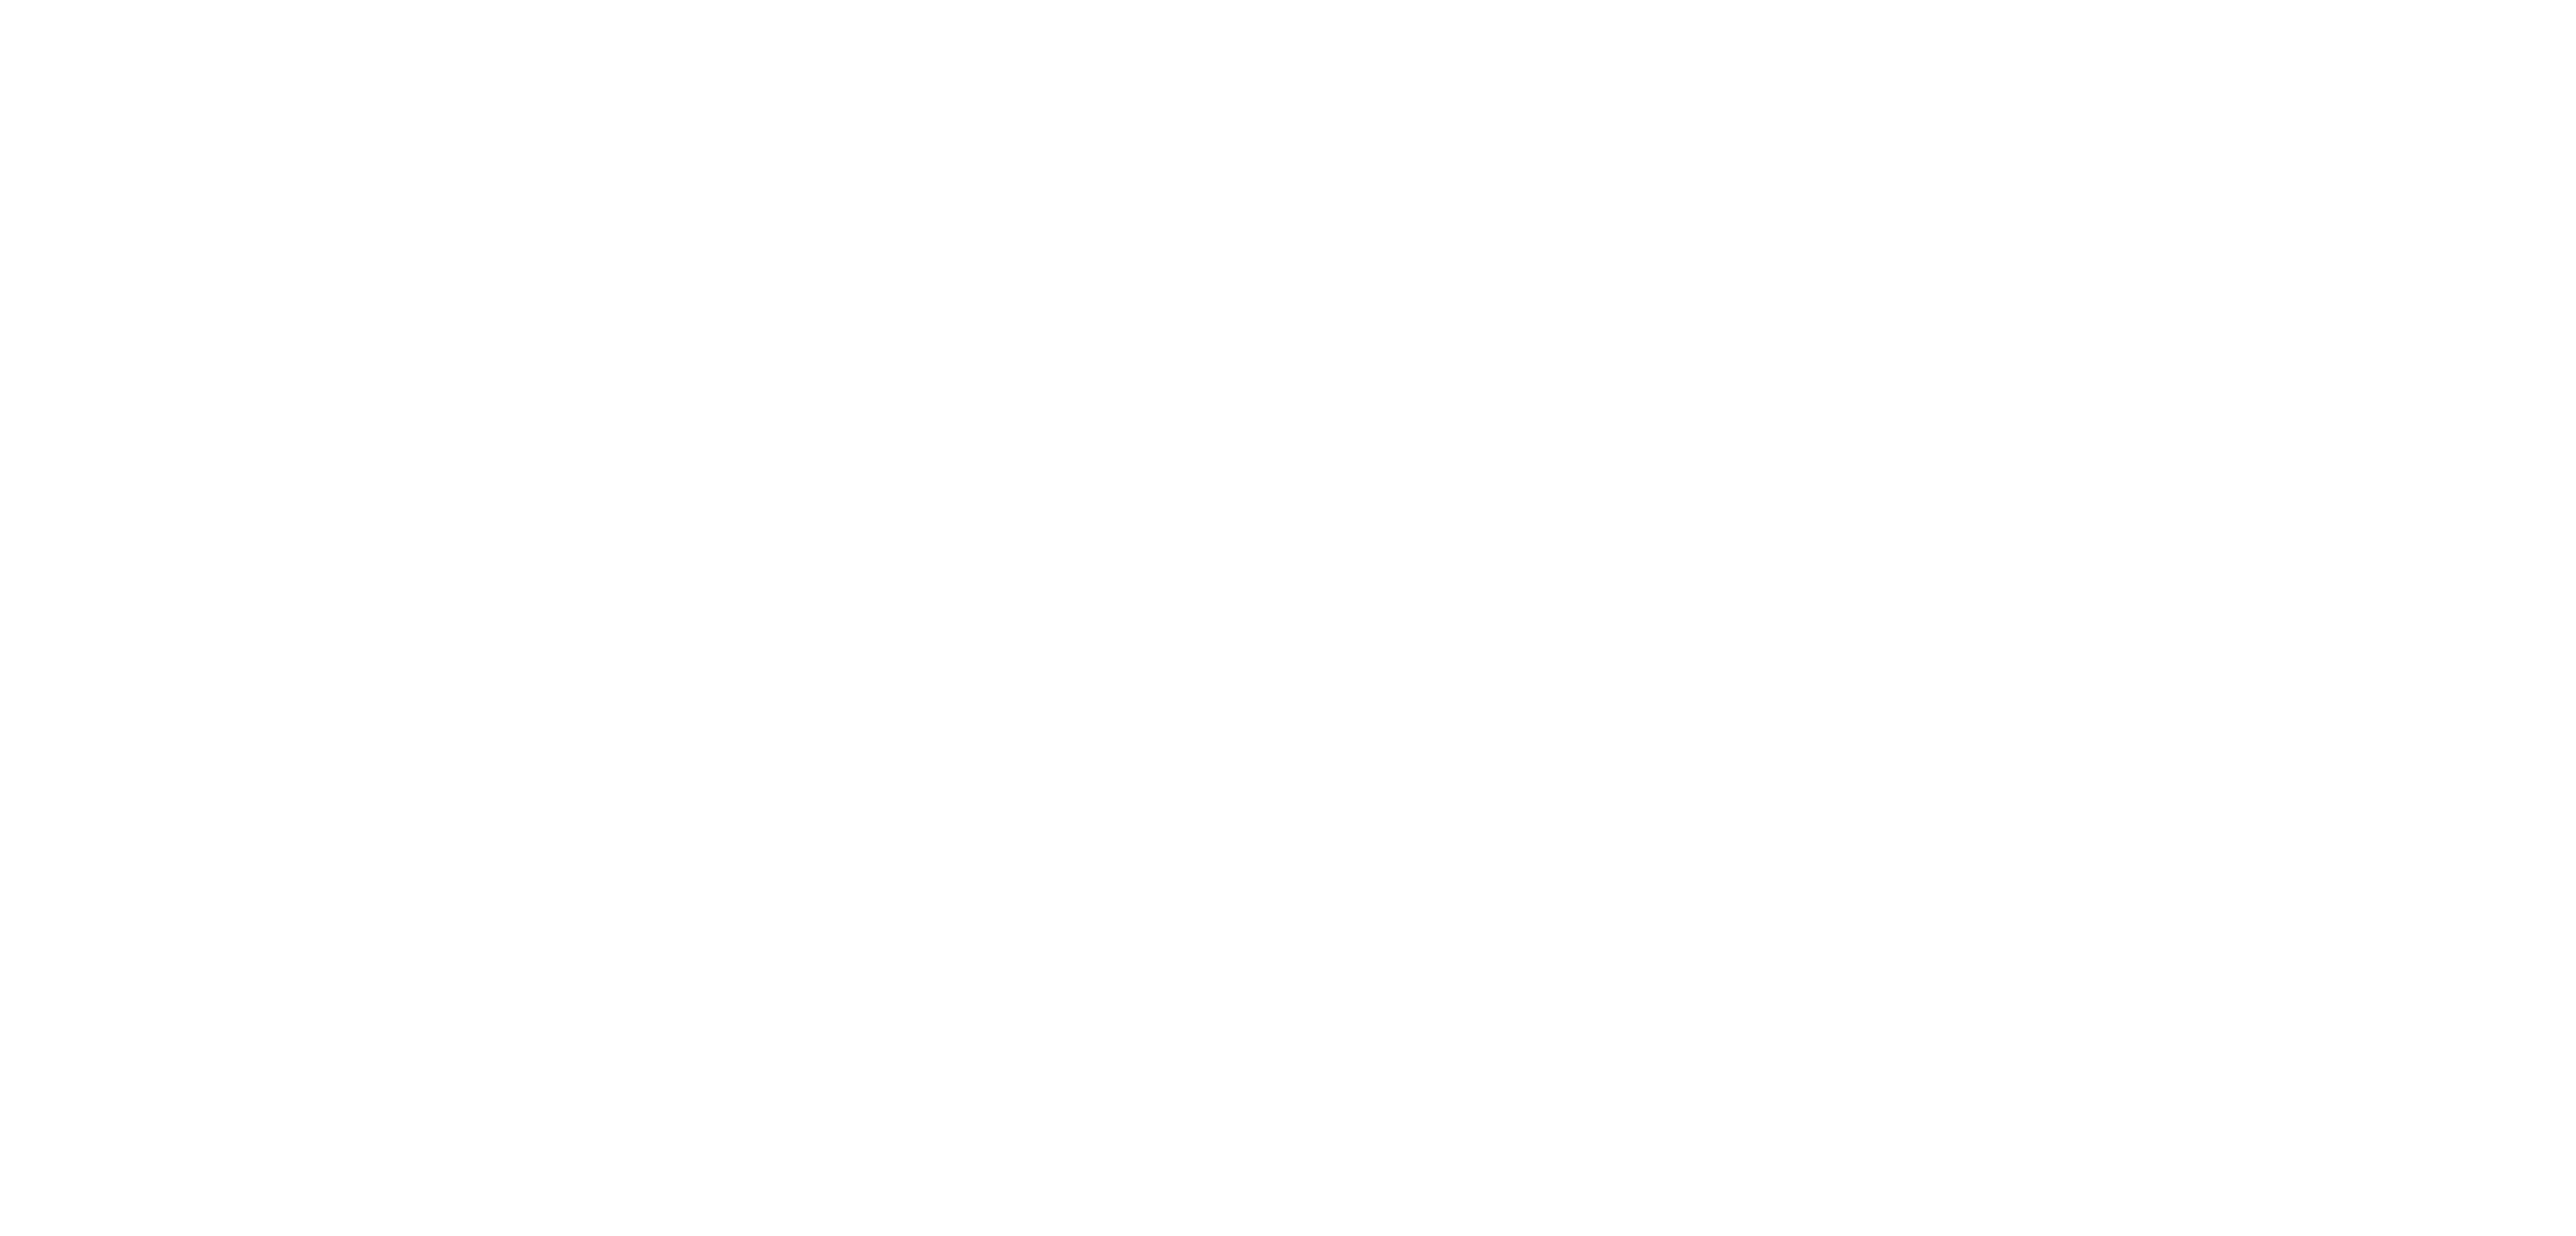

<IPython.core.display.Javascript object>


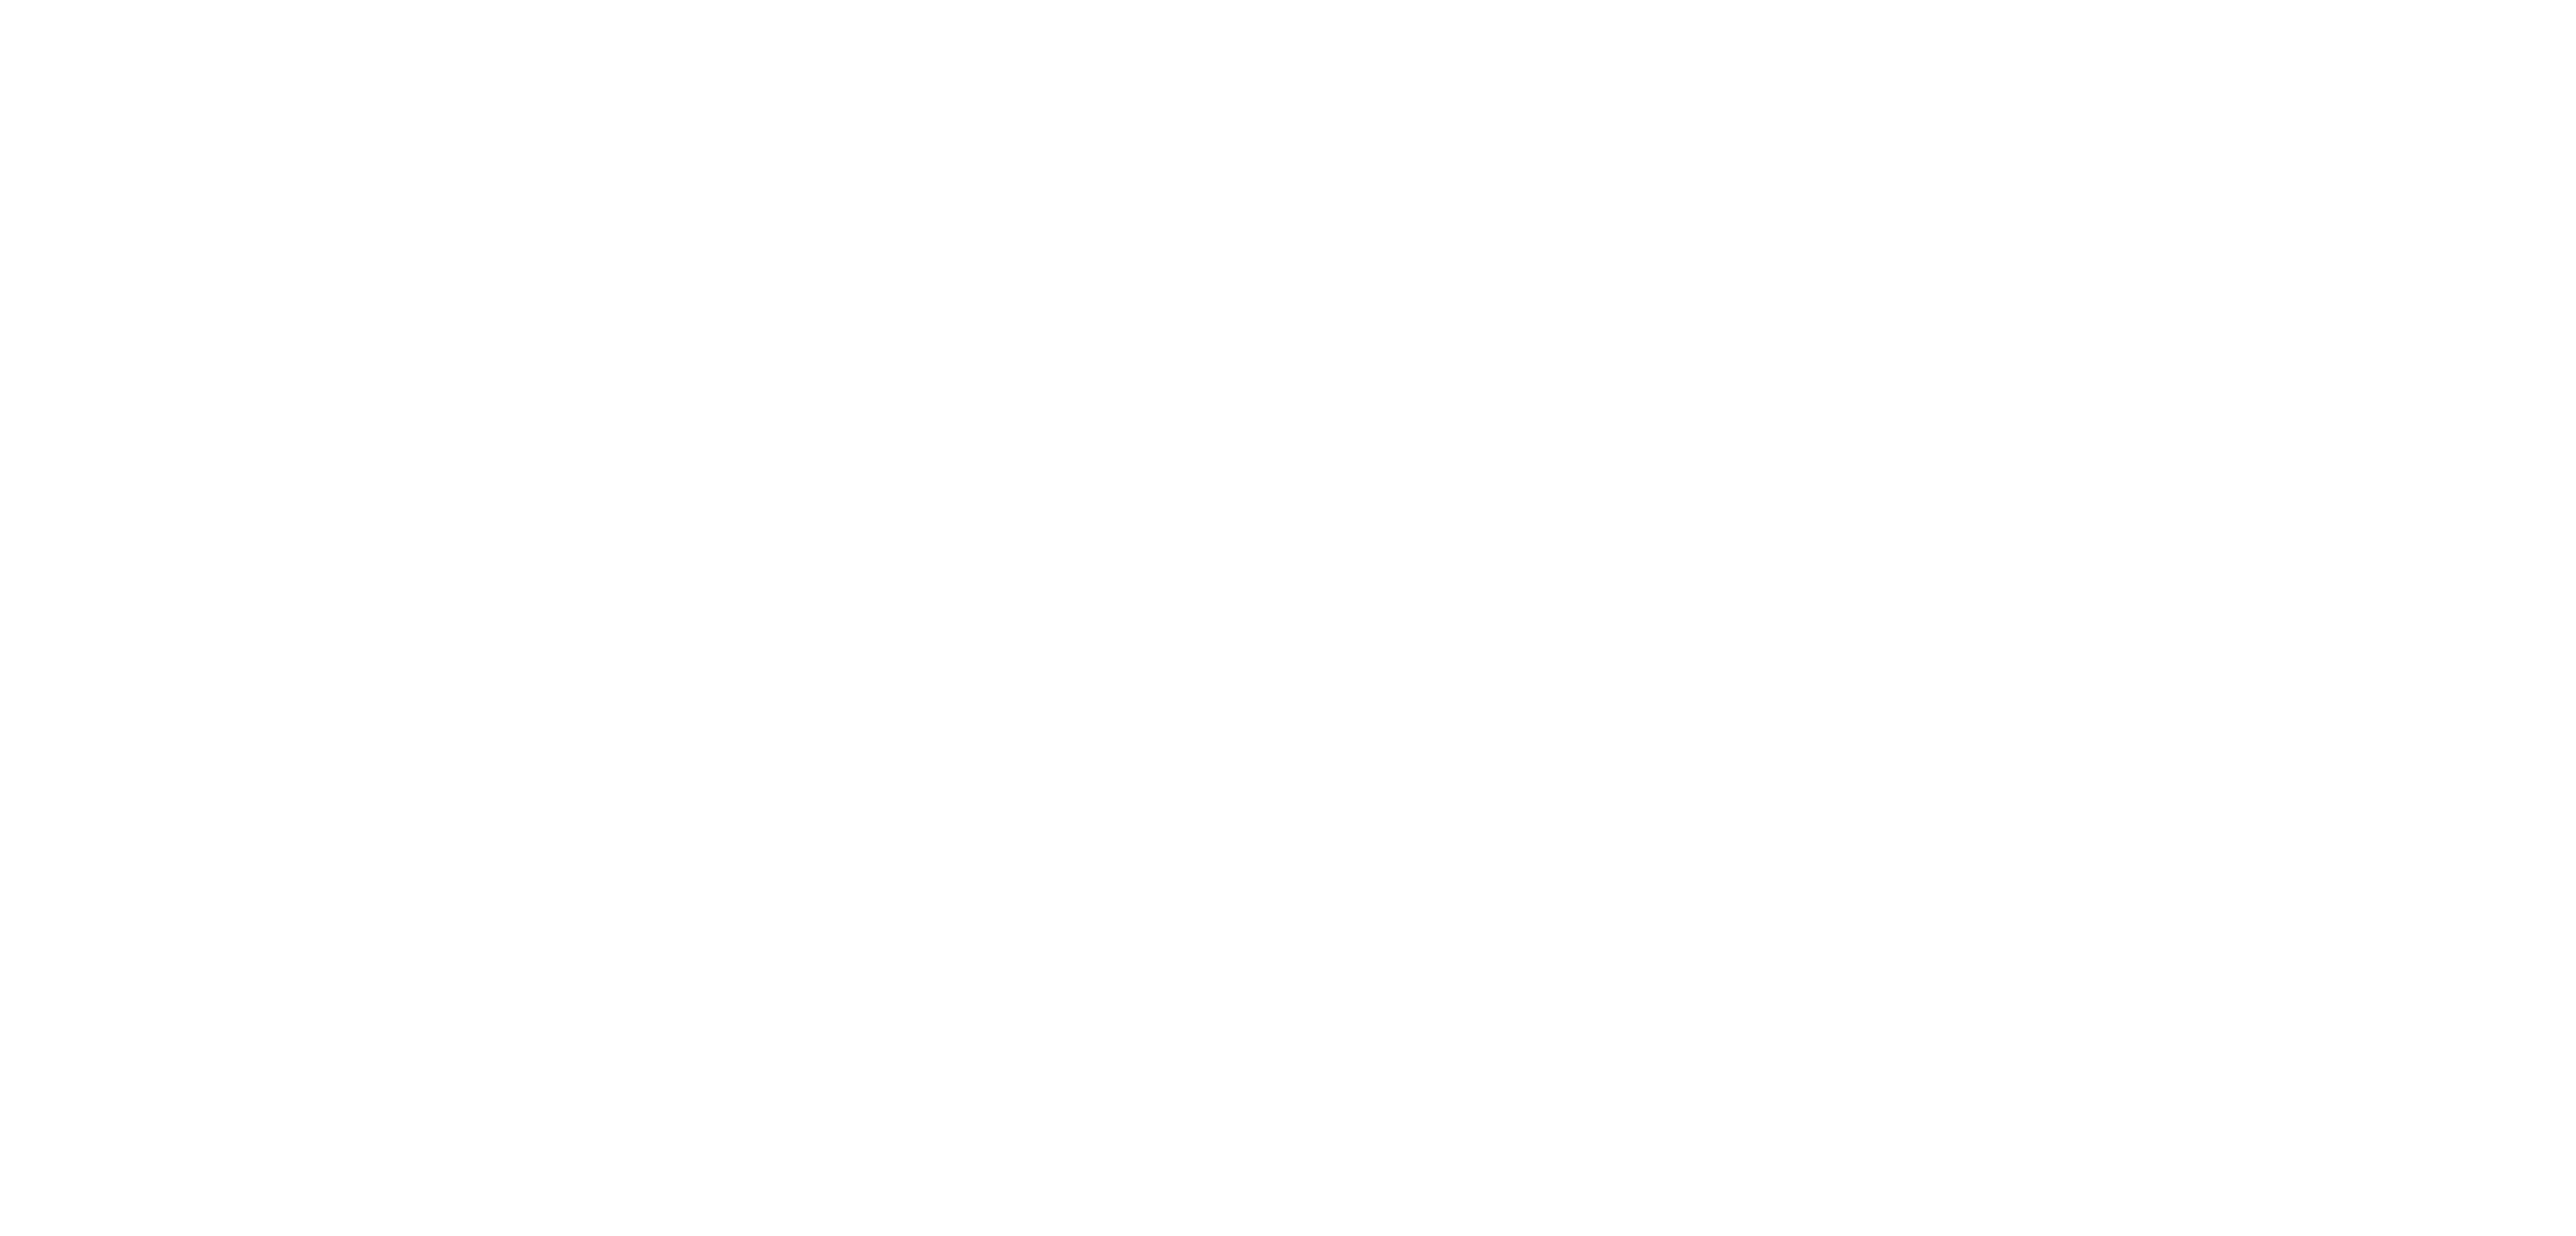

<IPython.core.display.Javascript object>


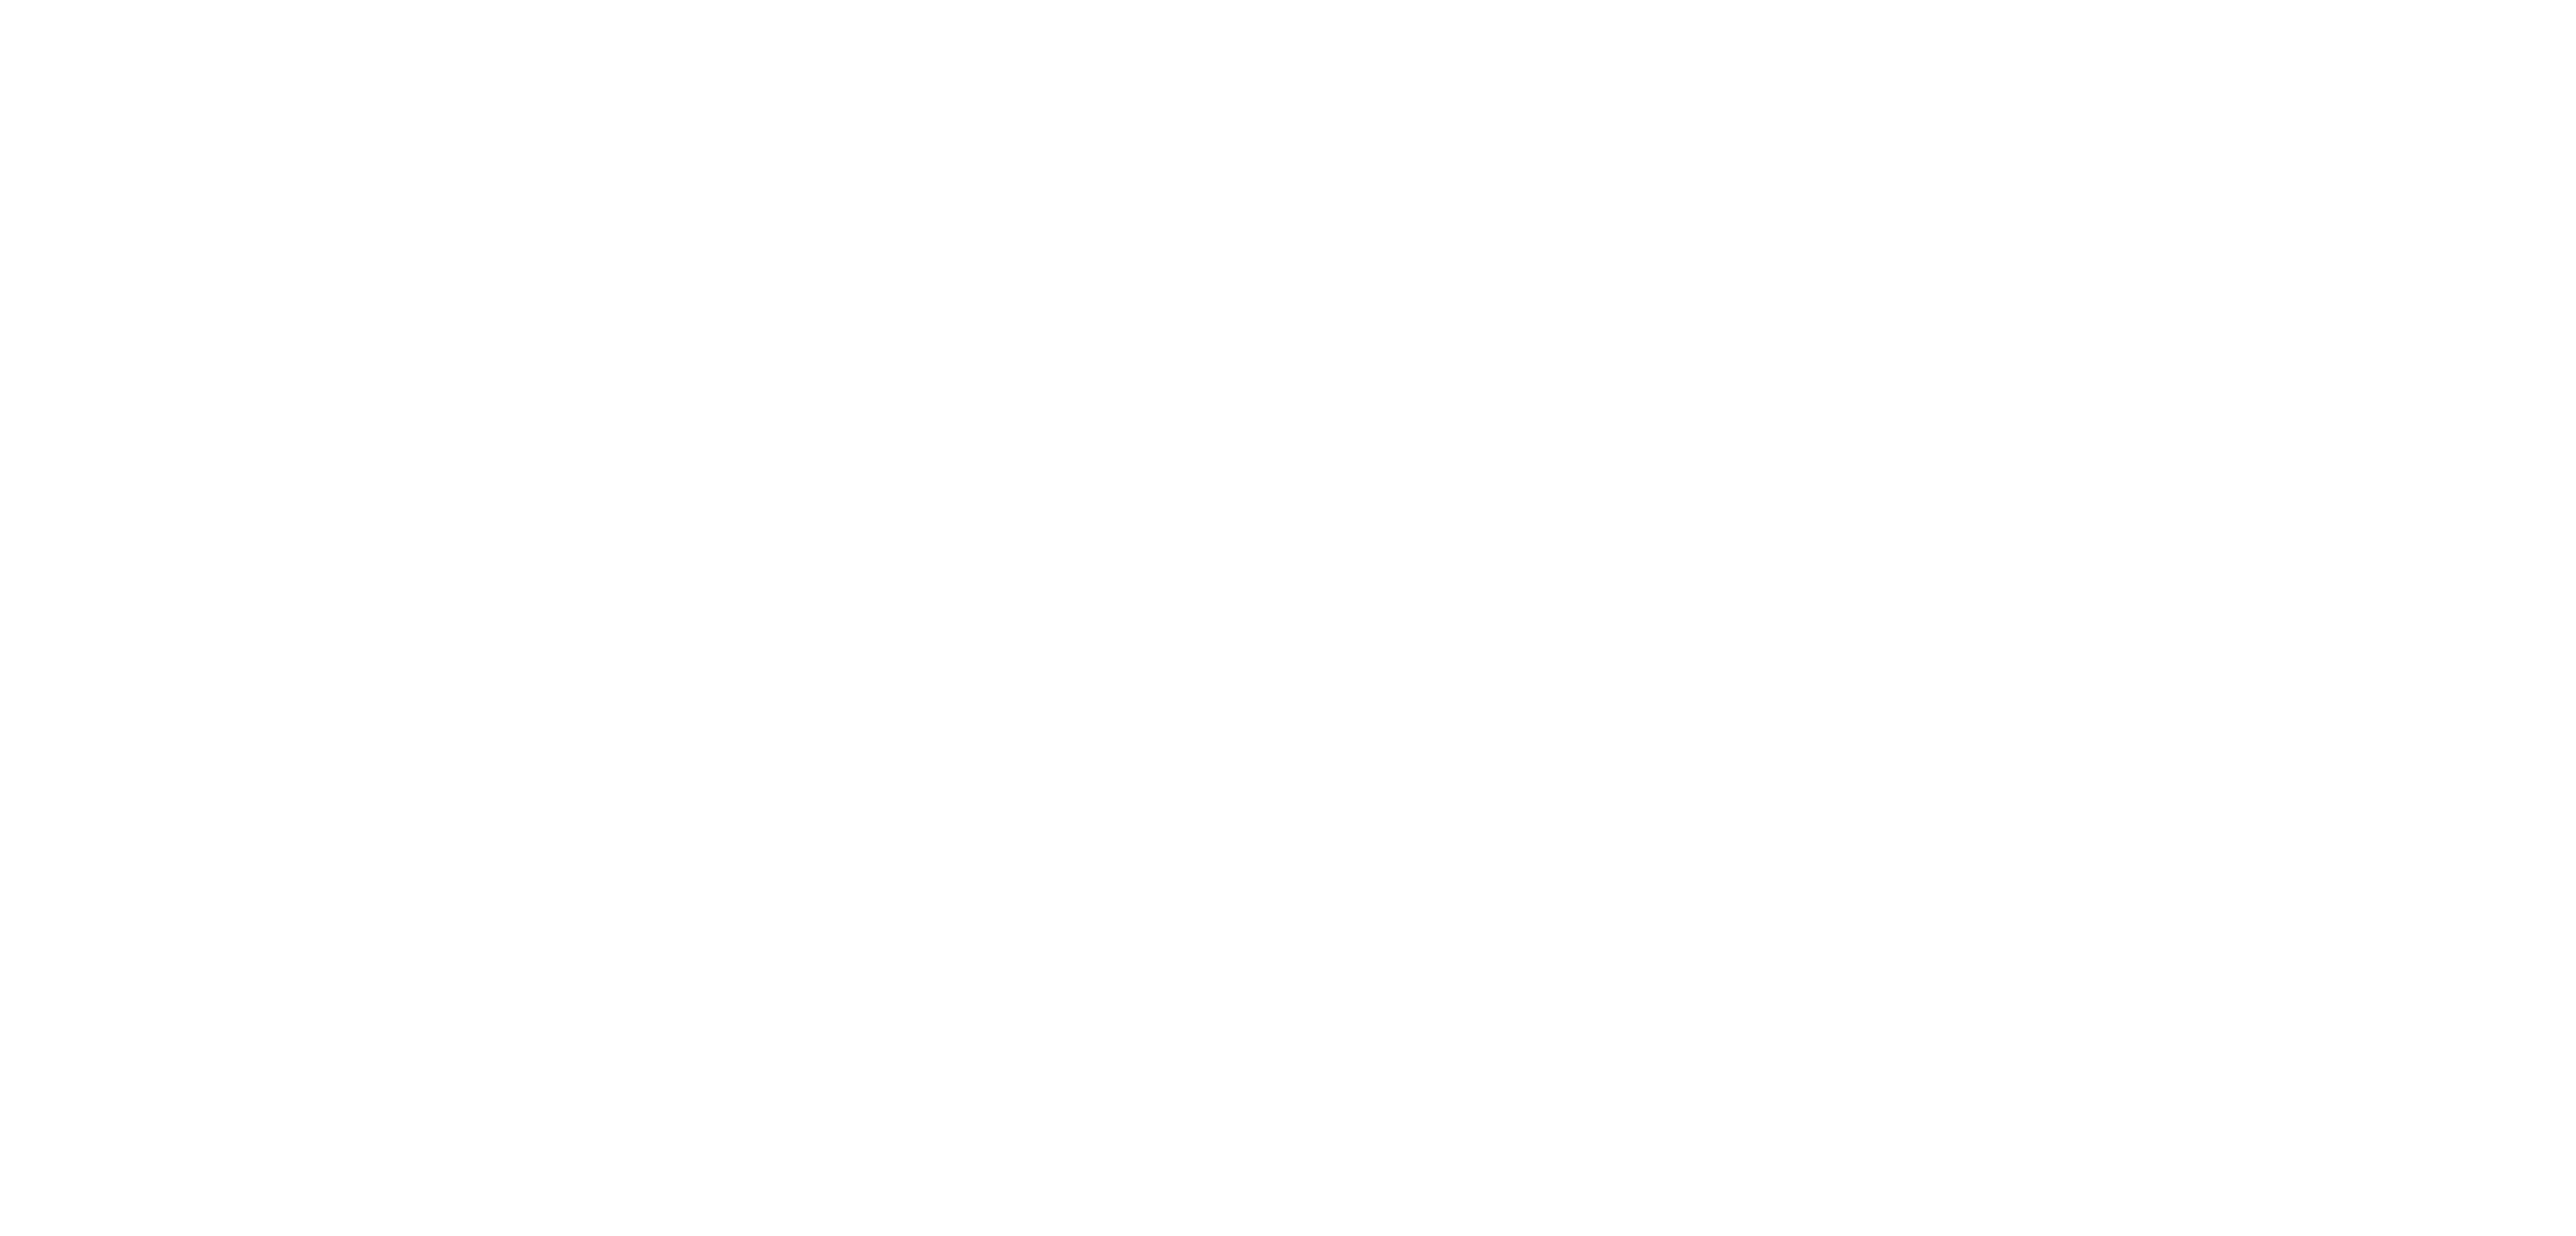

<IPython.core.display.Javascript object>


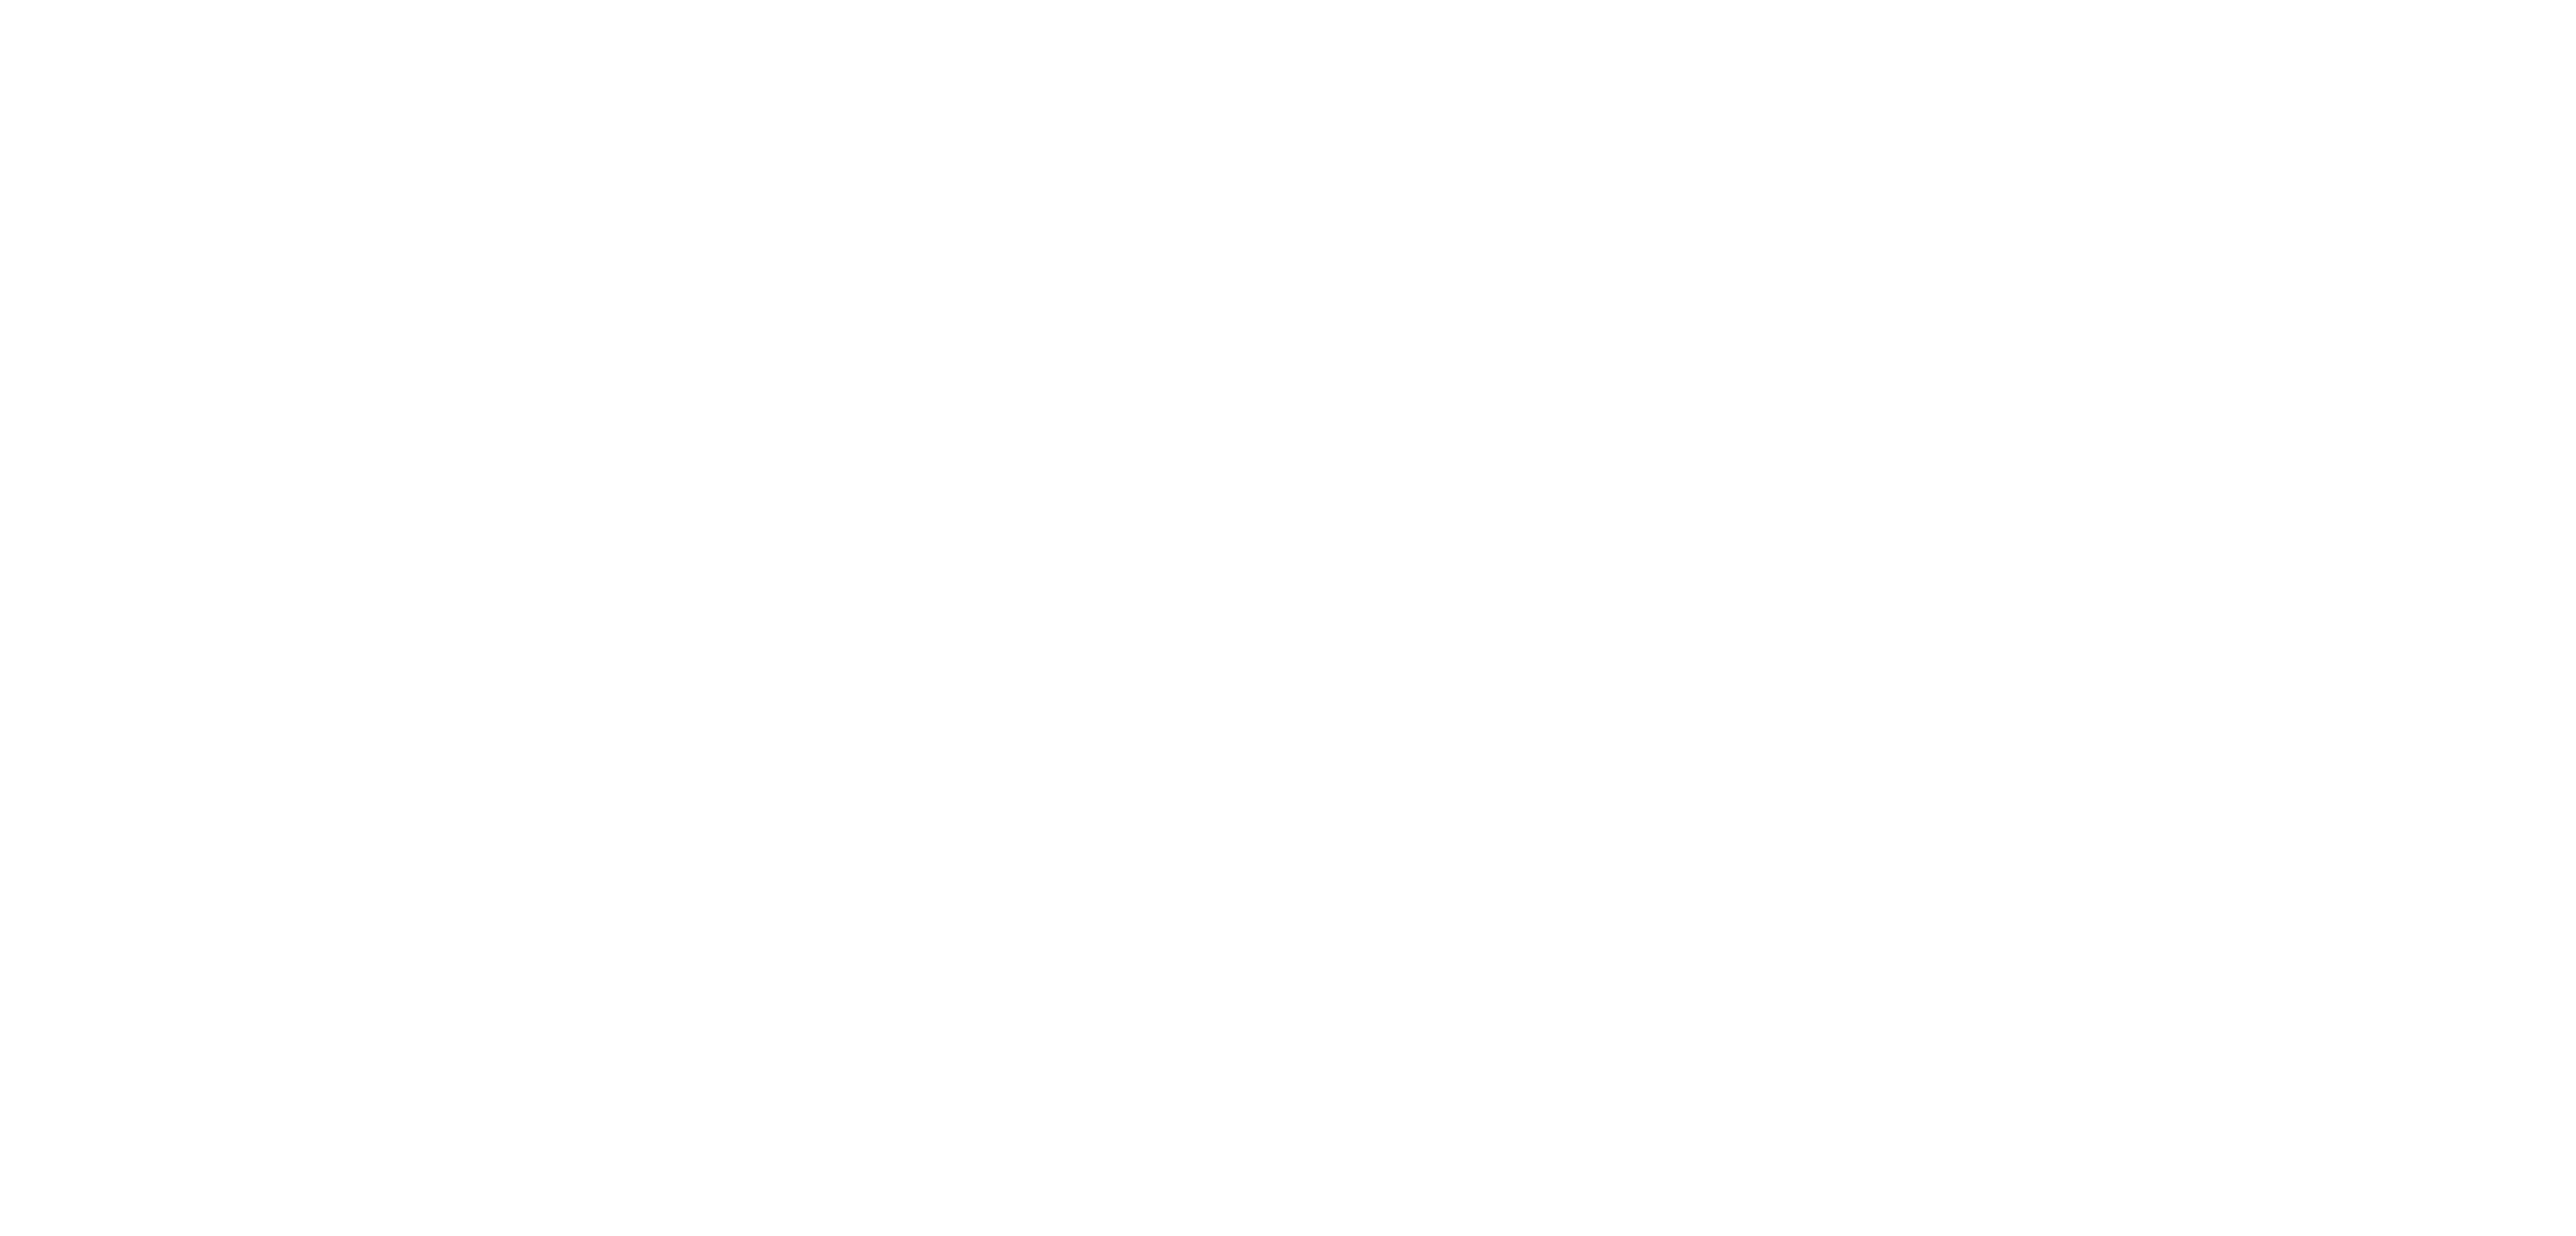

<IPython.core.display.Javascript object>


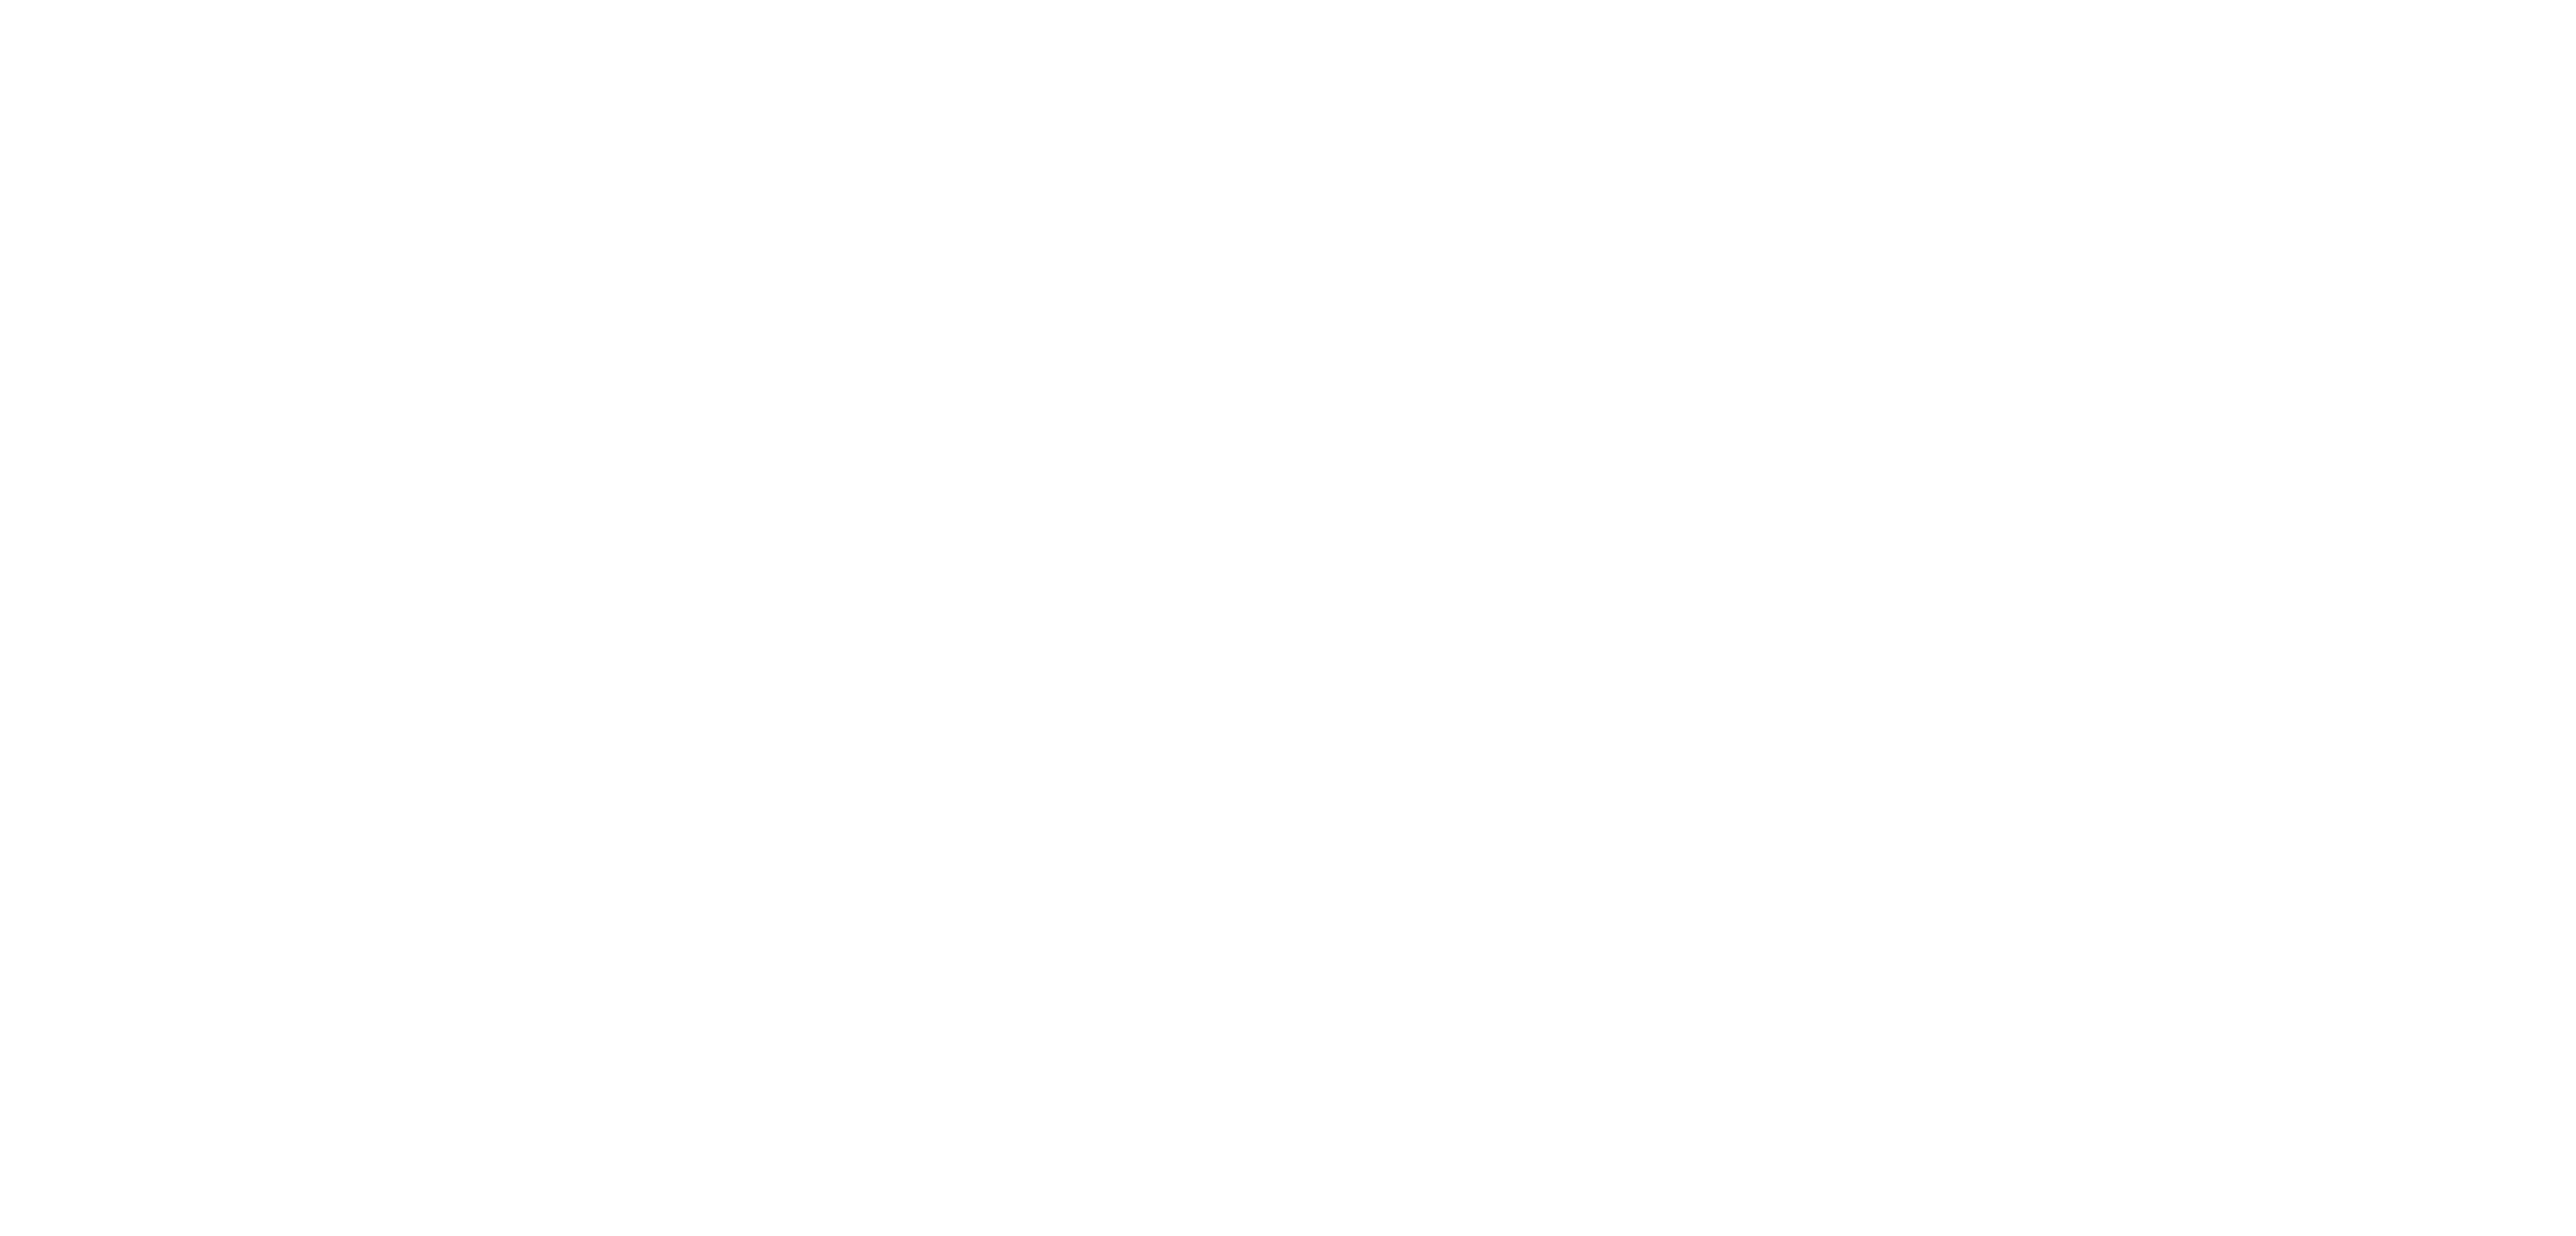

<IPython.core.display.Javascript object>


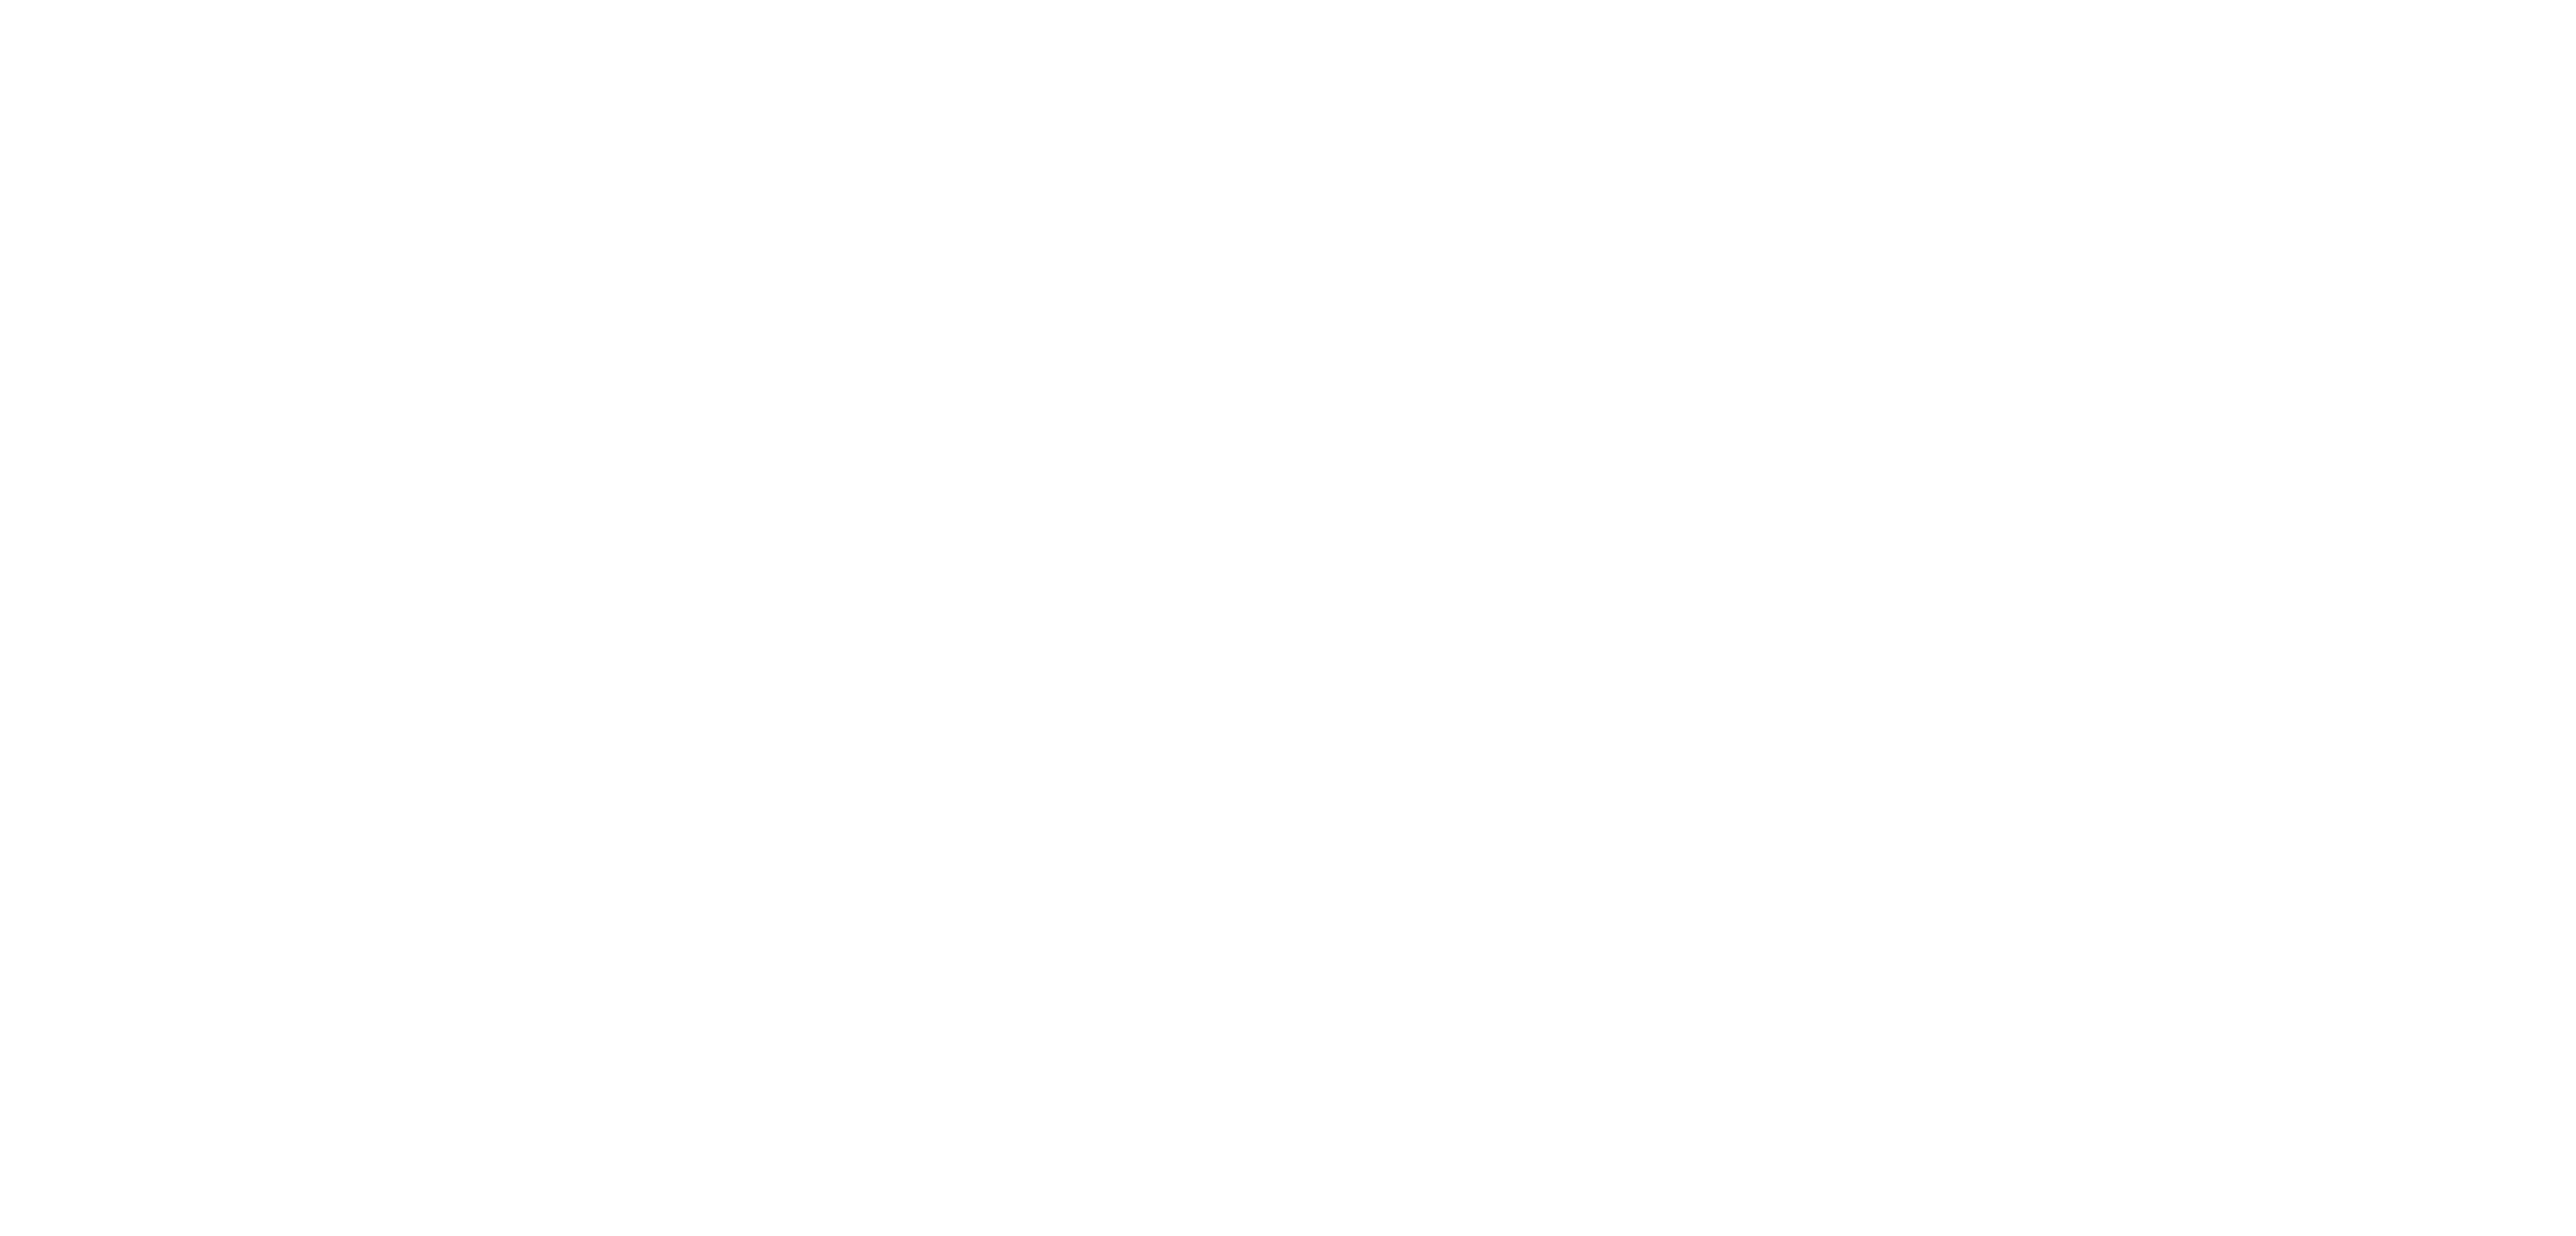

<IPython.core.display.Javascript object>


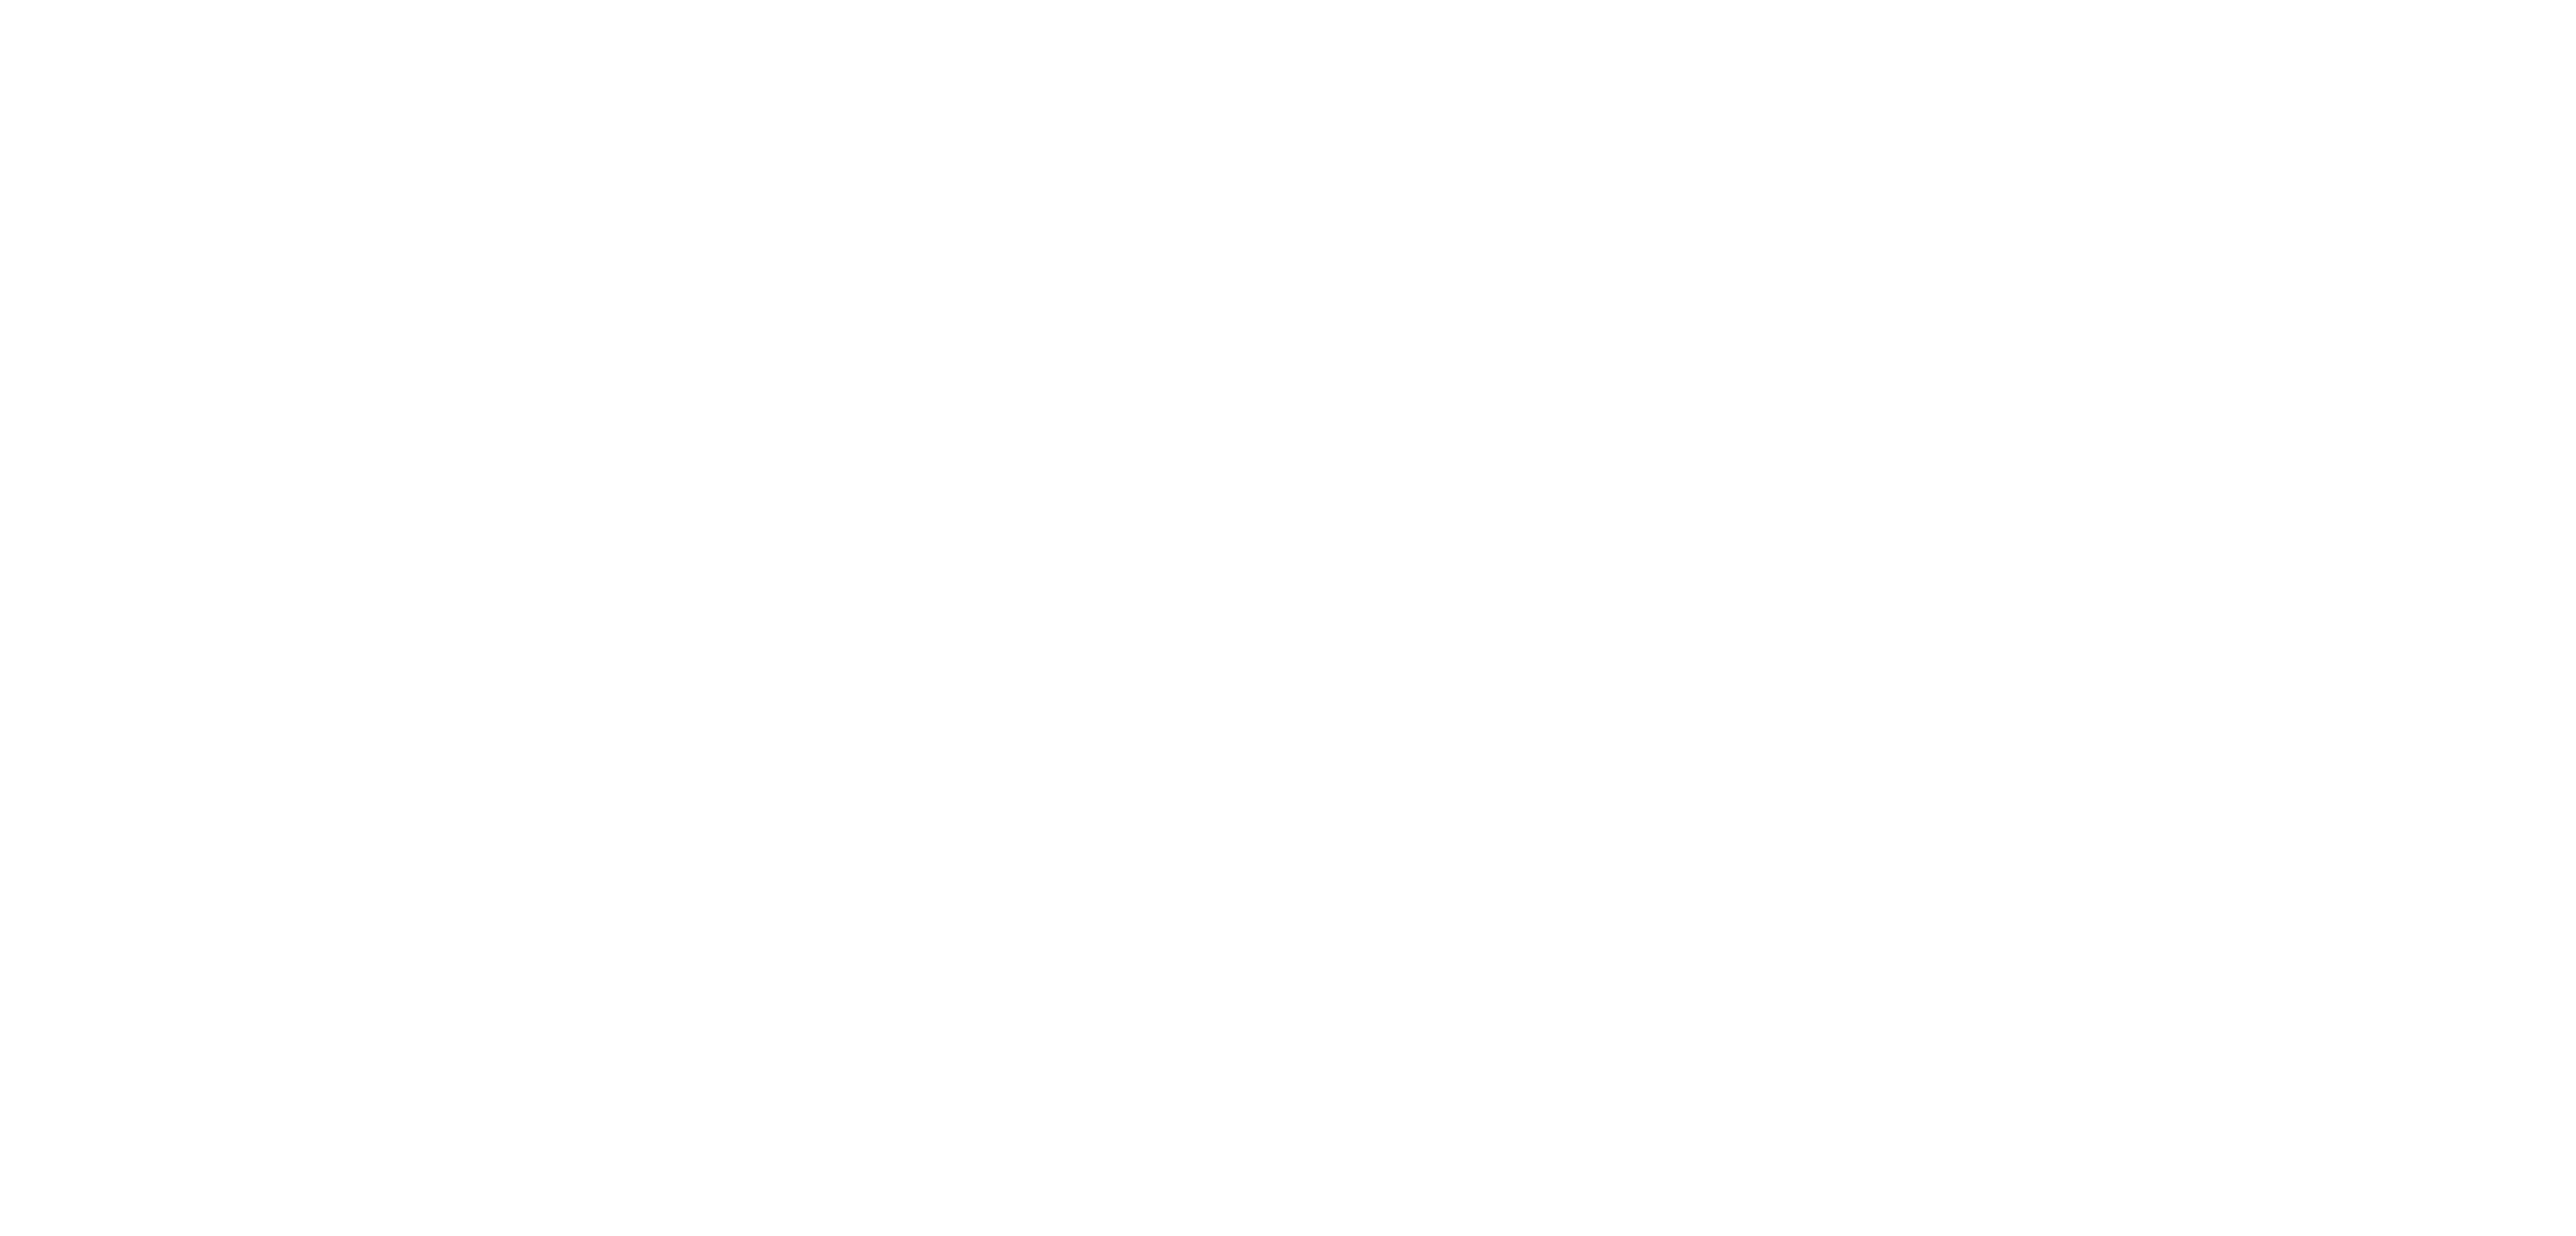

<IPython.core.display.Javascript object>


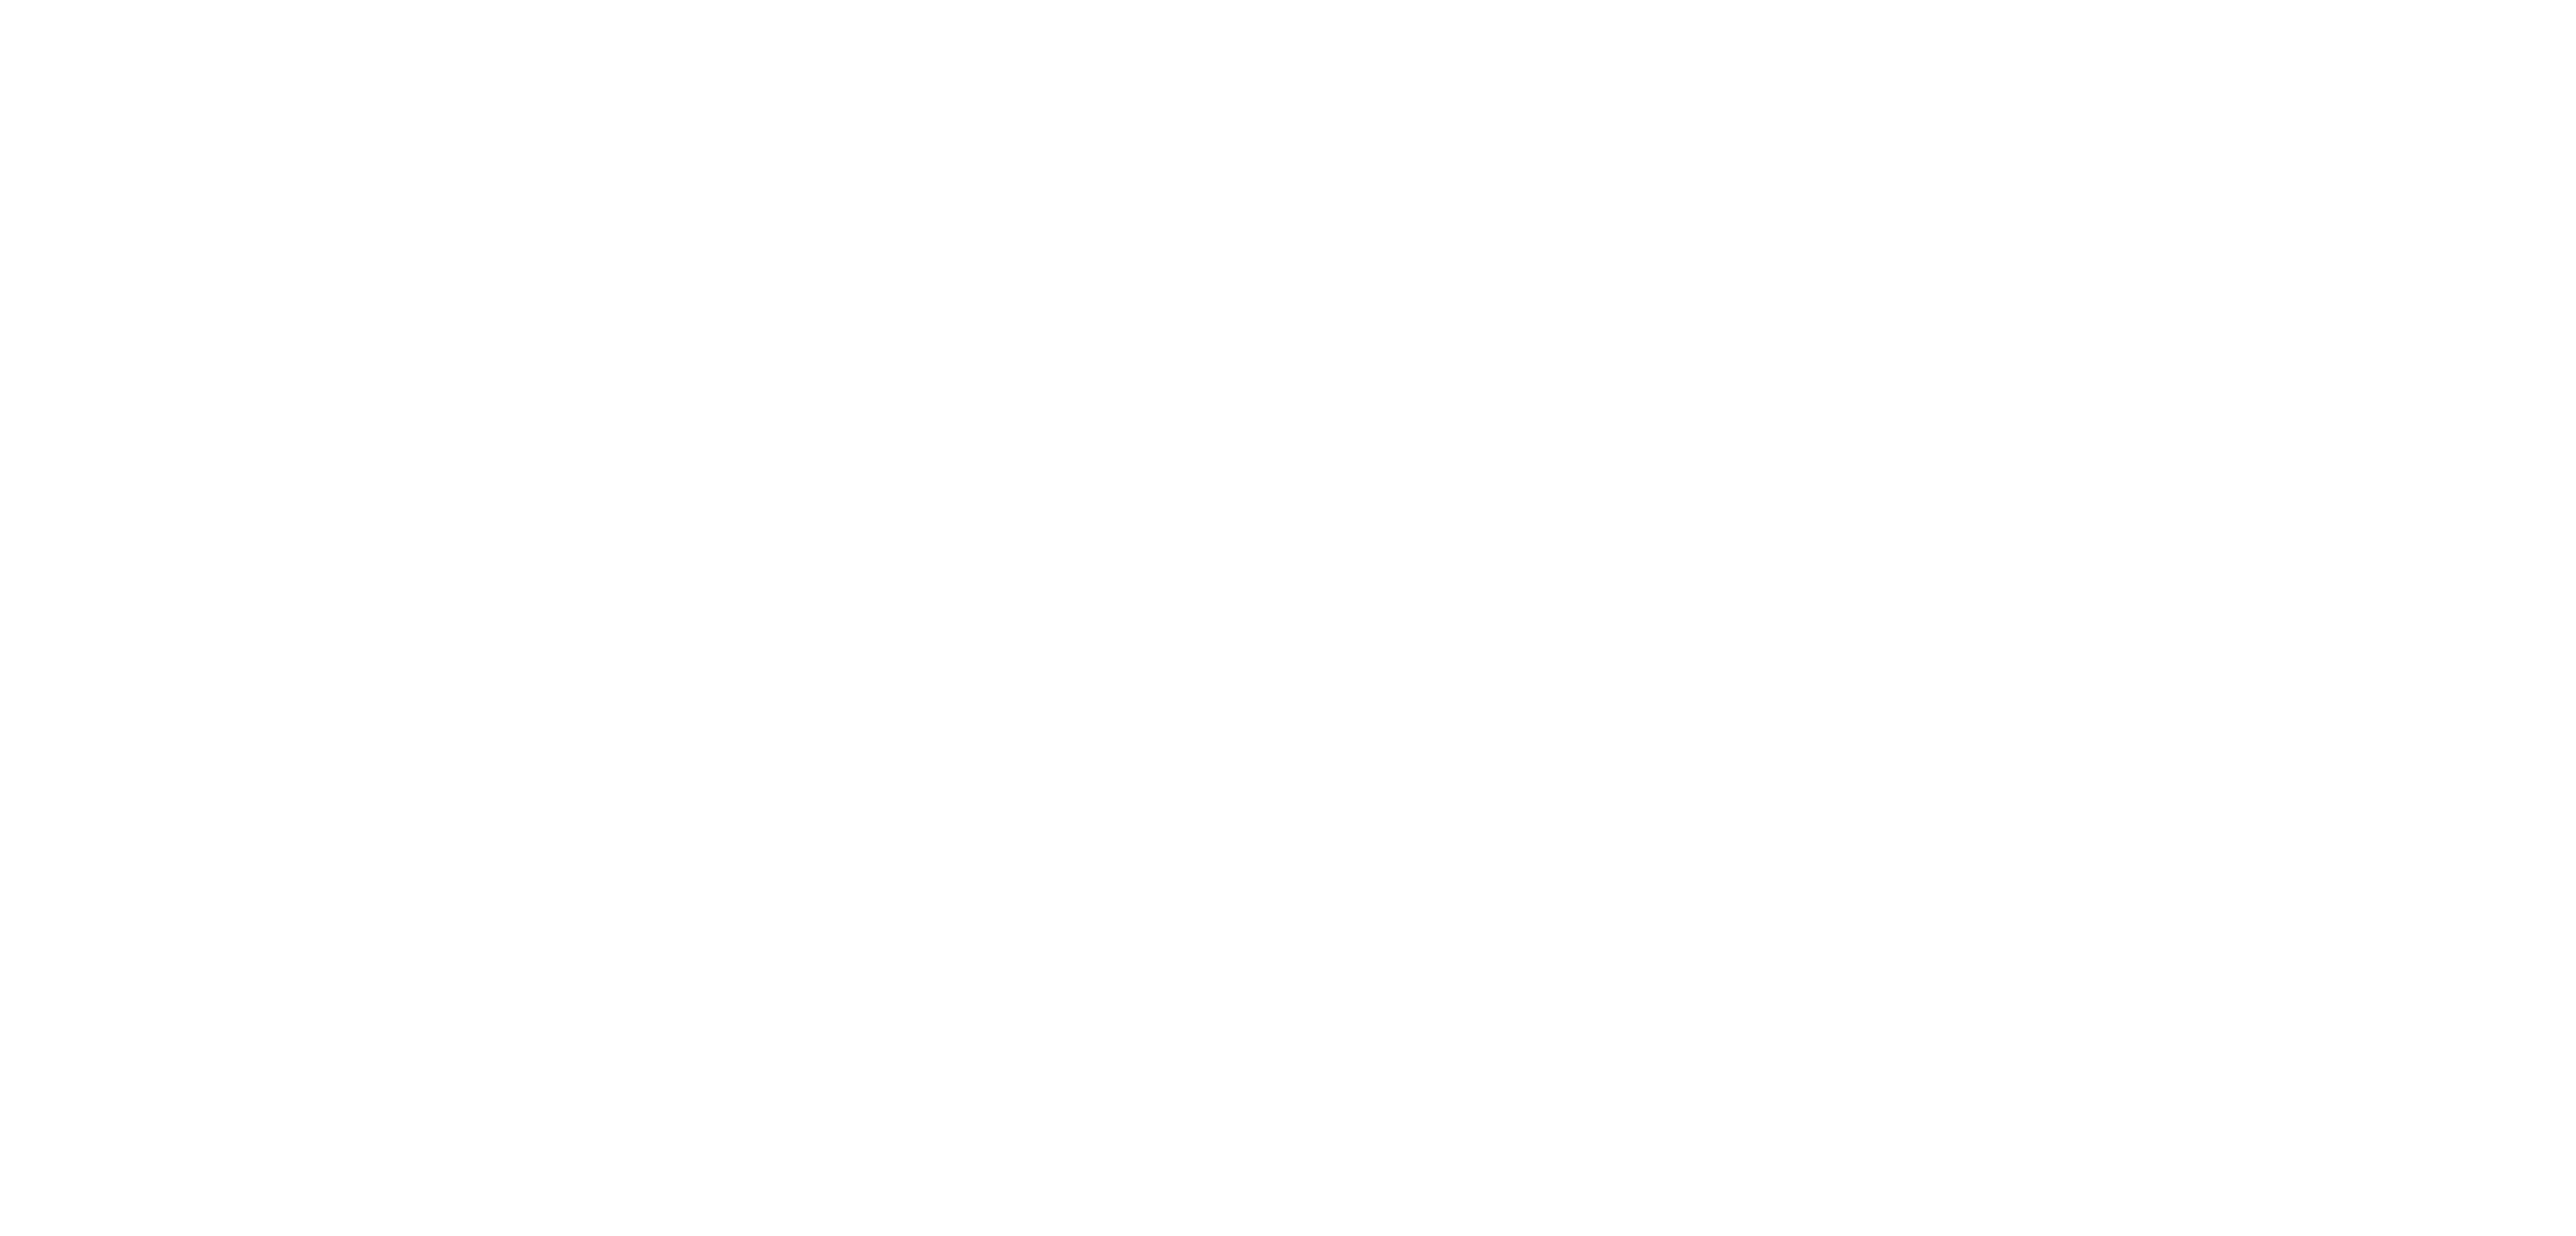

<IPython.core.display.Javascript object>


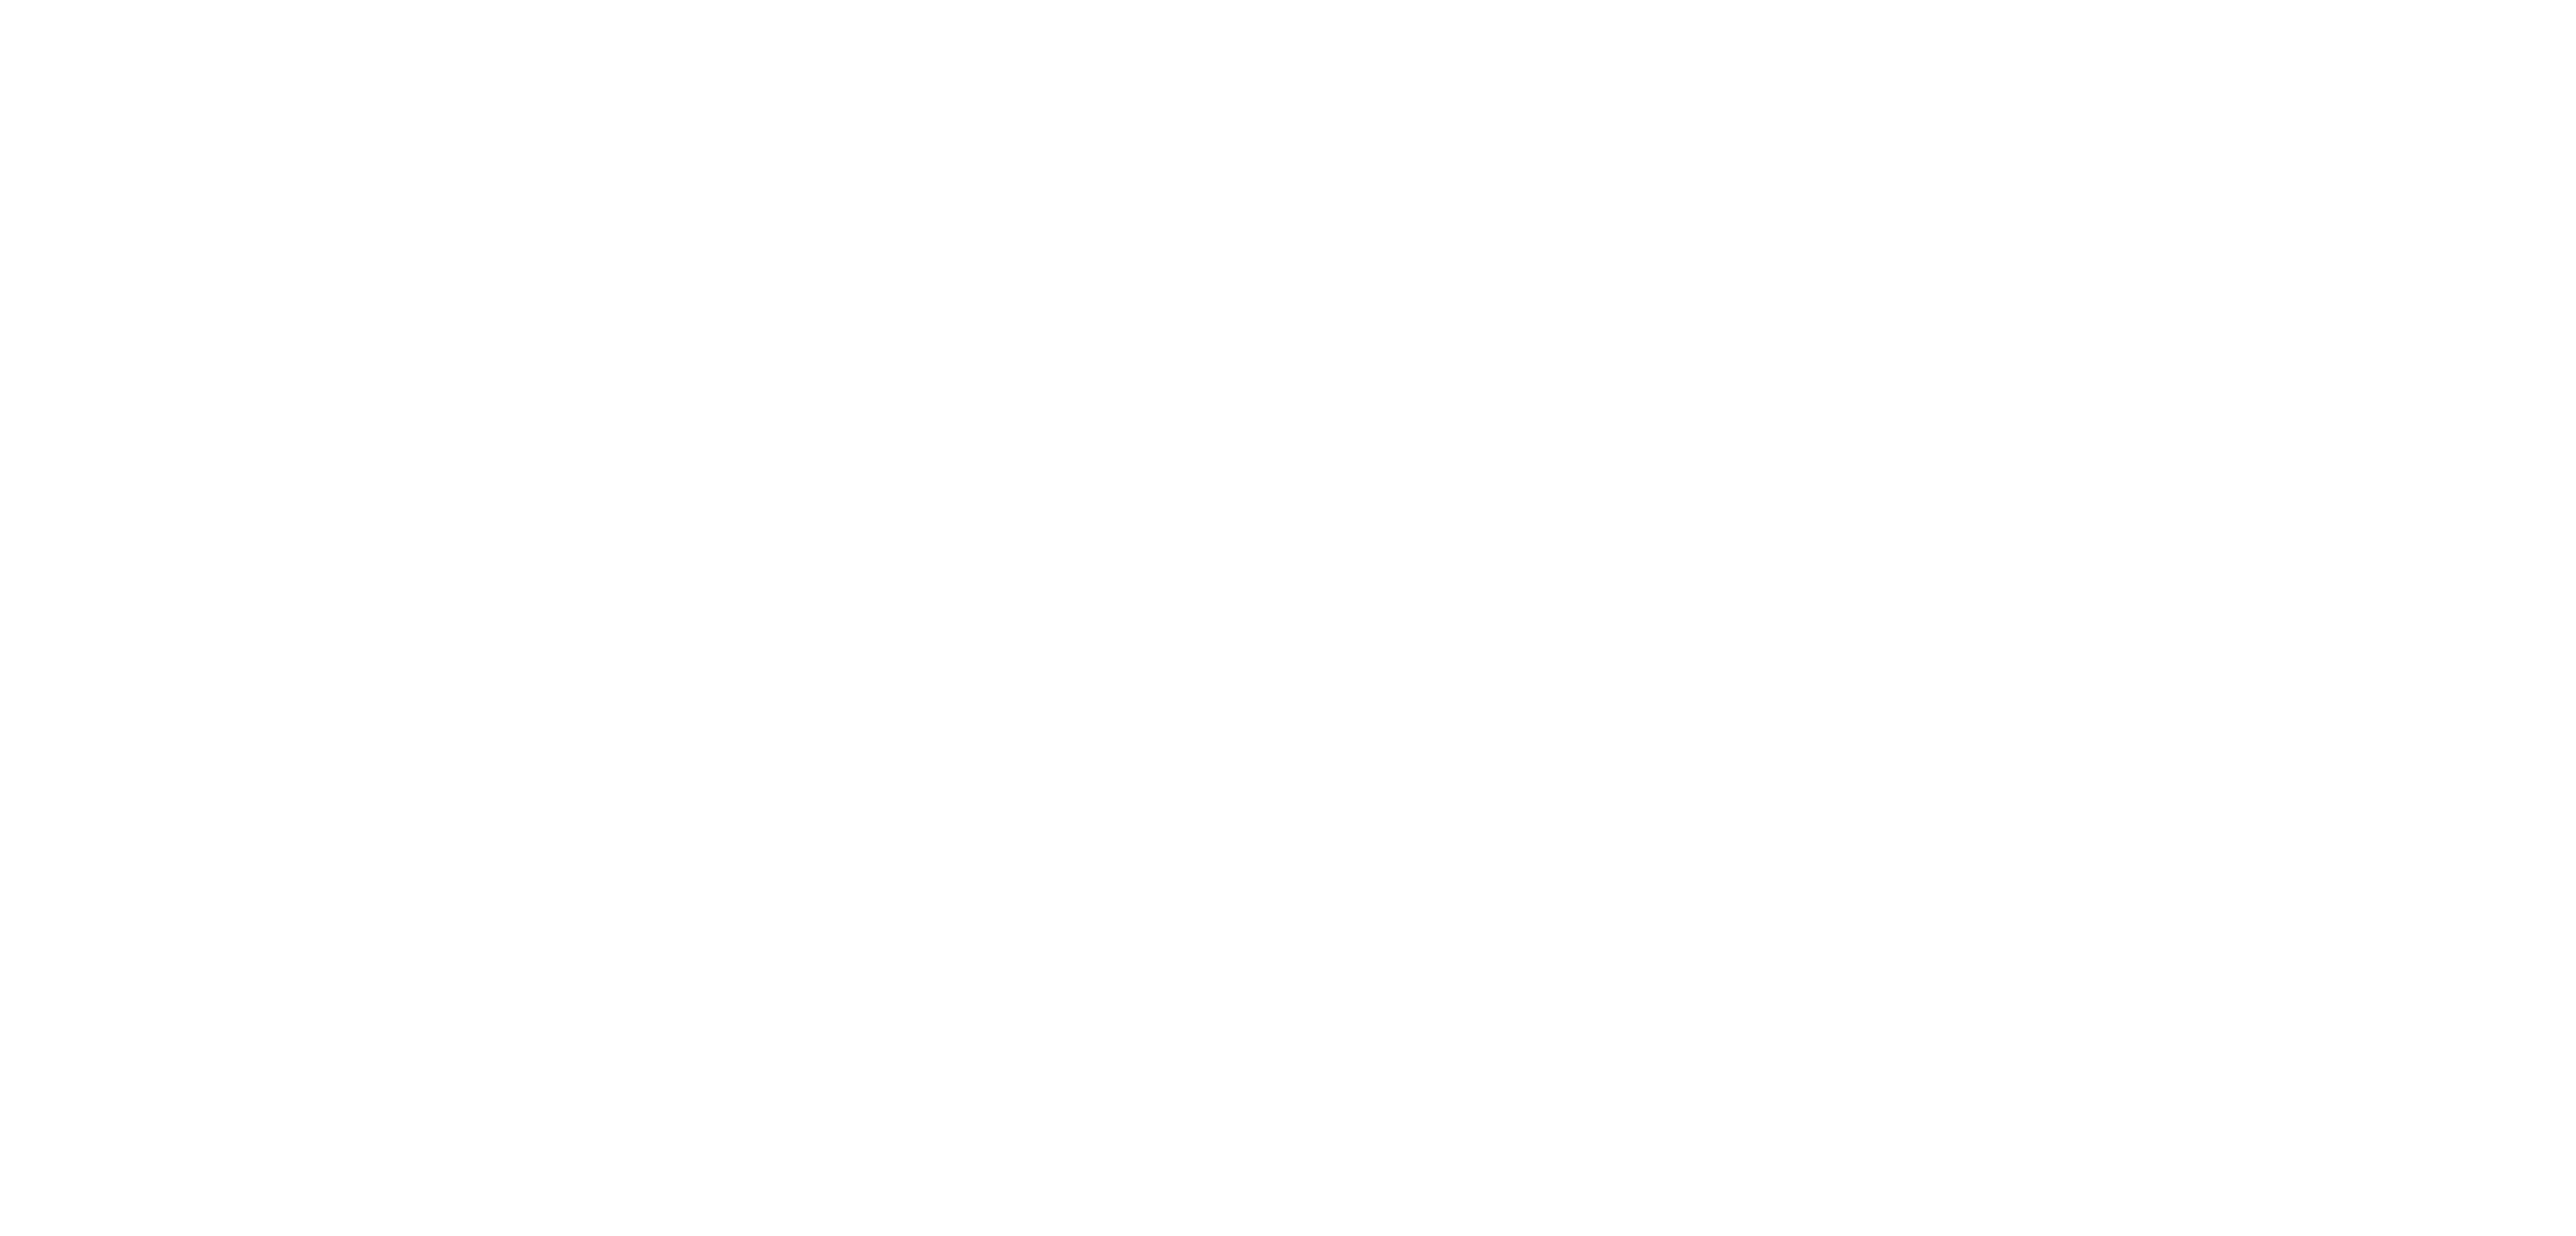

<IPython.core.display.Javascript object>


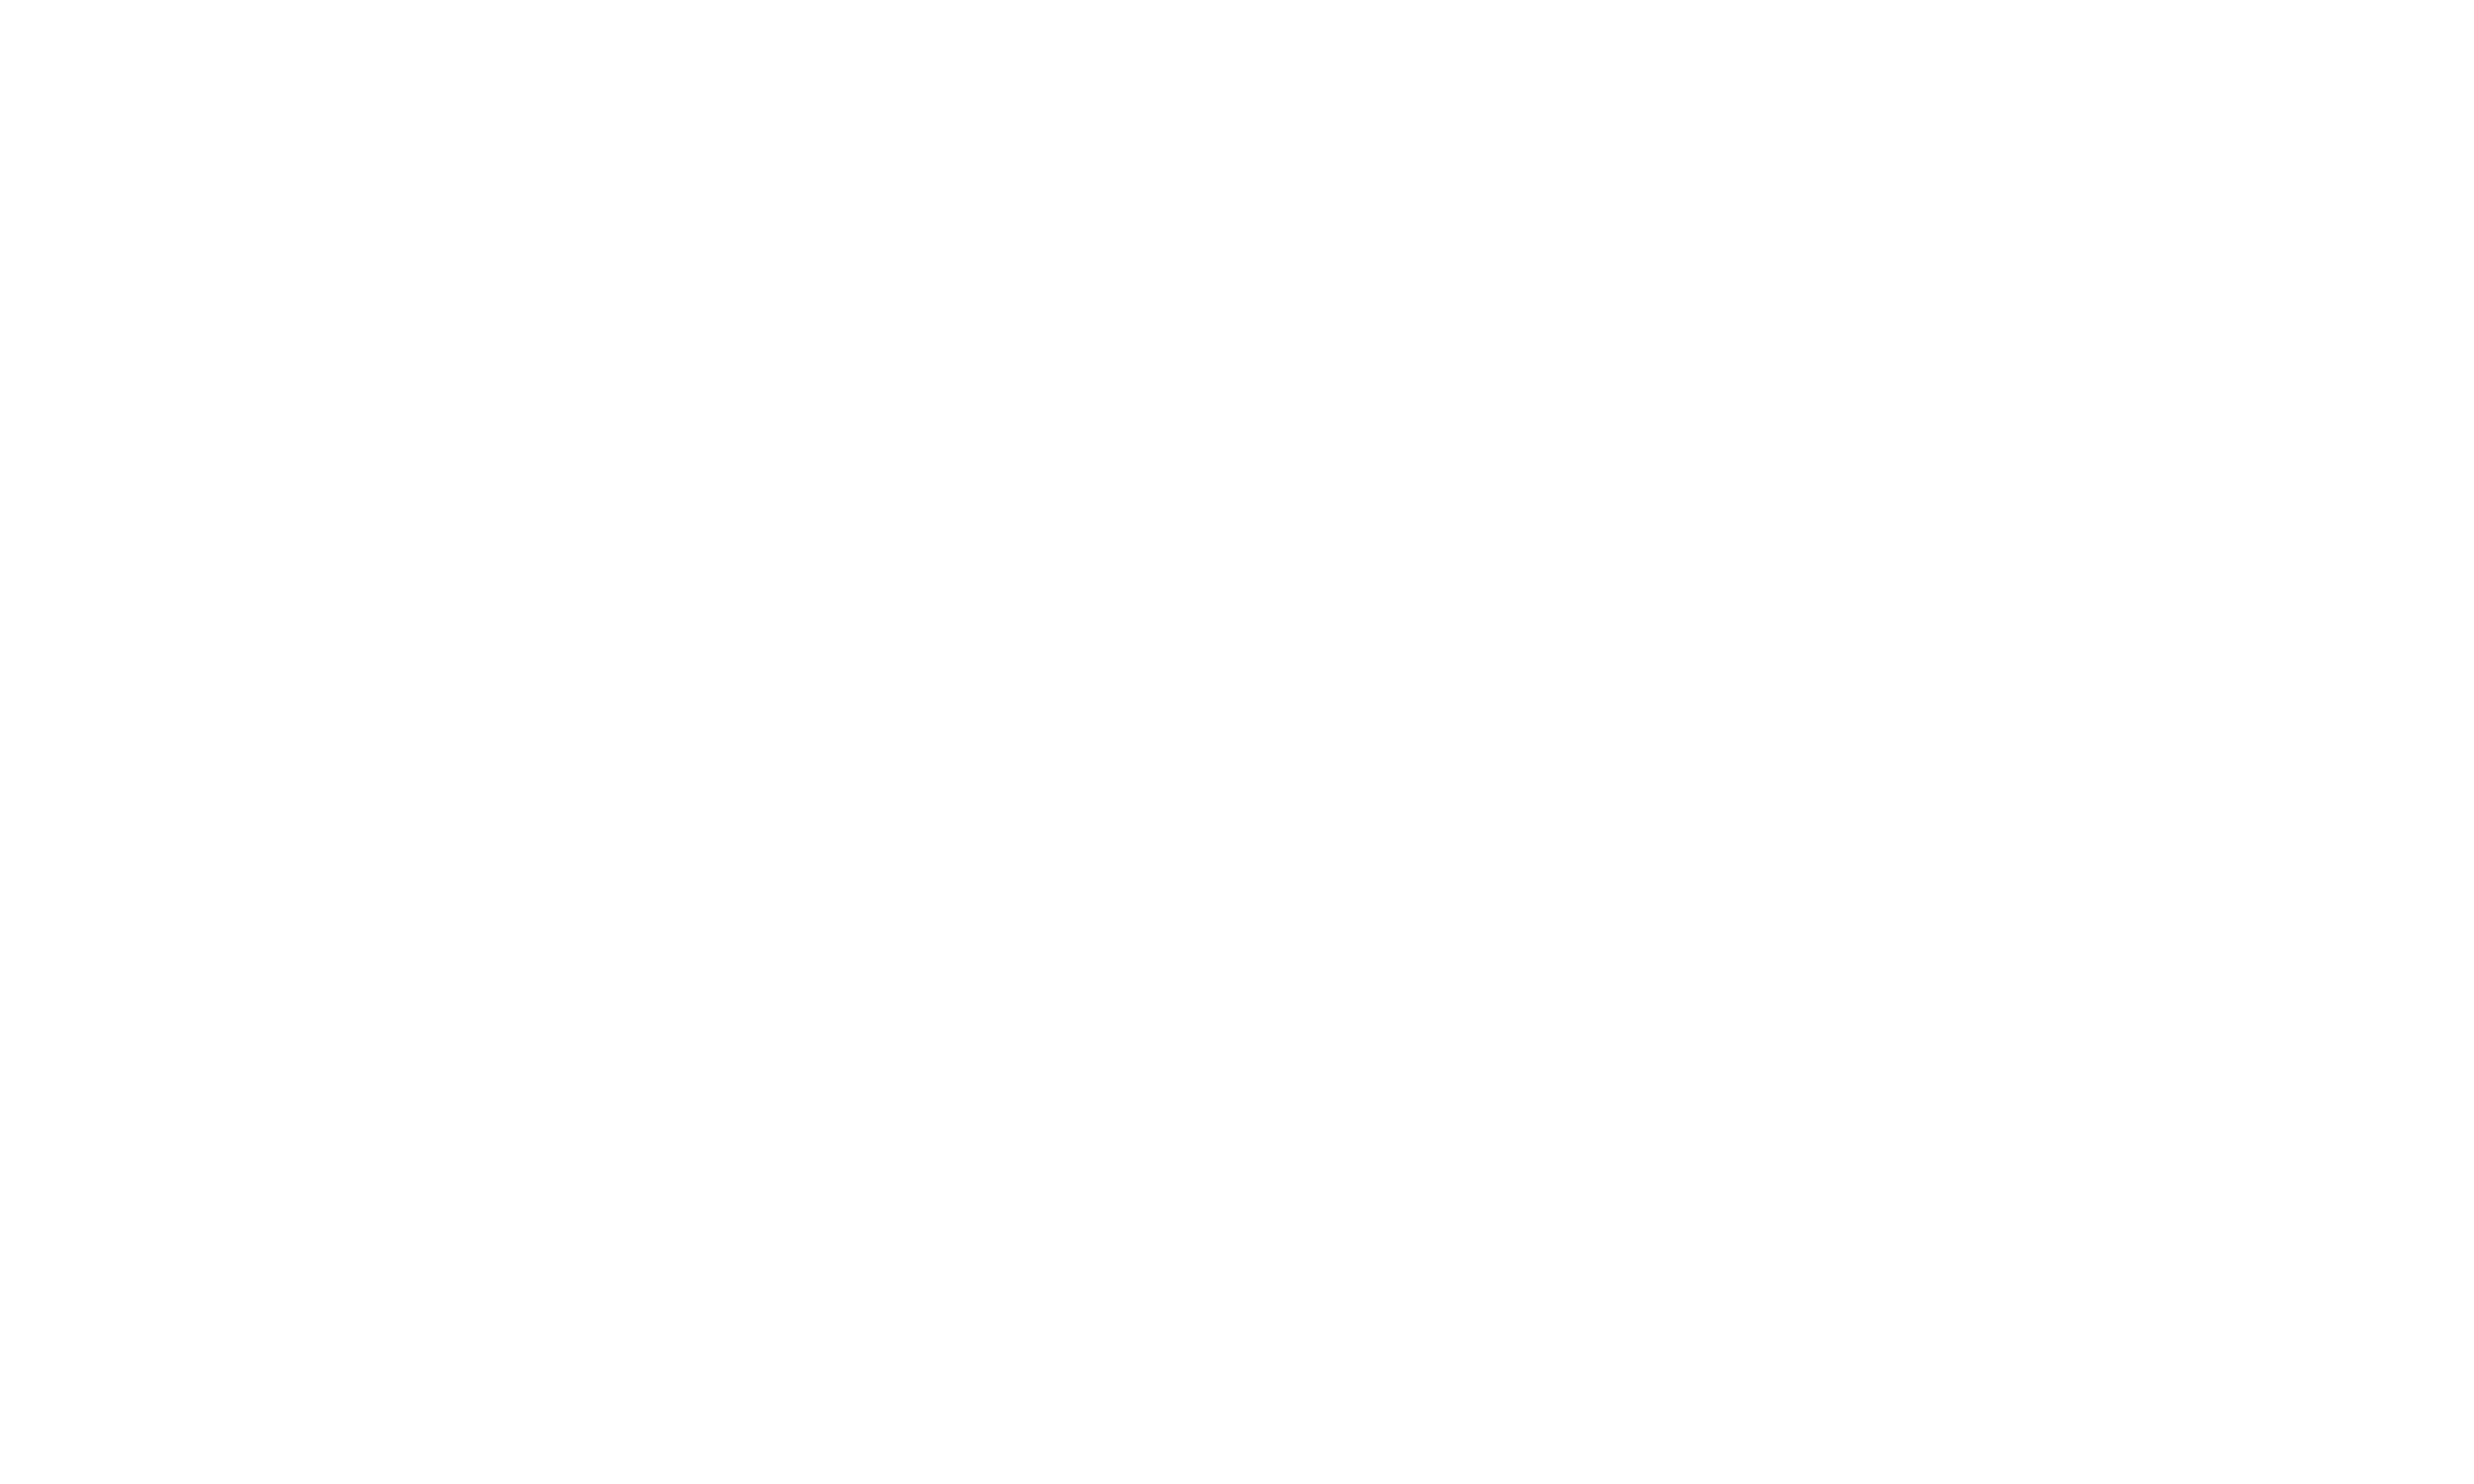

<IPython.core.display.Javascript object>


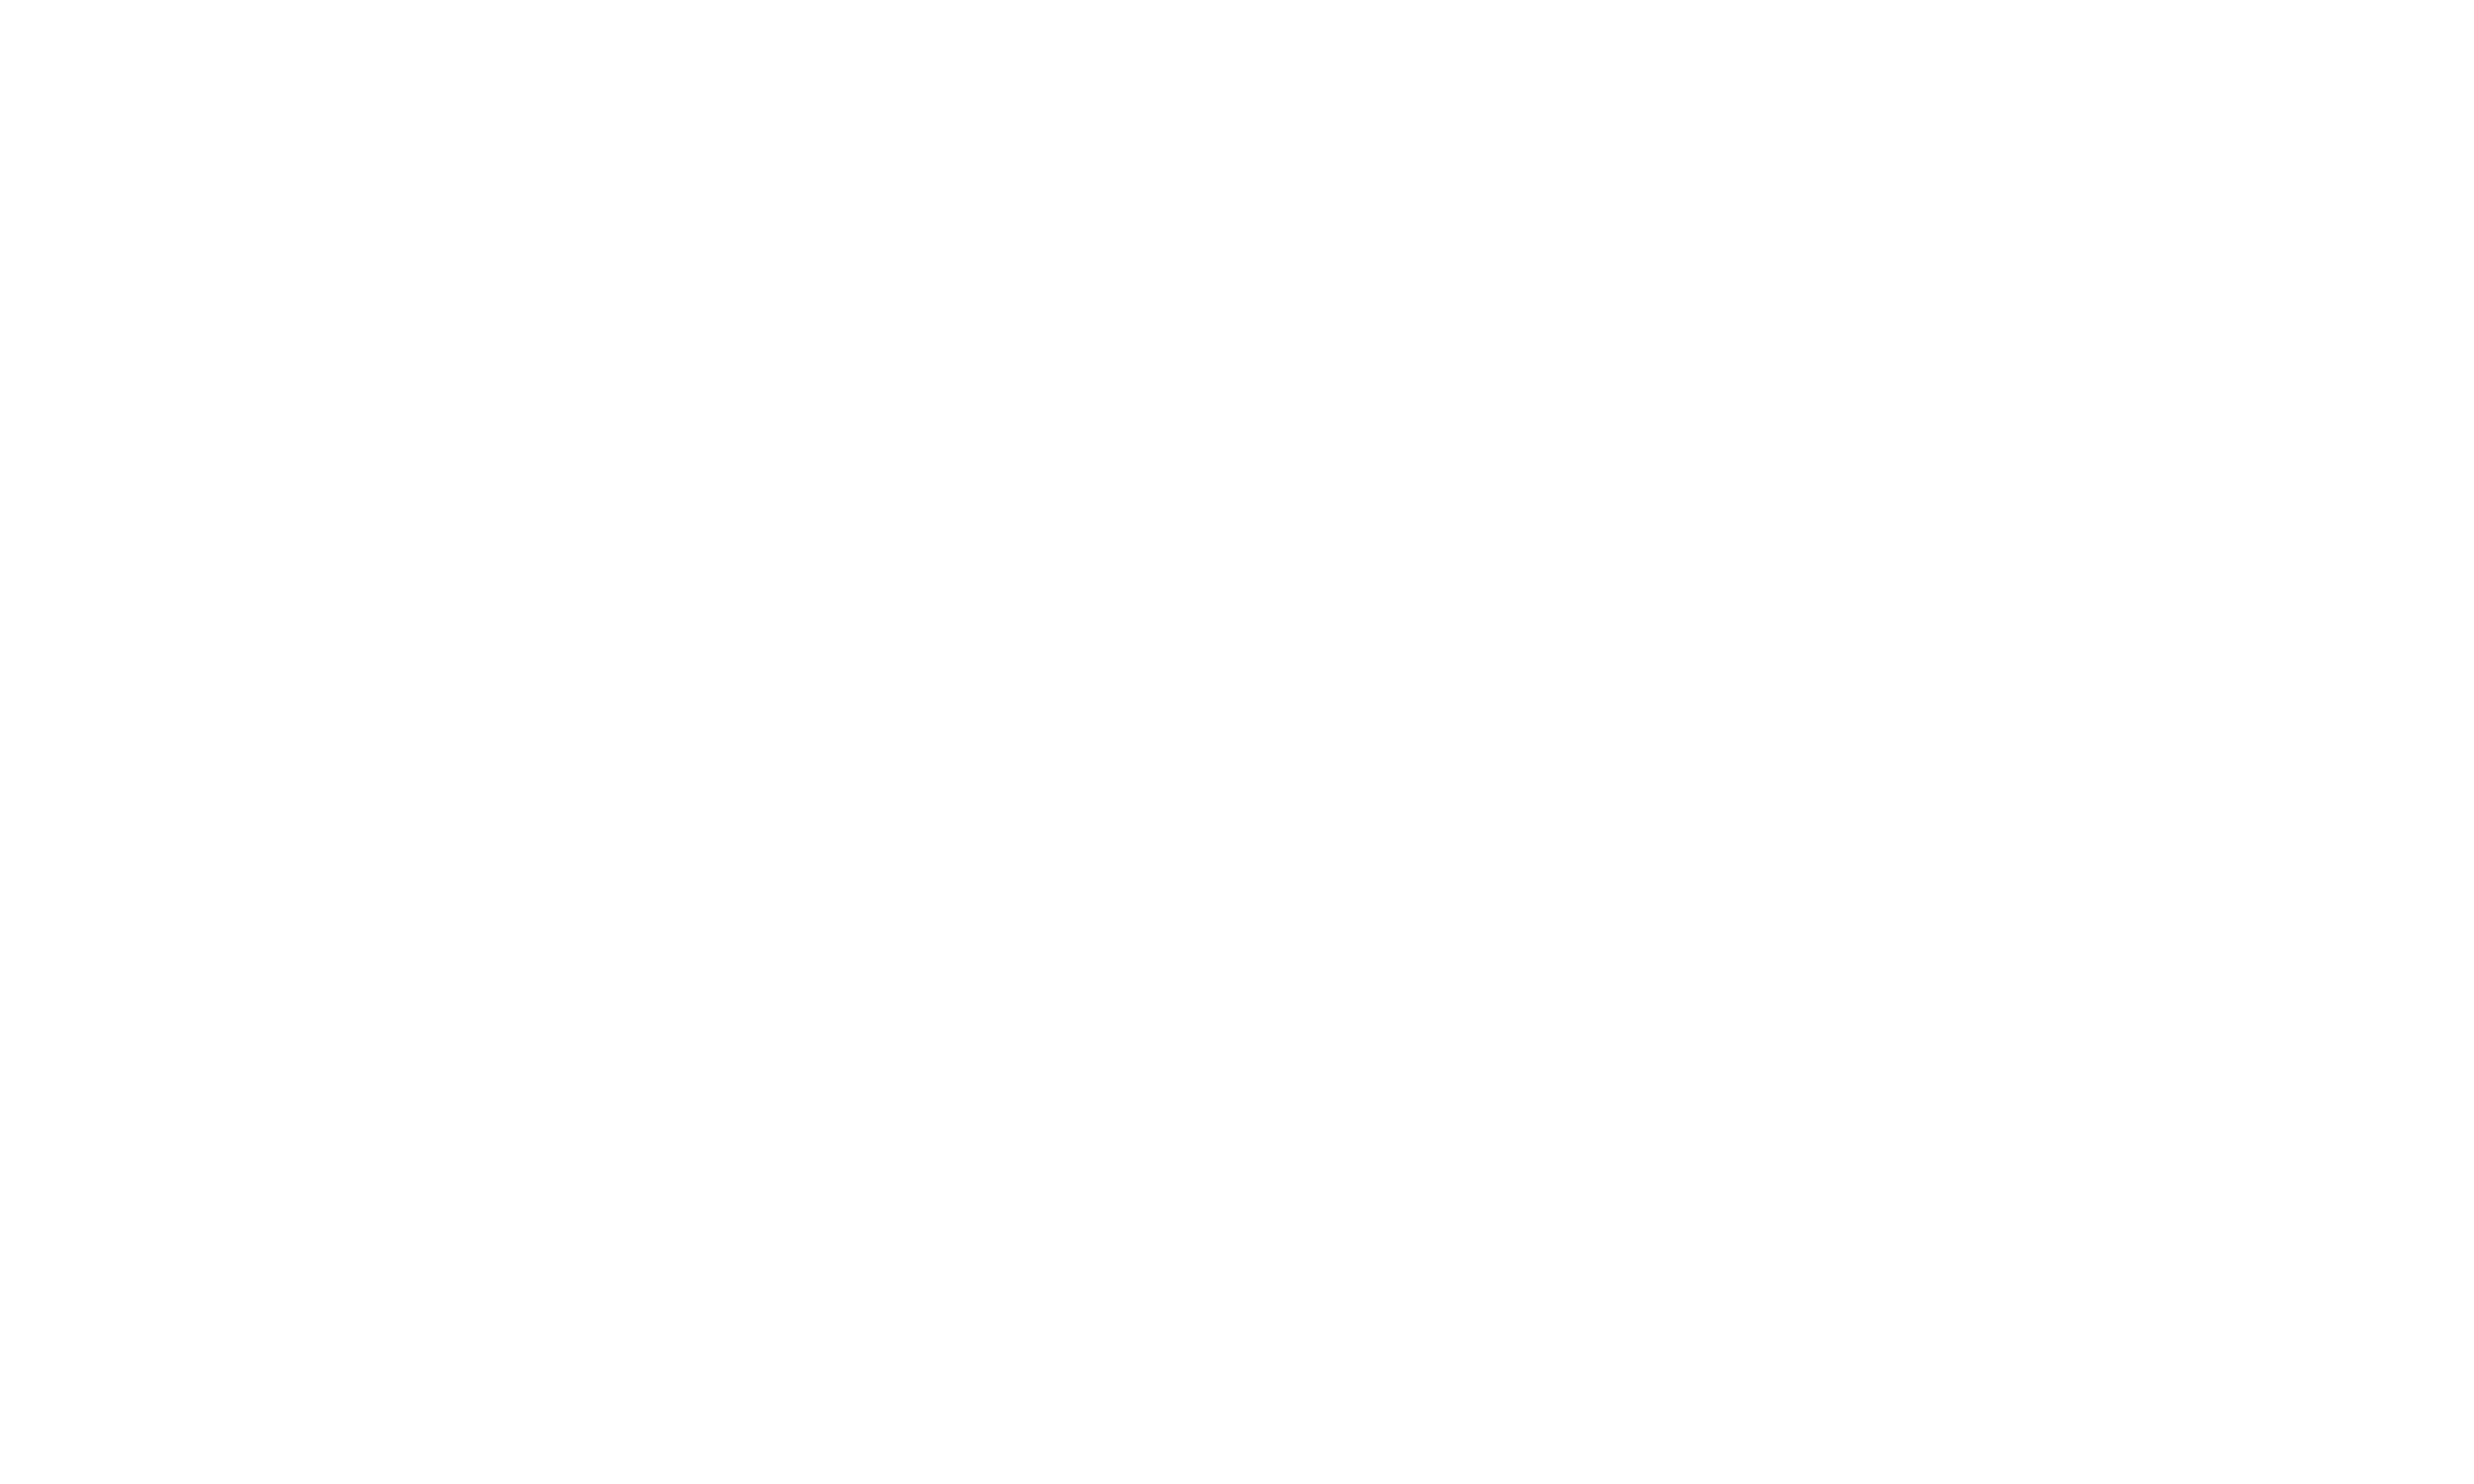

<IPython.core.display.Javascript object>


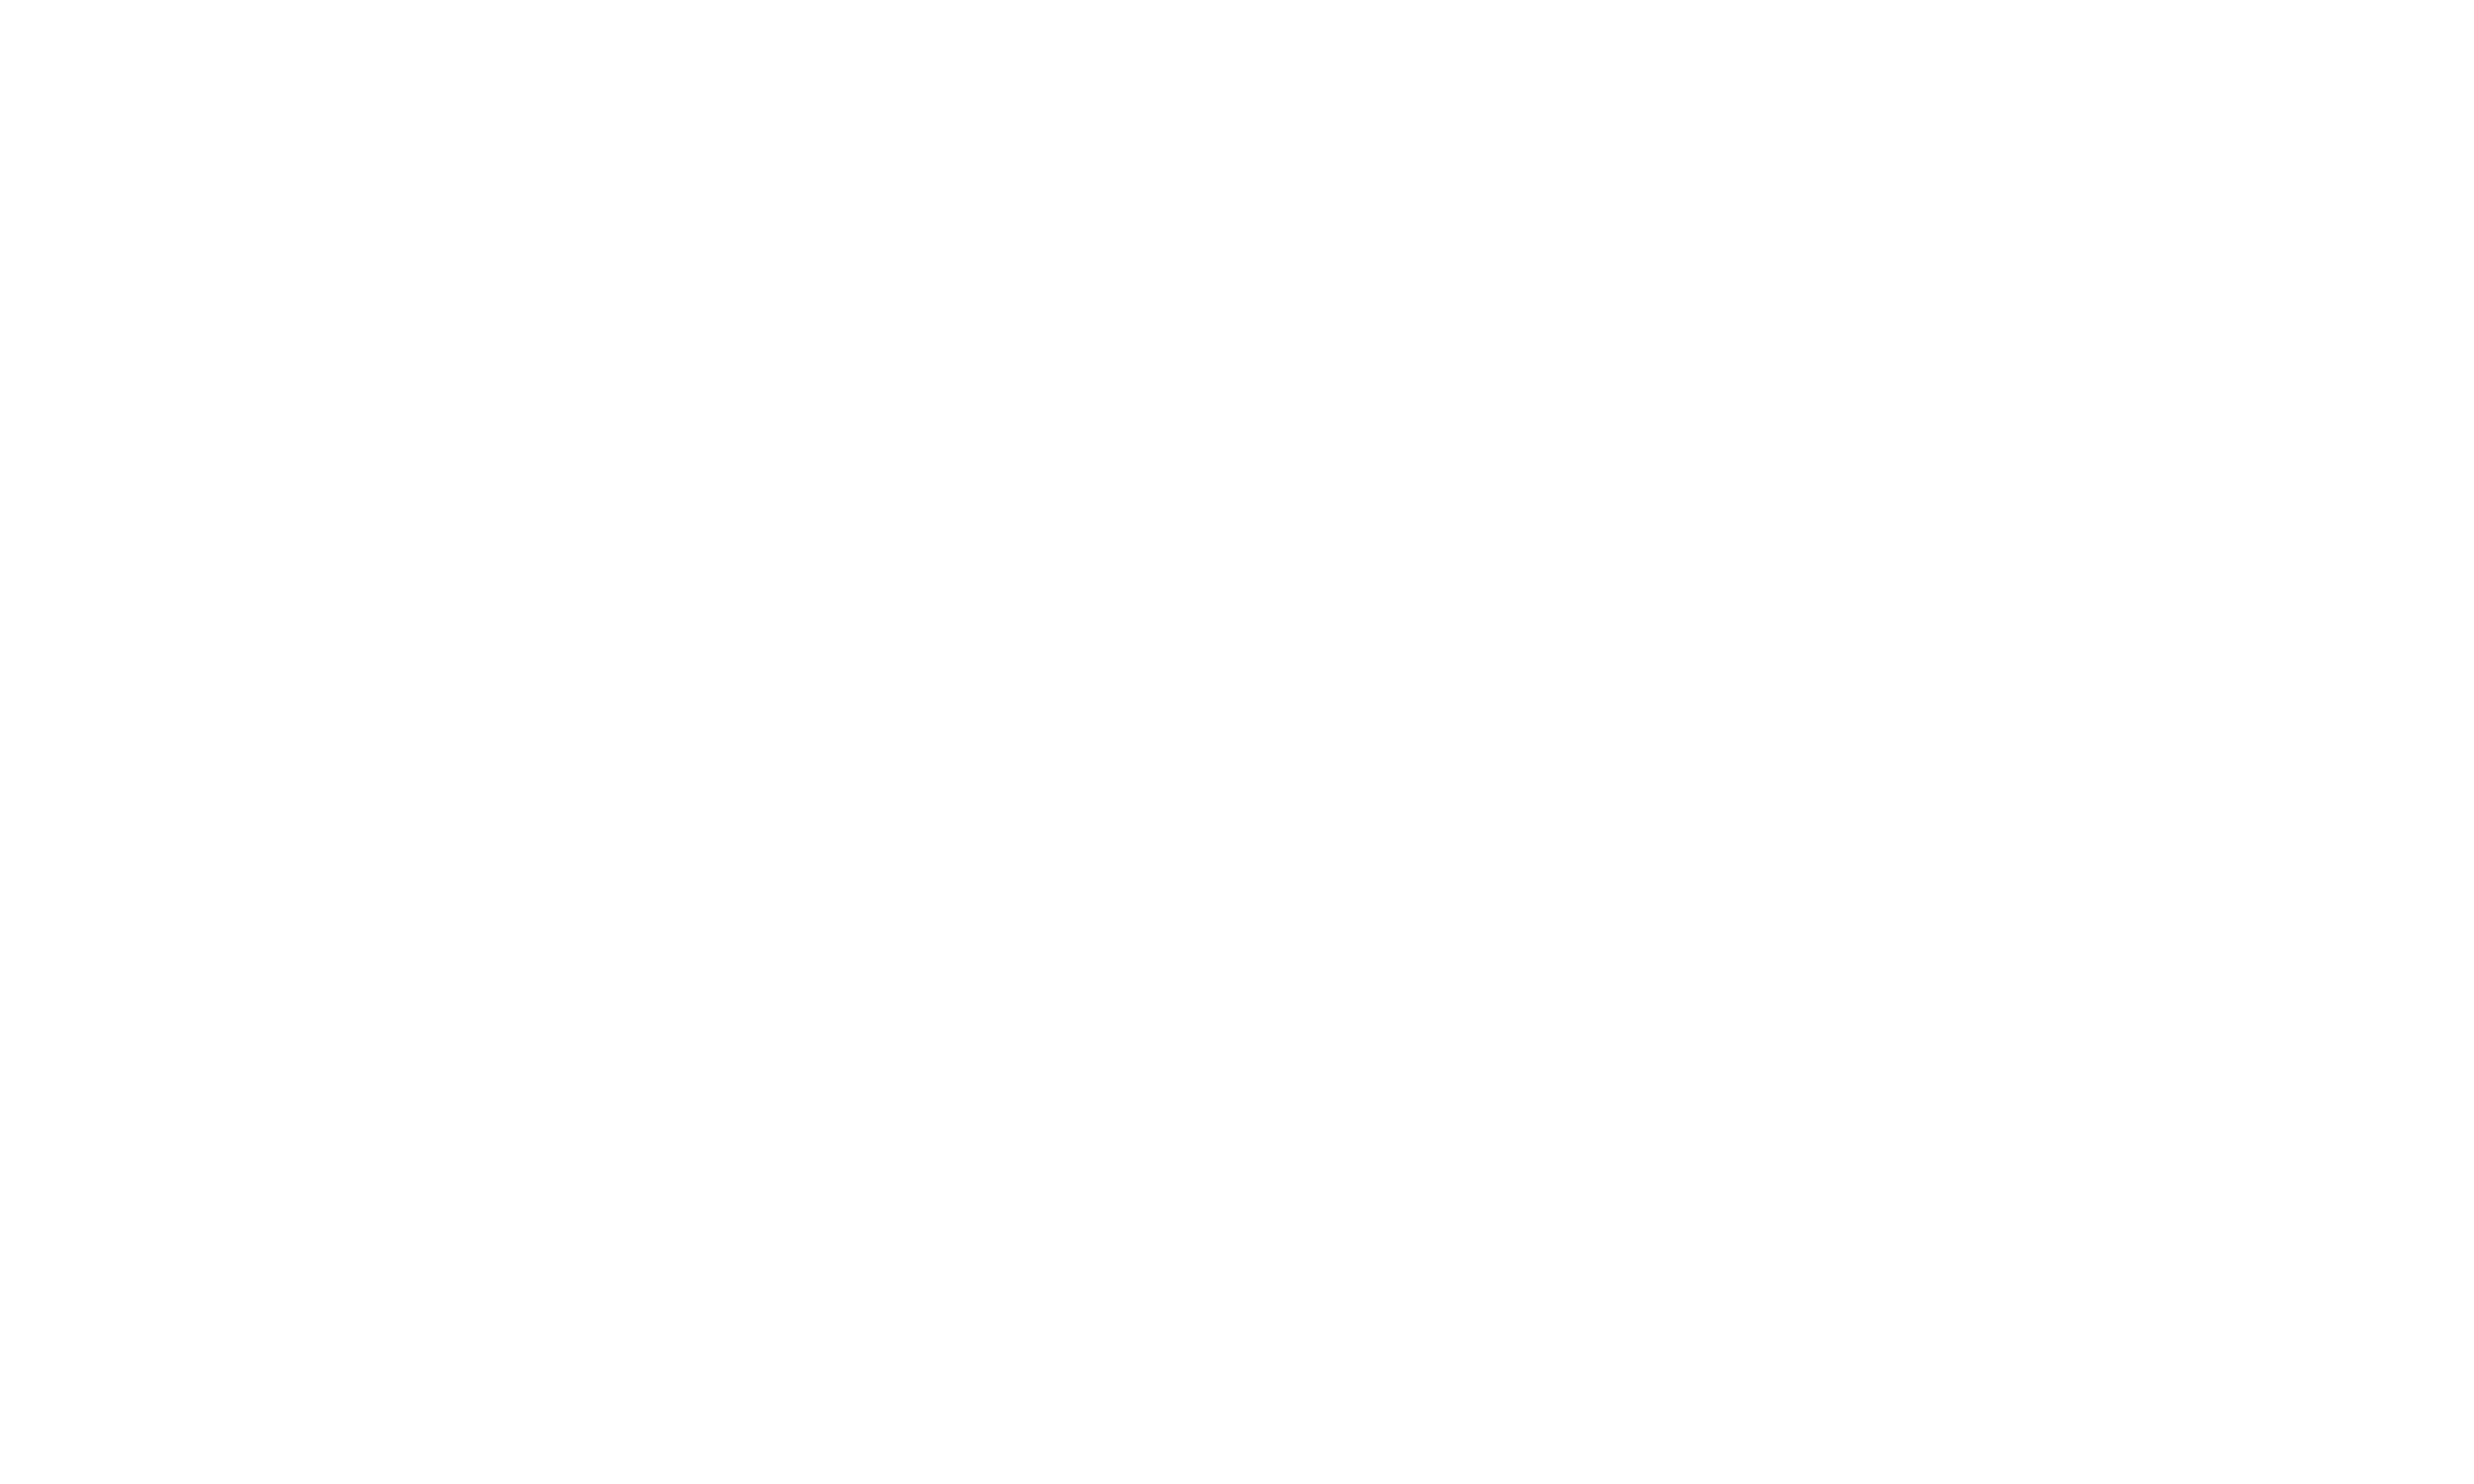

<IPython.core.display.Javascript object>


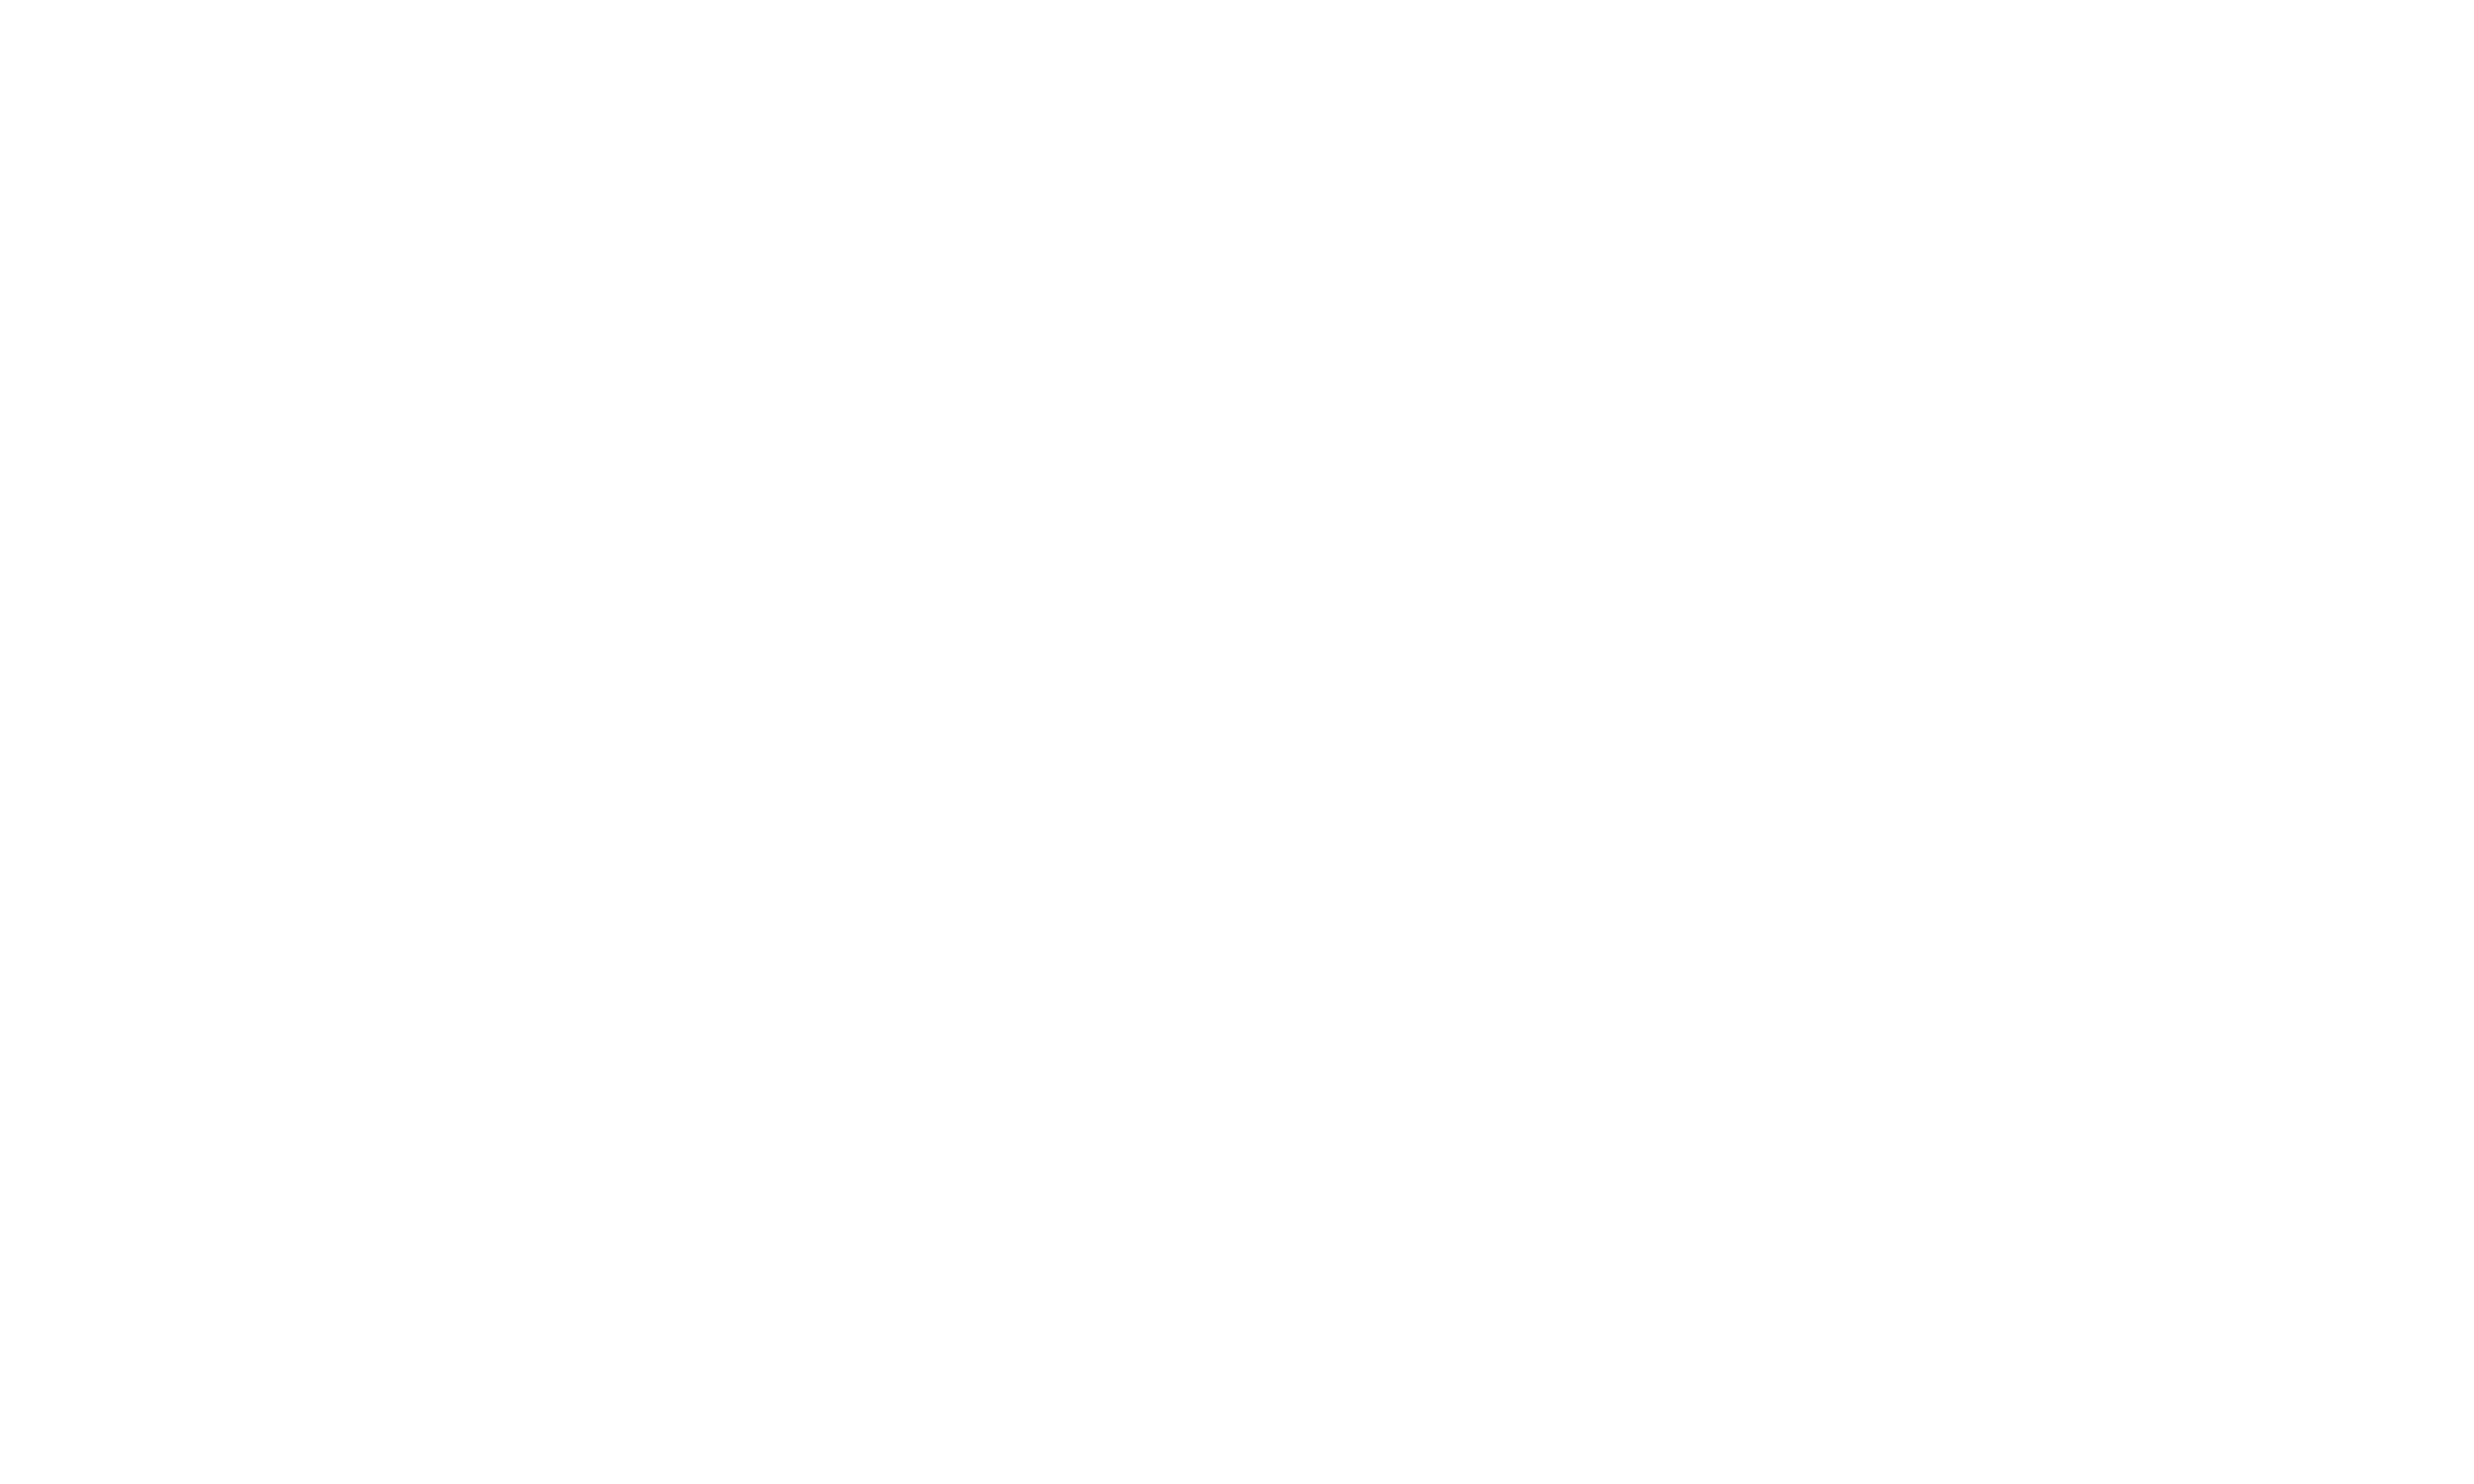

<IPython.core.display.Javascript object>


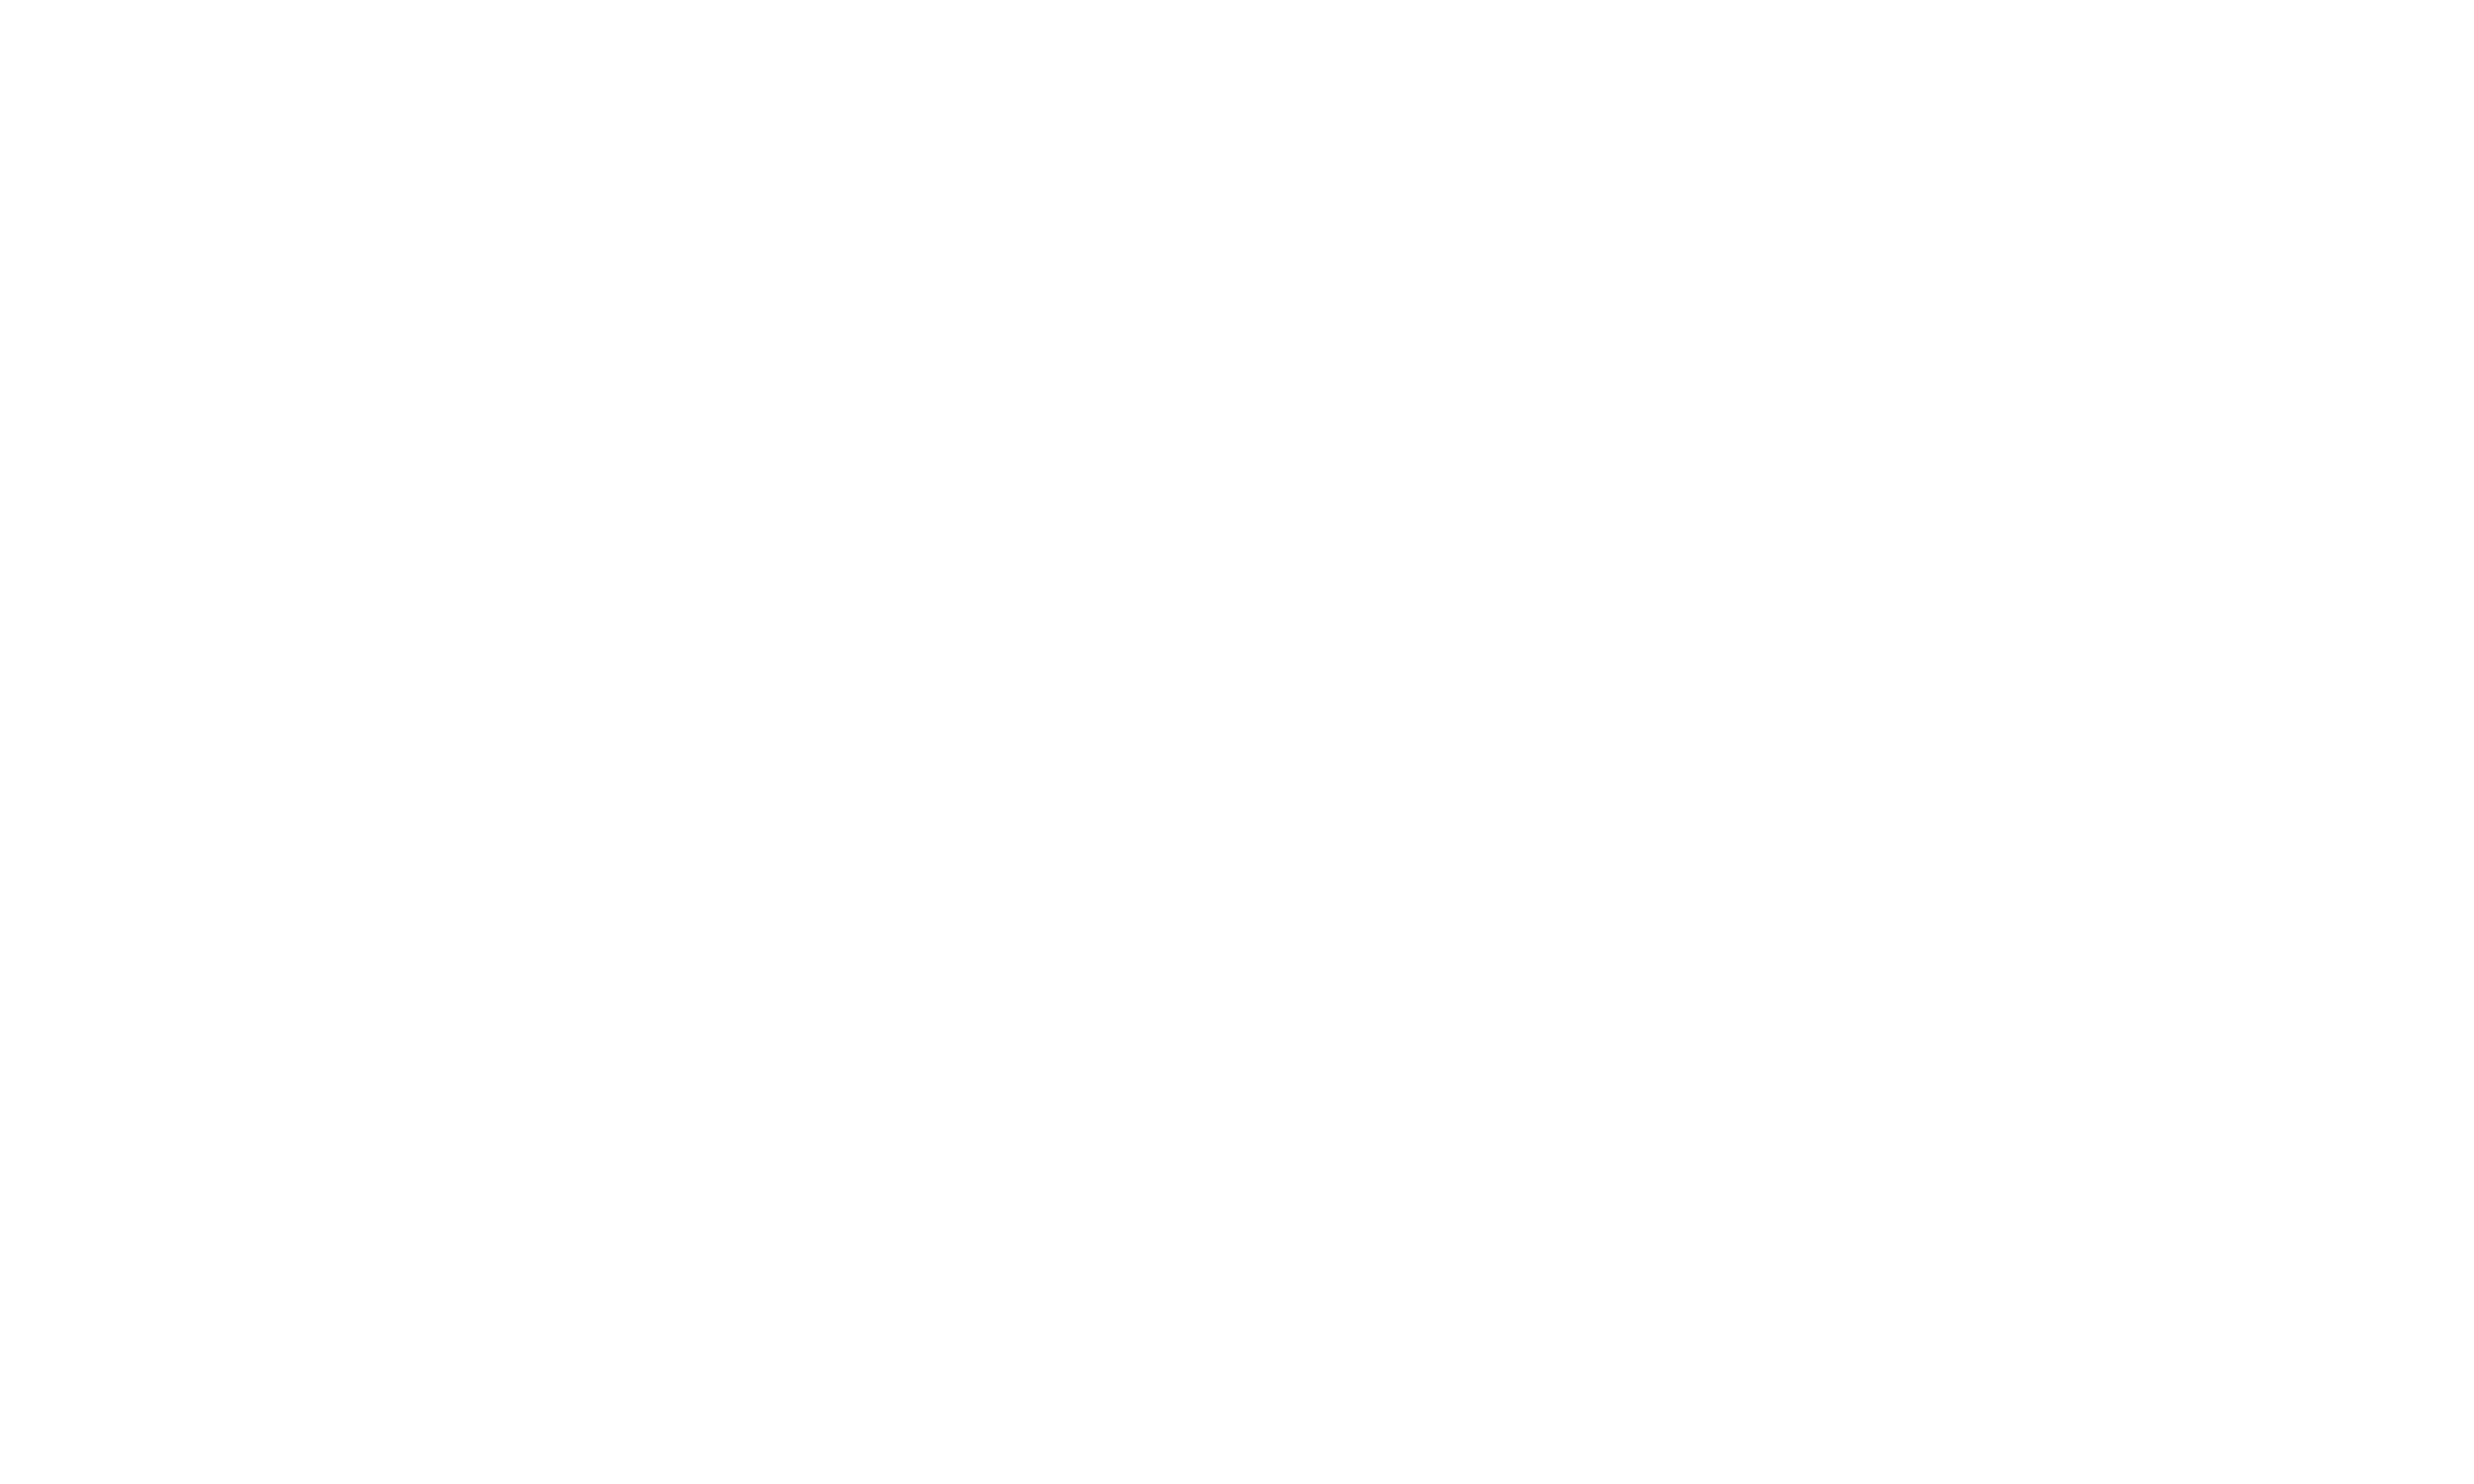

<IPython.core.display.Javascript object>


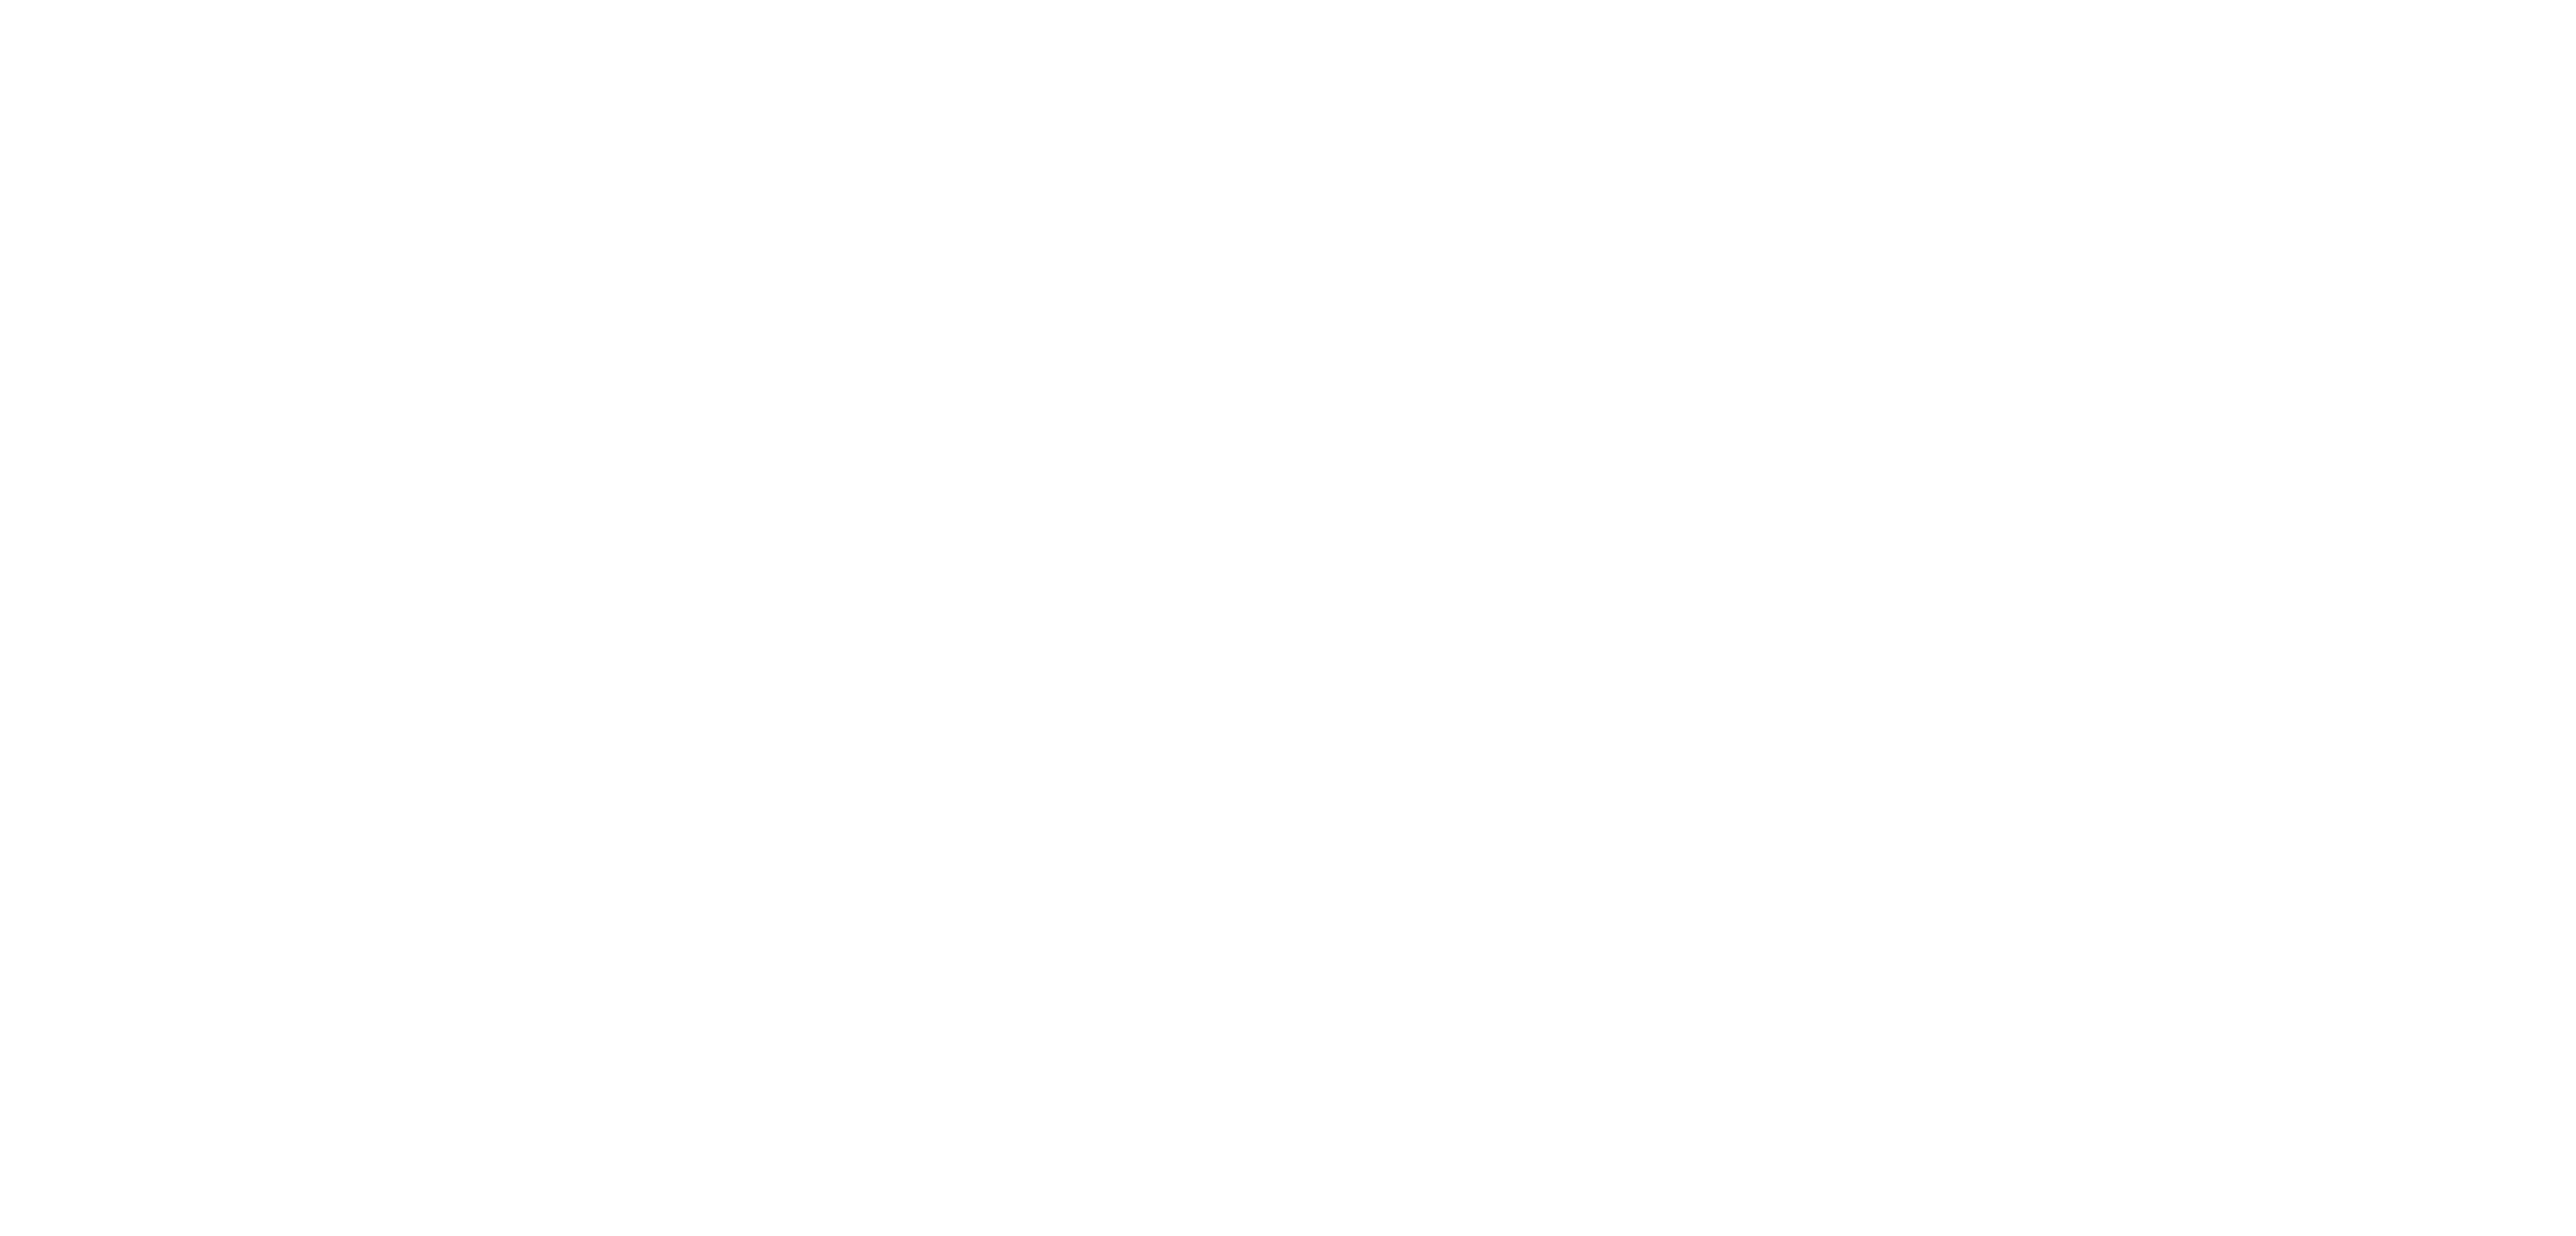

<IPython.core.display.Javascript object>


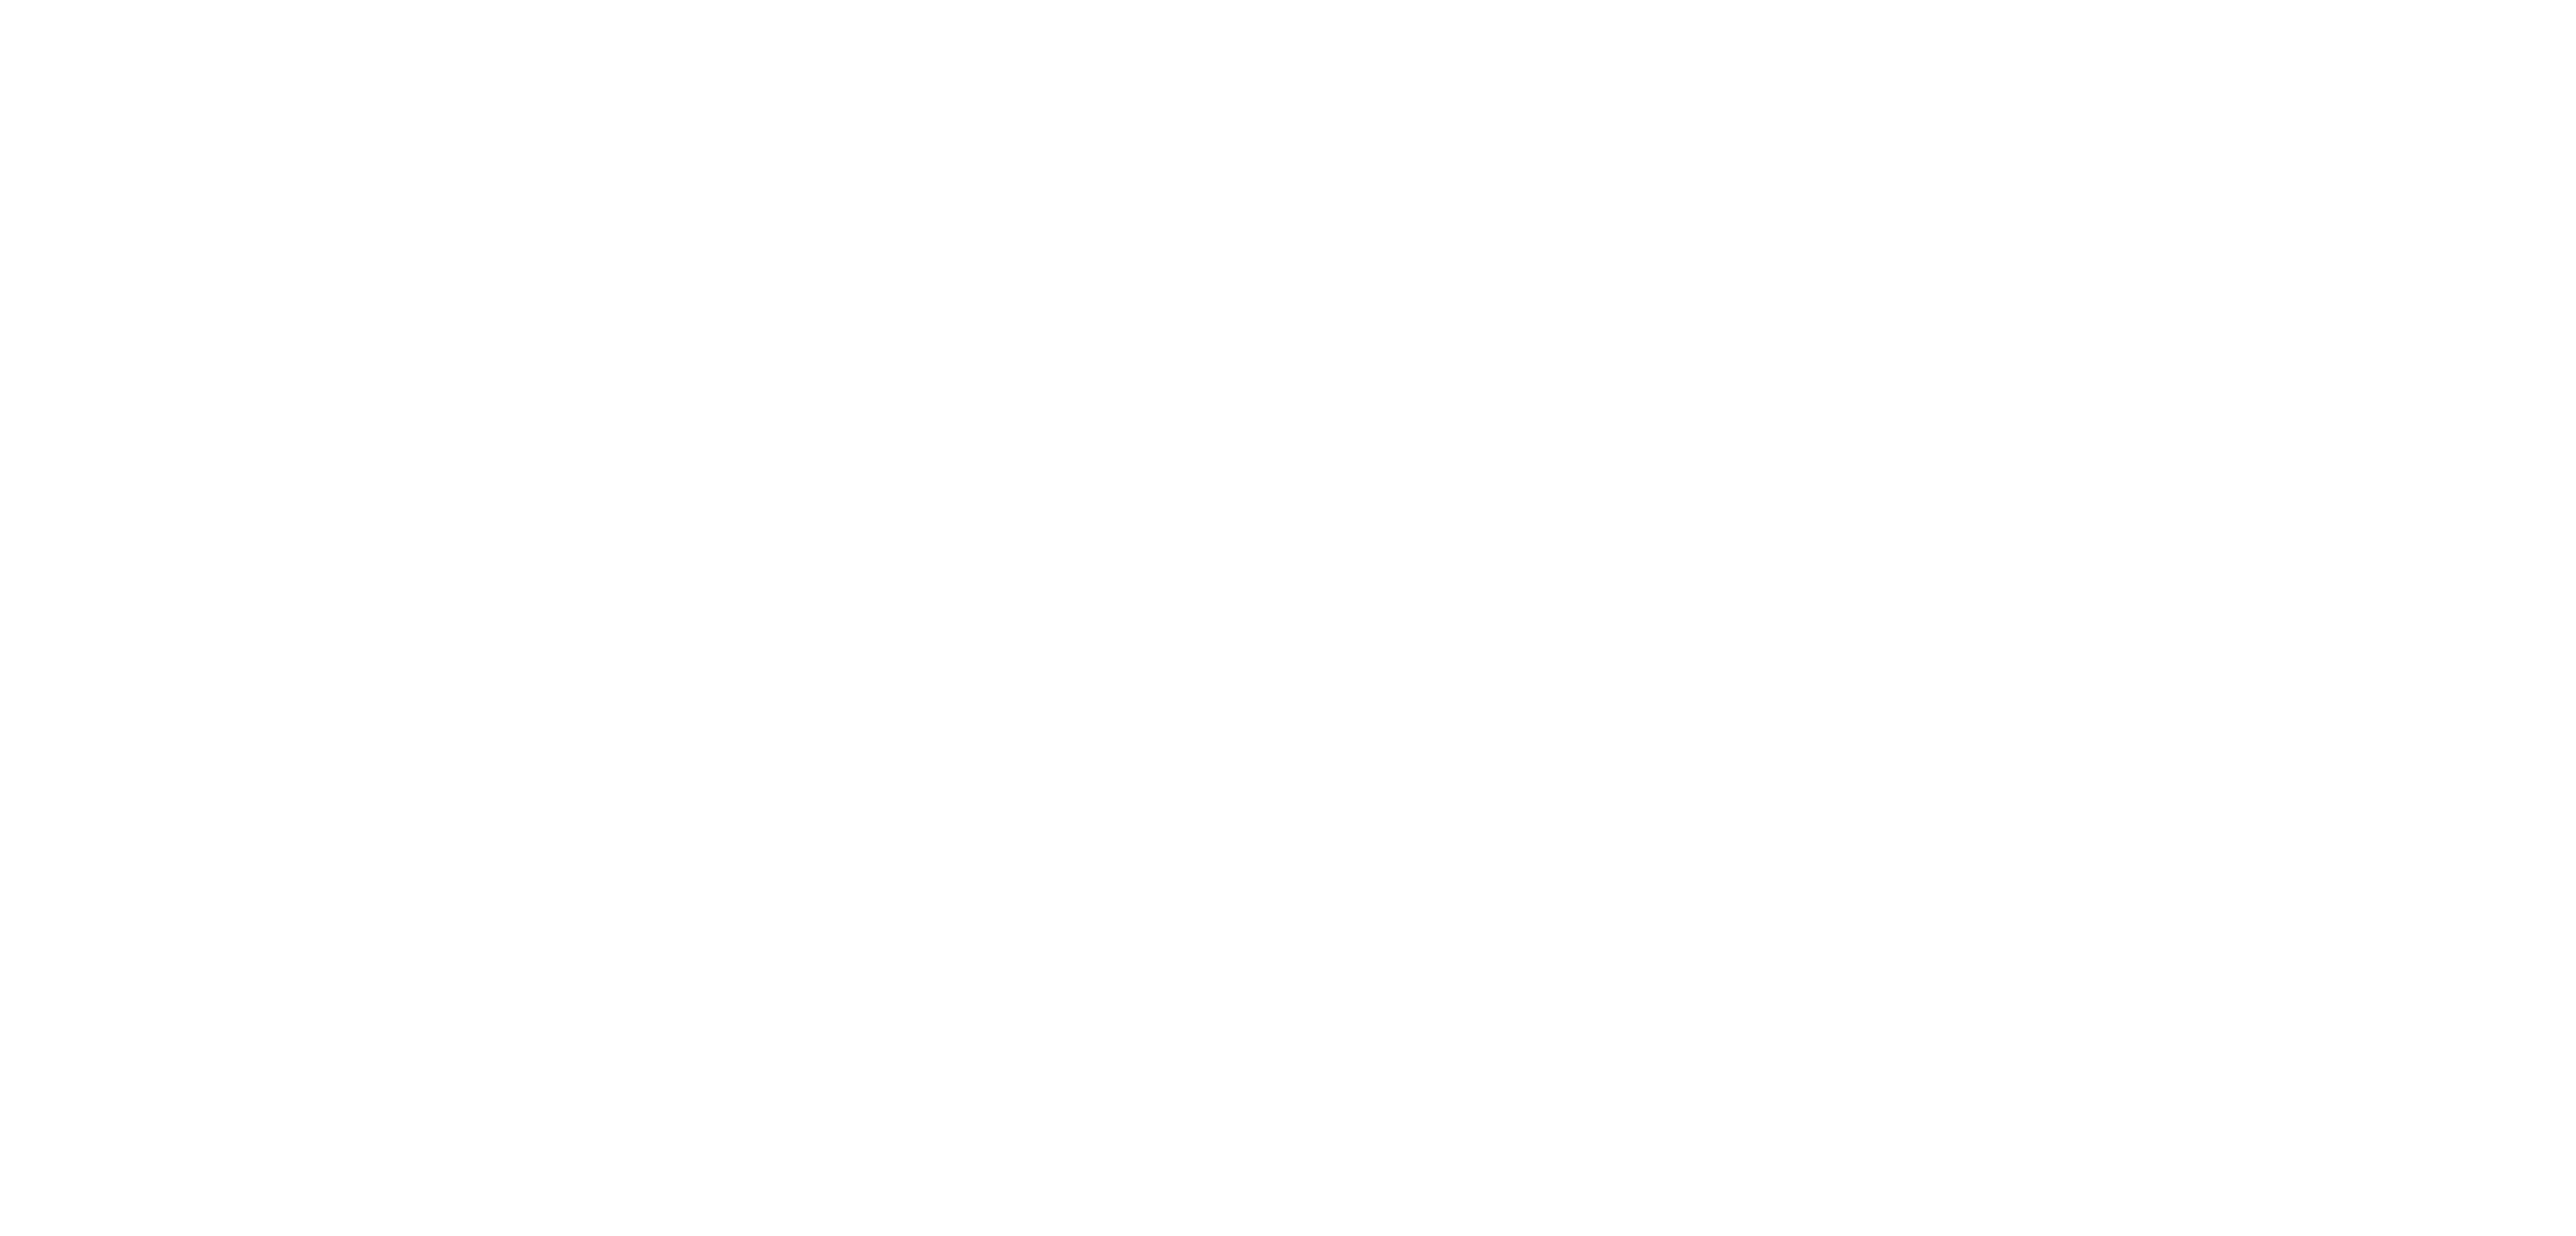

<IPython.core.display.Javascript object>


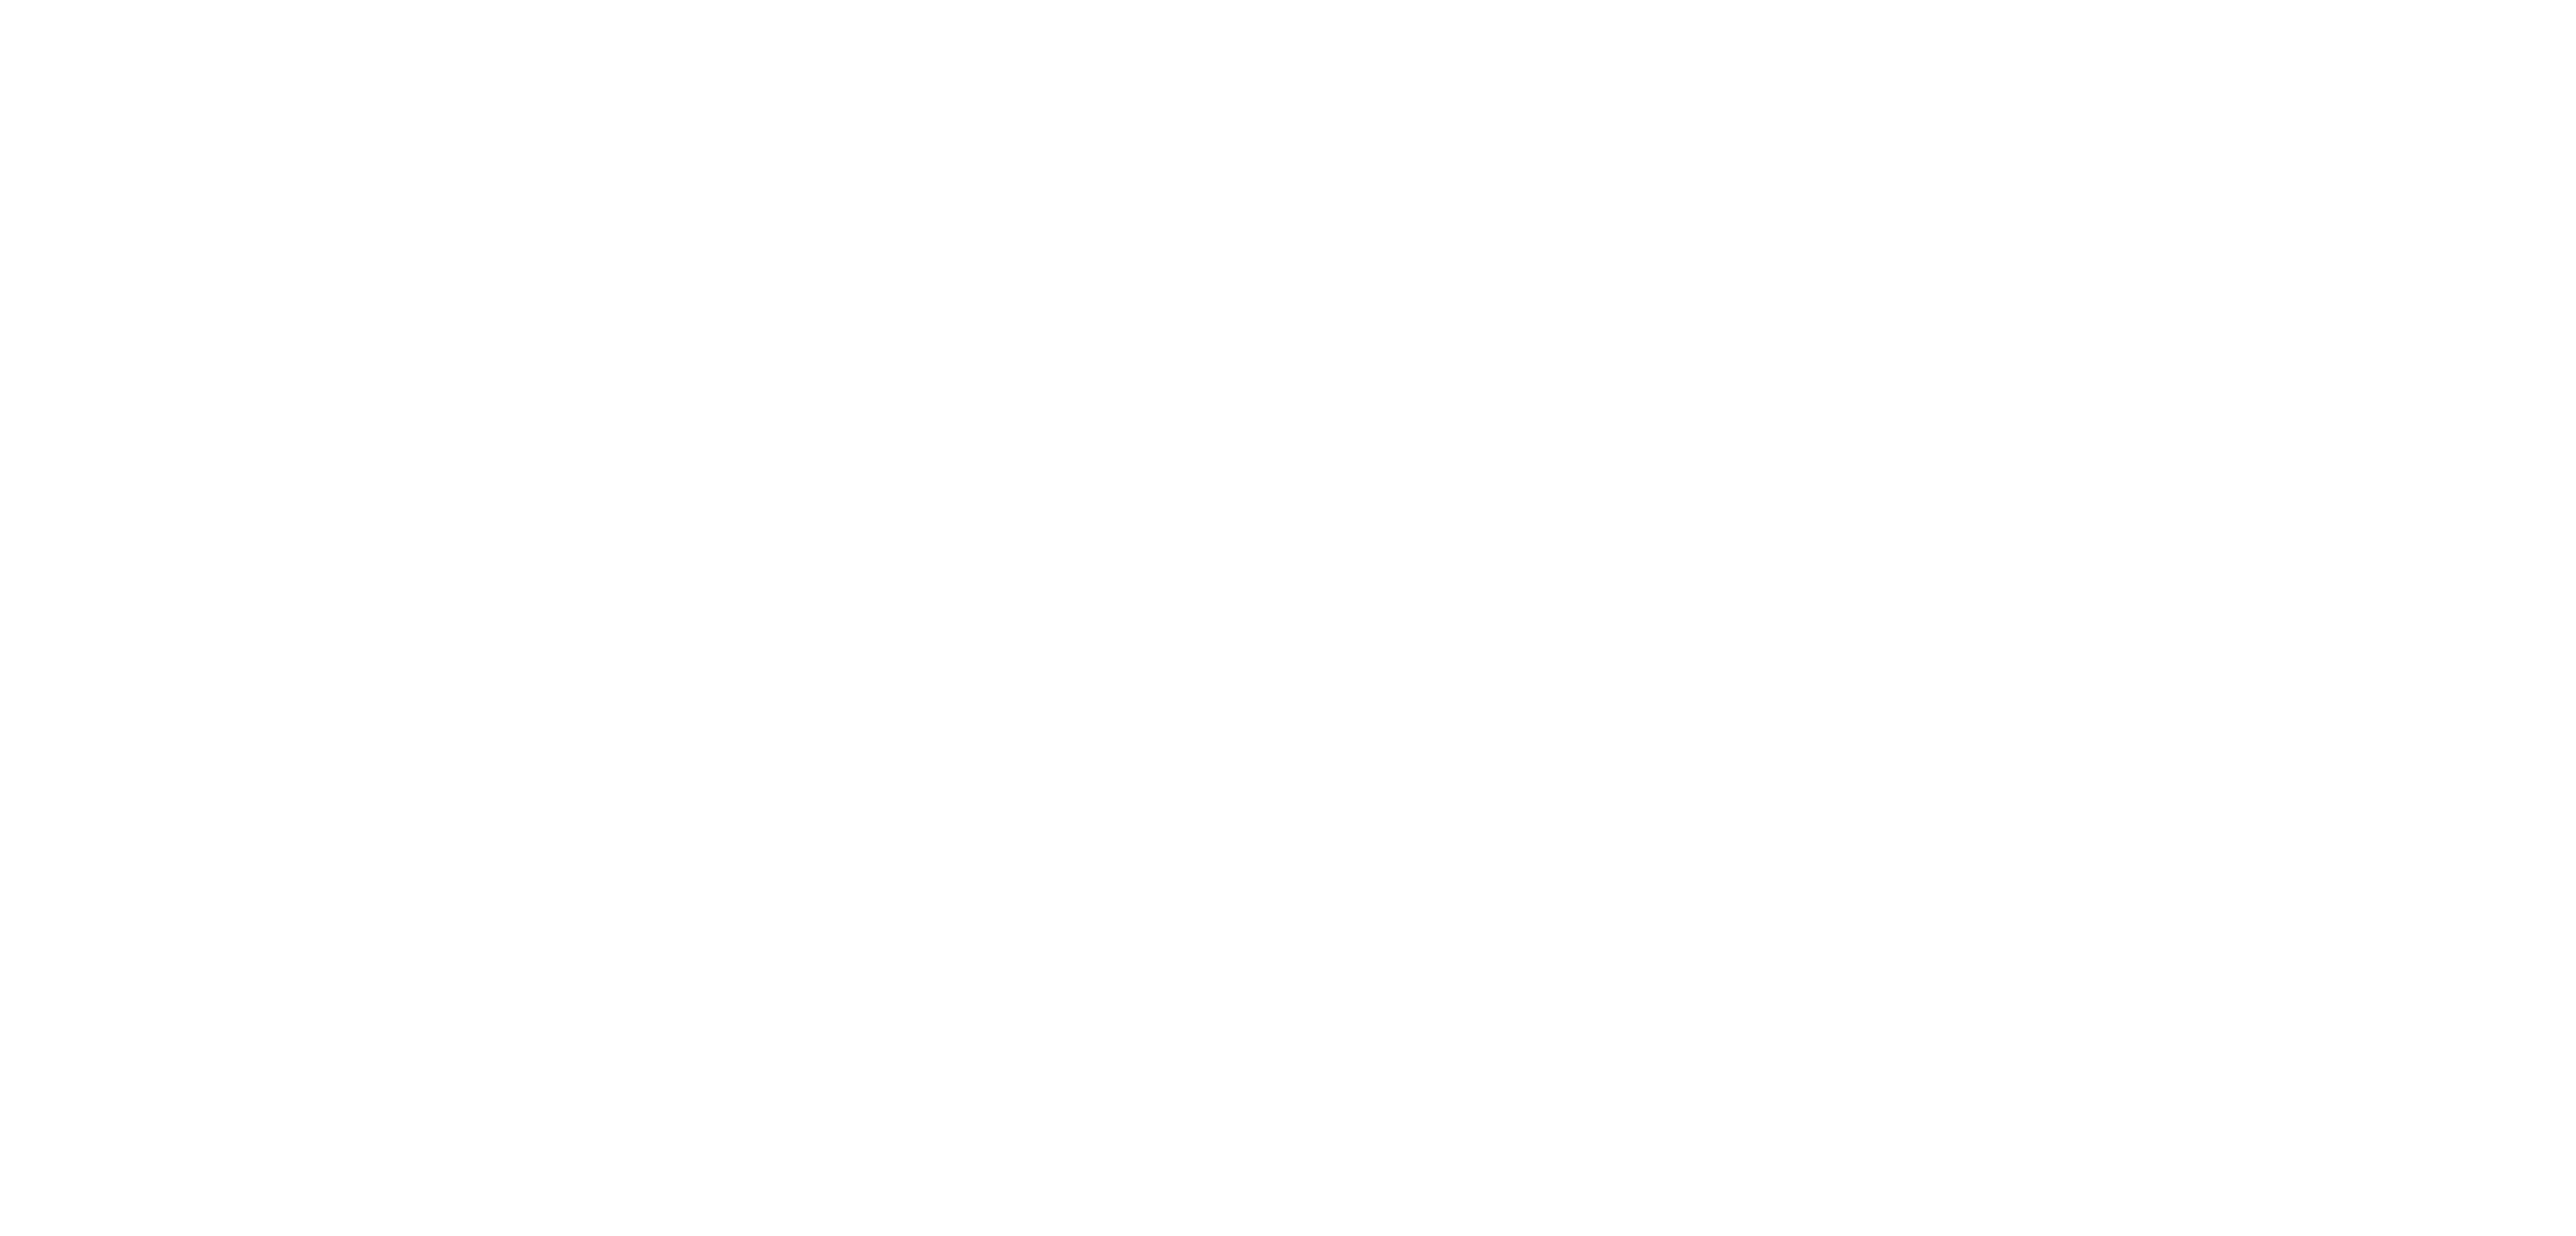

<IPython.core.display.Javascript object>


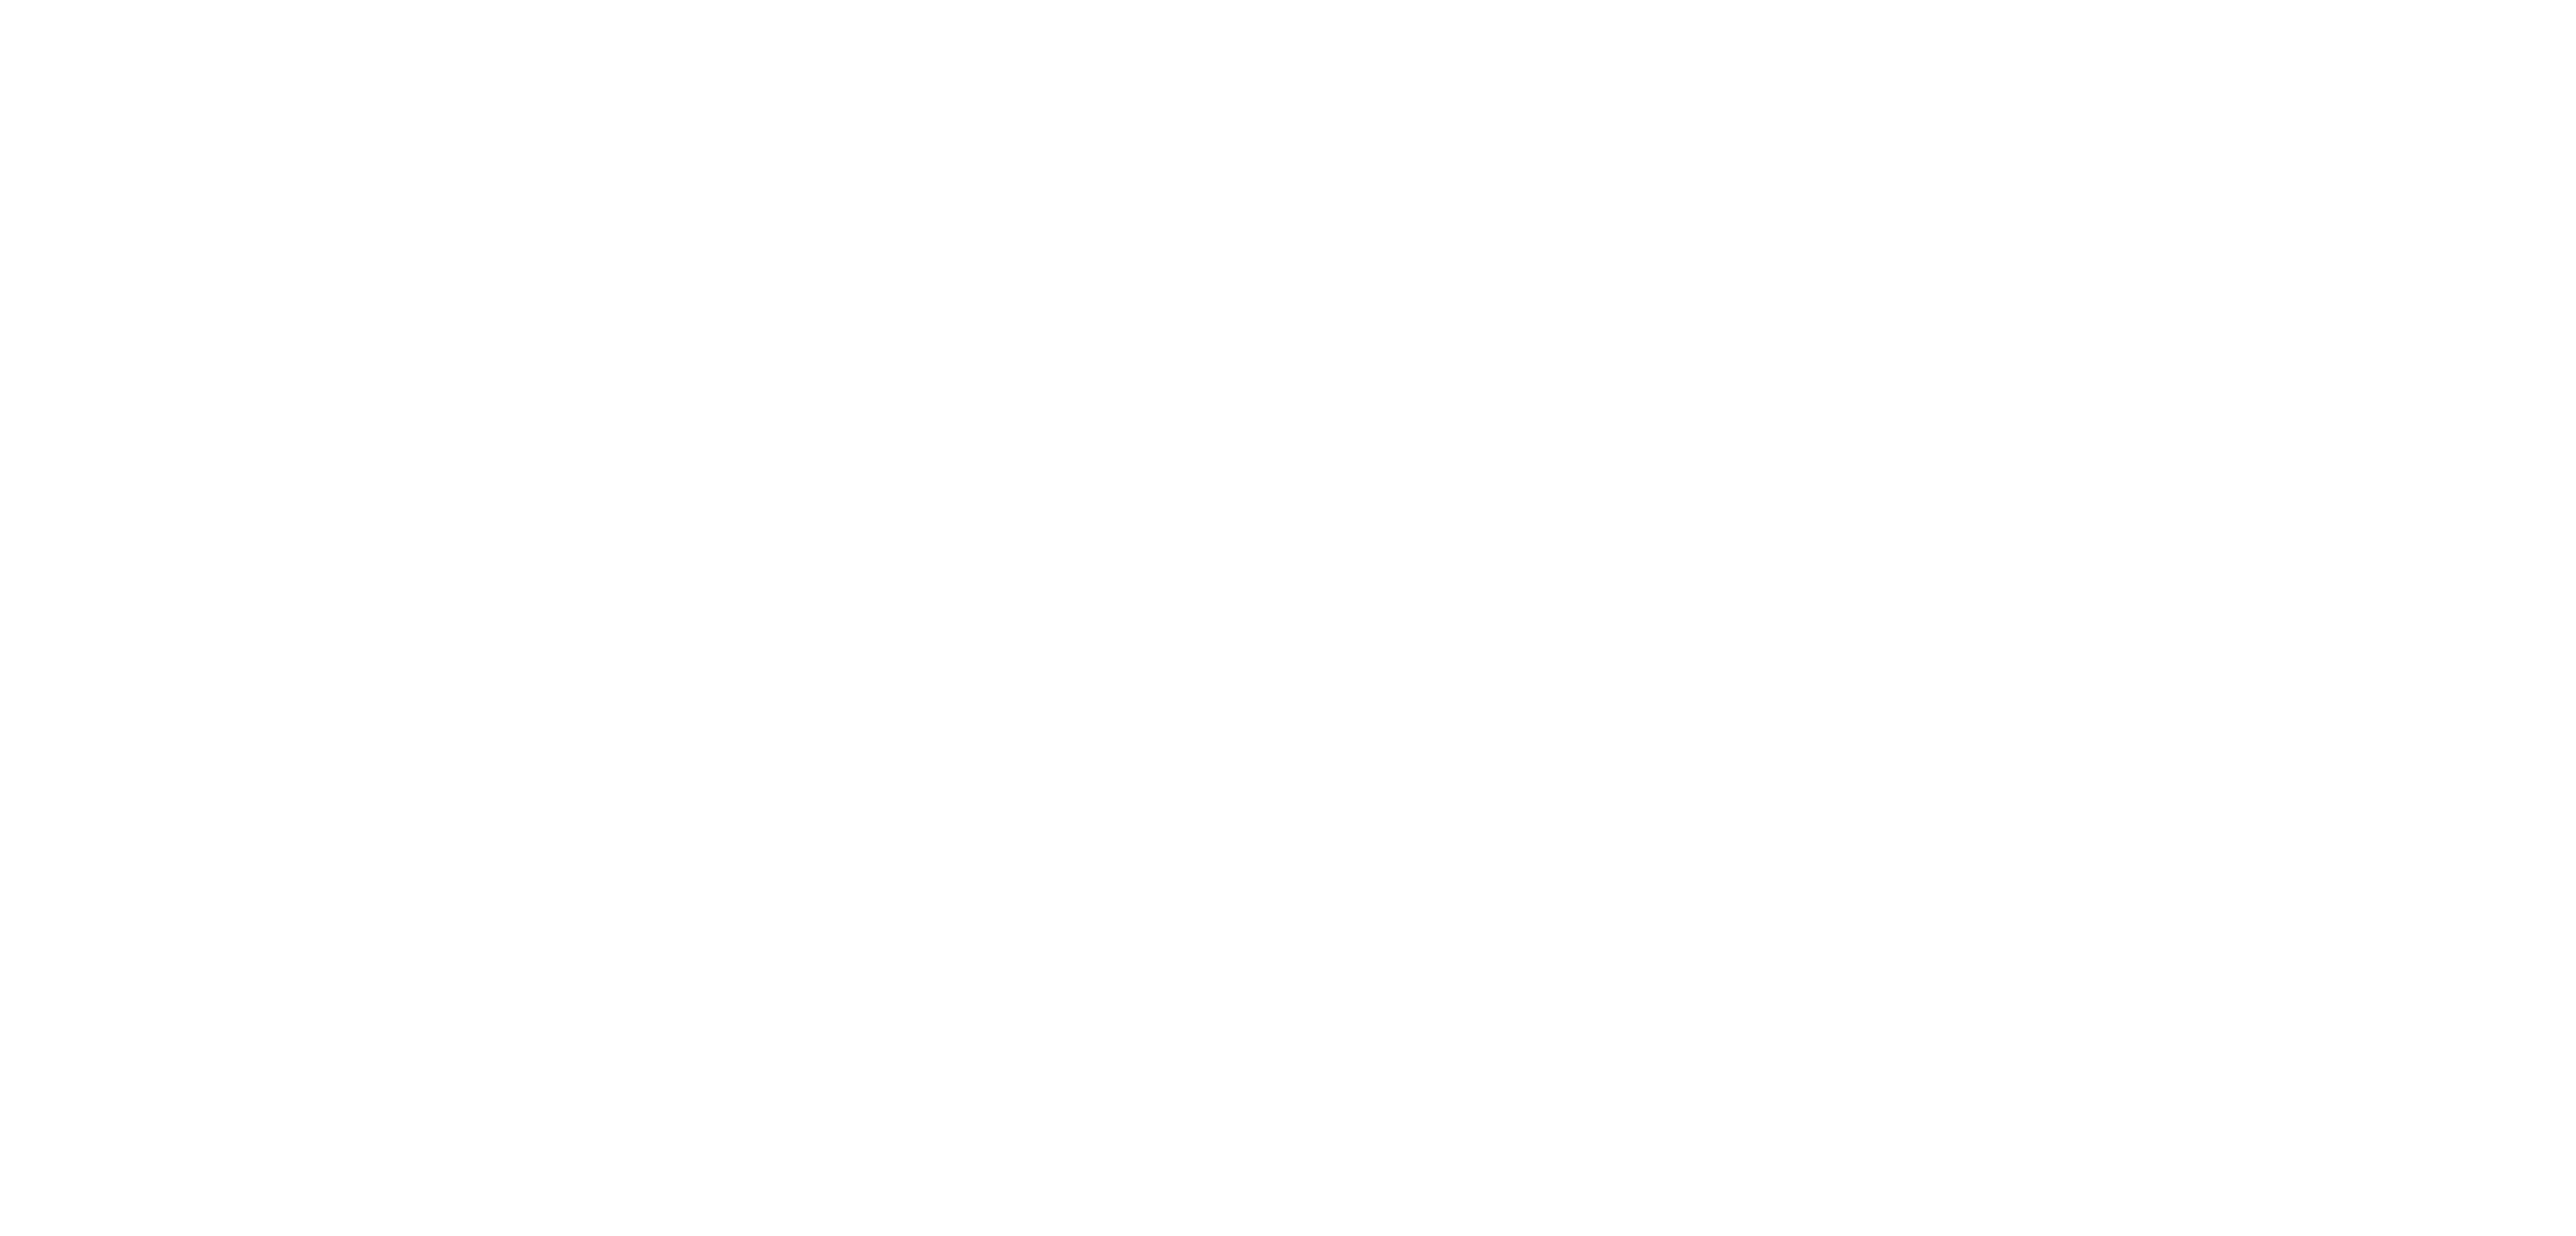

<IPython.core.display.Javascript object>


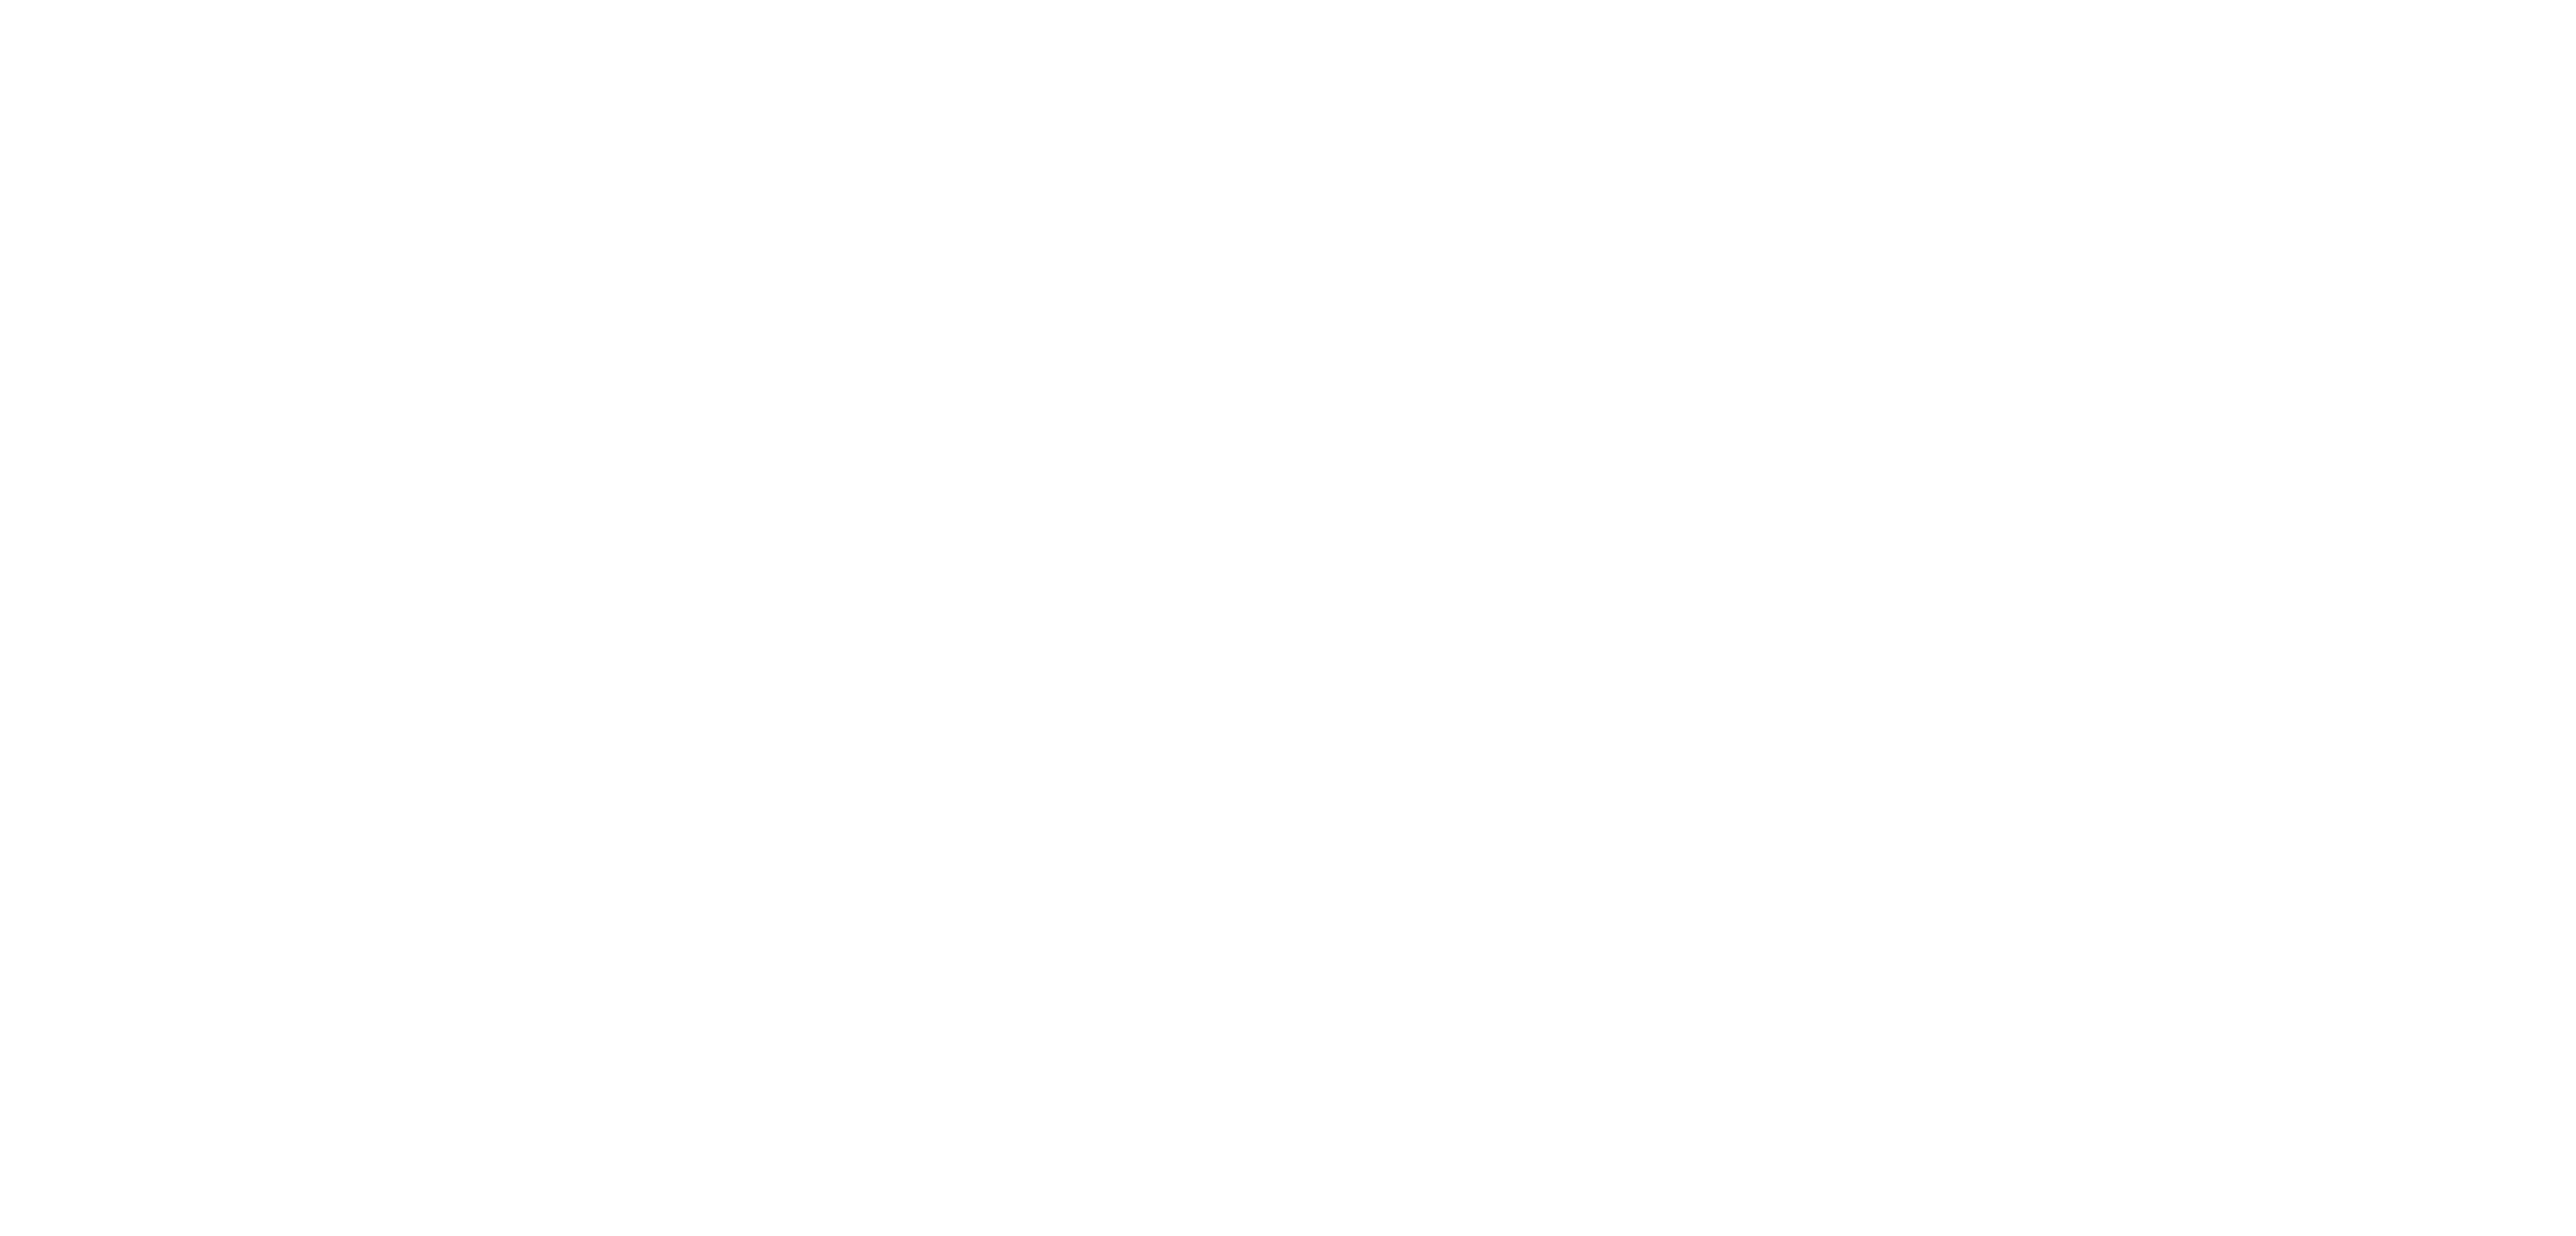

<IPython.core.display.Javascript object>


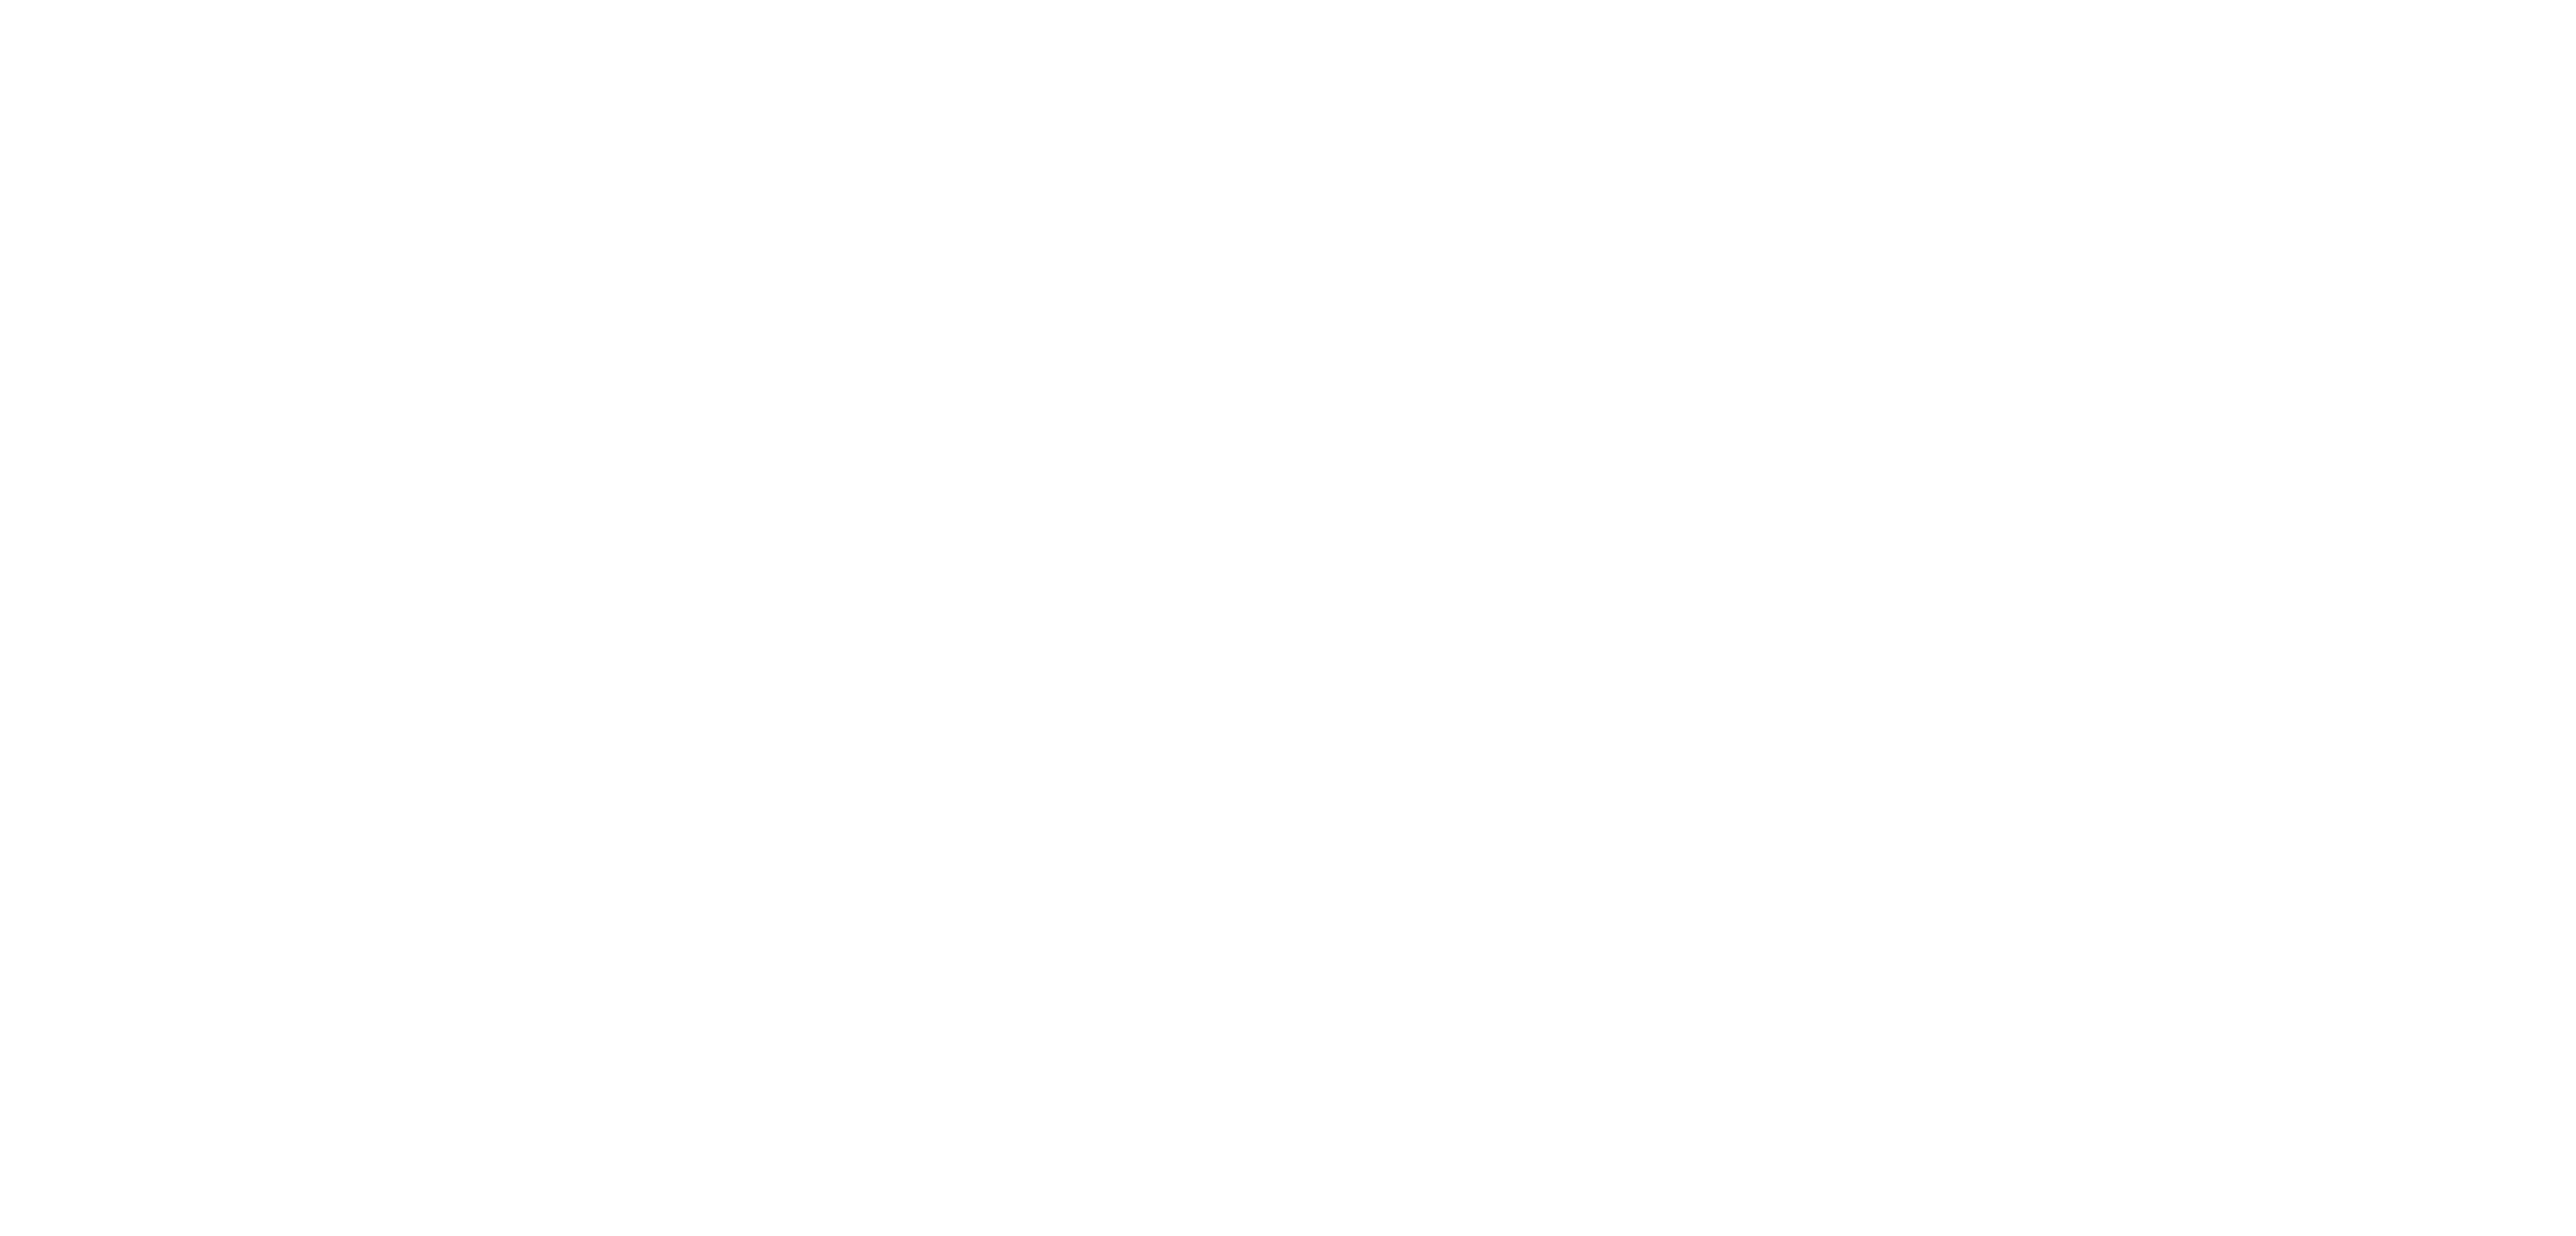

<IPython.core.display.Javascript object>


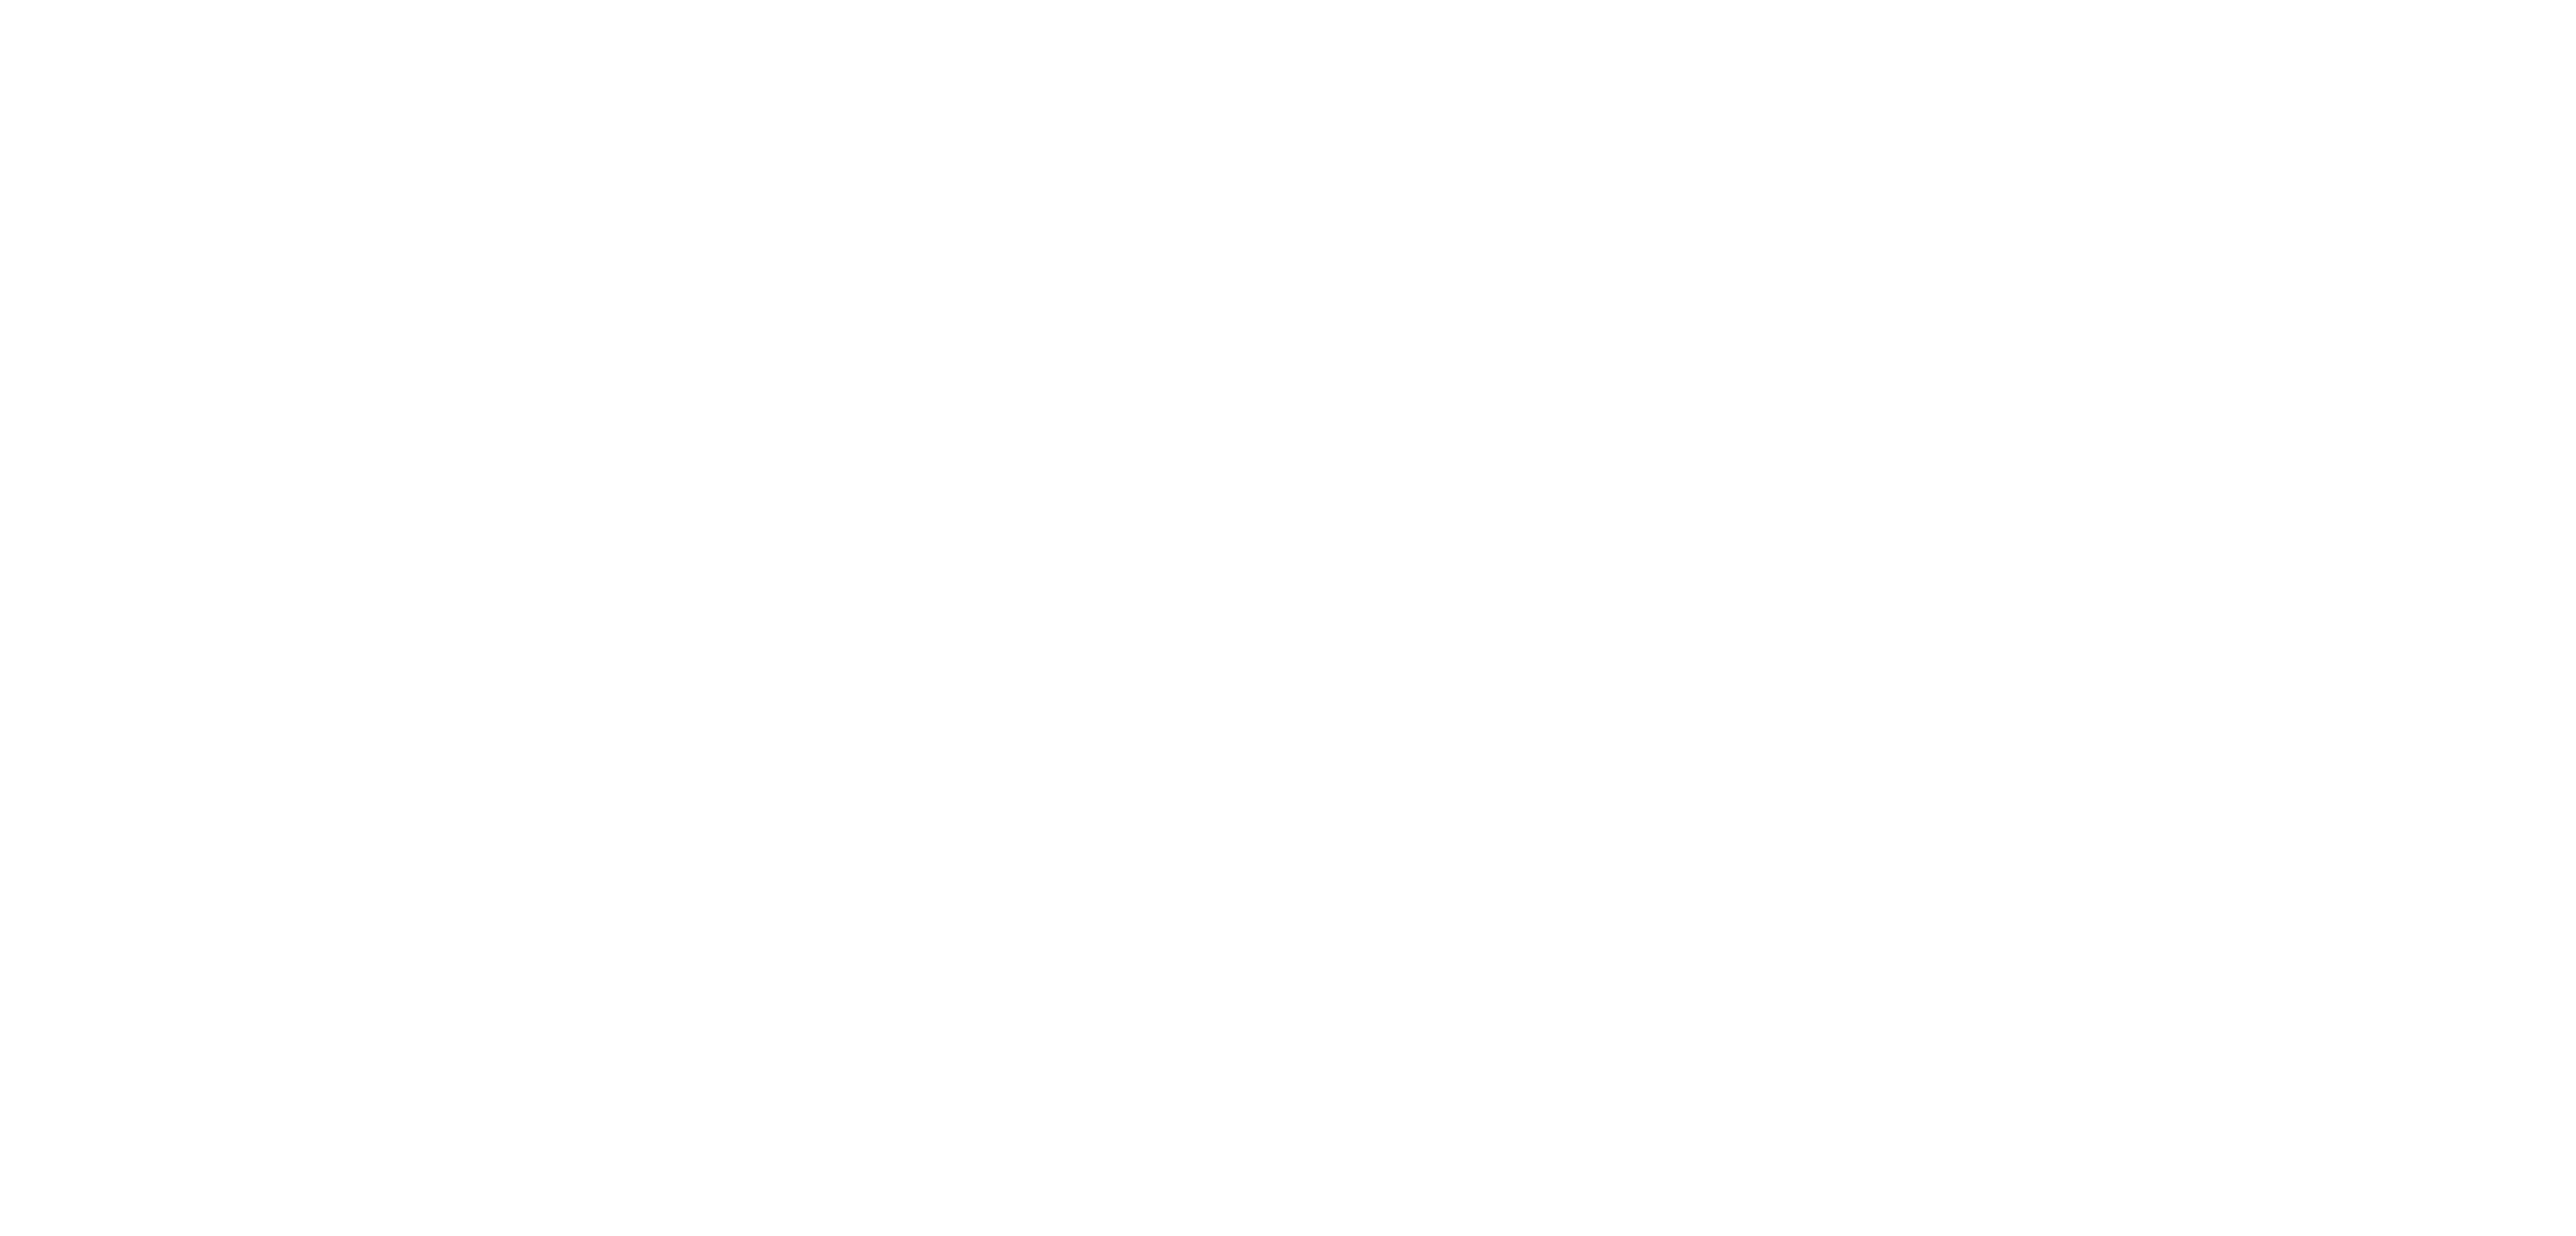

<IPython.core.display.Javascript object>


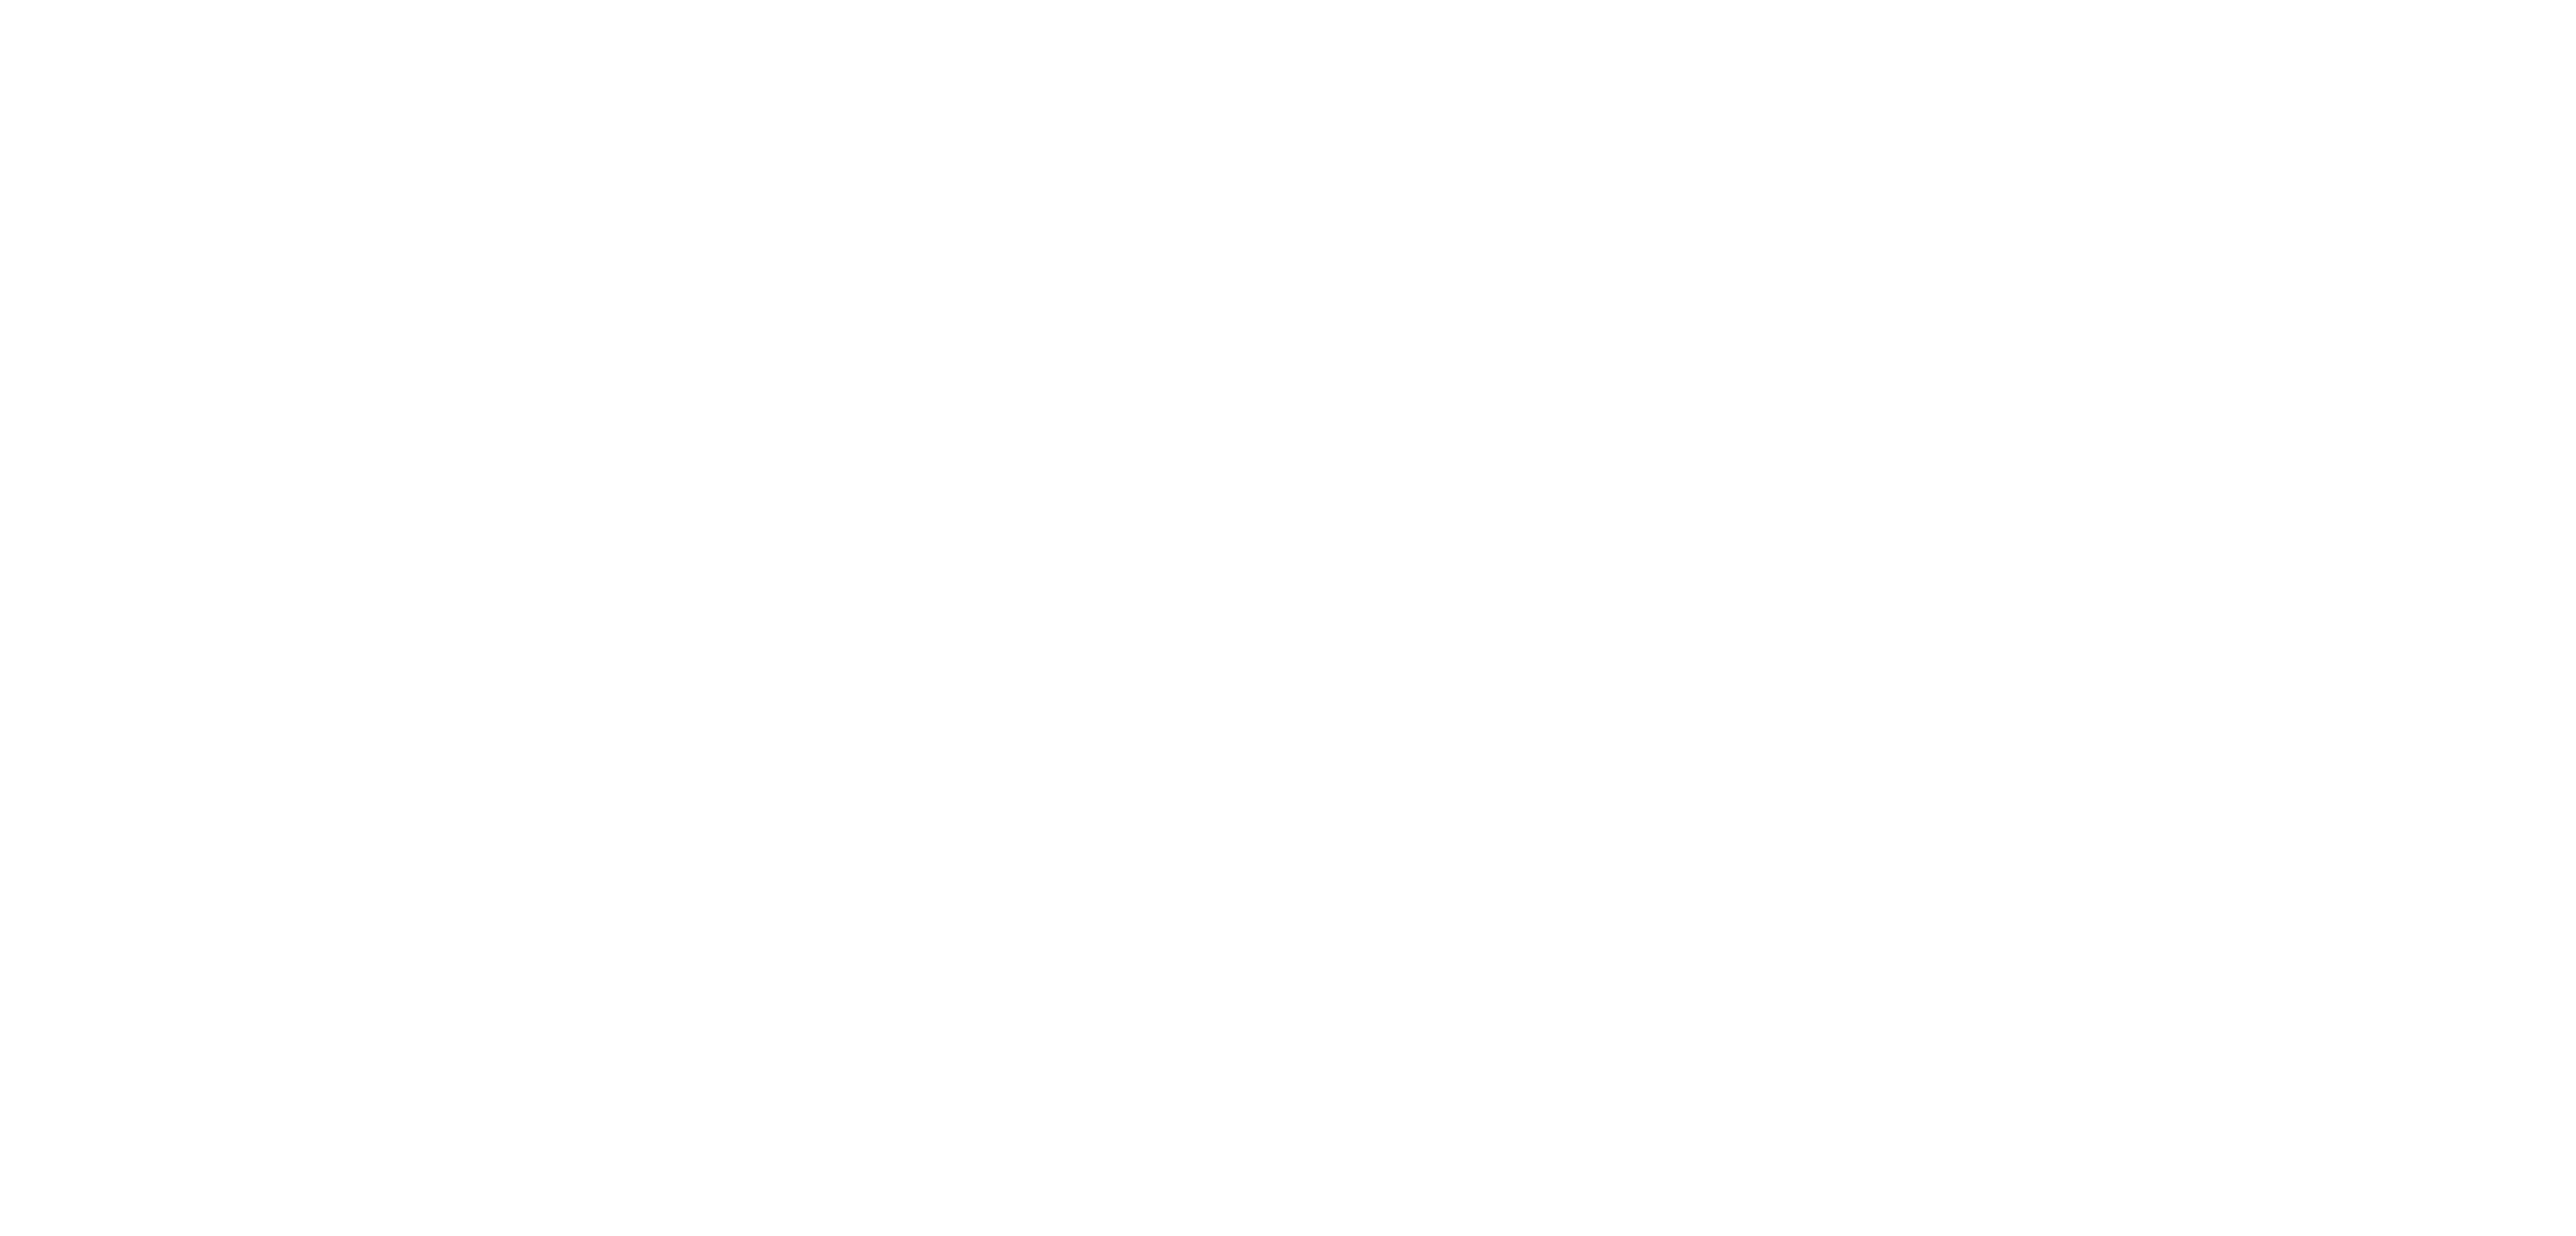

<IPython.core.display.Javascript object>


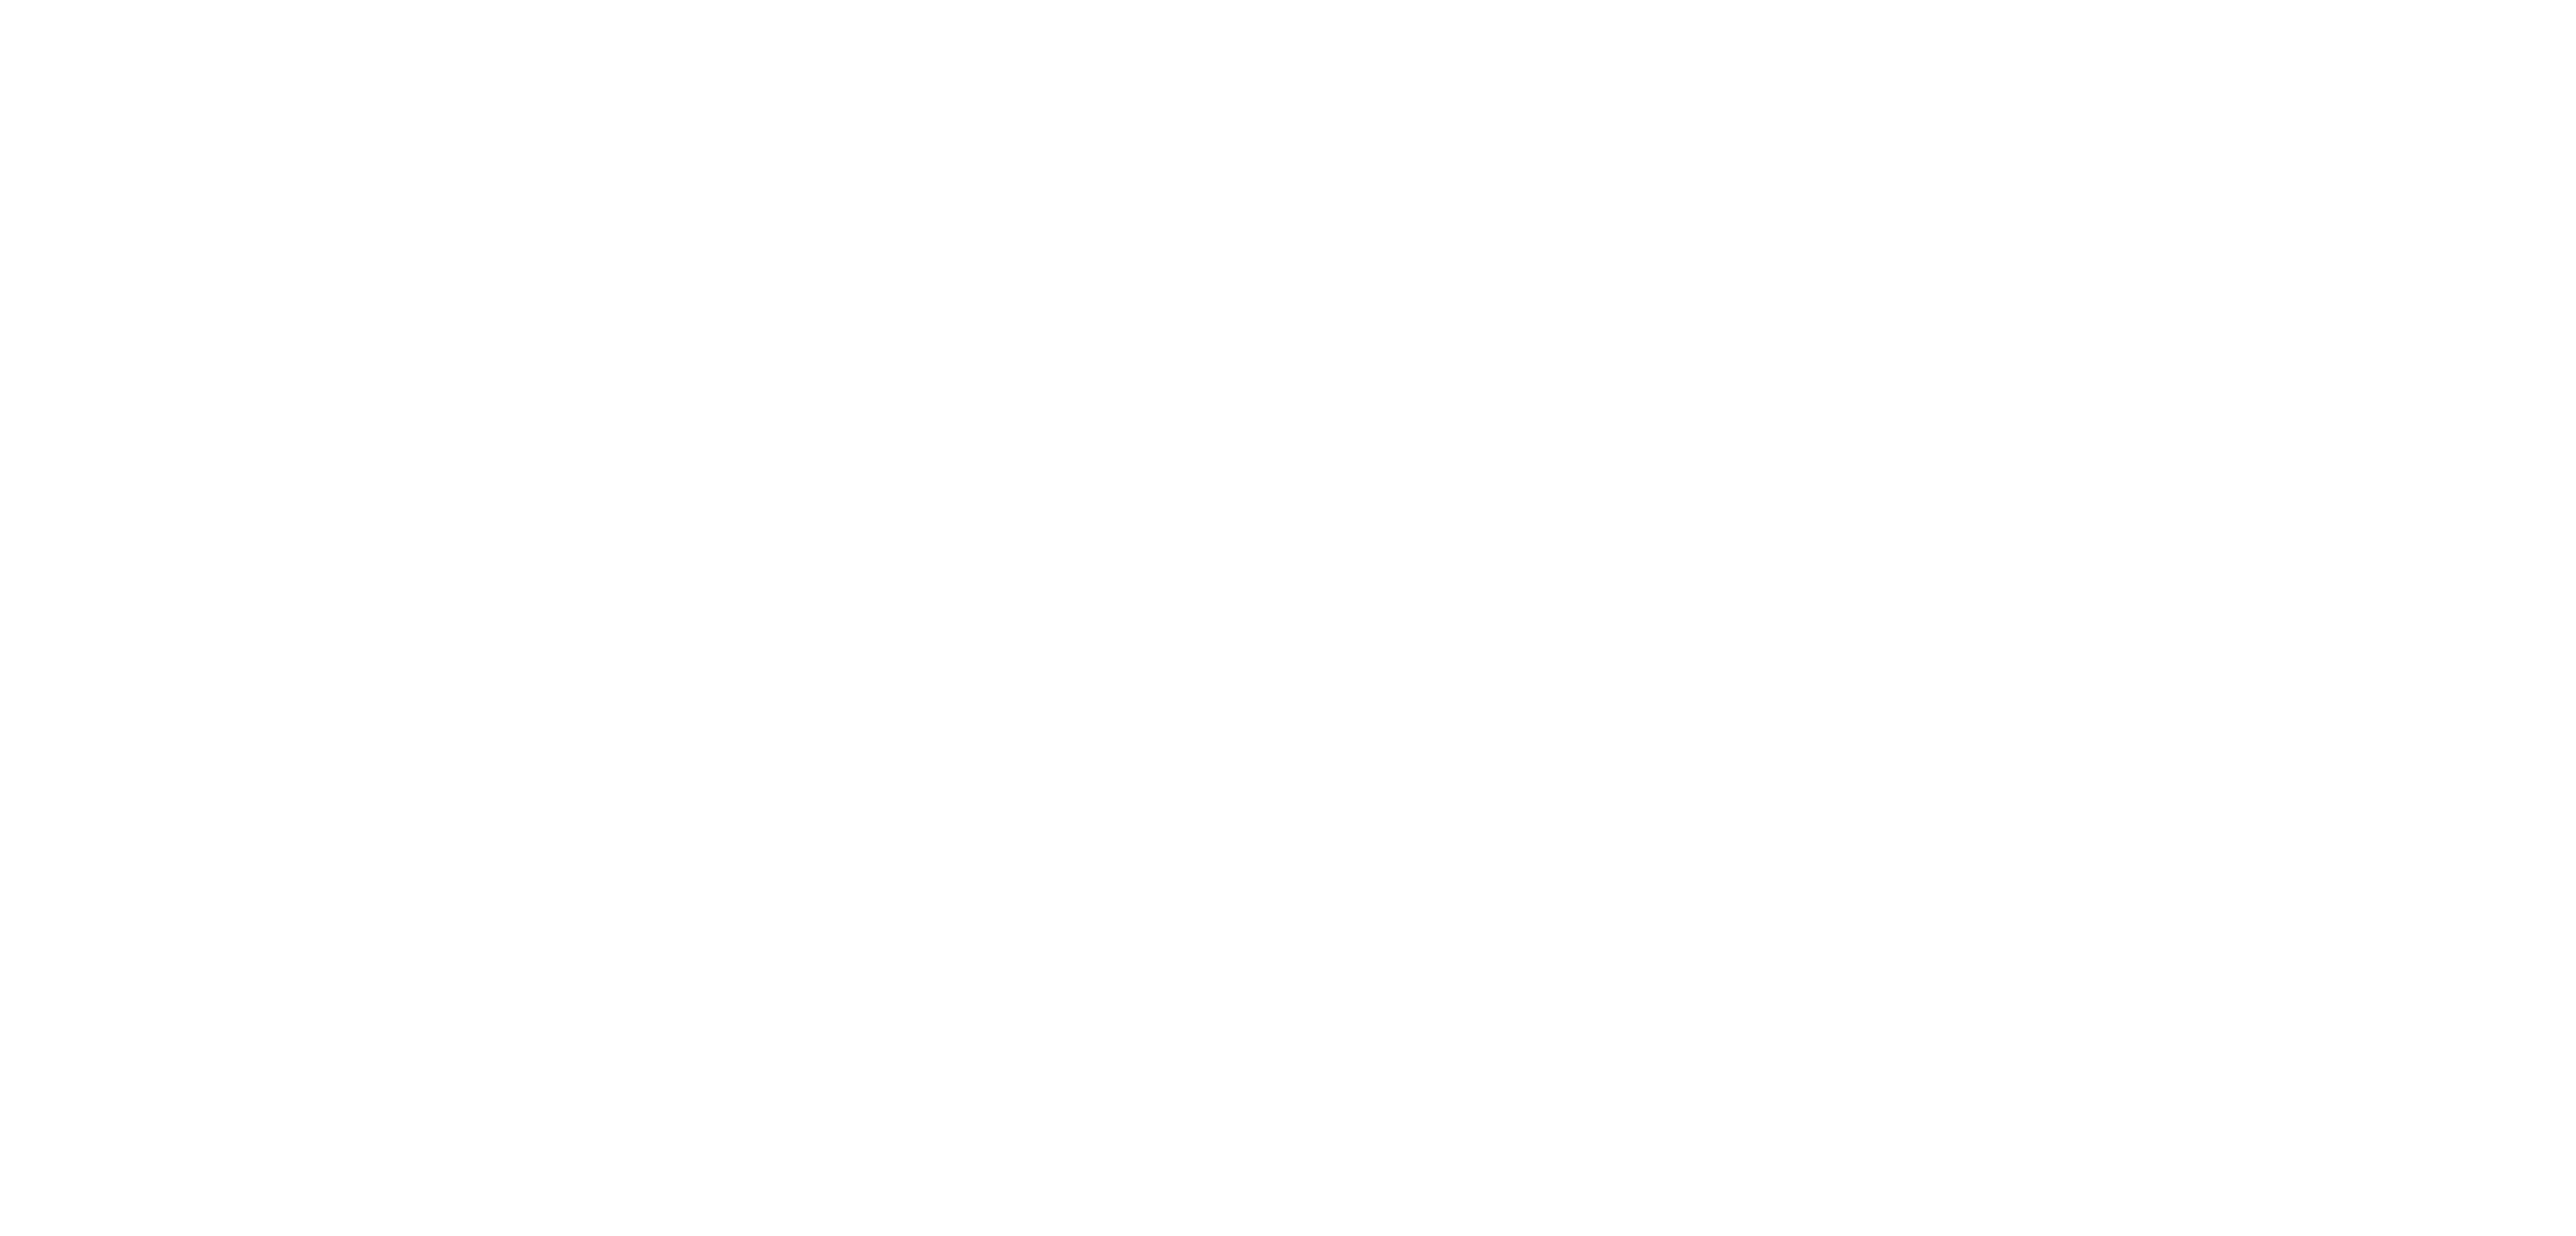

<IPython.core.display.Javascript object>


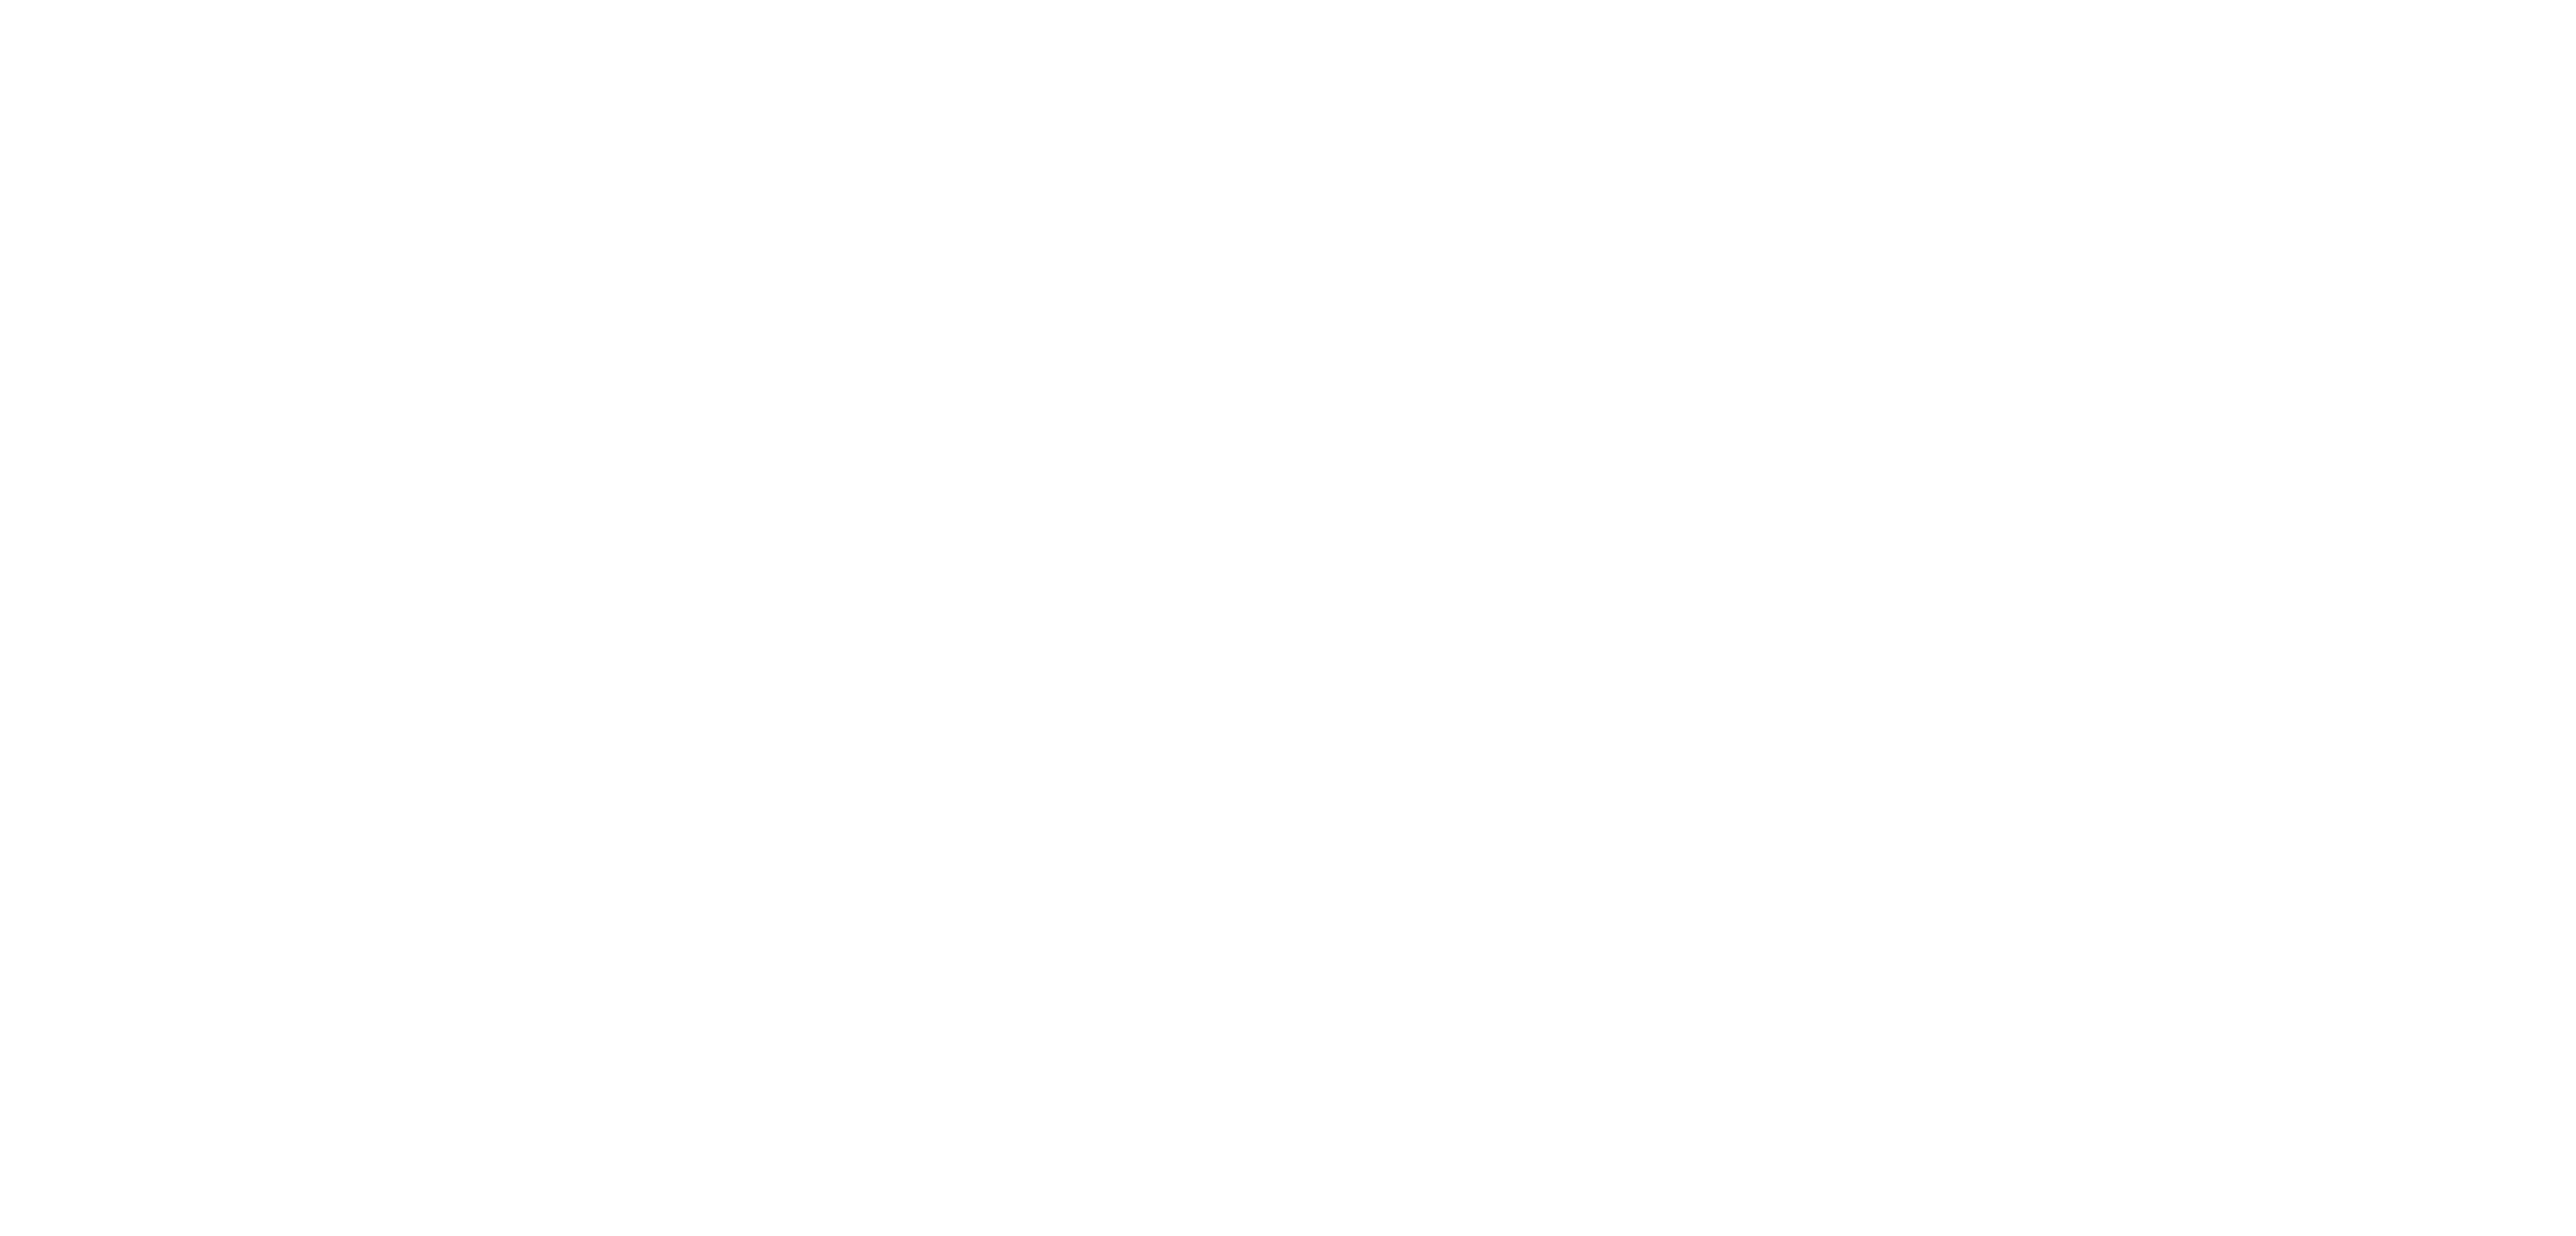

<IPython.core.display.Javascript object>


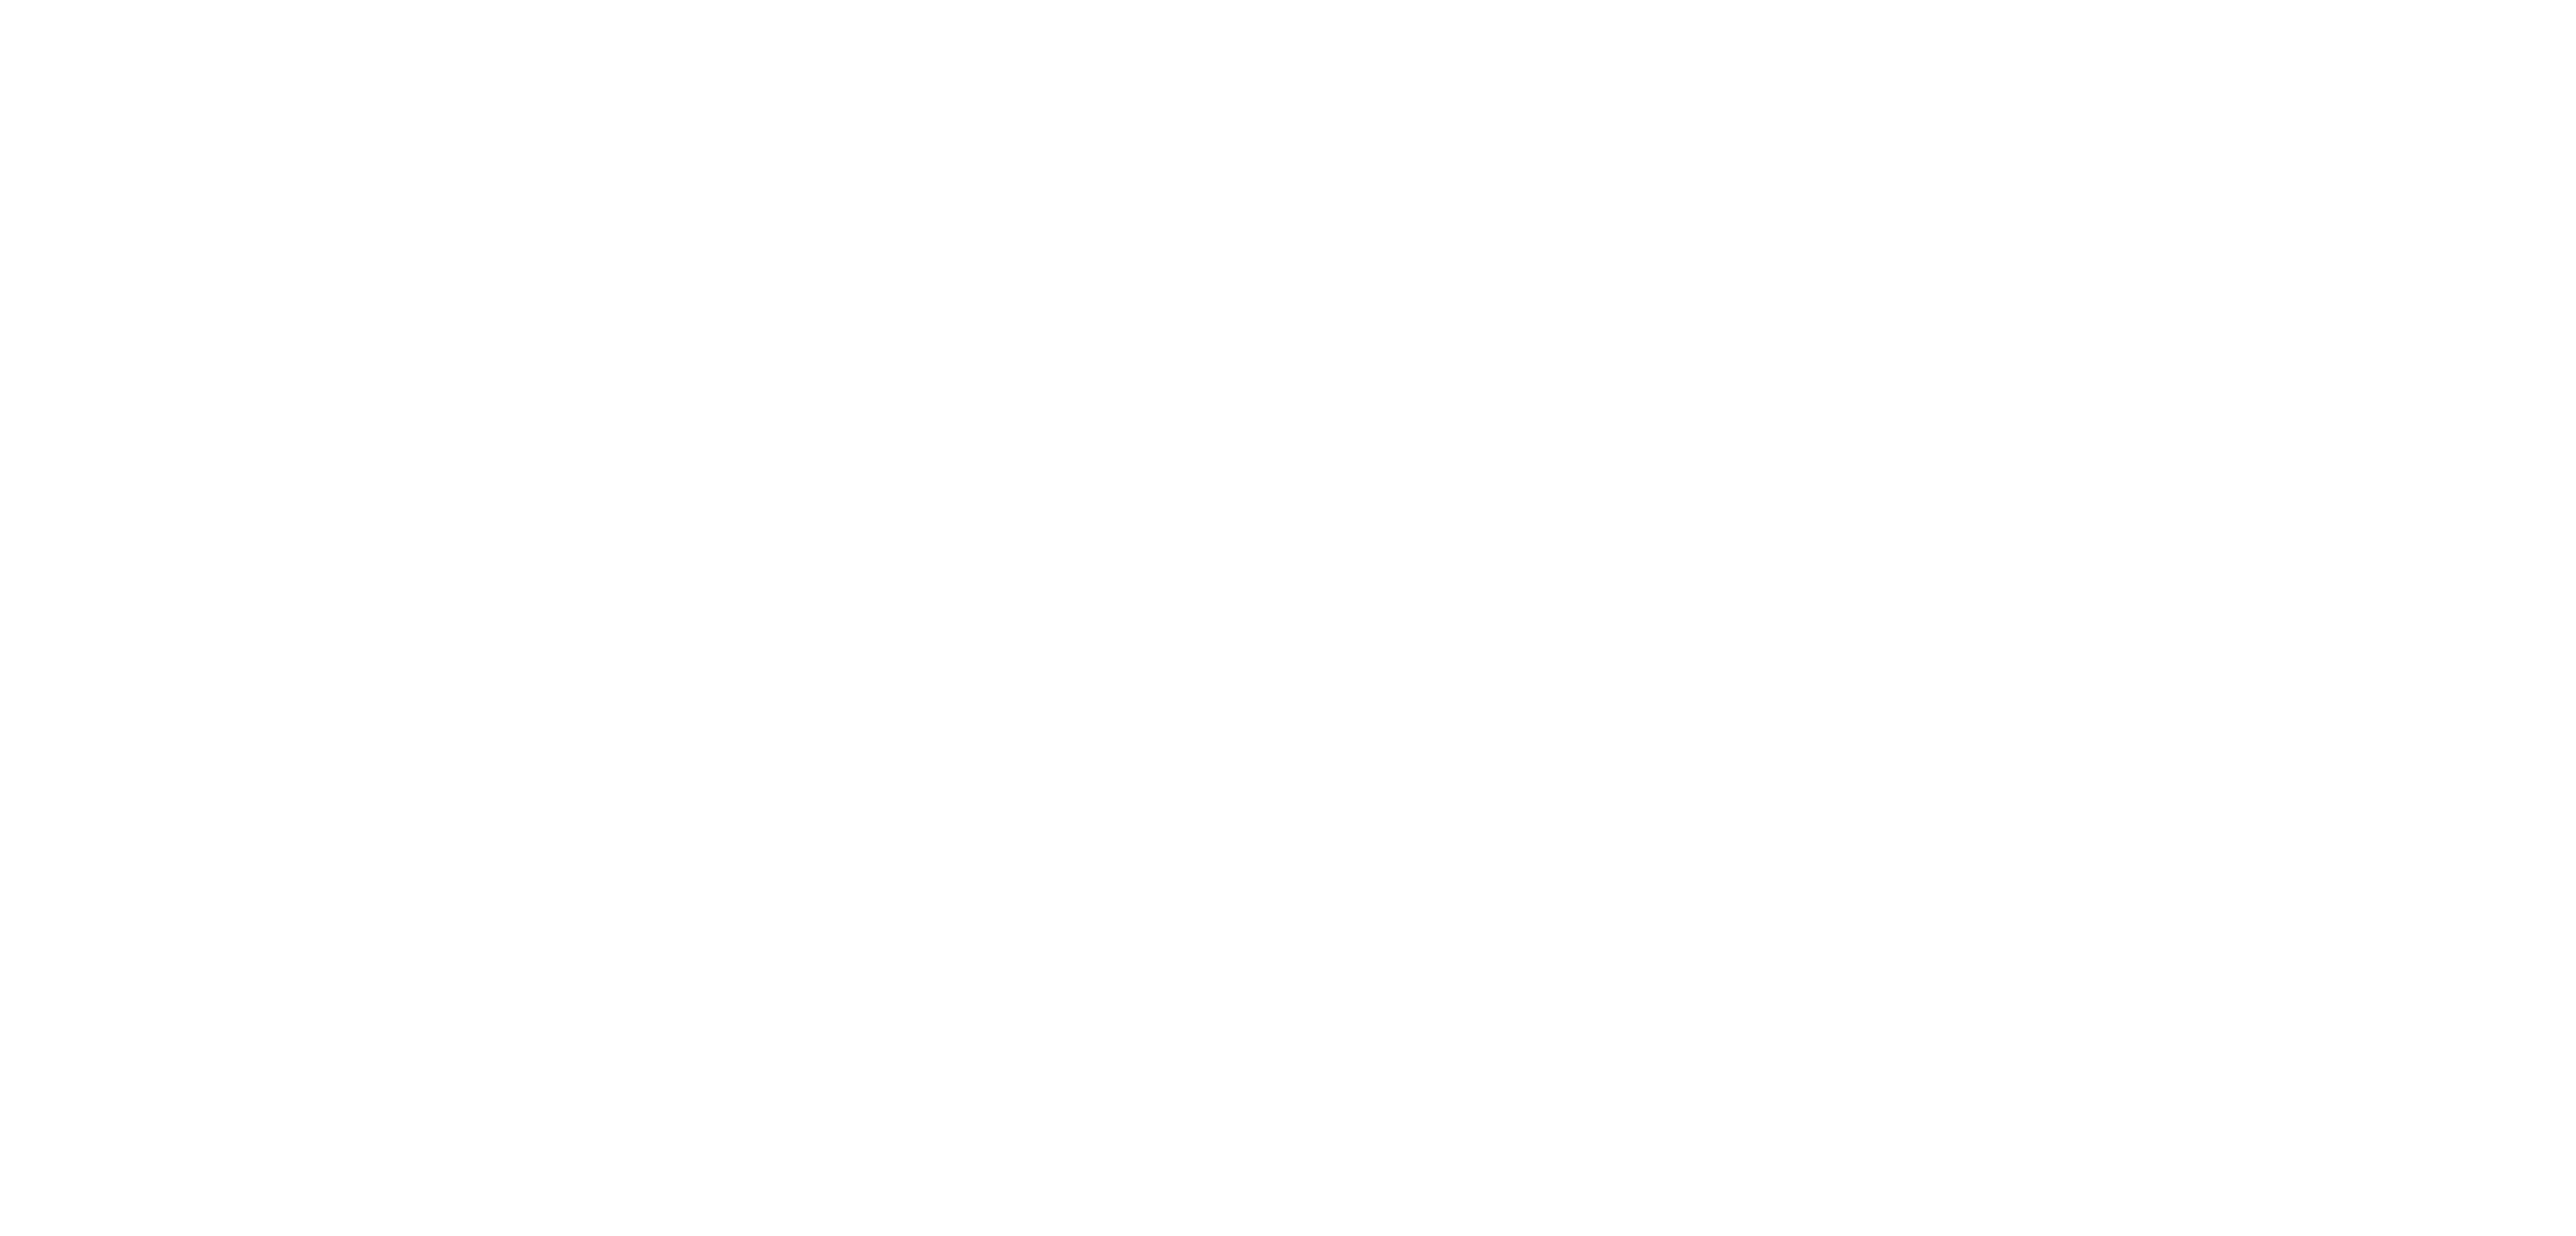

<IPython.core.display.Javascript object>


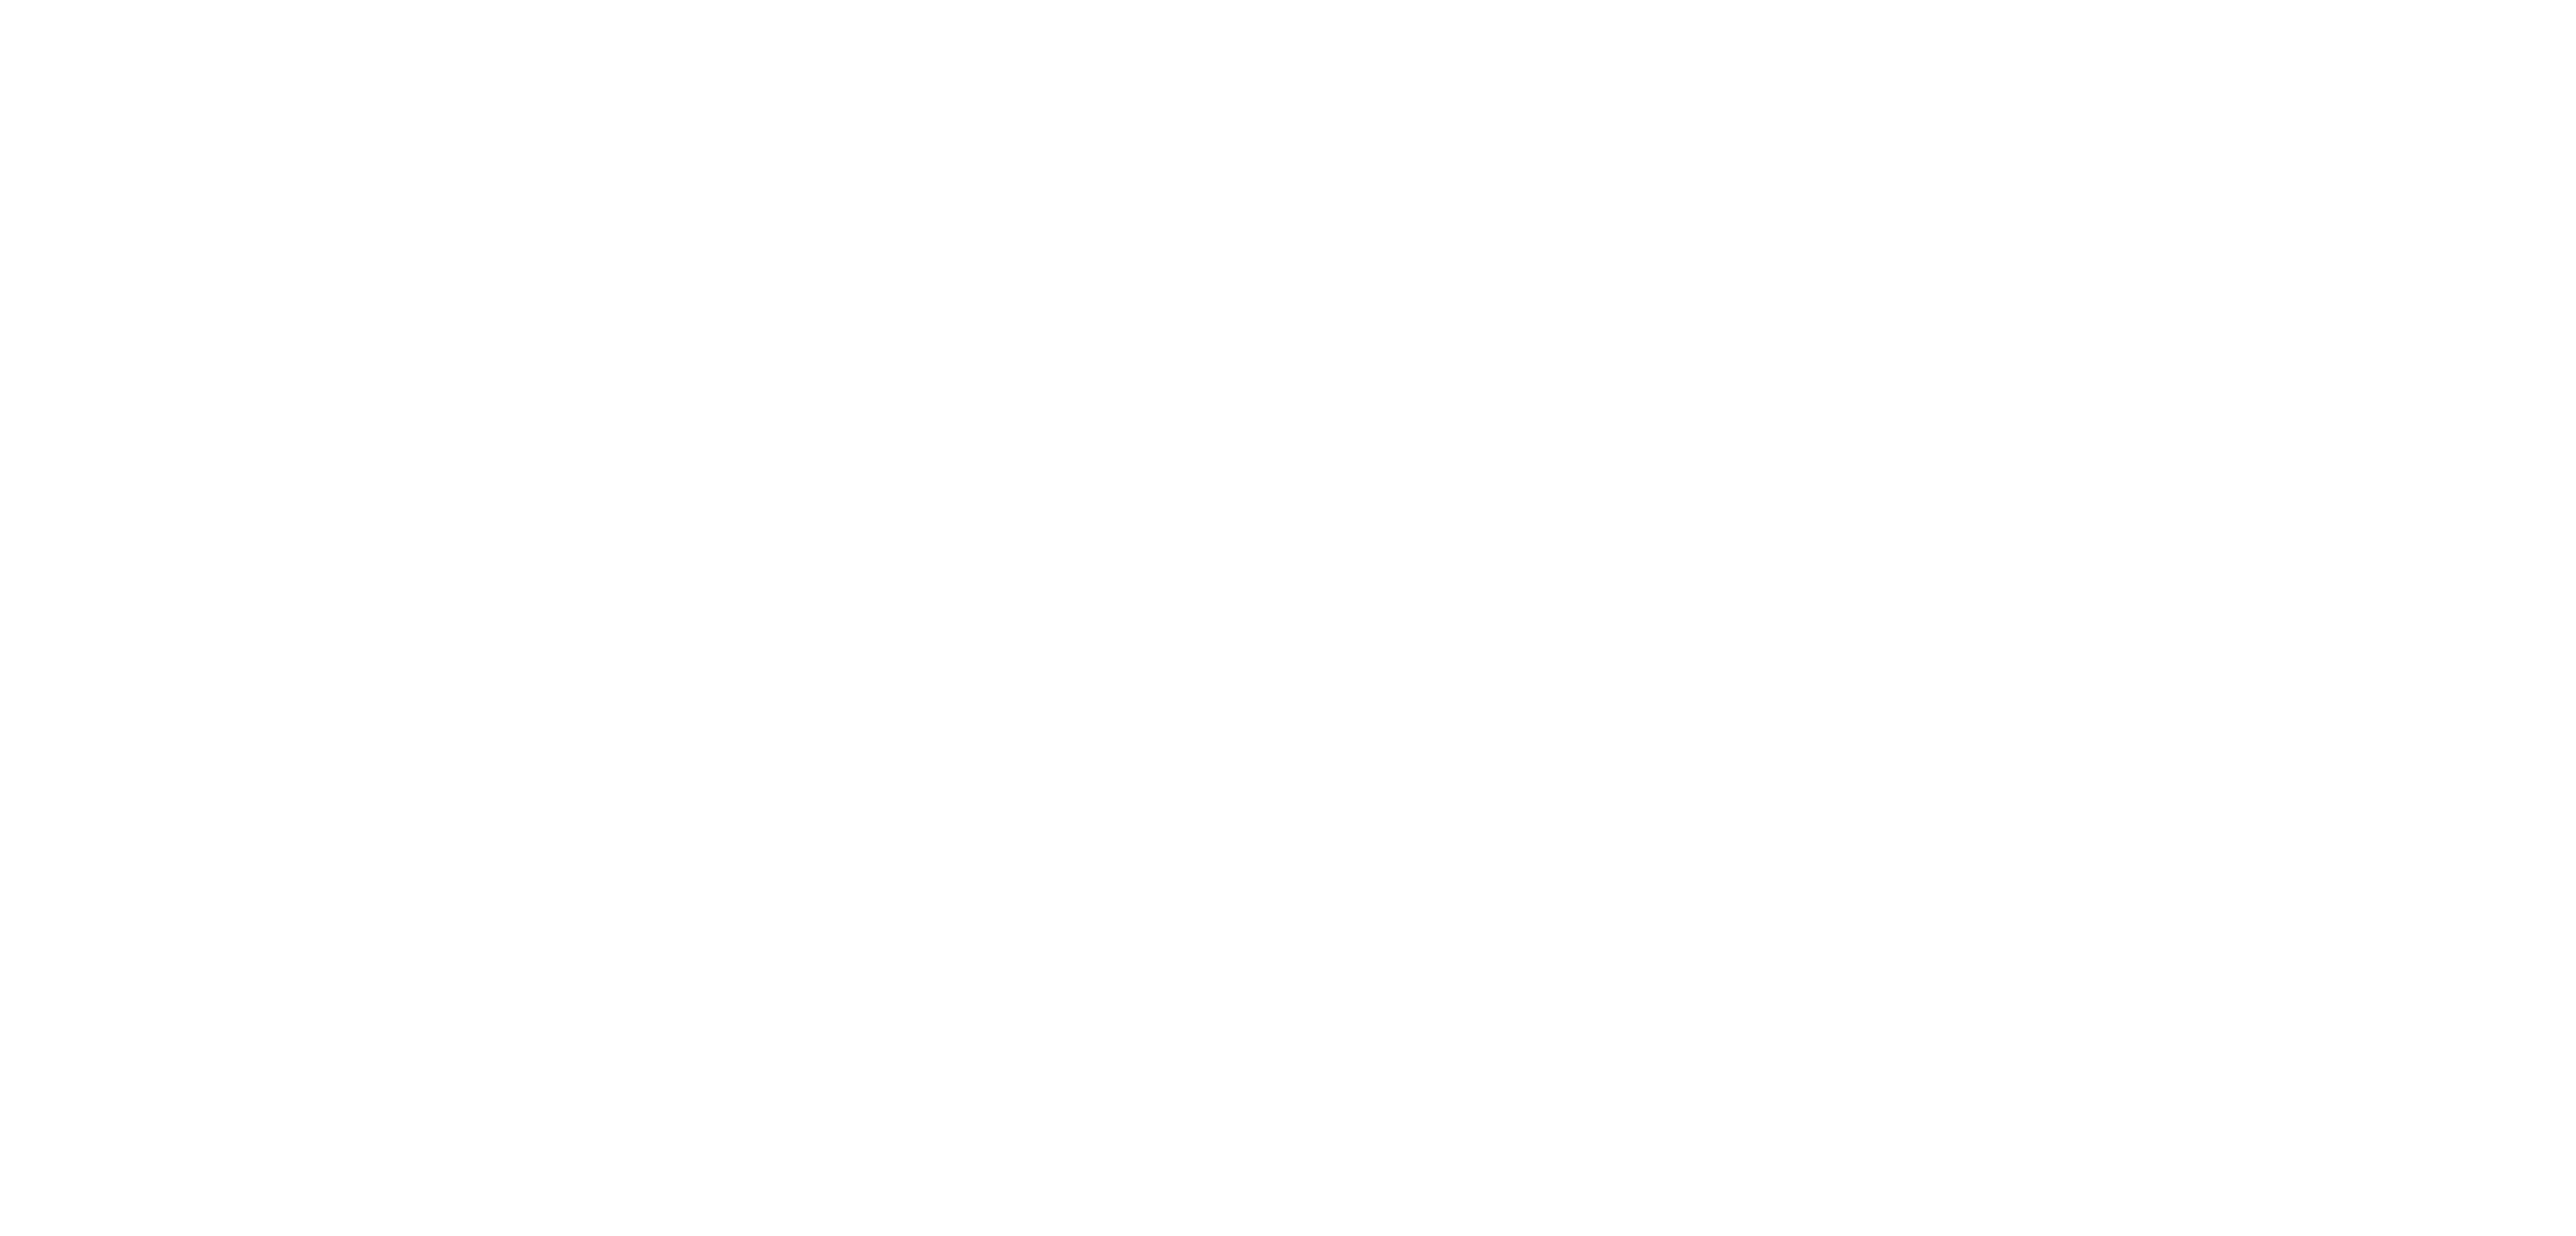

<IPython.core.display.Javascript object>


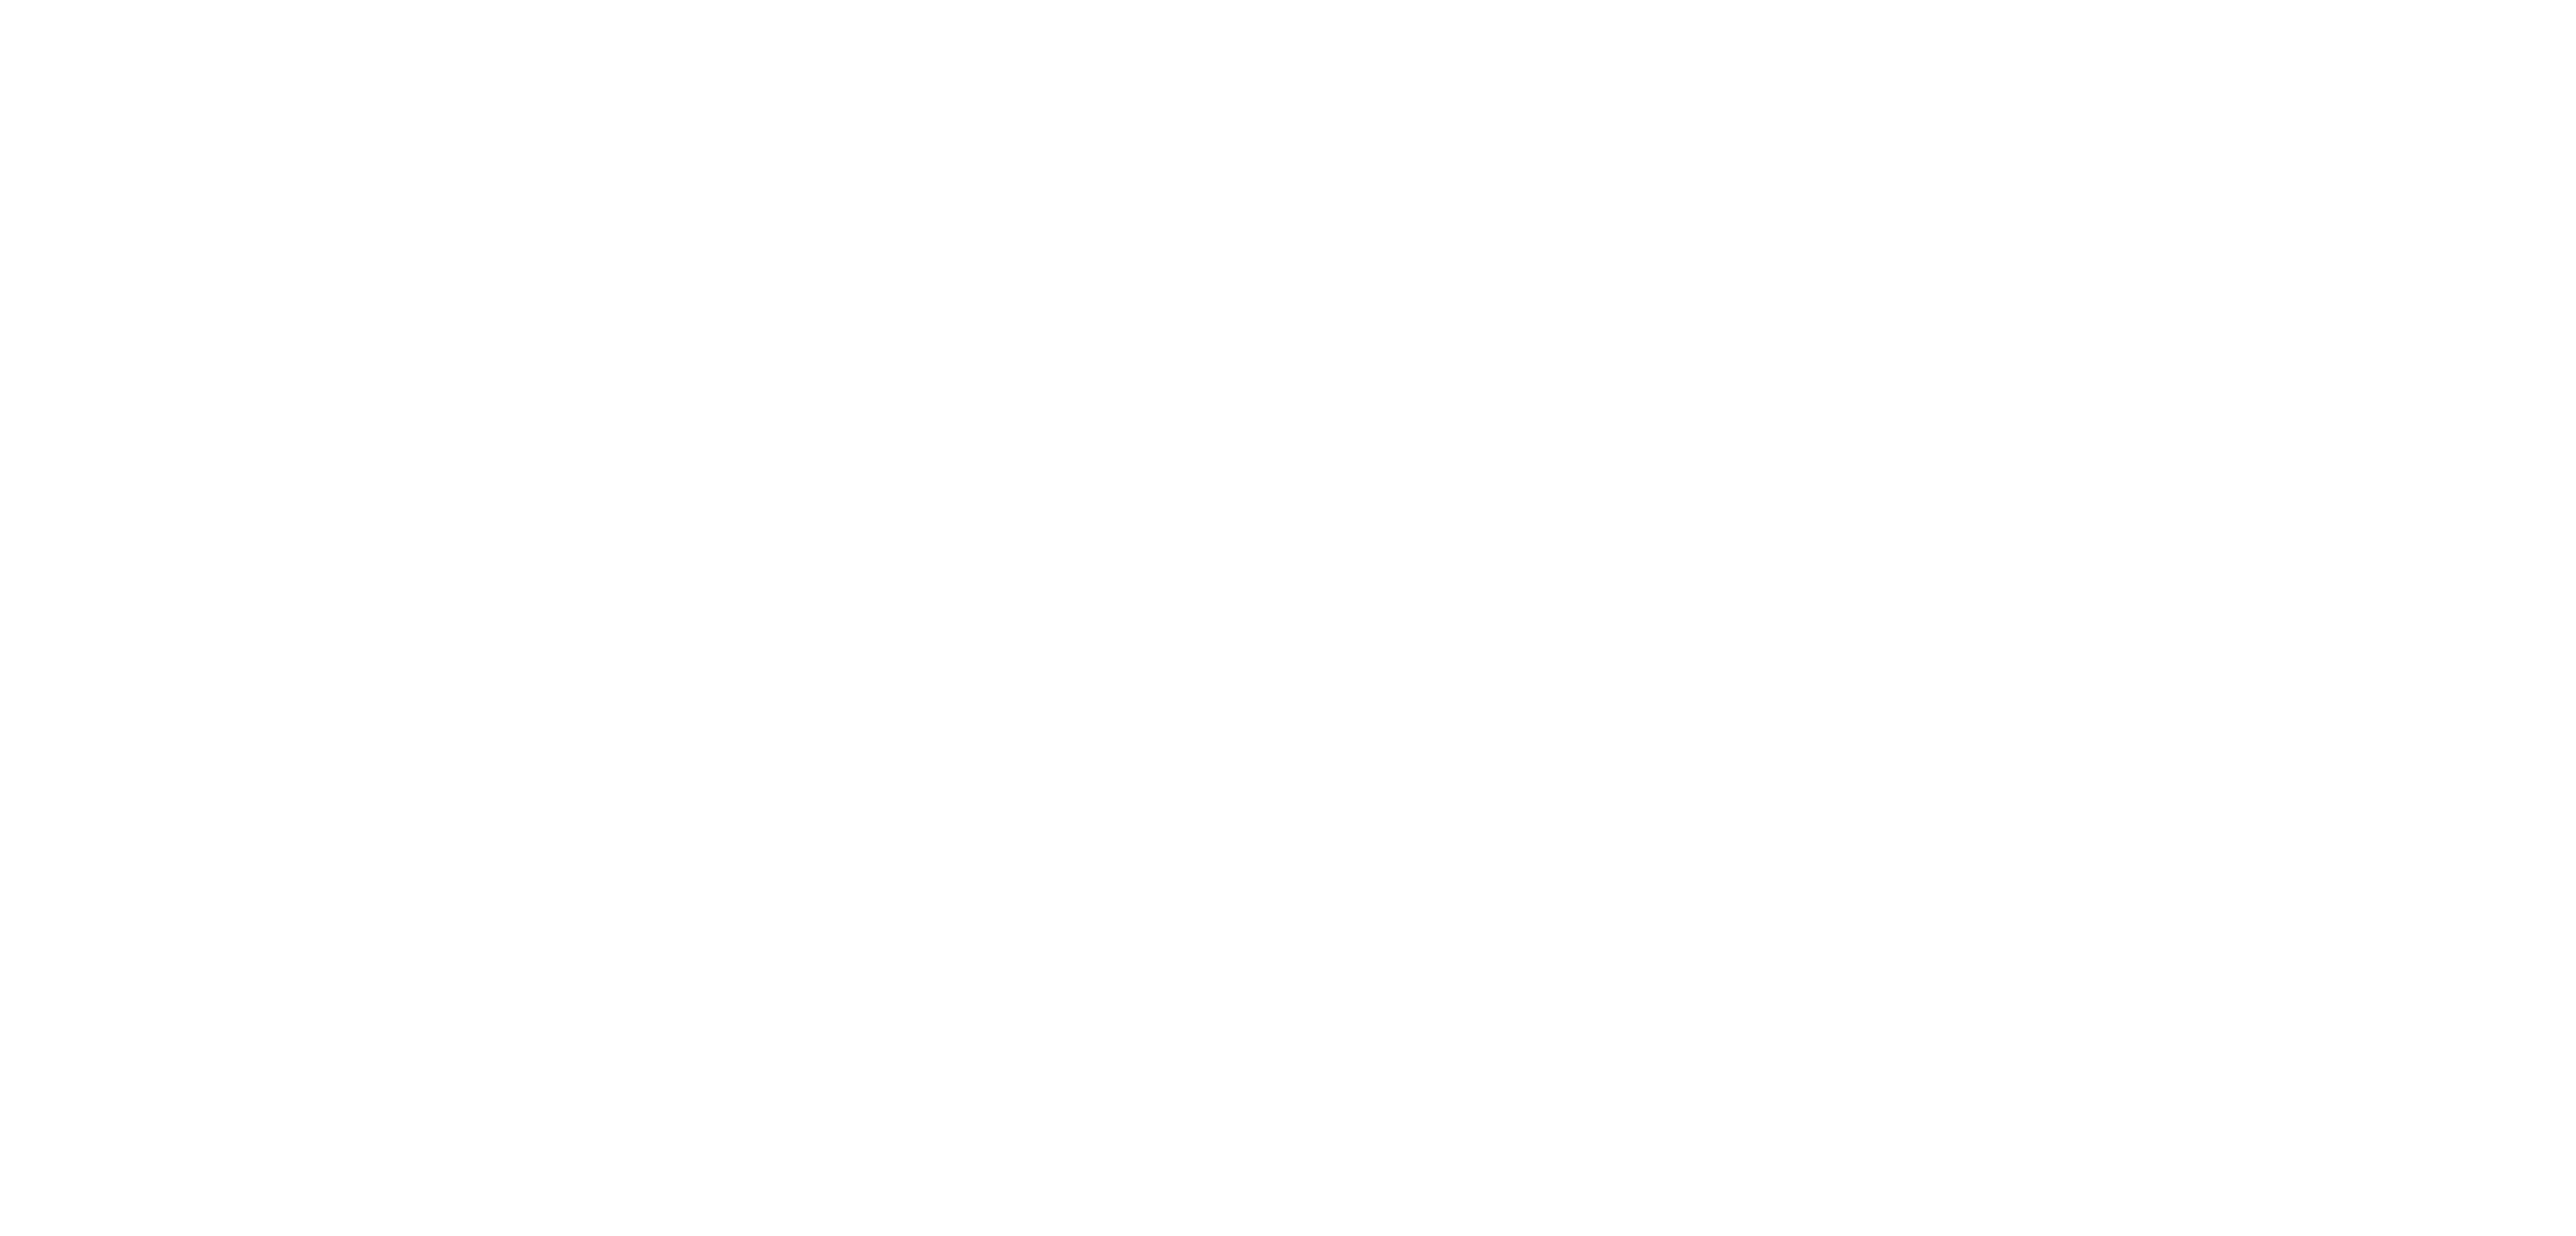

<IPython.core.display.Javascript object>


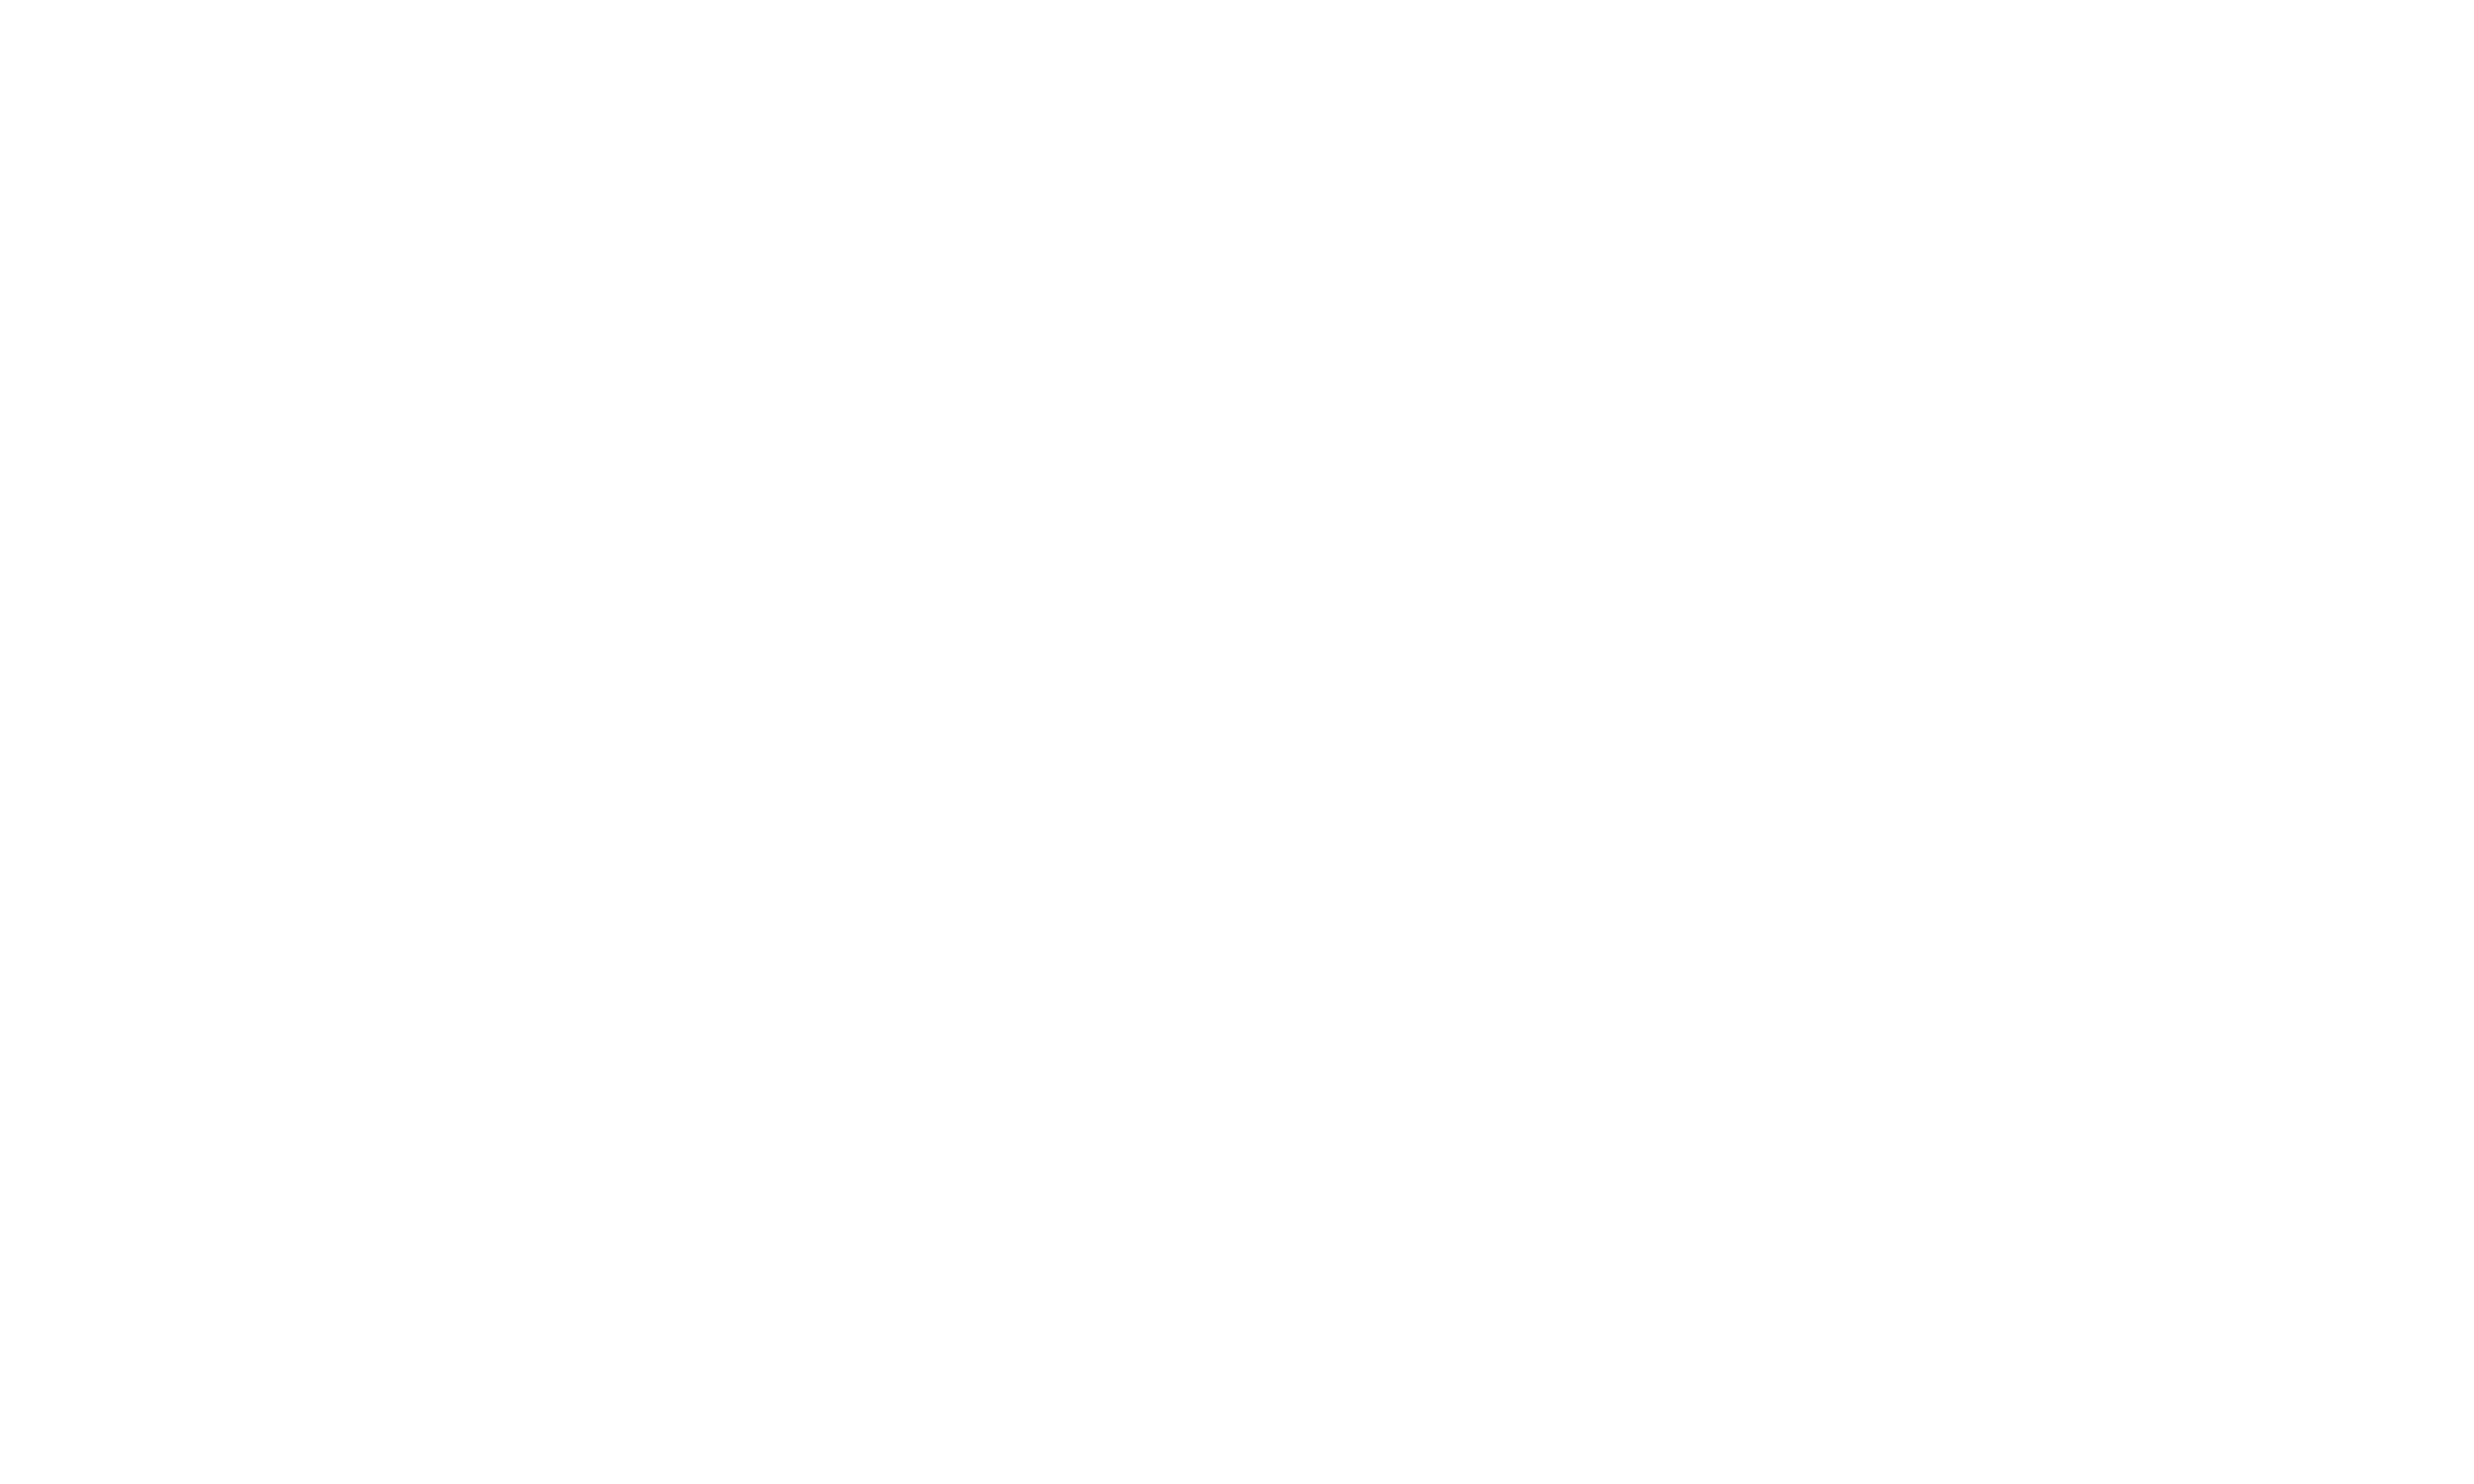

<IPython.core.display.Javascript object>


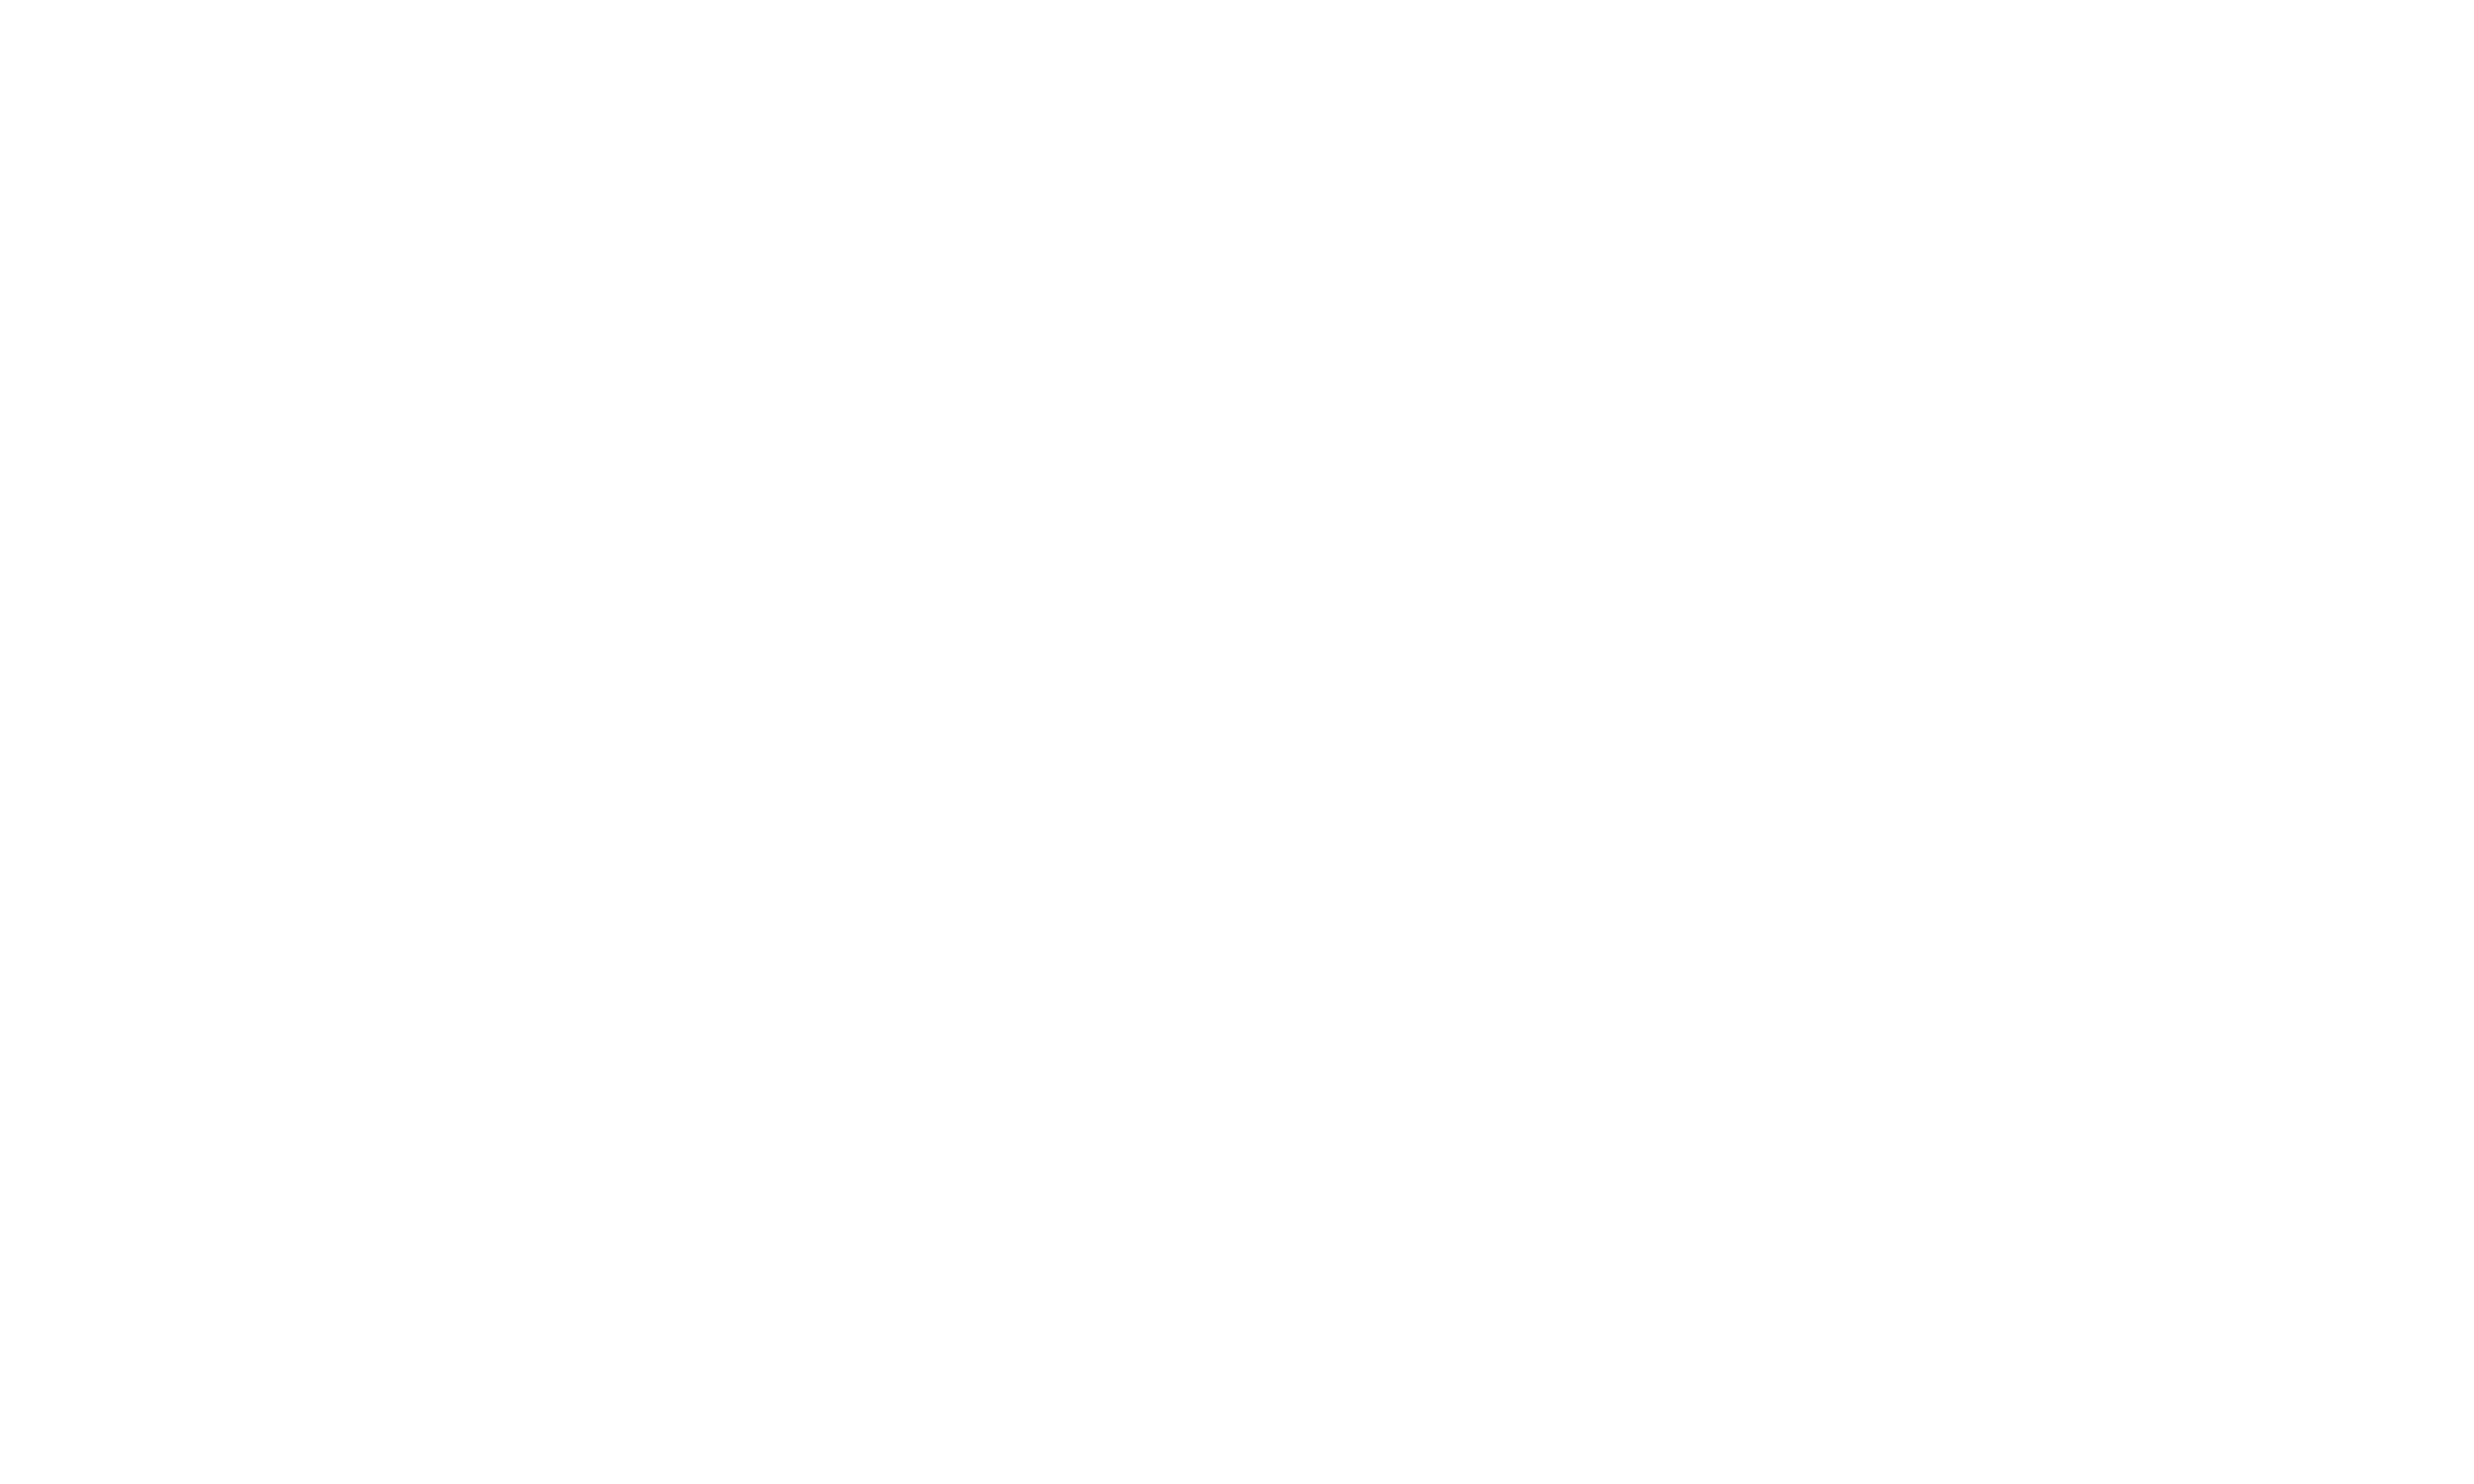

<IPython.core.display.Javascript object>


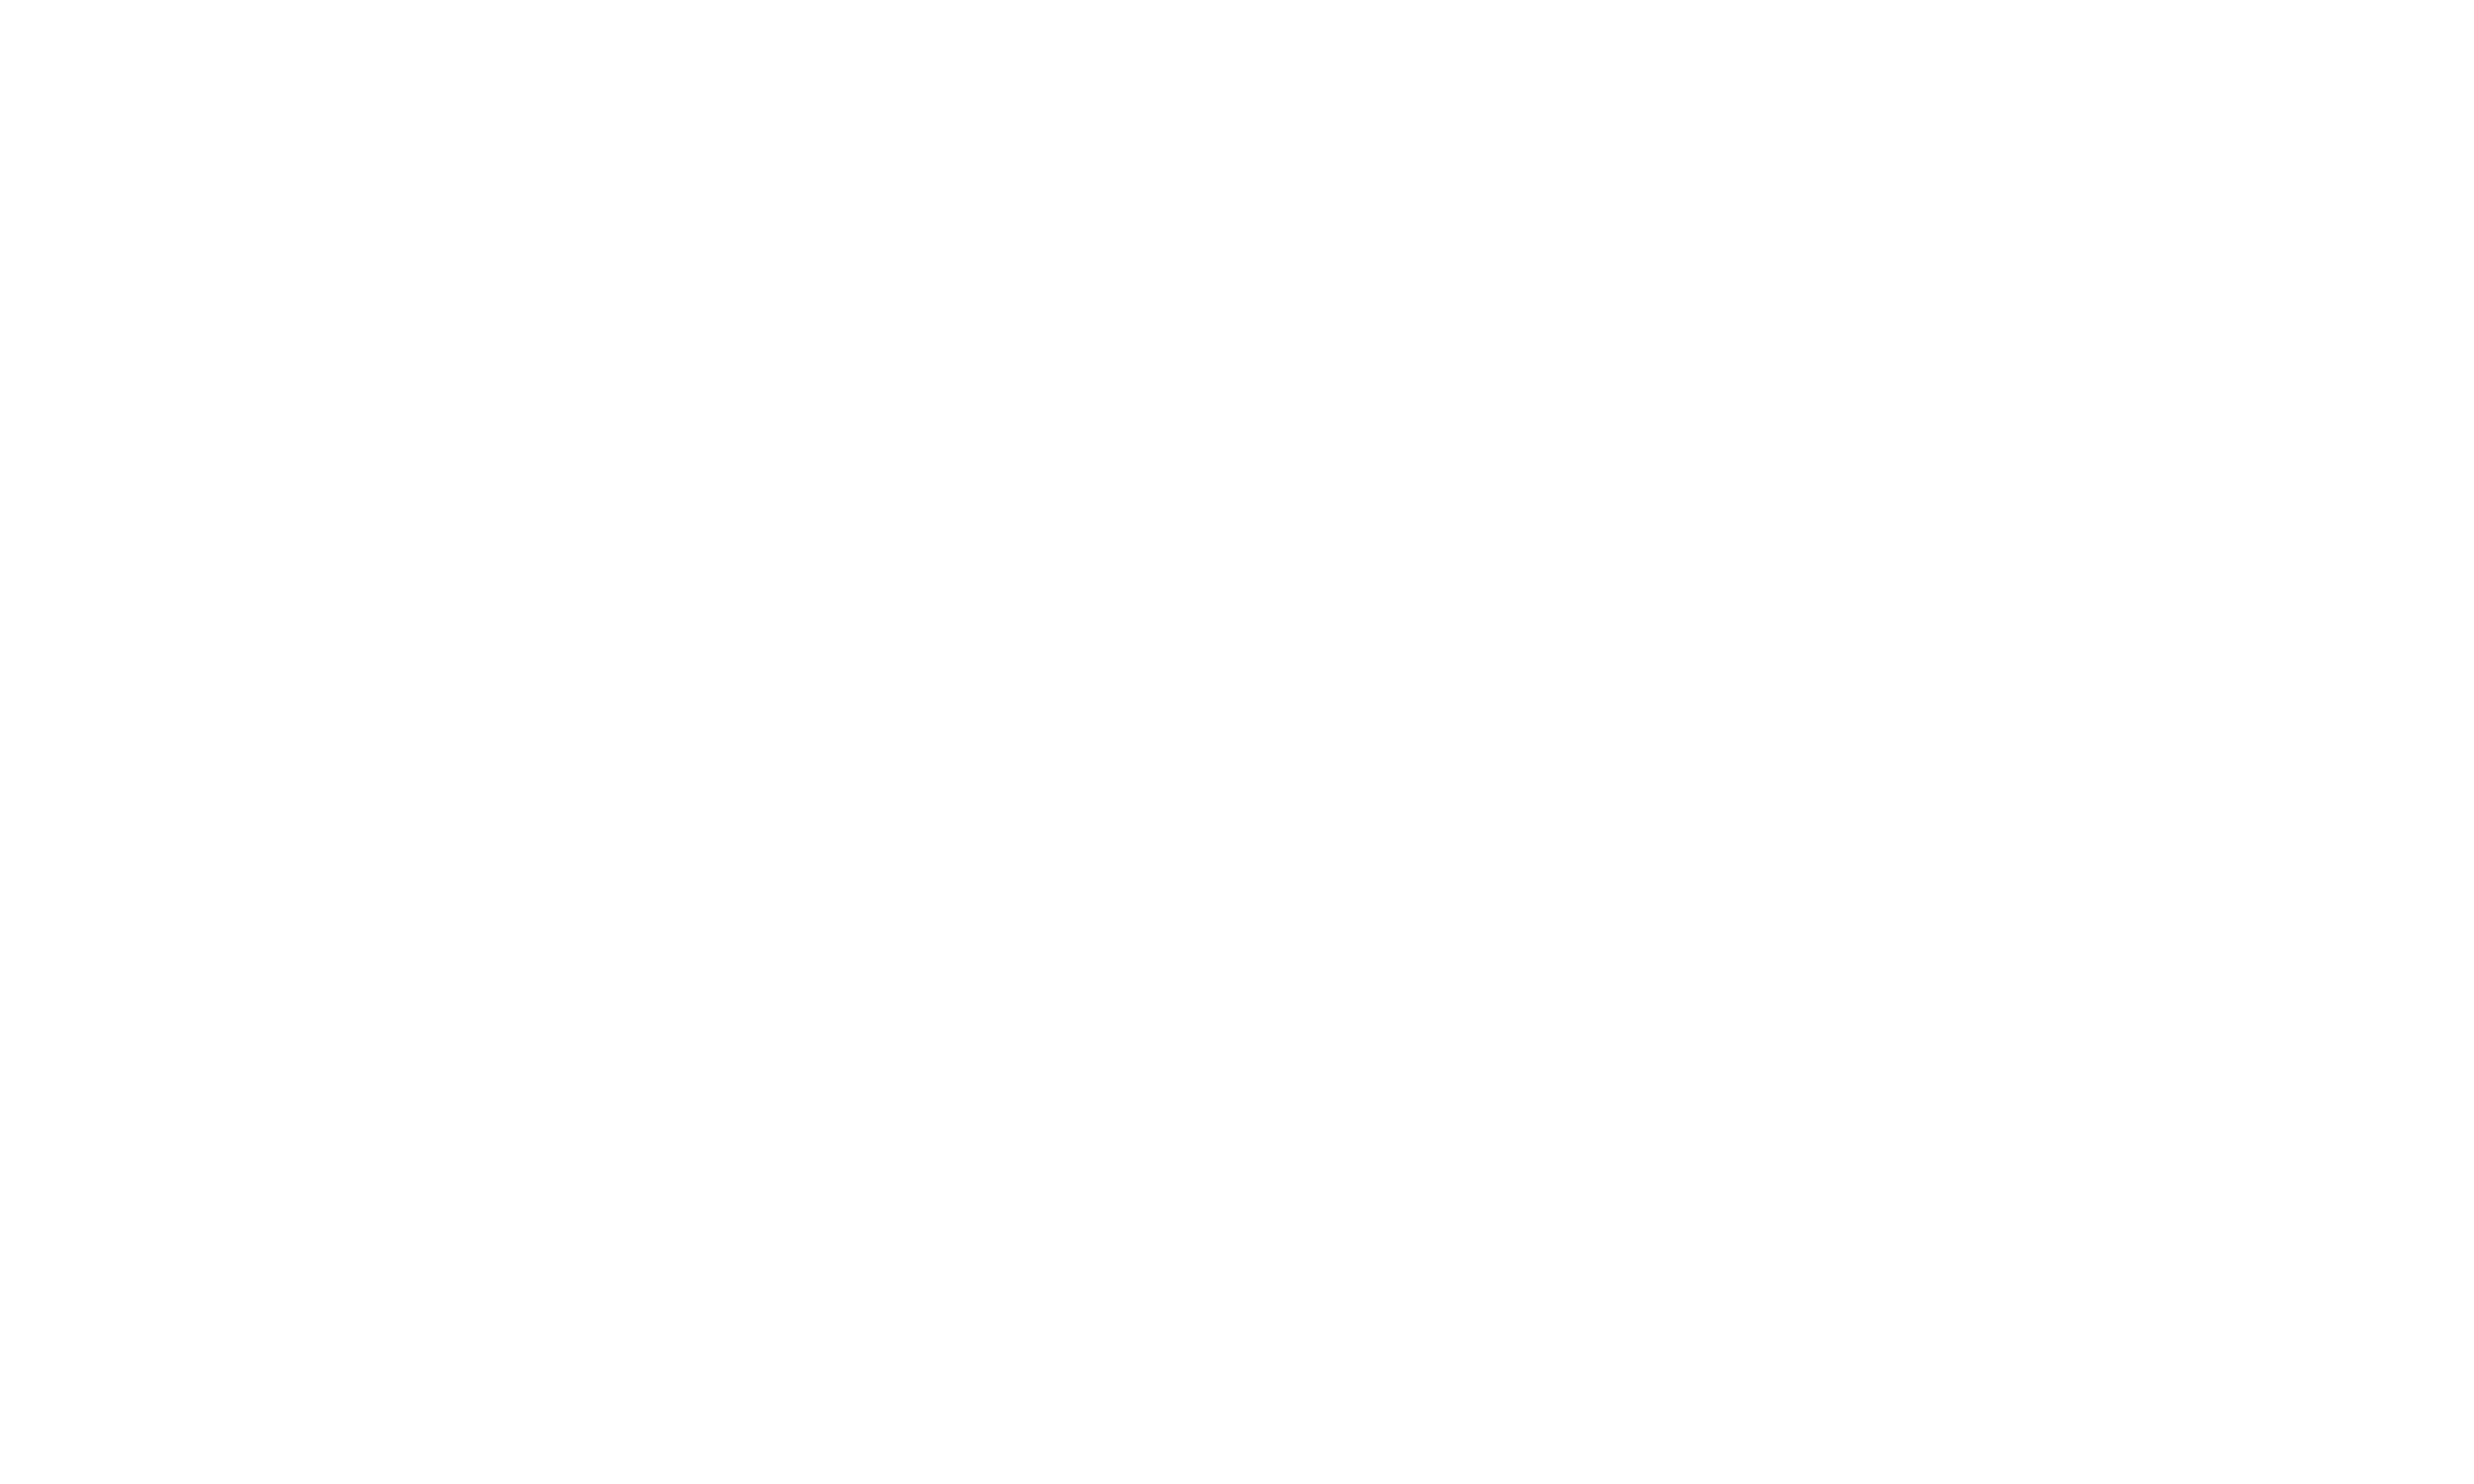

<IPython.core.display.Javascript object>


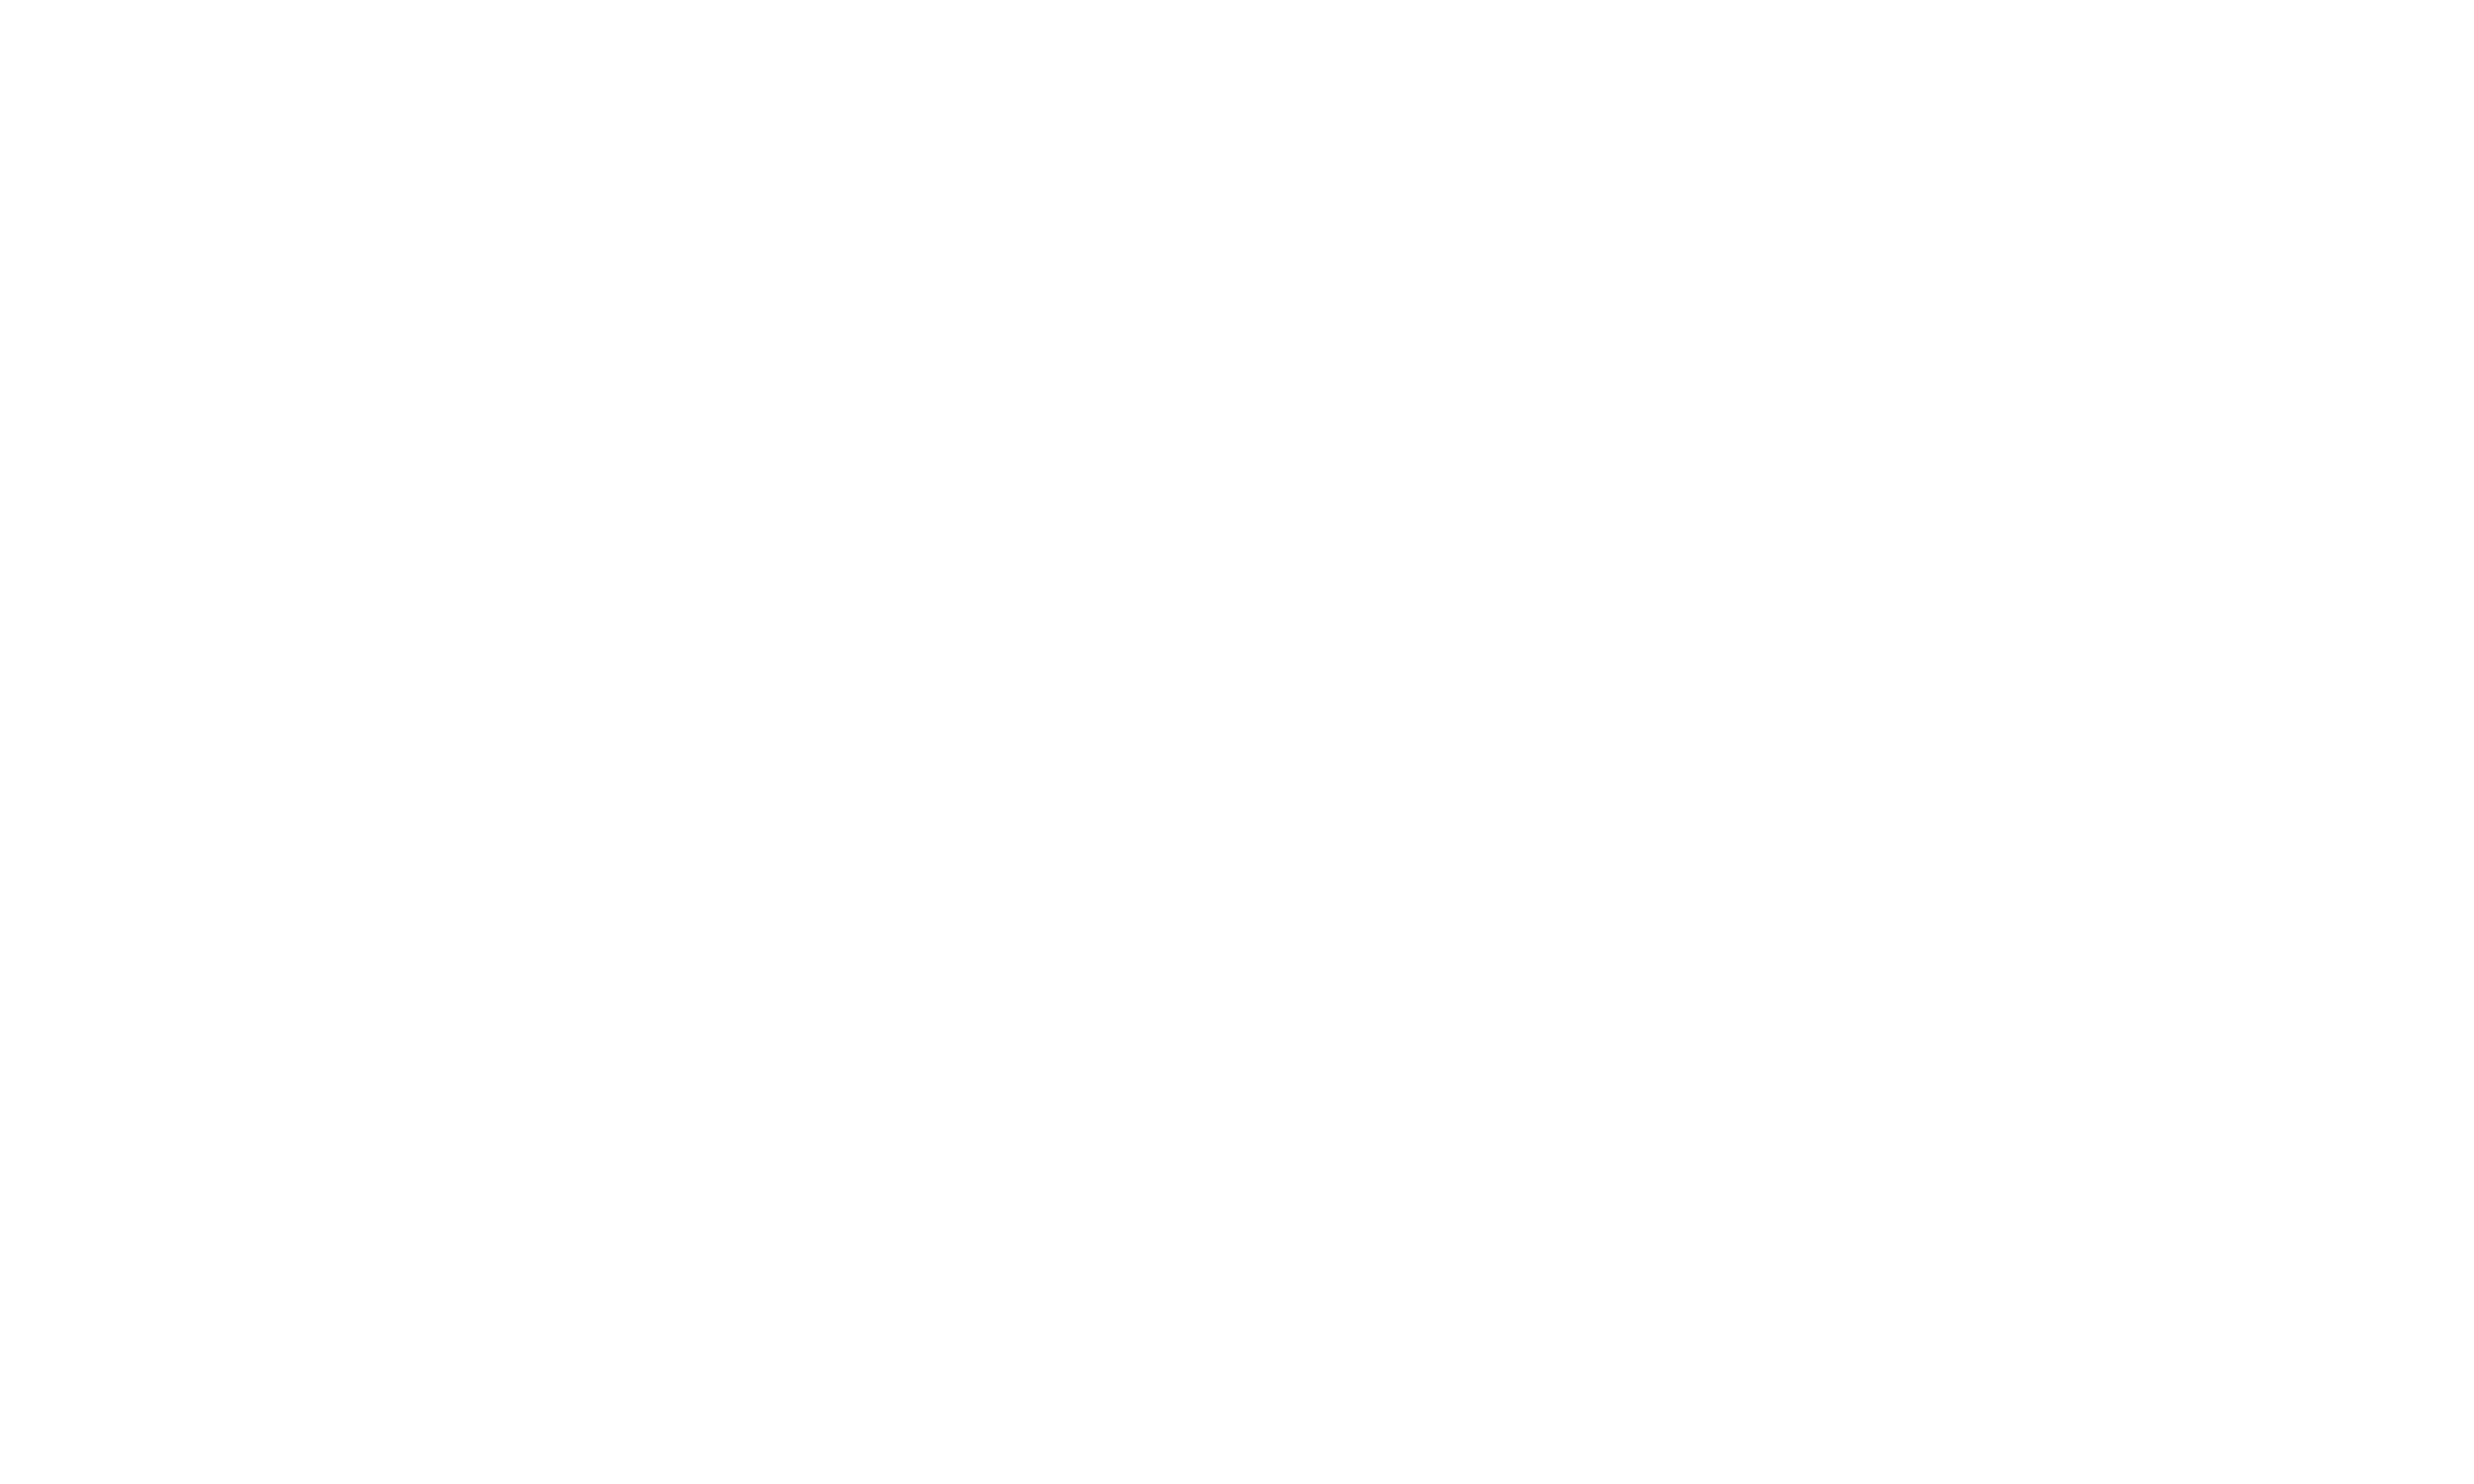

<IPython.core.display.Javascript object>


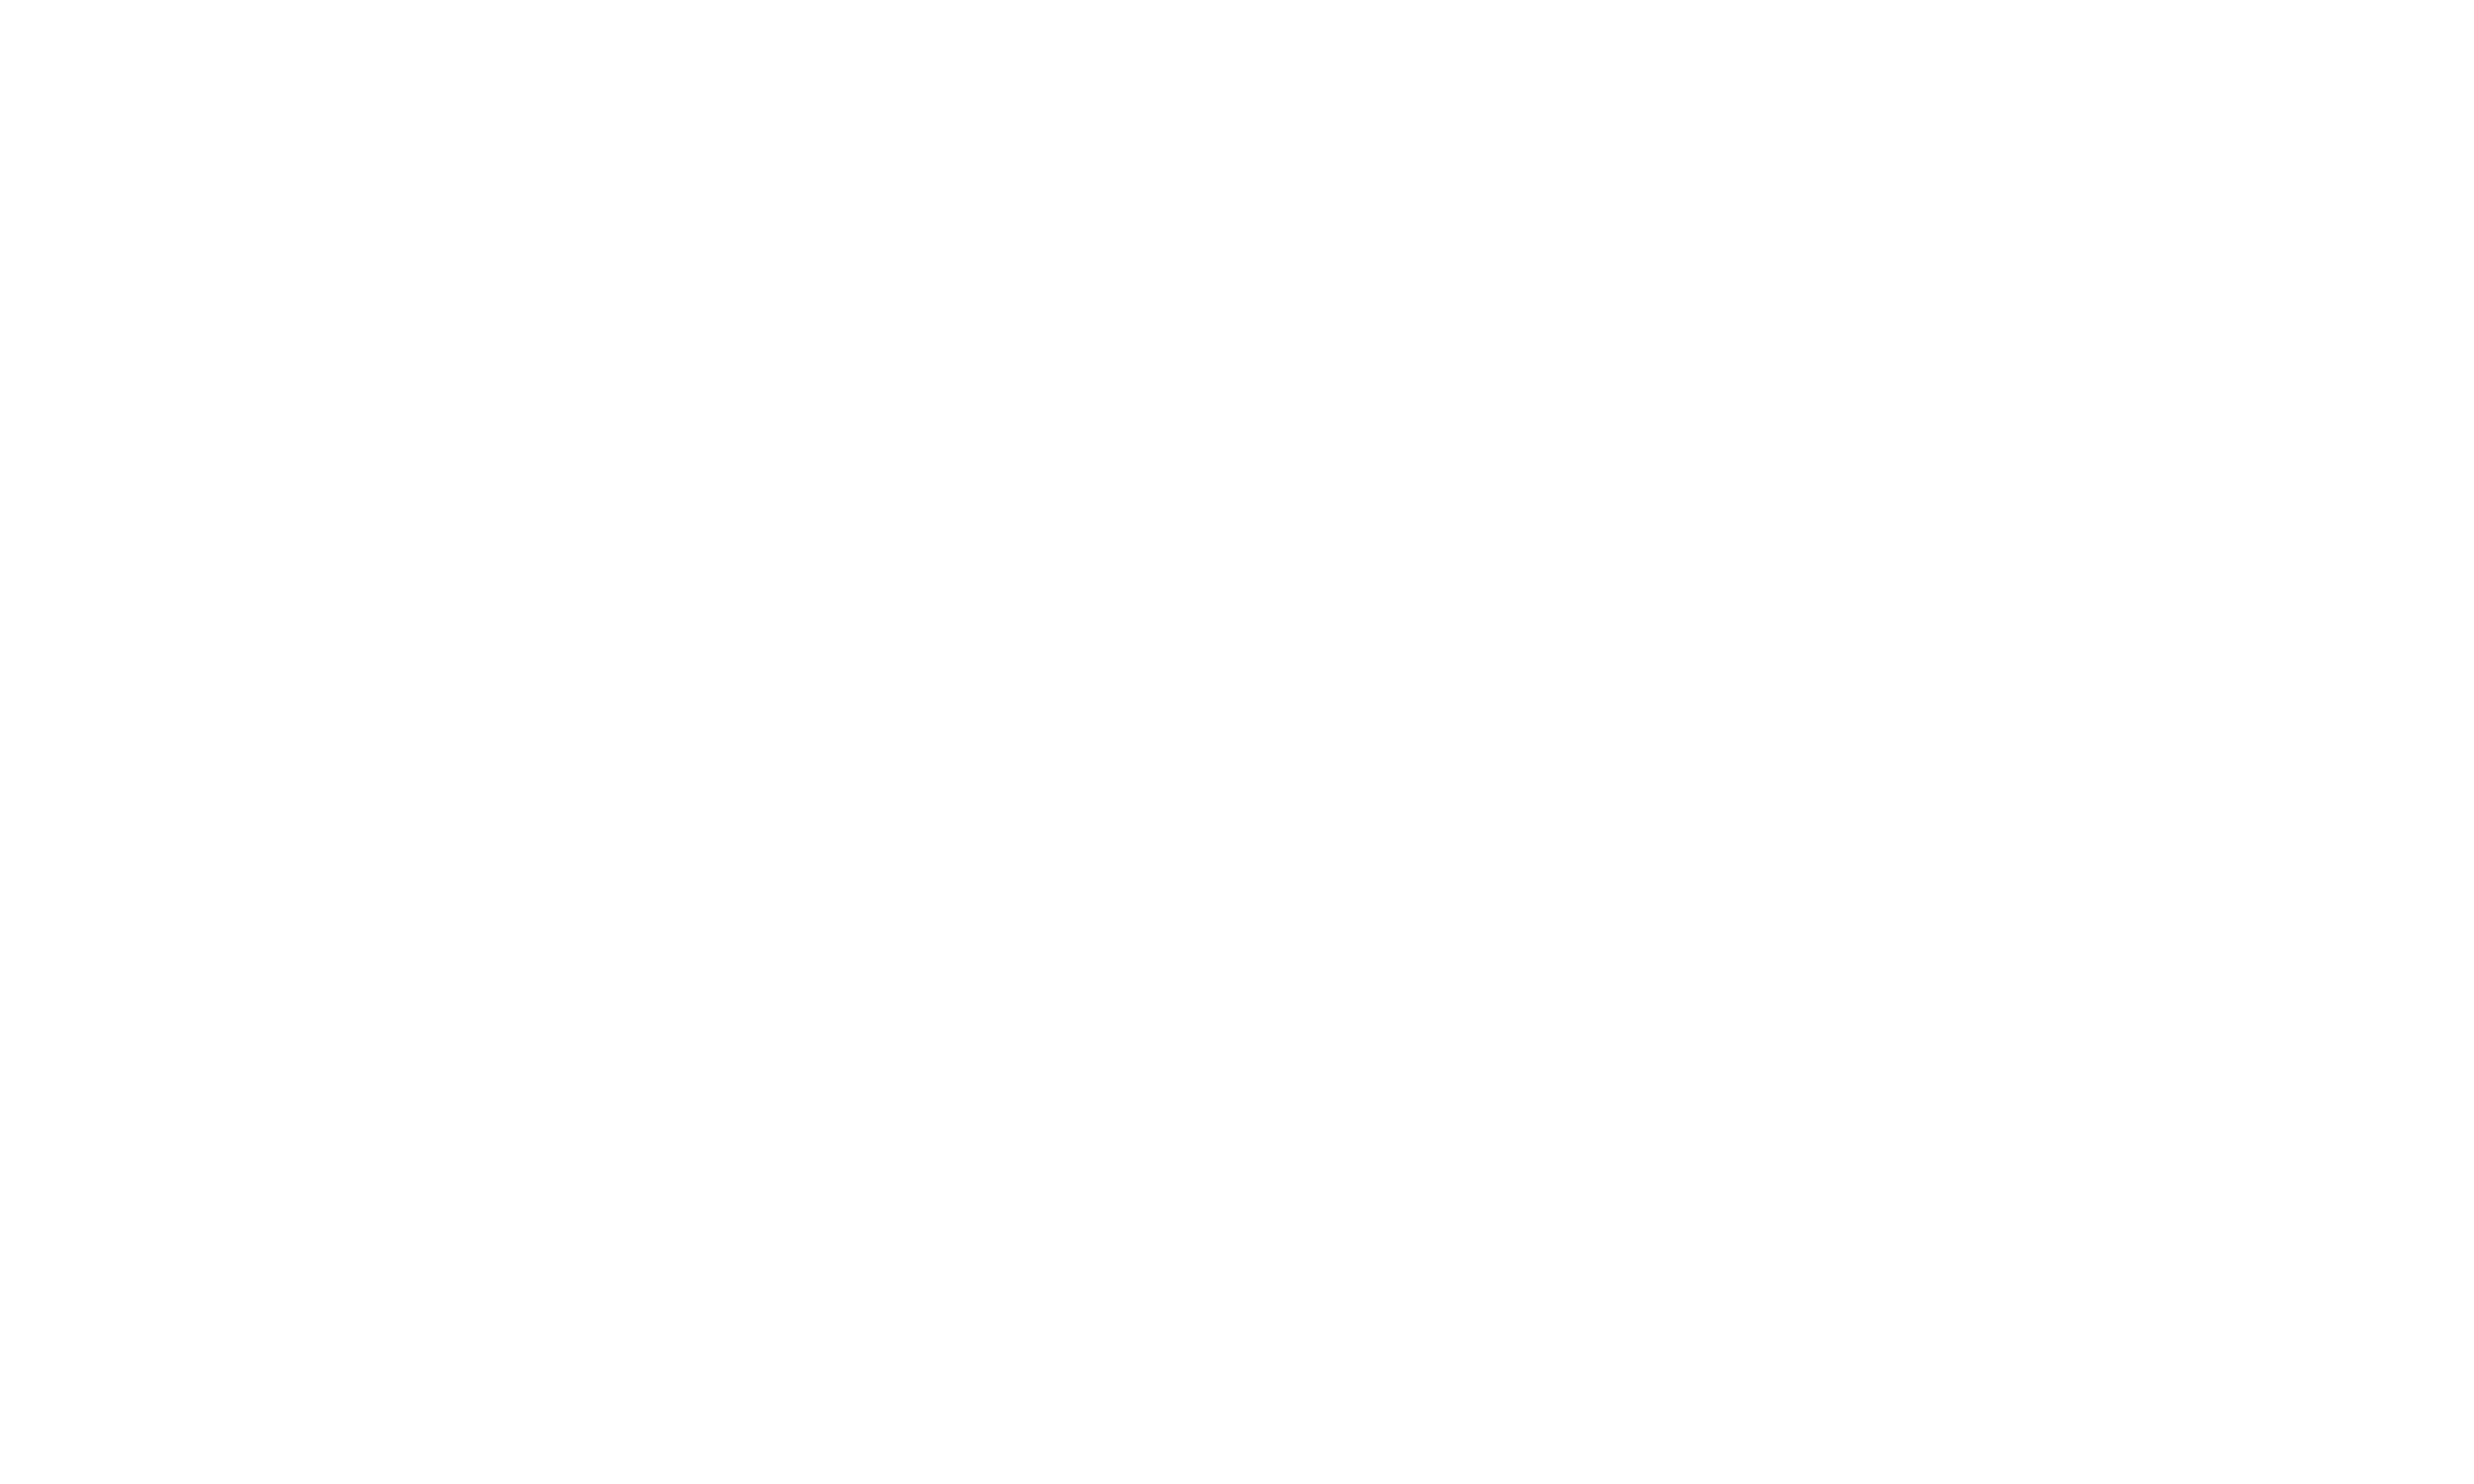

<IPython.core.display.Javascript object>


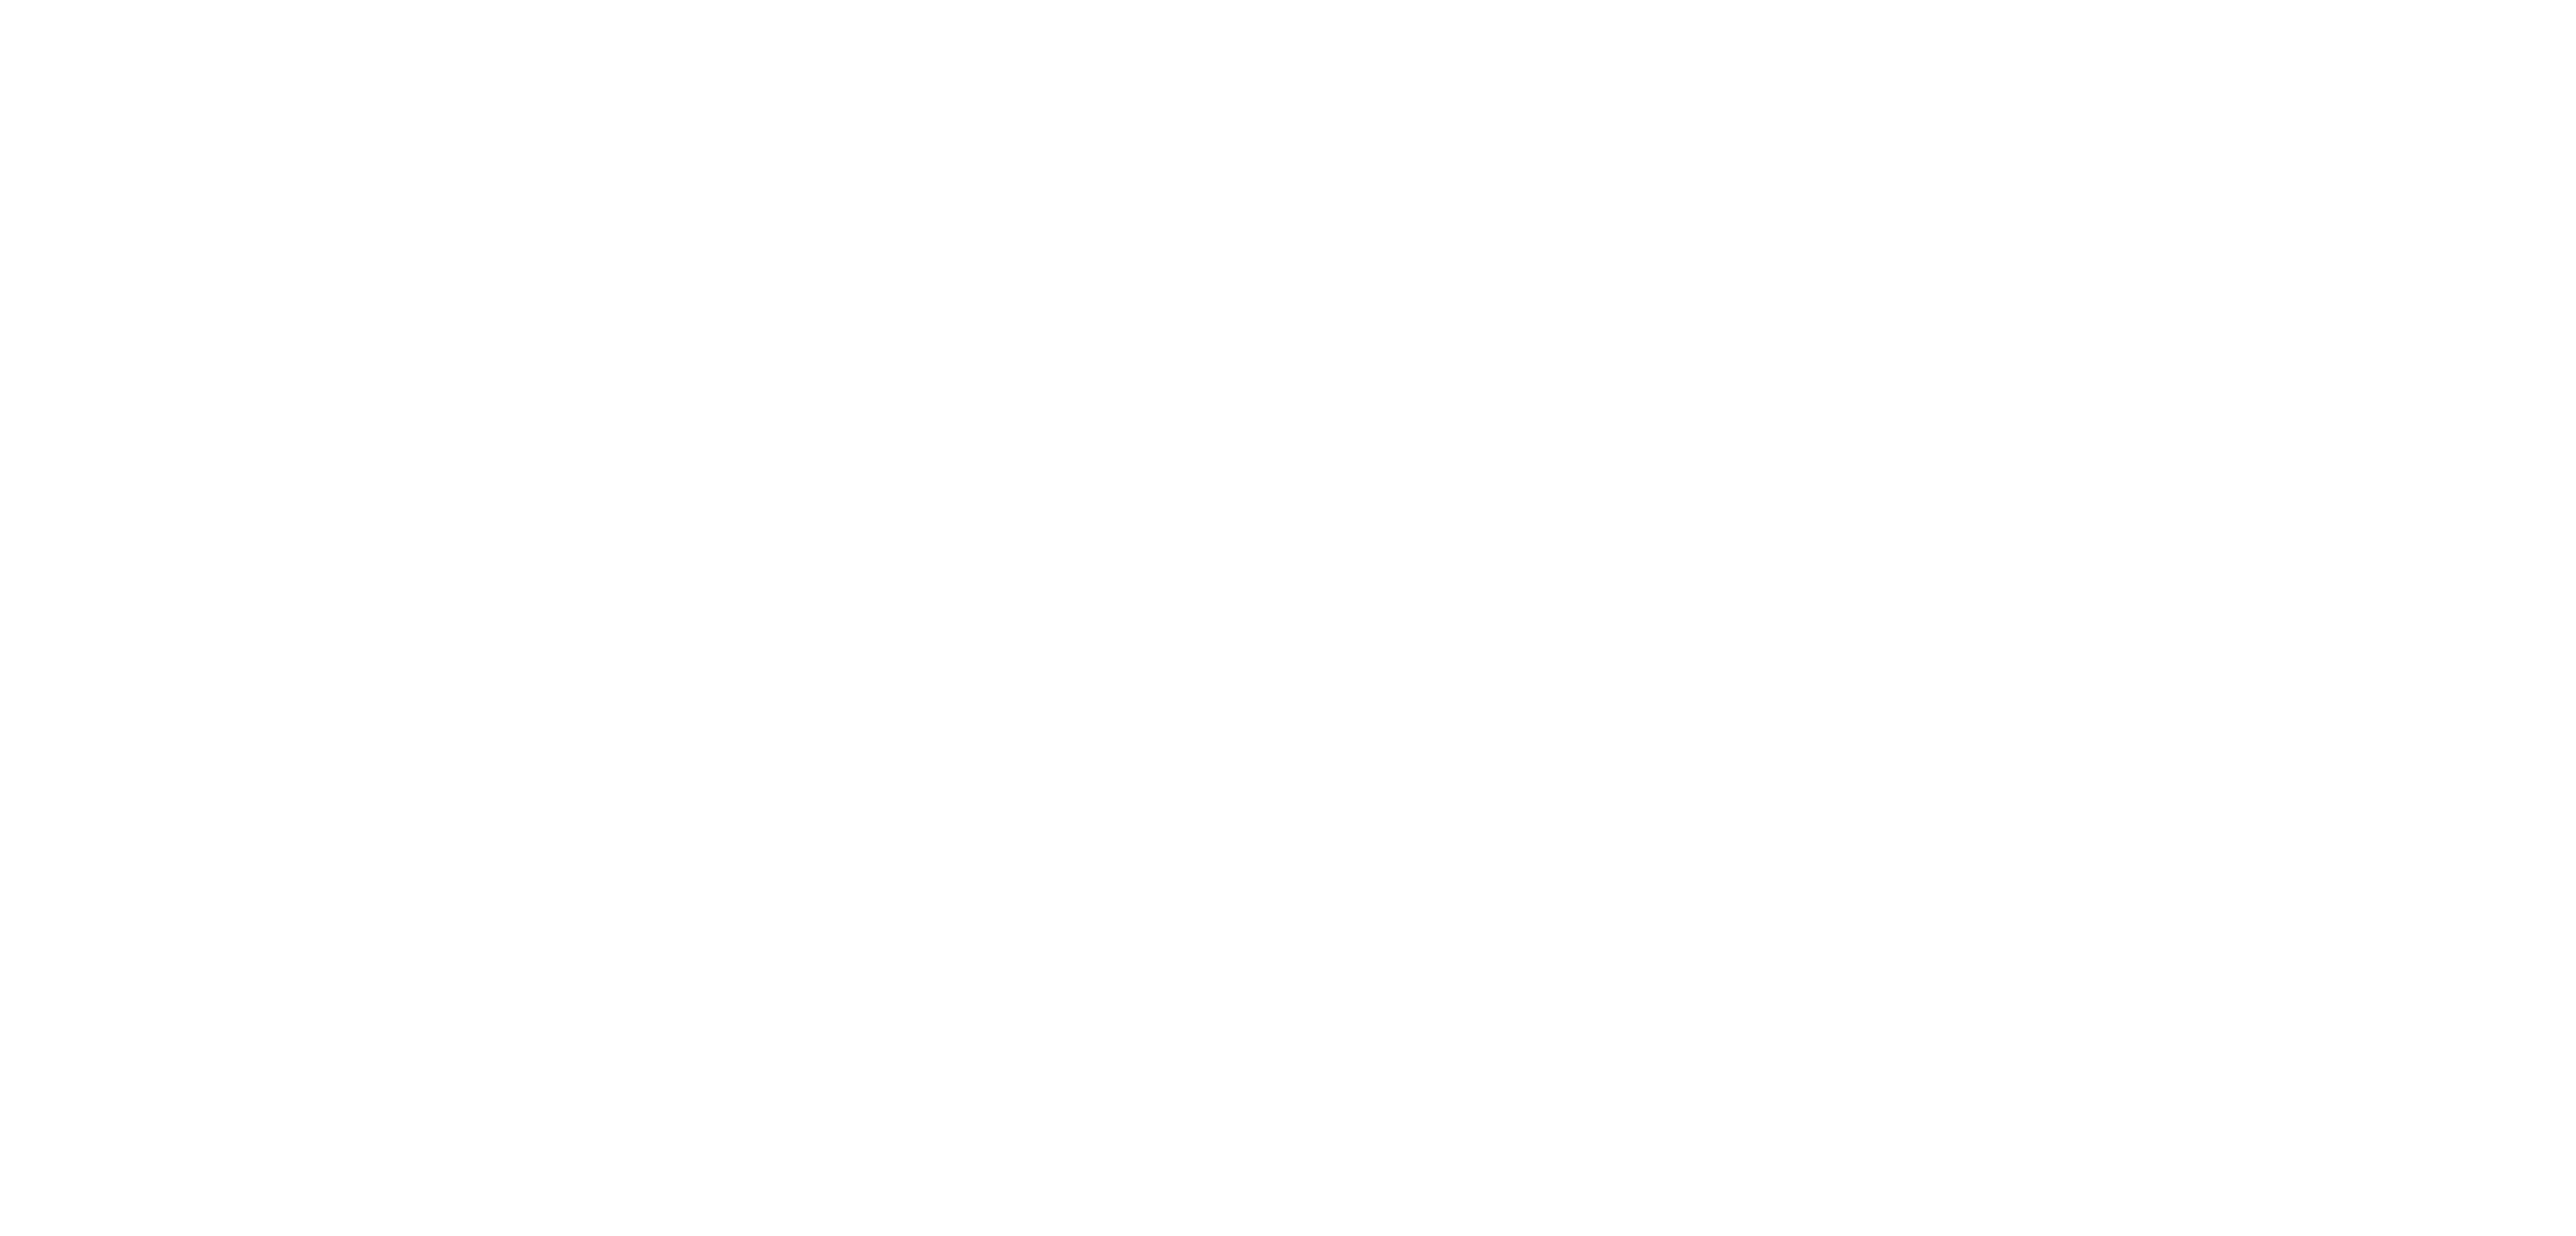

<IPython.core.display.Javascript object>


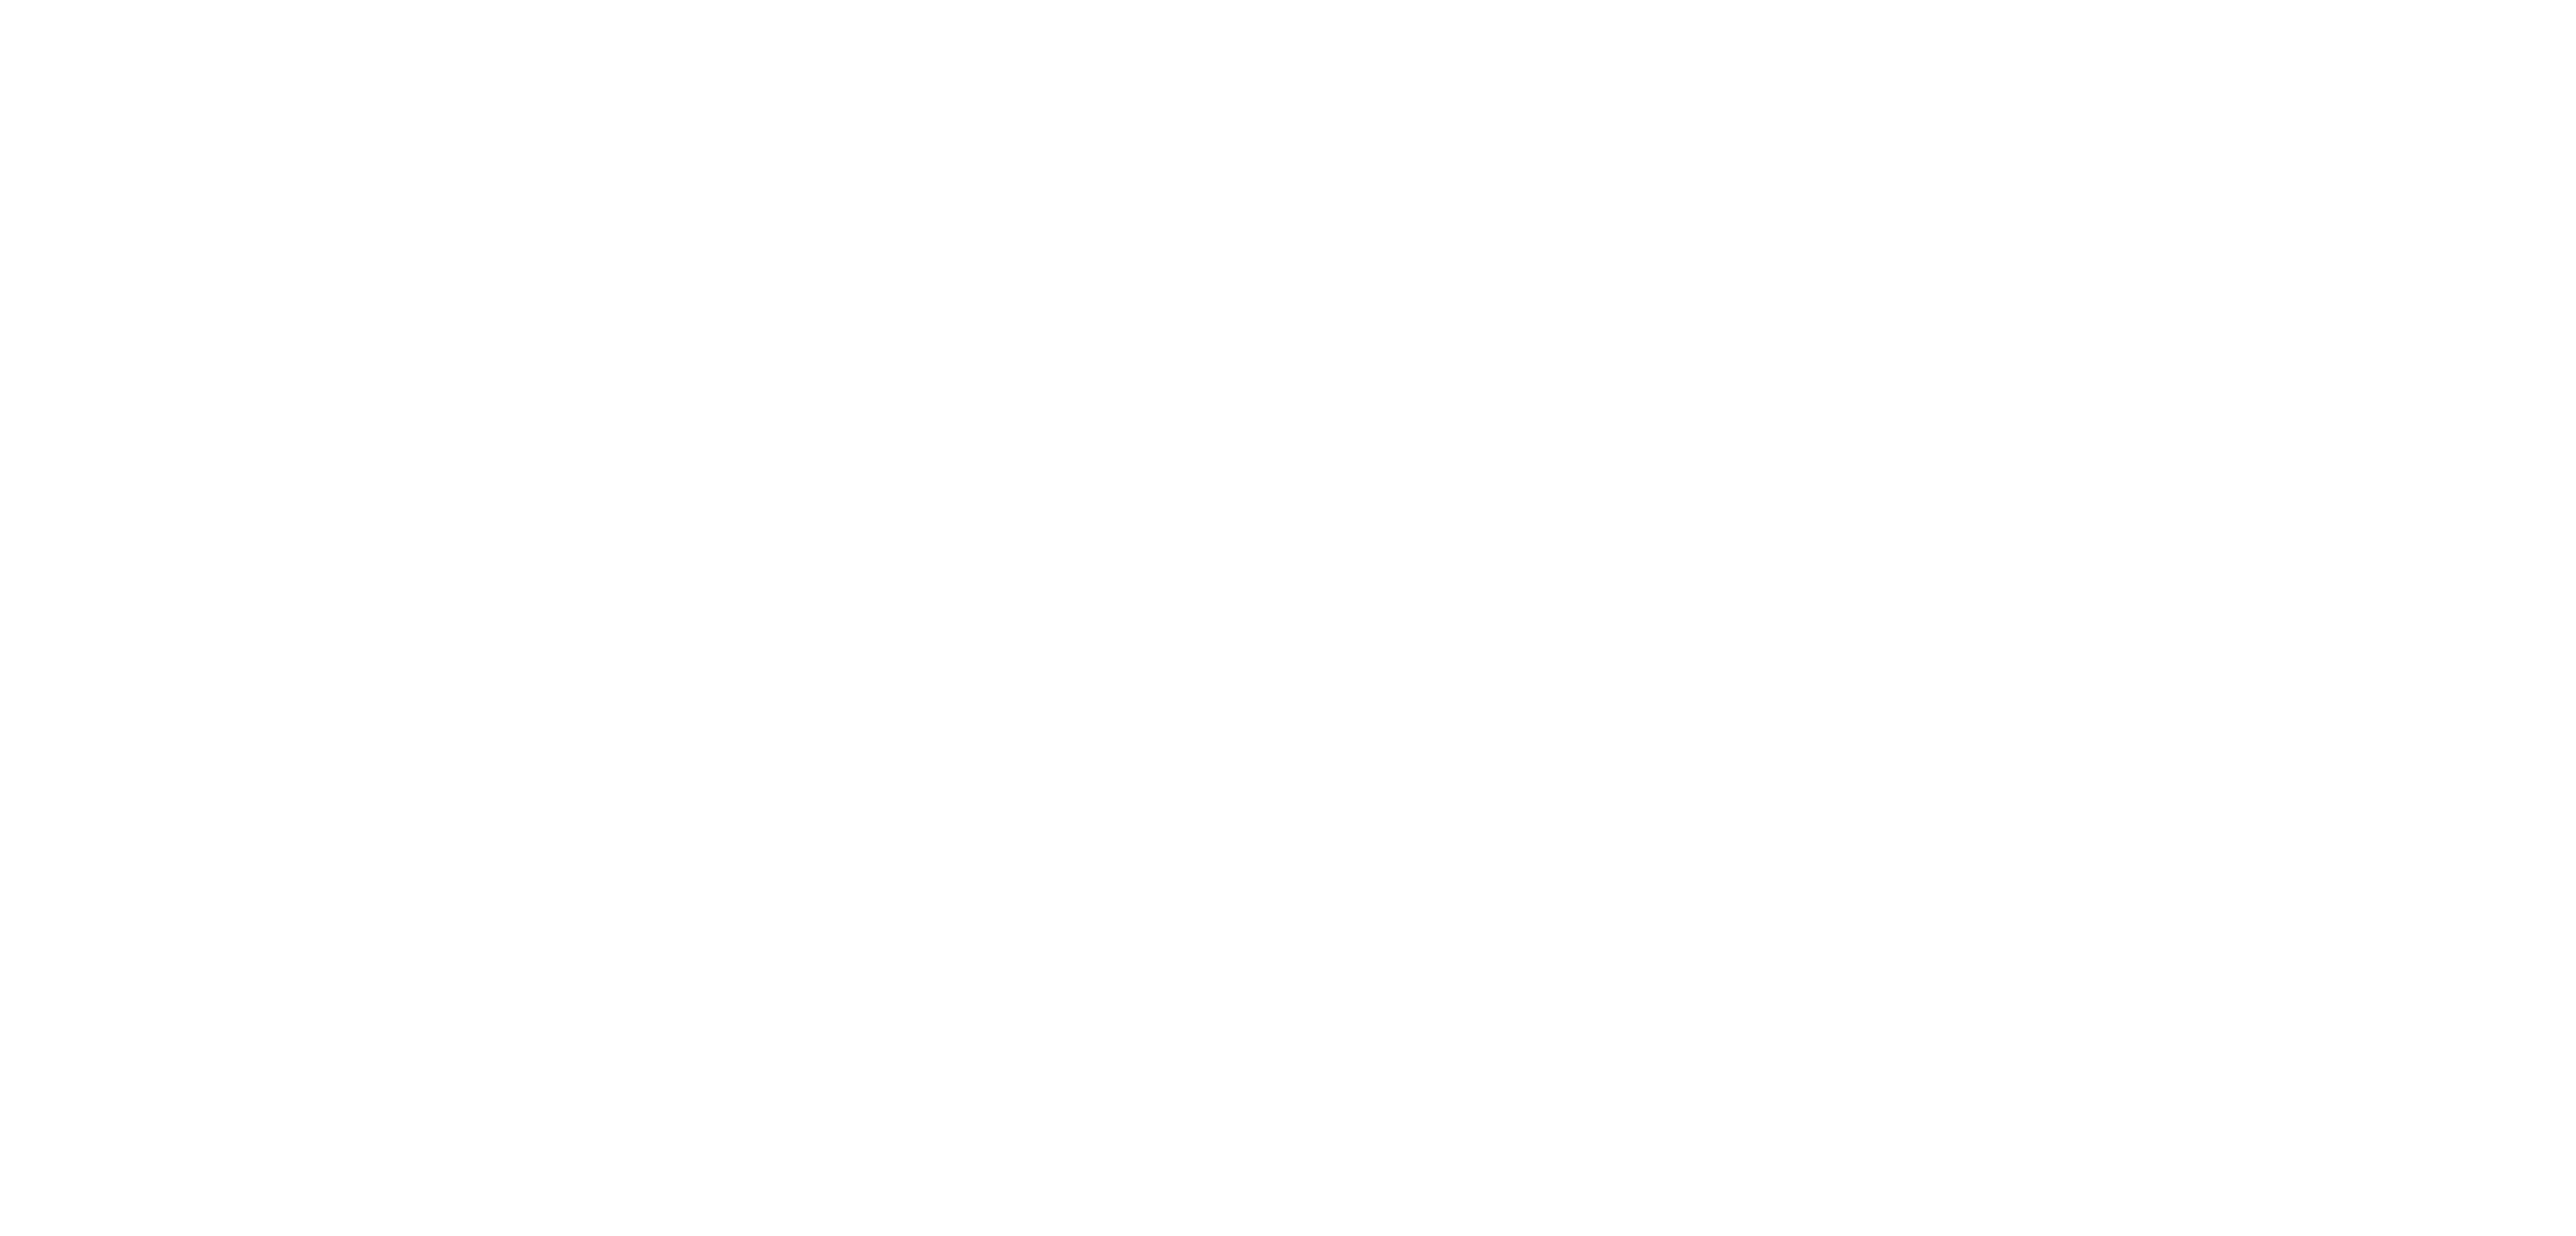

<IPython.core.display.Javascript object>


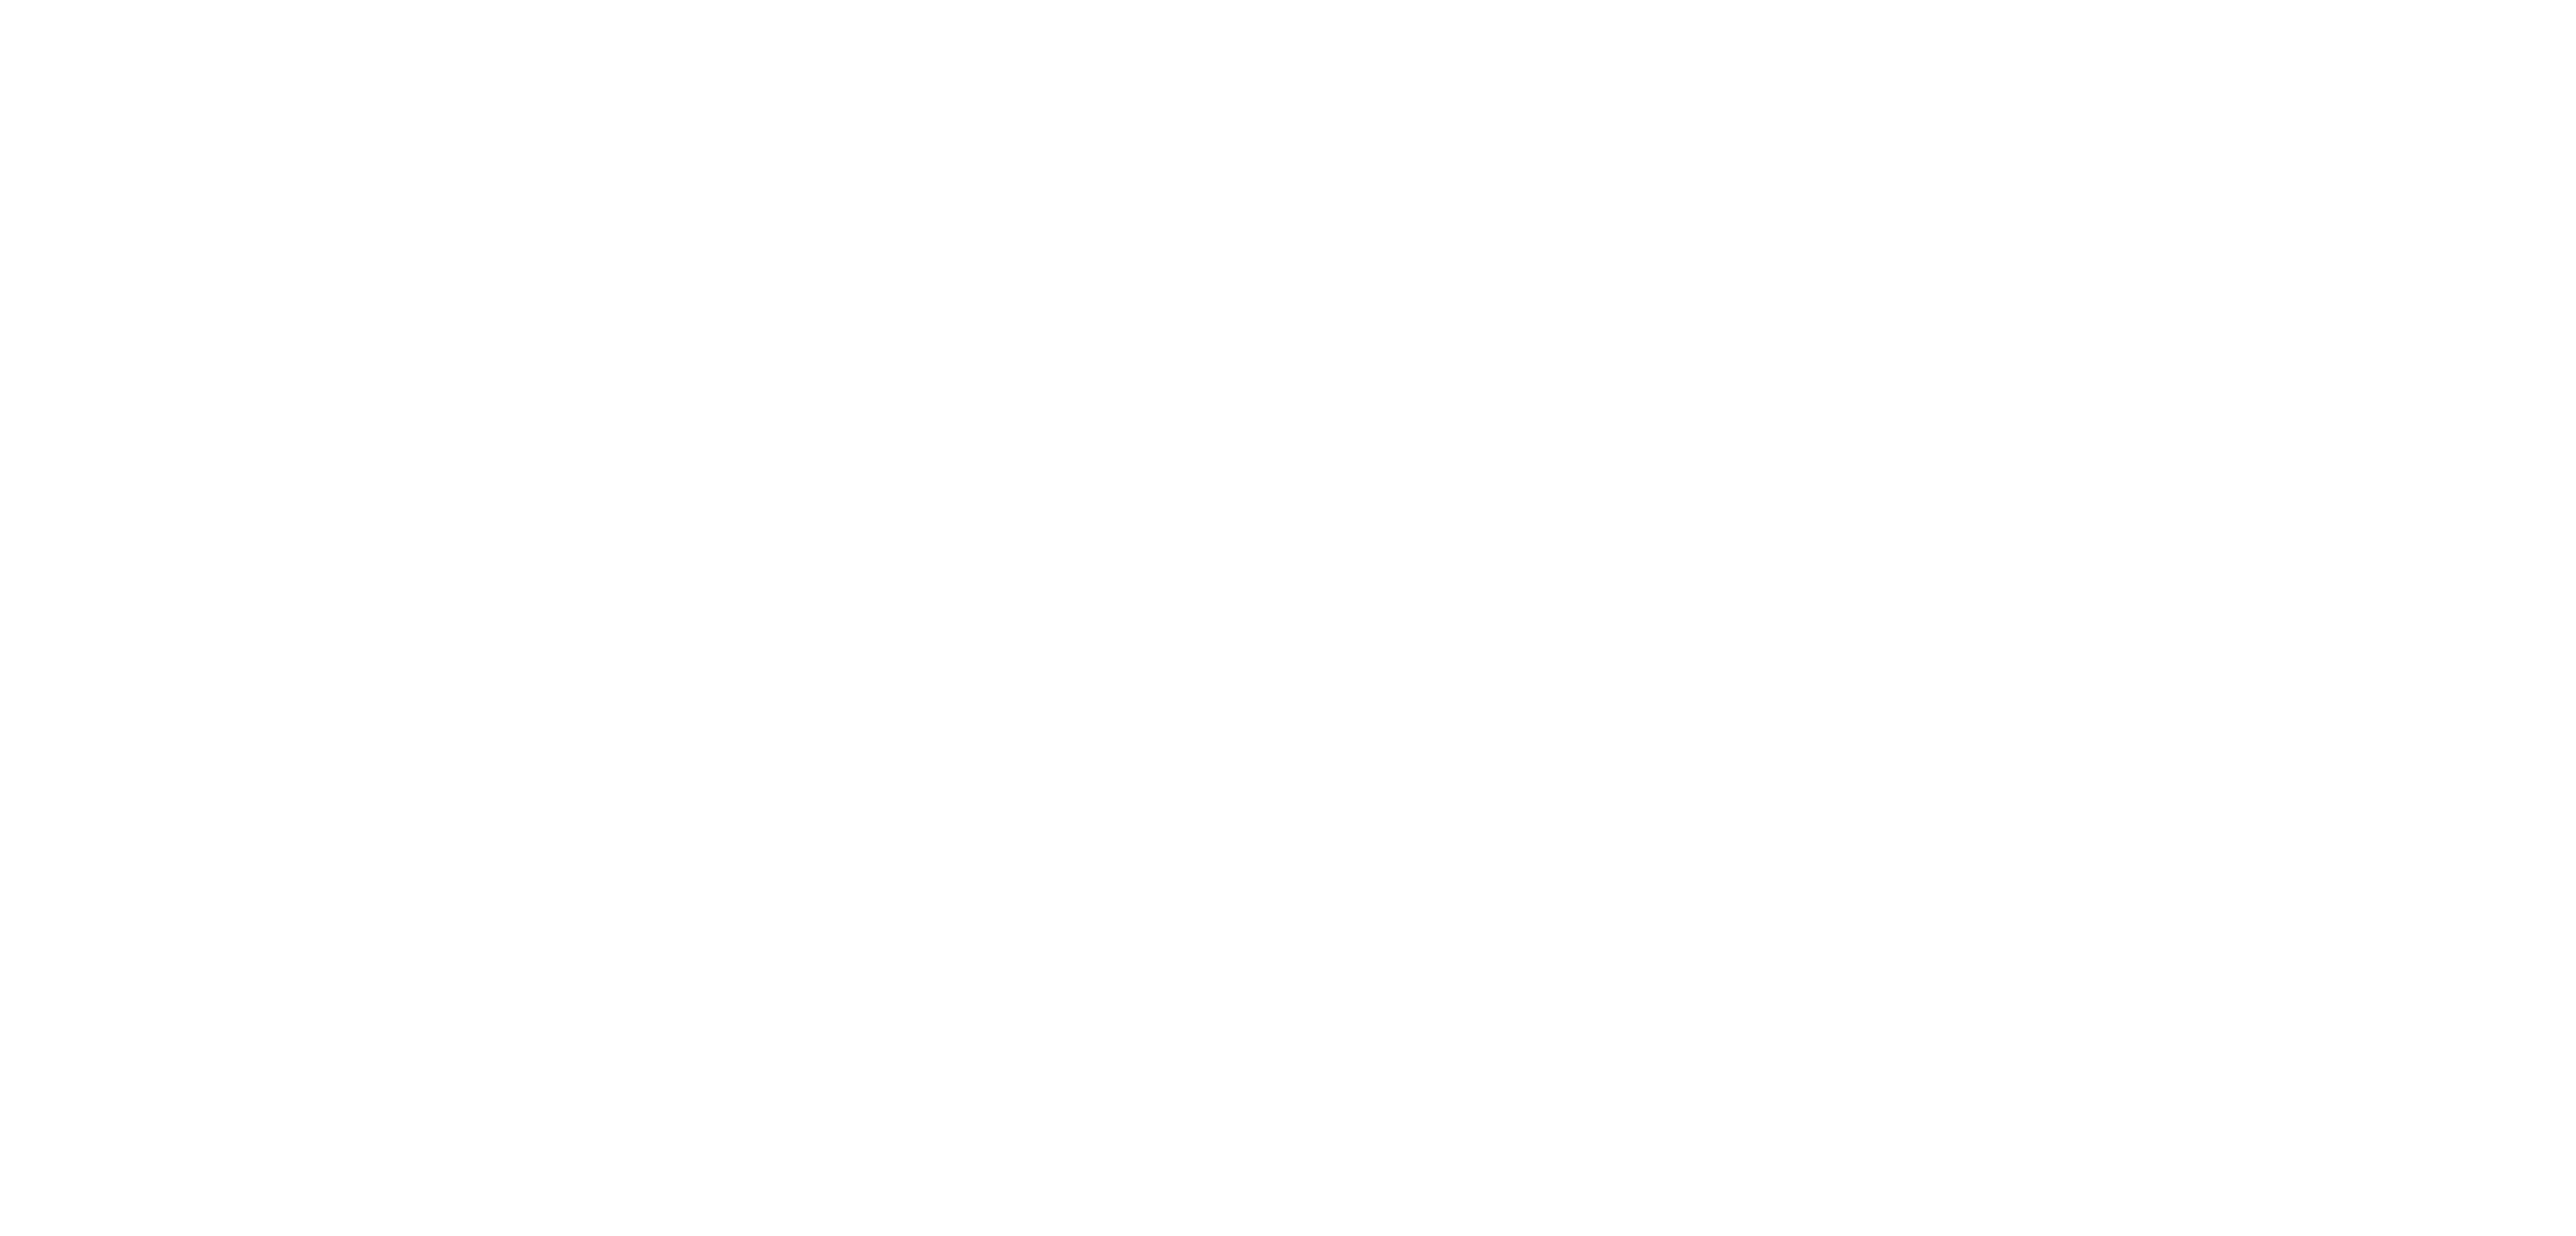

<IPython.core.display.Javascript object>


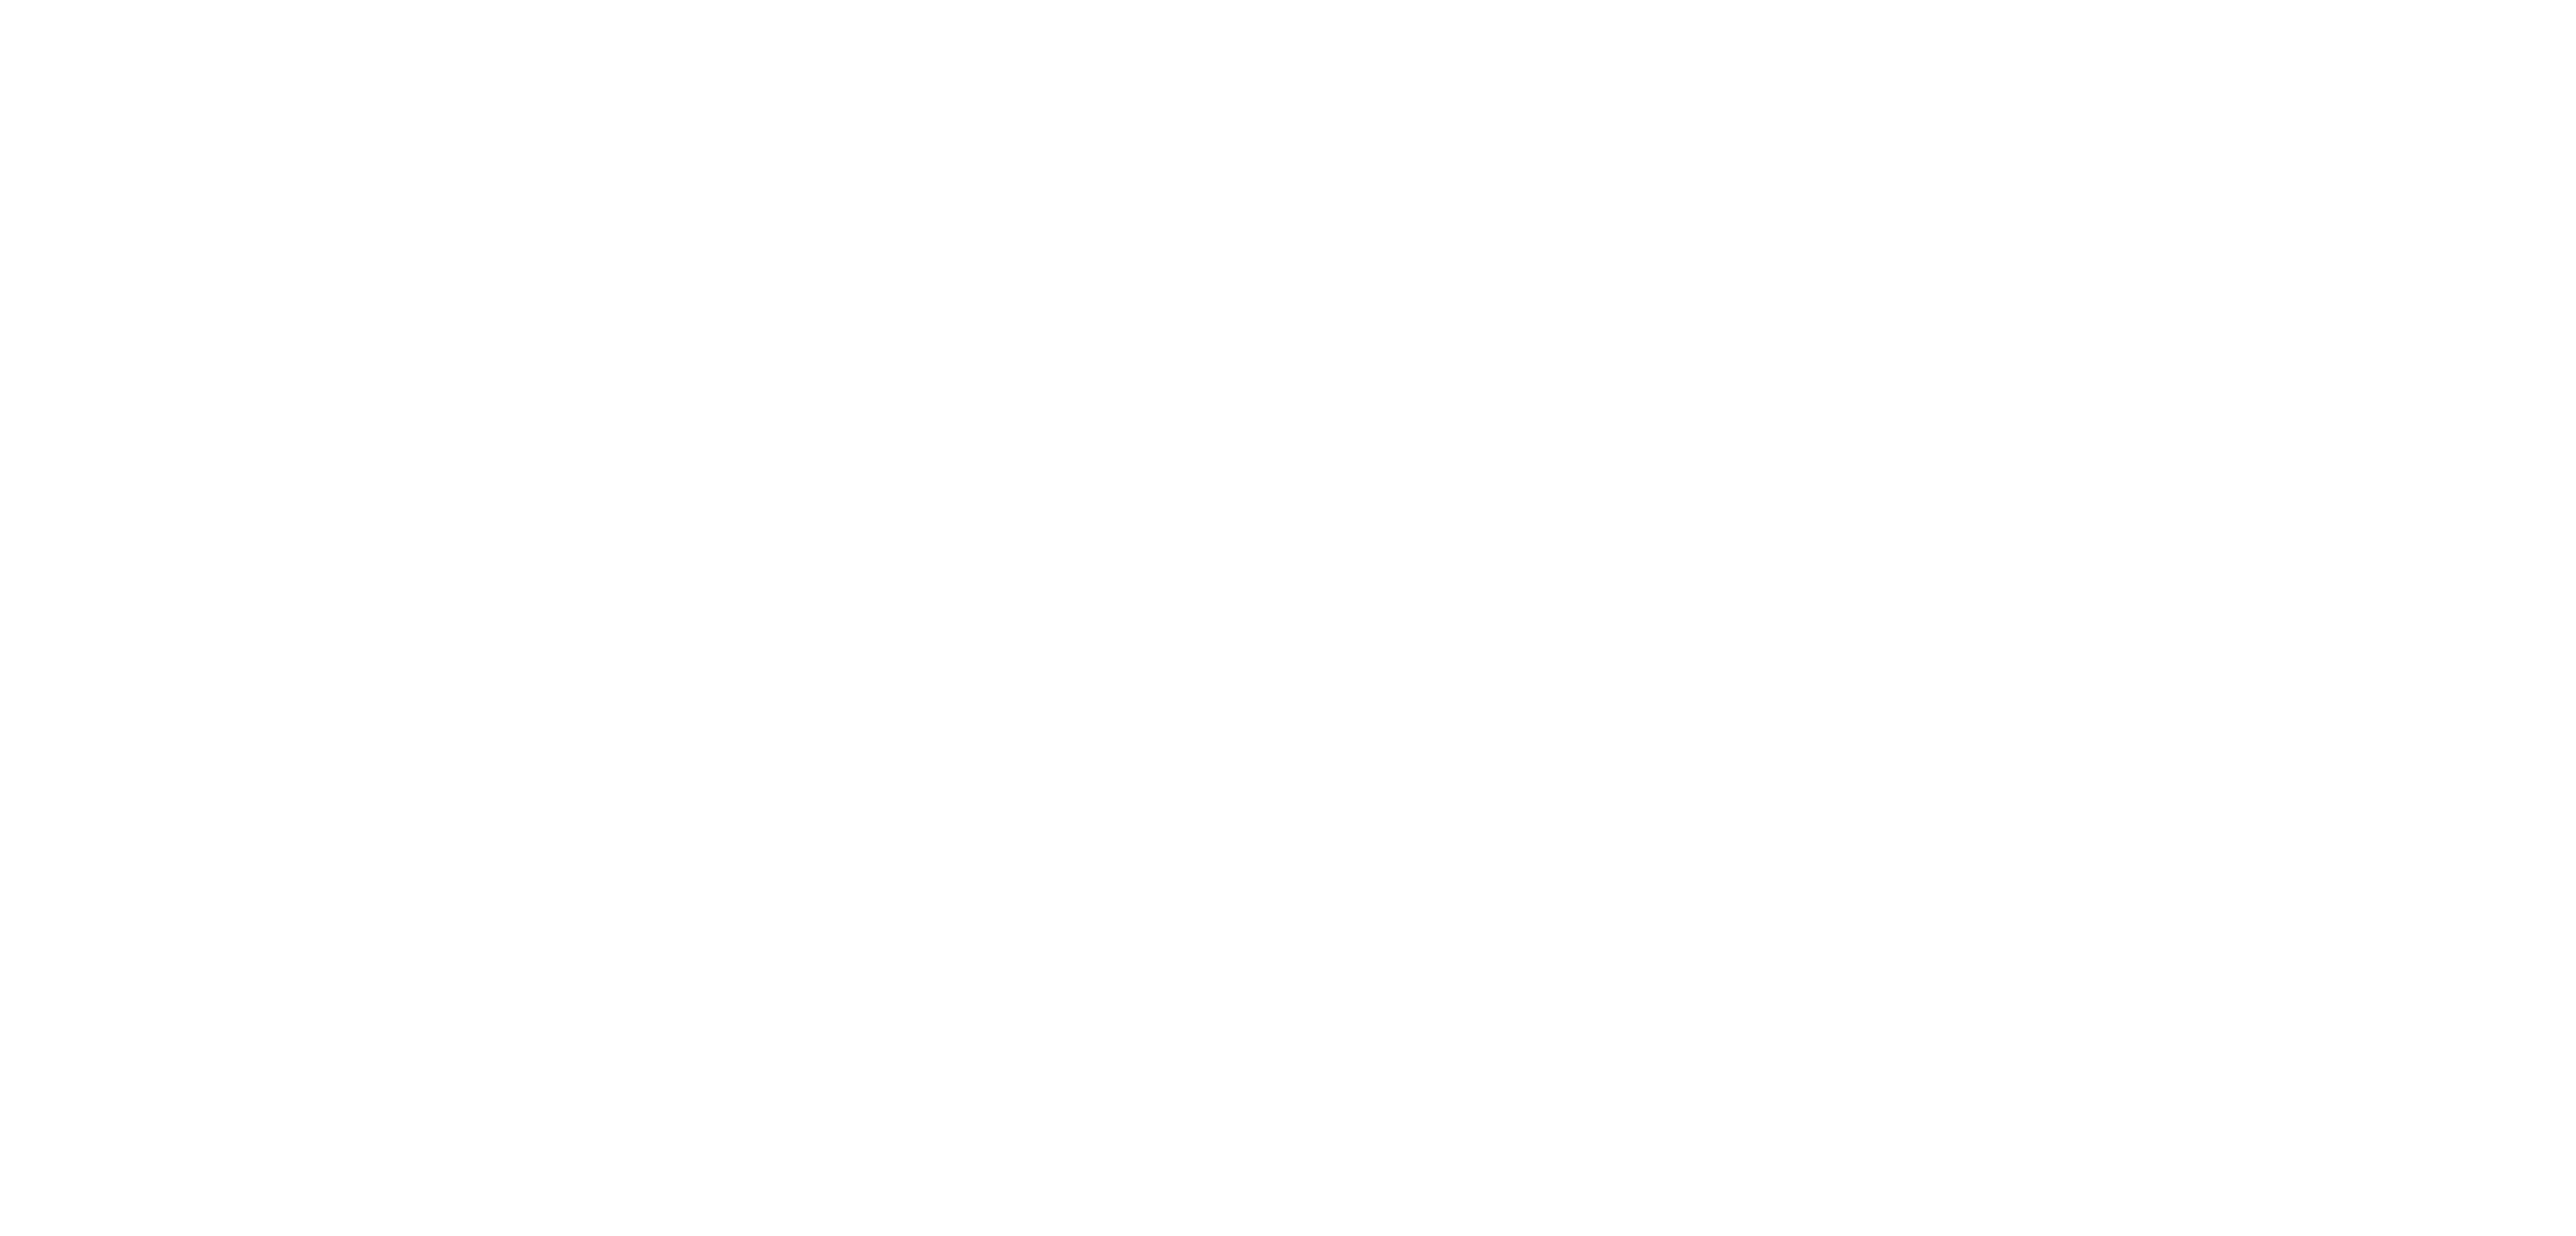

<IPython.core.display.Javascript object>


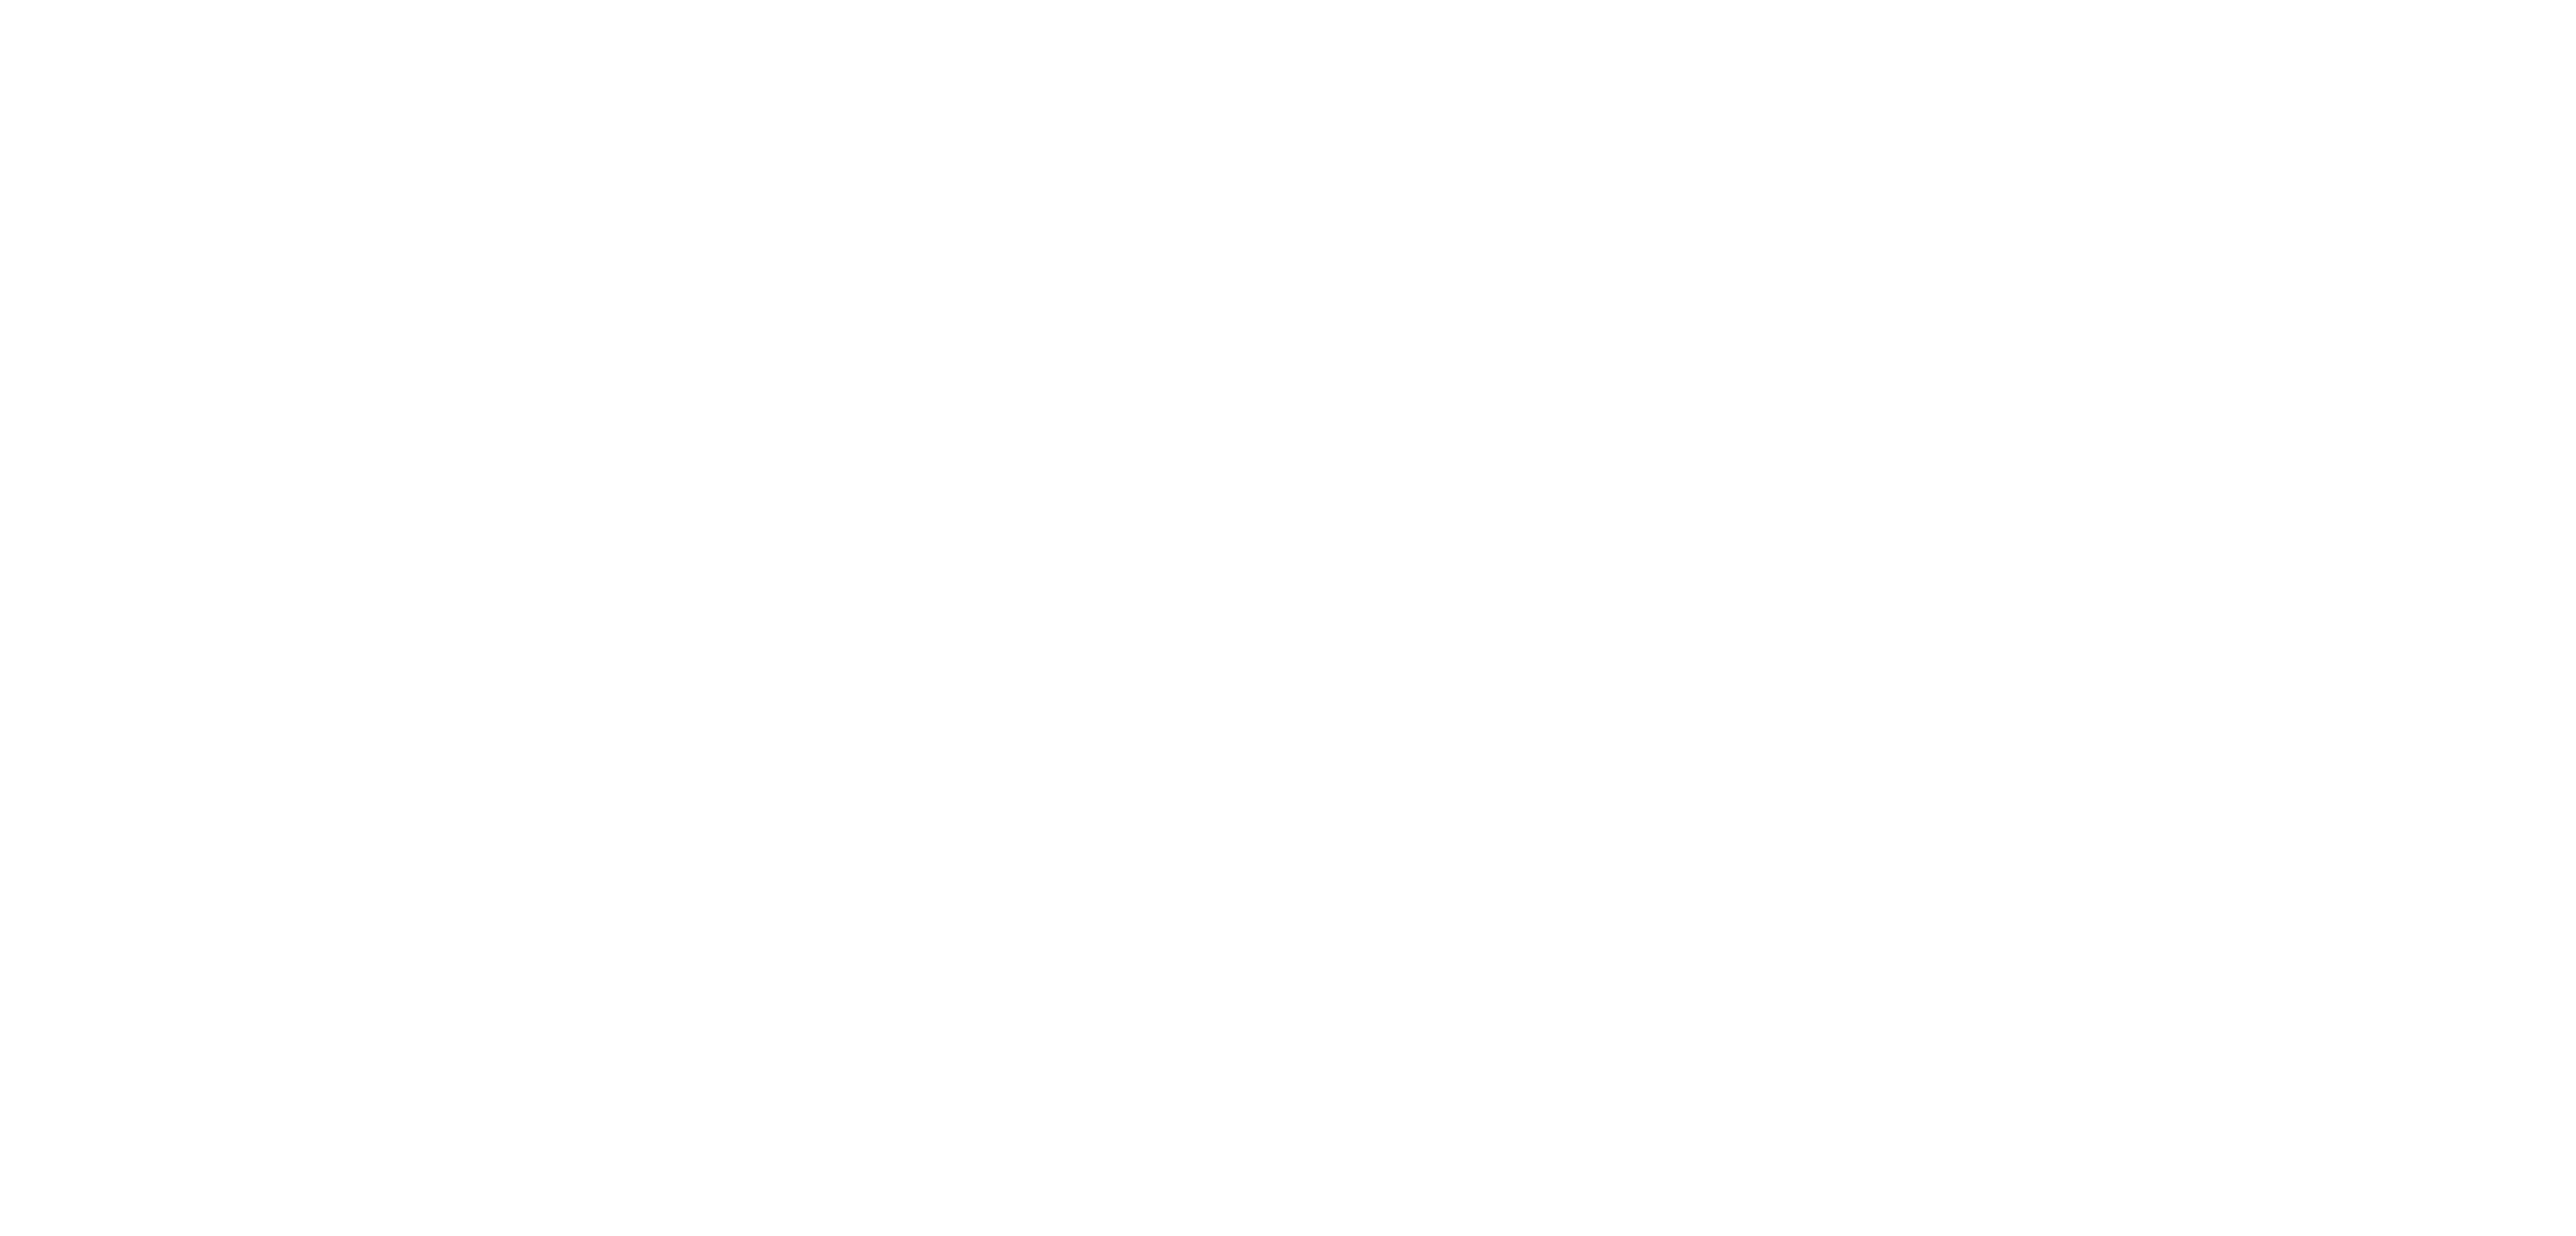

<IPython.core.display.Javascript object>


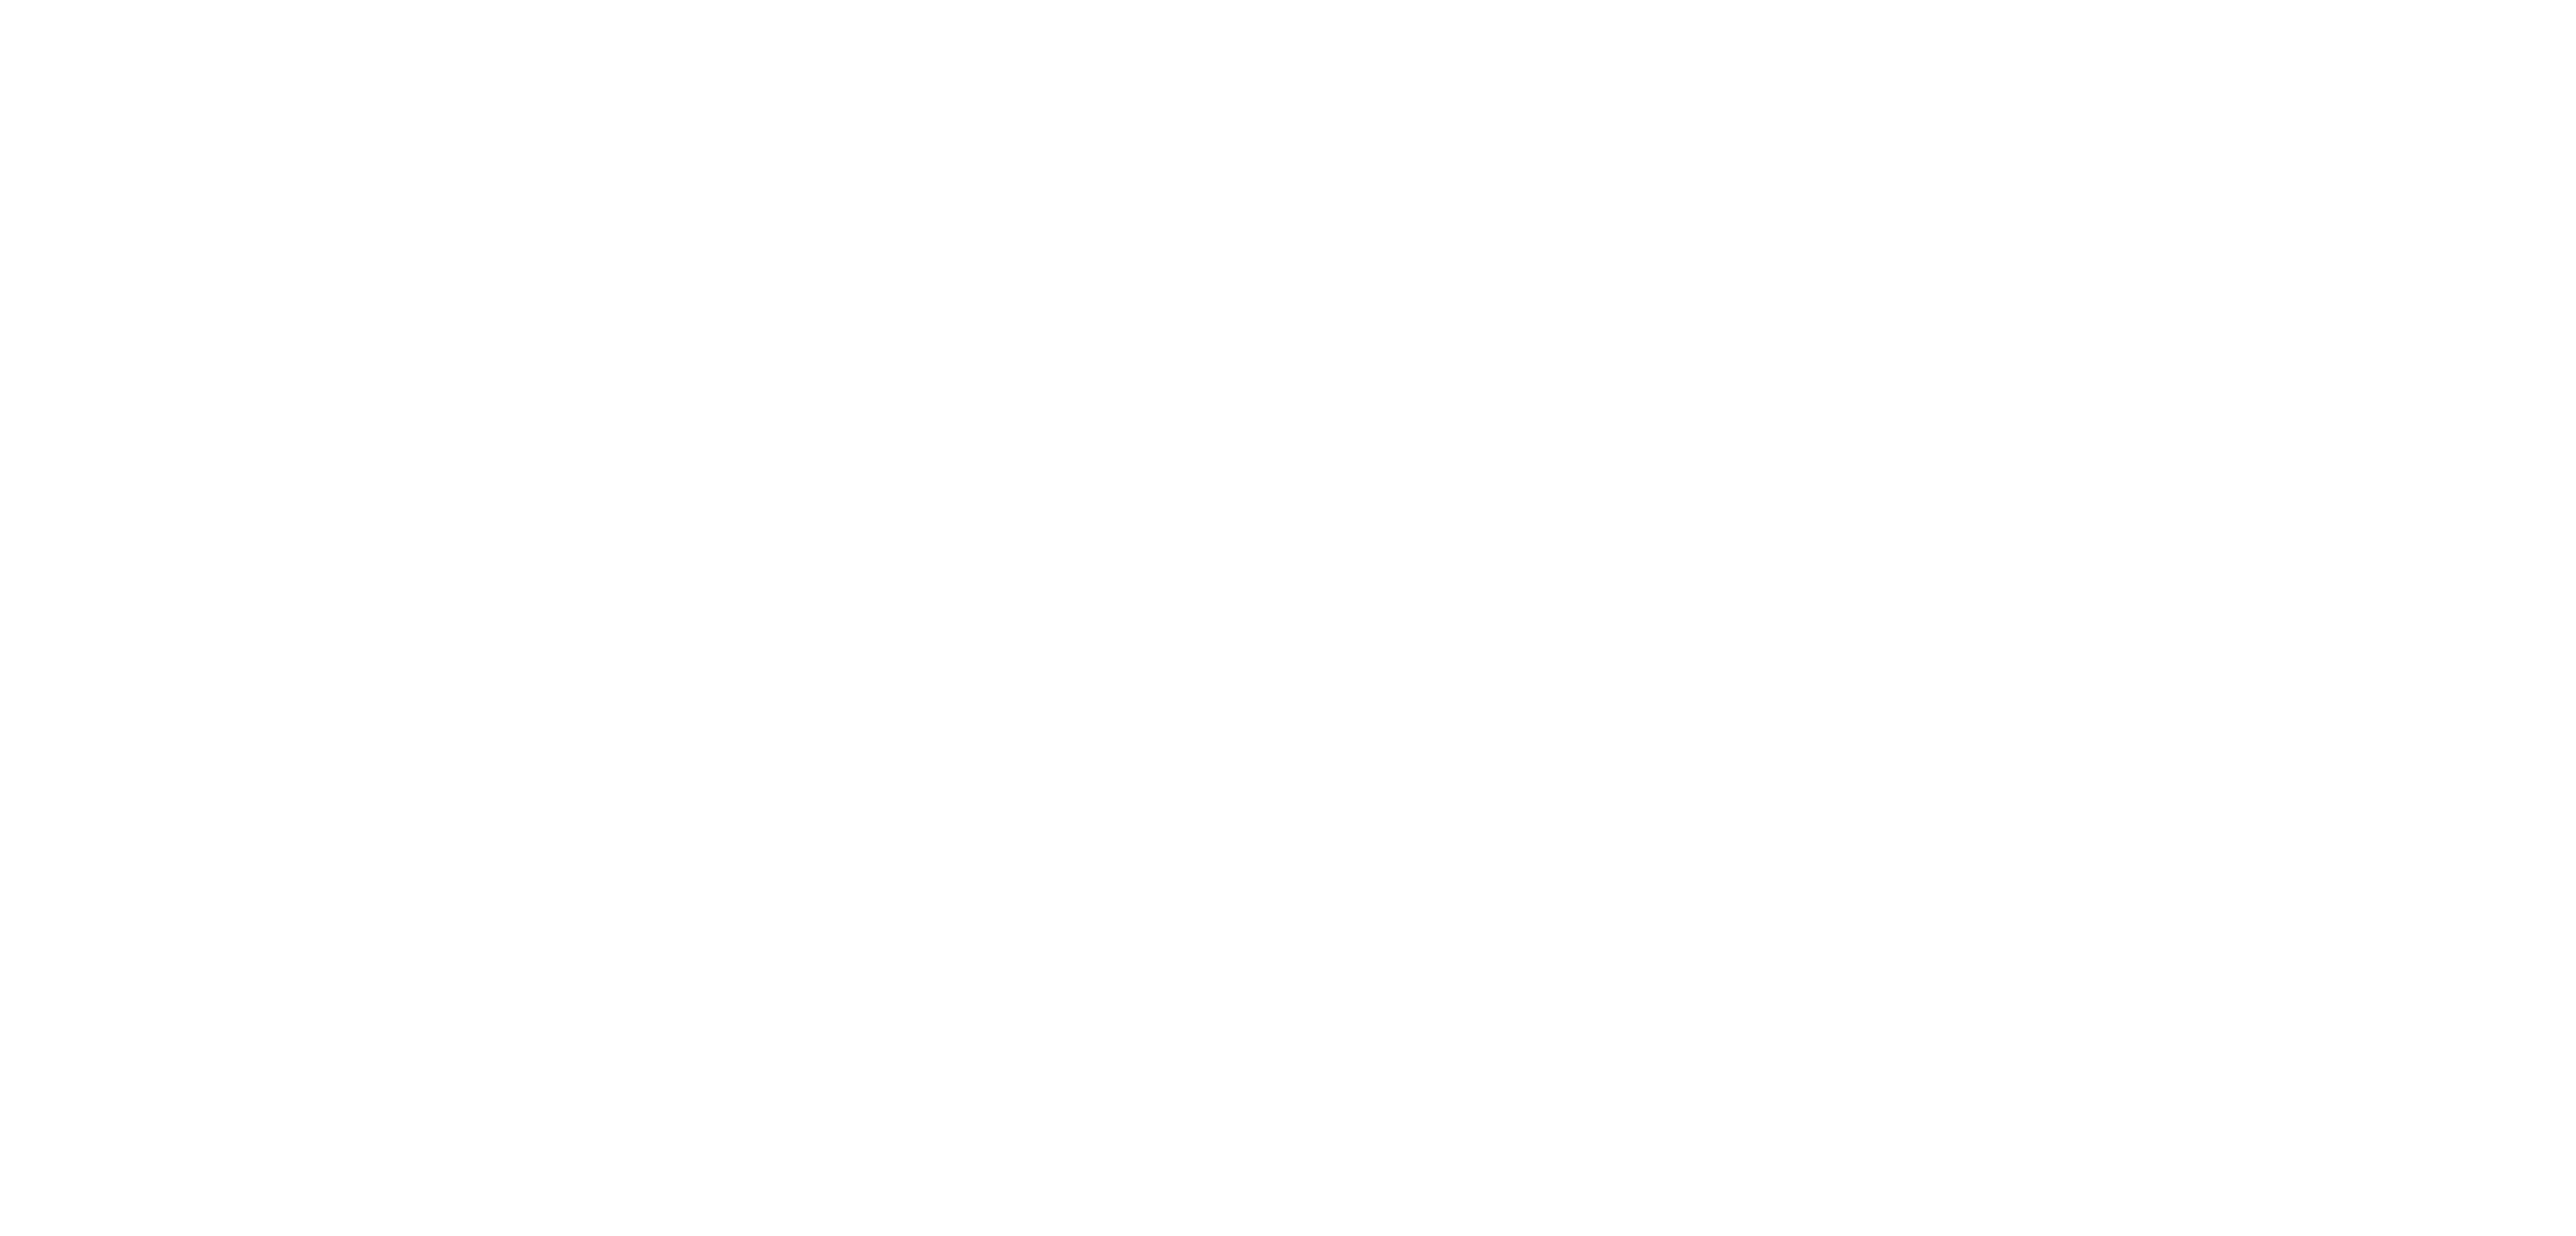

<IPython.core.display.Javascript object>


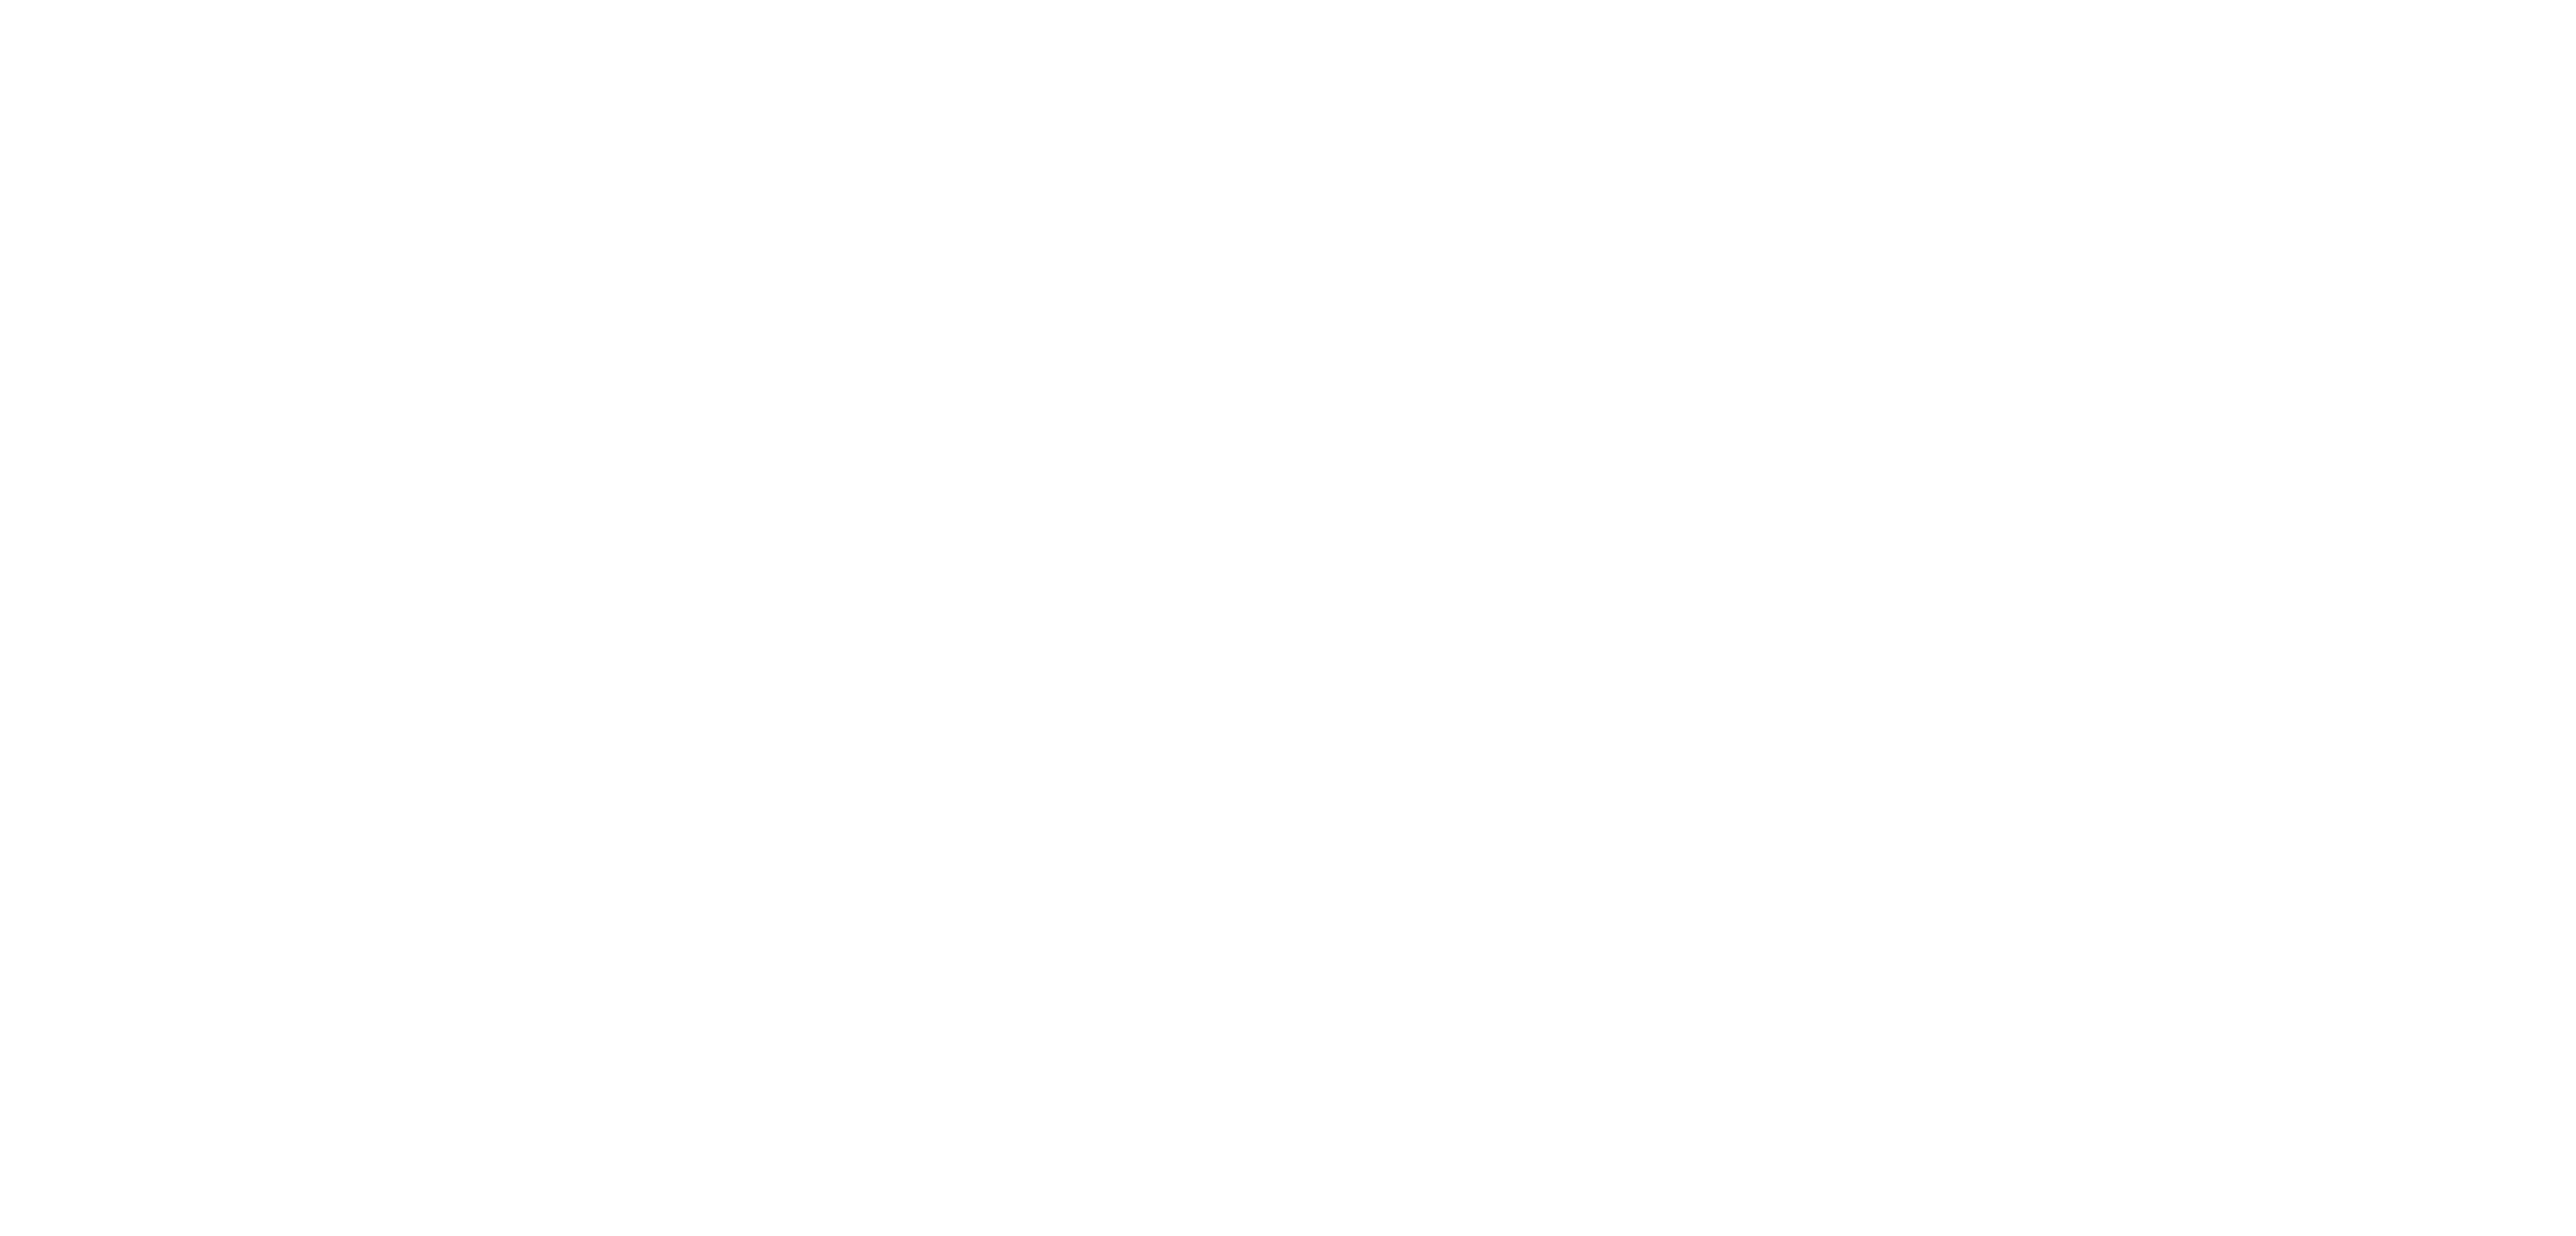

<IPython.core.display.Javascript object>


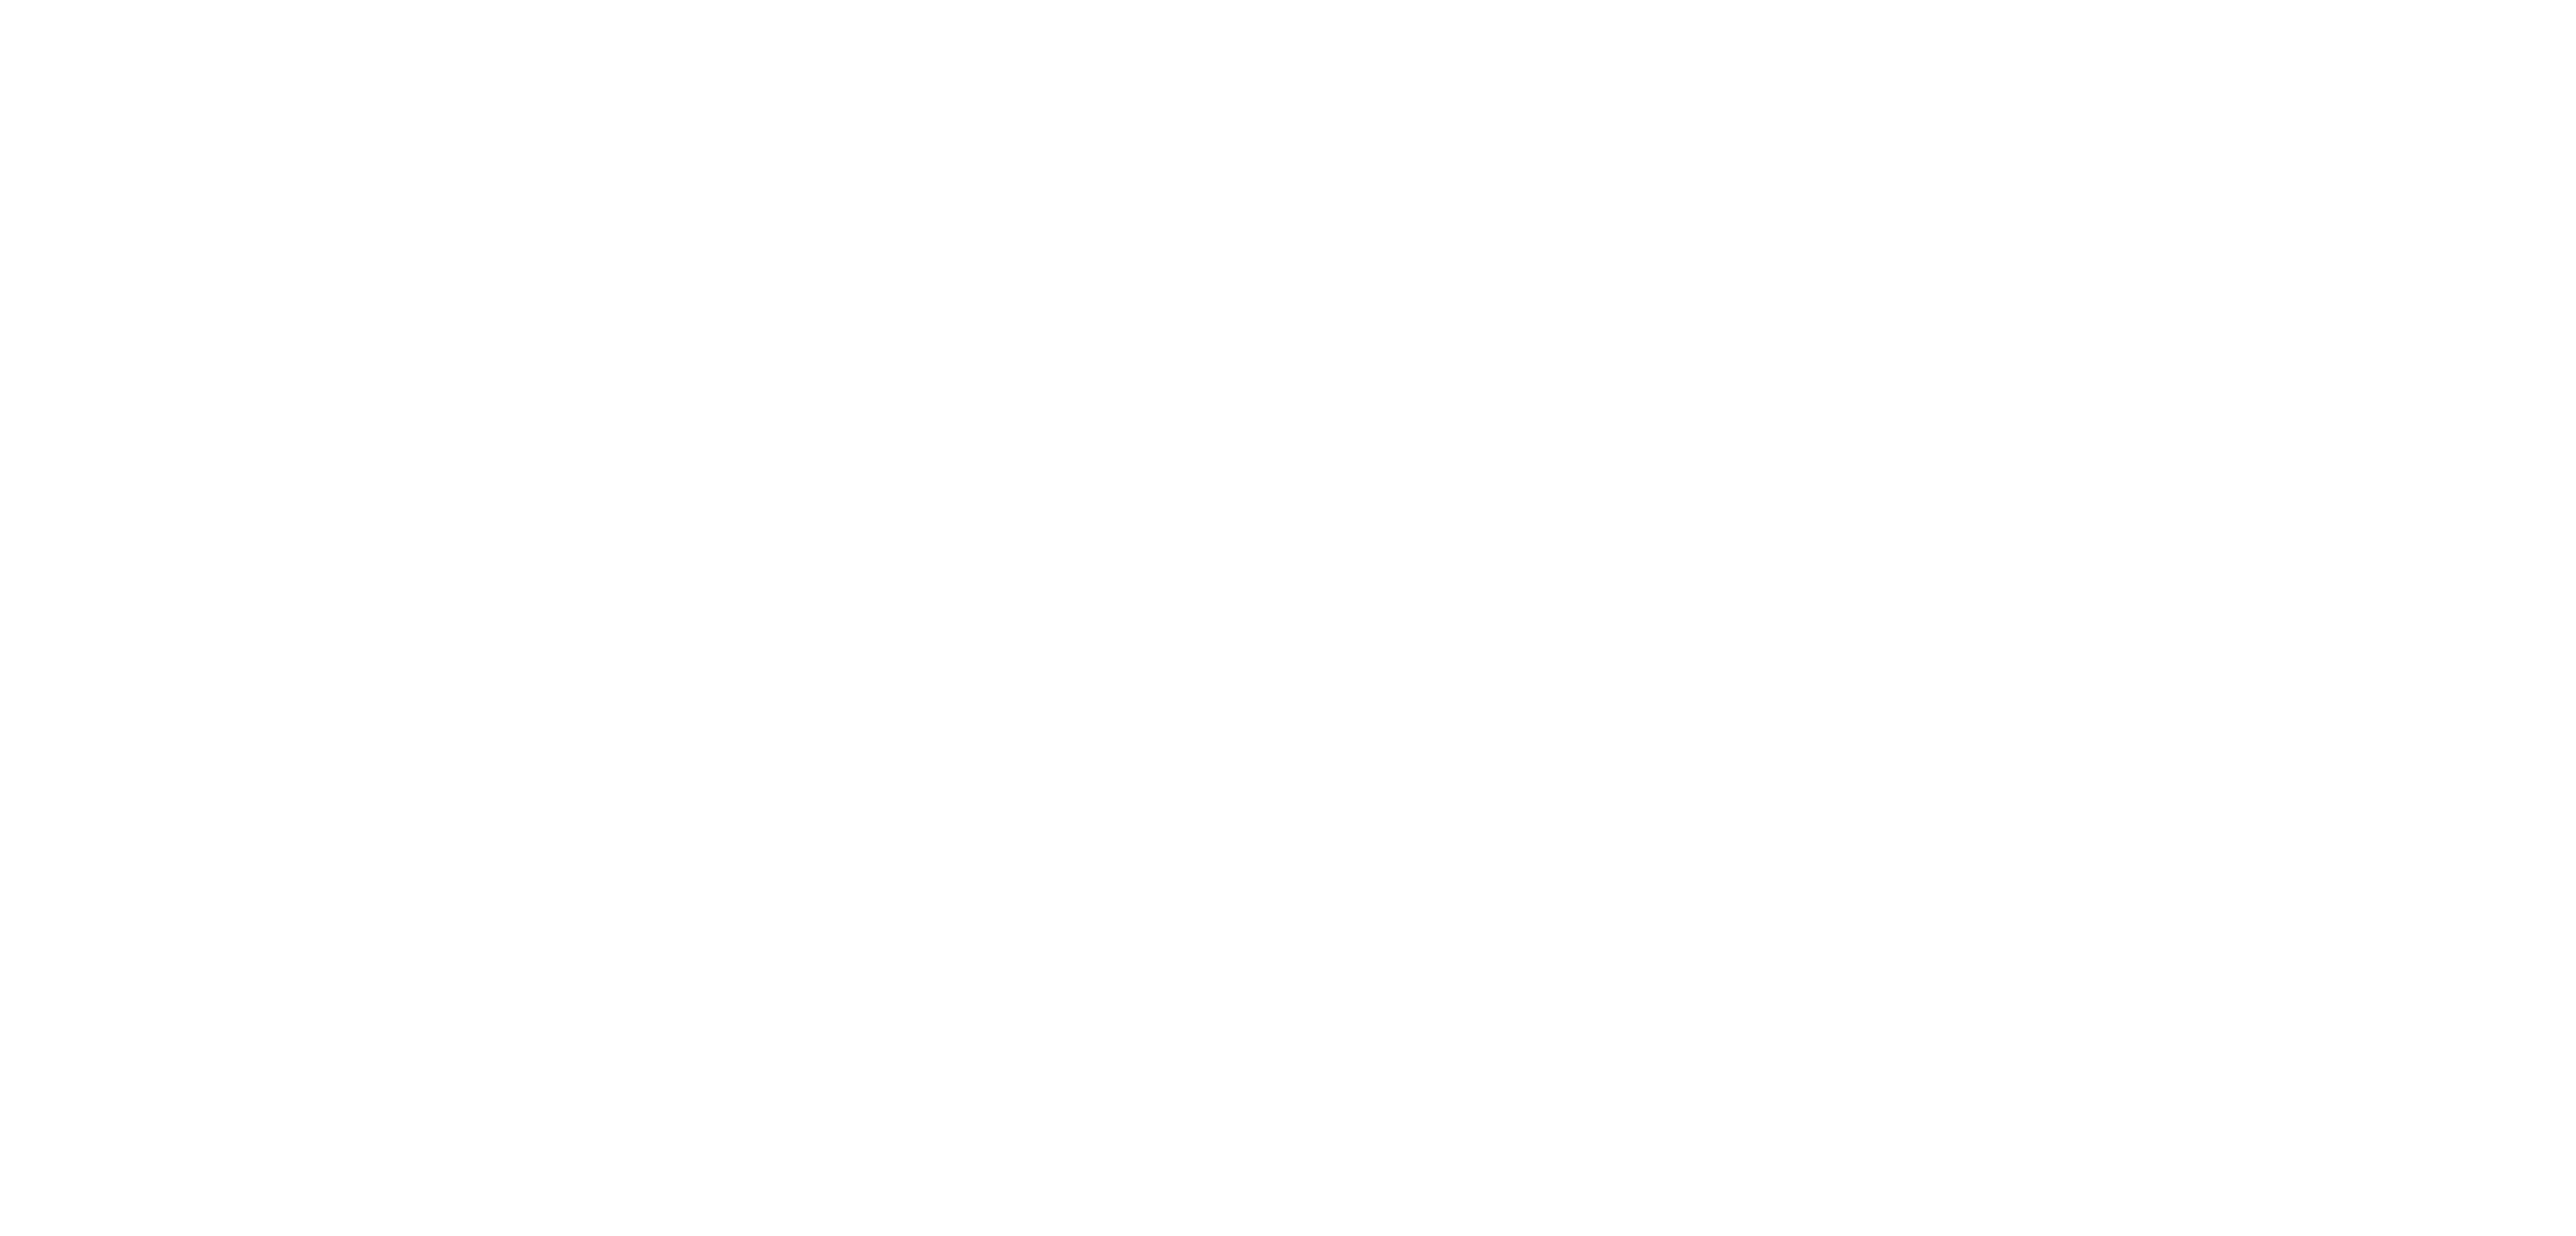

<IPython.core.display.Javascript object>


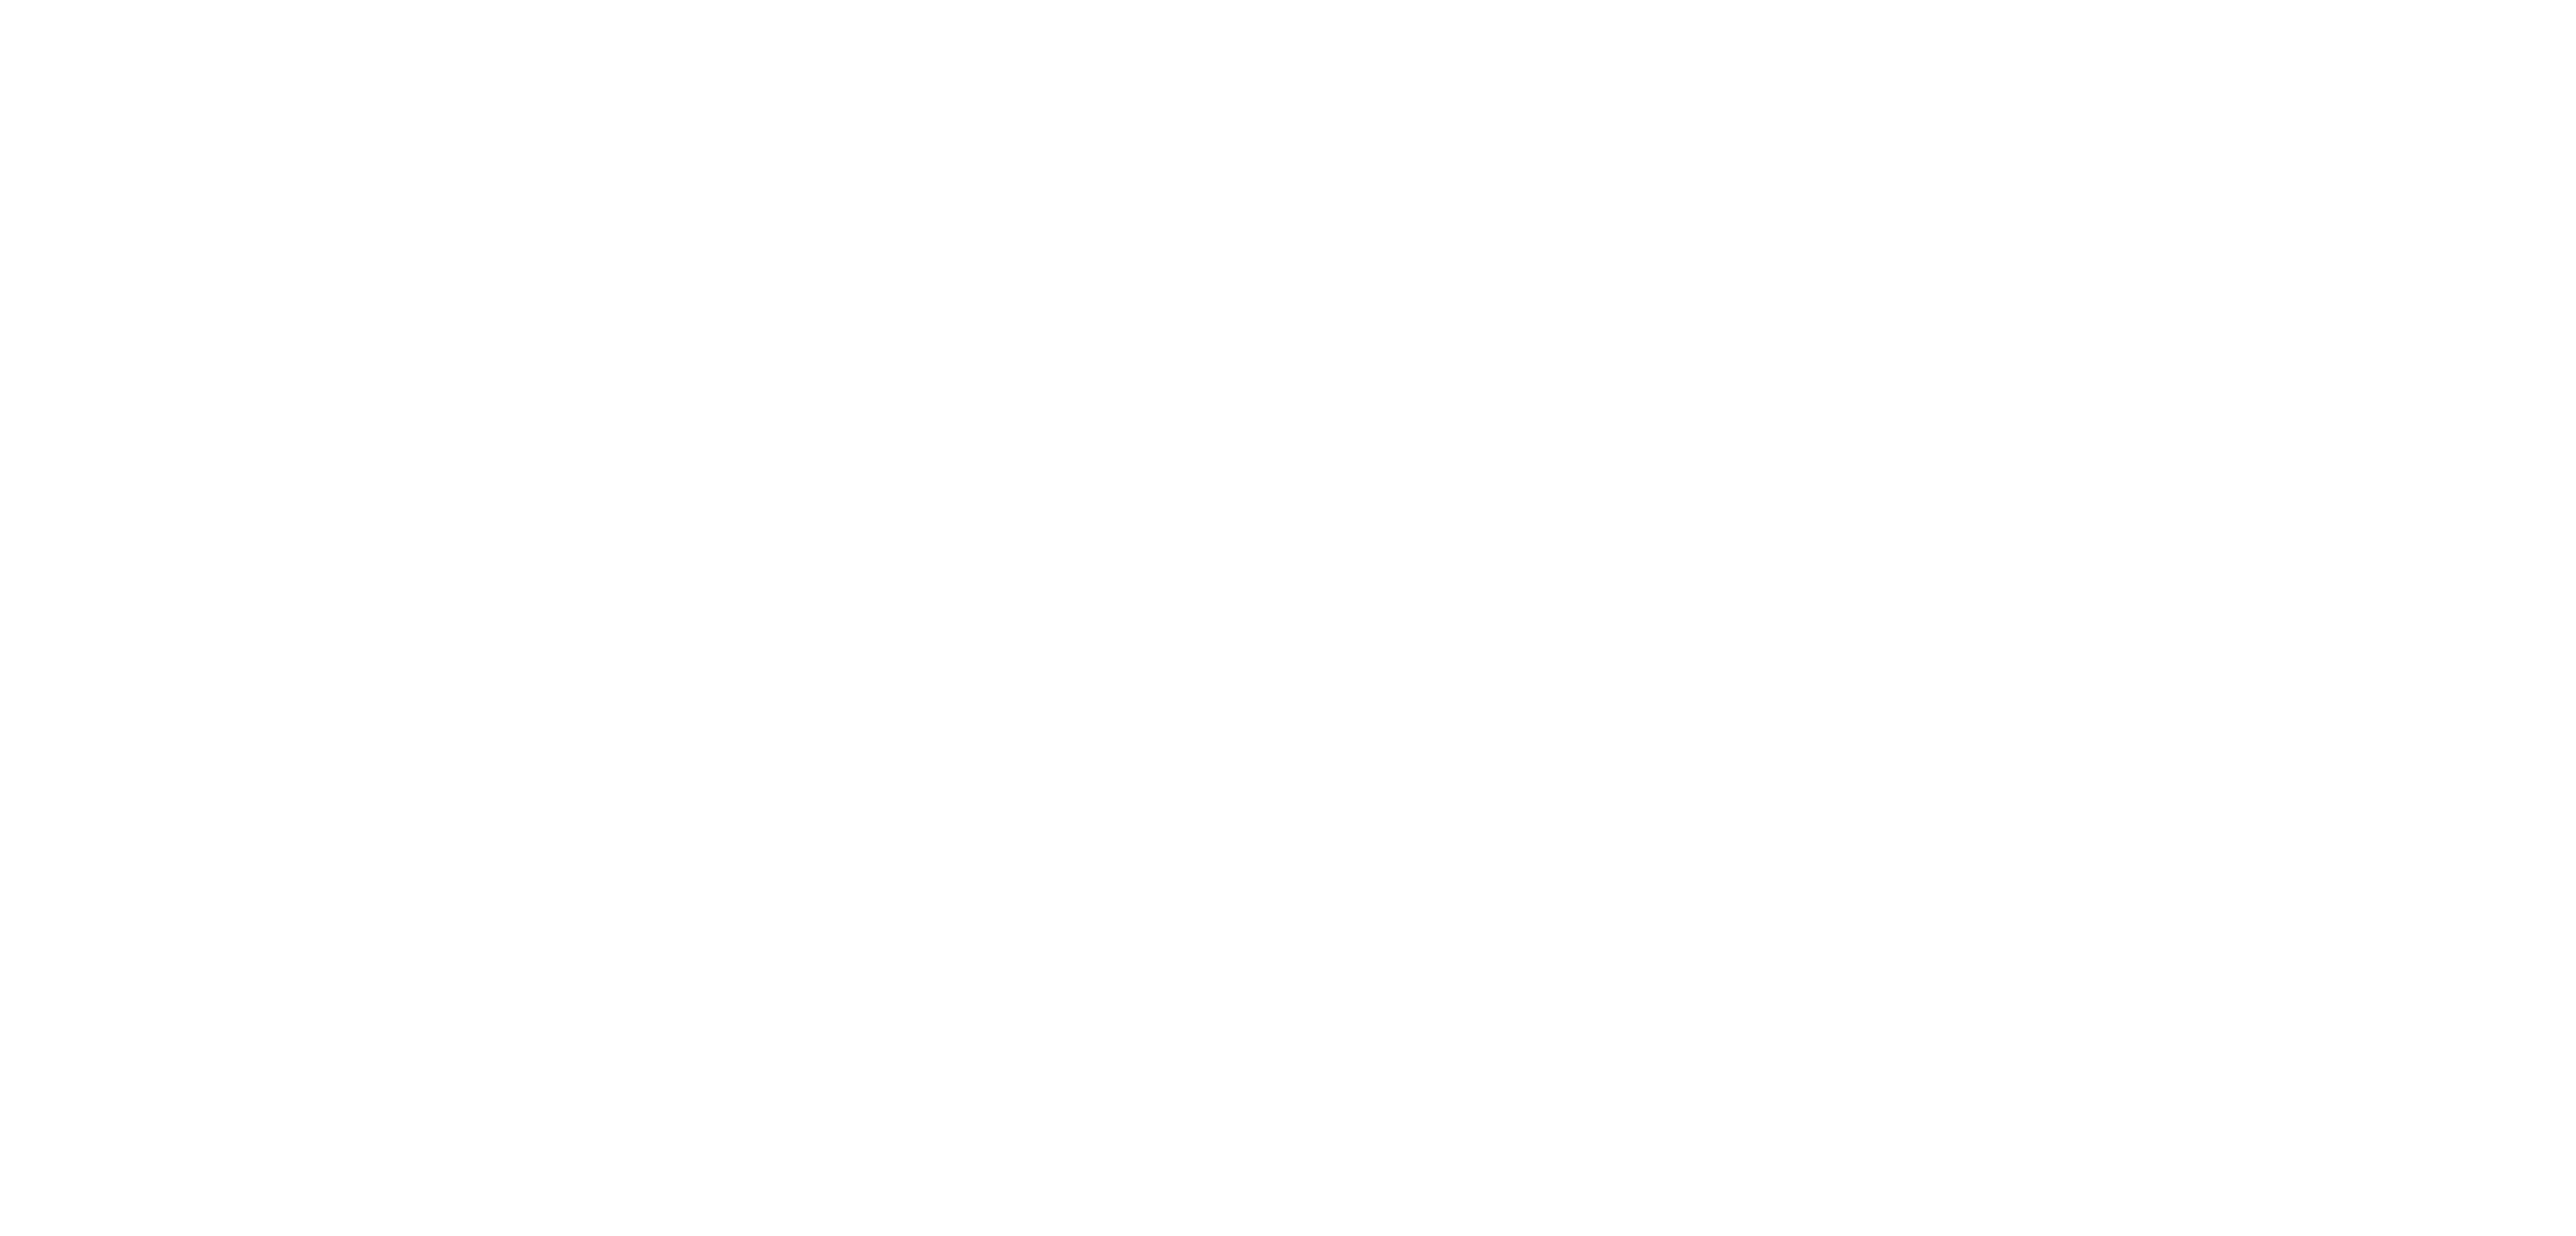

<IPython.core.display.Javascript object>


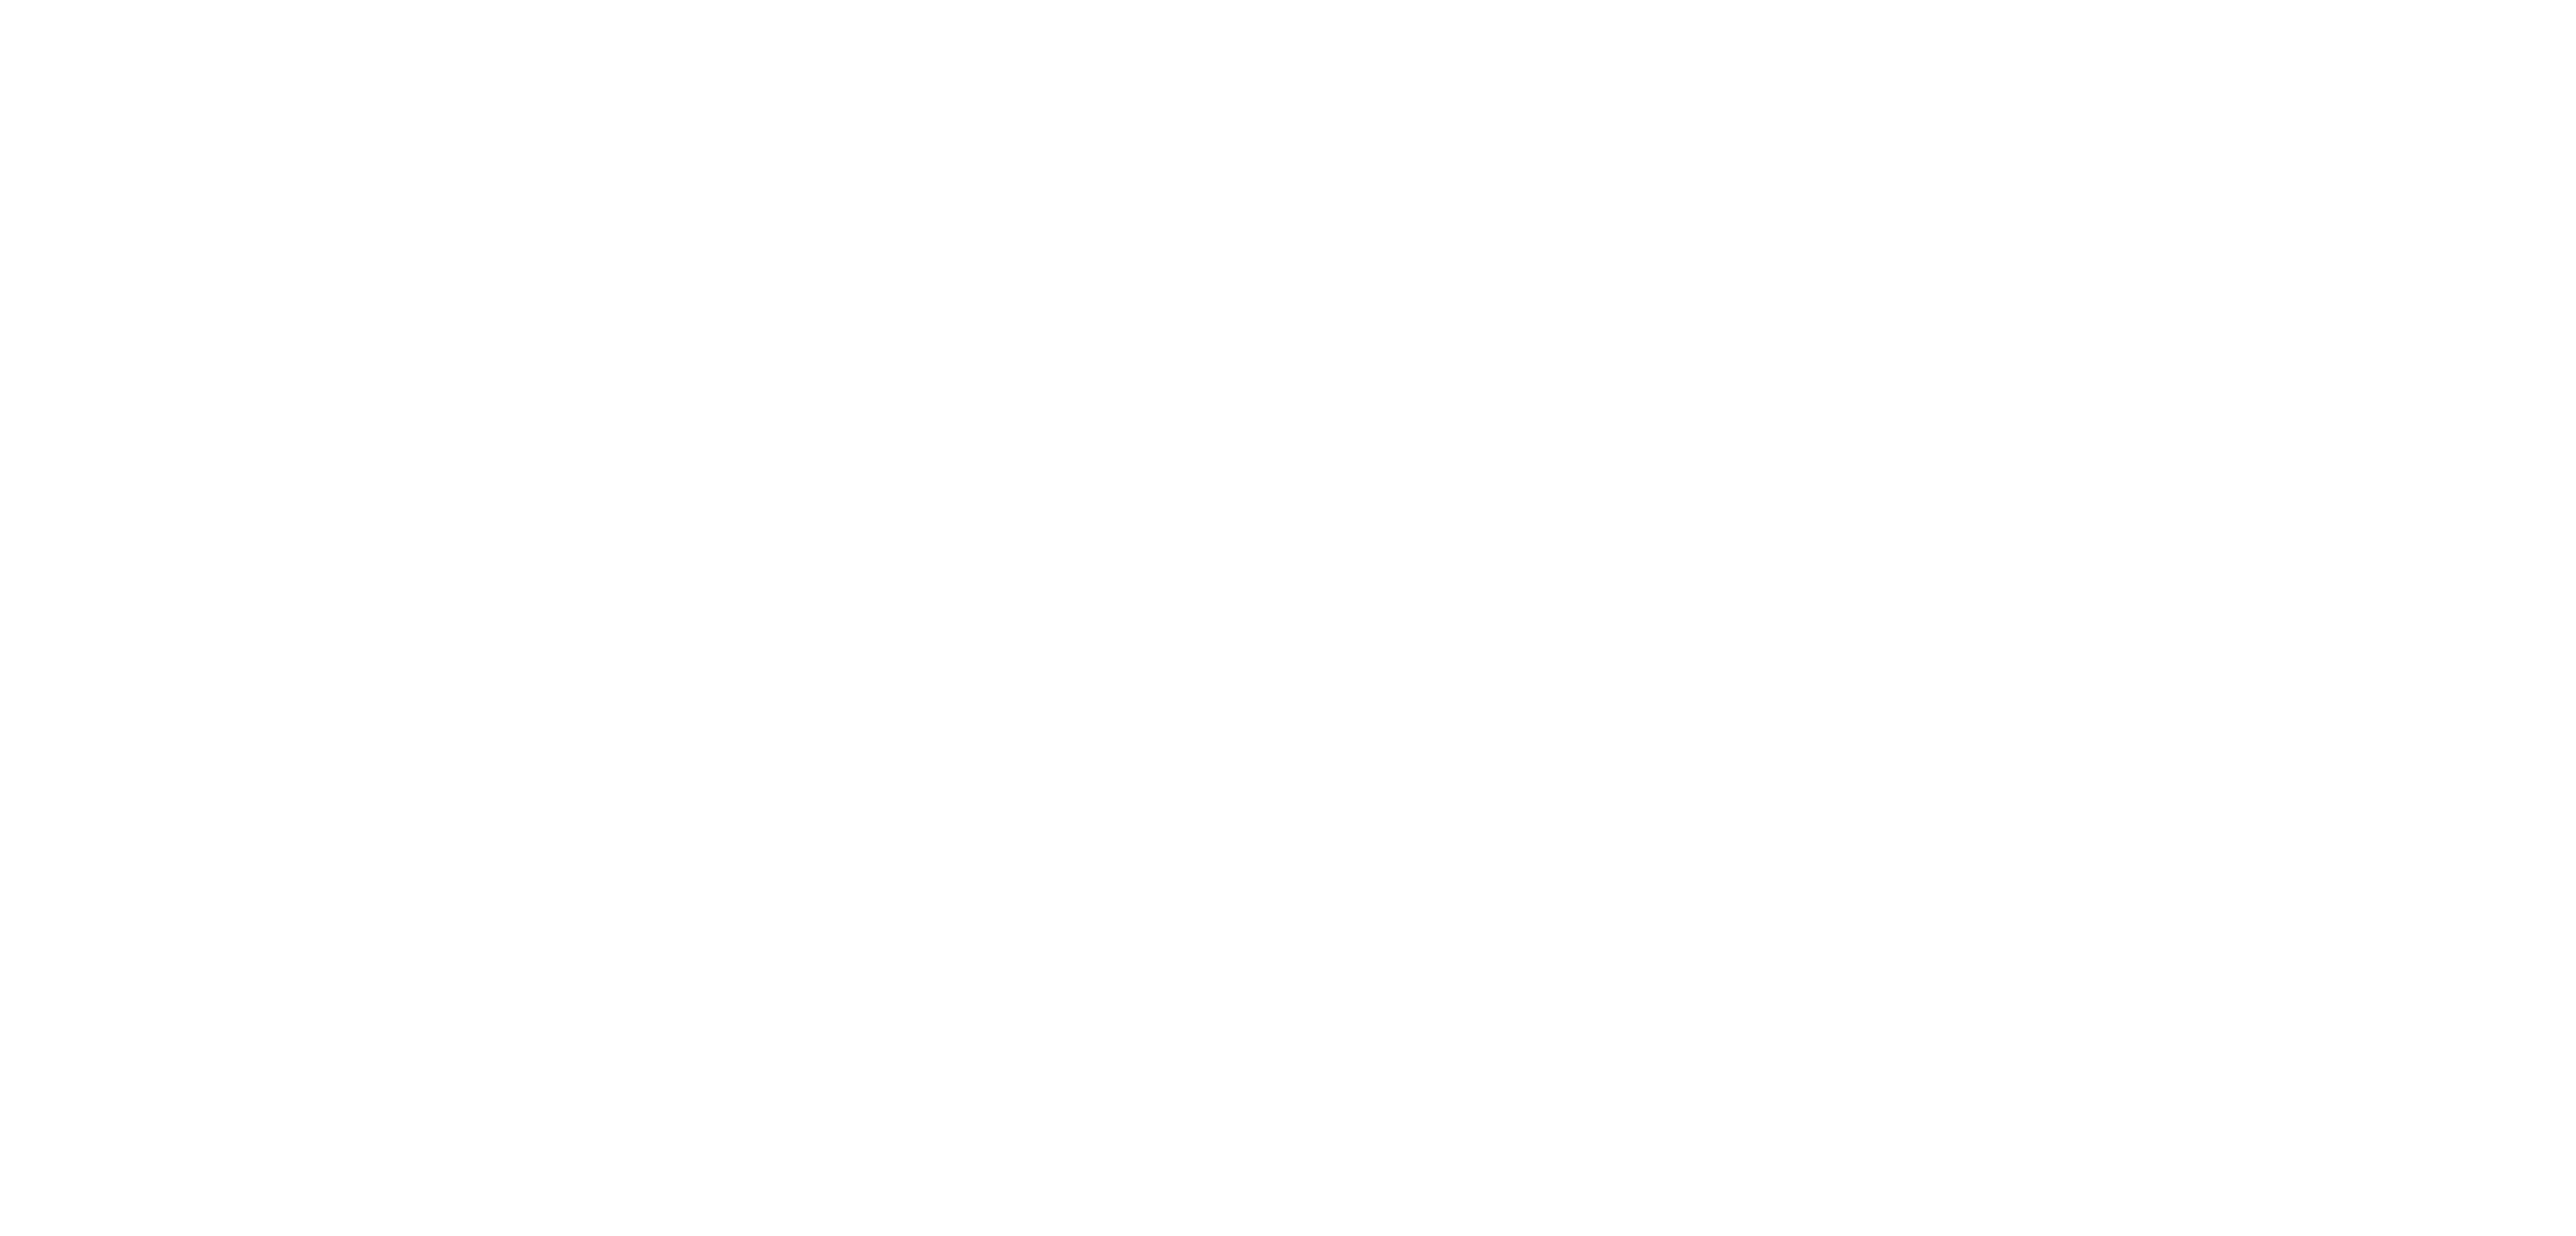

<IPython.core.display.Javascript object>


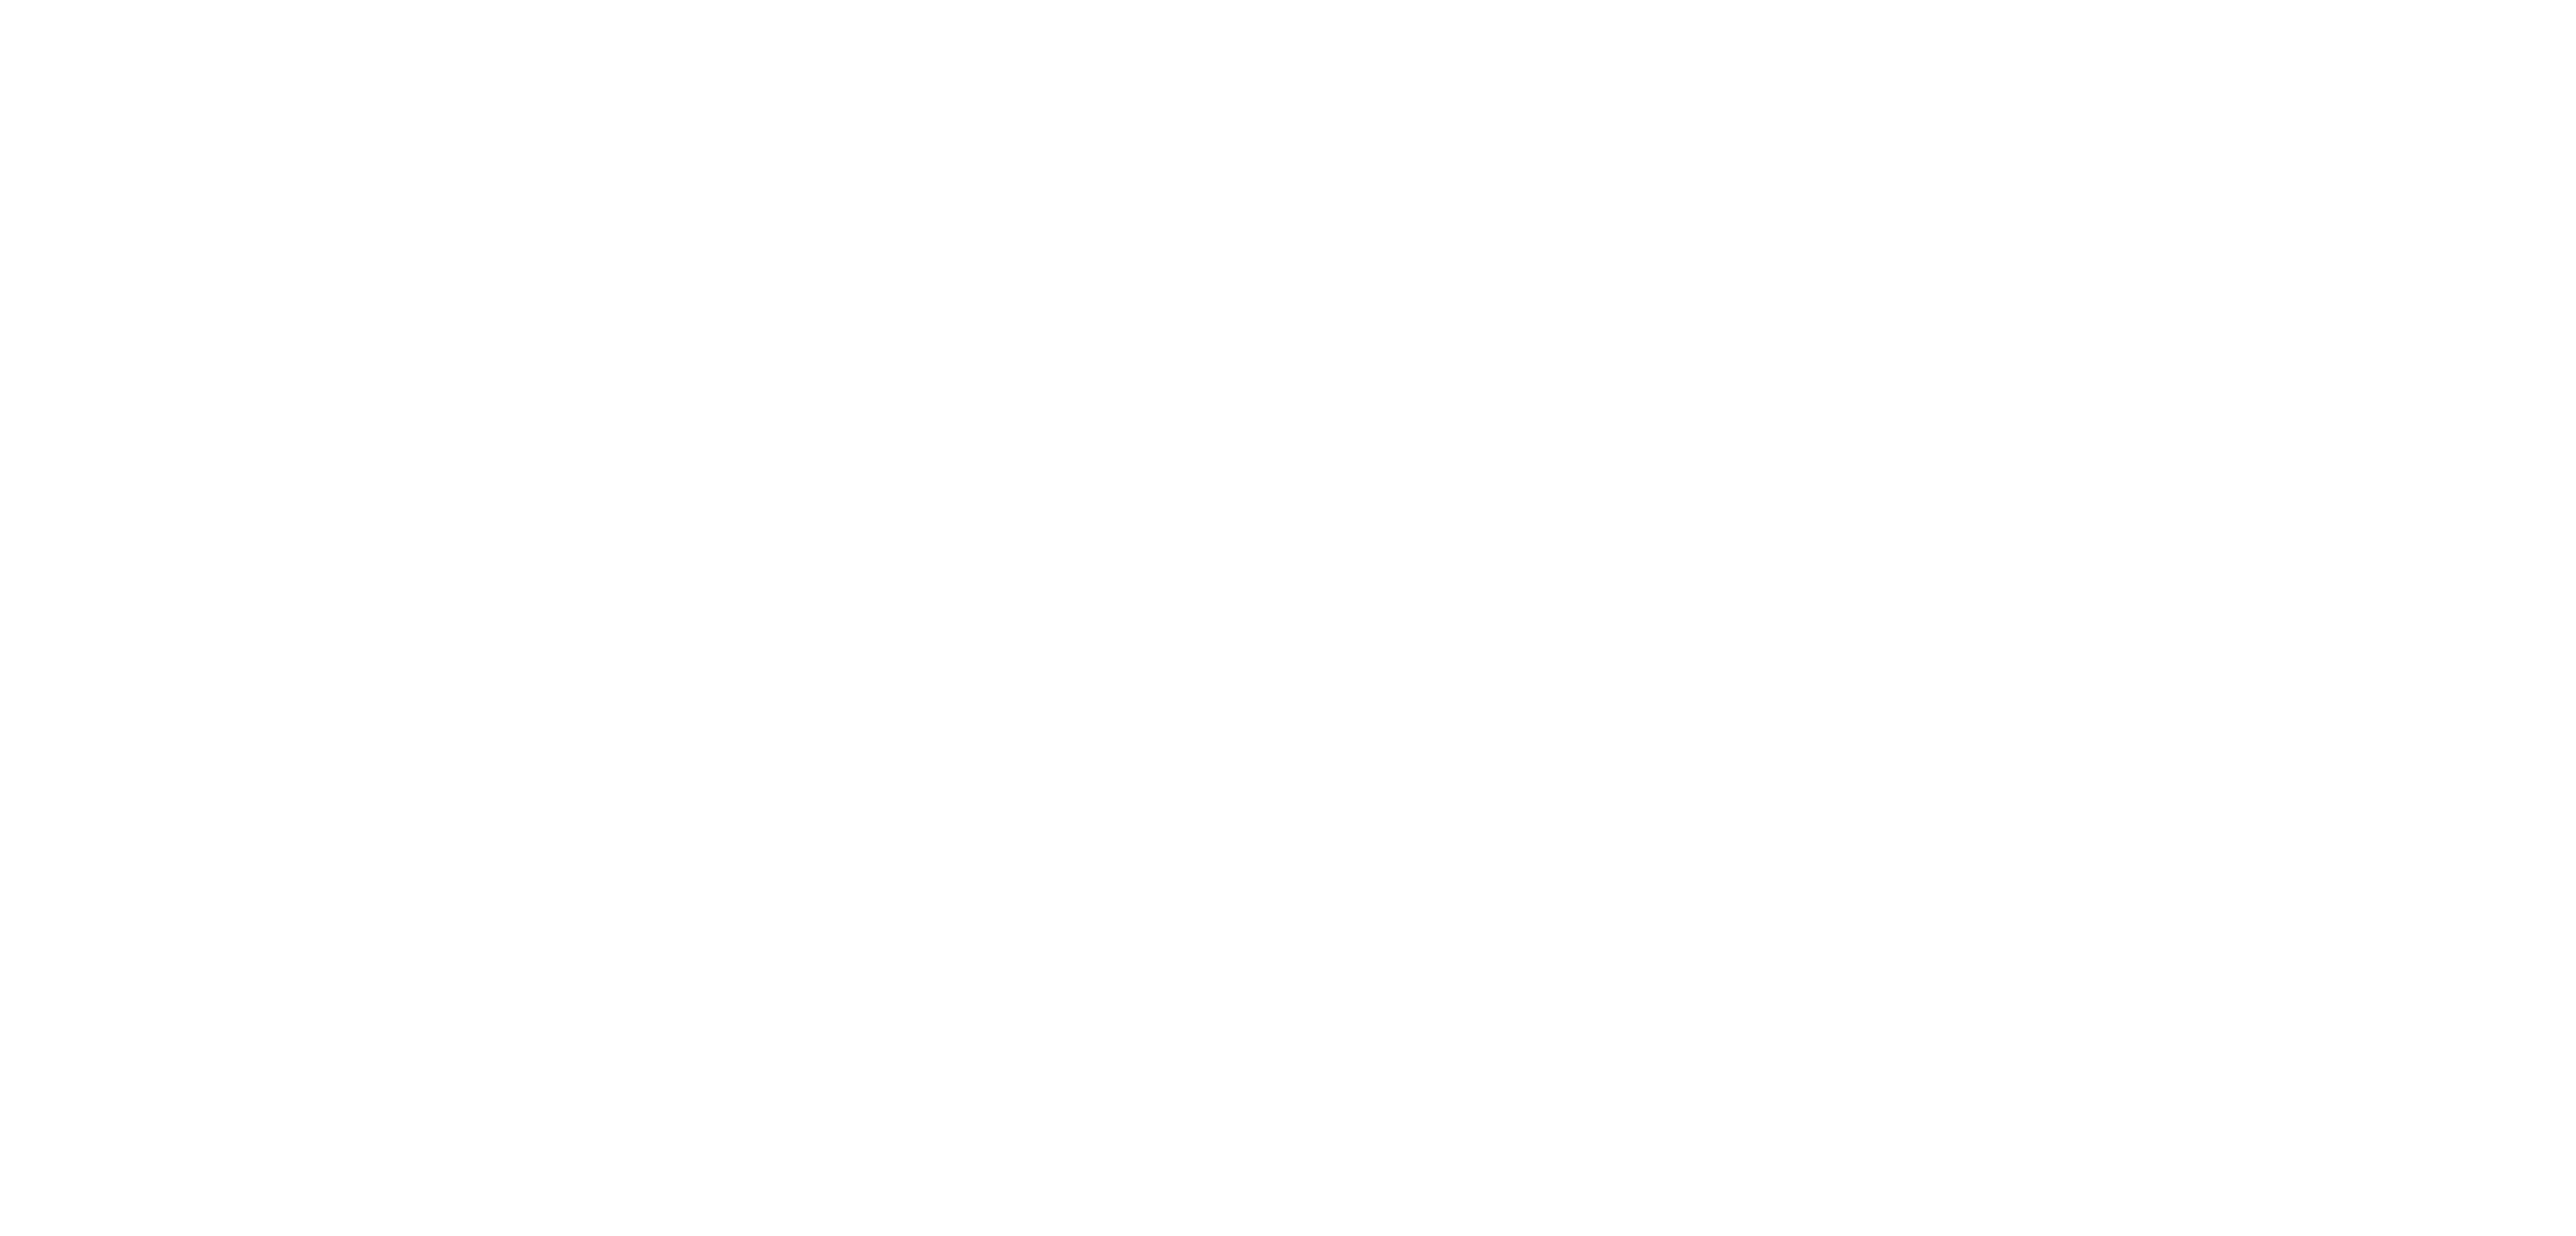

<IPython.core.display.Javascript object>


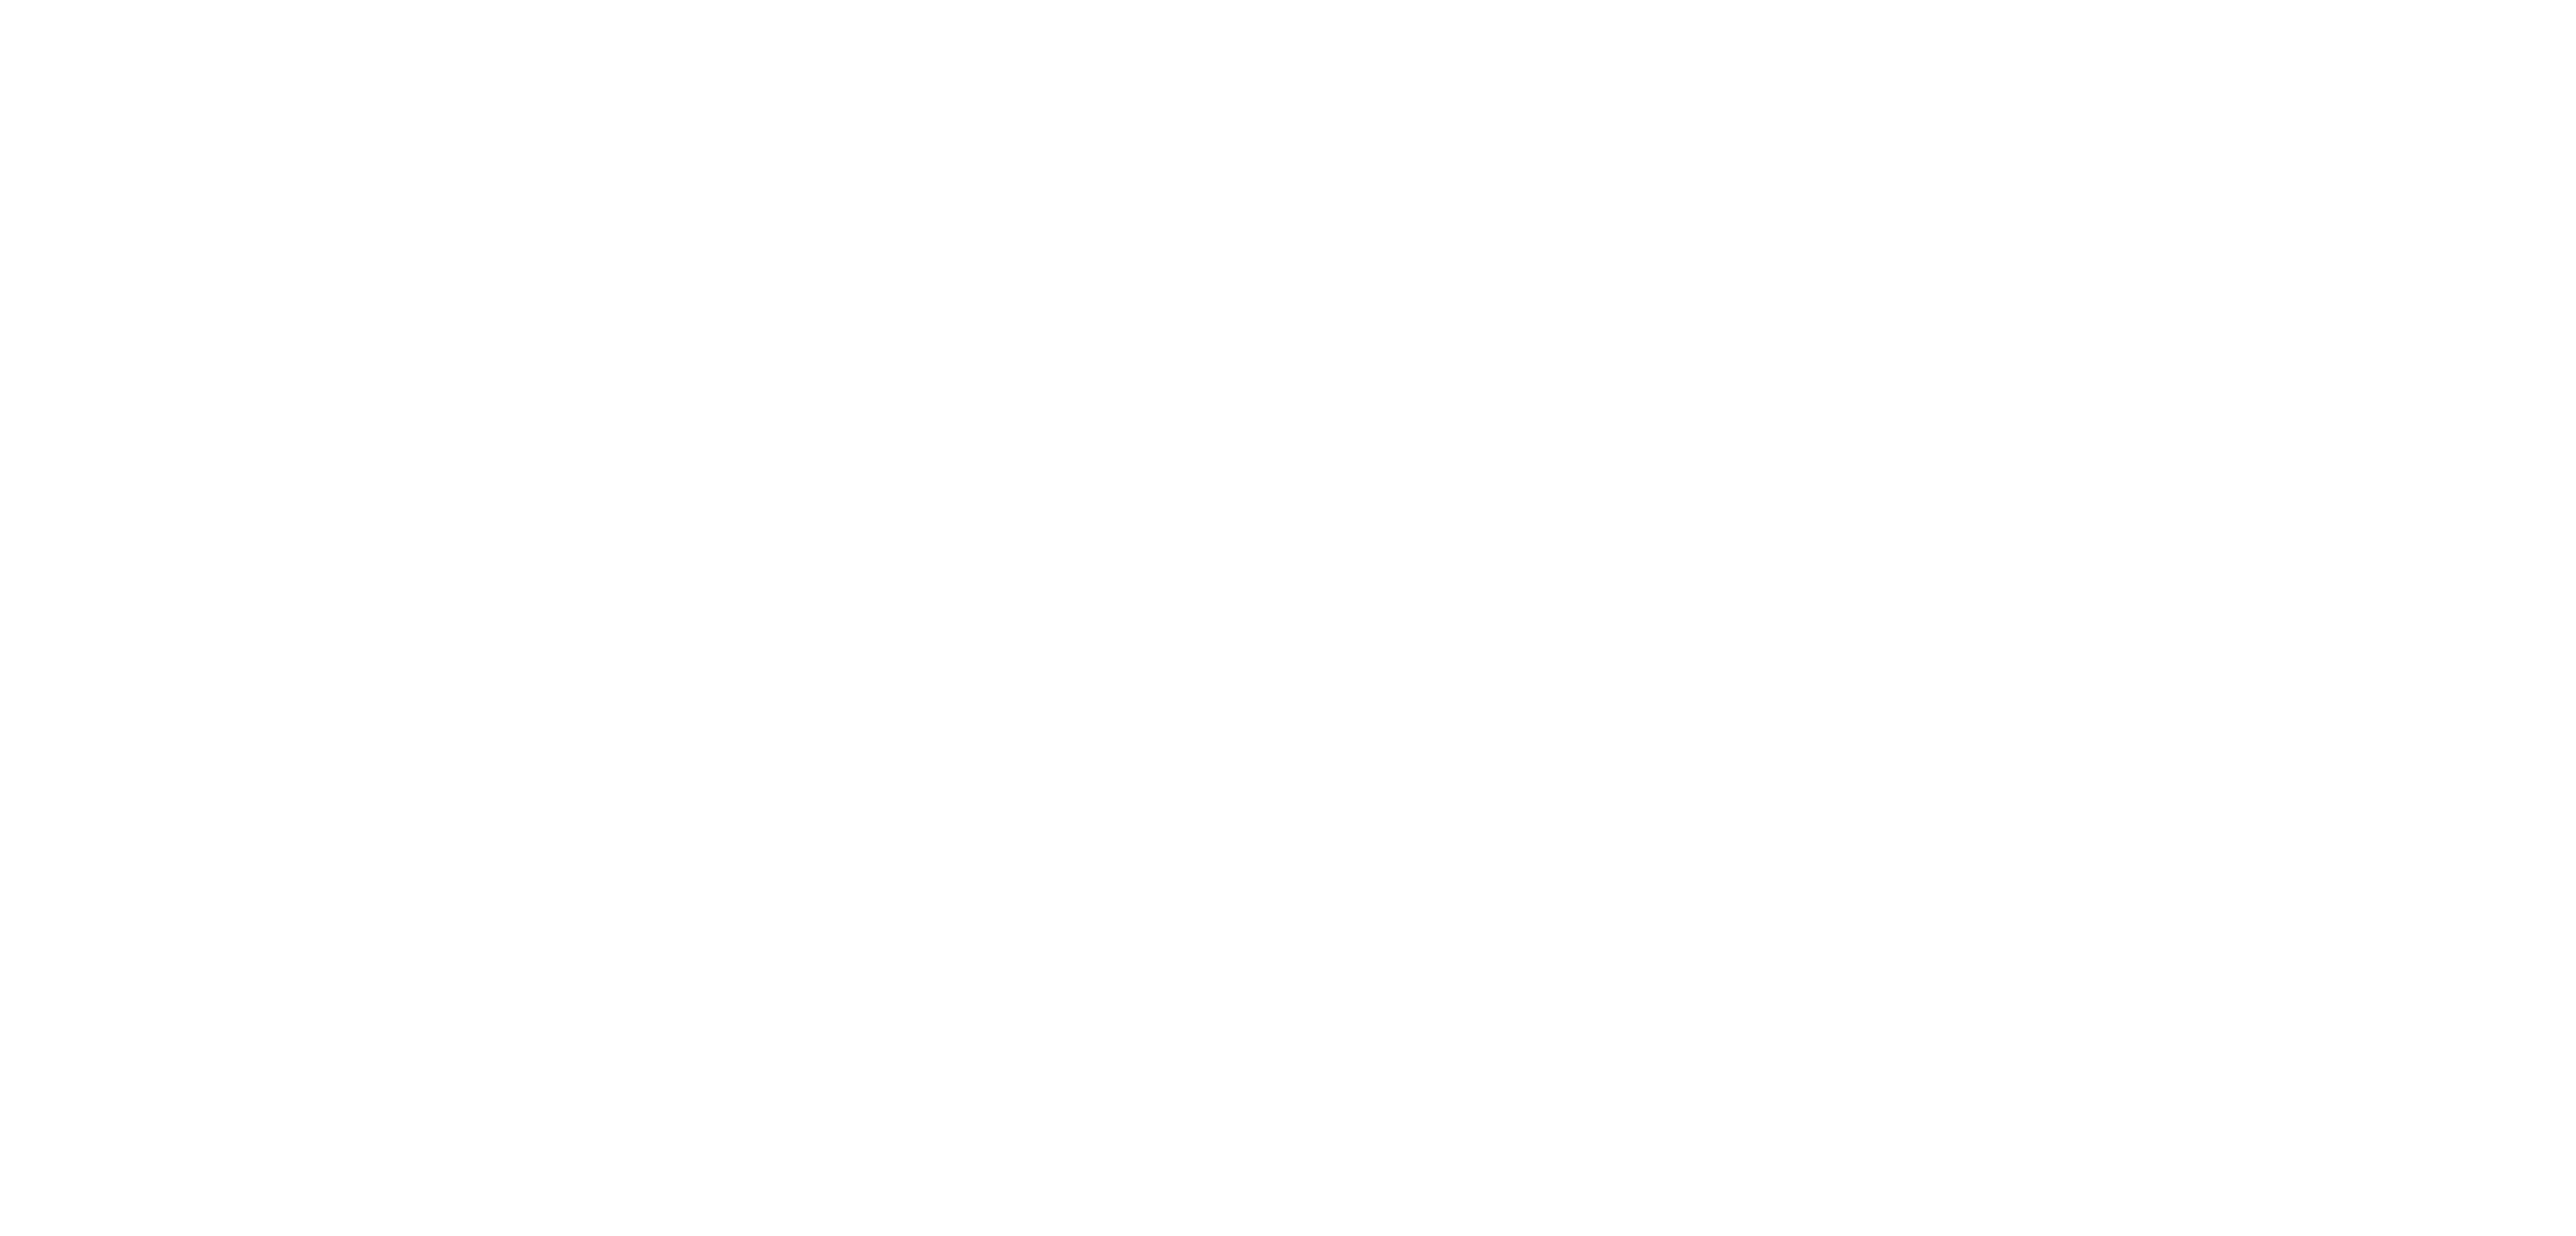

<IPython.core.display.Javascript object>


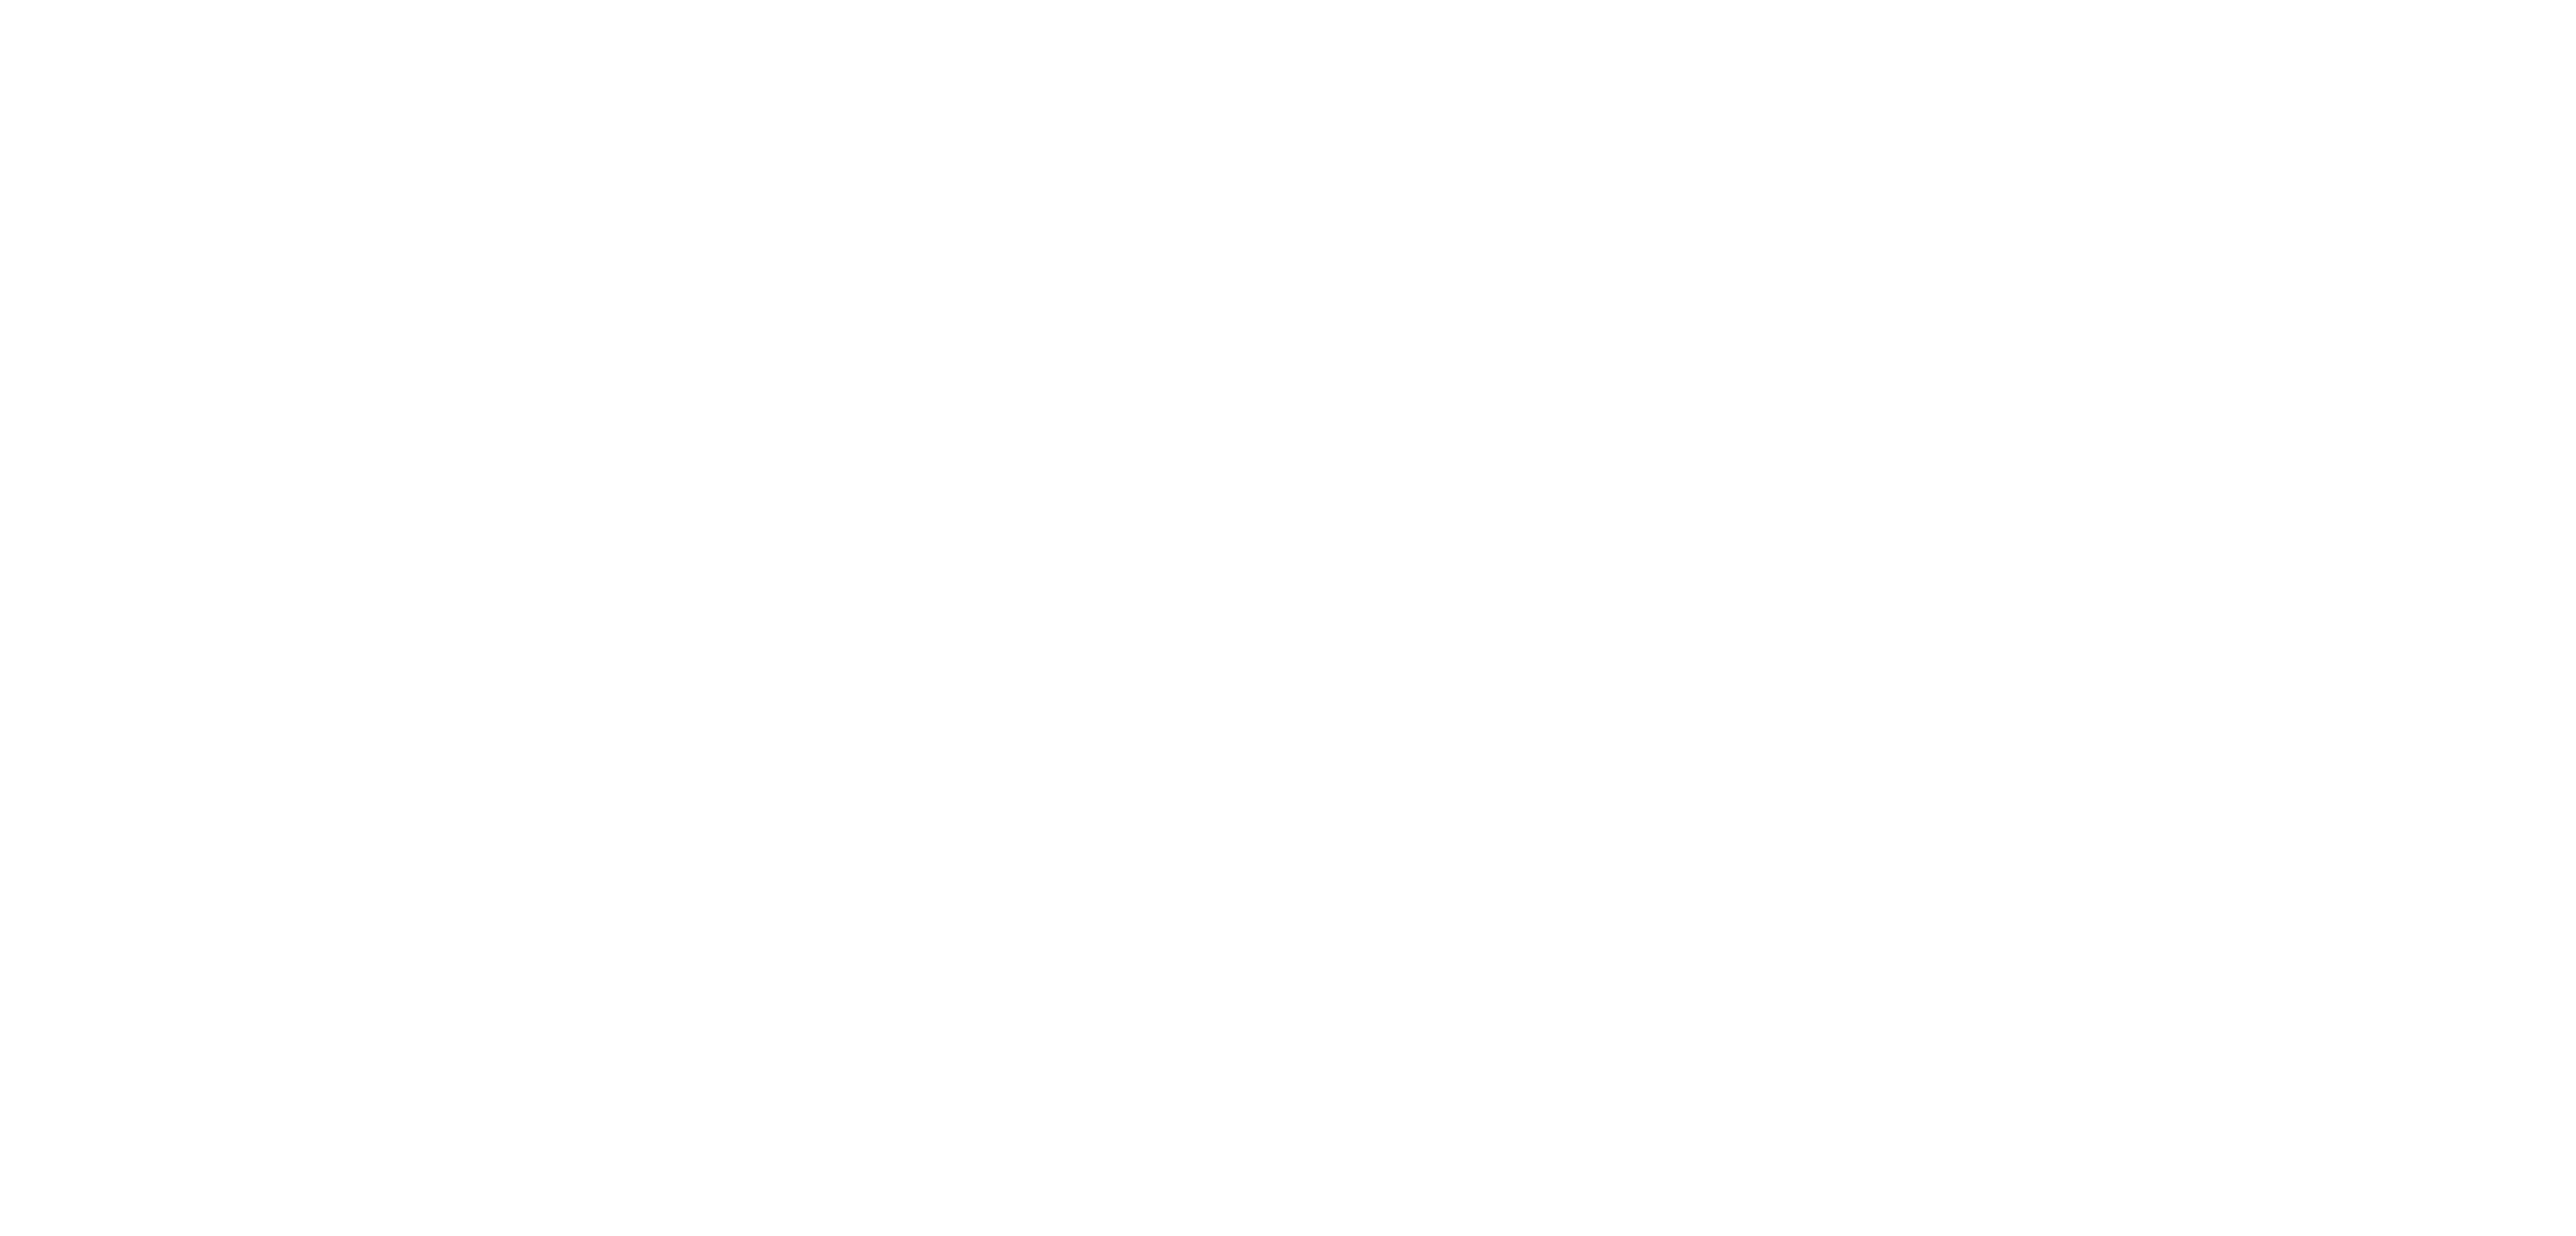

<IPython.core.display.Javascript object>


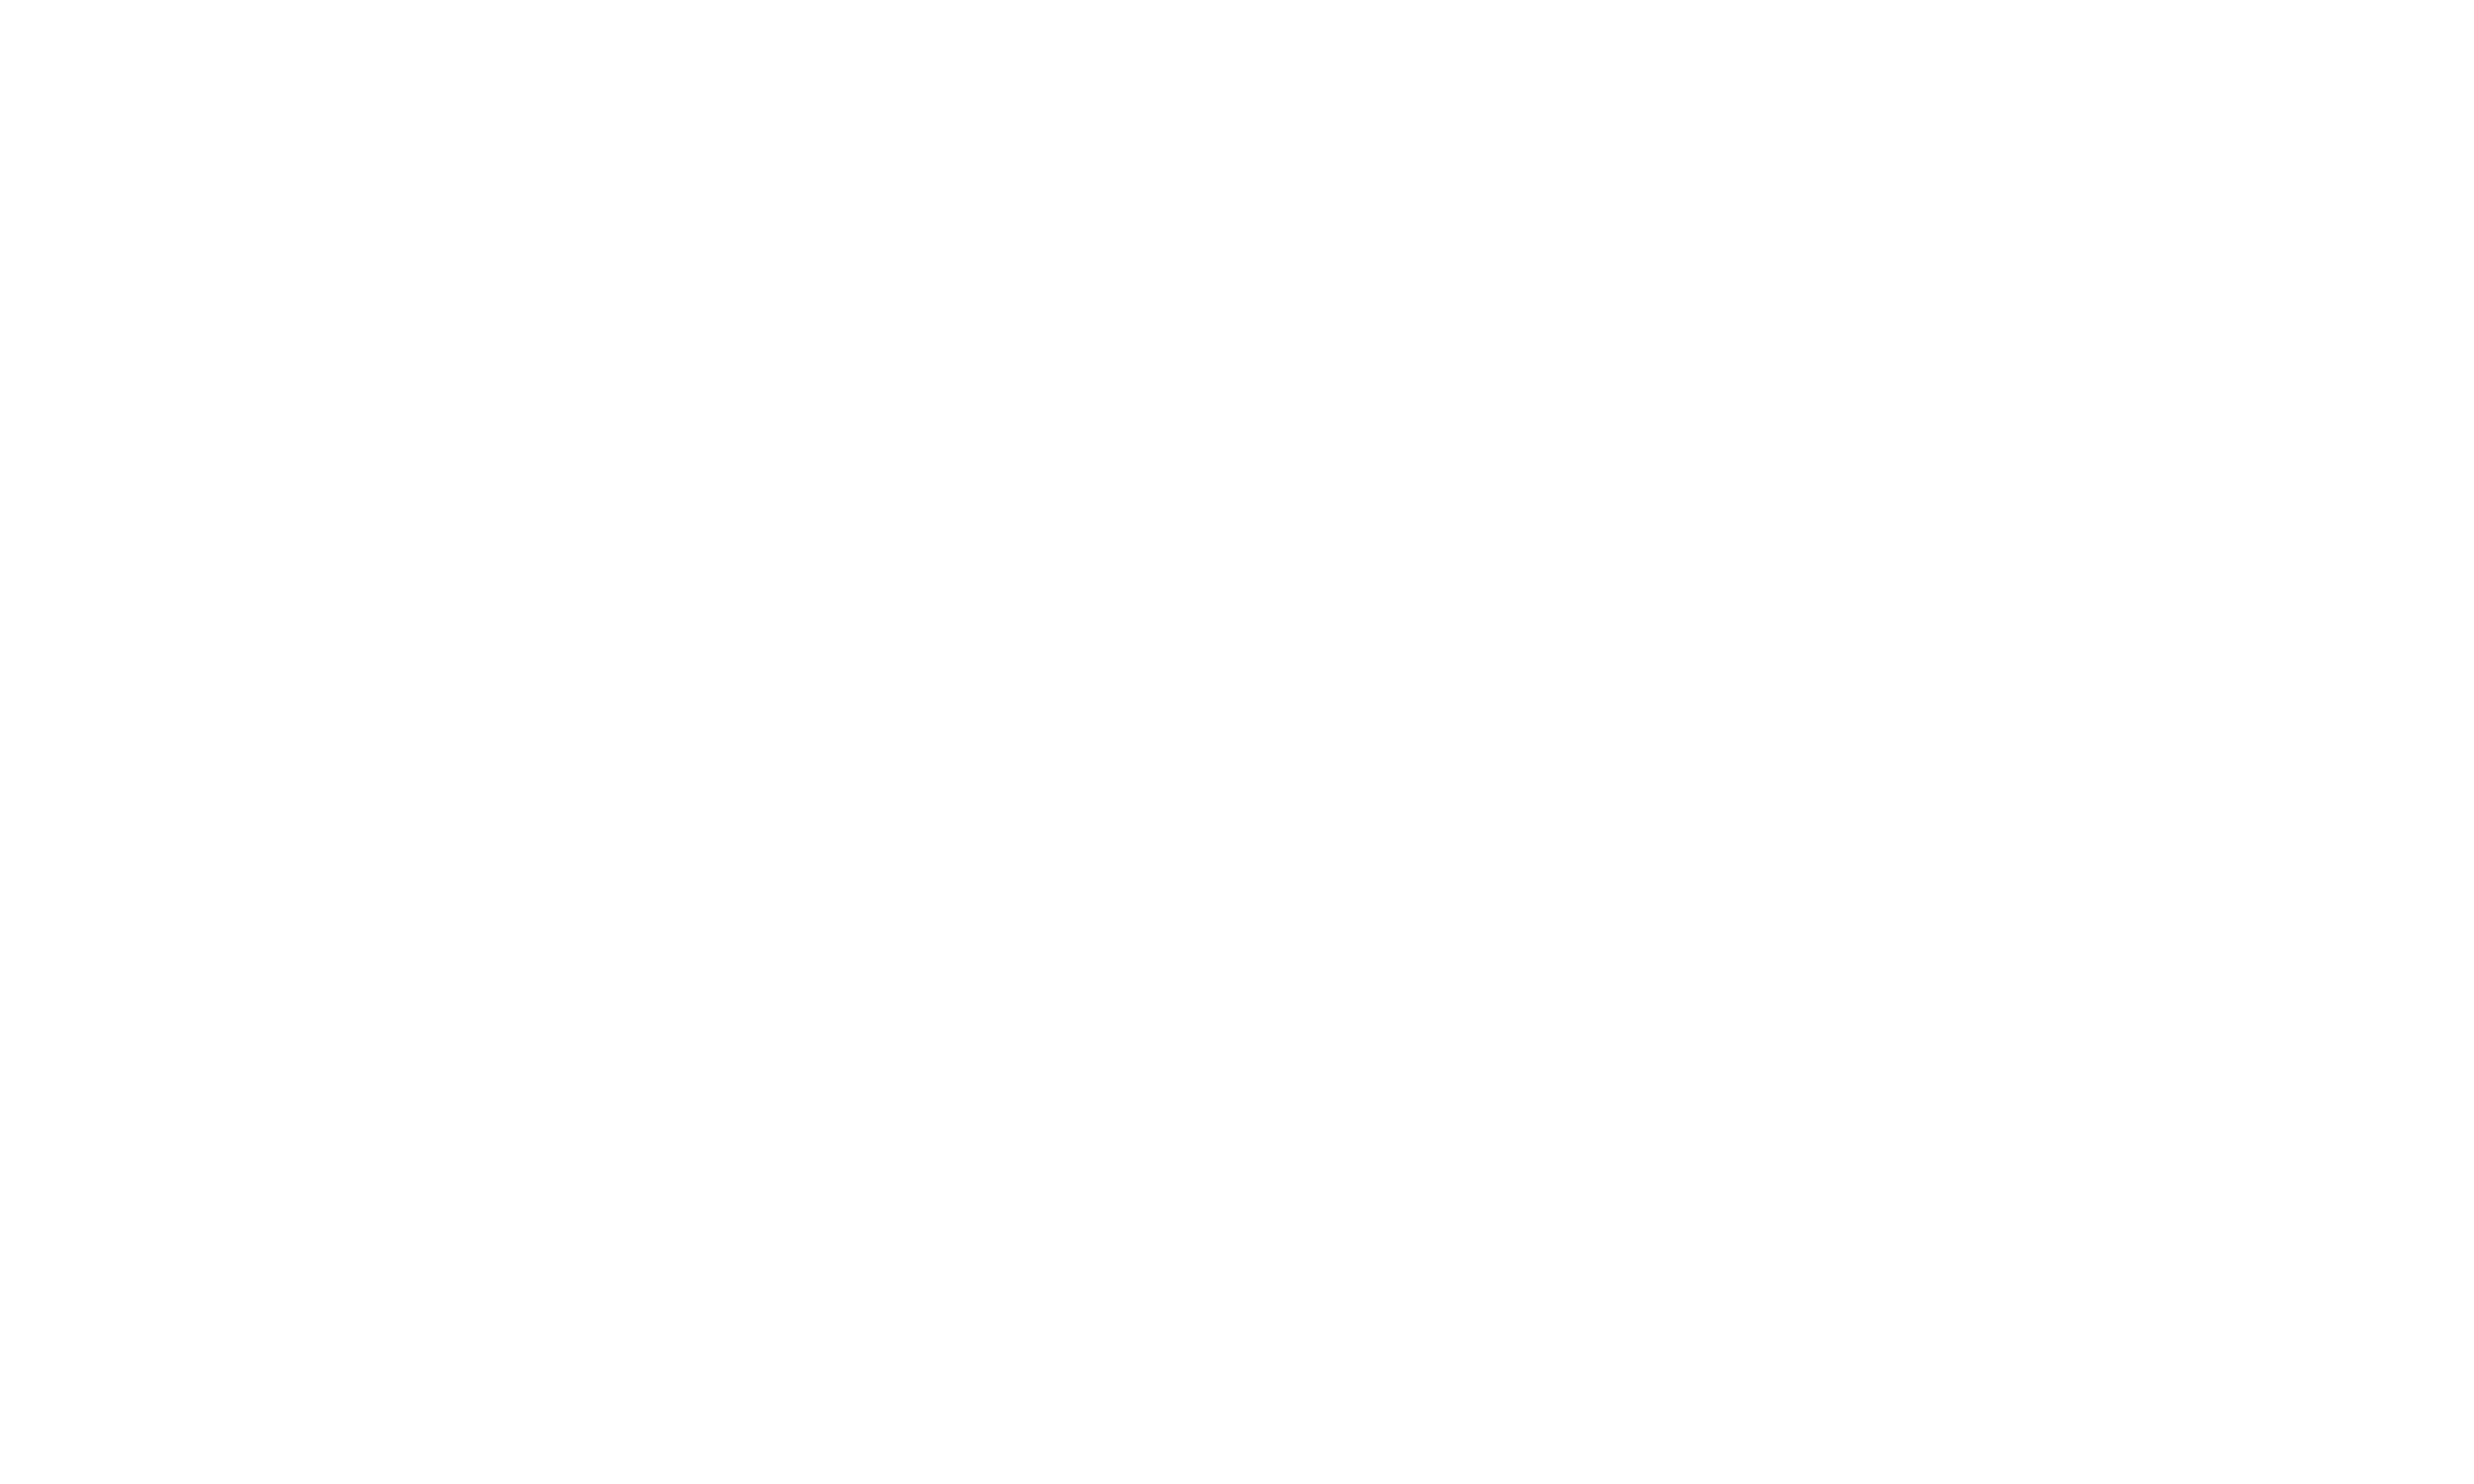

<IPython.core.display.Javascript object>


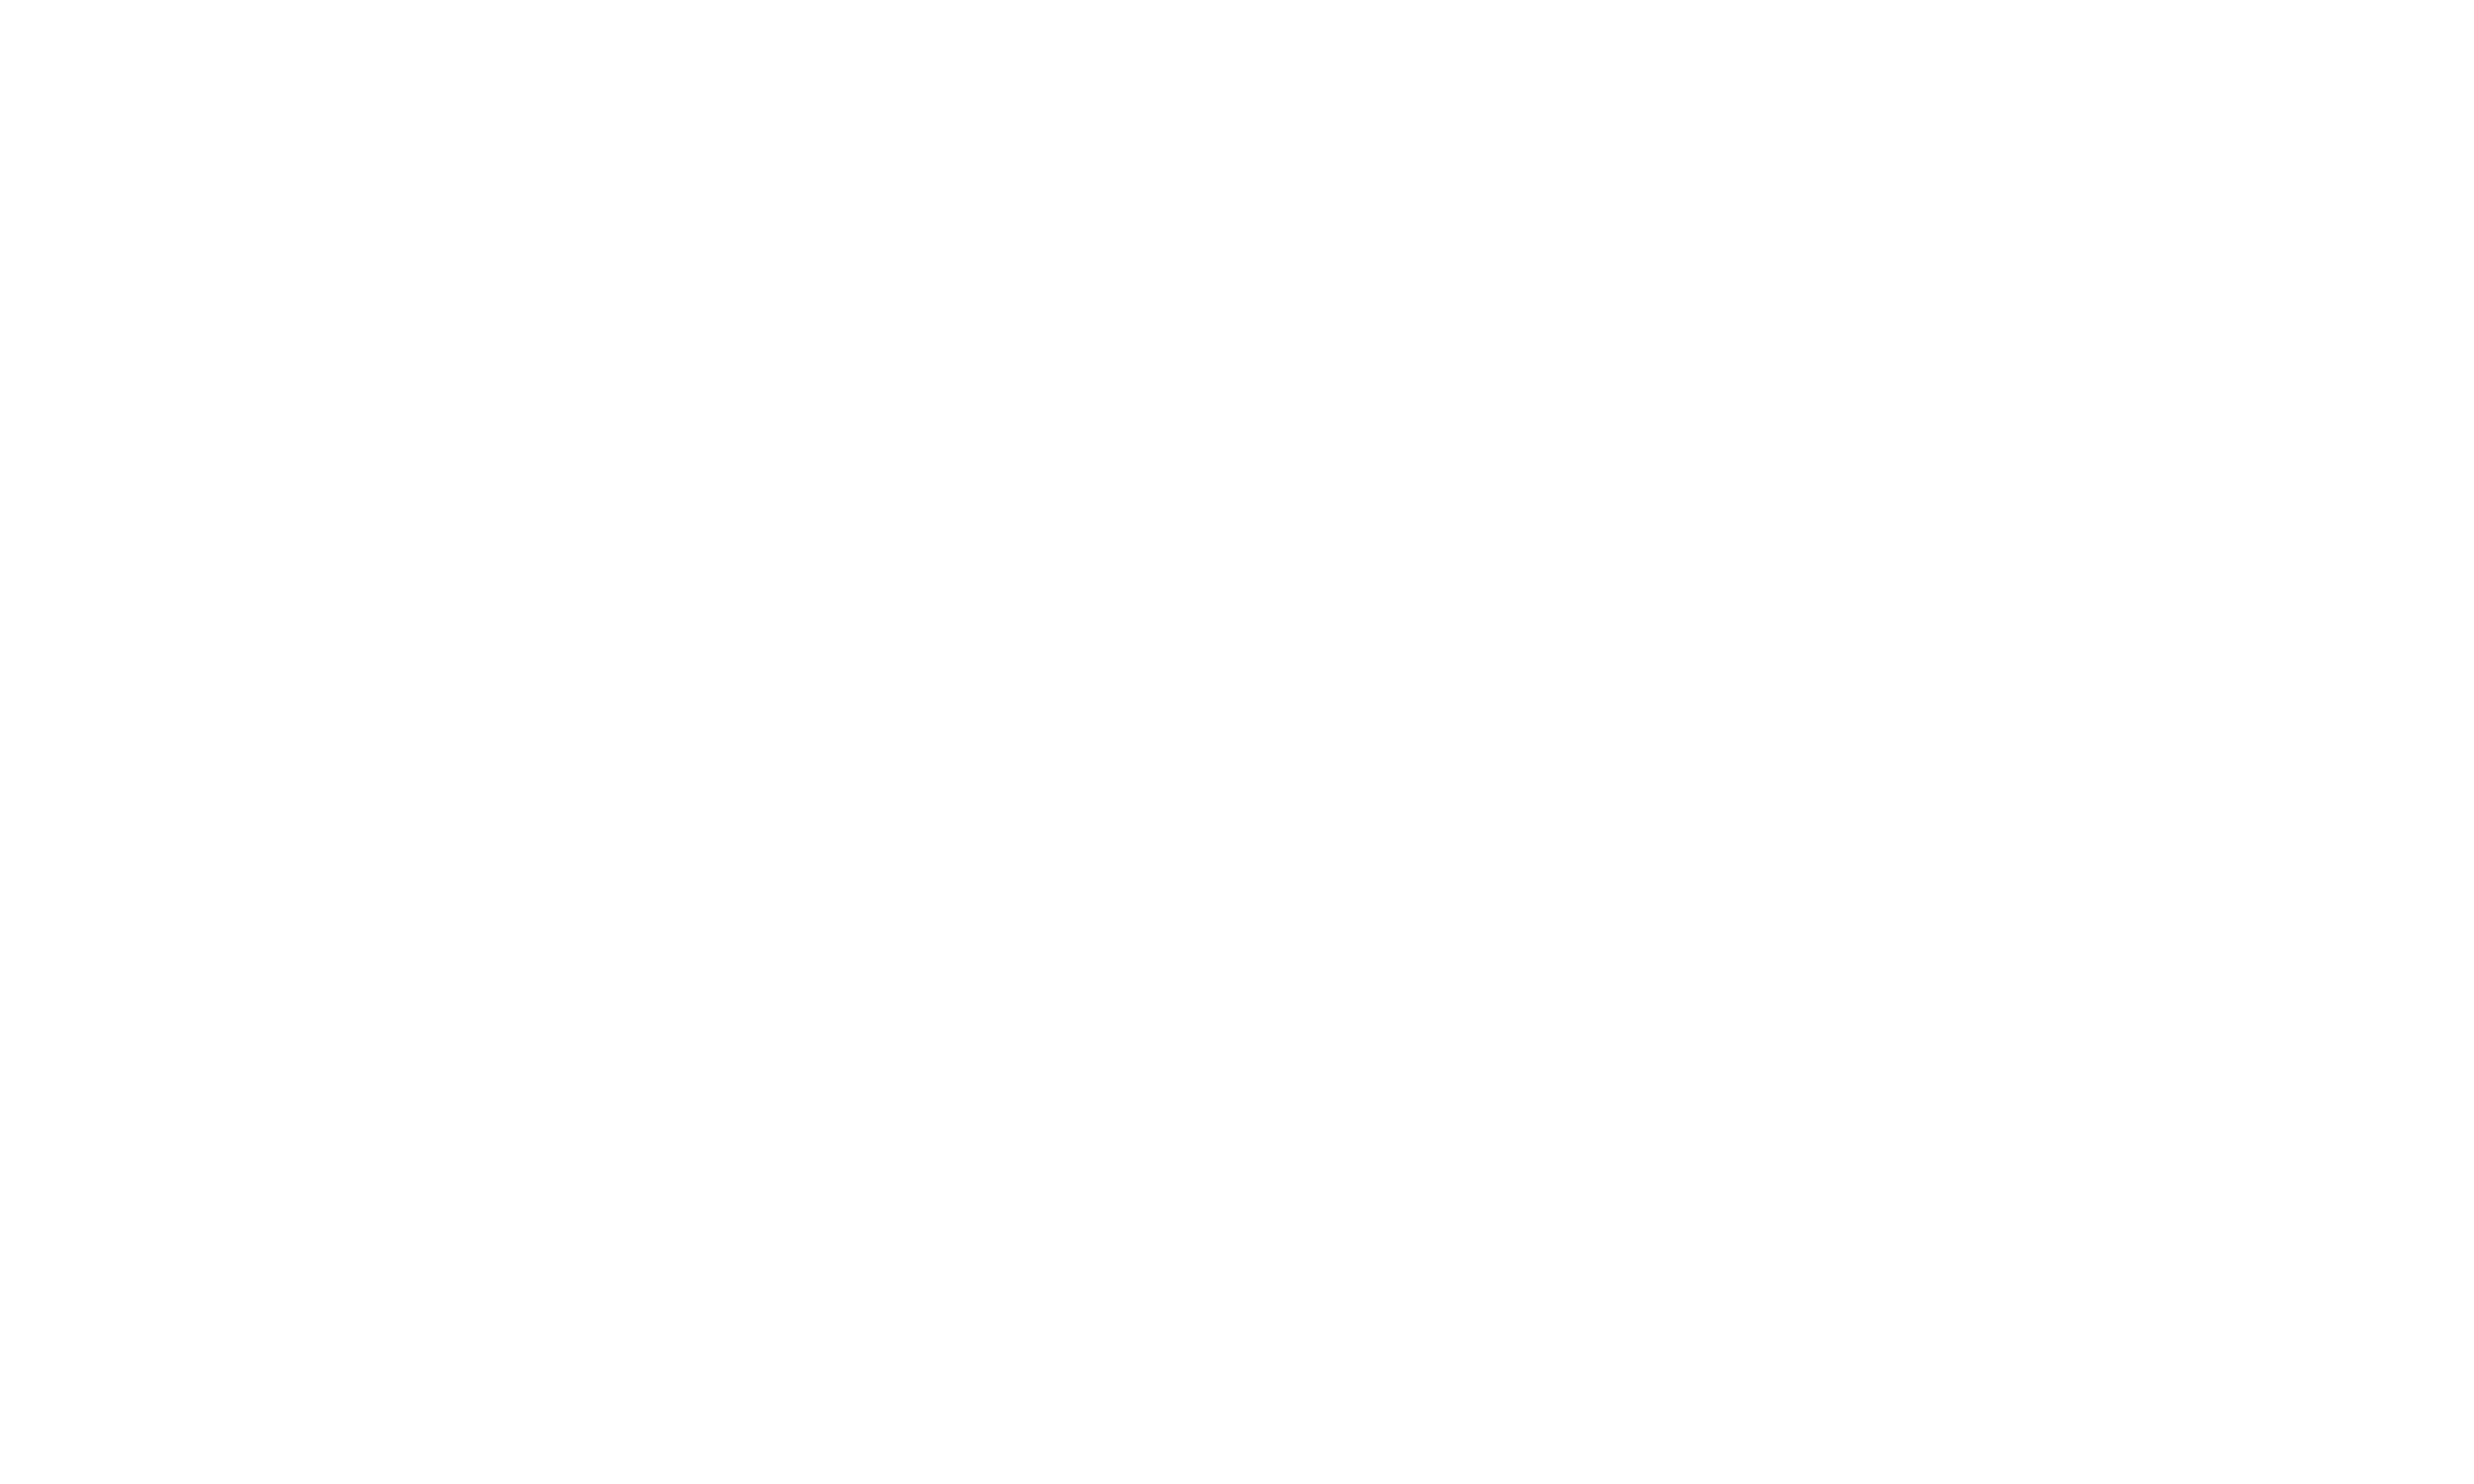

<IPython.core.display.Javascript object>


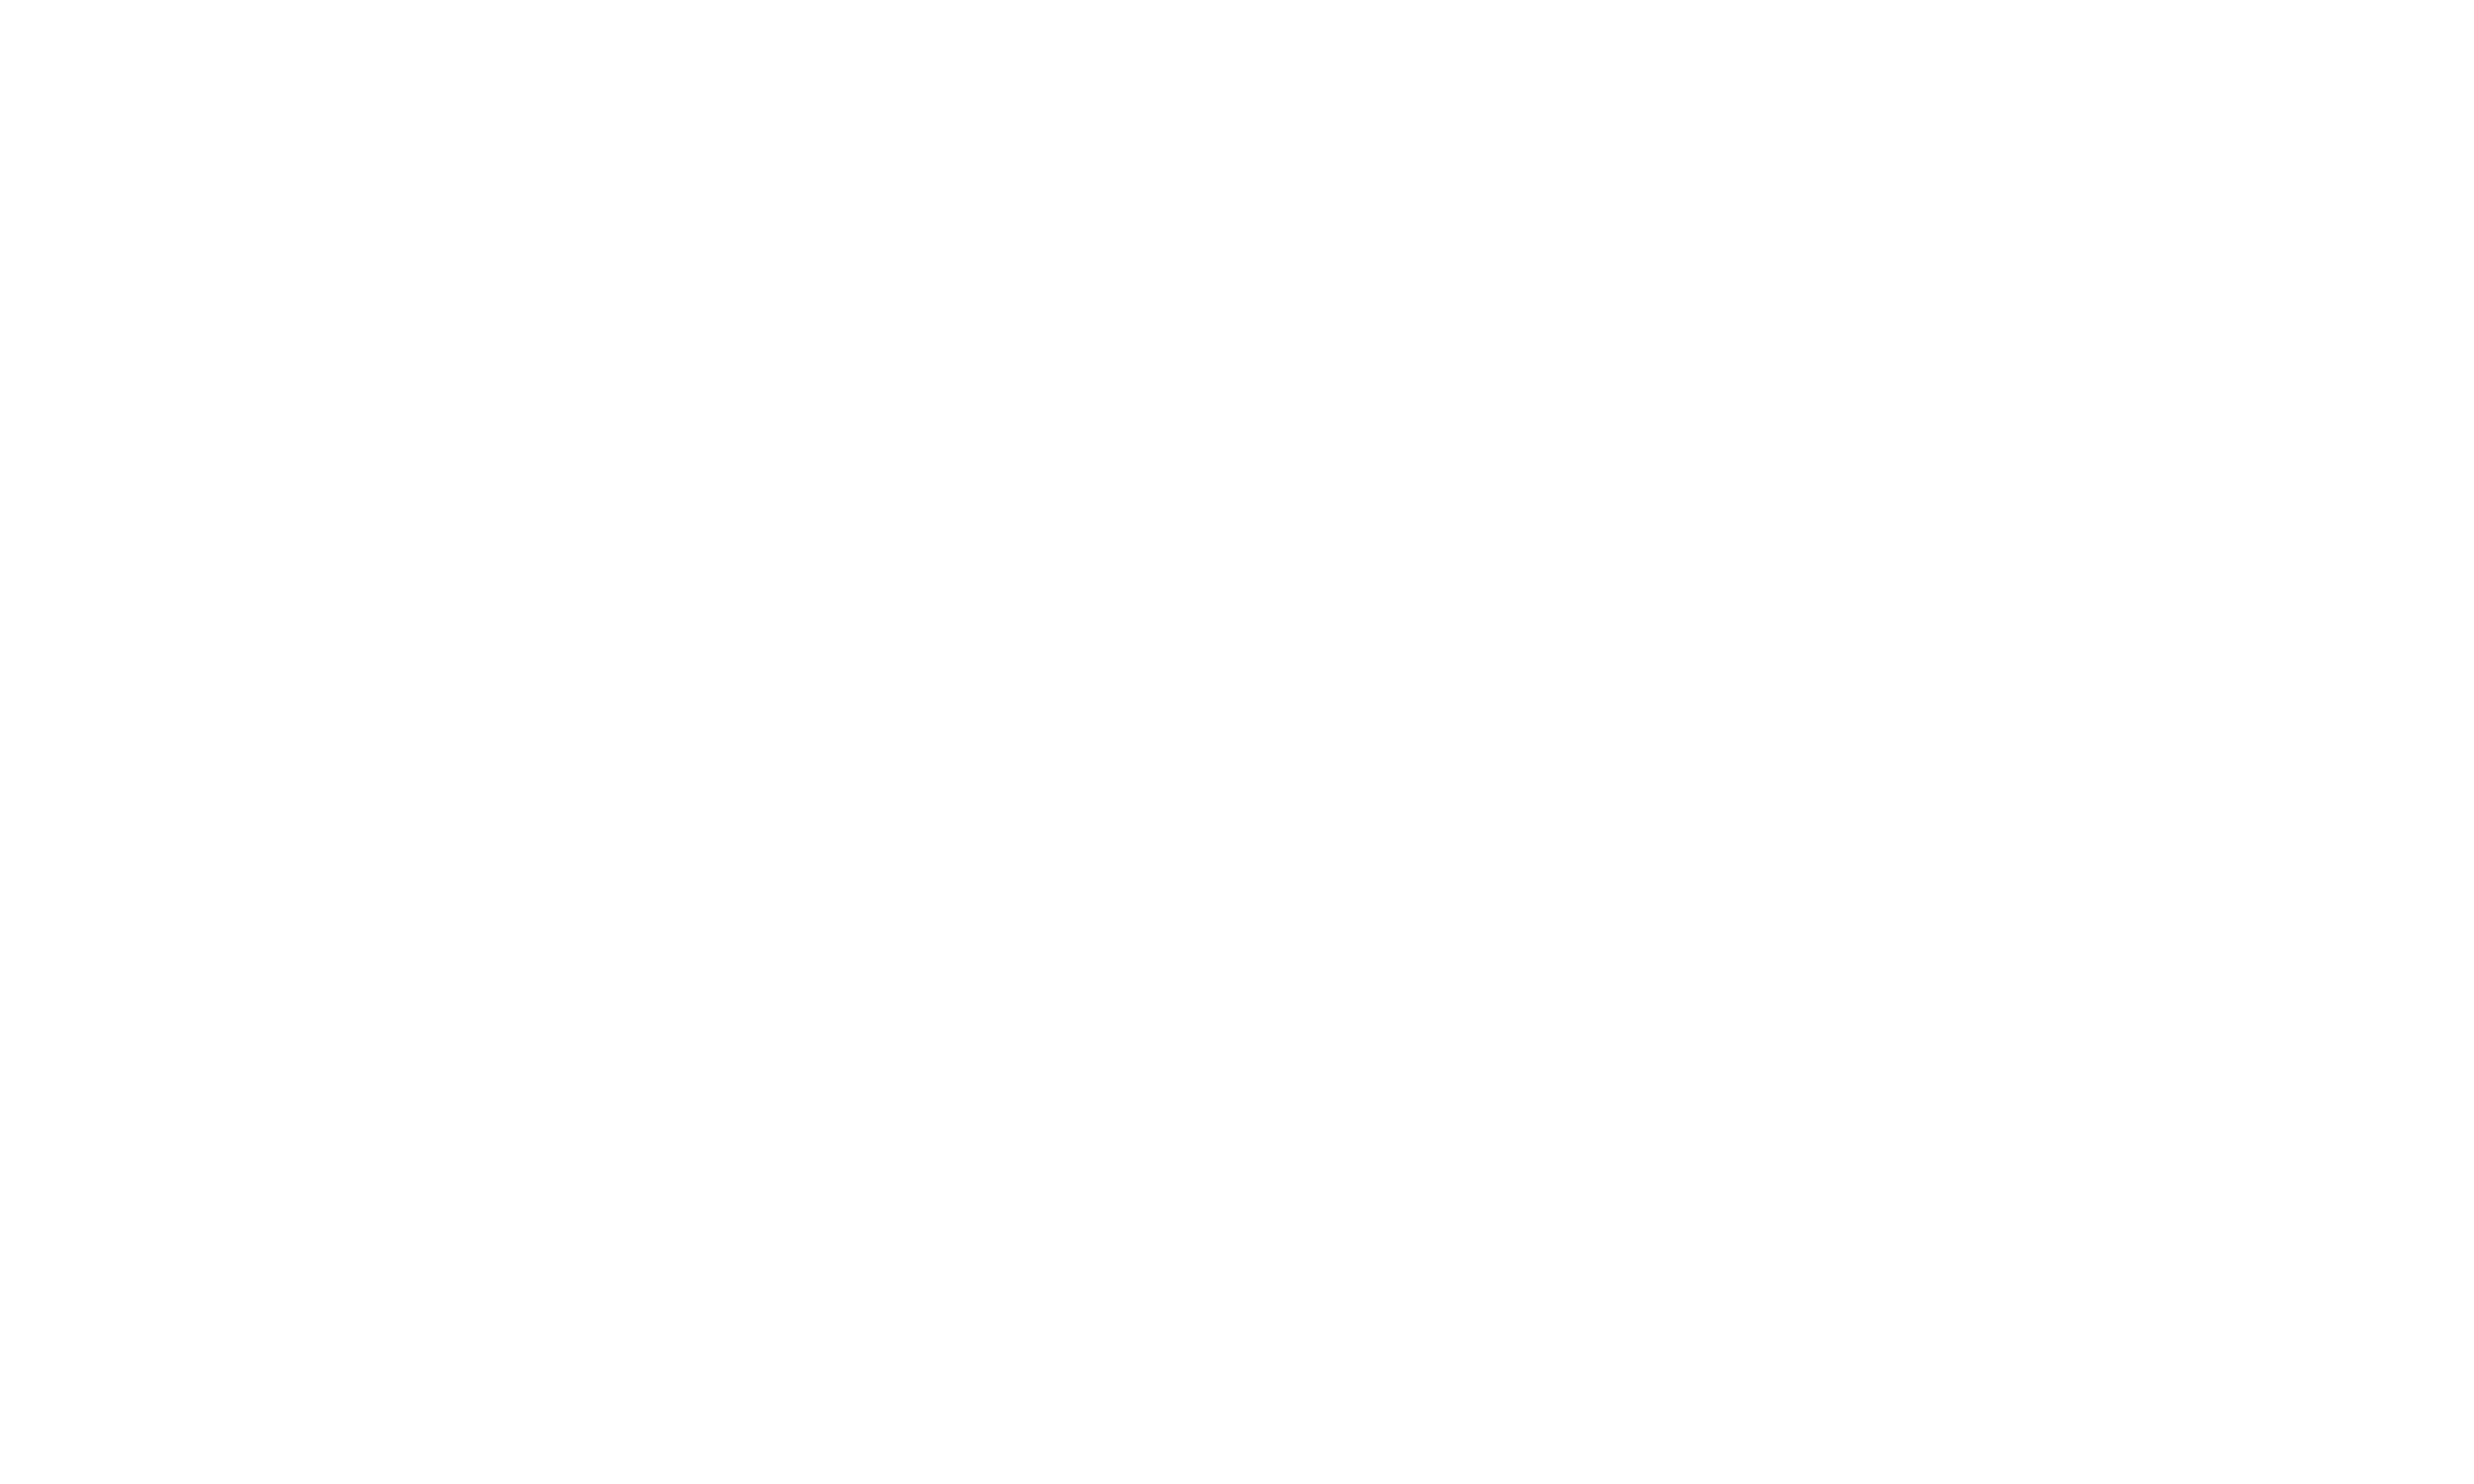

<IPython.core.display.Javascript object>


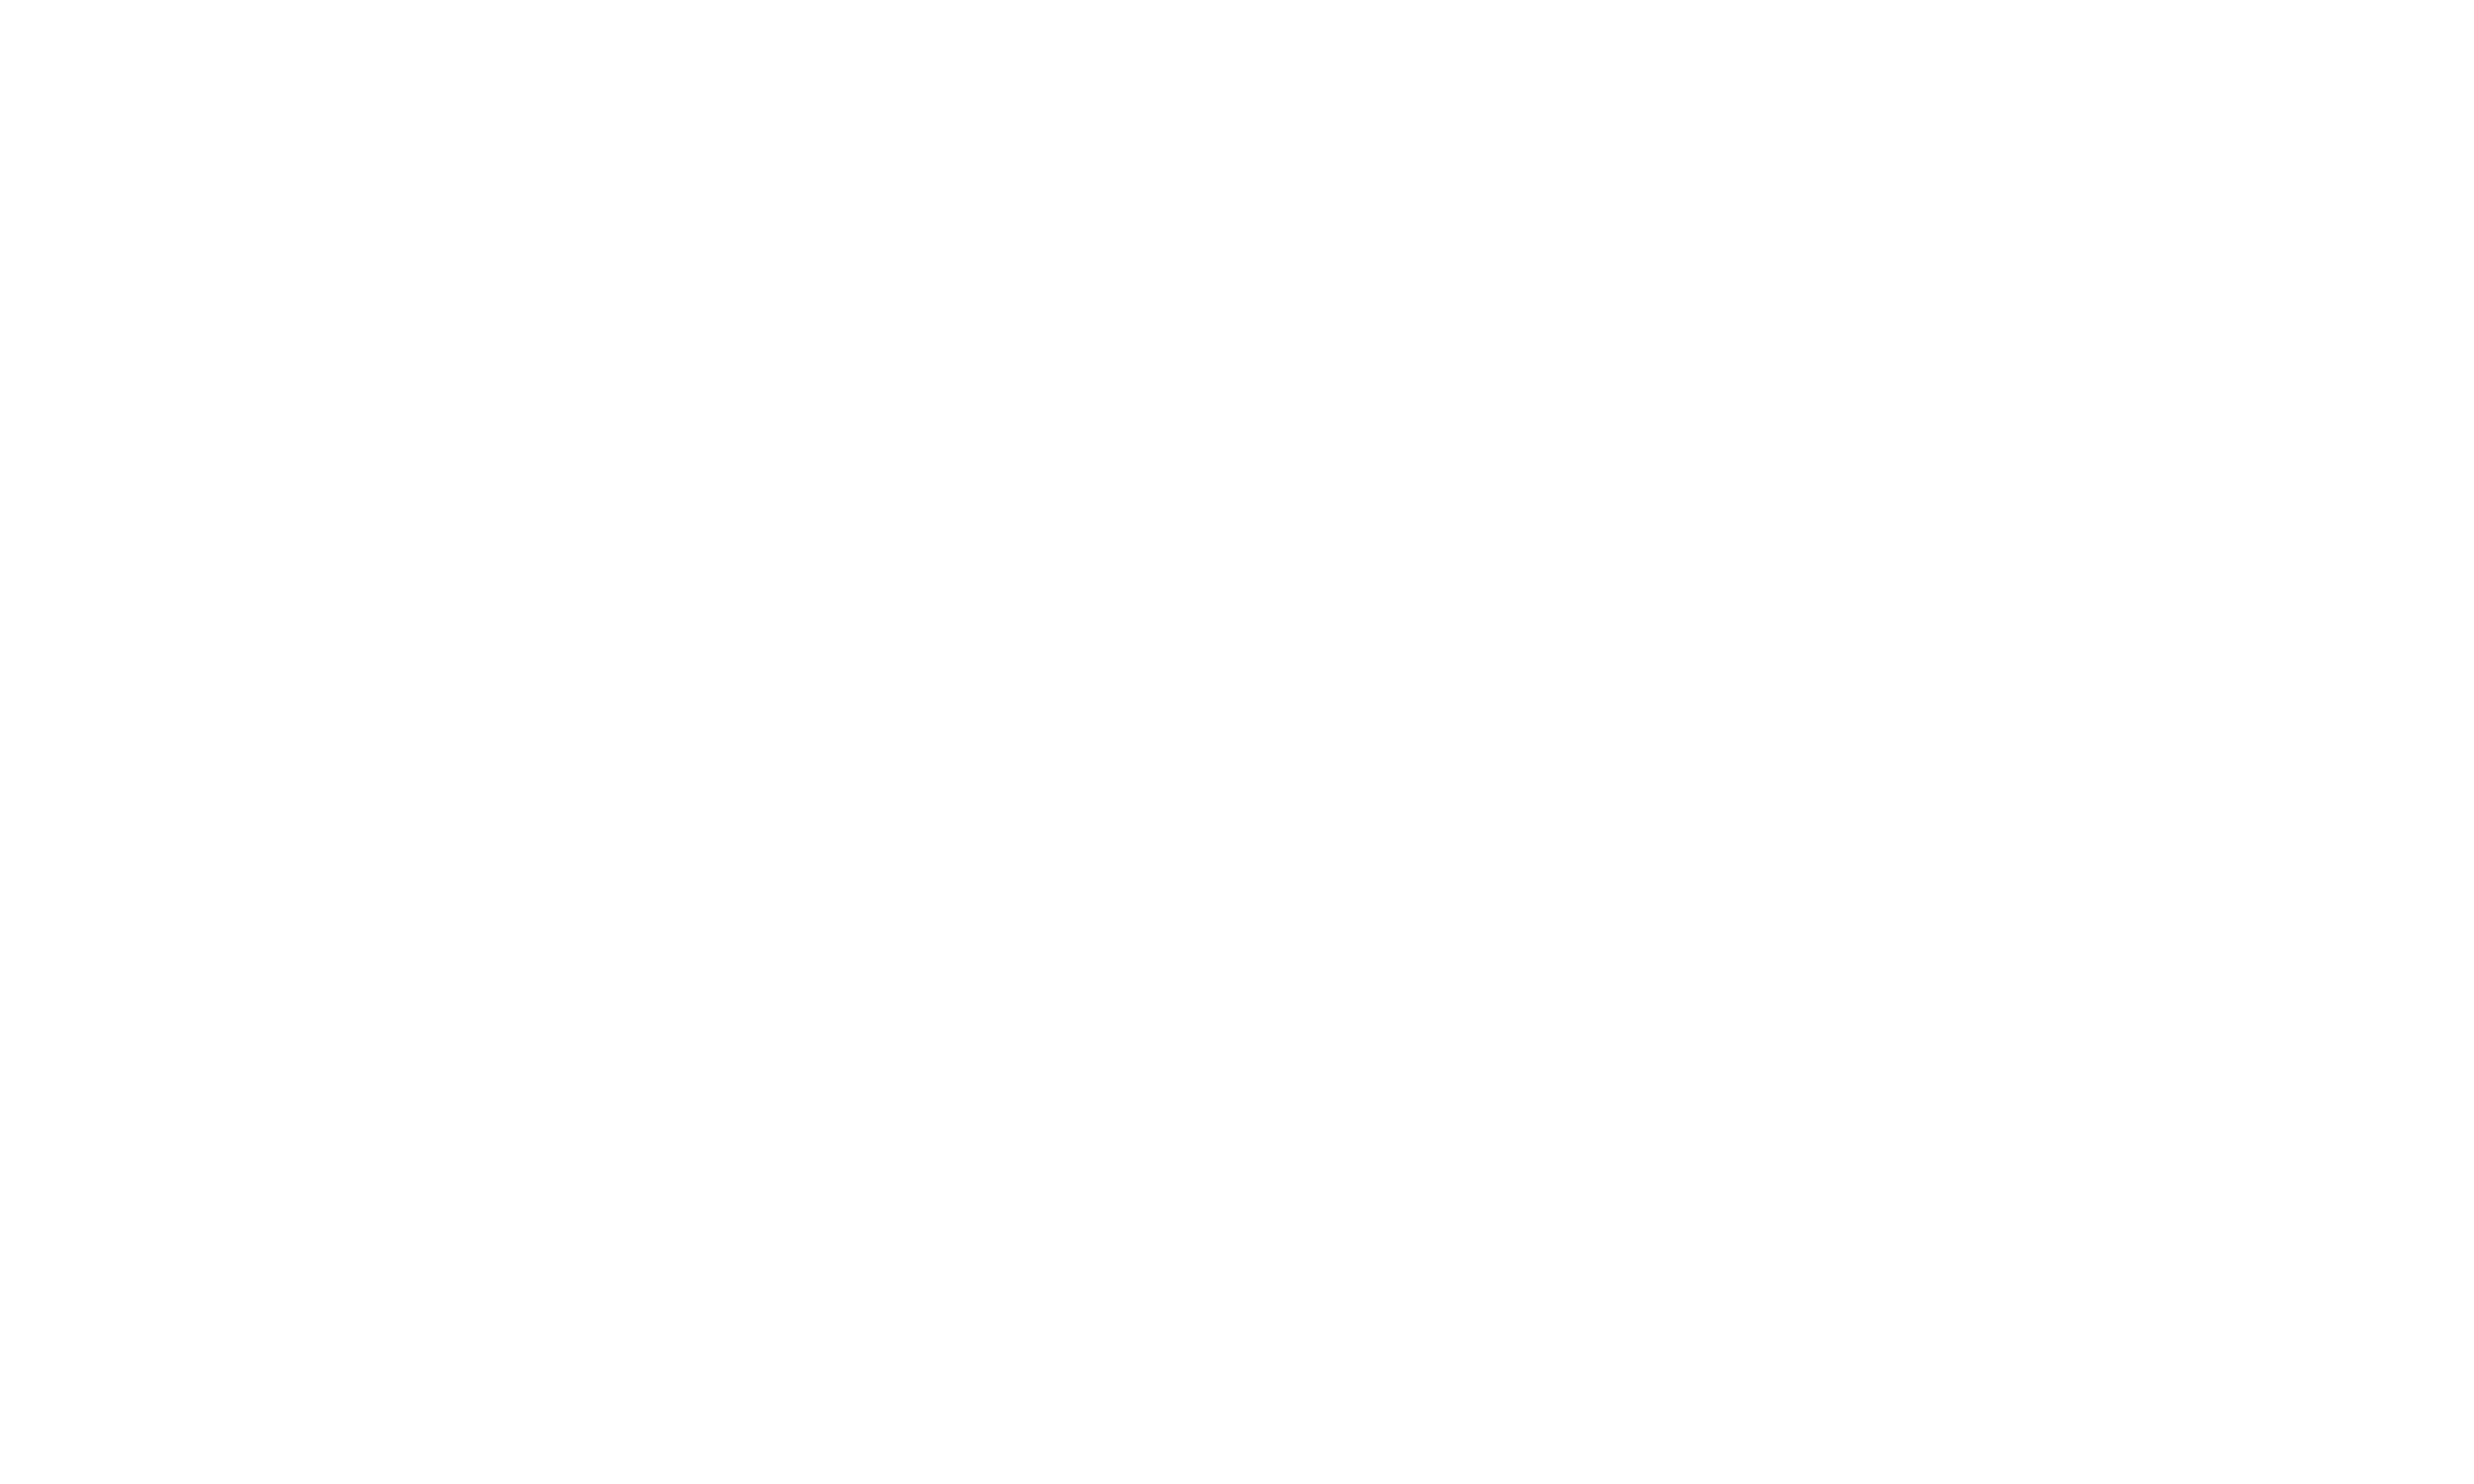

<IPython.core.display.Javascript object>


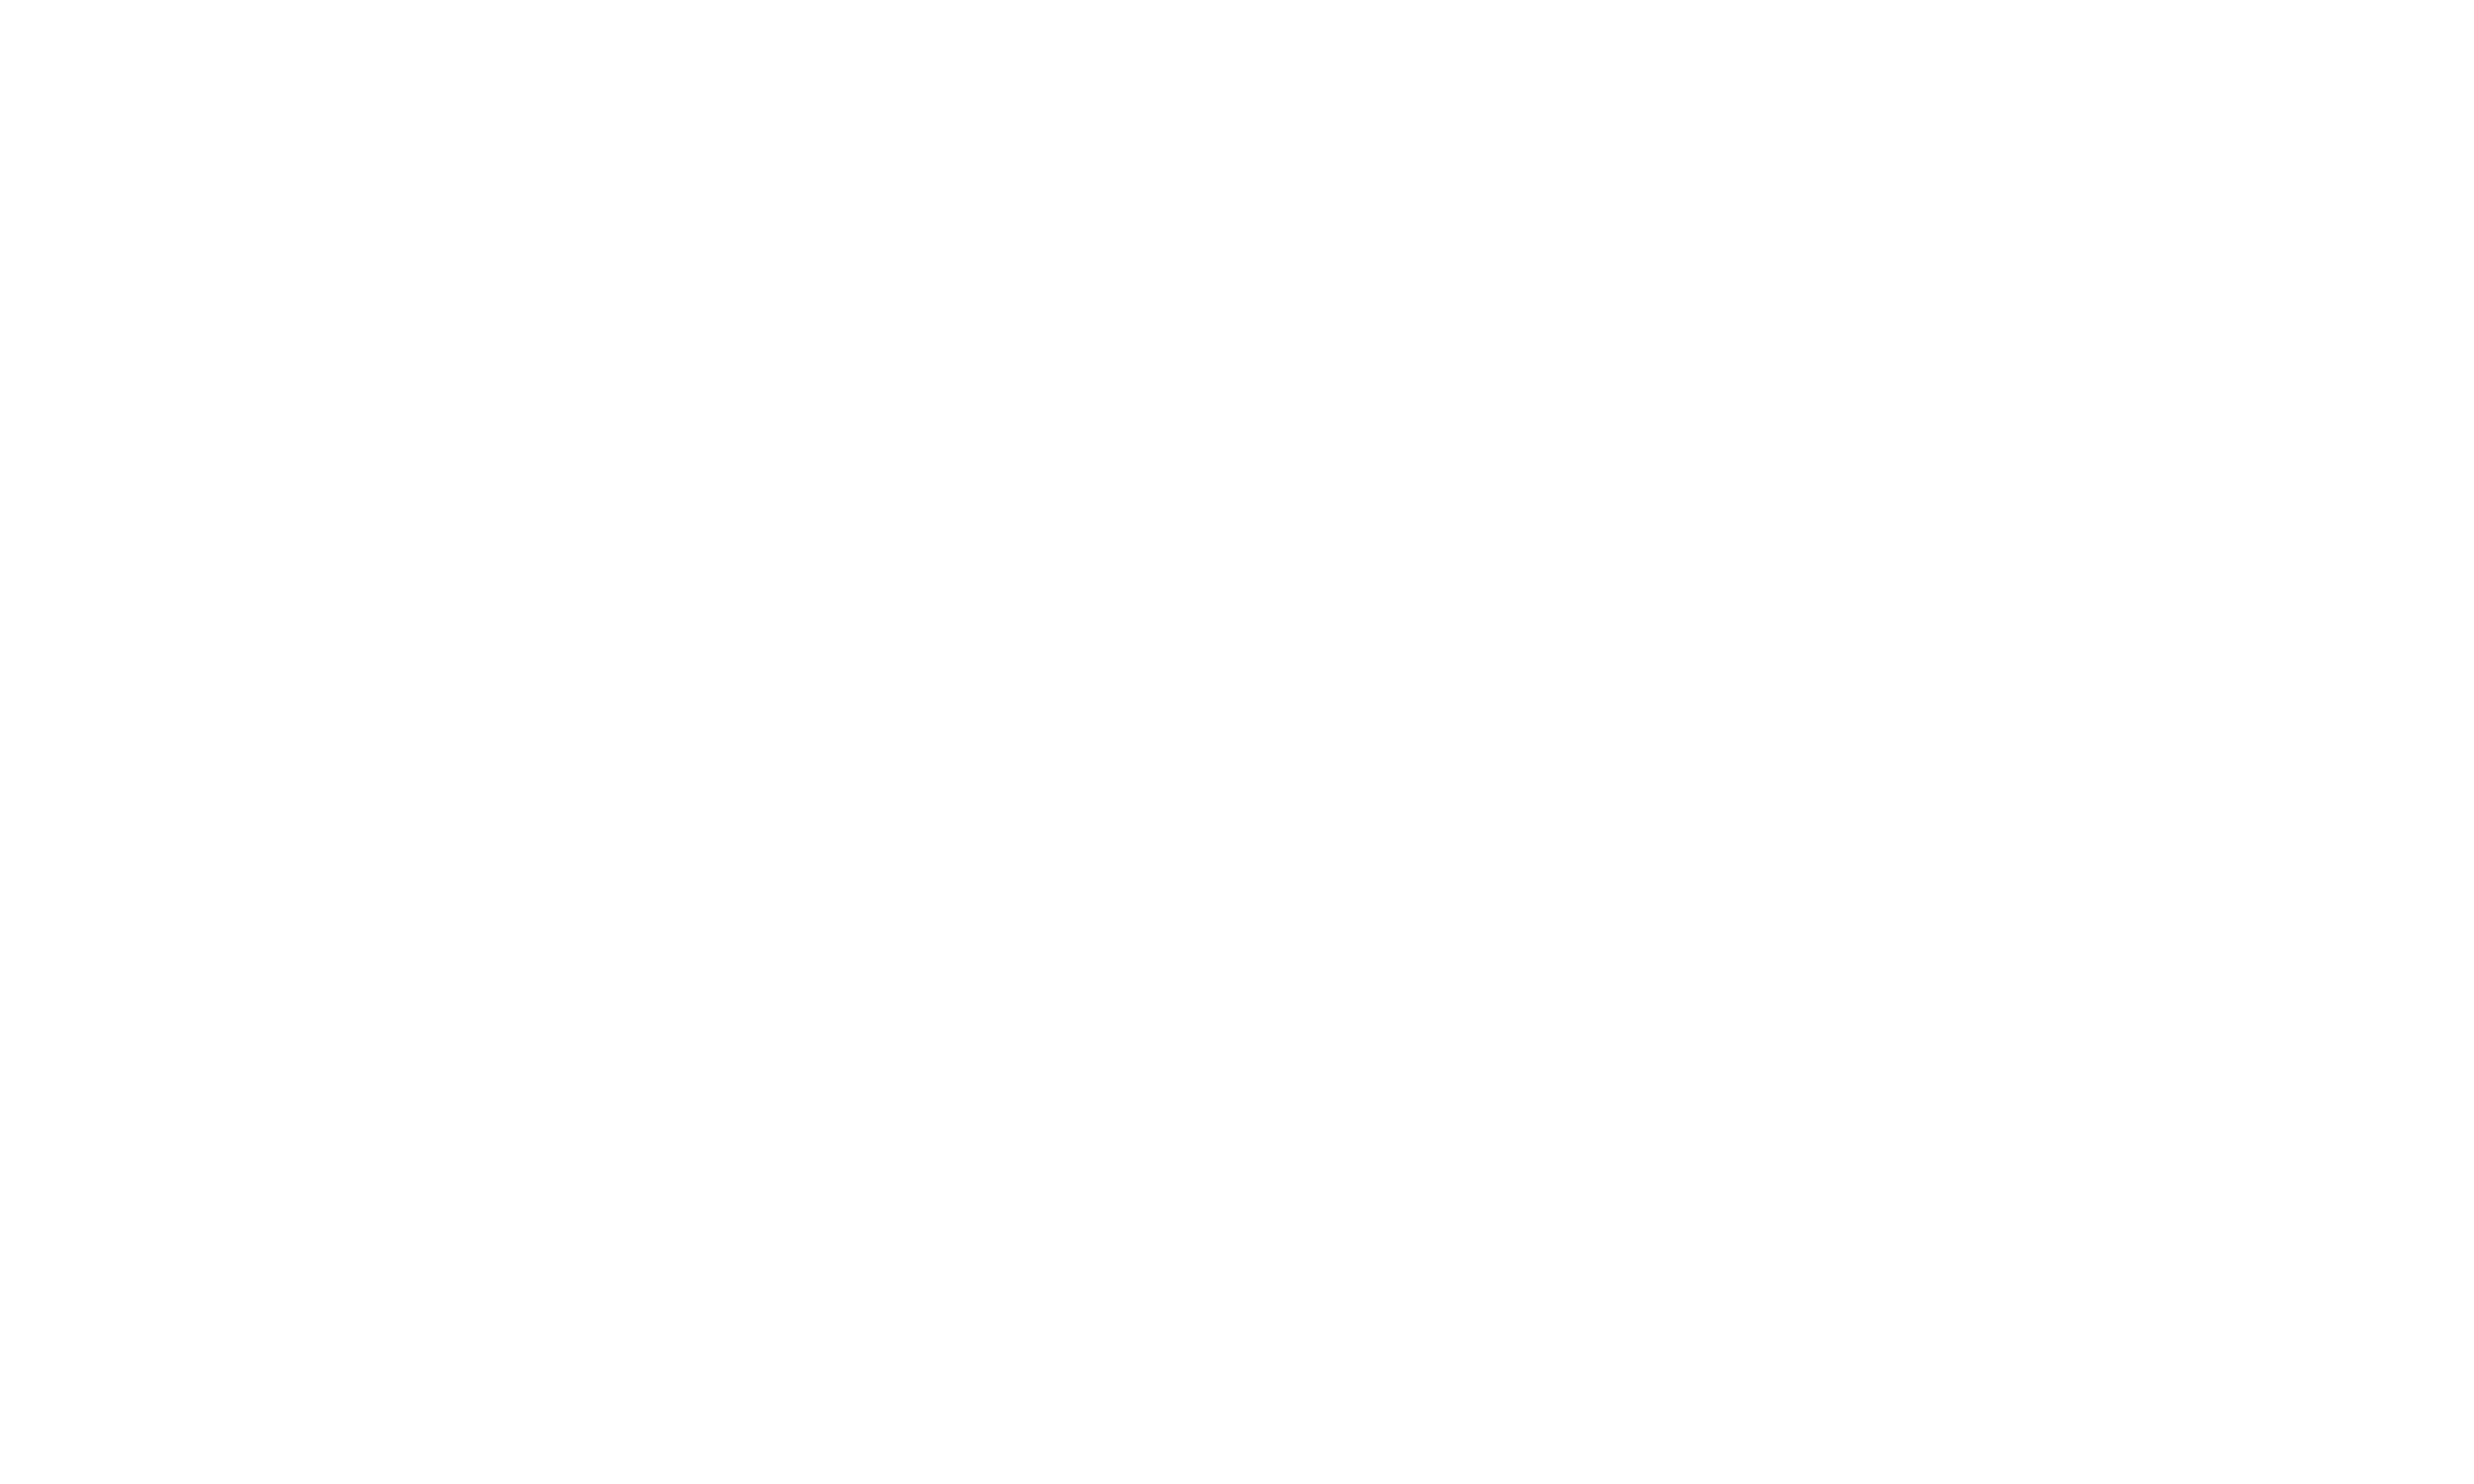

<IPython.core.display.Javascript object>


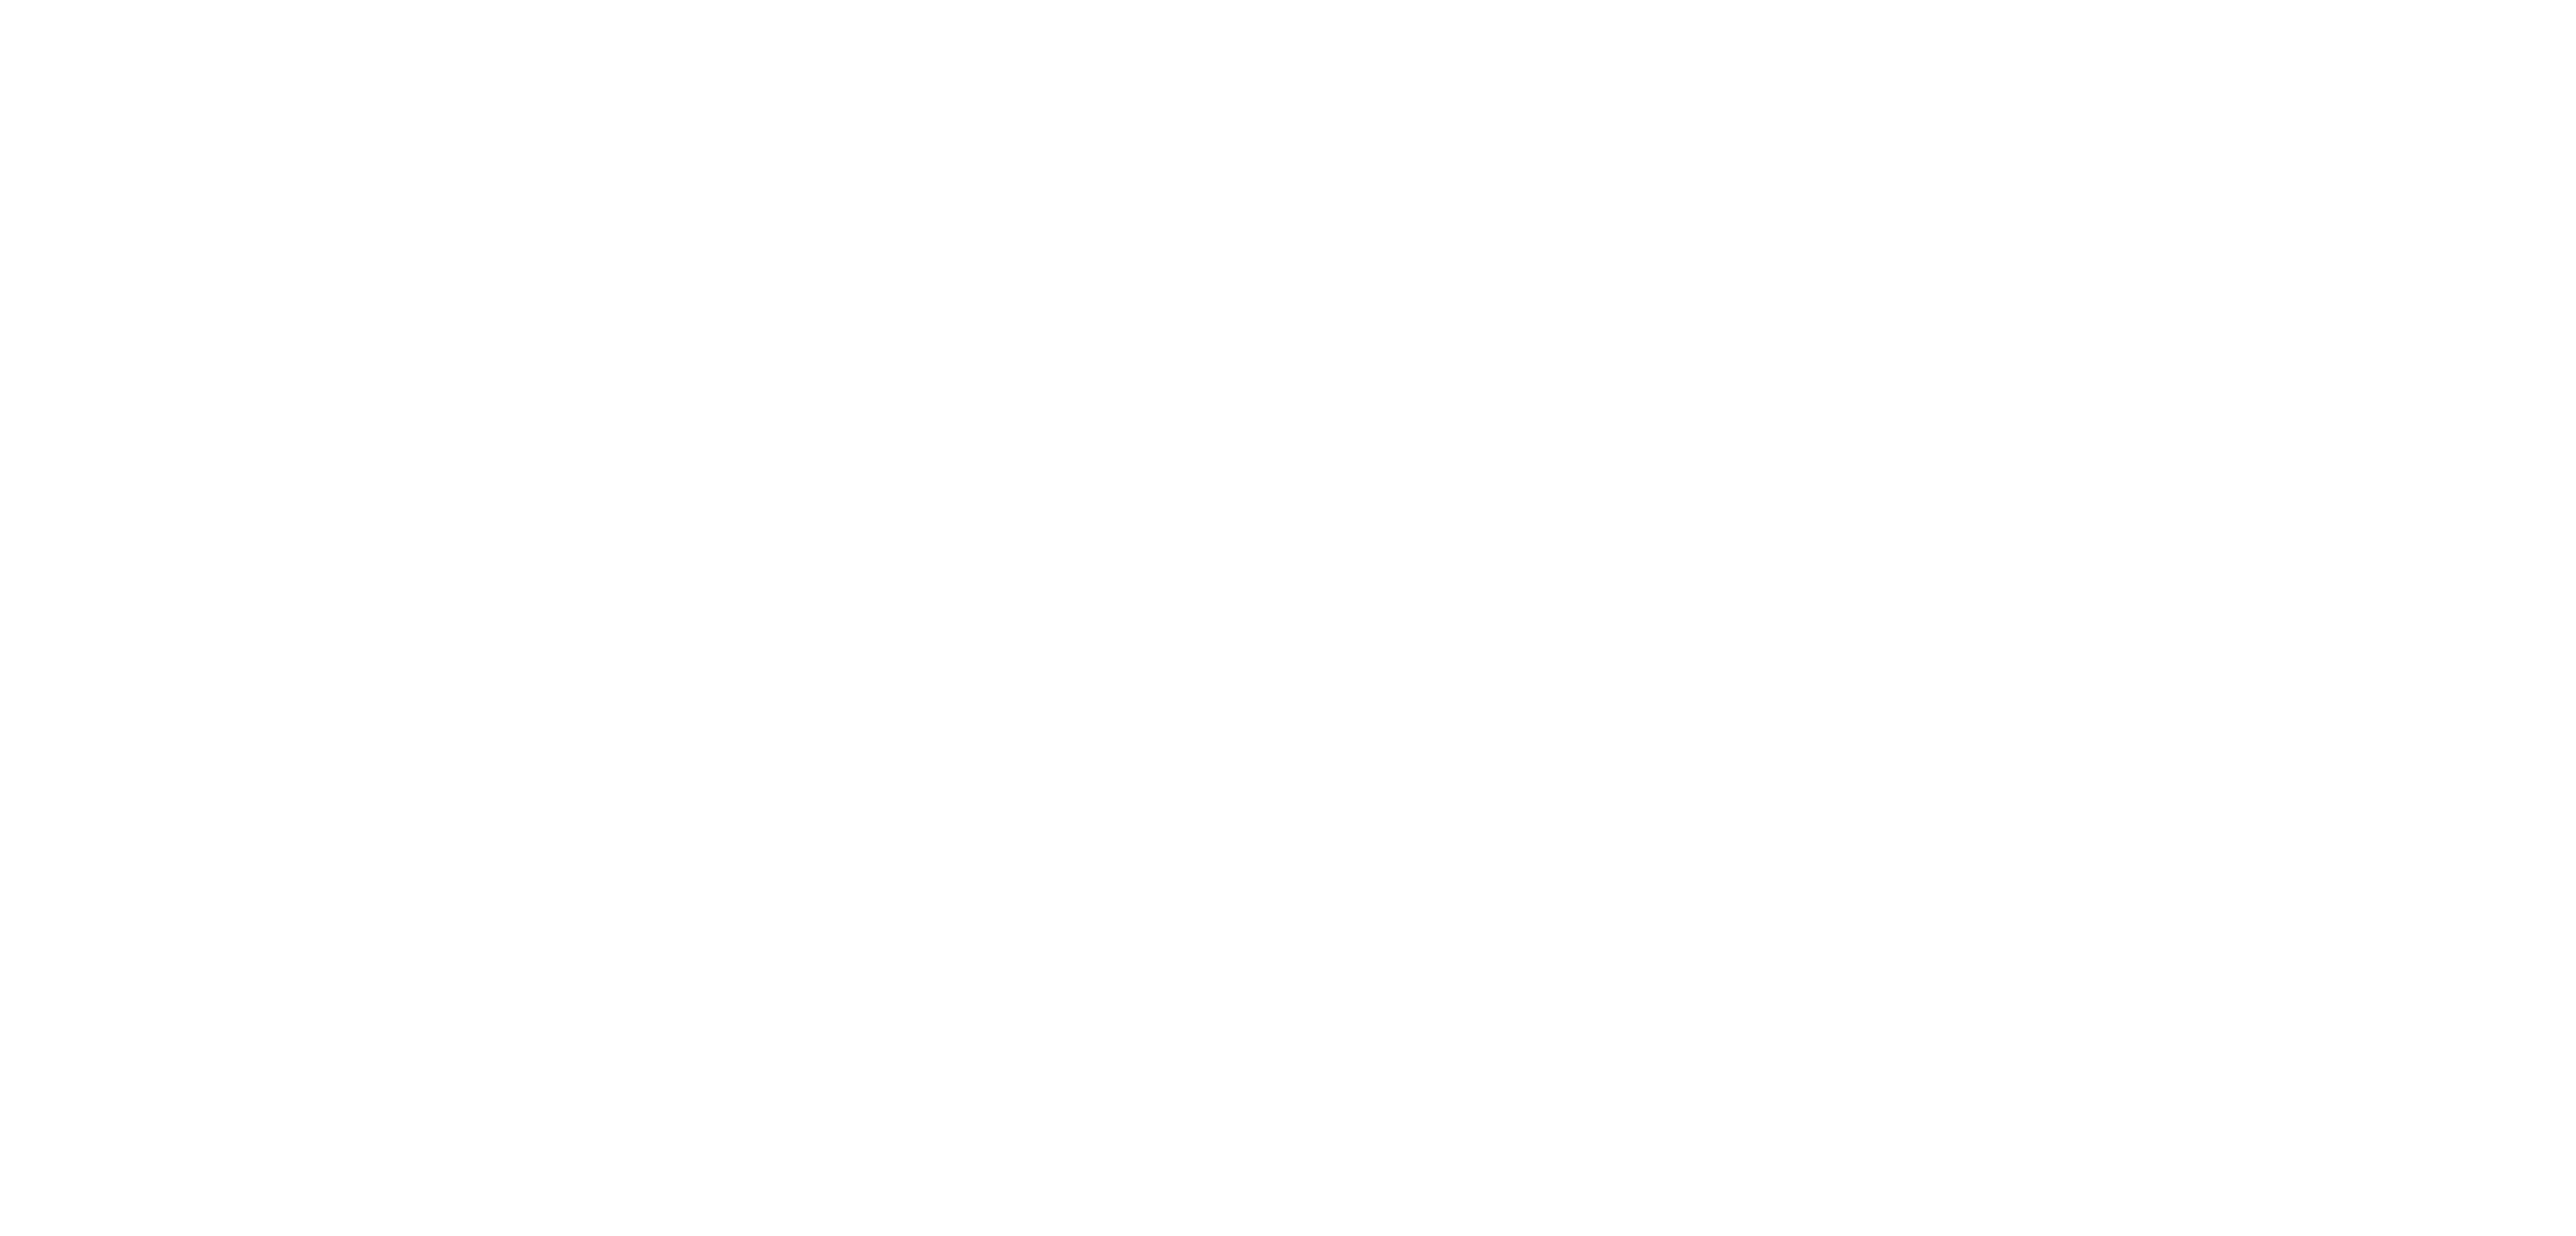

<IPython.core.display.Javascript object>


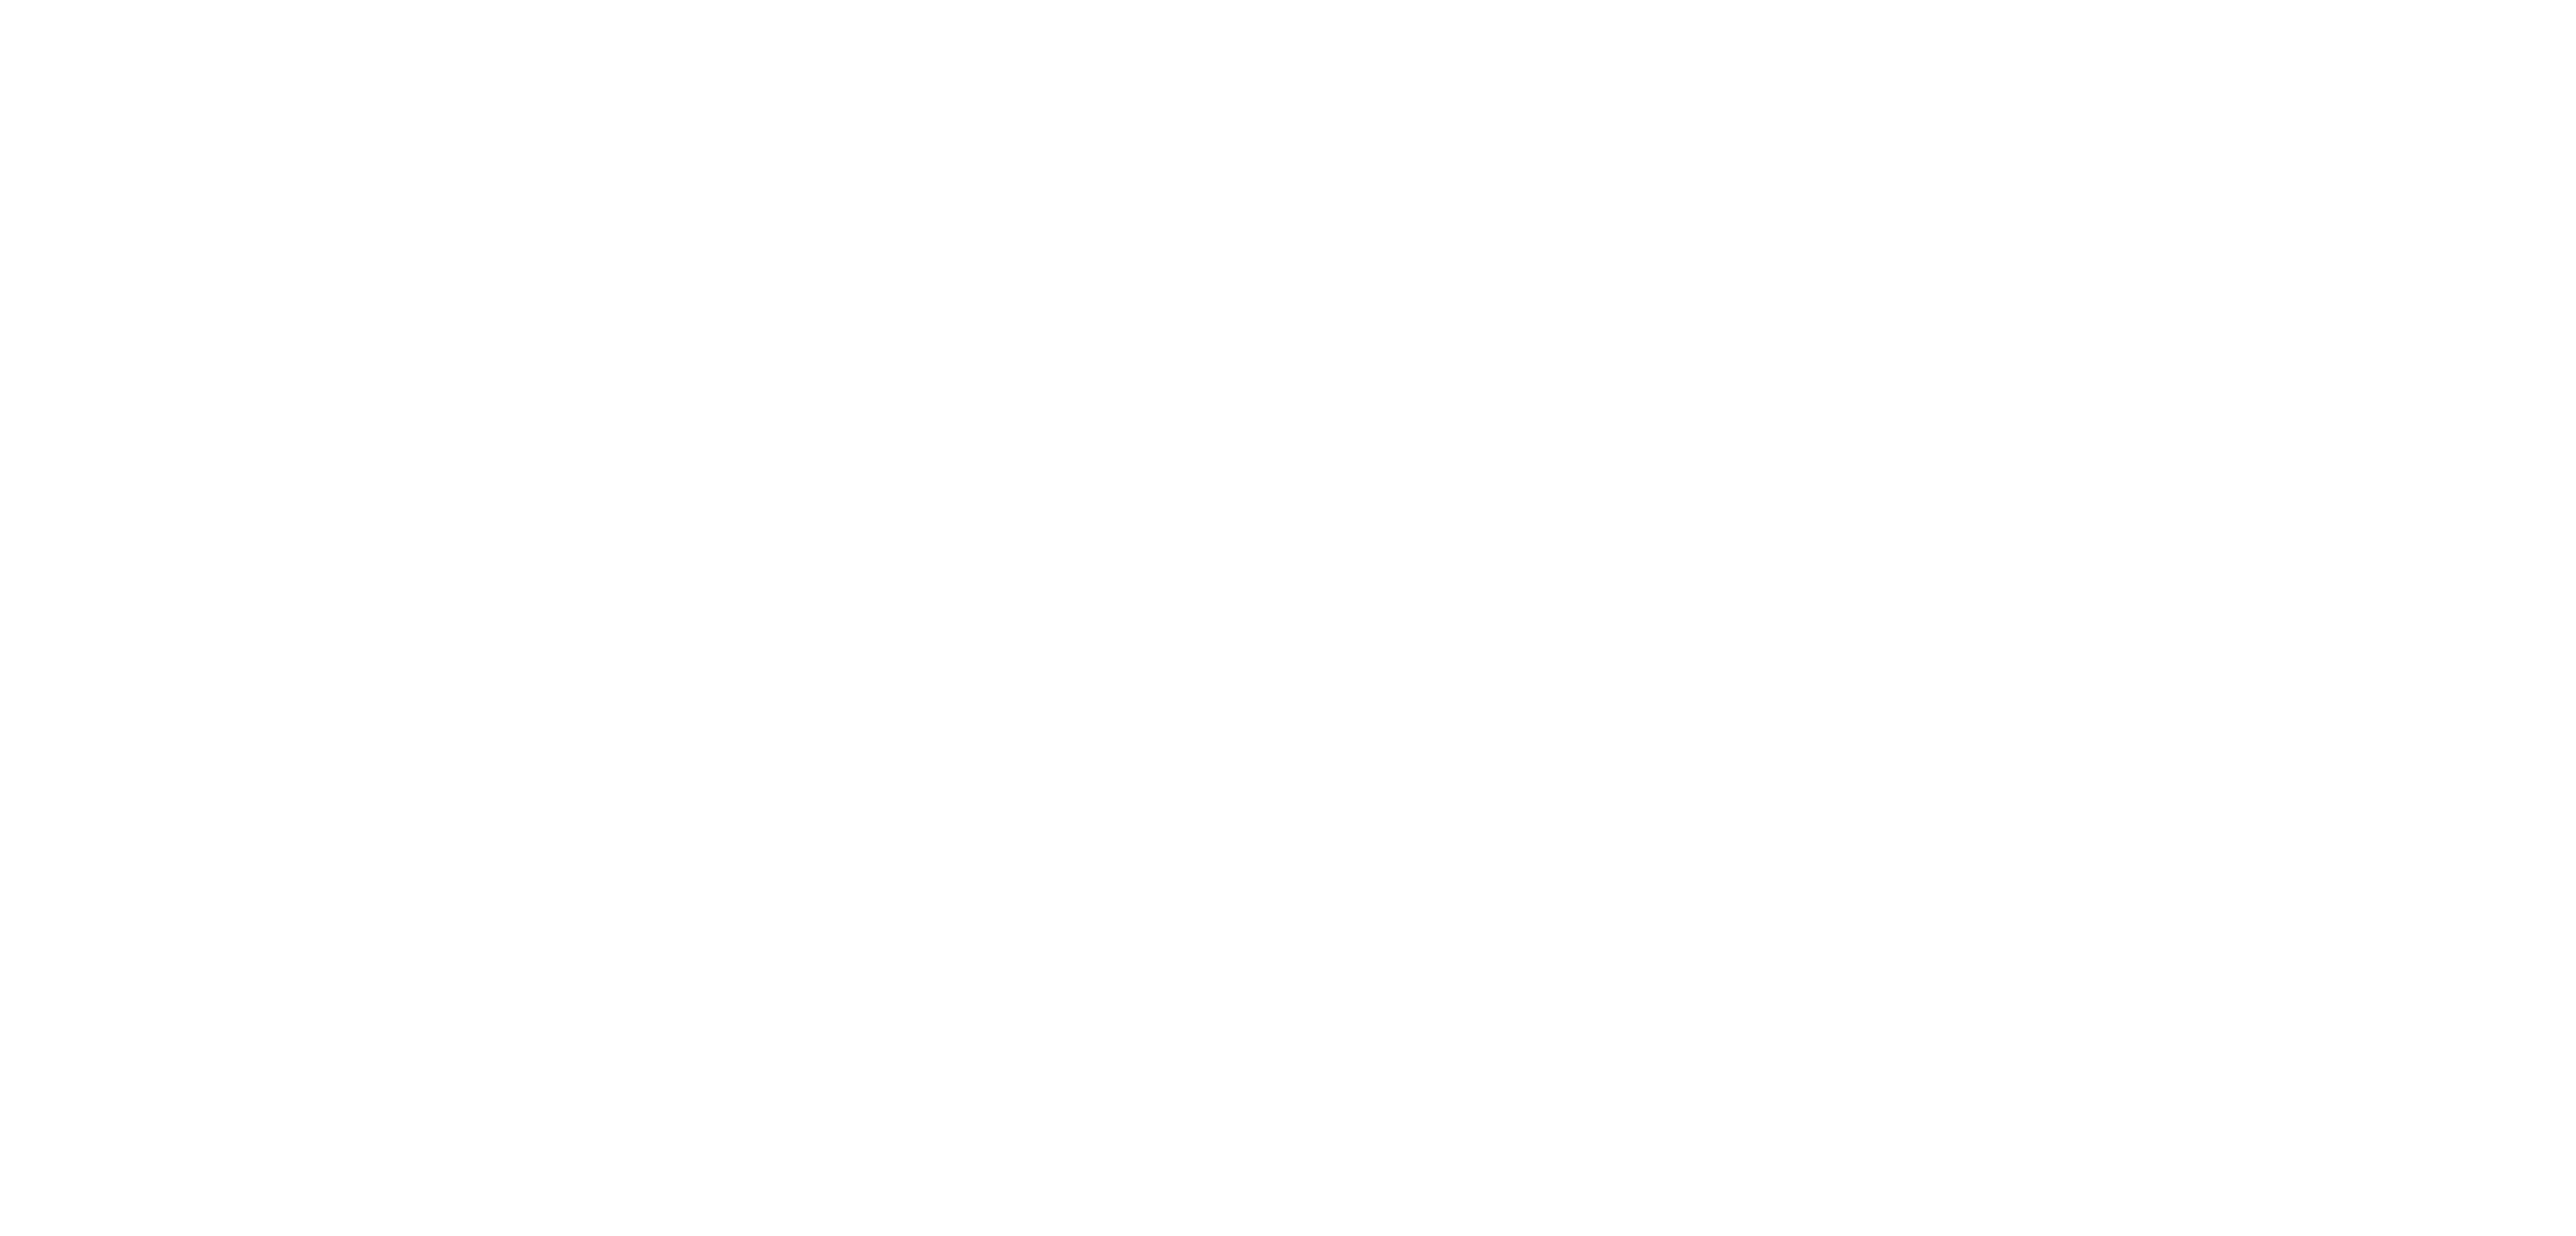

<IPython.core.display.Javascript object>


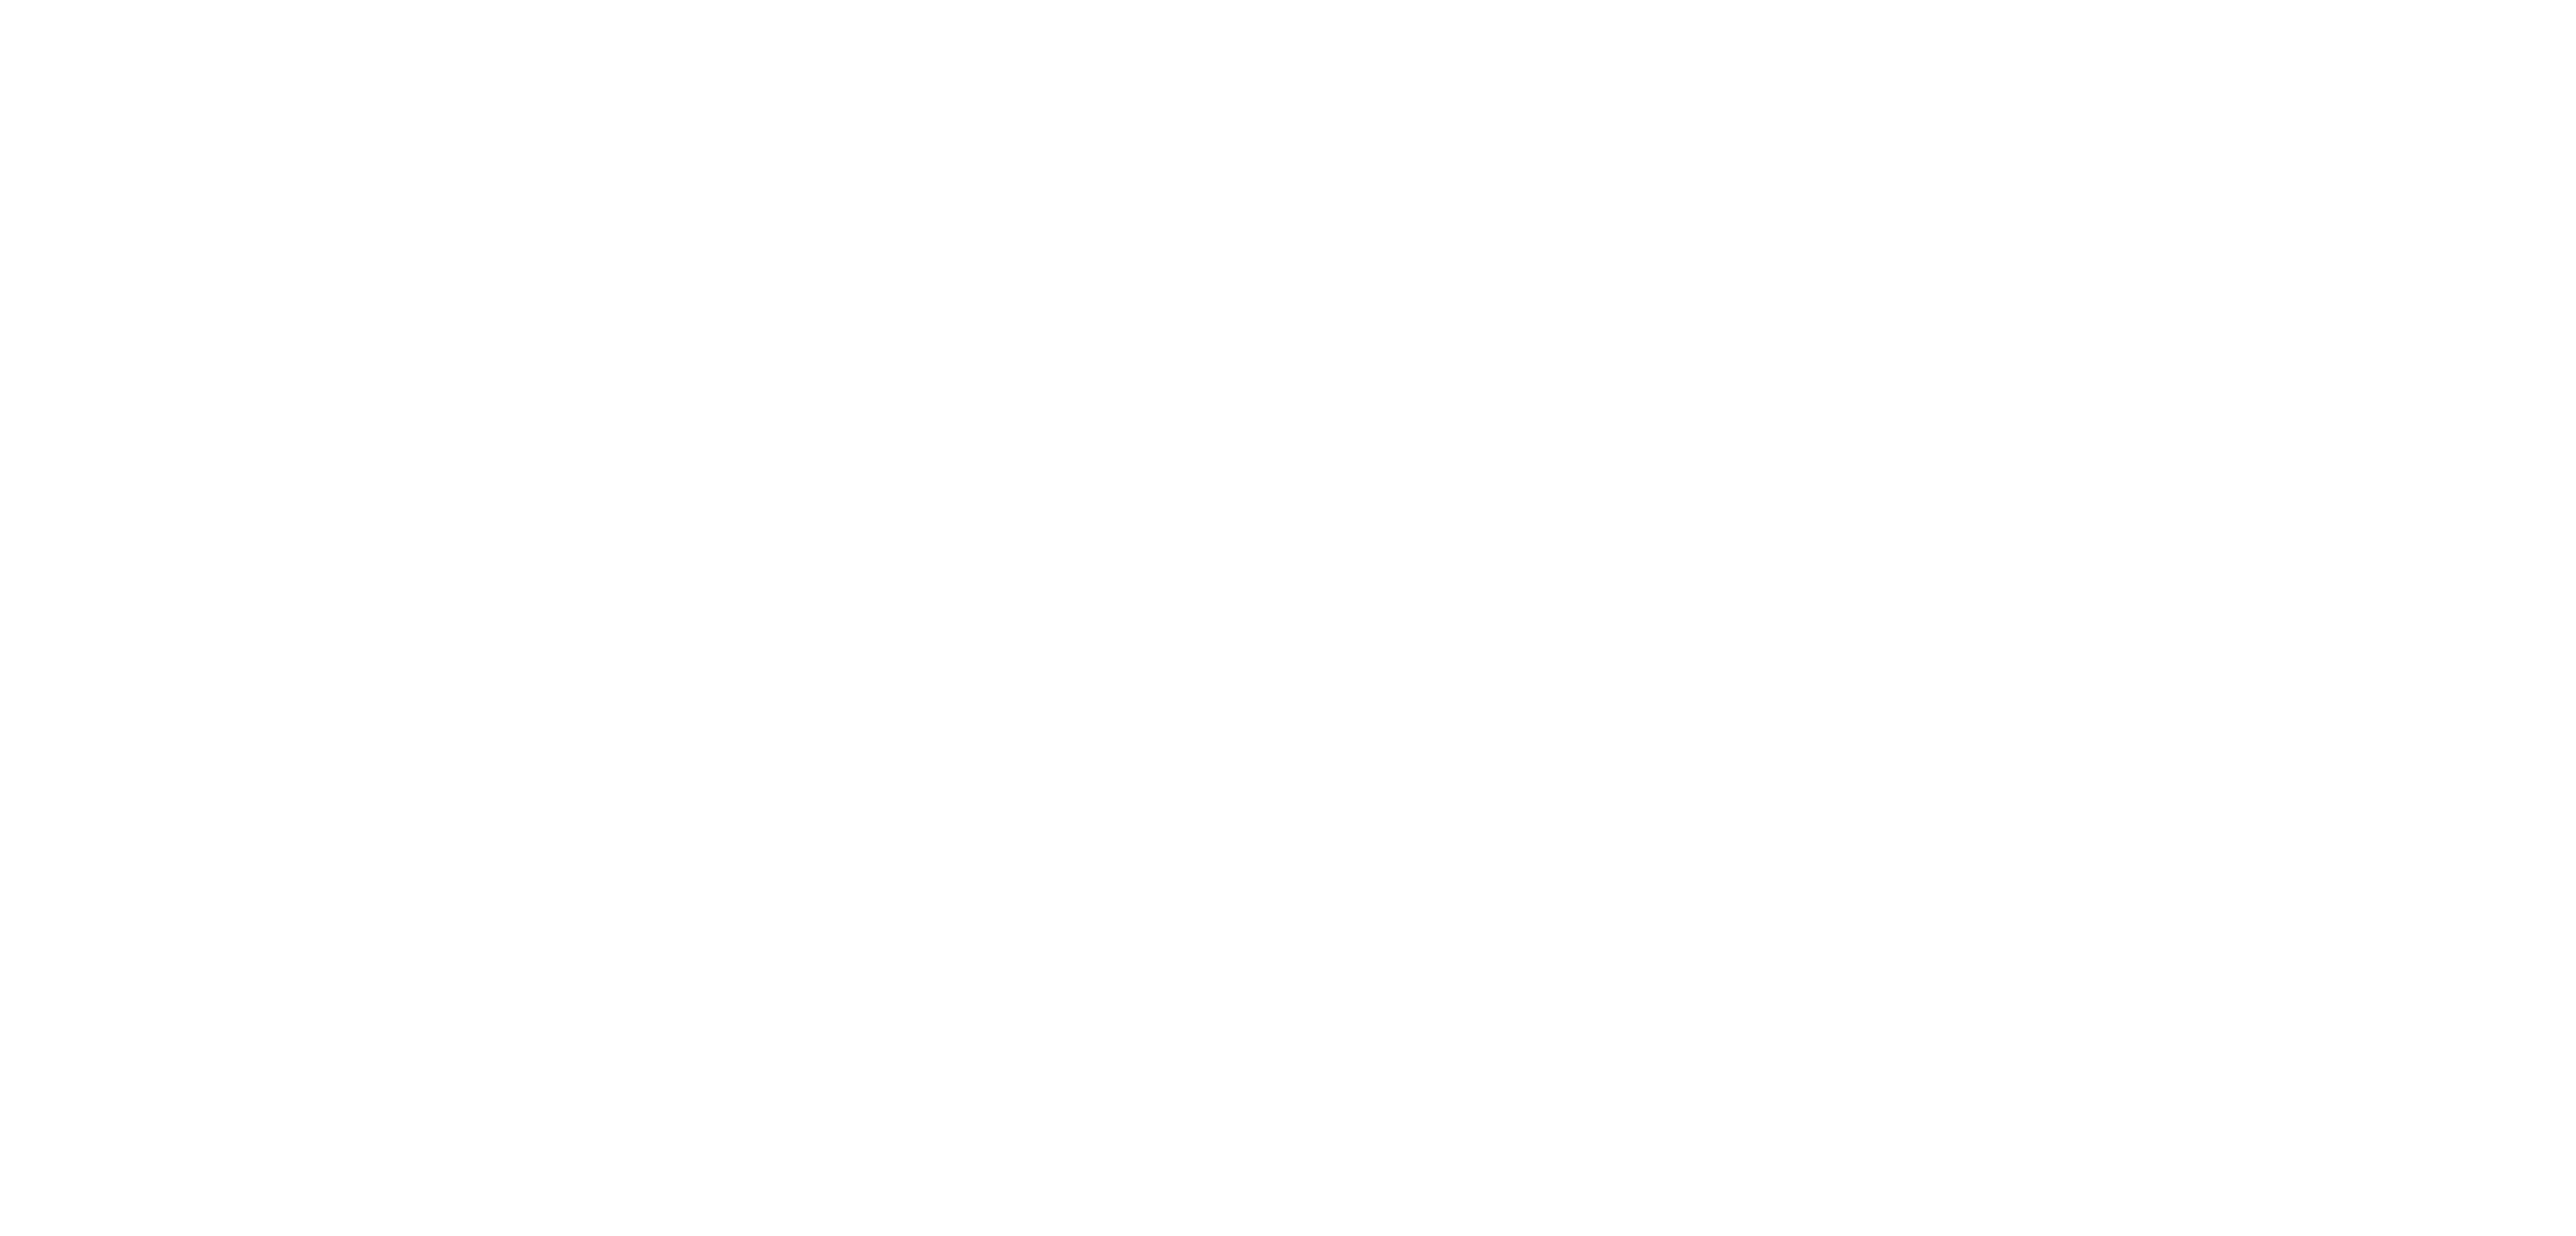

<IPython.core.display.Javascript object>


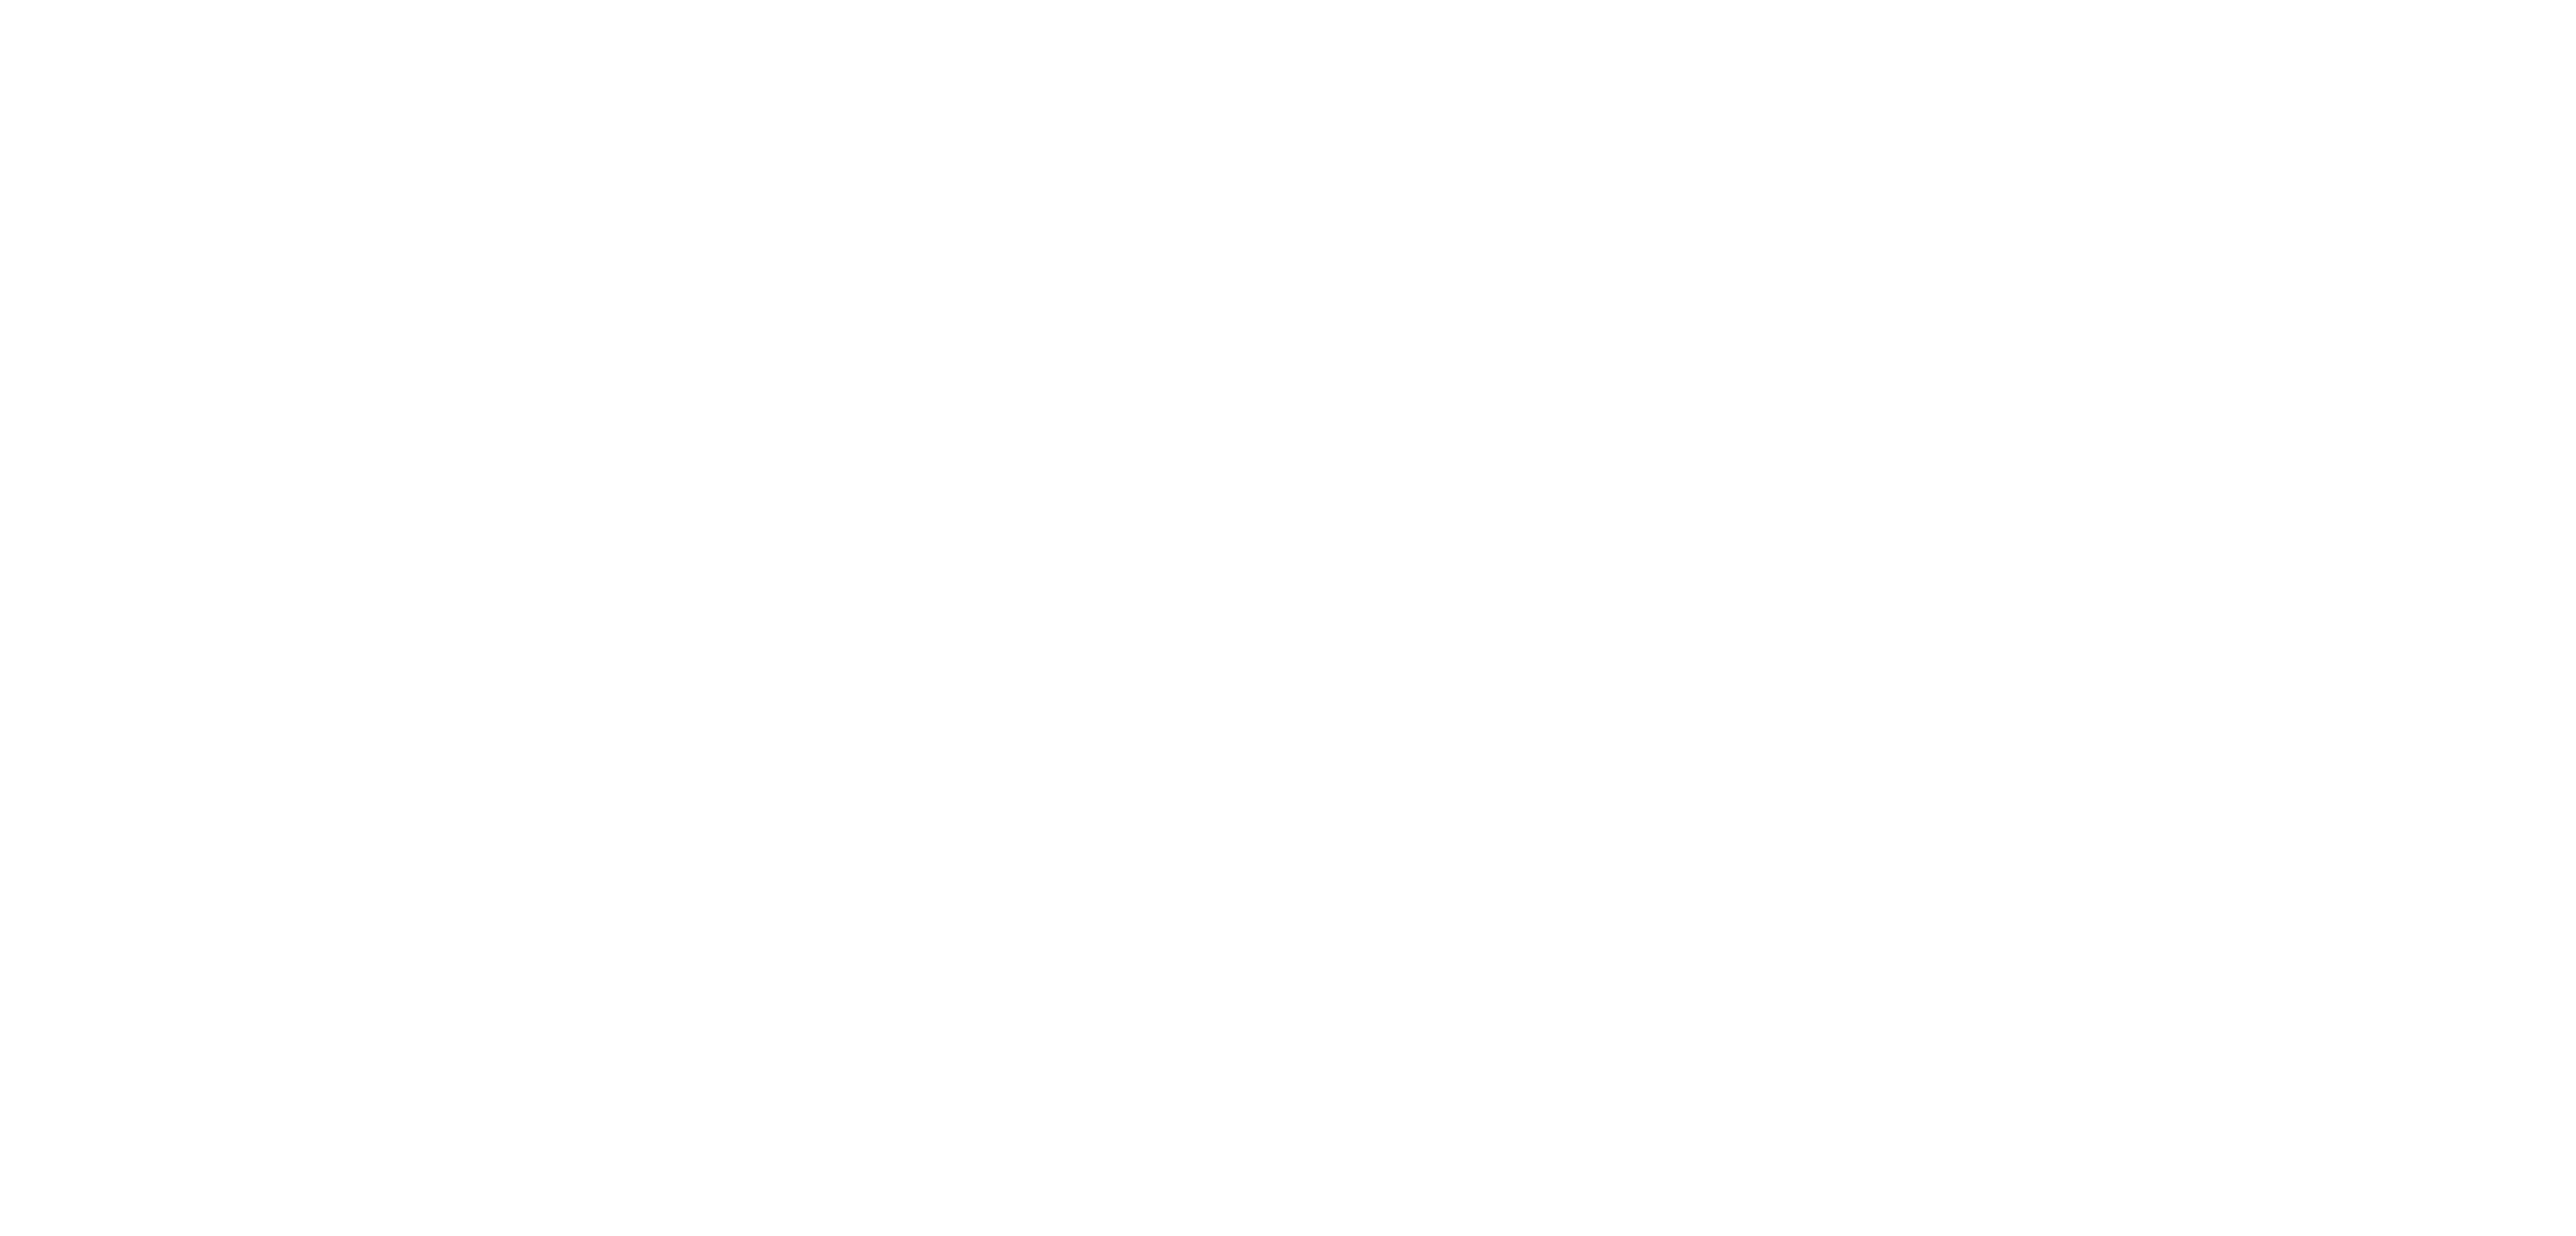

<IPython.core.display.Javascript object>


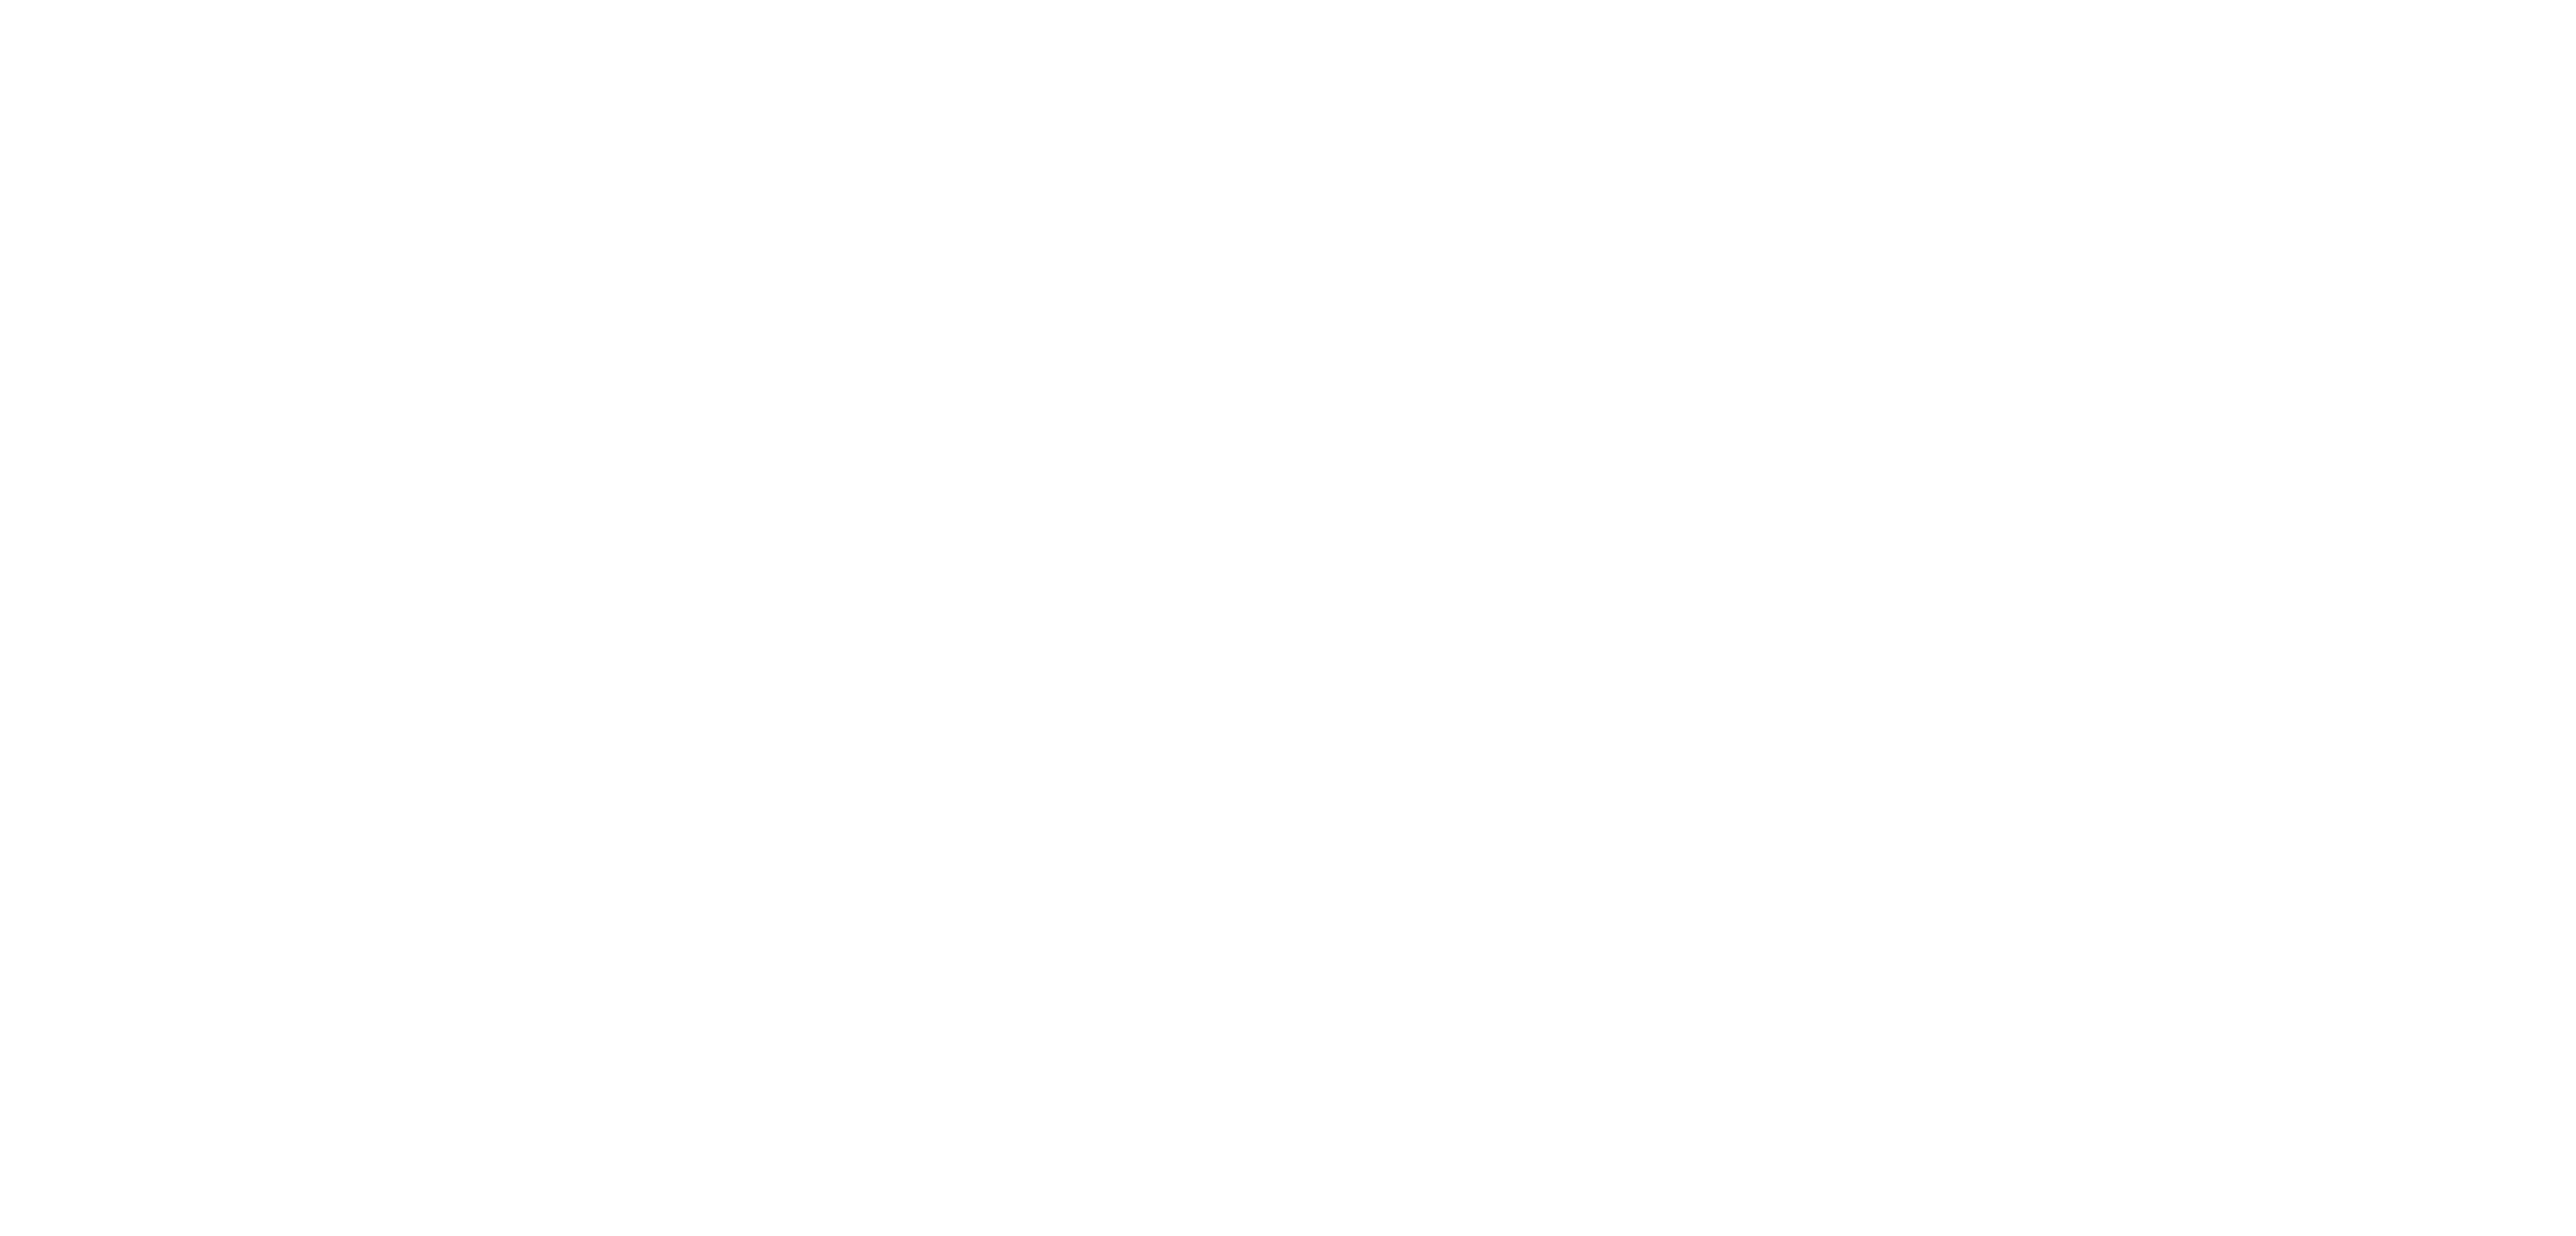

<IPython.core.display.Javascript object>


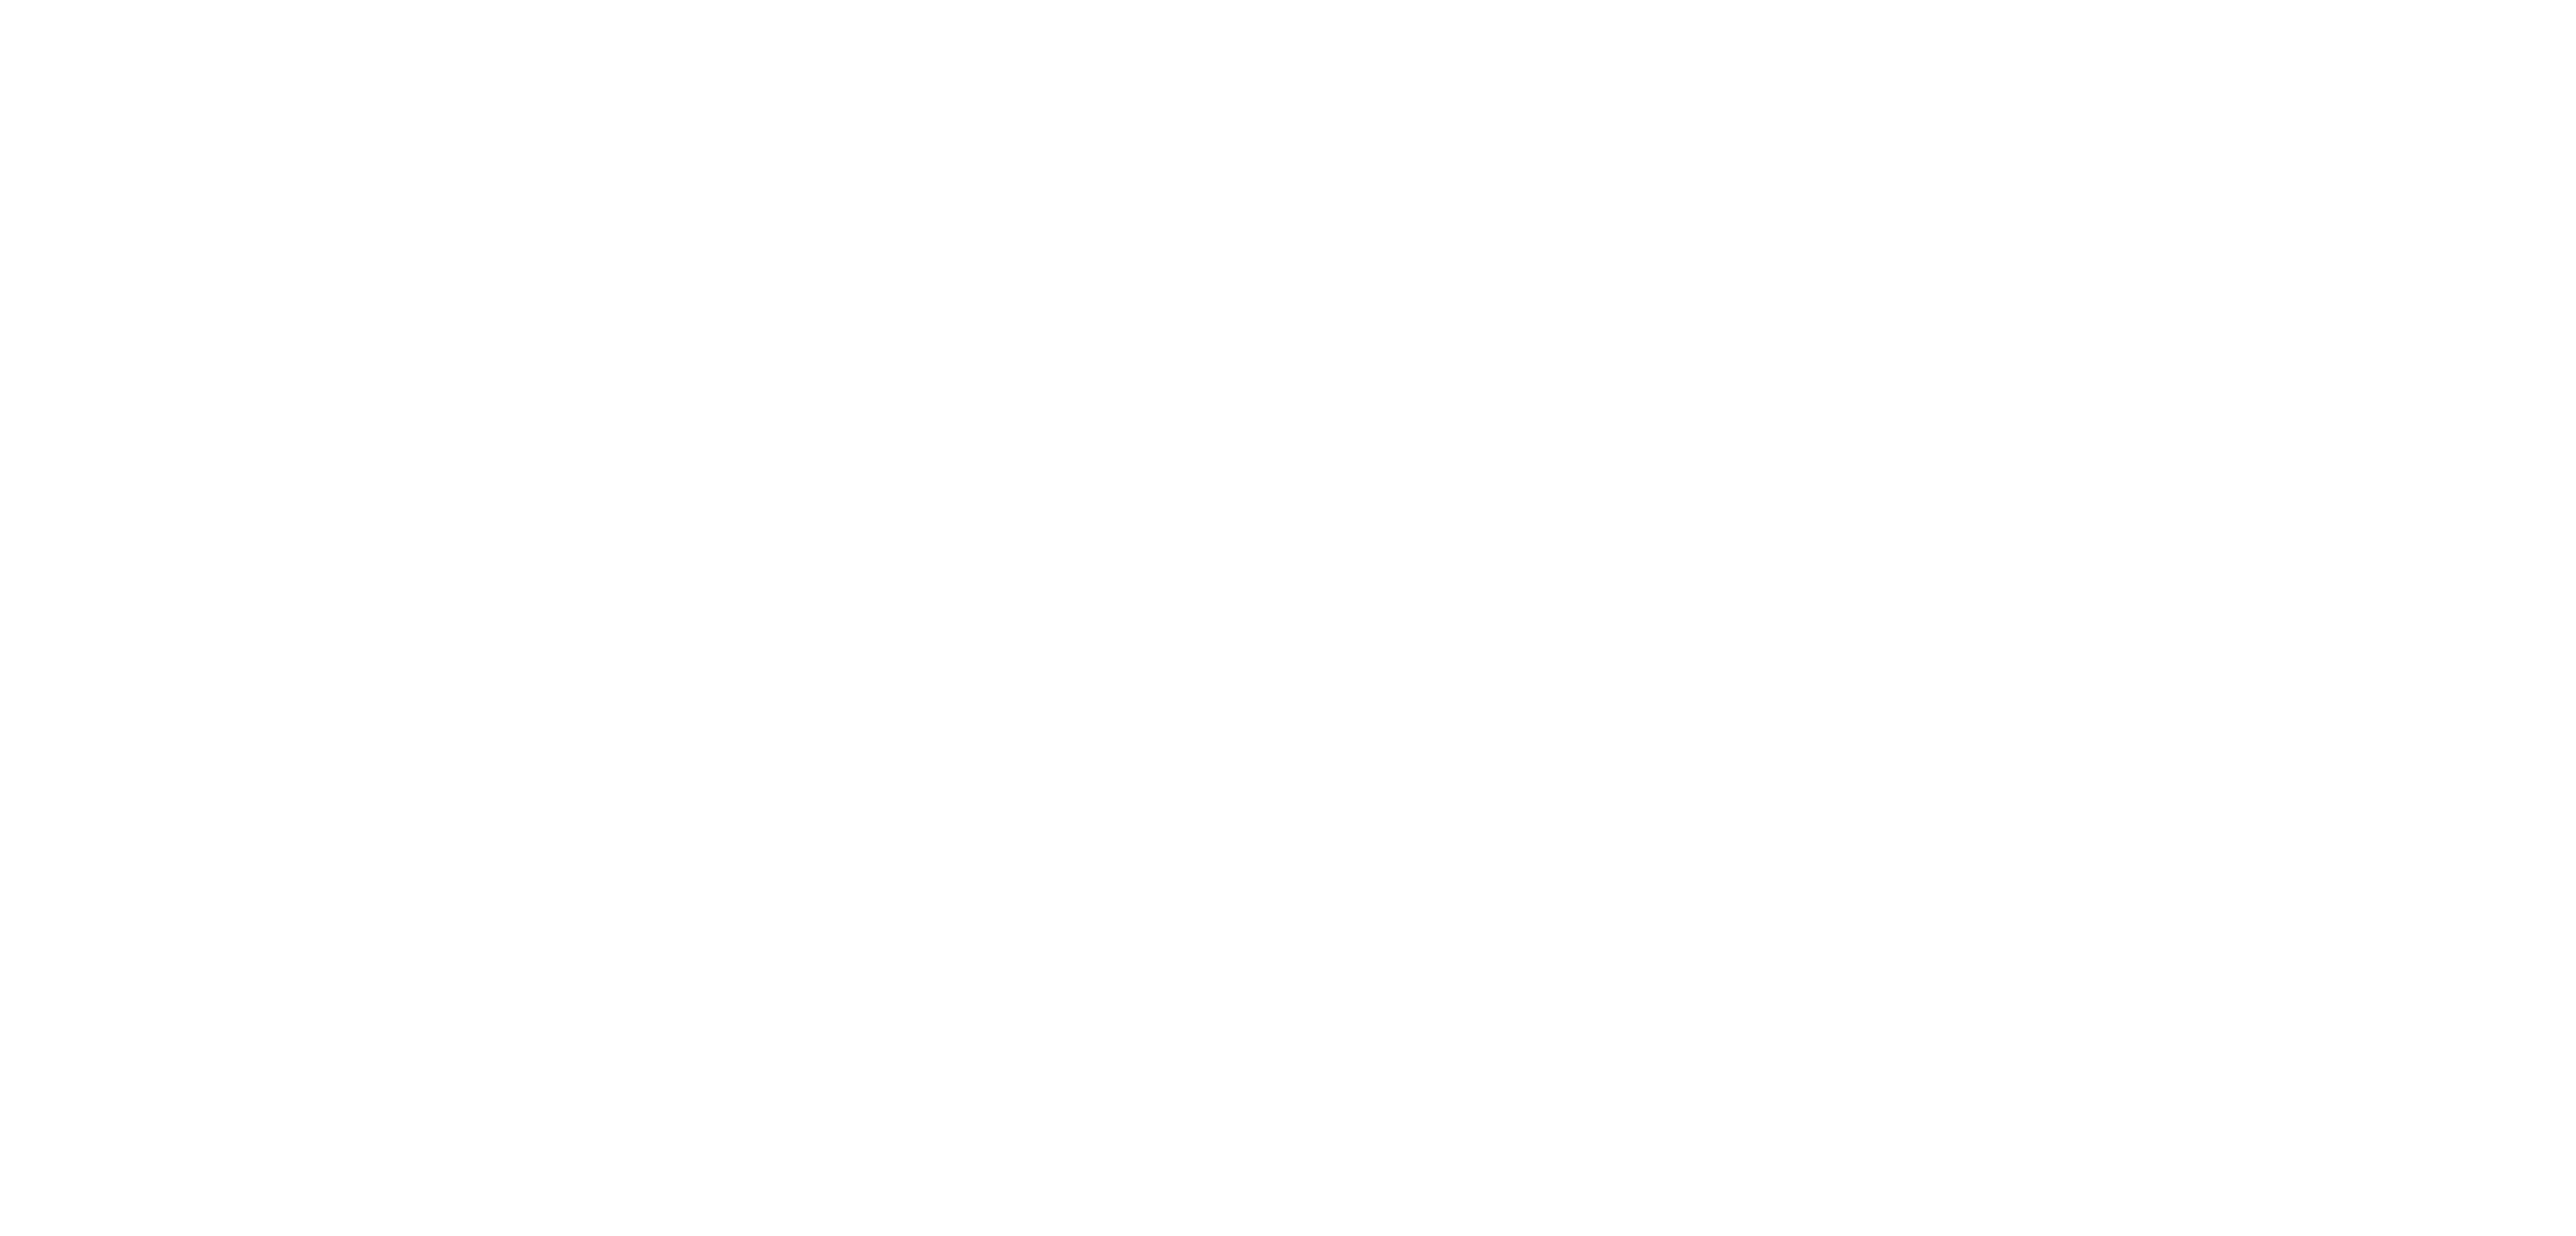

<IPython.core.display.Javascript object>


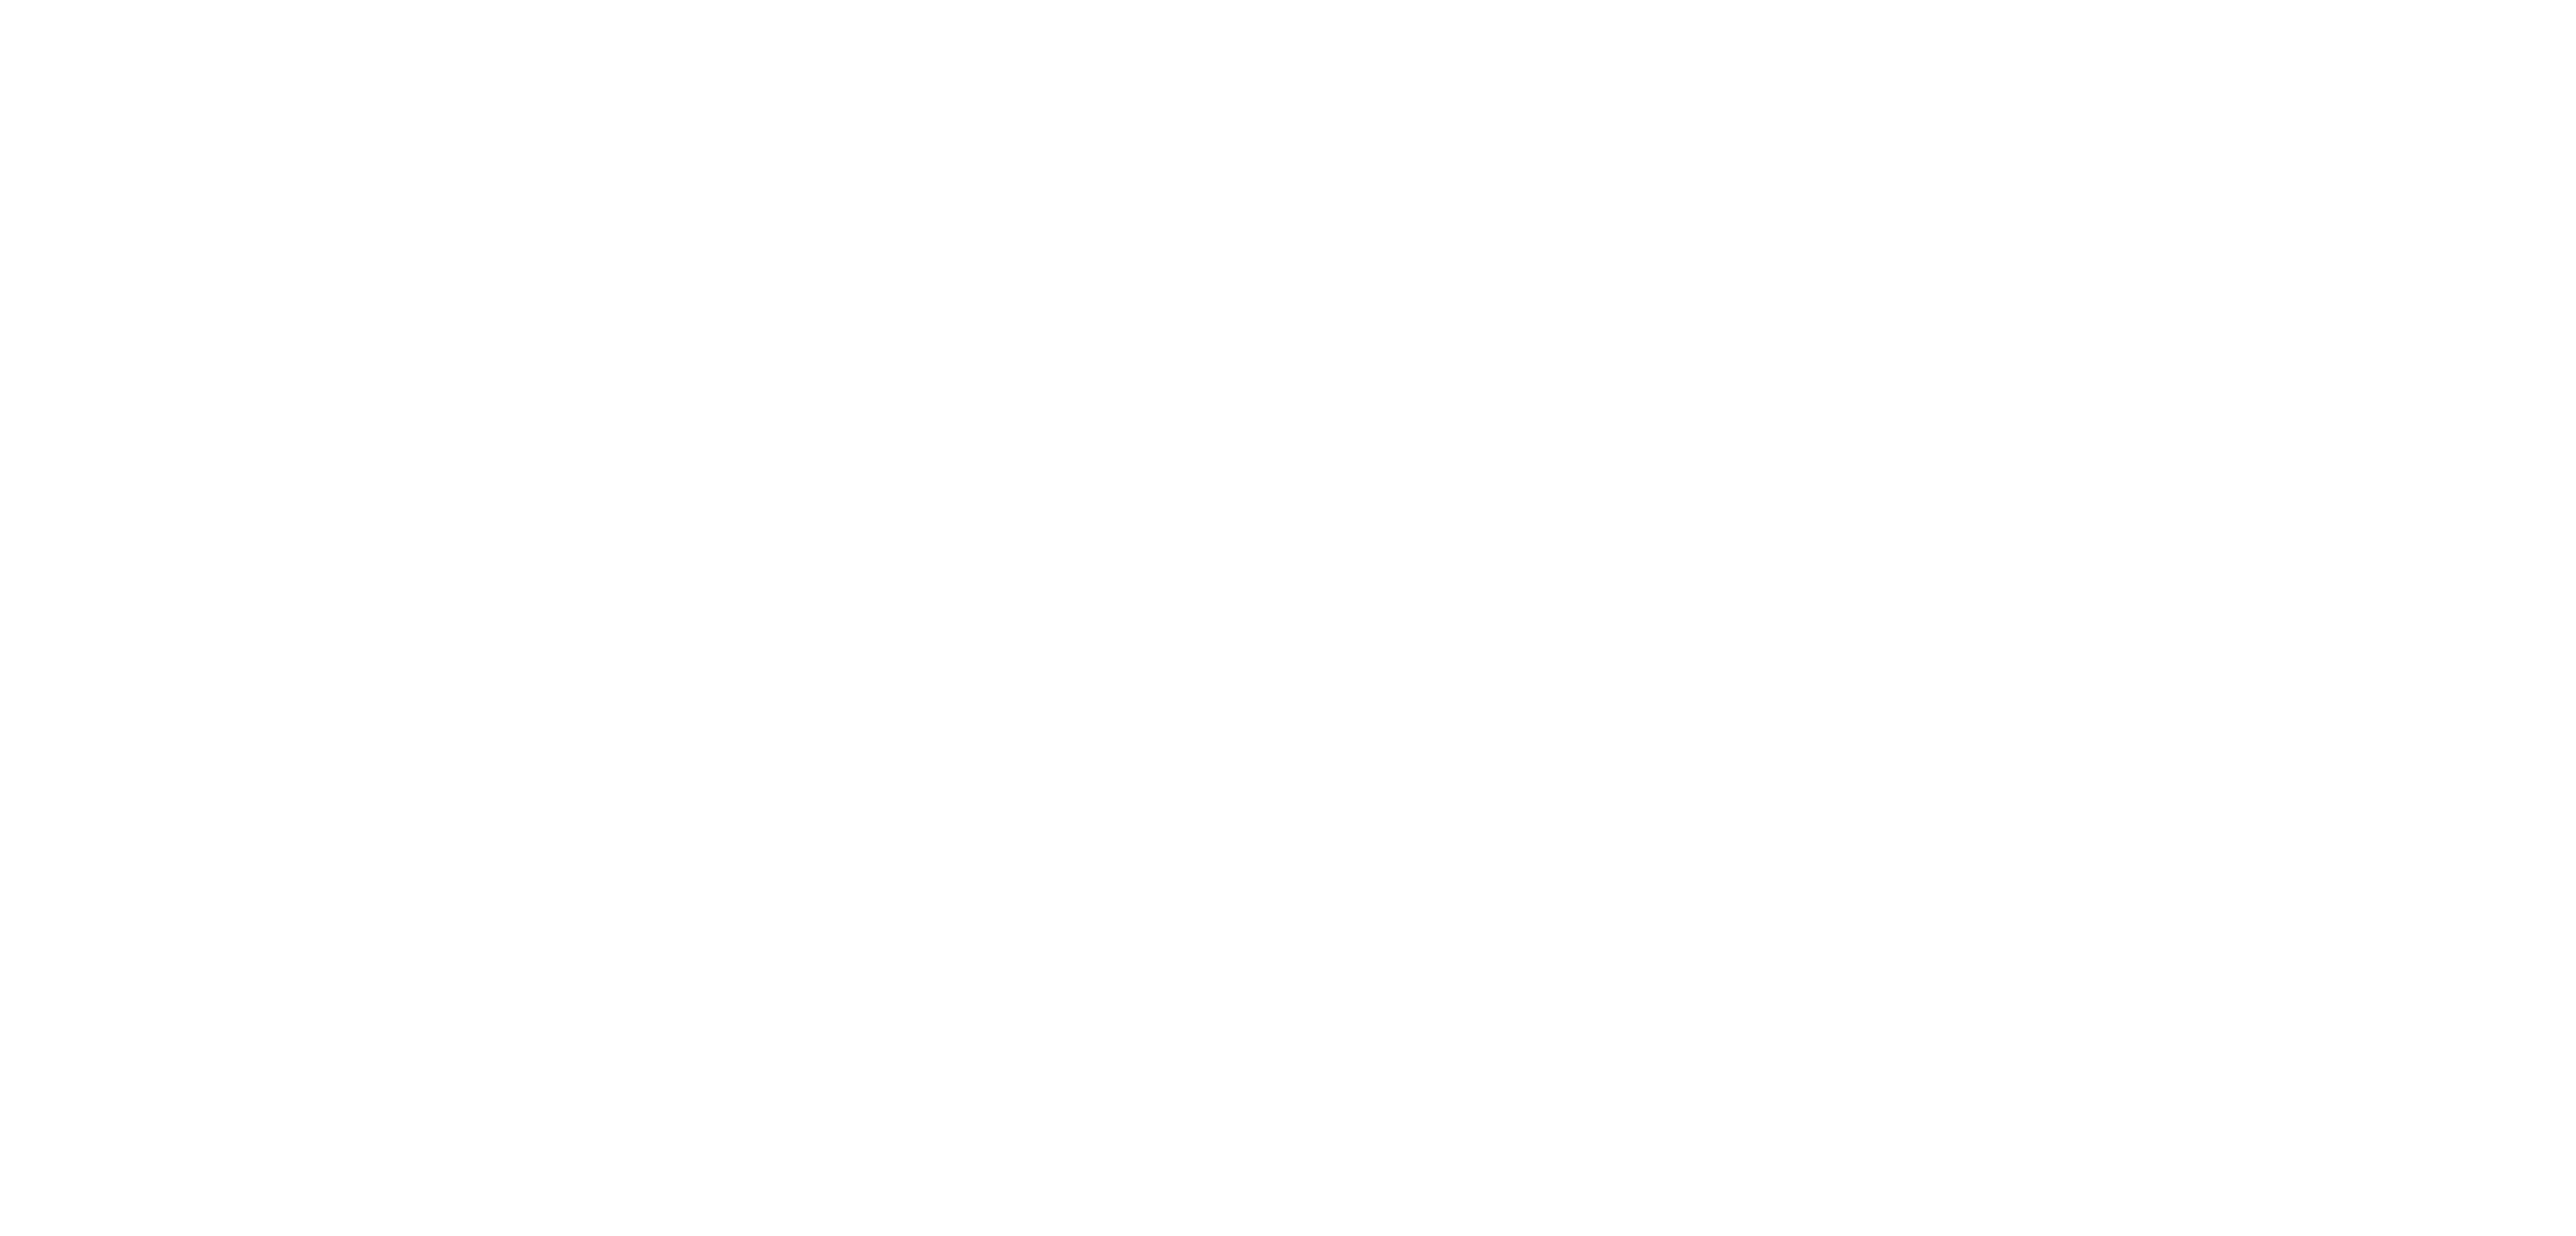

<IPython.core.display.Javascript object>


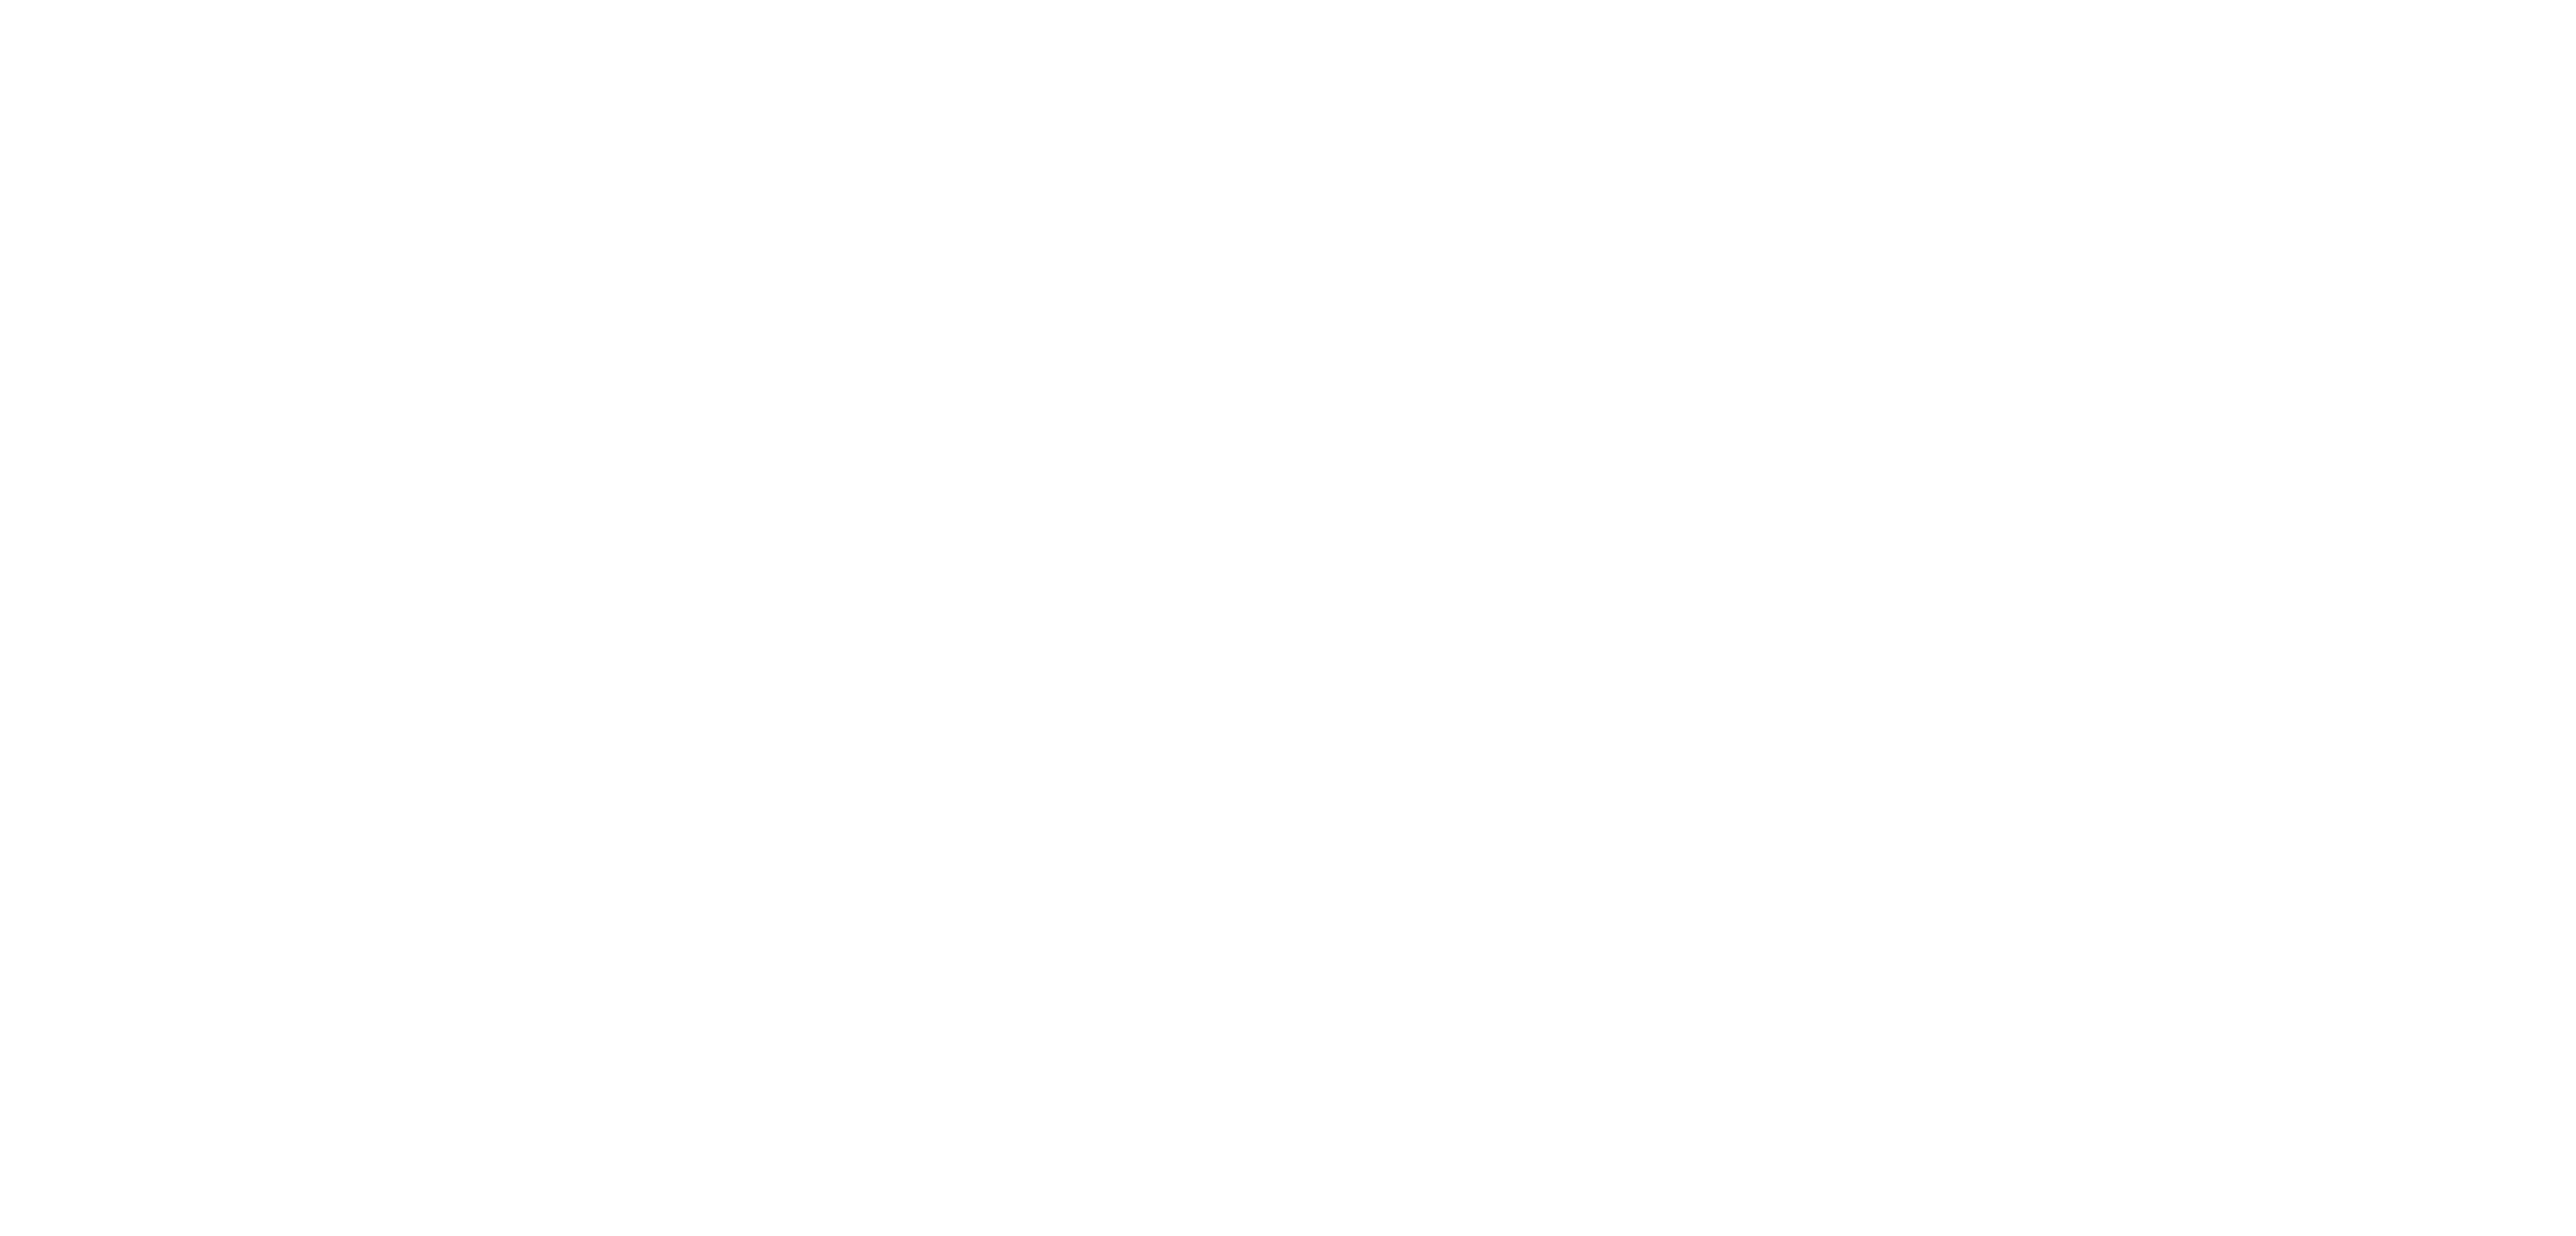

<IPython.core.display.Javascript object>


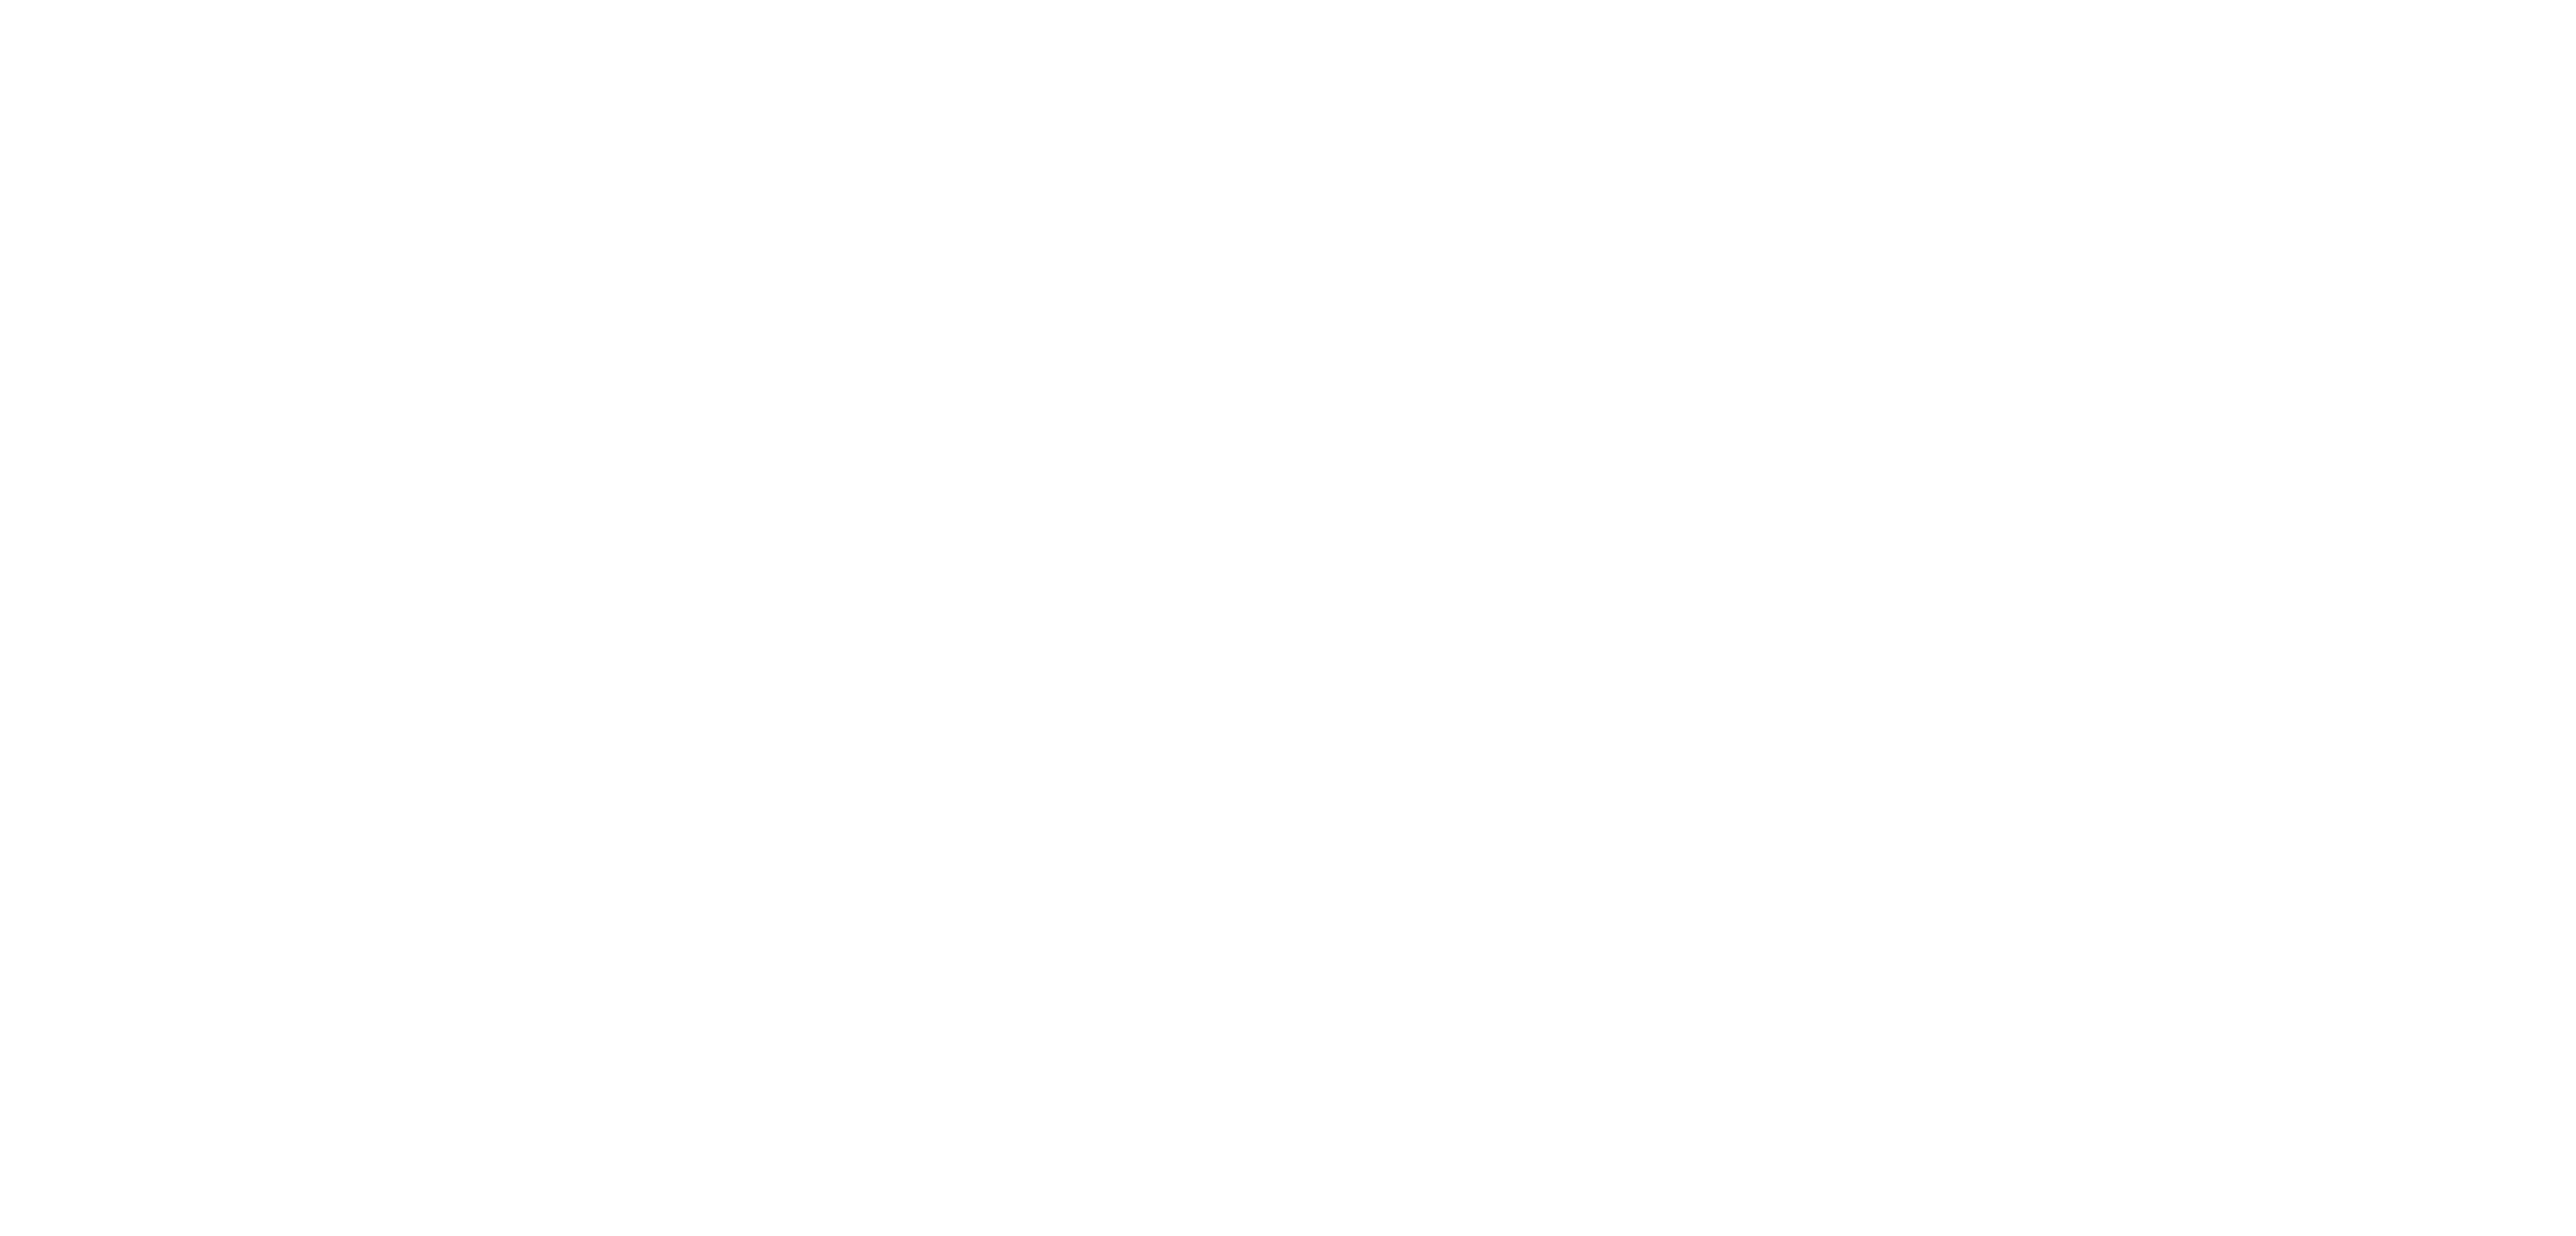

<IPython.core.display.Javascript object>


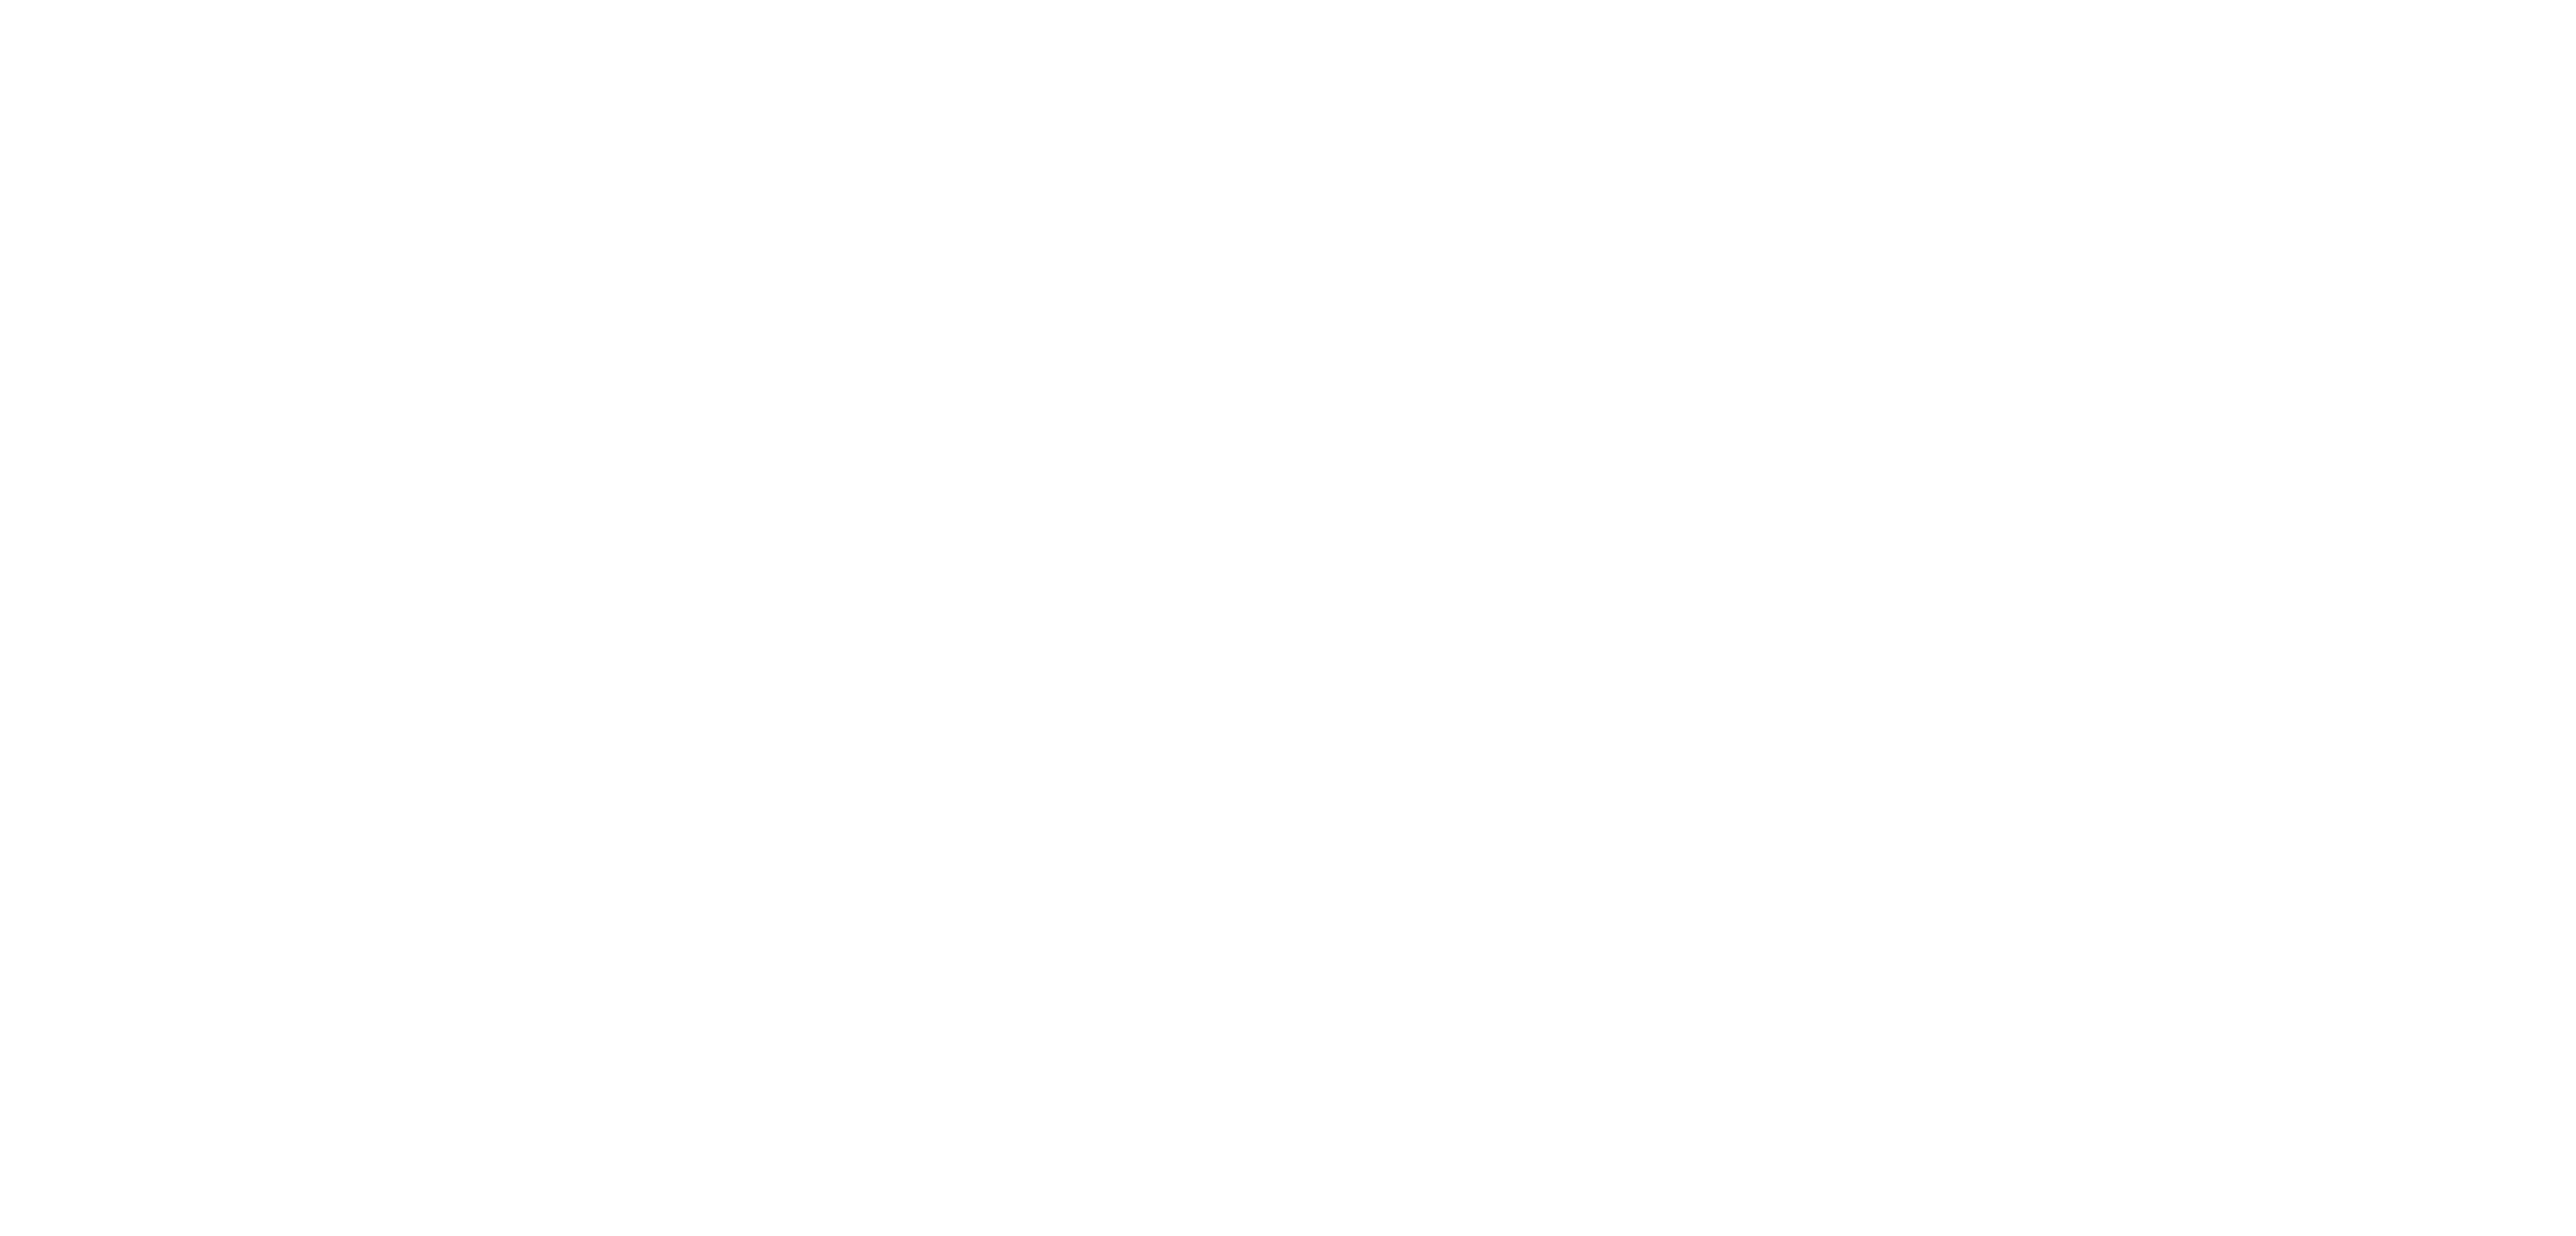

<IPython.core.display.Javascript object>


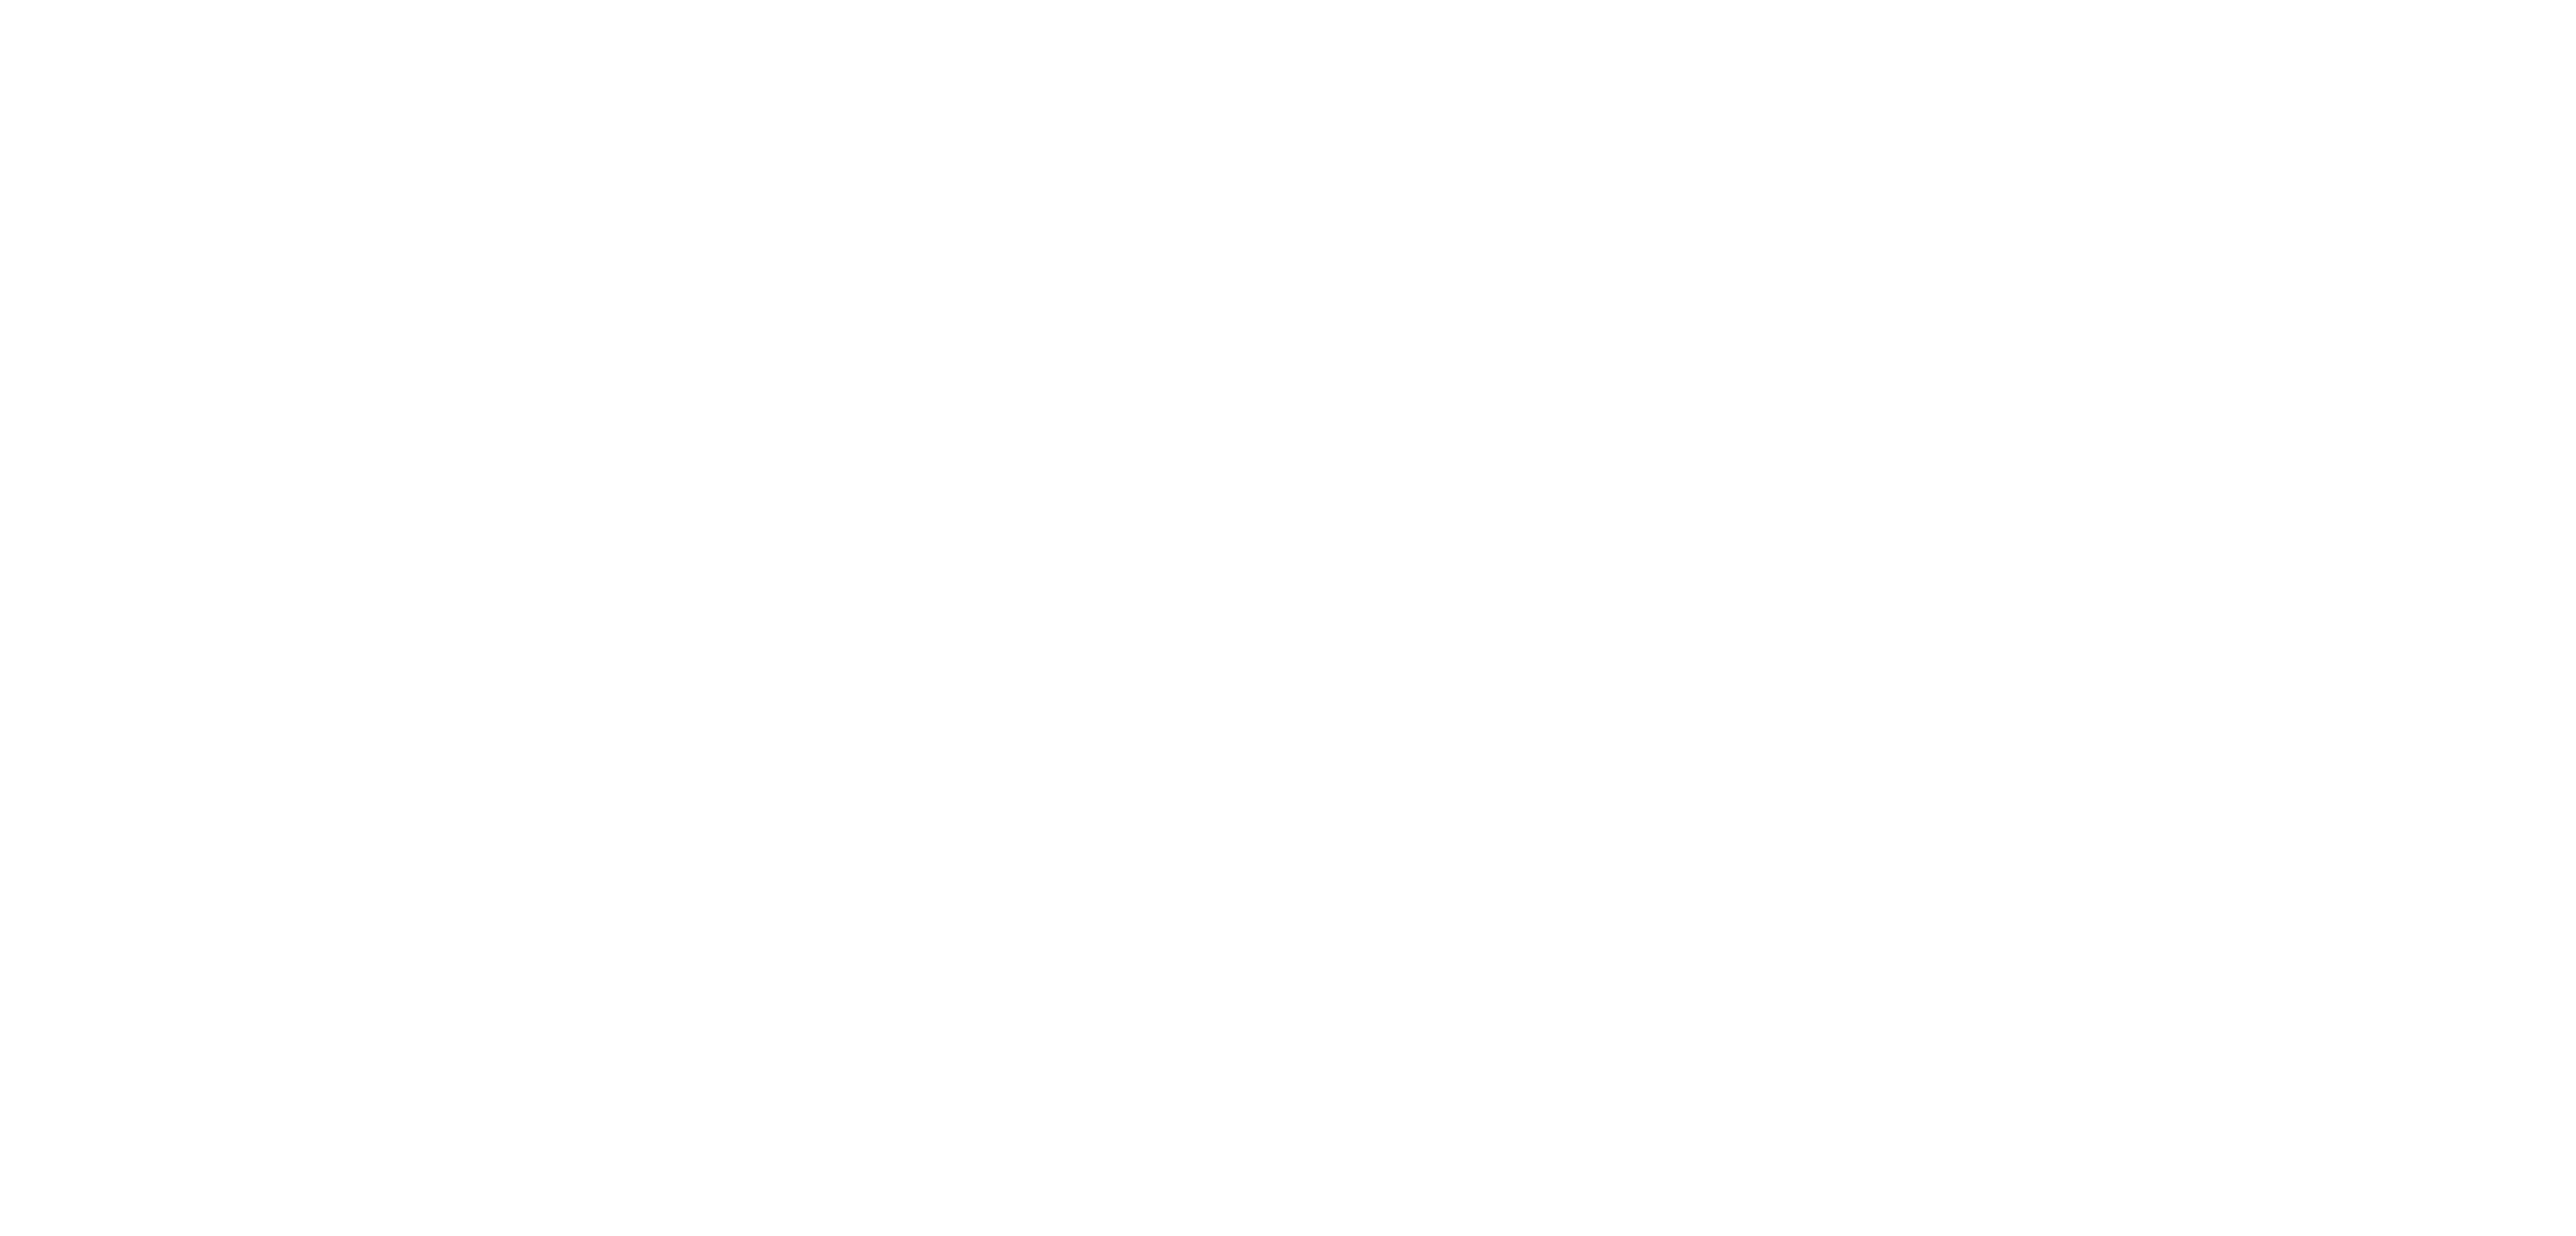

<IPython.core.display.Javascript object>


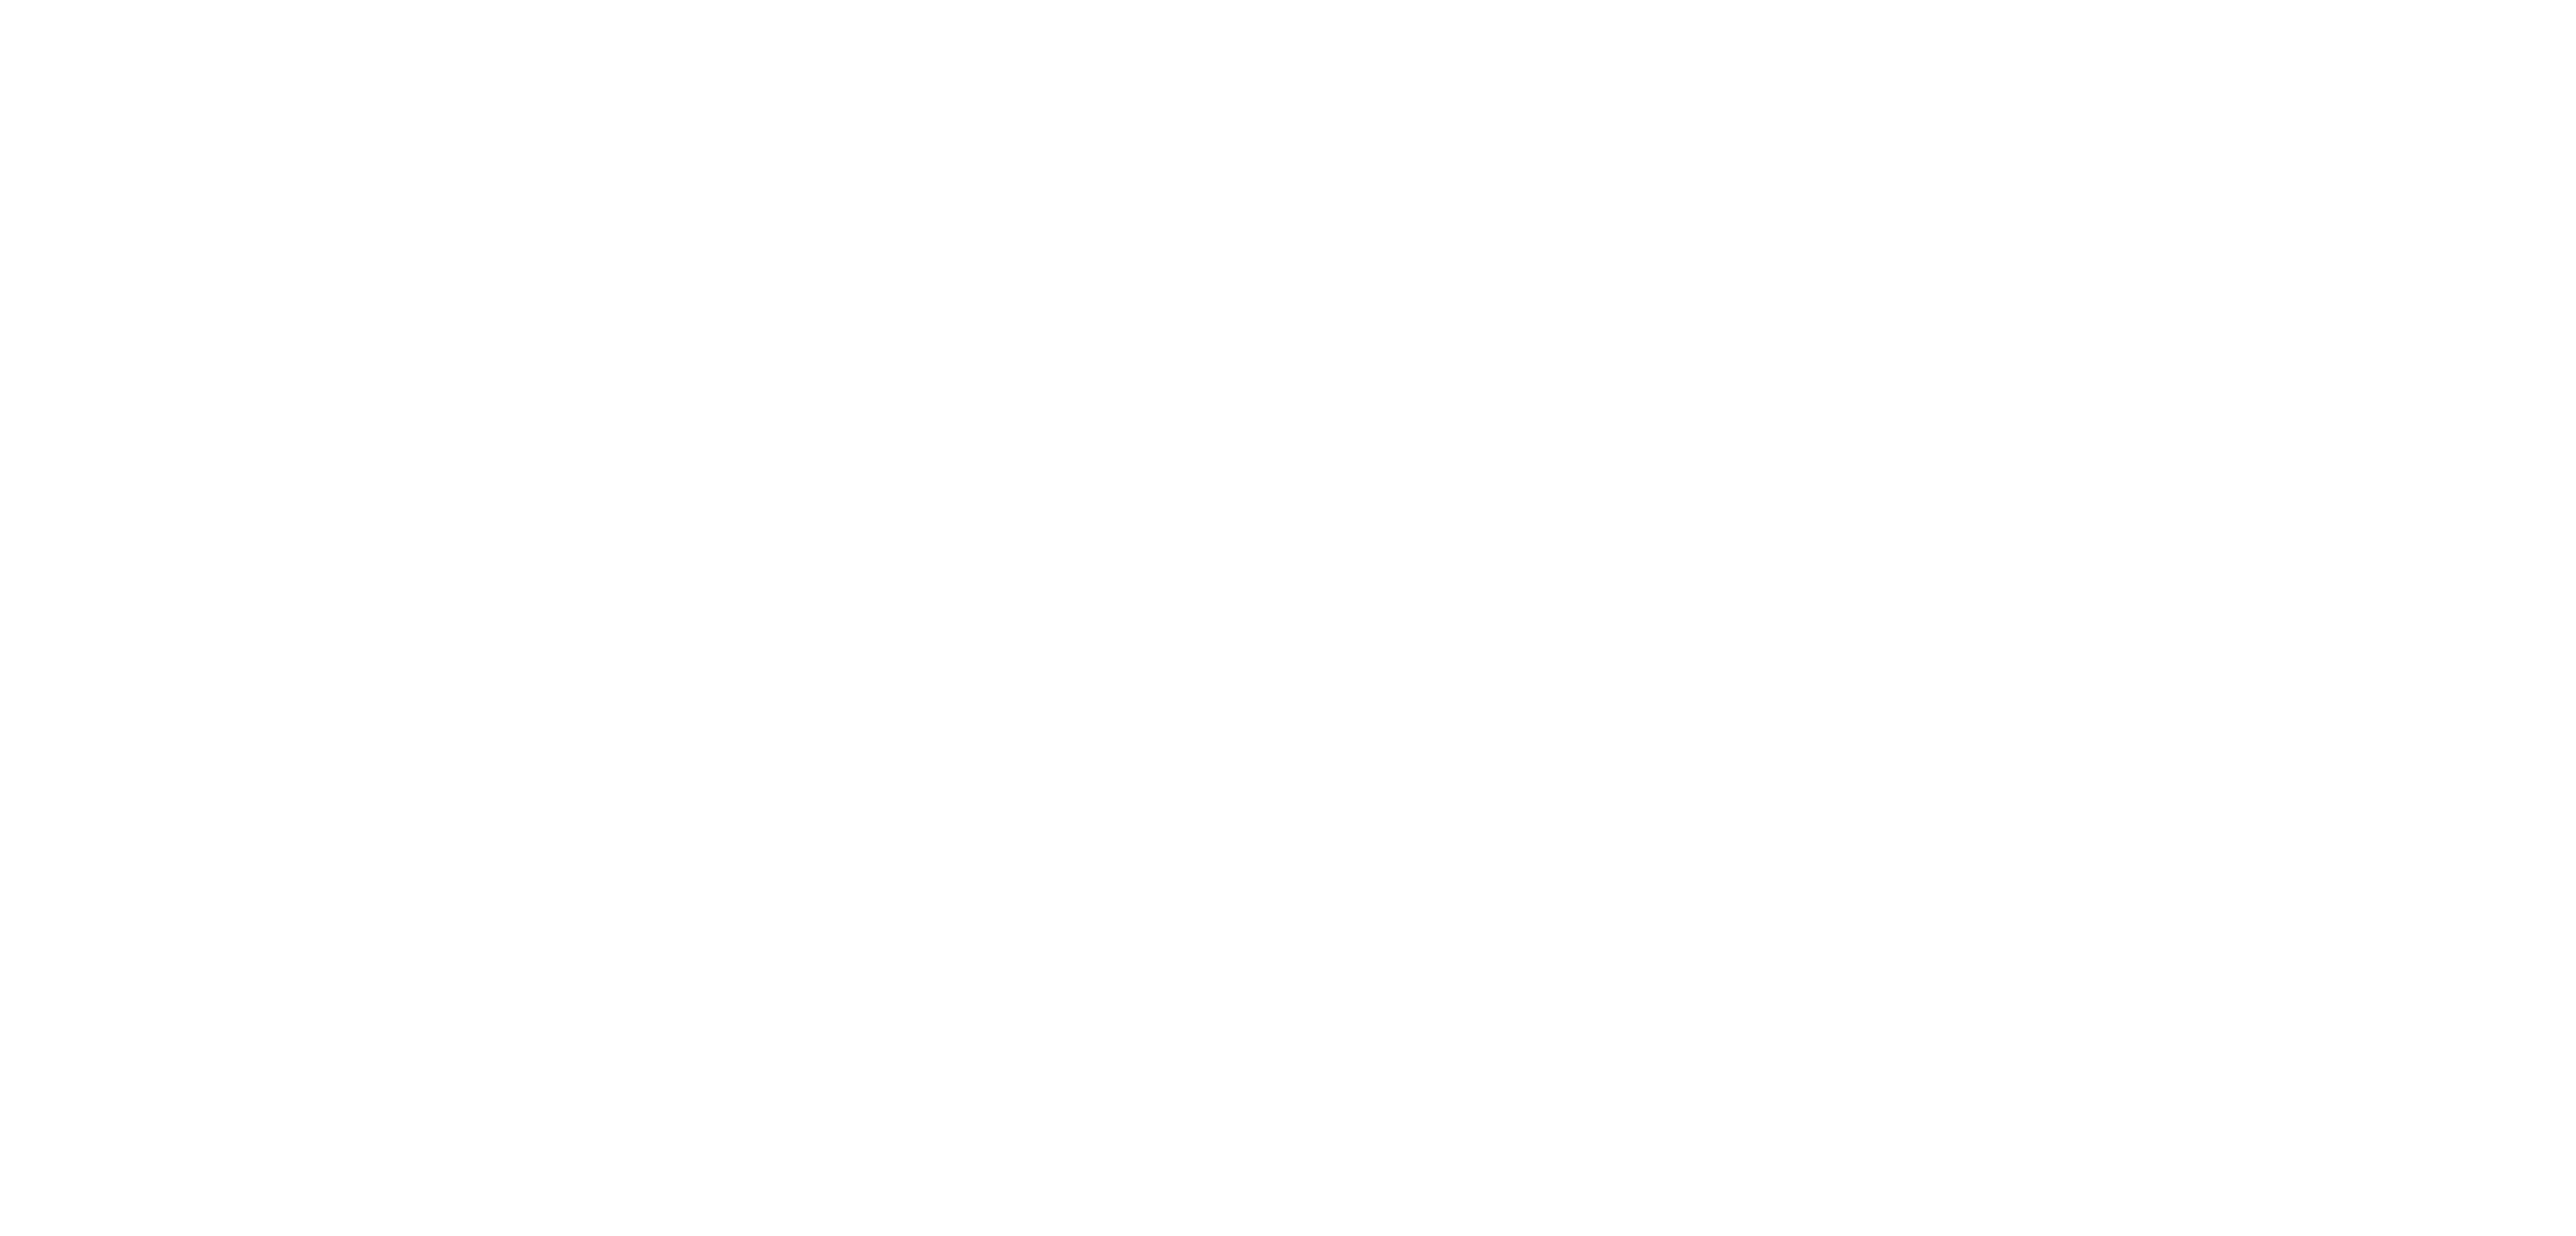

<IPython.core.display.Javascript object>


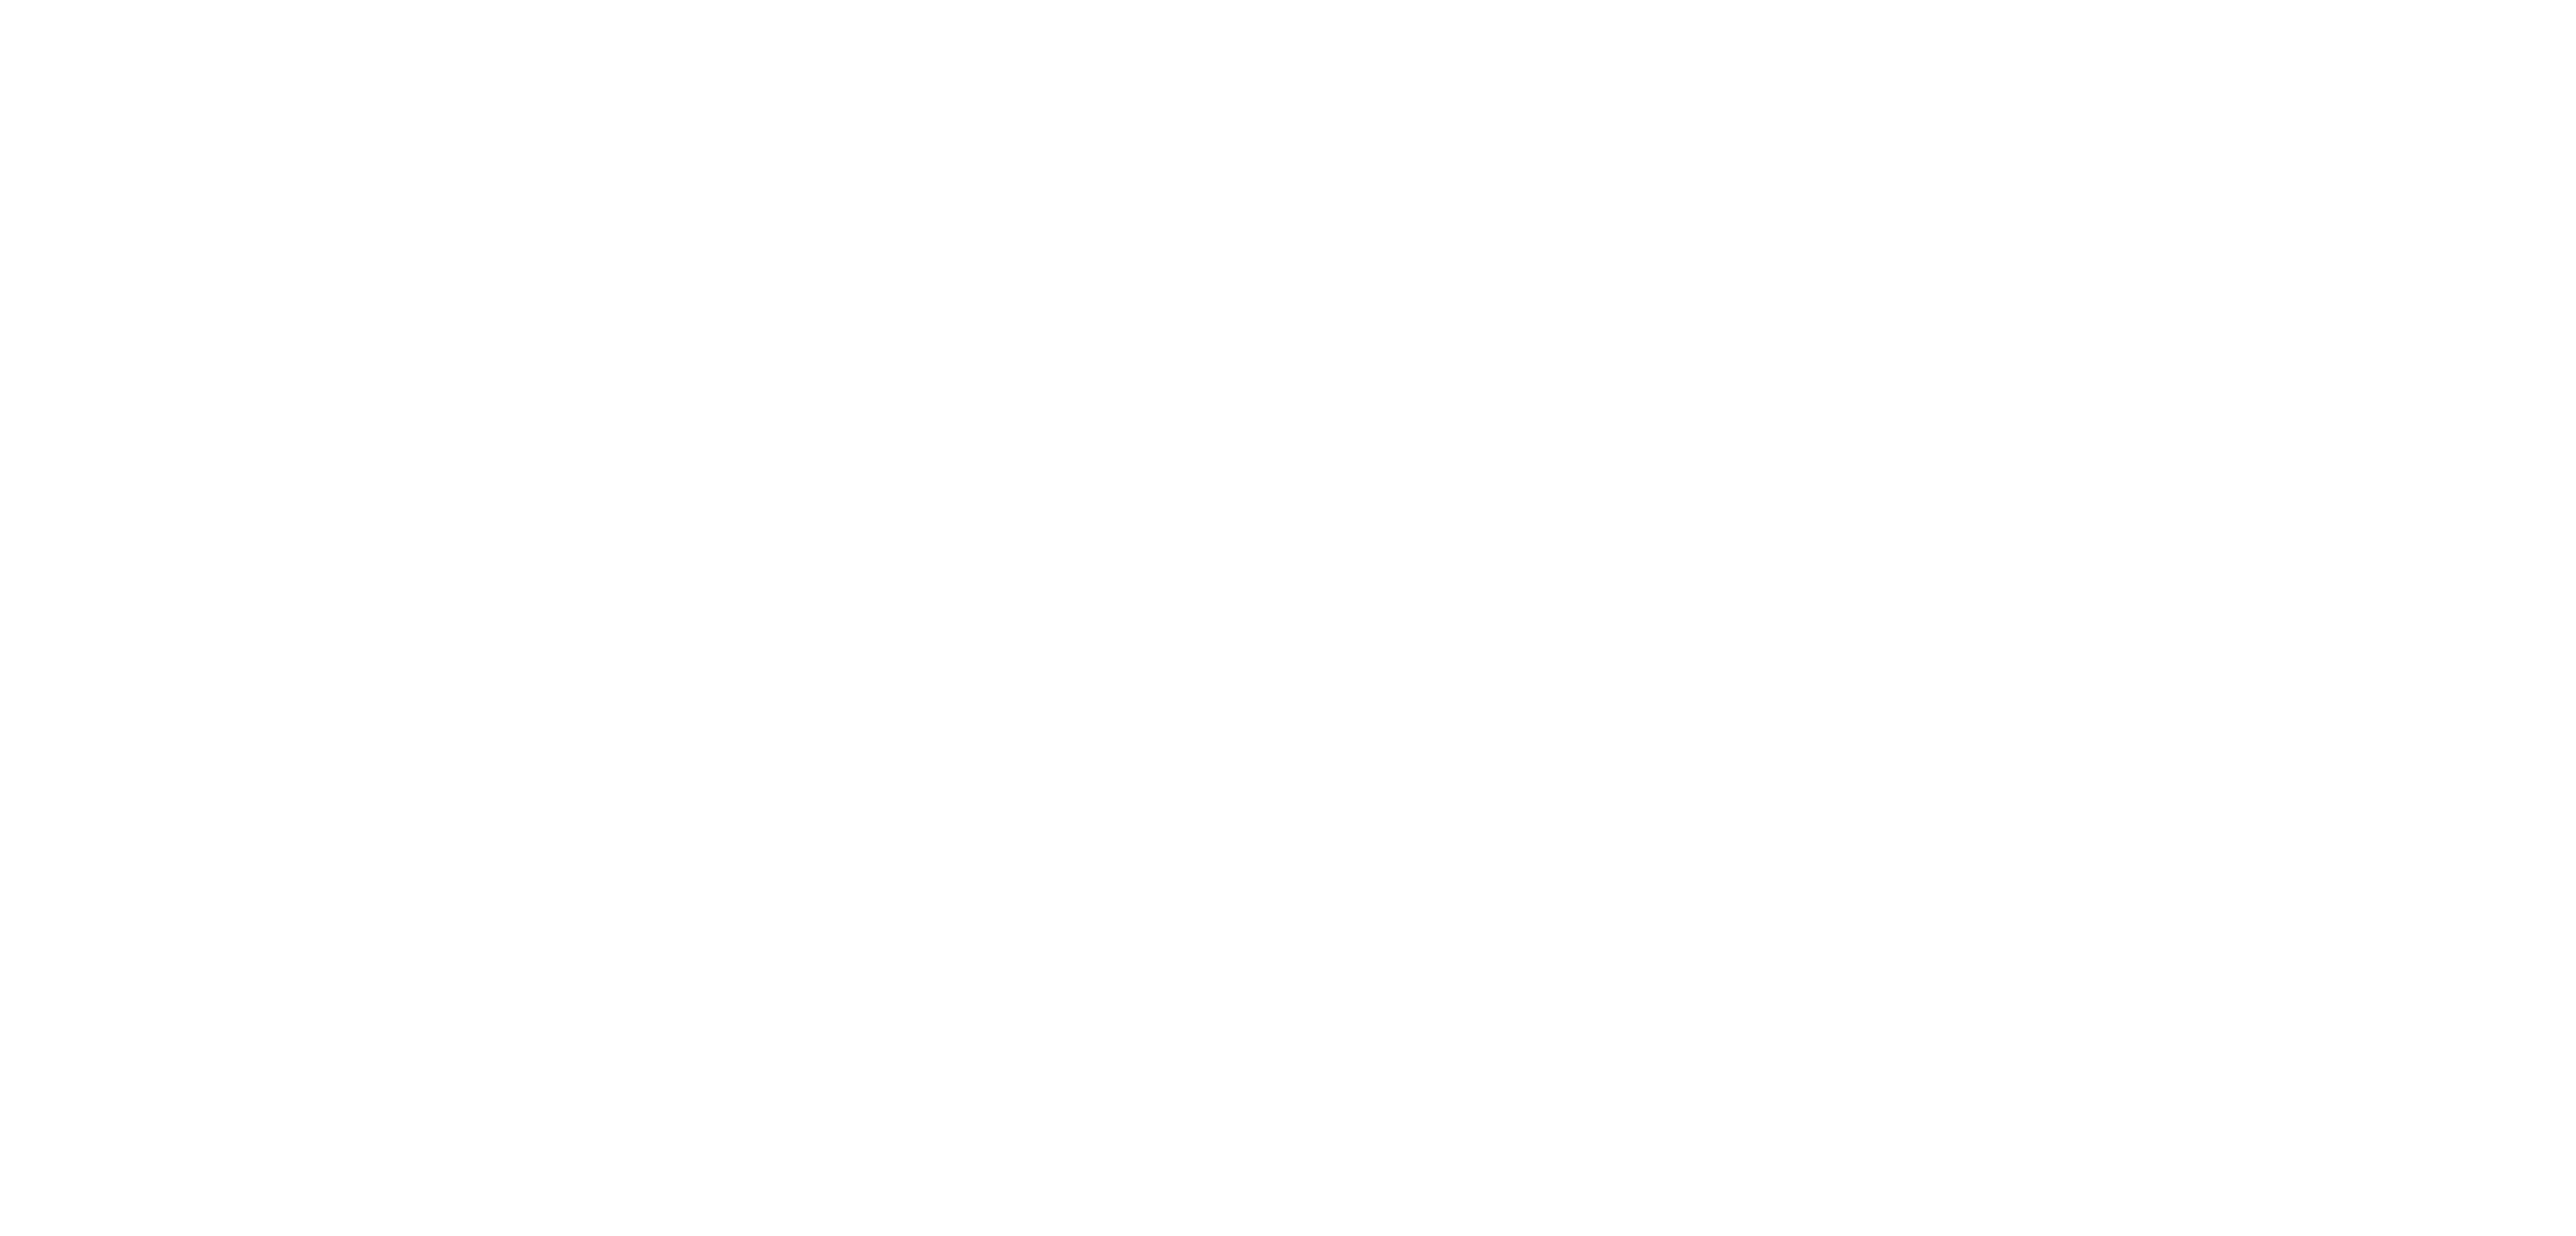

In [18]:
# Pedestal plots
dat = dp; mylim = (-20,20)
param = 'ValueA'; title2 = "Pedestal_Mean_PMT0"; doplots(dat,param,title2,mylim)
param = 'ValueB'; title2 = "Pedestal_Mean_PMT1"; doplots(dat,param,title2,mylim)
param = 'WidthA'; title2 = "Pedestal_Width_PMT0"; doplots(dat,param,title2,mylim)
param = 'WidthB'; title2 = "Pedestal_Width_PMT1"; doplots(dat,param,title2,mylim)
# Gain plots
dat = dg; mylim = (-250,250)
param = 'ValueA'; title2 = "MIP_Peak_PMT0"; doplots(dat,param,title2,mylim)
param = 'ValueB'; title2 = "MIP_Peak_PMT1"; doplots(dat,param,title2,mylim)
param = 'WidthA'; title2 = "MIP_Width_PMT0"; doplots(dat,param,title2,mylim)
param = 'WidthB'; title2 = "MIP_Width_PMT1"; doplots(dat,param,title2,mylim)

# Obsolete code below

In [9]:
%%script false

dgt = dg.index.get_level_values('Time')
dgwa = dg['WidthA']
dgwb = dg['WidthB']
title = 'Trend_of_ACD_MIP_Width'
fig, ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(dgt,dgwa,'.',color='b')
plt.plot(dgt,dgwb,'.',color='b')
plt.title(title)
plt.ylabel('Change in PHA MIP Fit Width (ADU)')
plt.ylim(-250,250)
plt.savefig(dir+title+".png")
time.sleep(1)
plt.close()

In [10]:
%%script false

pt = p.index.get_level_values('Time')
pva = p['ValueA']
pvb = p['ValueB']
fig, ax = plt.subplots(1,1,figsize=(20,6))
plt.plot(pt,pva,'.',color='b')
plt.plot(pt,pvb,'.',color='b')

In [11]:
%%script false

pedfile = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/ACD/calibs-manylines-ped.dat"
gainfile = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/ACD/calibs-manylines-gain.dat"

pi = pd.read_table(pedfile, parse_dates=[0], delimiter=" ", index_col=[0,3])
ptimes = pi.index.get_level_values('Time').unique()
ptiles = pi.index.get_level_values('Tile').unique()
refdate = ptimes[16]
print("Ped Reference date: ",refdate)
prefVA = pi.loc[refdate,'ValueA']
prefWA = pi.loc[refdate,'WidthA']
prefVB = pi.loc[refdate,'ValueB']
prefWB = pi.loc[refdate,'WidthB']
dp = pi.copy()
gi = pd.read_table(gainfile, parse_dates=[0], delimiter=" ", index_col=[0,3])
gtimes = gi.index.get_level_values('Time').unique()
gtiles = gi.index.get_level_values('Tile').unique()
refdate = gtimes[16]
print("Gain Reference date: ",refdate)
grefVA = gi.loc[refdate,'ValueA']
grefWA = gi.loc[refdate,'WidthA']
grefVB = gi.loc[refdate,'ValueB']
grefWB = gi.loc[refdate,'WidthB']
dg = gi.copy()

In [12]:
%%script false

gtiles[13],grefVA[gtiles[13]],gi.loc[refdate,'ValueA'],grefVA

#### %%script false

refdate = gtimes[16]
print("Reference date: ",refdate)
for tileid in gtiles:
    print("Outer TILE loop now on Tile ID: ",tileid)
    gva = grefVA[tileid]
    gwa = grefVA[tileid]
    gvb = grefVA[tileid]
    gwb = grefVA[tileid]
    for caldate in gtimes:
#        print ("Inner DATE loop now on date: ",caldate)
        dg.loc[caldate,tileid]['ValueA'] -= gva
        dg.loc[caldate,tileid]['WidthA'] -= gwa
        dg.loc[caldate,tileid]['ValueB'] -= gvb
        dg.loc[caldate,tileid]['WidthB'] -= gwb